# Sentiment Analysis of Twitter Data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter


In [4]:
df = pd.read_csv("tweet.csv")
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635   

In [6]:
print(df.dtypes)

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object


In [102]:
# Print the column names
print(df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'text_length', 'emojis',
       'text_language', 'clean_text', 'tokens', 'Subjectivity', 'Polarity',
       'Analysis', 'pos_tags'],
      dtype='object')


### 1. Exploratory Data Analysis -

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
df.duplicated().sum()

36

In [9]:
df[df.duplicated()]

tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   
12069  570300915418320897          negative                           1.0   
12074  570299252141903873          positive                           1.0   
12075  570298770136674304          negative                           1.0   
12078  570298644475346945          negative                           1.0   
12079  570298371140939776          negative                           1.0   
12086  570296996445204480          negative                           1.0   
12093  570295576446808065          negative                           1.0   
12097  570292403309035520           neutral                           1.0   
12099  570291157340704769          positive                           1.0   
12102  570290334158225408          positive                           1.0   
12105  570289085354541058          negative                           1.0   
12106  570288809532891137          negative                           1.0   
12108  570288167242375168          negative                           1.0   
12109  570287747643998208          negative                           1.0   
12111  570287271234174976           neutral                           1.0   
12118  570283851018317824          negative                           1.0   
12120  570283309093113856           neutral                           1.0   
12126  570281731510571009          negative                           1.0   
12134  570279653337927680          positive                           1.0   
12136  570279220502511617          negative                           1.0   
12137  570279118438182913          positive                           1.0   
12138  570279036582109184          positive                           1.0   
12139  570278869133107201          negative                           1.0   
12142  570276434763128833          negative                           1.0   
12145  570276196405125120          negative                           1.0   
12152  570275384714862592           neutral                           1.0   
12155  570275010759102466          negative                           1.0   
12157  570273819287531520          positive                           1.0   
12158  570273710210469888          positive                           1.0   
12159  570272880556011520          positive                           1.0   
12162  570272018840428544           neutral                           1.0   

                    negativereason  negativereason_confidence   airline  \
12040       Customer Service Issue                        1.0  American   
12059                          NaN                        NaN  American   
12063                          NaN                        NaN  American   
12066                          NaN                        NaN  American   
12068                  Late Flight                        1.0  American   
12069             Cancelled Flight                        1.0  American   
12074                          NaN                        NaN  American   
12075       Customer Service Issue                        1.0  American   
12078       Customer Service Issue                        1.0  American   
12079                  Late Flight                        1.0  American   
12086                  Late Flight                        1.0  American   
12093       Customer Service Issue                        1.0  American   
12097                          NaN                        NaN  American   
12099                          NaN                        NaN  American   
12102                          NaN        

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

#### 1. Basic Statistics :
- Calculate basic statistics like the number of tweets & average tweet length.

In [104]:
# Basic statistics
print(df.describe())

           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.460400e+04                  14604.000000               10503.000000   
mean   5.692157e+17                      0.899923                   0.637644   
std    7.782567e+14                      0.162955                   0.330380   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685581e+17                      0.692300                   0.360500   
50%    5.694728e+17                      1.000000                   0.670500   
75%    5.698885e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count   text_length  Subjectivity      Polarity  
count   14604.000000  14604.000000  14604.000000  14604.000000  
mean        0.082786    103.828335      0.355883      0.042121  
std         0.746647     36.258528      0.325428      0.308549  
min         0.00000

In [16]:
# i) Length of tweets -

df['text_length'] = df['text'].apply(len)
df


tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635   

In [17]:
# ii) Average length of tweets
df['text'].mean()

TypeError: Could not convert @VirginAmerica What @dhepburn said.@VirginAmerica plus you've added commercials to the experience... tacky.@VirginAmerica I didn't today... Must mean I need to take another trip!@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse@VirginAmerica and it's a really big bad thing about it@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP@virginamerica Well, I didn't…but NOW I DO! :-D@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn@VirginAmerica Thanks!@VirginAmerica SFO-PDX schedule is still MIA.@VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo@VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!I ❤️ flying @VirginAmerica. ☺️👍@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA@VirginAmerica I love the hipster innovation. You are a feel good brand.@VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon?@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response.@VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail@VirginAmerica do you miss me? Don't worry we'll be together very soon.@VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS@VirginAmerica LAX to EWR - Middle seat on a red eye. Such a noob maneuver. #sendambien #andchexmix@VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems 😢@VirginAmerica Are the hours of operation for the Club at SFO that are posted online current?@VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one answering L&amp;F number at LAX!@VirginAmerica awaiting my return phone call, just would prefer to use your online self-service option :(@VirginAmerica this is great news!  America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @PacificbiznewsNice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP@VirginAmerica Moodlighting is the only way to fly! Best experience EVER! Cool and calming. 💜✈ #MoodlitMonday@VirginAmerica @freddieawards Done and done! Best airline around, hands down!@VirginAmerica when can I book my flight to Hawaii??@VirginAmerica Your chat support is not working on your site: http://t.co/vhp2GtDWPk@VirginAmerica View of downtown Los Angeles, the Hollywood Sign, and beyond that rain in the mountains! http://t.co/Dw5nf0ibtr@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?@VirginAmerica plz help me win my bid upgrade for my flight 2/27 LAX---&gt;SEA!!!  🍷👍💺✈️@VirginAmerica I have an unused ticket but moved to a new city where you don't fly. How can I fly with you before it expires? #travelhelp@VirginAmerica are flights leaving Dallas for Seattle on time Feb 24?@VirginAmerica I'm #elevategold for a good reason: you rock!!@VirginAmerica  DREAM http://t.co/oA2dRfAoQ2 http://t.co/lWWdAc2kHx@VirginAmerica wow this just blew my mind@VirginAmerica @ladygaga @carrieunderwood After last night #tribute #SoundOfMusic #Oscars2015 @ladygaga! I think @carrieunderwood agree@VirginAmerica @ladygaga @carrieunderwood All were entertaining@VirginAmerica Is flight 769 on it's way? Was supposed to take off 30 minutes ago. Website still shows "On Time" not "In Flight". Thanks.@VirginAmerica @ladygaga @carrieunderwood Julie Andrews all the way though @ladygaga was very impressive! NO to @Carrieunderwood@VirginAmerica wish you flew out of Atlanta... Soon?@VirginAmerica @ladygaga @carrieunderwood Julie Andrews. Hands down.@VirginAmerica Will flights be leaving Dallas for LA on February 24th?@VirginAmerica hi! i'm so excited about your $99 LGA-&gt;DAL deal- but i've been trying 2 book since last week &amp; the page never loads. thx!@VirginAmerica you know it. Need it on my spotify stat #guiltypleasures@VirginAmerica @ladygaga @carrieunderwood  I'm Lady Gaga!!! She is amazing! 😊@VirginAmerica @ladygaga @carrieunderwood - Carrie!@VirginAmerica New marketing song? https://t.co/F2LFULCbQ7 let us know what you think?@VirginAmerica @ladygaga @carrieunderwood Julie Andrews first but Lady Gaga wow'd me last night. Carrie? Meh.@VirginAmerica I called a 3-4 weeks ago about adding 3 flights from 2014 to my Elevate...they still haven't shown up...help!@VirginAmerica @ladygaga @carrieunderwood all are great , but I have to go with #CarrieUnderwood 😍👌@VirginAmerica @LadyGaga @CarrieUnderwood Sorry, Mary Martin had it first!@VirginAmerica @ladygaga @carrieunderwood  love all three but you really can't beat the classics!@VirginAmerica Flight 0736 DAL to DCA 2/24 2:10pm. Tried to check in could not. Status please.@VirginAmerica heyyyy guyyyys.. been trying to get through for an hour. can someone call me please? :/@VirginAmerica Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?@VirginAmerica Congrats on winning the @Travelzoo award for Best Deals from an Airline (US) http://t.co/kj1iljaebV@VirginAmerica everything was fine until you lost my bag@virginamerica Need to change reservation. Have Virgin credit card. Do I need to modify on phone to waive change fee? Or can I do online?@VirginAmerica I emailed your customer service team. Let me know if you need the tracking number.@VirginAmerica hi I just booked a flight but need to add baggage, how can I do this?@VirginAmerica your airline is awesome but your lax loft needs to step up its game. $40 for dirty tables and floors? http://t.co/hy0VrfhjHt@VirginAmerica not worried, it's been a great ride in a new plane with great crew. All airlines should be like this.@VirginAmerica awesome. I flew yall Sat morning. Any way we can correct my bill ?@VirginAmerica Or watch some of the best student films in the country at 35,000 feet! #CMFat35000feet http://t.co/KEK5pDMGiF@VirginAmerica first time flying you all. do you have a different rate/policy for media Bags? Thanks@VirginAmerica what is going on with customer service? Is there anyway to speak to a human asap? Thank you.@VirginAmerica what happened to Doom?!@VirginAmerica why can't you supp the biz traveler like @SouthwestAir  and have customer service like @JetBlue #neverflyvirginforbusiness@VirginAmerica I've applied more then once to be a member of the #inflight crew team...Im 100% interested. #flightattendant #dreampath -G@VirginAmerica you're the best!! Whenever I (begrudgingly) use any other airline I'm delayed and Late Flight :(@VirginAmerica I have no interesting flying with you after this. I will Cancelled Flight my next four flights I planned.#neverflyvirginforbusiness@VirginAmerica it was a disappointing experience which will be shared with every business traveler I meet. #neverflyvirgin@VirginAmerica I’m having trouble adding this flight my wife booked to my Elevate account. Help? http://t.co/pX8hQOKS3R@VirginAmerica Can't bring up my reservation online using Flight Booking Problems code@VirginAmerica Random Q: what's the distribution of elevate avatars? I bet that kitty has a disproportionate share http://t.co/APtZpuROp4@VirginAmerica I &lt;3 Flying VA But Life happens and I am trying to #change my trip JPERHI  Can you help.VA home page will not let me ?@VirginAmerica Why is the site down?  When will it be back up?@VirginAmerica "You down with RNP?" "Yeah you know me!"@VirginAmerica hi, i did not get points on my elevate account for my most recent flight, how do i add the flight and points to my account?@VirginAmerica I like the TV and interesting video . Just disappointed in Cancelled Flightled flight when other flights went out to jfk on Saturday .@VirginAmerica just landed in LAX, an hour after I should of been here. Your no Late Flight bag check is not business travel friendly #nomorevirgin@VirginAmerica why is flight 345 redirected?@VirginAmerica Is it me, or is your website down?  BTW, your new website isn't a great user experience.  Time for another redesign.@VirginAmerica I can't check in or add a bag. Your website isn't working. I've tried both desktop and mobile http://t.co/AvyqdMpi1Y@VirginAmerica - Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable@virginamerica What is your phone number. I can't find who to call about a flight reservation.@VirginAmerica is anyone doing anything there today?  Website is useless and no one is answering the phone.@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM@VirginAmerica why must a traveler miss a flight to Late Flight check a bag?  I missed my morning appointments and you lost my business. #sfo2lax@VirginAmerica check out new music http://t.co/maRcnOCWzn@virginamerica how's a direct flight FLL-&gt;SFO have unexpected layover in Vegas 4 fuel yet peeps next to me bought for Vegas flight. #sneaky@VirginAmerica your no Late Flight bag check just lost you my business. I missed flight and AM apt. Three other people on flight had same exp.@VirginAmerica - amazing customer  service, again! 💕💕 RaeAnn in SF - she's the best! #customerservice #virginamerica #flying@VirginAmerica called your service line and was hung up on. This is awesome. #sarcasm@VirginAmerica your site is tripping. I'm trying to check in and I'm getting the plain text version. I am reluctant to enter any card info.@VirginAmerica I was scheduled for SFO 2 DAL flight 714 today. Changed to 24th due weather. Looks like flight still on?@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/tZZJhuIbCH #CheapFlights #FareCompare@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/RPdBpX3wNd #CheapFlights #FareCompare@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/B2Xi4YG5T8 #CheapFlights #FareCompare@VirginAmerica has getaway deals through May, from $59 one-way. Lots of cool cities http://t.co/QDlJHslOI5 #CheapFlights #FareCompare@VirginAmerica Have a great week 🌞✈@VirginAmerica come back to #PHL already. We need you to take us out of this horrible cold. #pleasecomeback http://t.co/gLXFwP6nQH@VirginAmerica should I be concerned that I am about to fly on a plane that needs to be delayed due to a "tech stop"?@VirginAmerica is the best airline I have flown on.Easy to change your reservation,helpful representatives &amp; a comfortable flying experience@VirginAmerica and again! Another rep kicked butt! Naelah represents your team so beautifully!! Thank you!!!@VirginAmerica your beautiful front-end design is down right now; but it was cool to still book my ticket b/c all your back-end was secure.@VirginAmerica Love the team running Gate E9 at LAS tonight. Waited for a delayed flight, and they kept things entertaining@VirginAmerica Use another browser! 2015 &amp; a brand with a reputation built on tech response doesn't have a cross-browser compatible website?@VirginAmerica And now the flight Flight Booking Problems site is totally down. Folks, what is the problem?@VirginAmerica I like the customer service but a 40 min delay just for connecting passengers seems too long. VA370@VirginAmerica thanks to your outstanding NYC-JFK crew who moved mountains to get me home to San Francisco tonight!@VirginAmerica you have the absolute best team and customer service ever.  Every time I fly with you I'm delighted.  Thank you!@VirginAmerica Do you provide complimentary upgrades to first class, if there are available seats?@VirginAmerica i need to change my flight thats scheduled in 9 hours and 120 min wait time on phone. Im calling intern. Help!!@VirginAmerica completely awesome experience last month BOS-LAS nonstop. Thanks for such an awesome flight and depart time. #VAbeatsJblue@VirginAmerica How can I watch the #Oscars2015 on my JFK-&gt;SFO flight?@VirginAmerica is flight 882 Cancelled Flightled and what do I do if it is?@VirginAmerica you are failing your customers because your check in process does not link to TSA pre-check.@VirginAmerica @FiDiFamilies us too! Terrible airline! Just gave us a hotel hotline number and said sorry@VirginAmerica has flight number 276 from SFO to Cabo San Lucas arrived yet?@VirginAmerica @ChrysiChrysic your assistance yesterday when u Cancelled Flightled our flight was to give us a hotel hotline  Shame on you!@VirginAmerica Another delayed flight? #likingyoulessandless@VirginAmerica I need to register a service dog for a first class ticket from SFO &gt; Dulles. The phone queue is an hour or longer. Pls advise@virginamerica you ROCK for making it so I can watch #Oscars on my flight!! #redcarpet #oscars #oscars2015@VirginAmerica, @reallytallchris dropped a track on you... https://t.co/zv2pt6TRK9@VirginAmerica always!!! Xoxo@VirginAmerica why can't we book seats on your flights when we buy them or even during check in? Creates so much anxiety! #frustrated@VirginAmerica You'd think paying an extra $100 bucks RT for luggage might afford you hiring an extra hand at @sfo #lame@VirginAmerica best customer service rep in the world! #irmafromDallas takes the cake!!!@VirginAmerica Can you find us a flt out of LAX that is sooner than midnight on Monday? That would be great customer service 😃@VirginAmerica please provide status for flight 769.  I cant imagine it's on time as the Web indicates  dude to weather here and/or Dallas@VirginAmerica you have amazing staff &amp; super helpful as I just ran the @WaltDisneyWorld #PrincessHalf they have spoiled me with comfort!!!@VirginAmerica I paid the premium to fly you across the country, you Cancelled Flight my flight and offer no check fee or upgrade love? Sad face :(@VirginAmerica question: is it not possible to book a seat for an infant under 2? It's not giving me the option but we want a seat for him.Always have it together!!! You're welcome! RT @VirginAmerica: @jessicajaymes You're so welcome.@virginamerica #flight home to #dc #sunset #globe in' #backtowinter back to #work! #refreshed http://t.co/VX9vBCTdLf.@VirginAmerica I don't understand why you need a DM to give me an answer on if you have a damaged luggage policy..@VirginAmerica does that mean you don't have a policy for destroyed luggage?@VirginAmerica is there special assistance if I travel alone w/2 kids and 1 infant? Priority boarding?@VirginAmerica thank you for checking in. tickets are purchased and customer is happy ;-)@VirginAmerica is your website ever coming back online?@VirginAmerica  - Is Flight 713 from Love Field to SFO definitely Cancelled Flightled for Monday, February 23?@VirginAmerica Is flight 0769 out of LGA to DFW on time?@VirginAmerica my drivers license is expired by a little over a month. Can I fly Friday morning using my expired license?@VirginAmerica having problems Flight Booking Problems on the web site. keeps giving me an error and to contact by phone.  phone is 30 minute wait.@VirginAmerica How do I reschedule my Cancelled Flightled flights online? The change button is greyed out!@VirginAmerica I rang, but there is a wait for 35 minutes!! I can book the same ticket through a vendor, fix your site@VirginAmerica got a flight (we were told) for 4:50 today..,checked my email and its for 4;50 TOMORROW. This is unacceptable.@VirginAmerica our flight into lga was Cancelled Flighted. We're stuck in Dallas. I called to reschedule, told I could get a flight for today...(1/2)@virginamerica why don't any of the pairings include red wine?! Only white is offered :( #redwineisbetter@VirginAmerica is the website down?@VirginAmerica - Your site seems a little wonked right now. May want to have a look. Tried on two browsers. No CSS? http://t.co/8qsQMM7KF2@VirginAmerica I'm disappointed that the agent at the designated silver status check in line @Dulles_Airport closed to assist all pasengers@VirginAmerica Plans to Include Austin to its Dallas Route - TopNews Arab #Emirates http://t.co/aqZWecOkk2@VirginAmerica Is it normal to receive no reply from Central Baggage #baggageissues #smh@VirginAmerica at Logan airport and waiting to checkin for my 9am flight. Checkin desk not open !!!!! Why?!@VirginAmerica to jump into the Dallas-Austin market - @Dallas_News http://t.co/EwwGi97gdx@VirginAmerica Beats EPS Views, Takes On #SouthwestAir VA LUV - Investor's Business Daily http://t.co/FLwmGDAHxu@VirginAmerica Lister to my show my on Monday 1230 130@VirginAmerica to begin Dallas-Austin #flights in April - 88.9 KETR http://t.co/SSUVWwkyHH@VirginAmerica congrats, you just got all my business from EWR to SFO/LAX. Fuck you @united fl1289 SFO/EWR was the clincher...@VirginAmerica  I applied over 2 weeks ago. Haven't heard back and I'm flying this week #disappointed@VirginAmerica I'd love to know what your policy is for damaged luggage.@VirginAmerica Thank you for the follow@VirginAmerica - too many apologies! You r the worse airlines! Don't even respond to your cudtomers@VirginAmerica shame on VA for making people spend money in stranded cities when other airlines are landing at JFK! Who will reimburse me?@VirginAmerica @TTINAC11 I DM you@VirginAmerica can you please have flights in  SJC ? I have no choice but to fly Southwest to Vegas 😩😭@VirginAmerica too bad you say it takes 10 to 14 days via YOUR confirmation email. When I inquired after 3 weeks you claim 6 to 8 weeks!@VirginAmerica Flight from BOS &gt; LAS tomorrow was Cancelled Flightled. No notification; wait times are 1+ hour. Will you rebook on another airline?😎 RT @VirginAmerica: You’ve met your match. Got status on another airline? Upgrade (+restr): http://t.co/RHKaMx9VF5. http://t.co/PYalebgkJt@VirginAmerica Only way to fly! #Elevate #Gold@VirginAmerica If only you guys had flights from CMH.@VirginAmerica a lot of "apologies" being thrown out to customers from what I can see.Very sad. Thanks for nothing. Worst airline ever.@VirginAmerica  for all my flight stuff wrong and did nothing about it. Had #worst #flight ever@VirginAmerica Having an issue finding a missing item on a plane. Can you help me find which airport my plane headed to next?@VirginAmerica you will match my #AmericanAirlines status? Cool!“@VirginAmerica:You've met your match.Got status on another airline? Upgrade : http://t.co/H952rDKTqy” @asarco_ES_ar ? 🙉@VirginAmerica trying to book a flight with you guys and your website won't let me... about to lose my business@VirginAmerica you suck!@VirginAmerica thanks!@VirginAmerica Just DM'd. Same issue persisting.@VirginAmerica Because we never rec'd Cancelled Flightlation notice we were left w no options to fly out of PS. Driving to LA for a red eye Mon w kids@VirginAmerica trying to book a flight &amp; your site is down 😁@VirginAmerica You have any flights flying into Boston tomorrow? I need to be home and you Cancelled Flightled my flight and didn't do anything@VirginAmerica you stink. Flight Cancelled Flighted from PSP to JFK and no notification or ability to rebook #disappointed.  #expected better@VirginAmerica I love your guy's song! We're dancing to it for our high school dance revue@VirginAmerica Your website is down and I'm trying to check in!@VirginAmerica done! Thank you for the quick response, apparently faster than sitting on hold ;)@VirginAmerica nervous about my flight from DC to LAX getting Cancelled Flightled tomorrow! Just sent you a DM to help me!@VirginAmerica cool picture of another VirginAmerica plane off our wing. What a site! http://t.co/5B2agFd8c4@VirginAmerica Keep up the great work :)@VirginAmerica my goodness your people @love field are amazing under pressure ❤️from Texas #beatstheothers in crisis Please fly me to NY@VirginAmerica Thanks for a great flight from LA to Boston! Pilots did a great job landing in the snow. Can we go back to LA now? #seriously@VirginAmerica can you please get me to the new york area before monday afternoon@VirginAmerica Thanks so much for the awesome support, you guys rock!@VirginAmerica seats in Row 8 don't recline should mention that on your website #soreback@VirginAmerica flight 404 delayed 2 hours in LA due to mechanical problems. Handle like pros but you could have tossed us a free drink.@VirginAmerica why Cancelled Flight flights today? No precipitation to be scared of!  ❄️❄️❄️@VirginAmerica twitter team. you guys killed it for rescheduling me asap. thank you!@VirginAmerica You guys charged me $100 to reschedule a flight that was then Cancelled Flighted and are now refusing to refund it. What's the deal?@VirginAmerica can’t access your website from Safari on iPhone 6. Seems to work on Mac and iPad. Need iPhone to add Passbook.@VirginAmerica on iPad and iPhone, clicking the CHECKIN link in the email I received at 24hrs before flight@VirginAmerica your mobile site is broken, shows 
"{{header.elevateUser.numOfPointsAvailable || '0' | number}} Points", won't let me checkin@VirginAmerica I was really looking forward to my flight. can you let me know when it will be rescheduled? #diehardvirgin@VirginAmerica why Cancelled Flight flight VX413? One sec its delayed, on my to airport, the next its Cancelled Flightled?Gonna email or call me to reschedule?@VirginAmerica I did it but there was a problem in the link from the email for check-in. thanks@VirginAmerica had to change to another airline to get to DC today ... Why is @united able to land in DC but not you? Cost me $800 ...ugh@VirginAmerica I was so looking forward to my first flight with you today but it was Cancelled Flightled along with the subsequent one ...@VirginAmerica when are you putting some great deals from PDX to LAS or from LAS to PDX show me your love! http://t.co/enIQg0buzj@VirginAmerica wish I can afford to fly with you next Friday  going back home.. love everything  about your airline@VirginAmerica  how are you gonna have a deal from Dallas to DC but no deal from DC to Dallas? #sad@VirginAmerica it’s just a bug report, guys@VirginAmerica hold times at call center are a bit much@VirginAmerica Like http://t.co/VPqEm31XUQ@VirginAmerica Site down? #help@VirginAmerica You have the best flight attendant ever!!! http://t.co/PxdEL1nq3lAwesome! RT @VirginAmerica: Watch nominated films at 35,000 feet. #MeetTheFleet #Oscars http://t.co/DnStITRzWy@VirginAmerica thanks so much!@VirginAmerica Trying to reset my password, email never arrives. Help?@VirginAmerica, the only airline based in Silicon Valley! #disruption #FCmostinnovative #incubator  @FastCompany's http://t.co/wU3LbCNcr9@VirginAmerica Very nicely done. 👏@VirginAmerica I’m looking forward to watching the Oscars on my flight home tomorrow. I might even get something bubbly to drink! ;)@VirginAmerica What is the reason  for the delay of the departure of VX 413 from JFK this afternoon?@VirginAmerica is todays flight from Palm Springs, Ca to JFK in NY Cancelled Flightled?@VirginAmerica hahaha 😂@VirginAmerica YOU GUYS ARE AMAZING. I LOVE YOU GUYS!!!💗@VirginAmerica sounds like fun !@VirginAmerica any updates on flight 413 from Jfk &gt; Lax@virginamerica spruce moose!@VirginAmerica the CSS on your site is a 404 right now, please fix. Site unusable.@VirginAmerica We're on flight 910 Vegas to Boston today, checked in online but our bag count didn't register. Can I fix that somehow?@VirginAmerica classiq, luv Virgin America. Greetingz@VirginAmerica Hi, I'm trying to do check-in but the website is not working. I tried 3 different browsers and the problem continues@VirginAmerica Thanks for your great customer service today &amp; for helping me get all my travel sorted out!@VirginAmerica thanks guys! Sweet route over the Rockies #airplanemodewason@VirginAmerica love the 90s music blasting at gate in #Boston while waiting for flight to #SanFrancisco. Only if I could get an iced coffee!@VirginAmerica - the passenger in 7D, Flt 338 that assaulted me shouldn't have flown. I trust he's banned. Crew filed report to @FAANews@VirginAmerica current bug on website shows ‘select departure city’ when selecting destination city http://t.co/SLLYIBE2vQ@VirginAmerica luggage was severely dented/missing wheel coming off baggage claim in SAN. Luggage agent Miranda (I think) wasn't any help.@VirginAmerica thank you for the easy itinerary shift for impending weather. Quick, painless &amp; free.@VirginAmerica If you'd love to see more girls be inspired to become pilots, RT our free WOAW event March 2-8 at ABQ. http://t.co/rfXlV1kGDh@VirginAmerica Thanks! Good times there and back! #Vodkatonics the entire flight🍸#sfo@VirginAmerica beats expectations, shares take off - Santa Cruz Sentinel http://t.co/qm9dQbai6G@VirginAmerica any plans to start flying direct from DAL to LAS?@VirginAmerica BIG Love/gratitude.mpower w/ http://t.co/1AGR9knCpf weRin #OSCARS2105 VIPswagbags@ #AvalonHollywood http://t.co/ybMbGs0dHn@VirginAmerica, you're doing a great job adding little luxuries/aesthetics that improve the air travel experience. Thank you. Keep it up!@VirginAmerica requested window seat and confirmed window but got stuck in middle seat. Not a good way to treat silver member😒@VirginAmerica Grand Budapest Hotel #OscarsCountdown@VirginAmerica This is what you missed @NewsVP. Next trip to the 407.@VirginAmerica #wtf I paid for direct flight on purpose not to have to stop for fuel exhausted frequent flier and nothing for inconvenience!@VirginAmerica there is something wrong with you website in Safari iPhone@VirginAmerica thanks for gate checking my baggage on your full flight dfw-lax 883 and giving me early boarding too #sweet@VirginAmerica Already checked in so the page expired :X@VirginAmerica Boo for a not refunding a seat upgrade fee I did not want to buy in the first place!@VirginAmerica shares rise on Q4 financial results - USA TODAY http://t.co/lFS4PEFE6y@VirginAmerica Adds Pillows Instead of Lie-Flat Seats in First Class Arms Race http://t.co/rGYwJBbhm4@VirginAmerica I see what you did there ;)@VirginAmerica way to take advantage of #MayweatherPacquiao :)@VirginAmerica you know I'm flying virgin for the fight #MayweatherPacquiao@VirginAmerica your inflight team makes the experience #amazing!@VirginAmerica cutest salt and pepper shaker ever. Just when I think you guys can't get any better you just do! http://t.co/vC6Keulg2J@VirginAmerica moved my seat with no notice. "Better seat" is cabin select not behind the row I selected👎 #DISAPPOINTED@VirginAmerica shares up on 4Q results - @iol http://t.co/XZ6qeG3nef@VirginAmerica fav airline@VirginAmerica we have a hot female pilot! Sweet! DCA to SFO! :-)👍👍✈️✈️💗 When are you guys going to start flying to Paris? @VirginAmerica: @LizaUtter You're welcome.”@VirginAmerica what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.@VirginAmerica already contacted Central Baggage &amp; sent DM. @RenttheRunway is charging me for the dress that was in the lost suitcase #help@VirginAmerica Thank you!!@VirginAmerica Is there anything going on with the website? I've been getting a lot of errors past 30 minutes.@VirginAmerica I think i left something on the plane yesterday. who do i call...ah!@VirginAmerica I need you to follow back in order to DM.@VirginAmerica Need to start flying to @KCIAirport .  😊😀😃😄@VirginAmerica they told to check with the airline regulation first so that is why I contacted you.@VirginAmerica @VirginAtlantic I have just checked in flight to SFO from LAX &amp; been told as Atlantic Flying Club Gold I get no benefits?!@VirginAmerica husband and I ordered three drinks via my screen and they never came. Awesome!@VirginAmerica soooo are you guys going to leave the seatbelt light on all flight? You can barely call this turbulence :-)@VirginAmerica what is your policy on flying after surgery?@VirginAmerica posts second consecutive full-year net profit - @ATWOnline http://t.co/tvB5zbzVhg@VirginAmerica Funny story, your website is broken, you have missing javascript and stylesheets on the checkin process. I dislike this!@VirginAmerica would love to do more for virgin just like I do for @GoPro@VirginAmerica Results Handily Exceed Forecasts - @NYTimes http://t.co/gonmRwEM6I@VirginAmerica I applied for a position in @flyLAXairport ,and I was wondering if you guys received my application.@VirginAmerica achieves a second year of profitability despite revenue pressure ... - @CAPA_Aviation http://t.co/zSuZTNAIJq@VirginAmerica gives positive outlook, but sees increased competition - @Reuters http://t.co/jEu7Od3eYJ@VirginAmerica I'm trying to check into my 10:50AM CT flight tmm on the desktop website and it's not working (some sort of caching bug) SOS@VirginAmerica weather delays &gt; next few weeks ;) #JFK #BOS #DCA@VirginAmerica @madbee95 check the website before you go to the airport!@VirginAmerica Do you guys know your check-in links from emails are broken? http://t.co/2npXB6oBMr@VirginAmerica pilot says we expect a choppy landing in NYC due to some gusty winds w/a temperature of about 5 degrees &amp; w/the windchill -8@VirginAmerica loved it. Can't wait for Monday's return flight... Mostly just to watch the inflight safety video again. #sorrynotsorry@VirginAmerica lost my luggage 4 days ago on flight VX 112 from LAX to IAD &amp; I'm calling every day, no response.Please give me back my stuff@VirginAmerica The Flight Booking Problems section of your website seems to be broken on Chrome. Might wanna look into that.@VirginAmerica Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more!@VirginAmerica I mean. Probably inappropriate while on board.. But, it's on!@VirginAmerica happy to spend the day together. Let's do this!@VirginAmerica is saving my sanity right now: http://t.co/ELtBOLjUl9@VirginAmerica missed my flight. How does standby work?.@VirginAmerica They were very understanding and helped me out.  Thx! #Comps@VirginAmerica brought it all the way across the country today I see http://t.co/TKaUyGcPmS@VirginAmerica thank you! I absolutely will 😎@virginamerica Looks like a broken link for your assets https://t.co/OArDjjGrrD@VirginAmerica are you ready!? Let's say it together.. 'Noooo turbulence today!' 😘@virginamerica the manage itinerary section of your website seems to be broken for me https://t.co/2pUJvCElNg@VirginAmerica can't check in, your site looks like this every time it loads http://t.co/kAcY2AwDbW@VirginAmerica can u help this 👸 @FreyaBevan_Fund needs urgent treatment in🇺🇸2y old battling cancer could u help with flights 💗#freyasfund@virginamerica may start service to Hawaii from #SanFrancisco this year http://t.co/yPo7nYpRZl #biztravel@virginAmerica Other carriers are less than half price for a round trip fare. I am stunned. http://t.co/UKdjjijroW@VirginAmerica WTF is happening in PDX Late Flight March such that one way from SFO is ~$550?@VirginAmerica add DTW and I'm sold!@VirginAmerica How about some free drinks on the flight back for the free promo?@VirginAmerica @SSal thanks!@VirginAmerica momma I made it! 😁😁😁@VirginAmerica please contact me about portfolio left on flight VX 27 from JFK to SFO tonite seat 7AM. Need it returned. Call 914-329-0185.@VirginAmerica help. I was On  Flight  27 from JKF tonight. seat 7C left portfolio. Need it back!!@VirginAmerica @shrinerack Seattle bound. Wifey got me the duffle for vday. She's a keeper!!! Holla!!! http://t.co/JlOIbLnair@VirginAmerica my luggage is gone. I've filed my paperwork, promised a call/email. Still no resolution or response from central luggage.@VirginAmerica Debbie Baldwin gave a #rockstar performance of the safety demo this evening on VX919 #LAS2SFO #BestCrew #SheRocks@VirginAmerica Thanks!@VirginAmerica thanks for taking care of @SuuperG on her flight!! #rockstars #travel@VirginAmerica Thanks for the lovely soft views! #travel #SAN to #SFO http://t.co/CnctL7G1ef@VirginAmerica I requested a mileage challenge for status several weeks ago online but haven't heard back. How do I get help with this?@VirginAmerica Just trying to book tickets to NYC and facing super fun broken styling. Don't worry, I'll keep trying :)@VirginAmerica Many Thanks for the Follow.
#ourprincess #freyasfund #USA #Bandie 
Looking for Any Help😍
💗🇬🇧💗🇺🇸💗
🎀🌏🎀 http://t.co/UJfS9Zi6kd@VirginAmerica Nice, Lofty View @flyLAXairport. #SilverStatus http://t.co/F4Tp0dAwbd@VirginAmerica Applied for Status Match on Feb 1. Got confirmation email same day. Still no news though. You guys have dropped ball Late Flightly 😥@VirginAmerica is my new go to airline@VirginAmerica @VirginAtlantic @GMA @AmericanAir 
Can You Help #ourprincess in need of some help in #USA 
🎀🇬🇧🎀🇺🇸🎀 http://t.co/778AzTDaer@VirginAmerica I adore you, and am so looking forward to my flight to Austin in two weeks.@VirginAmerica I was so glad it was mentioned. I took my first virgin flight a few years back and it was a transformative experience.@VirginAmerica Flight Booking Problems flight to uphold my status match.  Do taxes on ticket count as earned status points?  #statusmatch #virginamerica@VirginAmerica trying to check-in...but looks like your site is down?@VirginAmerica spending my birthday night with you, DAL-DCA. Get me home!@VirginAmerica Sent a couple messages to the email you provided but to no avail. Will try again next year. Cheers.@VirginAmerica first time flying Virgin, went to #SanFrancisco .Thanks for the smooth ride. Easily my new fav airline!@VirginAmerica seriously, though. will there not be direct flights from SFO-FLL in may???@VirginAmerica It's fine. Already done with my purchase. But you should try it. Just go most of the way through then go back 3@virginamerica not really the experience I was hoping 4, I ws forced 2 check in a small carry on, w/ nothing but empty cabin space on board@VirginAmerica
wjere is our luggage #so slow at lax@VirginAmerica to jump into the #Dallas #Austin market http://t.co/SzR0pioA21@VirginAmerica I spoke with a representative that offered no solution, I am a loyal customer who flies on @VirginAtlantic as well@VirginAmerica I am deeply disappointed that your birthday promo was not applied to a trip I booked mere days before I received the email@VirginAmerica what happened to direct flights from SFO-FLL? Looking in May, only see connecting #help #dontdothistome@virginamerica.. Can you help? Left my blazer in. Kooples jacket bag at 3rd row second seat from right gate 36 T3 lax.. Flight to sfo@VirginAmerica partners with @Visa Checkout as mobile payment method to help boost mobile conversion rates #etailwest #payments #visa@VirginAmerica just promoting the product is all, had a problem with southwest and recommend noneother than the best! http://t.co/tFaNXBh1Cf@VirginAmerica love you guys, but pls get some direct routes LAS to AUS!@VirginAmerica i would like help with some flights please.Bruh “@VirginAmerica: @giannilee Turn down for what. #VXSafetyDance”@VirginAmerica of course! I work for @VirginAtlantic and I'm obsessed with the entire Virgin family!!@VirginAmerica ok! first time flying with you tonight :)@virginamerica Digging the swanky pink mood lighting during the flight from NYC to SFO.  Just needs a cabaret singer.  Think about it!@VirginAmerica Done, but I need the receipt ASAP. Could you please help? #150219-000114@VirginAmerica I have 2d and 3d embossed badges and patches superior to the ones you are currently using. 
http://t.co/3fq3XElbOn@VirginAmerica on VX399 from JFK to LA - dirty plane - not up to your standards.@VirginAmerica on flight VX399 headed to LA from JFK - dirtiest VA plane I have ever been on. Sad for a great airline.@VirginAmerica got it squared away. Someone picked up as soon as I tweeted. Should have tweeted sooner. 😉@VirginAmerica your Avis rental continue button doesn't work on your website to book car. Tried 4 times on phone.  This sucks!@VirginAmerica delayed to10.30!!@VirginAmerica currently in minute 10 of being on hold with cust. service. Do I need to do anything to add a lap child to my reservation?@VirginAmerica Adds Pillows Instead of Lie-Flat Seats in First Class Arms Race 
http://t.co/SfjDuahx9Z by @skift“@VirginAmerica: @KarinSLee Of course. Have fun celebrating!” Thanks! Happy Chinese New Year!@VirginAmerica  Flight Booking Problems last second flight for next week from SFO- to SAN any chance you want to gift me a promo code since I love you guys@VirginAmerica Comenity Bank is a joke!  Please change.  Nothing but constant problems with this bank@VirginAmerica I just did, how can I DM? Do u have to also add me?@VirginAmerica For my Grandma Ella's 80th, she would &lt;3 a bday greeting from your flight crew! She was a stewardess for Eastern Airlines.@VirginAmerica Just bought tix for ATX - Dallas route - thanks for adding that! Love yr airline &amp; yr website is BEST transactional site EVER@VirginAmerica Anytime, sugafly.@VirginAmerica gave a credit for my Late Flight flight yesterday. Great service !!!! That's a Wow moment! Unexpected gesture!@VirginAmerica I need a receipt for a flight change. Can you send one?@VirginAmerica, I submitted a status match request a while back and still haven’t heard! I’m flying on Monday. Can you look / accelerate?@VirginAmerica had me at their safety video . . . http://t.co/CqMm7nuE9m  LOVED my first cross country flight. #livewelltraveled #sytycd@VirginAmerica that doesn't look to fat to me! It looks yummy!@VirginAmerica CEO says #Southwest &amp; #jetblue have strayed from low cost model.
http://t.co/96Sctomh29@VirginAmerica a brilliant brisk am in Boston in cue for vx363 http://t.co/rMZNIVGmg6@VirginAmerica Atlantic ploughs a lone furrow in the #MiddleEast http://t.co/FVUdmh27pF @TheNationalUAE@VirginAmerica Atlantic ploughs a lone furrow in the #MiddleEast http://t.co/DCoBoKN7EE @TheNationalUAE@VirginAmerica Atlantic ploughs a lone furrow in the #MiddleEast http://t.co/vw4P4T4tLh @TheNationalUAE@VirginAmerica omg omg😍😍 nonstop Dallas to Austin on virgin✨😱✈️@VirginAmerica Your planes are really pretty. Just thought u should know that. :)@VirginAmerica when are you flying to hawaii@VirginAmerica I'm pulling my hair out trying to book a flight with u. Your site doesn't work on iPhone or iPad.don't have a computer #help@VirginAmerica thank you@VirginAmerica Can I get some help with a support ticket? It's been 15 days.... Incident: 150202-000419 Thank you!@VirginAmerica good to be home #texas #moodlighting http://t.co/N3BVZTY3zI@VirginAmerica I cannot even open my laptop in seat 4C and I paid a premium for this?!!   Let me out of here!@VirginAmerica I am in seat 4C and I cannot even open my laptop; and I paid extra for this seat!!.@VirginAmerica If only you guys were starting those flights at the end of the month! Guess I’m still road tripping on Feb 27…@VirginAmerica thanks for that. Been needing a way to make those Austin trips from DCA, and now you've come through!@VirginAmerica announced New Route to Austin w/fares from $39/way. 
http://t.co/gA8pbamu0C@VirginAmerica Really? Sprint? I thought you guys were 'kewl'! 0_0@VirginAmerica this is too cool!  Never been on ur planes but now I will!!@VirginAmerica you should have 39 dollar LAX-Las fares!!!@VirginAmerica great. Well deserved.@VirginAmerica FYI the info@virginamerica.com email address you say to contact in password reset emails doesn't exist. Emails bounce.@VirginAmerica Status match - 2 weeks have gone by and no news.Flt next week - hope flt will count towards requirement.  Cust Svc no help!!!@VirginAmerica your website sucks donkey dicks. Just thought you should know. All best.@VirginAmerica You should still develop an app - then you will be my favorite airline.@VirginAmerica all crap channels which is why I pay to watch UK tv@VirginAmerica got it. All set - Thanks!@VirginAmerica no A's channel this year?@VirginAmerica Only thing I see on passbook is Virgin Mobile Mexico. How do I integrate?@VirginAmerica Giants and Virgin America. A match made in heaven.@VirginAmerica thank goodness!! Also, see you friday, nwk&gt;sf.. BOOM!@VirginAmerica how come you don't have an iPhone app? Still using and making me waste paper.@VirginAmerica Your back of seat entertainment system does not accept credit cards that  have an apostrophe in the surname. #apostrophefail@VirginAmerica When will VX use all 6 LGA slots instead of 4 today? Adding AUS makes this less likely :(@VirginAmerica is helping me step up my @Tinder game! #TinderTips #tinderchamp http://t.co/jBmVVha63A@VirginAmerica I luv ur people and product! 1 thing is y do u charge for herbal tea but not black tea? I'm not a caffeine drinker@VirginAmerica thank you! See y'all soon! I'm excited to see the expansion of destinations. Spread those wings!@VirginAmerica announces new nonstop connecting @AUStinAirport &amp; @DallasLoveField, $39 intro: http://t.co/qXnOaQtYN8 http://t.co/JK7qmdfqgf@VirginAmerica adds Austin-Dallas Love Field route. http://t.co/XWJoL55FLH http://t.co/Y8AOrMfkaC@VirginAmerica sad to learn you no longer fly SFO &gt; PHL. Hope it returns!@VirginAmerica - can you tweet me the Cancelled Flight/chng fee for a flight? or can I rebook under one of your affiliates? If so, who are afiliates?@VirginAmerica has the most INCREDIBLE customer service I've ever experienced! So refreshing!@VirginAmerica Now, when will we see VirginAmerica come to Philadelphia (PHL).@VirginAmerica , am I dreaming? Did you really just open up a route between Dallas and Austin?! And does this mean Houston might be next?@VirginAmerica OMG FINALLY@VirginAmerica to start 5xweekly #A319 flights from to #Dallas @DallasLoveField #Austin on 28APR #avgeek@VirginAmerica Nice to see you expanding in Texas but don't forget about us here in #SanDiego. I would love to see more flights out of here!@VirginAmerica kinda sucked my earphone jack didn't work on my flight. They may want to look into that for future passengers@VirginAmerica Very poor experience. First computer problem now seat malfunction. Stuck. Missing meeting in San Diego.@VirginAmerica to battle @SouthwestAir on @DallasLoveField-@AUStinAirport route 
http://t.co/6RLz0EBk2X via @usatoday@VirginAmerica #thankyou the DAL-AUS route makes my day!!!!@virginamerica awesome deals DAL-AUS for only $39 each way! https://t.co/xCVQXYkg49@VirginAmerica I miss the #nerdbird in San Jose@VirginAmerica love it, taking @SouthwestAir on in their backyard! Consumers win when biz competes.@VirginAmerica ​ is flying from Love to Austin now. That is most excellent news.@VirginAmerica can we make every VX plane with #nerdbird? Why should Austin be the only one getting nerd love?@VirginAmerica please add more frequency to PDX Portland@VirginAmerica Congrats VX on the new route! ✈️🎉@VirginAmerica I tried that. You offered to charge me an additional $1k for a new ticket or be stranded until Thurs. 1st time, last time.@VirginAmerica @AmericanAir can u help with flights to get a 2y old battling cancer who needs treatment in 🇺🇸 @FreyaBevan_Fund 💗 🎀 💗@VirginAmerica Never had a bad experience before, but this one took the cake. Now extortion for carry on items as well?@VirginAmerica Had to spend 5 hours worrying that items in carryon would be broken/stolen since I couldn't carry them on plane or lock bag.@VirginAmerica All of group E was told there was no more room in the bins. when I got on the plane, was room for at least 4 bags in my row!@VirginAmerica Thanks for making my flight from LAX to JFK a nightmare by forcing me to check my carry on bag at the gate. (1)@VirginAmerica I have lots of flights to book and your site it not working!!!! I've been on the phone waiting for over 10 minutes..........@VirginAmerica I am all about the in flight artisanal cheese and wine pairing.@VirginAmerica does Virgin America fly direct from Seattle to NYC or Boston?@VirginAmerica That's classy.@VirginAmerica I'm sure a lot of your 747 and 777 JFK-LHR flights go a lot faster than 513mph with a strong tailwind.@VirginAmerica now it's just t-minus 32 minutes until my Elevate a Silver upgrade window opens . #FreeNeverSucks 😃👍@VirginAmerica save some for 871 tomorrow AM!@VirginAmerica Why is it taking 12 years to fly home to Dallas? Get your shit together.@VirginAmerica @JezzieGoldz club Virgin is bumping in New York http://t.co/HaQc7GDg7c@VirginAmerica @JezzieGoldz would have been a rough trip but LUCKILY we were on a #virginamerica flight. #weather@VirginAmerica is that #thestarter??😁@VirginAmerica ...Please come to Minneapolis St. Paul!@VirginAmerica YES FYI  MY BFF@VirginAmerica another perfect flight.   How come on your planes,  the sun visors can stay down?  Other carriers make you raise them?Nice RT @VirginAmerica: The man of steel might be faster, but we have WiFi – just saying. #ScienceBehindTheExperience http://t.co/FGRbpAZSiX@VirginAmerica I love the dancing little richard. cool beans.@VirginAmerica I don’t use Passbook =/ I still love you though &lt;3 :) I’ll just use my email in the future.@VirginAmerica thanks for the free birthday points! y'all are ALL RIGHT with me!@VirginAmerica do you have an application for iOS? Was looking and only saw Virgin Mexico :( &lt;/3@VirginAmerica Man of steel flies to more cities though...and with more frequency too.@VirginAmerica thanks so much for sharing. Just added it to my site http://t.co/TsviBTvT8h@VirginAmerica Good point!.@VirginAmerica I heard he has a virgin mobile hotspot ;)@VirginAmerica you got cheese pLate Flights too.@VirginAmerica On all your flights?@VirginAmerica Dad on Segway is the best part of this whole infographic!@VirginAmerica Are there any plans for a short haul airline in Europe? Would defiantly fly with you guys :)@VirginAmerica wifi AND better seating.@VirginAmerica how come ABC is the only one of the network channels you don't have?@VirginAmerica started my flight with a scolding for using an overhead bin that was then offered to the person seated next to me..@VirginAmerica not only was it great, but you return my calls the day after. Couldn't ask for more. #myVXexperience@VirginAmerica While other airlines weren't Cancelled Flighting flights into BOS, and helping their customers get home, Virgin was saying Good luck!@VirginAmerica Dear Virgin customer, while you're stranded in SF for 3 days &amp; $1000cost- we'll do the very least we can to accommodate you!@VirginAmerica should use this in their next airline commercial lol :: http://t.co/pXEXIlSjBs@VirginAmerica Grouping Virgin in with the others now. BOS weather has exposed their actual Cus Serv model. Never Flight Booking Problems with Virgin again!@VirginAmerica As one of the travelers affected by the Boston storm, I'm shocked at Virgin's complete apathy toward their customers.@VirginAmerica Umm so no reason as to why this is? Is there someone different I should contact (or contact me) to get a definitive answer?@virginamerica Trying to make the change in advance (not just 24 hours prior)…tried it online earlier and it wanted $300 in change fees.@VirginAmerica so loyal that I'm driving to #NYC from #PA, to fly Virgin,  since you cut #Philly flights ;)@virginamerica Any way to change from Main Cabin to Main Cabin Select (on same flight) without paying a change fee penalty?@VirginAmerica you guys are perfect as always! &lt;3 #WeRVirgin@VirginAmerica thanks! Y'all have some of the best customer service left in the industry.@VirginAmerica Can you give me Silver Status for 12 months?@VirginAmerica really wish you'd fly out of #Fargo @fargoairport those fares are amazings@VirginAmerica mood lighting on point🙌 Reclining my seat, kickin up my feet💤@VirginAmerica my flight (6000) scheduled for 1pm departure still says on time but no plane at gate. Any update on how long of a delay?@VirginAmerica my group got their Cancelled Flightlation fees waived but I can't because my ticket is booked for 2/18? Your reps were no help either 😡@VirginAmerica Are there any sign up bonuses to enroll in Elevate?@VirginAmerica just got on the 1pm in Newark home to LA. Your folks at EWR are incredible #letsgohome@VirginAmerica morning. If I have a question regarding elevate points &amp; flights can I DM you?@VirginAmerica still waiting to see  @Starryeyes_Dev_  😞@VirginAmerica was wondering if you guys recieved my dm and we're able to potentially respond asap@VirginAmerica Flying LAX to SFO and after looking at the awesome movie lineup I actually wish I was on a long haul.“@VirginAmerica: Book out of town with fares from $59/way (+restr). http://t.co/xRdTOV7nl8 http://t.co/4Y78byAckc” @JenniferDawnPro@united thanks@united Thanks for taking care of that MR!! Happy customer.@united still no refund or word via DM. Please resolve this issue as your Cancelled Flightled flight was useless to my assistant's trip.@united Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united@united thanks -- we filled it out. How's our luck with this? Is it common?@united Your ERI-ORD express connections are hugely popular .. now if only we could have an ERI-EWR hop! :)@united even on international flight Glasgow to the U.S.? Then what about orlando to Newark? All 90 mins?@united you think you boarded flight AU1066 too early? I think so.@united I understand, but it's tough when there is no way to get to the airport w/o serious risk of an accident. It's a steep price.@united Gate agent hooked me up with alternate flights. If you have a way to PREVENT the constant issues, that would rock.@united flying gla-mco in a few weeks. How long do we have to be at airport for before departure for both international and domestic? Ta@united thanks@united Thanks. It is on the same ticket.@united why not? Is it a law or a policy?@united is the worst. Nonrefundable First class tickets? Oh because when you select Global/FC their system auto selects economy w/upgrade.@united @CheerTymeDad So I can buy tix 3 days before flight but can't transfer the tix.  Flawed security logic. Flawed customer service@united I did start a claim but 8-10 weeks is unrealistic, am I really supposed to go that long with out a car seat for my child.Ridiculous!@united follow me please this airline is beautifull ♥@united no I don't, but I'm sure United have my info on its system.@united if the car seat is lost @united should just reimburse me for a new one, this is not a pair of shoes, it's a necessity for my child@united Just submitted my response on the link you sent.@united yes, David Allan send an email with this number (KMM24999563V99860L0KM) and case#8719519@united @highbuddyyy that totally sucks my cousin worked at PHL said @united@united just wanted to let you know how wonderful Rosetta the gate agent was working flight 6457 Dan to Ase. Let her know she wasappreciated@united yes, a paper voucher that I got on January 26th 2015@united beginning of Feb I called United they said they would send another voucher by mail. Never got anything. #tiredofwaiting@United the internet is a great thing.  I am emailing executives in your company, maybe they will respond to me in a timely manner.@united Do I need to use a Chase United Club pass for my 8yr old son, or can he come in with me on my pass?@united and what am I suppose to do with that number?@united thats weak. See ya 👋
Hey @VirginAmerica !!@united I flew back w other company since United didnt have an earlier flight@united I lost a voucher that I was given in Miami aeroport on jan 26. I did not use it.@united I am trying to book awards for September and need flights on @aegeanairlines but they will not show even w/ many award seats availab@united I sure did.   I had to drive a total of 3 hours to get my own bag.  I'd like to explain that debacle but no one wants to talk to me.@united @CheerTymeDad Gee that's like almost caring about ppl more than $$.  Think I'm more int in having a trusted adult w/ daughter .@united See? We were told repeatedly that the pilot was Late Flight and kept getting Late Flightr.  After we boarded, there was a defibrillator issue.@united why no preferred security line anymore. My TSA pre-check didn't pull on my @SilverAirways partner flight! #Platinum #spoiled@united #Newarkliberty Airport need to indicate different gate#'s for terminals A&amp;C. #Flyingainteasy@united yes please! I am newly married and trying to update my last name on a preexisting international flight! It seems so easy, but...@united How does United refuse to reissue a $400 lost voucher when their plane didn't take off due to mechanics? #badcustomerservice@united also during the run I was instructed to do, I shattered my computer. http://t.co/oAflfr7WXB@united yes, we've been with the agents for the last 50 minutes. One of the agents have been very rude, but thankfully Ladan has been nice.@united that's right- with an overnight Miami.@united Have clients with an 11 hr layover at IAH (during the day). Will they have to claim &amp; recheck luggage. Or will it be taken care of?@united I am trying to find out if the loaner seat is new or used, a used car seat is illegal according to safety regulations@united i DMed you the details@united iah to charlotte. Baggage claim rep latrice h. #customerservice non existent, Ignored customer then inappropriately touched customer@united Kewl. Will also let them know the overhead bin over my row was "Inop". I love a good abbreve.@united - thanks for your help...got me what I need, but its an issue with @_austrian . I guess I sit awhile longer.@united @UCtraveladvisor - I would have loved to respond to your website until I saw the really long form. In business the new seats are bad@united A refund and flight vouchers or another flight on a different airline at your expense for today. 8 hour drive is very inconvenient@united then why have I not received my call back its been 3 days...it's an infant car seat how am I supposed to go anywhere with my child@united thanks again for your concern. I will contact customer care upon our return from Australia.@United well sitting on the ground 'on time' but waiting for a gate....again #tiredofthis@united "Airport snow removal method #22..."
Keep up the good work folks, this is where Cessna's become 747's! http://t.co/9v8tMUsJvU@united No, I need you guys to not over book planes. It's not a concern, I'll just travel with someone else moving forward.@united A measly $50 e-certificate is not how you appreciate loyal customers after they wait 3hrs on the tarmac during UA1116. #unacceptable@united When will email address/username sign-on be available? It's been a while.@united Thank you for that. Am I able to claim any interim expenses or is the cost of the stuff up on me?@united rude rude@united - Why can't I get a boarding pass for my Austrian Airlines codeshare flight. Rebook incls a 6 hour layover &amp; I am stuck outside sec@united. ..I received on other flights. #united  truly breaks guitars. #unitedbreaksguitars #wantmymoneyback@united just flew to #TelAviv paid $100 from a third suitcase which didn't even make it on the plane! Besides for the impolite service...@United  My bag is still in Colo Springs. I am disabled and have to search an unfamiliar airport and look for my bag. Not a good outcome@united Shame that there's no flex to tickets transfer rules.  Even calling from Neurosurgery ICU isn't enough!@united No. Denver said they don't handle baggage that made it to Colo. Springs.  They gave me an 800 number to call. No help there either.@united you guys need some serious training in customer service. Too many better options to put up with the way you guys handle ur mistakes@united 6533 ORD to DCA@united once he found out we had a problem he avoided me like the plague. Was told "we can't find a supervisor."@united ZCC82U Cancelled Flight flight 16h in advance??? Need connect flight reschedule so the link isn't helping. Help!? Gf waited months to see me.@united I will not be flying you again@united in addition, my first flight was delayed an hour and I'm arriving at my destination 8 hrs Late Flight.@united Cancelled Flighted our flight, didn't rebook us on added flight, now have to drive from a Denver to KC....thanks!@united your announcement for pre boarding only addresses mobility. My disability requires me to travel with a lot of stuff. Do I preboard?@united I flew United last month and the experience was AWESOME!@united our travel booked thru United group dept. Okc ticket agent less than willing to help with our connection in LAX.@united v upset with your disability  "services". When I told one of your employees I was carrying medical equipment she was very rude.@united thnx for quick reply but don't think you can assist. Our intl grp will be put to considerable inconvenience today.@united wont transfer flight ticket to accompany an 11 yr old who's active military mom had to have emergency brain surgery? WOW!!@united @getmeontop 7 WEEKS Late FlightR AND I STILL HAVE NOT RECEIVED MY MILES FROM THE MileagePlus Gift Card $150 STARBUCKS CARD I HANDED OVER!!!@united as a 1k, I'm always hoping for improvement.@united not yet. I complained about the guy who checked my luggage in as he was throwing the bags around. Unfortunate coincidence I hope?@united OKC ticket agent Roger McLarren(sp?) LESS than helpful with our Intl group travel problems Can't find a supervisor for help.@united mobile apps need construction from the ground up for each OS category.  It's expensive to get right .@united another fail for the United ticket agents in OKC. LESS than helpful and could care less about our problems. American here we come.@united 441, which also had 1 working WC in coach. Good thing this bird landed ahead of schedule. I have to use the WC stat.@united the os isn't controlled by me but rather @VerizonWireless .  App is new.@united I just sent an email to Customer Care, telling them I may have to break up with you 😢. I sincerely hope they can help me!!@united silly I'm flying delta today. Your united club staff and attendants are surly and unhelpful and always seem bothered by pesky folk@united What is your phone number. I can't find who to call about a flight reservation.@united well, you can't fix me missing my buddies 30th bday because of negligence but you can attempt to make up for it.@united why am I to believe they will help when customer service couldn't? Like I said, I want a number to someone who can fix what you did.@united they helped me at the baggage service desk.  Said bc TSA screening was down in FLL not all bags made it but bag will be in EWR @ 12@united Mobile boarding pass disappeared from phone while standing in line to board. Second time this week... Hmm.@united for the record- Rozana at Newark was lovely and helpful. #choosekind@united It was last night's 1235/ORD-LGA.@united thx for update@united thank you !@united dm these nuts@united Had to explain to a very over eager flight attendant trying to ask about my vision that my @ccicanine was not a guide dog!@united what's the point of asking for details about a #servicedog when you book if your flight crew doesn't read them? (Continued)@united I tried but no one was available in bogota and everyone was rude in Houston. I was stuck for 35 hours because of you guys@united #worst2unitedflightsever UA 236 LAS to IAD 2/24 mechanical problems again - took off - had to land for fix - delayed again #wtfodds!@united despite my bag not making it to Newark good informative email tracking updates help!@United. What's going on with UA 236?  outbound flight last thurs was delayed 4hrs How long will this delay be? #worst2unitedflightsever@united #worst2unitedflightsever UA1429 IAD to LAS 2/19 mechanical problems - switched aircraft delayed 3.5 hours!@united crashed trying to check in.@united Wow. What a deal. Again, 30+ plus seats available. Easy change to make a customer happy.@united thanks for the info I already knew...@united Airline trouble this winter &amp; not getting good customer service? contact http://t.co/aQjn4HwNaC  we negotiate resolutions for You!@united on 768 to Logan - boarding gong show due to lax carry on enforcement. Bins full of coats = no room for bags. U need a better system!@united Thank you.@united Blackmailed me into paying £130 extra or having my return ticket nullified in San Francisco Airport. Terrible service from rep #scam@united is there an email address I can reach? Too long for a DM.@united disappointed that u didnt honor my $100 credit given to me for ur mistakes. Taking my business elsewhere  ✌️out.@united ua1673 still waiting! Supposed to depart 9:08@united it was credit from my last trip that never came in the mail!@united ok it's now been 7 months waiting to hear from airline. I gave them quite a bit more than the 30 days requested! Terrible service@united does this process ever end? Still waiting for the reply since 2 months #pathetic #customerservice@united What's going on with your website? I'm Flight Booking Problems three tickets today and I've been booted off the system umpteen times.@united how do I get my account number if your website says email is unavailable?@united So do I need to book two one ways in order for her to fly as an unaccompanied minor?@united I received 1 bag last night, I am still missing the other one.@united @simonroesner you'll need to upgrade the seats too, even in economy plus it's like sitting on a concrete bench.@united Pls Help Baby Hannah get the life saving surgeries she requires.She needs your help.Pls Donate/RT http://t.co/kQnrrP86A5@united bet you wont honour them, like mine ey@united 2nd flight also delayed no pilots! But they boarded is so we can just sit here! #scheduling@united I guess that's too much ask, huh?@united but it's hard to stay upset at someone when they at least TRY to show remorse.@united By the way, a simple apology goes a long way, even if it's a hollow one. It's obvious that you don't care about me or my well-being,@united This isn't a one time thing either! It's a shocking pattern of repeated neglect and disrespect.@united Fingers crossed &amp; its all intact. Very disappointed with this experience as before this we were actually saying we enjoyed using you@united It's an incredibly easy fix, but you would rather stay in your comfort zone, while I get forced out of mine.@united ours in July. You have ZERO excuses for this. You have an out-of-date system that causes problems like this.@united Everyone around us is sitting with their friends and family members. They booked their tickets in October and December. We bought@united Not sure what you are talking about. She is going on nonstop flights. SNA to SFO and then SFO to EWR..@united it will be because I'm moving to @AmericanAir because of @united talk, no service@united please be good to me this weekend!@united I asked a legitimate question about systemwide vs. localized problems, and got back an unreLate Flightd copy/paste. You can do better.@united what time? Who can I call. I need my skis. I will go to the airport and get them. No more faith in United.@united I see you guys are at it again. Amazing how one company continually makes mistakes yet fails to be held accountable for their error@united A Tourist Wonder: Super Tides and Tide of the Century at French and U.K coasts: http://t.co/gXdqORtsS0@united Yeah sorry but there's always a problem with United. And you have an international reputation for having problems.@united yall should probably work on that.@united but then again, maybe the @BBBNE_SD_KS_IA would care more to hear what went on than whoever listens to issues you caused@united I wonder if sharing all this on FB and insta would produce a number. 140 characters really limits my story telling.@united so you're telling me there is no number to call after being left in an airport because of a negligent pilot and staff?@united Could this email be resent as it doesnt appear to have arrived.@united yes please! Trying to get to POP- in Newark now....@united you have to follow me in order for me to DM...come on now@united $25 United coupon to make up for broken entertainment system on a 9-hour flight, seriously? #Ridiculousness #learncustomerservice@united So they didn't drop my bag overnight &amp; now I'm leaving for a week. This is why you were supposed to hold on to the bag....@united I did DM the details but still no response. I have to book today.@united I know this is probably a no but is there a way to get a cheaper airfare ticket if the flight is leaving in a few hours? 🙏@united can someone please explain the process of of what happens to property found on a plane after passengers leave at Heathrow ?@united not able to DM you my confirmation number@united I've sent the message, let me know if you got it. I'm not very twitter-literate. Also, is he REALLY going to be stuck for 18hrs?@united very unhappy at no response to complaint emailed on 2nd Feb ref.8441639. Awful customer service!@united DM does not work what do I do?@united private jet would have been cool! Do does not work. I'll try again@united we were not given the option of using our United TravelBank in a recent Flight Booking Problems! Any help in using or recouping these funds? Thanks!@united common!! keep your paper work ready and don't delay our flights(#1585)and meetings @ChooseChicago@united how about 3659 YUL-ORD?@united yep that's correct, I got an email at 12:30 am that the flight was Cancelled Flightled, doesn't matter now flight into atl is delayed, thx@united 1k and had problem getting out of FLL to IAH  sent DM to you about making my connection  please let me know@united Done and done@united thanks, just sent :)@united I'm grounded in Montreal with ua3659. I am missing my connection ua3417 to St. Louis. Can you help,Do you have a private jet for me?@united I'm so frustrated and nervous because of this.@united are the ones who make it difficult for me.@united I'm not a child. I'm someone who has an issue with flying and prepares ahead of time to reduce the distress caused by planes. You@united how does it get Cancelled Flightled 10 hours before take off?@united This ALWAYS happens with you guys, and it makes traveling incredibly stressful and uncomfortable. Is that good business to you?@united So what does someone with severe anxiety do when the one person who can help him isn't next to him?@united I'm seeking to go 2 client. B/c u cant get me there I need refund. I filled out form not confident it works if past is an indication.Thnx for the response @united bot. It seems this 'improvement' could be easily attained. Is your 1st Class service really only worth $50?@united has unrivalled access to #California with flights to the U.S. from 7 UK airports, with nonstop or one-stop connections year-round@united booked award tix on ThaiAirways but I'm not seeing a conf# for them, just the United Flight Booking Problems#. Can you get get the Thai# for me?@united Luckily I made my flights this time but was so disappointed with the lack of communication :(@united checking to see why flight 3466 (atl-ord) got Cancelled Flighted?@united service so far has been horrid. We wanted to end the trip on a high note. Guess that's not an option.@united Booked a flight home over 7 months ago and requested seats together for my fiancée and I. We got 2 middle seats. UNACCEPTABLE. The@united YOU GUYS ARE HORRIBLE.@united thnx for the info@united Why do I have to pay $ 17 for wifi with an international business ticket?  #pennypincher@united ok. To top things off, you've lost my luggage. Could you get ANY worse??? #UnitedAirlines@united kudos for not Cancelled Flightling flights from DFW this morning.   United usually first to panic...@united AND my luggage has been broken!! #youcouldntmakethis up #brokenwheel@united is flight 587 from DFW to ORD currently on-time? I see an advisory that DFW may be affected by weather@united maybe one day you'll be the one quoted on http://t.co/mJkpgVXmPC@United flight delayed-no one remembered to turn the heat on flight 559 leaving ORD-seriously???@united another awesome new plane flight 1584 and extremely nice Captain Steve Connolly.@united to speak to a real person to get this resolved politely and efficiently. (2/2)@united I hadn't filed a refund claim as I was told there was no charge by your DM. This is disputed by my bank, hence why I would like(1/2)@united did  bags make it on the flight out of iad? second day without clothes is pretty inconvenient. We're pretty curious #UnitedAirlines@united Every United flight between Saipan and Guam is an adventure! You never know when @CapeAir's old plane will be operational :)@united hence why I've been asking for the customer service phone number so I can speak to a real person to get this sorted out@united did our bags leave Washington yet? That would be convenient seeing as we left there a day ago. #UnitedAirlines #lostluggage@united so if I'm flying 1st class just one leg to Chicago but not on my long flight to China am I still able to use the lounge in Chicago@united according to your DMs, I'm not owed a refund. please may I be provided with a contact number before I go to my bank to file claim@united about 3 hours ago. I need to work out if my bag can make it to my hotel here in time or if it will need to go elsewhere.@united Okay thank you@united I've filed the claim but have no way of calling for updates. Is there another way to do this?@united pls properly train your agents. Requested to speak to 1k customer service &amp; was transferred to a dead end. Not even open at this hr@united Thanks for remembering to load my bag onto my connecting flight. Oh wait you forgot. Iceland should be fun with no clothes....@united Thank you for the cheese platter and abundance of entertainment options. Time just flew by.@united customer service is atrocious! You have disrupted my travel plans, you have lost my luggage and it is impossible to TALK TO A HUMAN@united terminal at MIA should have food open before 5am esp when there are flights at 6am. Two hours early like recommended. Can't eat.@united it was UA flight 1001! Now I'm currently stuck in Portland because I missed my ride because of the 3 hour delay. #GetMartyHome@united has not responded to my various requests for contact numbers, does anyone know the UK customer service number for #UnitedAirlines@united how we looking on getting those bags to Lusaka@united Could you update me on the suitcase please? The online and phone tracking told me nothing. I was told I'd have it back yesterday!@united thank you. Been trying for two days to set this up.@united just 1 last thing. U guys shouldn't be charging $ for drinks on a transatlantic flight@united LHR arrival lounge #fail. Waited 20 mins for shower then left to find hotel. U know how many passengers u carry. Planning???@united Any luck with finalizing my reservation? I DM'd information to you. Please let me know what else you need. Want to confirm ASAP. Thx@united completed form but doubt it's any use. UA doesn't care. 6 day vacation will now be 5. Sure UA won't feel responsibility for that...@united Definitely a compliment! I really thought my bag was lost after it was sent on to another airport. In the end I am a happy customer@united thanx so much. You followed through and emailed me a $1000 ticket voucher. #unitedairlines they do care@united this will definitely be a trip to remember EWR-STI second of the season, first on seat 35A because it pays to be loyal!@united nope, they told us it was time for them to go home and to sleep at the airport. Even though they assured us we would get a room...@united keep me updated. Let me know that the bags make the flight to j-burg@united ..back for the expensive holiday, he worked all year to pay for, that you RUINED! We want compensation &amp; his original case back!@united thanks United I understand that. But he would actually like his own bag back! What have you done with it?! He also wants the money..@united frankly worse customer service ever. Problems will happen, how you deal defines a company. Never again United.@united It's still a valid flight. Just seems strange to delay for Late Flight inbound crew,  7 hours from now, when the plane is already here.@united Thanks for the lack of help and the canned response from the 1K desk!@united   It's too bad UA has had another unforeseeable operational issue on my return flight.@united I would like to know what's going on before his current flight lands.@united if I pay you $25 and $35 for my luggage to be delivered when I arrive. Why should I have to wait 3 additional days for its delivery?@united so 8 hotels for 32 people but feel like we are being held hostage because someone has our boarding passes so we can't leave! #FAIL@united you are one great airline ❤️@united Outbound 2 bags 70 lbs bags Returning home 1 bag 50 lbs. What is your logic? And WHY? Am I writing to a Machine? Human HELP required@lindaSWC @united:  We don't like to hear you had a poor experience. Please share details w/our Customer Care team http://t.co/HIsc4NdMgZ.@united no Cancelled Flightn just left us to fend for ourselves when flt came in Late Flight. Getting runaround for 3 hrs. Each employee blaming  previous 1.@united This is NOT a local UNITED number for Malaysia   0011 800-55558000. What is your local United Airlines here in Kuala Lumpur ( KUL )?@united okay ase24766m. Find our luggage.@united The agent that met us at the gate said any issues w/delays on UA1116 would have to be taken up online...@united I send you an urgent message via eservice@united.com.  BG0KWM   Narayanan. Please respond ASAP. Also, NO local United Tel # @ KUL@united thanks! Will you guys be getting the A380s anytime soon?@united But they are not... lady one phone says its in tel aviv. Tel Aviv united says its in Newark. No one knows and I have nothing...“@united: @MelanieSpring We'll see what we can do. ^KN” We are running! Most of this plane is running. Thanks for the help!@united yes, but still now answers. Many have not had their luggage for 3 days! Unacceptable!!@united what is that going to do for you? Nothing just like you always do@united I sent in my feedback.  Thank you.@united plus what about food? And taxis?@united you are offering us 8 rooms for 32 people #FAIL@united 32 people getting pretty tired about no action on solving the problem plus missing a day of vacation and skiing@united The bright side would be keeping the promise that was made to me. Hope you're having a good night. Thanks.@united yes I do.@united I take back the comment about your team here working hard to help us A so far no solution for a hotel or food or anything #fail@united on 4124 arriving two hours Late Flight into CLT. Now sitting on the tarmac while they move a plane from the gate. Unhappy customer.@united airlines is the absolute worst. They have no idea what they are doing. #neveragain #UnitedAirlines@united Thanks; might want to fix this line: "Our Customer Care team is currently responding to most inquiries within 7-10 business days."@united we just flew with United from AUS (Austin Bergstrom) to Cancun Intl. Best flight ever! The 737's are not too big... Not too small!@united it's frustrating, as a frequent flyer, loyal since Continental. Upgrade equals paying 3 times or more on top of purchase ticket.@united Deep Vein thrombosis@united at its worse. Can't figure how to pack plane, screws up connectns then claims no hotl rooms in San Fran for stranded pax. Way to go!@united 4 passengers after a 2 hour delayed flight left with no hotel at the end of the night @ hou airport. Wtf??!! http://t.co/ZfqMpGXVS6Hey @united why does the flight from IAH to POS leave so Late Flight, and the one back to IAH so early? I rather get to POS earlier@united Lost bag process is broken. Agent promised they'd call &amp; hold my bag when found. Now they're waking me at 3am w/ delivery. #fail@united the people at the counter have been very helpful. As you can see nobody is there. Flight to Austin 10:55 and still sitting here.@united unfortunately still on the Tarmac at @fly2ohare and definitely missing my ride from @flypdx #GonnaBeALongNight“@united: @Darquenloveli We regret to hear this. Please let us know if you need assistance. ^KN” I was finally able to secure my seat. Thx@united what time does check in open for flight no UA80 from Manchester to Newark today ?@united good to know you will open the closed doors for "premier passengers" after safety briefings on delayed flights. #annoyed.@united DM sent@united yea get me to phoenix already. Delays all day with you people. It's bullshit.@united If it's any consolation, your staff was stellar. Just not the hour+ delays I encountered with every one of my 4 flights.@united flight ua3576, gate b1. And tell ray I somehow made it on to the 736 flight out of IAH and didn't have to wait for the 917 one. :)@united that's unfortunate. The @Tumitravel was an xmas gift and it looks like a razor ripped right through the front pocket in the picture@united But thanks for asking@united Lost bags. Cancelled Flightled flights. Delhi call centers. Poor United staff spread thin and stressed. You name it.@united Yes. Doesn't make that mistake any less absurd. Doesn't change the fact that I'm very inconveniently missing my luggage tonight.@united I'm constantly having challenges with upgrades &amp; charges. In order to prevent DVT I have to pay an addtl $180 http://t.co/xC6jQ70r7B@united In ORD, waited 20 min after crew members left before gate items came. Flight attendant sarcastically said good luck and walked away.@united Follow me back, please, and I'll happily DM you the link because I'd rather not share my travel plans publicly.@united you too!@united is my favorite airline.@united seriously #fail on making strangers share a room@united @luke_mcintosh68 nah you wouldn't@united we needed them here asap. Will they make it on today's flight?@united agent split up my reservation? Now can't Cancelled Flight and refund credit for 2wks? Why@united Our vacation's going to be ruined w/ 3 days of rain. : ( The change fee for 2 of us is nearly cost of original flight. Can you help?@united I sent the message. Let me know ASAP.@united why would they make me share a room?@united tried calling too, but w/25 min phn wait means we'd miss options anyway@united can you ask your guys with flight 1146 to BWI to wait for us to get off a delayed flight from San Diego? Pretty please?@united we're still waiting to find out your rep is working hard - most upset about having to wait to tomorrow pm to get to mammoth@united for an early flt, I think a call is appropriate. Yes, reviewed and nada avail until next day. Expect full refund@united i understand, thanks@united again I ask, who can I call to get this fixed? Tweeting me BS questions to stall only makes things worse. Phone number please.@united Yo yo yo stuck on the tarmac for over 2 hours at @fly2ohare ... Going to miss my ride at @flypdx help please! #HelpImStuck #United@united it's highly unprofessional for you to overbook a flight by 12 seats &amp;feel that I should rearrange my schedule for your mismanagement@united well, considering every agent before claimed they were unable to help with everything else, why waste more time to hear 'call corp'@united man I can't wait to book my ticket now! Thanks JP you're a life sabe@united Ice, which I totally understand. But when a large number of us are facing 15+ hours of time and overnight Cancelled Flightations it seems like@united flt 1249 Cancelled Flightled and I get email @3:30 AM? What happened to courtesy phn call? Had to book diff airline &amp; city@united tag numbers 0016 964012, 0016 964077, 0016 964078 - let's find these bags.@united better train your support staff with appropriate decorum, consider revisiting your terrible "provide a death certificate' policy@united Well the bar is set low! You guys are really good at the apology game! What will change? When will u guys learn?@united My post was just more of disappointment.  I'm a frequent United flyer, it was a simple ??.  1 bad apple doesn't spoil the bunch.@united you guys continue to impress me in Houston. http://t.co/cIh1qNllcM@United I have no way of making phones calls... Need to handle via Twitter/email/web. Thank you!@united Please help... I am in Ethiopia adopting a two year old child. Have an existing confirmation #. Need to add child to reservation.@united question:are there onboad 110 volt outlets in all planes? If so, where?@united Your website deserves a new design. #html5 FTW!@united thanks for effing up our holidays - we're missing a full day of skiing due to your baggage team's incompetence at @FlyYOW@united Twitter isn't letting me DM you..@united I hope so too@united agent helps the person in front of me.  Finishes up with them and then walks away.  The guy behind me is as shocked as I am.@united Connection at ORD was on the exact same plane again. Checked carry-on was apparently taken off &amp; left in Chicago. Pretty ridiculous.@united Not encouraged that I'll have my CPAP tonight.@united Yes. Did file a claim as soon as the carousel stopped without my bag on it. Got an email that its found but not sched for delivery@United an idea: monitor mileage members travel patterns enough to know when they change jobs/lose status...and make the transition easier.@united  Delay DEN-CLE because they have to manually enter baggage tags? Really? Worst cust service day for this 1ker. #friendlyskies??@united Why tell us flight is delayed, then tell us it's on time again with 20 min to spare? Don't say it's delayed unless you're sure!@united yes in Lusaka, Zambia. My guess is the bags never made the plane at IAD.@united where is my flight voucher?@united Late Flight to Denver, Late Flight to Newark...let's not even get into the disaster that was checking bags. Unacceptable.@united has once again let me down. Don't think I've ever flown with them and not had problems. Worst airline period.@united yes I filed a claim &amp; hope to receive by luggage by 2am. Ridiculous as I had to purchase items to go to sleep &amp; no reimbursement.@united UA938 ORD-LHR.  bags are being loaded 30min Late Flight. Frigid air into cabin! Plane feels like falling apart! Upgrade long haul fleet!@united Flight attendant never served me my beverage (tea), and not once checked up on me. What gives? #ua6076 #notcool@united load balancing system apparently down #systemwide - major impact on all #united airlines flights. Was this a #cyberattack?@united After our unscheduled refueling stop and missing 2 connecting flights we r home n looking 4ward to our bed and a big PB&amp;J sandwich.@united @AmericanAir spent hundreds to rectify the situation and you guys go quiet@united UA276 sitting at EWR nearly an hour after sked.  Pilot says computers down but no clue when we will leave.  Can you help?@united @AmericanAir so that's it? It just ends there? Come on! I traveled for literally an extra day and a half because of this!@united Made the upgrade list. Will fly 1st tomorrow (for 40 min) for the first time ever! 🙌 #StatusMatchPaidOff http://t.co/ATfRKp6goY@united not just refunded, but for those of us who are on vacation to get a free room night to make up for making us sleep in DIA@united Thanks for the reminder. It's been a fun ride. http://t.co/pPVA4Rch9f@united I received my luggage that also looked to be left in the snow when I arrived. I'm asking for all 50 people to be refunded.@united updated A320 aircraft has wifi and device entertainment but no outlets. I don't get it. How can I charge devices?@united was no one between the scan and inside the plane. I just asked the people in line around me where the plane was going@united 5 gate changes, two delays.  Even the crew thinks the airline sucks@united I'm very frustrated and have wasted 2 days now due to your equipment failures.@united computers are down but you stopped giving updates and took my flight info off the app. That's just ridiculous keep people updated!@united Soooo, it's been 15 days and you've offered no response. So I assume poor treatment by gate agents is the norm now?@united Terrific. Many thanks. Looking forward to being back on UA tomorrow. Had a great flight up to Vancouver.@united Calls to 800# resulted in 2hrs of hold time &amp; 2day wait to check suspect code share fare. Nothing investigated—my time wasted (2/2)@united It's taken ~3 weeks for Cust Care to respond to Case #8477733, requesting a refund for wi-fi not working. Where can I get an update?@united I appreciate your efforts getting me home!@united That's correct—I've spent hours trying to book online only to receive an error when clicking final purchase button. (1/2)@united Today was not your finest. All could have been prevented by one gate agent advising 200 passengers.@united  what is the real deal with the delay on flight UA 1032 from Denver to Vegas?@united UA63 from Madrid arrived no agent mass confusion we sent to and fro by 3 UA employees. MaryJo was rude and unhelpful.@united system failure again = bad trend.  Software projects are like flying an airplane; there's no such thing as an emergency takeoff.@united lots of reports of system failures delaying flights over the last week. Currently sitting on the tarmac at OGG for over an hour.@united rebooting Chicago dispatch system, need @pivotalcf as I'm tired of sitting on planes@united despite shaky connections, looks like I'll get home tonight. Great job, @united - was touch and go for a while..@united http://t.co/hj5kq82Chn, however, is completely under your control—the price was and still is displayed on http://t.co/hj5kq82Chn.@united the aircraft closest to gate was for the other flight and the one closest to our gate was going to Chicago.@united can you tell me how to file a claim for clothing that had to be purchased?@united comically on the return flight from ASE there were two United flights boarding at adjacent gates and not clear which plane to board@united GRK13575M is the file reference@united we would...how do I contact you to discuss? A few poor experiences with customer service but would give it a shot!@united UA 746. Pacific Rim and Date Night cut out. Not constantly or randomly, but one spot, repeatably.@united Been trying since 1230 to file a report.@united I send an email about my bad experience and you send back a generic response.  Yet another reason why I'll never fly with you again.@united My mom left her Kindle on flight 1544 today. Burgundy case with a light. Seat 27D. Did anyone find it?@united here is the ticket # 0162424965446 please refund my unnecessary upgrade fee@united is horrible!! They lost our carseat and expect us to use a loner carseat, safety regulations say it's illegal to use a used car seat@united thank you.Decisions Decisions @MandarinJourney @united:  We'd love for you to try our service. We offer status match too. http://t.co/xbQqqbRgVF ^KP”Need more info on that! @united: @momsgoodeats We have great amenity kits. PJ's not included. We status match AA. ^KP”@united: I don't care that a @thehipmunk link showed me a "wrong" price on your site—it's your site &amp; responsibility to ensure correctness.@united Do you have any flights with lie flat seating from STL to PDX around the date of March 5?@united He needs to get to home the 24th, they're telling him it'll be the 25th @ night. Is there compensation or anything that can be done?“@united: @mllovelace The baggage fee is waived for Premier members. Please see http://t.co/u6Duw27mDE. ^JP” what's the point of membership?@united wonderful bag claim people - finally have my bag. But why did I catch earlier flight? Original flight just landed. #wastedtime@united Dmed you. Thank you@united thanks we'll be in touch!@united Thanks to Karen Salisbury at IAH for amazing customer service!  Found my daughter's bag lost on UA1516.  Made her day!@united 3 days Late Flightr and my bag has not left IAD, United is not helping at all. Everyone tells me a different story@united @RenoAirport hi, when do direct flights from Houston to Reno begin?  Don't see any days in March?@united like continental's chicken feat fairs@united can you assist with current flight status for flt# 1016 out of DFW tomorrow at 6:55am?@united I left my comment with customer care. Thanks for contacting me.@United how do you lose a gate checked bag DEN to ORD? Direct flight. Ugh.@united caught earlier flight to ORD. Gate checked bag, and you've lost it at O'Hare. original flight lands in 20minutes. #frustrating!Yes!! Thanks so much!!! 💜“@united: @whitterbug We see you spoke with our Reservations team and they've reinstated the flight. Thanks. ^EY”@united captain "on behalf of the front office, welcome on board.".... Never heard that before. I laughed...hard.  #funnycaptain@united Can you please follow for a Dm on a missing bag?@united to be clear on my luggage comment, I am referencing the photo attached. Flight 6232 to JAC http://t.co/PnBajfkmHG@united These are great fares!!!!!@united i left an item on the plane and have been calling non stop and no one has been answering can you please help@united awesome I'll book my next Christmas vacatinn this December any other ways you want to devalue mileage plus.@united what's a good number to call to speak with someone about how you can fix what you did to 50 people and their luggage on Saturday?@United THANK U! Secured room for the night Thx to VERY helpful customer service rep N. Dorns.. I thanked her.. Can u 2? #goodenoughmother@united where's my damn bag??@united well someone should tell that to the employees at the Denver baggage claim. Still no bag!!!!@united Greetings. UA Club member here. Any idea if I can use the Air Canada Lounge at YVR. Flying UA tomorrow.@united how is Mexico not international from the us?@united diverted and missed our connecting flight. Was just told that my bag is on it's way to MSY. If you only had people that cared@united Male agnt in LAS threatens Canadian cust when cust takes pic of him at gate after agents announce can't help rebook. #friendlyskies?@united @Apollochplayers we just want to go home tonight - why did you Cancelled Flight the last leg of our reserv. w/out our permission??! #PH6RPS@united  Stressed and rude agents. Overwhelmed by delyd flight LAS-DEN 1657. Yelling at several people. Not pretty. This is #friendlyskies??@united landed in Boston at 9 last night.  The 15 hours of traveling was rough tho.@united FAIL You Cancelled Flightled our flight frm GJT and then used our reserv home to IAH (from SEA) for reFlight Booking Problems w/out OUR PERMISSION!! #PH6RPSJust sent thank u RT @united: @goodenufmother Please DM your confirmation number if reFlight Booking Problems is needed. Thank you. ^EY@united has made my no fly list. Other airlines wait when connector Late Flight. Stuck in IAH.@United so what’s the deal? Do u provide voucher for overnight or am I cozy on the floor at #OHare ? #gross #HelpMePlease #AnyoneThere@united also, the mere fact that I have to go online to issue a statement vice calling and talking to some directly is one good example.@united thank you. I flew into Newark from Vail/Eagle.@united  i have a weekend of dealing with your company that would say otherwise.@United now what?!? http://t.co/5hpSqVRjK8 flight was gone when I got off plane! #BusinessTravel #goodenoughmother@united the proper response: sorry for your wait, what flight # were you on so we can look into the issue. That's how @Delta would handle.@united your customer service is terrible! Stood inline 3 hours no flights and 4 hours Late Flightr still no bag#disgutedindenver@united please upload the March on-demand entertainment listing on your website! ✈️@united So you are inadequate by accident?@united @reebok @rockinwellness @ Denver International Airport https://t.co/tKVmHBkeC3@united Thank you for responding so quickly with a helpful tool! @dustyob@united boarding time shows 35 min and your gate agent started at 45. showed up at 4:00 and they had to check bag. http://t.co/zCBJyo6lsN@united Agent in LAS letting 20 customers know they can't help them rebook delayed flight to DEN #unfriendlyskies http://t.co/QuzVmK2rTR@united empathizes w/ my disappointment that 1stClass flight w/nonworking entertainmnt is worth $50. #UnFriendlySkies http://t.co/lOecO4gmvd@united ...and when that doesn't work...@united did you have seen my message today?? About a mcdonnell Douglas dc 10 model?? I will hear it if you read it, Goodnight now@united searched for mileage tickets to BOM couldn't find a single one is saver awards - I see how you play.  Earn miles but can't use them.@united flight arrives 30 minutes early, but then have we to wait for an hour for our bags.@united That's not the issue. The fact that no one even called (despite promises) to confirm the bag's location is.@united what's a girl gotta do to get a flight name change when SHE bought one for a mean ex boyfriend and needs a girl's trip stat?!@united thank you. We are signed up for notifications. We shall watch and wait! ❄️❄️@united still waiting to hear back. My wallet was stolen from one of your planes so would appreciate a resolution here@united I would love if someone could get me back to Austin tonight and I do not wish to wait til tomorrow morning.@united or @flysaa has lost my baggage… heard different things from different employees of @united. @flysaa has said nothing.@united cs thinks that miles can repair the damage done, it will be interesting if they travel in @united and exp the worst flight ever!@united I have a 0530 flight out of DFW on Tuesday. How far in advance will you give notice if Cancelled Flightled?@united I am signed up for notifications. This is the first trip I was not updated on. Not sure why this happened.@united Thank you. Took care of everything and made it right. That's the experience I'm used to. Opened the app to find flight changed.@united that is not in line with your responses here. And now I'm waiting until tomorrow morning because all the flights are overbooked.@united I took the exact same aircraft in to LAX 3 days ago. It fit, no problem. The agent today told some nonsense about a policy change@united your helpful agents in Club helped.  I am just out baggage fees and a night of my life.stop doing business with @SilverAirways@United never heard of this? http://t.co/QDebyaHqfM@SouthwestAir doesn't charge ticket change fees. Do they not incur the same mysterious "costs" that you incur, @united?@united Exhausted &amp; frustrated! Link to a FB post abt my travel issue https://t.co/LaRKC8vc4s@united I was denied getting on the plane w/o getting the chance to prove it fits. I'm not a rookie. Read my bio.@united that's exactly the point. It fits. I'm premier access. Boarding group 2. This was a return ticket. I've been doing this for 15 yrs@united I've never experienced worst customer service. Placing blame on codeshare partners and not assuming responsibility is unacceptable@united currently on board so not now. Check in was terrible. Staff rude. Expensive luggage thrown around etc.@United fucked up, then voided my ticket, and KEPT MY MONEY.  Not even an apology. I will never fly with your airline again. #UnitedAirlines@united has the WORST customer svcs! This Kevin rep at call center must be investigated. My baggage's lost and there's no help but argument!@united should NOT sell tickets for @SilverAirways on http://t.co/onhXHCO6bK.  has terrible service and UA staff cannot reach Silver@united Just got demoted from Gold cuz my hubby got 100% of the PQD, tho there were enuf $ spent for 4 Golds.#spousal.discrimination/angry.@united Thank you!@united When will direct flights from Belfast Intl to Newark resume from their winter break? Thanks.@united My favorite way to travel! Thank you! http://t.co/vGN2X1ckg0@united yes, after this awful weather it appears I can get home@united yes lots. You have terrible customer service at Newark and despite raising a complaint there we were ignored hence the tweet@united Lovely new plane from LGA to ORD but no power outlets?@united but if i tweet the ID number, won't that reveal my home address to anyone on the web?@united I filed a delayed bag report on Saturday! my flight was Cancelled Flightled and I never went anywhere!@united the person is currently bettween gates 71A and 73 in LAX@united i need it there before she lands so she can have the EWR baggage claim file to have it sent but the employee has not droppeditoffyet@united rarely ceases to amaze...for the worse.  i hope this is the last time i "have" to fly with you.@united thank you for the quick response but I cannot dm you until you follow me as well@united iCloud it is not there yet -- PLEASE HELP 917 703 1472@united I need the phone number to baggage claim in LAX, my mom left her phone and someone called saying they would put it there but on@united I did... no response back@united this is atrocious customer service.@United will not have to honor absurdly low mistake fares.
http://t.co/2Z3Jv73IlW vía @usatoday@united #albanyairport delayed departure to check bags at gate claiming space filled and walk on to open spaces a delay #poorcustomerservice@united you Cancelled Flighted our flights for no reason &amp; now we have been on the phone for AN HOUR on our vacation. Why?@united @dfpietra THAT'S your response?  Shaking my head back and forth with a tsk. You can do better-from customer service to your apology@united thanks! It's 35K miles from RTB to Europe, to do a multiple destination so we could stop over in US on way/way back- mileage diff?@united of course I did. The bag should be here by now :( #frustrated@united you are the worst. I will avoid you like the plague.@united is the worst airline in the world.@united someone needs to DM me and resolve this correctly. Extremely disappointed with the service I received. Terrible management.@united Premier Gold desk changes flight. Waives fees. Gives me wrong flight. Now Jana Acosta in Salt Lake refuses the same service. Angry.@united I will give you one thing, you are consistent but unfortunately you are consistent at not doing your job well #AlwaysDelayedOnUnited@united I will but right now I'm to angry@united first time flying with United. Also last time. #terrible back to @VirginAtlantic for me. #branson #virginatlantic #UnitedAirlines@united I used to be a committed #ContinentalAirlines flyer until merger. I remember now why I switched to @SouthwestAir #CommunicationFail@united the least you could do is offer me a ticket in coach instead of just Cancelled Flighting my reservation because of your glitch!!! #notfair@united I'm saying I made the flight but with poor/non-communication, unaccounted for lost time &amp; lots of frustrated flyers standing around@united I think DM would be better@United gate announcement states delay due to maintenance yet app says Late Flight arriving aircraft  tell the truth! @unfriendly@united you are easily the worst company I have ever experienced. You have lost someone's personal possessions &amp; you couldn't care less!....@united how can your app show arriving aircraft is early but departing flight is delayed due to Late Flight arriving aircraft? @unfriendly@united already did that at the airport and 12 hrs Late Flightr its still not here! you guys are really killing me today. trying to stay positive..@united once united's service levels reaches those of Etihad or lets be more realistically Lufthansa then ill consider it again@united really?  Someone called in sick and then someone FORGOT to call a replacement?!  Now an hour Late Flight to take off. #theworst@united Asked Flight attendant what typical compensation would be &amp; says we might get free TV. #Unacceptable@united done@united Thank you, ^JH, appreciate the prompt responses--me and other passengers will be doing so.@united has been such a disappointment today. Simply put. Rather unpleased with things currently. Flight delayed; cant wait to just get home@united During the same round trip, my NON-English speaking friend was stranded TWICE for 12+ hours each time! Most staff members were rude.@united  found a group of people who actually hates people more than ISIS, thats right United Airlines.@united Nope. Walked up &amp; down the ORF terminal, &amp; not a United agent to be found. Showed up @ last minute to board us. Many panicked people@united thank you@united by the time I finally get to Dallas I could have driven with less frustration and cheaper.@united I'm trying to get to my final destination, we need compensation. Just about 2hrs of personal time wasted.@united that guy really has no customer service clue.Could have spent effort clearing bins for rollerboards instead of art projects in mine!@united he has no priority and Iove it@united Pleased to be a Premier Platinum@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status should matter.@united @campilley hahaha. If they weren't an American company, i would say this was great sarcasm!!@united i think he actually did not like your screen  @campilley 😃😃😃@united Apparently they are asking 20 people to off board the plane--how can such a big miscalculation be made?!@united It's a shame choosing #United may be the difference between reuniting with aging friends and never seeing them again #PoorService@united hi guys, do you have a general enquires email address please? Thanks David.@united Just checking in again - what is the status of our claim.   It is going on 2 months with no attention to this?   We are very upset.@united my flight was delayed due to maintenance in LIT and caused me to miss my connection at IAH to MSY. Can you help?@united #UnitedAirlines Pls Fix #AspenBaggageFail issues. Had to pay my own way to #Aspen after flight Cancelled Flight. Left us in the cold in DEN.@united Read my bio. See who I work with. I have NEVER encountered this with your airline before. Disappointed is an understatement.@united Does customer care have email or a phone rep that I can speak with? We had so many issues they can't be placed in 2000 characters?Thank you “@united: @TRUU_Tall I can certainly take a look. Please follow and DM me your confirmation number for assistance. ^JH”@united In the process of recovering their car rental - condo rental $ in Florida. They called #United for an alternate flight #NOANSWER@united I am buying 2 yo own seat on 3 legs of intl trip, car seat? Required? If not- then allowed? Can child still sit w/mom after takeoff?@united thanks for listening! I definitely was not the only person in line who thought it was absurd.@United We've been waiting on tarmac for &gt;1hr because apparently UA1116 is overweight &amp; we returned to gate. #WTF #fb@united Thank you. Mention that before I boarded she asked 1other person to measure their bag, and it was another woman. Men not asked.@united Can't leave the Tarmac ..united's gate agent cannot agree on a head count. 20 min now counting a 100 people max #epicfailunited@united That's real dedication &amp; concern. Your apologies don't fix the issue nor any of the miserable issues I've had over the past 6 mos.@United blocked me from DM'ing them because they would rather I complain about them in a public forum@united ok. I just submitted. Thanks for the opportunity to give feedback.@united Big thanks to Ms. Winston for assisting me over the phone with a baggage claim issue today. She really went the extra mile!@united I will, as soon as I am done with my article.  Thanks!  ~Tom@united booked flights for 2 for $779. Was charged $389.50 twice. Means I can't redeem CC points properly. Would have gone elsewhere.@united We've had a ton of problems with getting our bags and have been given the run around for a day. Whats up with that?@united pedophile airline. Split myself and my 10 yr old daughter rows apart on flight 1254 to boston@united have been waiting 2 days for my military bags from an airport 3 hours away from me. Horrible.@united Arriving 25 minutes early is nice, but not if equipment isn't ready. Waiting 30 minutes for luggage, so far. Time gains wiped out.@united is doing musicians real dirty at LAX. I've never been blocked from getting on a flight with my bass.@united I'm rebooked now, but the line was 300 people deep..@united For those playing along at home: http://t.co/2b4bDTldX2@united @FlyEIA yes, they said it took more than an hour!@united those whose pay to actually fly with you over 30k/ year deserve better service than a CC holder.@united Ok thank again for your help!@united Not a happy flyer.  UA flight 1161 from SFO to Cleveland.  Sunday 2/22.  Stay tuned for blog article from http://t.co/VdFdODqVGxThanks @united. @imran_r44 had a question about the wait time for baggage on UA6366@united flight 1491...plane from SFO to DEN is basically on time.@united thanks. Just a program comment; the system assigned seats behind each other even though pairs were available. I changed it back.@united 20 min more delays to flt 2086 at sfo 2 load 2 more pax makes no sense. Will strand many of us overnight at ORD due to missed cnxns@united Heads up We didn't check 8 bags, 2 we checked arrived, those aren't claim #s for our 2. Other people's bags? http://t.co/dplQ3mhQGD@united This must be a drone “@united: @KeamBleam We understand your frustration. Our Bag team is working hard to get your bag(s) to you..."@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.@united flight attendant doesn’t understand not understanding English doesn’t mean they are deaf. Stop yelling English slowly to them.@united Not appropriate to ask in public (hence the dm). each united employee, each a new answer. your process was such a hassle i Cancelled Flighted.@united well that's big of you but I don't have terribly high expectations at this point.@united it's like you're trying to make me hate your airline. Fee for each checked bag that's never mentioned in the ticket + rude agents 👿@united nice your app says US 4972 delayed by weather.  Pilot says waiting on fuel.  One in ur control, one not@united Please than Robin at EWR Premiere Desk for helping me get on a an earlier flight. She did the work.  Huge thanks.@united Ok thank you, do you provide complimentary hotel accommodations since I'll have to stay overnight?@united I was originally trying to share details but the link Jimmy Samartzis Vice President - Customer Experience sent me expired.@united really? 3 hr delay, 4 gate changes, &amp; you boarded us, sent us back up, &amp; boarded us again.  Won't change our flight. Can we go now?@united that would help! or how about integrate it into the App so I can just "activate" it and surf...@united I did. The AC went on for about 20 minutes before returning to the Mojave Desert. #PressureCooker #HeatTrap@united Nope - still no one helped me.  Giving up on united. #badservice@united 8602947, jon at http://t.co/58tuTgli0D, thanks.@united when an airline causes the missed connection u would think they would take whatever steps to remedy that screw up.@united I'd thank you - but you didn't help.  taking 6 hours to reply (so I get a message in the middle of the night) isn't actually helpful@united Flight UA1270 is descending into farce and we haven't left EWR yet. Is this going to get any worse?@united I was told it was due to be on UA23 which flies direct to Dublin, so why did it go to London? This is a complete shambles!@united 45+ min at EWR baggage claim #stillnobags #ridiculousFlight Booking Problems for a travel writers trip I am hosting and need to be happy when I land! Do you have the cute PJs AA does? @unitedBut I don't see AA @united@united Did you find out where it is? Thanks@united On a standby to Denver, which has been delayed, and a confirmed to Aspen, whose flights have been Cancelled Flighted all day. 0 confidence.@united yes at 2am...but now back on a plane again and delayed again due to baggage loading issue... http://t.co/NfAQHhr09j@united at what pt do u just Cancelled Flight!  Finally got stndby 4 1pm flight. What a day!  #missedWork #clientNotHappy http://t.co/sUPrLfOi8T@united thank YOU for your kindness. Your agents went above &amp; beyond to get my stranded family home.@united don't see a justifiable cost to get on an early flight with seats. No airline charges to conveniently get their passengers in early@united Woke up to notification- flight moved 1.5 hrs early. Barely made flight then 3 hrs layover in SFO - wanted to hop on earlier option@united I will do delayed baggage claim when I land. Hopefully the bag isn't broken into, damaged or lost w/c will result in more complaints@united done. Want me to send a screen shot of the second call, which is now at over 45 minutes?@united look at this beauty 😉 dc 10 united airlines 😉 http://t.co/MvYoizRPdE@united Thanks! I'll fill up the form as soon as I land. I don't like being duped so I hope you will appreciate my feedback &amp; will be better@united, this is the line in Denver to rebook due to weather issues. DO BETTER. http://t.co/tmccExYaaQ@United the ones who suffer. I understand delays, I don't understand trying speed up a process that has been delays to this extent.@united 2 Cancelled Flighted flights Late Flightr, agent claimed she put me on a new flight but then Cancelled Flighted it. Coworker got on flight- now delayed. Now?@United of urgency, but this is ridiculous. Your ceo claims to be customer focused, yet when delays happen, planes sit and customers are@united I wasn't asking for a full refund but delaying me 3 hours and giving no reason should be enough to give partial credit@United flight was scheduled for 11:56, it's 1:05 and we haven't moved. I have never been on a flight where everyone moved without a sense@united ok thx!@united I can't DM you so here's the confirmation # G8CVWJ - please is there any way I can make it to Kailua tonight? Thank you@united go to hell@united since bulkhead seats cannot have bags on floor, why don't u reserve o/head space above those seats? In 1B on UA246 - not impressed@united Definitely will!@united Would be helpful if you could refresh boarding time info on boarding passes for delayed flights@united  18 flights so far this year. 13 delays including 2 Cancelled Flightations.  Late Flightst reason, crew needed mandatory sleep. IN MEXICO!@united great to hear Thankyou so much. Greatly appreciate your replies. Feel much more settled now.@united counter agents at RDU deserve a medal. #thankyouThe saga of the @MelissaAFrancis bag delay w/ @United - will there be a reunion or will she be forced to go shopping? Stay tuned.@united Flight 211/ORD gate agent tried to prevent me from taking onboard a bag I've used for 15 years! Flight crew was more reasonable!@united thank you. Literally called for preboarding as I ran up.@united why do you guys split up the charges to credit cards? Making it unnecessarily more expensive for people to fly with you guys on pts@united it was UA381 on 14 Feb. Point is, overselling flights= bad. Making people wait 1hr while you kick them off after boarding is worse@united that's brilliant Thankyou so much. Is it classed as part of carryon?@united what gate is ua5396 leaving from?@united thank you for listening to my compliant and doing the right thing. I appreciate you working with me@united we've been here since 3am and you've Cancelled Flightled our flight twice@united no chance I wait in ORD all afternoon for another flight after you screwed me. Hold 5396@united UA5396 can wait for me. I'm on the ground trying to get to the gate after we were moved to B. This is crap.@united from MEX NRT (dates TBD) but I'm getting a 200 to 300 USD difference in my quotations through September when compared to MEX BKK@united fails again. @SouthwestAir saves the day.@united better just keep connection from ORD To FWA that boards in ten minutes open until I get off the plane that just landed an hour Late Flight@united is there a United gold number? I've been on hold 24 minutes and think I may be lost in nowhereland. Have a gold reservation. Help.@united Great! I'm ready to go home.@united wow you even answered back!  Awesome! @AmericanAir @USAirways That's customer service!!! #usairwaysfail@united. It's not my first time flying to the US. I have medical info. Looking for practical like my adapted seat cushion allowed on?@united noooooooooooooooooooooope.@united Oh, we are sure it's not planned, but it occurs absolutely consistently, it's usually the only YYJ flight that's Cancelled Flightled daily.@united @JMS2802 : outsource it all United Airlines...your customers  are just loving you for it. Outsource. Outsource. Outsource.@united Hi, Im flying SFO-LAX-SAL-CLO. My connecting time in LAX is 1h45m. Is it enough time? Do I have to collect my bag and recheck on AV?@united Thank you! You need to follow back tho otherwise I can't DM you. X@united it's not getting any better. I'd suggest you get a senior manager to this gate , then retrain these gate people@United States faundation was by faith Judeo Cristian,@Not it was by ideologias.@ http://t.co/mWBk68k0A3@united @JMS2802 : nothing like supporting your own mechanics and maintenance workers...instead United puts out a video of TIMCO doing wifi.@united Just sent! Thanks :)@united already missed  connection ugh@united @JMS2802 : sure show a video of your outsourced favorite TIMCO, who has a knack for doing substandard maintenance work on aircraft.@united How do I formally complain about your customer service handler who misconnected me. I was denied boarding &amp; I now lost my bag. Help!@united there are a lot of unhappy cold people on the bridge in freezing temps for an hour. Not given any info.@united flight 3763 IAd-Sat. We're on the outdoor track for an hour@united - SERIOUSLY it's 2015?!?!  NO WiFi on a 5hr flight from CLE-SFO #1589.  You're the ONLY airline w/out WiFi...and pls no 'unwind' BS.@united u would not be able to rebook me to get home any sooner than a now 2hr delayed flight.  #linesforever #customerservice #fail #again@united you're the reason this whole travel experience has been a nightmare@united what a pointless tweet. At least @AmericanAir asked me to follow them to try and resolve@united that's not even an apology@united that's cool - now what?@united - SERIOUSLY it's 2015?!?!  NO WiFi on a 5hr flight from CLE-SFO #1589.  You're the ONLY airline without WiFi...@united, b4 boarding this attendant took his shoe &amp;sock off at the desk and showed other agents his foot. So gross. http://t.co/755VpYm4Mv@United are you able to see if there are seats open on another flight??@united #unitedairlines so is it 6:20 pm or 12:20?   ORD ABQ 3709.   I can't even take a walk without missing a change.@united Hopefully my baggage fees will be waived tomorrow when I actually get on a flight, as well as compensation for my hotel room@united Either is fine. However, plundering my hard-earned dollars is not fine.@united @retailbagholder hahaha. At least they gave u a refund.@united your SFO-YYJ fight is Cancelled Flightled several times each week, why even bother?@united, and now while waiting for new pilot the door on plane BROKE. why am I global services status  on an airline that's unsafe? STUNNING@united How do I get reimbursed for hotel and taxis for the Cancelled Flightation?@united Awesome flight crew on UA1589, re the plane,  the  Jurassic period called and they want their dinosaur/plane back!@united In 2015, United is "unable" to look up a flight reservation by passenger name at the YYZ check-in counter - WOW smh #customerservice@united e-ticket # 0162389030167, refund request # 16866853, case id # 8465981@united been on the phone for over an hour with customer service and they can't figure it out! awesome service... NOT!@united
You really know how to piss people off. Your Farelock option is fake!@united, last week shanghai to sfo 858 delay 5hrs bc of engine. today sfo-sea delay to "sick pilot". no compensation. They Do. Not. Care.@united only thing confusing me is why I lost priority boarding? I'm a mileage plus card member 😔@united We're hoping to hear from you actually.@united shes been rescheduled for today, but with the frigid cold, being a possible reason for "maintenance" it could be the same issue 2day@united It's the fact that an international should not be with out her bag and no sense of what's going on other than "maintenance".@united b) I contacted you directly, and the phone service was Laissez Faire at best.  The problem isn't a Cancelled Flightled a flight.@united a) she's an international. Her phone is on the fritz, I had to get to Chicago from nearly 4 hrs away to figure everything out.@united sorry for the delayed response. It was UA #381 Chicago to San Fran. Held up for almost an hour on the Tarmac. Also, lost my bags@united Okay thanks if you could please update me. I was told at the airport someone would call me today but they haven't.@united thank you very much for the help. We're do I pick up my bags aspen airport &amp; are they coming in today on flight911@united gate C 24 IAD. U released passengers to board w/others deplaning .50 peopleOn bridge while next flight  board http://t.co/HfoF33iyhi@united I'd say most of the public can't extend their vacation a week, point is why advertise multiple flights you can't honor?@united Cancelled Flights flt from EWR. "No crew".Tells wife &amp; 4 yr old to "get to NY to catch @AirCanada" to YYZ! Good #customerservice is dead.@united Now arriving a day and a half Late Flightr than supposed to. Lesson of the day, don't believe verbal or written confirmations from United@united BUT you have received confirmation via email that you are confirmed and ticketed on this flight.@united Arriving at the airport 2 hours before departure time and still missing your flight bc you actually don't have an electronic ticket@united 1.75 hour delay.  Nothing says sorry like a voucher.  Missing time with family.  #family #precioustime@united After speaking to a United customer service rep the night before a flight, confirming that everything is ok with your reservation..@United has two whole people trying to schedule a flight's worth of missed connections. Shameful http://t.co/6kqLhVaP7G@united is unfriendly screw family, that hates kids and moms. now waiting on  UA871... pray its better FYVRFN ..due to agent error and tickt@united  gate agent at EWR " if you are disabled or in a wheel chair, it's time to board, please step". STEP UP??? Lol@united it won't help...been there done that.@united forces us to check our baby bag on overbooked flight complains to wife that we need to much for our baby.. united has no baby meals@united would love help getting there today. In #EWR now. Will take any airline and connections. Thx@united today take flight to san francisco. .. refuse to let us board with baby early... time we board wont let us take baby carryon bag@united we had four scheduled flights on this reservation and literally did not take one! Unreal@united in ORD hotel issued to my 4yr old. Tickets needed fixing again another hour and 5 agents l8r nightmare still not over@united 3 hours to rebook but 8 hours l8r the same problem again. Arrive at gate stopped cause now infant is sitting in 4 yr old lap@united arrived in YYZ to take our flight to Taiwan. Reservation missing our ticket numbers. Slow agent Sukhdeep caused us to miss our flt.@united thank you!@united Thanks for the update.@united and those three people were awesome working very long hours. It is easy to say sorry on Twitter but you should help your ppl @EWR@united I guess. But what is the excuse for understaffed costumer services? 3 people had to deal with lots of angry passengers. Weather too?@united ,now you have Cancelled Flightled my wife and daughter's flt?? What's going on? Follow me so I can dm details.@united Has it departed? I was awaiting an inbound plane yesterday for three hours and it never arrived. Had to stay overnight (again).@united #UnitedAirlines Any other way ORD to ABQ anytime within the next 7 hours?@united just confirmed a seat! Crisis averted! Beers won't be missed now@united was that English? I'll DM though I don't think you'll make a plane appear.@united looks like today will be my 6th consecutive delayed flight from you...do I win a prize??? @Southwest Air why don't you fly to SBA? 😭@united sitting in a plane with no pilot.  Thanks! #waitingonapilot #denver #siouxfalls #whyairtravelsucks@united Understood and thanks! I should have tried reaching out sooner.@united already done that. the answer i got was... oops we can give you miles and we're very sorry. but who pays for my discomfort for 9 h?@united received hotel but no food.  Also email for 3750 miles.  Last trip had 3 hr delay and 5000 miles - so less for Cancelled Flightlation?@united Do we know why UA5282 is delayed x2)? This is getting crazy. I've already had 2 overnight delays. #UnitedAirlines@united follow back and I'll give you the details.@united and most frustratingly, all this delay happened either at the gate, or even onboard the aircraft! No heads up in advance!!!@united The DEN b44 agent (9:30am) was amazing. The MPAgent at check in? She sucks. @seanMFmadden @PeterStraubMMA @jmercadoMMA @TonySimsMMA@united my UA3426 on 2/19 was also delayed by 2 hours, stretching my trip way past the midnight, extremely exhausting!@united Ha… you rebooked me in to an 11 hr layover &amp; are robbing me of a night with my family. Too Late Flight for that. Just fly on time for once.@united switched to fly united from delta for the past two trips and was very disappointed. Now my UA4646 on 2/23 is delayed by 3 hours!!@united traveling with @MegZezzo who is injured. Gate agent in Chicago was awesome helping her. TY #roadwarrior@united  #UnitedAirlines  how long will1531 be delayed.@united Why isn't the flight status updated to delayed UA1532 no board@united I paid for economy plus and you put me in the last boarding group so I have to gate check my bags too? @VirginAmerica knows better..@united i travelled from SCL- IHA feb 17. the AC on my sit (21L) was ON all night. I complaint to FA who never gave me a real answer. Help!@united you suck.    9 hour delay?!@united you are the worst airline in the world! From your crap website to your worthless app to your Late Flight flight. You SUCK! Just shut down.@united @scotthroth scott, need a good book suggestion?@united JH, thanks so much for reaching out. I was able to get assistance after waiting for 70 minutes.@united 3866 is at a stand still! No pilot or paperwork for fix over 25mins! Problem was fixed 30mins ago. Flight is as is delayed!@united please see dm!!@united. Is it reasonable to wait 45 mins for the bag you made me check because the flight staff couldn't police the overhead bins?@united Please msg me a # for customer service. I will have an invoice for my dry cleaning but won't be able take wet clothes to the airport@united AN HOUR DELAY BECAUSE YOU CAN'T PRINT A PIECE OF PAPER!@united still no response??@united 4 people MCI to DEL. Preferably with Jet Airways EWR-BRU-DEL segment. Anytime in December@united should have been able to get seat assign without paying $174 more - cust sec should have done that for me@united There is no "reference number." Your agent told me to "just drive to the airport" because "I can't reach anyone there to deliver..."@united Slightly better. Crew spent a long time searching for better altitude. Would have helped to let pax in on why all the sharp drops.@united My credit card was charged on the transaction when I was told it would not be. If the charge goes through I will be contacting you.@united my PQMs and PQDs are no longer showing up correctly in my MileagePlus acct. How can I get this fixed?@united Thanks!@united 768 SFO to BOS and no internet it is 2015 what gives?@united is the worst. Worst reservation policies. Worst costumer service. Worst worst worst. Congrats, @Delta you're not that bad!@united I am trying to make/change reservations and getting extremely frustrated!!! Giving up and trying another airline!!!@united I got email update but still no ETA. More communication/details, apology + info on compensation rights would go a long way@united Late Flight crew into #btv last nite delayed todays flt. Will miss connection to #cun. Why do I have to play for hotel tonight in #ewr?@united no they aren't - I just called to check. #WORSTCUSTOMERSERVICE@united passengers should have been rerouted to match the intended arrival time (even if you have to incur cost to put us in other airlines)@united been solved,  they finally picked up the second time I called,  thanks for the response JH!  7:21 to dulles works!@united need to work on your #United #flierfriendly program. At the very least, clue in your flight attendants.@united space. Doctors' notes and everything. And on my first trip they lost my first suitcase. Among other issues- not pleased with #united@united 's new #flierfriendly is garbage. Just had to cry to get attendant to find a place for my medical supplies with limited overhead@united. epic fail. @reagan. no jetway. been here 15 mins on tarmac!@united at the gate! IAD to RDU@united thanks for the link, now finally arrived in Brussels, 9 h after schedule...@United to operated #B767-300ER from #Newark to #Zurich @ZRH_airport replacing B767-400ER between 6MAY-23SEP instead till 23OCT #avgeek@united 2nd flight in two weeks that you have lost my bag!  Taking my 1K status to @AmericanAir #neveragain #WORSTCUSTOMERSERVICE@united Hi! what is the phone number for reservations in Venezuela? Thanks@united can I request a ticket change through twitter ?@united UA1130 Flight was a nightmare!! From poor customer service,having my confirmed seat given away.... +more issues@United to start daily #B777-200ER flights from #Newark to #Milan #Malpensa replacing #B767-400ER on 7APR instead 28MAR #avgeek@United to start daily #B777-200ER flights from #Newark to #Frankfurt @airport_fra replacing #B767-400ER on 2JUL #avgeek@united has the best customer experience via twitter - huge fan!!!@united Thank you for your response!@united Flight 683 last night was #bad4business. Will be a long time before I recommend United to anyone.@united Beyond frustrated  Sked change = no seats, earlier departure and double layover.  Of course only seats are $$++.  Cust svc no help@united working with Lisa J at ORD. she's working hard for us, but this is still VERY disappointing. was on 634 to EWR.@united love the new 1st class breakfast!@united i emailed the customer care via the website form. After a long wait Rachelle resolved my issue. But I'm still irritated w/ united.@united flight Cancelled Flightled,  and the updated one gets me into BWI too Late Flight! I'd be fine with DCA or IAD,  just arriving earlier!  Help!@united so is the ^JJ standing for Just Joking?  I am not finding the humor.@united Left item n the seatback on UA1260. Is there any way to call DCA to ask if they have the item? Already submitted lost &amp; found report@united at this point I made it home on my own.@united I DM'd child's birthdate and full name.@united Thanks for looking into this and for getting back to me via DM. Glad to hear my bag is finally being delivered to me. Thanks again!@united I would like to talk to a customer service agent about the service / non service I received on my last flight a a week or so a go.
J@united you Cancelled Flight my flight. I wait in line to get rebooked, when I'm at the front you make me go to another gate and I lose my place.@united it wasn't a comment. It was a question. But thanks for your copy and paste response@united Lisa J is amazing the guy not so much.@united you failed me last week at IAH. Next intl trip on Delta. Small ual flight from lax booked, that's it!@united We were supposed to board at 605. They just brought the plane from the hanger! WTF did they not know there was a flight?1153 Lax-EWR@united flew from sdf to ATL to Tampa on Delta. Left early. Arrived early. Crew helpful. Wifi worked!!@united two years old.  Birthdate 11/13/2012@united how about starting without the robotic response?@united I already did.@united You can't control turbulence, but you can control customer experience, lot of scared people up here.@united Currently on UA862, 20 minutes of the worst turbulence I've ever experienced, and ZERO communication from the flight deck.@united yes, but it's not looking. The ticket agent at out terminal dismissed us and we missed a chance at a Miami flight then to DR@united I have been told twice my issue has been resolved and twice it has not been. And when I write an email it bounces?! #worstservice@united flight 433 lets go you look like clowns no one is giving up 1st class for $500@united what would it cost@united I'm on hold for the 4th time waiting for you to resolve and issue with a flight for my 6-year-old son. #terribleservice #NoService@united Cool. Thank you.@united I've got a campus visit in an hour and I'm still wearing the same clothes...@United Adopting 2 yr old child from Ethiopia. Flying from ADD to GRR on 2/28.  Need to add child to reservation and get costs.  Help!  Thx@United I'd like to thank and recognize Terri P at Dulles for going out of her way to get me back on my Raleigh flight@united as a freq flyer it makes me sad to see cust needing assistance treated so poorly. #ServiceFail@united good morning, any first class upgrades available for ua1619 Feb 25  rsw to ewr? I need 4 seats please@united day 3 of this Saga maybe they'll finally make it home.Intentional or not it not gonna get them back there vacation days #badservice@united No, thanks. I'm sick of your company's lousy excuse for customer service. I'm never flying United again.@united current hold time AFTER speaking to rep to have tix reissued is 42 mins - why so long &amp; why not make this option available online?@united I understand ppl make mistakes but don't code something in a way that we can't get reimbursed when it's YOUR fault. Just blatant LIE@united also forgot add our bag is probably going to just sit in New Jersey because of a missed connection.@united jx4s2t if you can out today would be great it's our honeymoon and this delay you has put a damper on iy.@united Not what's been shared by the pilot with passengers!@united WHERE IS MY RECEIPT! I upgraded return leg and 6 months Late Flightr still NO receipt! http://t.co/DAjWzhLVyu@United how is it that I book a flight with a reserved seat and then go to check in and find out I have no seat?  WTF.@united they're not, actually. gate agent was so rude. now standing in a line waiting for reFlight Booking Problems. missed the only flight to STI. awful.@united I'm not sure you can do anything as this has been building up over time! Other than promises from your CEO service has gotten worse!@united wi-fi on 737-800 (aircraft 3511) didn't work entire ORD-DCA flight this morning@united Cancelled Flightled my direct flight Newark-Brussels last night, now 7 hours behind schedule. In EU compensation would be a given, but in US?.@united You may "dislike delays" but I paid you .We had an agreement that I paid you and you got me to my destination at a certain time.@united #epicfail on #CX as flight from Frankfurt to San Francisco now going to Chicago as flight crew out of hours due to de-icing delay@united DM sent as requested. Make sure you follow back so you can DM me back. Thanks@united I'm aware of the flight details, thanks. Three hours Late Flight a crew that could not give less of a shit@united please help http://t.co/t5mRj5Yw6I@united Making sure your flights aren't delayed due to poor maintenance would be a start.@united hilarious@united hahahahaha ya tried that already@united WHy is my KTN not showing on my boarding?  Why is TSA pre-check not applying to my boarding pass?@United "Your bag may or may not be at the airport. Unfortunately, no one at the airport is picking up the phone or responding to messages."@united funny I paid to check my bag and now flight 1086 is BEGGING folks to check bags for free 1 hour before flight. #notcool@united nope not here. You need a little red stamp from the counter. Check yourself, before you wreck yourself son http://t.co/0pRGySvuRm@united wasn't trying to Cancelled Flight, just trying to change my award ticket, same date and place, but thanks for sending the link, I know the fee@united unhappy with your new mileage rules :( - was my main reason to keep flying united. Will have to take my business elsewhere@united I need assistance. Due to your incompetence I need to reschedule a connection. I will NEVER fly @United again.@united you've been officially displaced by @DeltaAssist for better flight experience, pleasant cabin crew and timeliness. UA 1m switching!@united sitting in the middle for the first time .. Hope it works out well@united you need a bag bouncer. Get it together@united and learn how to book flights. http://t.co/MHHS9RUpLv@united @ShowExpert what is going on with United's Mileage Program? You pay $500 for a ticket and get a fraction of that as PQD credit?@united you need to retrain your flight attendants. Saying there is no more room for carry ons when there actually is, is not cool.UA3388 @united was Cancelled Flightled not delayed.  Re-Flight Booking Problems still 90 miles from home.  At least acknowledge the Cancelled Flightlation.@united never ever again will I be Flight Booking Problems a flight with United or any affiliate if there is a chance to get on a United flight@united Was able to send the DM. All good now.@united three delayed flights and missed connections on first class flights and not get any compensation for losing those seats...@united and after being on hold for an hour the day before to sort it out and being told it's fine it should be fine when you arrive to fly@united - it's been almost 2 weeks and still no word from DOT on update of london fare to us cities? any updates on your end?@united Thanks. Got it straightend out last night.@united well for a start it would be nice if your ticket was actually in the system when you change a flight@united any chance flight 3745 is being delayed??  nervous about driving to DFW in this weather to drop off my brother@united Another awful experience and Victoria at the check in desk in STL could not have been more rude and condescending.@united no they did not want to deliver at my house. Had to go to sombrons else house@united have Michelle at T1 ORD train your other staff on how to treat customers. A refreshing pleasure to deal with.@united I guess you have to "follow" me in order for me to send you a DM.. I tried and it won't send.@united Will definitely do so. Sending a DM now.@united Stopped flying @united 1 yr ago bc of aggressive policy on carryon @bdl listening to pssngrs forced to chk@preboard,#notcomingback@united I have sent a message with a bag tag. Have you looked?@united - Group 2 line gets longer every week. Almost no one left for Groups 3-5 anymore. Time to make Explorer Card Group 3?@united just sent you a message on Facebook, how do I follow up a complaint re. Missing clothing out of checked baggage?@united why do I check in online if I still have to wait in line for an hour to "check in" at counter? #fuckinlame  @naia_miaa@united very poor customer service. I WILL think again befor Flight Booking Problems another United flight.@united an over booked flight to start with and a red eye from lax to bos with no reclining seat.... #lastflightwithyouever@united hi -- @united was. Thank you!@united an efficient layout at kiosks/bag drop lines would help as there is no definition to space. Additional friendly and helpful staff@united - 75% of a plane's passengers boarding in your "Premier" groups might be an indication of a broken process.@united Any news about the departure of the flight UA51?@united EWR agent Barbara was FABULOUS and an example of CUST. SERV. A pleasure talking to you😊 http://t.co/KMQuLY9g5E@united Cancelled Flightled a flight cause the crew needed sleep.But it's totally okay to wake me up at 3am just to let me know it's Cancelled Flightled, again.@united changed my last name for my MileagePlus acct on the site in an hour. @BA_USA had me on hold for 20mins, then 5 days &amp; no change yet@united flight landed 13 hours ago, 2 more flights CMH-IAD last night and still no bag..could have driven it from CMH@united someone should send a note to the revenue management team and ask about all the open BF and GF seats on 919.@united Do you have a further update on the suitcase today please.@united literally sucks@united thanks for the upgrade today great way to start my week! Cc: @CiscoJimFrench @cobedien@united Maybe be hiring your own ground staff at LAX when multiple gate agents tell you your baggage is loaded you expect it to be. HOPELESS@united basically, I need to leave from Hawaii Late Flight evening (midnight) and get back to Philly Late Flight Monday night. Most trips get me in Tues@united I would encourage you to re-interview the sole flight attendant on UAL 6166 from BUF to ORD. Blatantly not stable. Uncomfortable.@united this is the second time my flights been Cancelled Flightled... Like really?@united really 1st flt frm IAD 2 IAH is - Late Flight &amp; -going via Nashville? #inconvenience. Downgraded but not on ticket@united yes please. Going to drive the 6 hours.@united I am impressed with your super-fast reply to @CGJase@united hi JP, with the help of an awesome TSA representative, I was able to get it all taken care of. Thank you!@united First complaint filed on Feb 11th, over 10 days now and still no response....disappointed but not surprised....@united Morning! 4603 has been delayed by 7 hours. Can you get me to Newark for my 10am meeting?@united please stop spending mktg $ on branding ads. Use savings to improve #cxp. 1hr wait for luggage due to short staff is unacceptable@united the child is two years old@united it's 430am and wife still doesn't have her luggage which was promised by 8pm and said to be on its way File number: DCA48810M #Fail@united was trying to change a flight online but got an error can you help via DM?@united followed you and DM'd you@united the staff was rather efficient and got us solutions just freaked me out a little being in limbo in the air.@united you are terrible.@united  @DENAirport United 787 in snowy Denver. http://t.co/w1AaKJumXA@united I'm glad you didn't mean to, but it doesn't excuse your inefficiency! Only took 70min for the bags, we were your only arrival flight@united I attempted to book a ticket 3 times and kept getting a 'error' message. I hope you didn't still charge me.@united … But friendly efficient air attendants in coach #UA992 http://t.co/49pV3KcHNR@united Coach interior on UA 992 looked like it was salvaged from the 80s. Tiny unusable video, no power &amp; lifevests on the floor #UA992 …@united Now about two dozen back in line to see a single CSR for reFlight Booking Problems final leg. (Kiosks on fritz.)@united on plane to Newark now. I was checked in as Rebecca Levi. My bag is under her name too.@united can you help me add my KTN to this reservation PLZ?@united aaaand 7 hours Late Flightr won't be catching a flight til 6AM...stuck in at airport in a snowstorm with no hotel-how's that for patience?@united whats UA 1205 lax - newark ??@united @DelonGerry ual sucks@united not happening.  Delta took care of us.  Peace!BUT @united just re-booked to BOS; UGGH!! now 3 hour bus to WMASS home. Could have flown to BDL &amp; back to DC in same time. #unitedairlines@united you have now lost my bag. Never ever flying United again #joke@united appreciate it, but changing time by 10 min multiple times 6 hours before flight is just annoying and seems like you have 0 clue@united Missed UA1568 connection due 2 mechanical failure UA1543 ("uplink prob"). I will lose ~$400 in clients Mon. How can you compensate?@united you'll be hearing from me for sure.@United so you jacked out my cousins trip to Portland and then Cancelled Flightled her return trip?! No more United@united Yes I did.  We headed out to de-ice 5 minutes after I sent it to you.  Made it to Austin, but am now waiting for the luggage.@united In Ethiopia adopting a child.  Need flight home from ADD to GRR Late Flight 2/27 or very early 2/28. (need to change existing reservation)@united after a Cancelled Flighted flight, and 2 delays, you lost my luggage AGAIN! You're the WORST! Disgraceful! Awful company, horrible service!@united doesn't help the 100 or more passengers that just arrived an hour Late Flight.@united 40 minutes on tarmac now. That's after 9 hour delay.@united I am very glad I took care of own rescheduling now that UA 1580 from OGG was Cancelled Flightled. http://t.co/H3k3oWOhD1@united Tried filling out the status match form and got hit with an error message. How can I tell if it went through? http://t.co/JbDkxd6eFz@united Is flight 746 going to sit on the tarmac FOREVER?????????@united One of your workers refused to give me her name as a reference for my notes. Her tone &amp; language was very unprofessional.@united that's why I blame your company. Because it had every opportunity to do a job and managed to fail each time for just lazy reasons@united I wanna be grand staff@united SF crew lack a lot of customer service, LAX employees are a lot better. Wonder why...@united that's why I missed my flight. If the flight had been held for 5 minutes I would have made it. I watched it pull away from the gate@united also didn't ice the frozen metal walkway. Wasted 40 minutes because no one knew how to do simple jobs.@united your ground crew was inept and left a truck sitting on the Tarmac. Didn't have a gate agent once we got a gate.@united I wanna be ride United airline! I love airplane@united after 2 days - 1 flight Cancelled Flightled, another delay for 8 hours- united gave me a $7 food voucher. That's how much they value my time??@united checked me in through security under the wrong name and given the wrong boarding pass. #AirlineSecurity@united what the hell? Flight 746. Delayed since 3 pm, finally boarded and now sitting on the tarmac? Is this f&amp;&amp;%$cking plane Ever leaving?@united Actually, the flight was just Cancelled Flightled! http://t.co/Qf0Oc2HqeZ@united I am a loyal Premier Platinum member, but the lack of communication was really bad. Also, i don’t see that it has taken off yet@united thanks for having changed me. Managed to arrive with only 8 hours of delay and exhausted@united This is the 2nd time I was rebooked (w/delays), and for reasons unreLate Flightd to weather. How do I go about requesting a flight voucher?@united If you consider 50 mins for bags @ 10:00pm on a Sunday night "as fast as they can", you should reconsider what you think that means.@united It's the horrible attitude from staff after , not just the delay. Not the level of service or respect one expects from United@united why do you want me to be loyal  if don't let me carry on my bag that easily fits in overhead@united UA flight 1247. SFO to LAX took my carry on at gate. I'm Group 2, overhead bins are empty@united On top of that I paid for 1st class and my wife got stuck in coach.@united Ph the pat answers are BS. After I was denied boarding it sat at the gate until 9:05! Your employees totally suck.@United Over the last week, United has provided me with the worst customer service experience of my life. Disgusting. #united@united 24 hrs since flight landed and ZERO info on my missing bag? rough ETA would be hugely helpful + restore some confidence@united big surprise #nogate waiting for our plane. Same fucken issues everything I fly you. #fail #worstairlineever@united Not to belabor my point,but shouldn't I be able to put a laptop bag above my seat?  Why is it announced to leave it for rollers? Thx@united maybemange the airline alittlebetter. Arrived at LAX and no GATE! #howisthatpossible always the same thing w/u@united I just checked my united app and the most valuable use of this app has been removed. I can no longer see the status of my equipment?@united even after running to gate from your connecting flight, your customer service not let us in the plane that was just parked. Stranded@united I'm desperately trying to understand how my girlfriend is being treated with this Cancelled Flightled/delayed flight.  #unacceptable #ORD@united Nope, no more chances. Your airline messed up both ways of our trip.@united Why announce it is for rollers at all? If I want to put a coat in there isn't that my choice?  How about all gate checked? Thx@united you're my early frontrunner for best airline! #oscars2016@united  bags left behind because plane overweight, be great if knew as soon as we landed, instead letting us wait 45 minutes with no info.@united You are a F&amp;$KING joke. Your customer service is woeful. If your staff tell a passenger that they will do something do it!@united was a sponsor of the oscars? No wonder it was a half hour delayed. #Oscars@united Worked like a charm. Bag was waiting on the carousel when we got to baggage claim. #welldone #goodflight #friendlysky@united will lose my bag but won't give me free pretzels #frauds@united you are trying to charge me 150 bucks because you lowered your award tickets and I want to get my hard earn points back, total BS@united does asap mean two hours worth of delay and a return to the terminal to count the luggage a third time? #gottogetbetter@united Apart from being on hold for over 2 hours and having talked to 5 people and the problem still not resolved!@united typical caned response from UA, fix your crappy performing, last placed/ranked airline in this century!@united is it even legal for you guys to advertise flights that you cant honor??@united customer service is the WORST. hanging up on customers intentionally after one hour on hold.@united was forced  to book a flight on a different date than originally planned for a higher price $1130 felt like a bait and switch tactic@united love how you don't give a shit about people who tried to be loyal, but you screw them every way till Sunday. Glad I've stayed away@united tried a different flight IAH-MNL 4/1/15-4/17/15, 6 flights are advertised for $1038 but are not bookable (due to partner error).@united it will be on a different airline.@united and was told that its been the case for weeks but is still not resolved.@united clicked "upgrade now" and it didn't upgrade. What gives? http://t.co/N7oSjz8a59@united you advertise the flight and its still on you website and still can't be book. spent over 2 hours with united support@united tried to book a flight IAH-MNL departing 3/31/15 returning 4/17/15 you are advertising 9 flights for $1051 that can't be book!@united I just booked a flight for (2). When I view my reservation it has MI connected to First name. Is this a problem? can it be changed?@united quick (serious) question - any resources/ratings showing the quality of service is better than 8th place? http://t.co/deWIthPeW2@united How do I get through @TSA to finally board UA 1534?@united yes I have and I was calling in regards to speaking to someone about it even further, but unfortunately i was just bounced around.@united Flight 472 from ORD couldn't let me know about this? Found out via app minutes before landing. Awful flight. http://t.co/DQJl8vZ2h2@united i need help but in spanish@united A very disappointing experience - plane mech. delay and next one didn't wait. No sincere apology, just told me to complain online@united I lost my sunglasses on the flight from OKC to IAH this morning (8am takeoff) .. is there any way to retrieve them?@united @reccewife with the exception of everything you've asked for. Heh@united UA1731 - Denver to Austin...  Still on the ground...@united either your staff or whoever you contract with at PVD is failing you big time tonight...@united UA1469. Just landed.@united considering it. Currently gold on @delta. Why should I make the jump for an upcoming flight from SFO to Singapore?@united flight 435@united worst flights I've ever had. ground crew ignored our plane, made me miss flight and now I have to cover the cost of a hotel. #DEN@united customers aren't dumb. These revenue based programs will hurt everyone. Not gonna save money like you think@united it was me who had the problem won flight ua 1580. I called and rebooked myself found my own hotel and taxi@united will do. Thanks for the help. Cheers@united bull crap.  I spent $600 on a recent trip.  That's not small change. I got 10,000 AA miles.  Would have only been 6600 UA@united yes I did. Terrible service from your courrier@united compensate us for new clothes bet you won't@united I have 8 flights with you in the next two weeks :) let's make some good memories!@united, we're stuck at OGG, looks like flight will be Cancelled Flightled. Can you help? =)@united yea they been booked on 10 next avalible flights since sat 7am. And when time comes no plane 2nd day of work missed #hotelliving@united currently crying... I wanted to ski tomorrow but prolly not. Just a boy tryna fulfill his dreams@united I tried the online tracking and they said something like "attempting to locate luggage"@united your worker told us not to call because we'd be talking to someone in Thailand...@united - Going on 3 days (tomorrow) and I still haven't received my bag from my flight to Toronto. Would love to see some seriousness here.@united is there nothing you can do for me? No compensation at all? Given the circumstances I feel like there must be something you can do@united there is a disconnect between your PR group and the actual business strategy and employee attitude on the ground.  #liars #united@united here we go again. 2 of 3 segments SFO--New York RT were delayed OVER 2 hrs each! Why do you suck so BAD!?!Maybe another line of bus?@united you really screwed up dealing mechanical failure from Maui to San Francisco. Poor communication bad help in getting connections@united if you don't like delayed bags, why do you let it happen so much?@united the delay is due to customer service for 20 people?  What about the DIS-SERVICE you provided for 100+?  #FlightFail #Hour20Delay@united he is so excellent and so reliable :) #happycustomer@united but again UNITED DOESNT GIVE 2 SHITS ABOUT THEIR CUSTOMERS@united its funny how none of ur tweets back are helpful what I want is to read 'ya we'll change that so our customers get better service'@united She is travelling from Melbourne (Australia ) to Bogota (Colombia) tomorrow@united Hi.  My relative's Flight Booking Problems number is MY8YB4.  Her name is Clarita Jaramillo Mejia.  Thank you@united it was delivered! Thank you for making sure it arrived at my doorstep!@united really needs to get its act together. Really disappointed in our change of flight, delayed flights, etc.@united-rebooked to OMA - 180 miles from my destination. Spotty customer service. I get staff stressors but come on, this is your business.@united Why have airlines always told us they can't open a cabin door once it has been closed?  This plane has done it 3 times tonight.“@united: Looking for a reason to travel? #quote http://t.co/GGuIg3t28z”@united I can't find any Late Flight evening flights. Are there other airports that would have an overnight flight?@united Thanks for the vague canned response that doesn't address the issue!@united thank you!@united that's not good enough for all of us affected by the awful organization and timing and have now been set back@united  Otis in the baggage claim by Bay #8. not at all happy but not nearly as pissed.@united Why is my time less important to you?  #StrandUsInDenver #HourAndTenMinuteDelay #FlightFail@united airlines: you kidding? Bagage lost this morning from ny to Washington and still no trace? #badservice@united I did. It took about an hour and a half though@united Why have you never held a plane for me? #HourDelay #MultipleDoorOpeningAndClosing #DangerOfGettingSnowedIn@united i did but i got nothing from it. Just dissapointment =(@united WHERE IS MY FUCKING BAG?!?! Where the fuck is my fucking bag??? TELL ME NOW OR GIVE ME A NUMBER TO CALL A HUMAN. SAN68059M@united I was sincerely thanking the pilot of flight 4461 of braving the snow and getting me home amongst many other Cancelled Flightlations.@united Made@it to the gate at 8:23 and they wouldn't let us on. http://t.co/xAToxBnsFa@united time to give up my 1K status and switch to @Delta - you are so terrible I can't even describe.@united Thanks! LOL! #UA6259 will wait for us. Per @flightaware, same tail number as #UA5525 :)@united You suck. Flight delayed equipment probs again. Miss connection by 2 minutes and you won't let us on even though it's at the gate.@United #1758 now going in 40 min waiting for other plane to vacate gate. #findanothergate@united Flight 2 is 2:30 hrs delayed so far b/c of Late Flight crew. Now we are literally waiting while they have dinner acc. to honest gate agent.@United many people on Ua6318 are going to miss connections due to long wait time in SFO tarmac. Seriously u can't find an empty gate?@united You're trying to solve problem of your own making. Charging for checked luggage forces checking at gate. Brilliant.@united we've been waiting 45 min for a gate at SFO... Yet so many of them are free.  Your excellence in operational efficiency is showing@United "delayed due to customer service" Huh? http://t.co/XlTV5z6sT1@united what about the poor customer service at checkin at Kansas KCI?!? That's it???@united except all of that delayed the flight anyway.@United maybe find a different gate #ua1758@united I sent a message. It's very irresponsible that my suitcase cannot be found. This is truly worst service ever... #fedup #disastrous@United landed in den on time stuck waiting for gate for 30 min. Maybe an update would be a good idea capt?@united wanted to point out that not one United crew has been sympathetic. Questions unanswered. MileagePlus is starting to look like a joke@united can we get an explanation on why UA978 from São Paulo to Houston has been delayed? Now we're hearing from crew about Cancelled Flightlations.@united Why was flight 1180 EWR to MCO Cancelled Flightled for tomorrow and what do I do to rebook. Asking for a relative.@united Can you tell me Jet Airways award availability?@united I understand the intent was not to inconvenience, but catching a cab back to the airport to show them wet clothes wasn't an option.@united What are the chances of my flight to EWR from PIT being Cancelled Flighted tomorrow?@united @baftz rcvd promo if i booked flight silver status would be extended it was not dont have flier that was sent didnt think id need@united, wife landed in DC 5hrs ago. luggage did not, was told it would B delivered/Hotel by 8pm. It's now 10pm, no luggage. #UA484@united on a flight at 11:30 tomorrow.@united not sure why the people in row 7 that paid for a premium seat can't use their overhead space... http://t.co/i9s86KiHge@united is so cheap they couldn't afford to run the AC on #UA1510. They took pressure cooker to a new level. #Cheap #WorstAirline@united why is it that Sundays when my husband travels to Chicago he's stuck at Tarmac &amp; misses connecting flight always@united Well I can tell you that your customer service at RDU airport is horrific but is exception at O'Hare in Chicago.@united sitting on UAL 683 - a comedy of errors.  UAL is incompetent@united on #UA3785 tonight and told delayed due to Late Flight crew. No idea where crew coming from, your staff ++unhelpful. Any ideas?@united, take a look at status of 683, sitting at ORD ... This ain't cool, yo.@united bummer but thank you for the quick response@united I didn't have time to take my wet clothes/suit back to the airport and wasn't going to pay for another cab to do so.@united didn't realize my bag/ contents were wet until I got to my hotel. Sent my suit/shirts out to be dry cleaned. Mtgs start tomorrow.@united You load our plane at ORD knowing pilots are 2 hrs Late Flight, then discover plane needs to be fueled? #WTF #united #incompetent@united resolved and im sick and tired of waiting on you. I want my refund and I'd like to speak to someone about it.@united I'm really glad I just waited on the phone for over an hour to be sent to a voicemail. Your customer service sucks. Nothing has been@united, you just caused a riot on the airplane. Never seen anything like this@united Instead of sending inaccurate emails about delay every 5 min, just say we will get you there when we get you there.@united so glad I've been waiting for 1 hour and 15 minutes and Ive been transferred 3 times without resolving anything. Worst service ever.@united we still need help. Hung up on twice. Customer service rep said there is no way to help between the gate rep and phone rep.@united They let us know in advance of the reboot, yes :) Thanks for the attentiveness!@united lol too little too Late Flight@united yes. Bags came 1 hr after I arrived at baggage claim. Awful experience on the ground at BHM@united @FernHeinig18 your delay is due to your own making. We have now been back to the gate multiple times. Maybe take accountability@united Why do I have to give up my leg room so these 4 people (not in my row) can fill the bin?  Pls start charging. http://t.co/2nY5TuXFqf@united please tell CLT flight 4232 needs a gate. Waiting now for 15 mins.@united Why did you load us in this flying sardine can if you knew the pilots were 2 hours Late Flight?? #incompetent beyond belief@united booked EWR-FLL in first for two on 3-8. Let's see how you compare to the garbage @AmericanAir first class has become@united your seats are god awful.@united good try but @SouthwestAir got her here safer and sooner@United Wanted to compliment ur phone agent Jeanette for reFlight Booking Problems RDU to SEA thru SFO after connecting flight thru EWR was Cancelled Flightled.@united 3 hour 45 min delay so far..... Would love to round to 4 hours to just go to bed!@united Educate Bohol is a 501(c)(3) w/all volunteer staff. I can help the kids or buy a plane ticket ...I can't do both. Can you help?@united I need to get from Albuquerque, NM, USA, to Cebu, Philippines. I'm providing educational help for 800 kids. Can you help me?@united I'm on UA1118 and my direct tv isn't working.  How do I avoid this in future?@United is truly the drunk uncle of boarding. Don't believe gate agent that overhead is full; don't reserve aisle http://t.co/cdZhTyd0aK@united i sure will@united on the plane. I was thoughtful enough to ask for it and got it; there are prob others that also deserved it@united, any options to cos tonight? Doesn't look like #UA5525 will make it in time for #UA6259. Should I reserve a hotel room?@united Appreciated, but in this case we waited an extra 55 minutes for a lost mechanic to fax the log. Fax...like in the 80s.@united S/O to @Delta for coming in clutch and finally taking me home 🙌🙌@united customer service sucks!  They hang up after waiting an hour and talking for 5 minutes.@united JP - DM message who? Can't get a DM through to @united@united strikes again! Why board anyone if there's something wrong with the plane? Common sense.@united:  thanks for the miserable trip GNV&lt;&lt;&lt;FSD on 2.19-2.21.@united Missed KTM flight due to ur Cancelled Flightlation. Mike supervisor disgusting.  Now day Late Flight. No apology or upgrade offer to LHR from ORD???@united left my iPad on MCO-&gt;IAD flight 174. How long to hear back once claim submitted? TY!@united social media team is on point on #OscarNight :)@united always happy to start my life with my new wife with a 5 hr travel delay due to MAINTENECE and it would appear incompetence@united is the airline of the Oscars but doesn't carry ABC on Direct TV?!?! Fail - now I can't watch the Oscars. #united@united this is it... Last time I fly #UnitedAirlines  you screw up every trip now will be stuck in ord and miss work.@united Didn't know that buying a seat in first class was just a 'request' to sit in first class! Very Interesting.@united I understand the intention, but it pales in comparison to a day of lost wages for both my wife and I because of the delay.@united I need help with a missing bag.@united I was. But I have given up.@united can I get on a stand by list from ASE to ORD? I'm the only poor person in Aspen, that's why I'm asking for standby on twitter.@united you changed my entire flight plan for vacation and now I will be there alone a day and night early with nowhere to stay. Help!@united UA647 heading back to gate bc improper load? if ur packing us to the gills should at least take care to load bags. expecting comp...@united is the worst airlines sitting on the plane at  Houston-bush airport now for an hour and a half waiting for Late Flight passengers@united might possibly have the worst service on the planet.@united deceptive marketing practices promised me if i booked flights i would retain my status now they are not granting. Neverflyunited@united Hey so many time changes for UA 1534. We going tonight or what? MIA - EWR@united and that it would be sent on the next flight to Hayden/steamboat (HDN) from Denver. So I'm hoping its on there@united and pick it up and just bring it on the shuttle. When I went to double check on that they said it was still on the concourse@united I honestly couldn't tell you. All I know is that originally we were going to have it brought in from the concourse@united missing a day of vacation to see my husband because of this delay but stuff happens and I get that. Just wish it was handled better@united UA1534 has now had 11 different departure times. Wtf. Make up your mind.@united thanks for making everyone wait in the dark for an hour while Newark tries to figure out which gate to go to. #incompetence@united thank you for following up!@United Claudia in IAH terminal b travel assistance has me all set. Great service. Thank you.@united is it possible to add a Known Traveler Number to my ticket after Flight Booking Problems?@united why doesn't my daughter, booked with my gold member miles, get on the upgrade list for her flight tomorrow?@united If an award is no longer showing available could it possible become available again?@united flight to DFW from IAD Cancelled Flightled for mechanical can I get rental car to MDT-my origin@United can you help me get from IAH to SFO earlier tonight?@united was so on point for 5/6 of my flights this past week . . But this last one really sucks shit@United and here i thought American was bad. Horrible Service. Over 2:30 min Late Flight. No excuse!@united UA1565 IAH -&gt; SJO is delayed by like 1.5 hours. Crazy!@united I don't know my flight details bc I need to explore some options which I'm unable to do bc the site won't let me.Seems to be ongoing@united How about free wifi when your flights delayed? Only 20 mins allowed!@united I did. they told us the wrong carousel number.@united no thanks@united CDG-LAS 42 hours. And my luggage is in SFO. I've been wearing the same clothes for 42 hours. Thank you. #flythefriendlyskies@united this airline is a joke my friends been trapped in houston since 7am sat and have no flight in sight #unitedworstever #trappedhouston@united why do you hate your passengers?@united how can a plane that has been sitting in a hanger all day have numerous mechanical problems. Doesn't anyone actually do maintenance.@united in the future when delay causes 15 hour wait (slept night in airport) ensuring seating choice for replacement flight would be good.@united is my flight delayed? It keeps changing between delayed and not??? If delayed is checkin time Late Flightr??? http://t.co/NTUIx5dbYR@united what a long day of delays. Please get us to Dallas tonight!!!!  Fingers crossed!!!  #winterstorm2015 #whichisworsedenordfw.@united -How is it that all my flight times were changed without any official notification? Almost missed my flight this morning. Not cool!@united they had record of it being at Denver on the concourse prior to me gettin on the shuttle. I just want to confirm its location@united #LAX #sunrise UAL212 LAX-JFK@united ...would be on the next flight to Hayden/steamboat@united we needed to be at steamboat for a meeting by 3pm so we took a shuttle. The United customer service people said the bag would be on@united, there is no good word for describing how angry and pissed off of a customer you have made me.@united Late Flight 2014 and 2015 are huge step towards decline in service, and your agents, not all, are as arrogant as ever.  #UnitedAirlines@united Denver baggage handlers you totally impressed us today. Our lungs barely made the run to connect but our bags had no problem! #DEN@united flight 3870 to Newark, stuck in the runway. About to miss my connection and they are just sorry for my inconvenience!!!!!!@united false.@united sitting on the runway in Newark, they won't let the plane to a gate. My connection boards in 1 minute. @united hates us all.@united thanks, it was my first time in a United lounge and felt welcomed..@united all other ANA ticket holders get to use the lounge, too. But not us. Because United booked us. #grumpykim@united Good evening, UA. Can you assist with an issue via DM?@united Never had a flight delayed an hour due to an unbalanced load. And more delays at @flyLAXairport. Great job idiots.@united 100. % failure in 2015 #UnitedAirlines@united can Cancelled Flight my flight anytime if this is where they keep me for the night.. http://t.co/avRTOWTyzk@united you guys suck, 2 1/2 delay to get out of ers and didn't even have curtesy to let me know,  #UnitedAirlines@united Unfortunately had a bad experience flying with you on Saturday. Inpolite crew, bad delays.@united seriously? 45 min on the plane at bhm and now 30 min in baggage and still no bags? #worstairlineever@united thanks for updating me about the 1+ hour delay the exact second I got to ATL. 🙅🙅🙅@united but we are on All Nippon now (booked by United to replace the one we missed).@united what is this subtlety gate changes? Are you kidding with me?@united been good 15yr "friendly skies" relationship. 2day agent told me I'm "only Canadian" and thus not good enough for military preboard@united yes was trying to upgrade my seat. Now there are no available spots“@united: @rikrik__ What made you come to this? Can we help you with anything? ^JP” inconvience*“@united: @rikrik__ What made you come to this? Can we help you with anything? ^JP” free tickets , for the i convince .“@united: @rikrik__ What made you come to this? Can we help you with anything? ^JP” the service just hasn't been great..@united I think not. I'm not flying you again, if I can help it.@united Resolved. Over hour of work on  ground &amp; somehow the system reset itself during takeoff. I appreciate the quick response/service.@united  always a fucken nightmare with your airline. #fail #lazy #alwaysLate Flight #worstairlineever@united we were told when we checked in, as soon as we were allowed to, that there are no other seats available on the plane except middle.@united EVERYTIME I fly UR airline I hate you even more ! Thanks for the terrible service on flight 1071.@united Really? Was bumped down from Gold status, asked to pay $$ to keep it, and get fewer miles... How is that worth it?@united you always surprise me with the awfulness of your airline. You guys suck. #worst@united that I would get on early enough to not have to green tag. but no go. if not for Otis I would be still sitting at ORD@united and to add to my earlier tweet. This was my daughters 5th Bday present. Thank you for the hard work and making it happen.@united you have a guy named Otis at ORD that knows what #customerservice is. he was able to get my bag to me. I upgraded just to be sure@united @lpdstock tweet bots obviously don't get sarcasm, making computers more and more like real people.@united you all do a wonderful job today. Got my wife, daughter, and myself from PGH to Orlando after out flight was delayed luggage and all@united customer service what's That???@united -- overFlight Booking Problems planes, Departing delayed, Returning for 'more quick fixes' &amp; breaking out attitudy-customer service? #worstairline@united @jeffsmisek @RobertFor39 @Fioretti2ndWard @garcia4chicago  
FAA invest near miss on O'Hare runway last wk:http://t.co/jVJ73ZZa4A@united Pay for a cab back to the airport to show baggage dept. my wet shirts and suit is not a viable option. 2nd time this has happened!!@united that's what you have said for years, you are losing customers!!!!!!@united I am UA elite Gold and have a UA Chase pres. plus credit card.  How many EQM's do I need to get Platinum Elite!@united. Once again your lack of customer centricity us astounding@united now this http://t.co/uygeW2Nosr@united Would be nice if @staralliance partner tickets that don't provide full PQM credit are more obvious before purchase. Lost 1,200 miles@united nope. Even better there were 4 seats. And due to W&amp;B first to raise hands got to move up. I wasn't fast enough.@united now maintenance issues with flight 5639 and more issues with passengers that will miss connections needing to get off@united look at this beauty 😉 dc-10 united airlines 😉 Hope you like this beauty 😉 http://t.co/NS1aCFqCdQ@united seriously what's with the slow #wifi on this flight! If the speed was going to change for the worse then the price shouldn't go up!. @united 5 hours, 3 gates, and 3 planes Late Flightr still not an update, explanation, or apology to be had. #WorstAirlineEver #UnitedAirlines@united your gate attendant had some snobby remarks, your customer service is like playing poker with my sisters kids!@united Poor cabin luggage service on UA1266 to BOS, I was forced to check in even when there was empty space for bags in the overhead!@united when I click that link it wants my flight info. I haven't booked a flight yet. I read you waive fees for military, it this true?@united no, we still have not heard anything from anyone at @united or the @ErieAirport@united every time I search a flight your site logs me out and gives error message. About to book on a different airline and Cancelled Flight my card.@united so the last seg of my flight from Denver (DEN) to hayden/steamboat (HDN) for 8am got Cancelled Flightled and I need help finding my luggage@united 8 hours Late Flightr and I'm siting on another plane waiting to leave. I think a credit is in order for this terrible service!@united I'll let you know week after next when I do another coast-coast RT again.@united We waited 40 min for our bags after a 45 min flight #nomorecheckedbags@united now let there also pls be in-flight live TV on UA469 DEN-EWR so I can watch the #Oscars ??@United​ has Cancelled Flighted 1 arrival into SHV tonight &amp; the 1st departure flight on Mon, Feb 23rd. Check with your airline for flight status.@united it was such a lovely part of this long day - attendants on UA5168 (most) /UA795 were beyond exceptional today. #GiveThoseLadiesRaise@united 4 open seats in 1st class on UA 2065. Way to honor your upgrade policy for freq flyers and/or honor an employee with an upgrade.@united I trust you enough to put my coat in my checked bag!@united yes I have &amp; they're unsure when it would come.This has never happened on any airline and my first time with @united #disappointed@united of course. But interesting how United doesn't seem to have a good sense on what's happening with flight@united pushing five hours and my time is worth nothing to you. reFlight Booking Problems not an option unfortunately.@united finally made it to rep, who solved my problem.@united you guys are complete ass@united thanks gate agent extraordinaire Seau Fong for helping me get re-booked out of Boise and (hopefully) home to NYC sometime tonight!@united why are your agents working so slowly to rebook people who are on #UA1481. We have all wasted an entire day at STT.@united Thank y'all for being an amazing airline who knows how to treat their customers. you guys rock!@united you friend's flt from ase to Denver is Cancelled Flightled for tomorrow.  Can you help with rebook?@united - Plane came in with broken seat.  Rather than fix it they put a broken sign on it and separated me from my kids.@united worst flying experience ever and they tried to blame it on ATC?! I watched them load bags for 30min after boarding 45min Late Flight@united used to (still do?) let you listen to flight radio...I often did...interesting to me #TCMParty #CE3K #31DaysOfOscar@united went to Customer Service kiosk and they were able to help out! Still thanks for following up!@united have you read your own same day travel change policy?@united your b737-800w  literally the smallest seats I have ever have, my dad got stuck In the tiny bathroom ad well #disspointed #premier1k@united AND WE GOT ZERO VOUCHERS FOR HOTEL OR CAB. I expect some SERIOUS mileage credits.@united nope all set. Thx for checking.@united +the plane.@united my flight was already Cancelled Flightled this morning because of a "snow storm in Denver". And now I'm in DC waiting for a pilot to get on+@united still sucks. I don't understand why you have two cust service agents for a long line at Houston international b gate #unitedsucks@united the most frustrating flying experience. One continuous "I dunno what time you will leave today. ". Dunno?! That's code for ...?@united on 2/20 Denver AP, gate B91 (destination Santa Fe), agent Ashley did an amazing job in the face of an angry traveler. Kudos.@united has an United flight ever been on time. #americanisbetter@united I'd rather spend two days in the back seat of a Volkswagen than two hours on your plane! #disgruntled #whatacluster@united my flight was supposed to depart to Boston at 4:36 and now it's departing at 6:30 due to issues with finding a pilot. Thanks a lot!!@united I suppose your customers enjoy screaming toddlers then. Not my problem if someone complains!@united you could give me free flights for life, and I'd still choose to purchase my tickets from a competitor.@united The first time I flew United was horrible thought I would give you a second chance. There will NOT be a third! #disgruntled@united flight from san fransico to jfk was evacuated why?@united 4994 out of Jackson, Wyoming... Delayed by no pilots.. Full toilets.. Deplaned 2ndary to mechanical fail.. Cancelled Flightled flight pending@united is by far THE WORST airline I've ever had the misfortune of flying with in all the 44 countries I've flown to!!! It's outrageous!@united ... I want my bag off flight 1142, what do I do now?@united thanks for causing us to miss our connection and now a 6hour delay #flydeltanexttime@united I do not see where it talks about military baggage fees. Can you please guide me. Thanks@united I hope you lose the next govt contract@united lost my bags and there was a flight from Chi to Eri that landed over 1.5 hrs ago...yet still have zero updates?? #UnitedAirlinesSux@united i will just send my confirmation number when I get home safe and sound. This is why i pay so expensive services to you!@united the bag is in a state that I didn't travel to and the airports don't fly to each other. Looks like it'll never show@united ridiculous! I have to be refunded whenever I get at my final destination or not!@united stay more than 24h traveling ans sleeping on the airports floor@united seriously?   UA 806.  Delayed because of the copilot isn't here?  For 1.5 hours and he is only flying from Raleigh? Disappointing@united seriously. This is just complete bs.@united, we've been waiting for over an hour for our luggage- what gives?@united the costumer services here at Denver Intl Airport is ridiculous bad!@united Lied to my face at the gate about upgrades. Thanks. #badservice #unitedsucks@united I have proof that my situation now is due to company mistake@united ouch not fair@united is synonymous to with #rude. And #cheap. You really don't know how to value the customer@united I have to go back home! I have to use what the company has available. But it's unfair to stay more than 24 h traveling@united if I miss the #Oscars I'll never fly united again@united is the stingiest airline. Nobody should model after them. #PTFO #cheap #bastards #stingy@united flight delayed...again...every time. "Maintenance issues"@united I should be fine. They automatically changed my connecting flight for me so I wouldn't miss it. A+ work.@united yes... A ride home would be perfect.. A fete one would assume possible after charging 1600$ for a domestic flight... Ps we deplaned@united I'll be calling tomorrow@united and I was denied an upgrade because of catering issues??? #poorservice@united--excited to barrel through the sky at 600mph on a 75 ton piece of metal operated by a company that can't get their tiny TVs to work!@united heard about the voucher/miles credit for Cancelled Flighting my international flight yesterday, but I didn't get an email.@united, maybe don't play the video about how your flights are outfitted w wifi on the flights where wifi isn't working...✈️@united on line baggage system complete rubbish. bag missing 2 days. No meaningful information.@united...do you still have flat tire policy.  Shuttle broke down on way to ORD.  Will probably miss the 425pm to CLE...Help please!!@united thanks. Just was able to do it on the app myself. Still not customer service to be seen in YYZ@united thx off the response, finally got through the 45 min wait and talked to someone.@united so unhelpful... http://t.co/vBfIeo2qJC@united I would take the $500 voucher you offered for MISCOUNTING THE # OF SEATS ON YOUR PLANE but that means I would have to fly you again@united - 3 of 6 First seats open on UA5097. No upgrades processed. Gate agents @yyz said their too busy. Not cool http://t.co/6KpyhckA9l@united @rayja9 flying to las vegas out of Chicago flight is Late Flight and no announcement has been made@united I believe. It was Cancelled Flighted yesterday I guess. Goes back to no notification from United about Cancelled Flightlation@United - In case you're reading this, UA230, right now, 7D. So many oversized carryons taking up too much room. Enforce your rules.@United is an airline where you pay extra to get a better seat but by the time you board your overbooked flight, there's no overhead space.@united Okay, just requested to follow.@united Thx, just DM'd. Conf #'s MQXC64 &amp; MPWNC2. Any help appreciated@united make sure you take care of @LSUsoftball team &amp; @LSUQuinlanDuhon team. We are 16-0!!!!@united Delayed 7 hrs flight 5721 PIT/IAD, finally board the plane, sit half hour &amp; crew is at their hrs limit &amp; we deplane. Unacceptable.@united stuck in YYZ because staff took a break? Not happy 1K....@United Personal Device Entertainment system is great but with app crashing every 10/15 mins I'm glad it's free for now.@united pls stop sending texts every 15mins saying my flight is delayed another 15mins-It's been 3hrs. I usually defend u but this is lame..@united agent, "You should use the bathroom before boarding.. Toilets onboard are full." Oh you can expected a strongly worded email FUnited@united should hire extra customer service reps. 50 minute wait time to ask one question? I would rather just fly another airline, thanks.@united united flight UA3774 after two delays just Cancelled Flightled no explanation &amp; no more flights to Norfolk that aren't booked. Renting a car.@united I'll try it. Mileage programs have historically been a lifeline for us world-hungry travelers of moderate means.@united any way you can help me find a flight to LAS? Stuck in DIA, sat on plane 2 hrs, now been waiting an hour for an update.@United 50 minute wait times to help with a Cancelled Flightled flight?? Help a guy out?@united I was rebooked but had to take bus from Portland Maine to Boston. Told United does not cover the charge.@united there is a sector whereby it says $0 in both bags...no bag allowance at all in international flight?@United You were doing so well until the PHL-SFO flight yesterday. Major miss. Unfriendly Premier cabin crew. Baggage cluster at SFO.@united Your baggage tracking system is worthless! It tells me nothing about where the bag is, much less what your plans are to get it to me@United is offering to reroute my SFO flight to LAX. Might be geography class time.@united thank you for letting me down.My luggage is still in Denver but I'm in Phl. #neveragain #flyingwithUS #disappointed #lostacustomer@united can you get me on the delayed flight to EWR out of YYZ at 15:30? No customer service to be found in airport@united flight UA3774 after two delays. just Cancelled Flightled and no more flights to Norfolk that aren't booked. Renting a car.@united thanks for having no one to pilot my last two flights, and all but stranding me in Houston tonight.  Airlines are the absolute worst@united so disgusted and disappointed with united airlines luggage policies and attitude toward musicians. Unacceptable@united missing my amazing us bank work conference, not ok.  What do I do now?????@united ... frozen lines on flight, not continuing due to 'passenger comfort'? Not ok, sat on the plane as long as a flight to Vegas would !@united my last call your customer service agent called me back... As he was stuck on hold to air Canada.. Just hope he's booked me a flight@united you left my bag in Houston last night. It's freezing cold in Memphis. Any idea on when I will see it? Off again tomorrow.@united this is why I fly @SouthwestAir ... Never have any issues@united has terrible customer service &amp; doesn't feel the need to notify its customers when their flights are delayed@united I have tried and you have failed. Still no wifi ever, last row in the middle and I fly every week. Thanks for nothing.@united great flight into PVD. Smallest plane I have ever been on and smoothest landing ever!@united trying to check in for tomorrow's flight. website keeps timing out. what's up?@united yes, computer would allow me to get to San Diego quick but customer service will not help.  Says can't rebook http://t.co/KcVUbUYExc@United says we had a weather delay in #YXE this morning. The "weather" didn't affect any other airline. #UA6136 http://t.co/4JdvK8tCqx@united Do you have Bereavement discount on airfare as my grandfather just passed and need to attend his funeral this week.@united It was Cancelled Flightled, none of the passengers were notified. Complete violation of travelers' rights.  @AerocivilCol@united thanks for ruined my vacation for having poorly maintained aircrafts that can’t fly safely out of STT. #UA1481 #Cancelled Flightledflight@united in fact he received my boarding pass@united @Lmuschel he is traveling with me on a sep reservation number F3KxB8“@united:That's not something we like to hear. Hopefully our staff can resolve &amp; have you on your way ASAP. ^ML”:3:15 &amp; still not resolved@united You must follow me in order for me to send you a direct message if that is what you meant.@united I don't know what DM the confirmation number means.@united Waiting for 3494 EWR-ORD, delayed 47 mins. Might miss 5491 ORD-YWG at 6pm CT. Any room on 5644 ORD-YWG in case I miss connex?@united What does DM the confirmation @ mean???@united - well, now finally on board hopefully we take off this time and quickly. Well over an hour delay!!@united I missed my connection already. Then I missed the next flight they put me on.  Now I'm going to LAX instead of Hawaii.  :(@united reservation was made last July. I want to know why I wasn't reseated. This only happens on international itineraries@united line full of worried customers and guy at desk says so sorry you will have to take care of your problems Late Flightr I don't have time.@united 

There must be 100 people waiting in line for customer service at DEN to deal with flight Cancelled Flightations.@united, American never had my bags apparently. United never switched them over. Had to go back to United Baggage Service.@united unacceptable. 403 was 90 min Late Flight for a 'missing screw' our flight to Tucson left before we even landed@united CMH gate staff a disaster..#3345 overbooked, no volunteers, no boarding, 20 min Late Flight trying to figure out issue #bringbackrealstaff@united Waiting half an hour for my checked bag at EWR (&amp; that was Priority); disappointing, usually you guys are good.@united Are your earnings so low that checkin people have to also be on Tarmac loading bags? JAN@united thank you for dishonoring my upgrade and putting me in a seat I didn't want, all while not even notifying me.  Great 1K service 👎@united you guys are gay@united the emails/calls over the past months about flight changes were helpful wish you would have sent them on the Cancelled Flightlation yesterday@united - so they changed depart from 1:45 to 2:00pm &amp; it is now 1:40pm &amp; the Capt. just got off the plane to find a smoothie, 2pm my ass!!!@united Thanks so much , my passport was recovered@united  Thanks for nothing! No Atlanta Lounge? Your Ap says NO. Sure nothing at Terminal T http://t.co/tFjfMSHa2k@united no thank you@united - tick, tock, tick, tock, it is rapidly approaching the next dream departure of 1:45pm. When is the next fantasy departure time??@united it would make my day if I could take a flight on your airline without any hiccups on your end. Train your employees to communicate@united a baby shit its pants half way through my flight and it smelled like shit, what are you going to do about this?@united You cause me to miss my flight telling me it already left when it had not. No empathy from gate staff or crew, no apology. Really?@United rescheduled my return flight from #Japan?  Uh why?  Trying to call #UnitedAirlines #customerservice - 45 min wait.  #fun@united is by far the worst airline ever 😡😡@united, no. Re-booked with American and United said they'd transfer our bags to them.@united I am appalled at your lack of communication during our awful journey on 2/21 EWR to BOS. 4 hr delays need to be explained better.@united I'm DMing my info and no is assisting. My flight home left before m first flight had even landed@united Boston is all self service. Swipe yr own boarding pass at gate. Most difficult: Tag your own bag. Not easy! #ImproveTheProcess@united Name correct on original confirmation but spelled wrong on check-in reminder. First name and MI run together. Cause for concern?@united more people would catch their flights if your attendants had more help!@United no consistency, #Denver agents say no standby with checked baggage citing FAA. Your website policy says otherwise. #time2switchOnly 14 biz days (18 calendar) to respond to my inquiry @united ?  I hope your standards are universally adopted :-/ #BadCustomerService@united Thanks but why did this occur? You guys had 3 hours extra to get my bag on due to your delay. So that's 7 hours you had. #fail!@united so many delays today...What's up with that? Hoping my 12:26pm flight boards soon. #United #premier1K@united your website is fucked up. Now instead of a $416 flight I should’ve had yesterday, it’s $514 today. Thanks.@united called back and I've been on hold. What is the issue?! I have a confirmation number and an email that shows how much I've paid@united I'm not sure how you can help. Your flight experience is terrible, planes are dirty and staff is rude. Start over perhaps?@united check in and it's still saying I haven't paid. I've called back twice was on hold for 30 minutes then they answered and hung up. I@united hold for 30 minutes finally got someone and they retook my form of payment and confirmed that my reservation was set. I tried to@united welcome to our world, that's a snow world today. @GooseBayAirport Goose Bay, Labrador, Canada. http://t.co/4kI6Xr67nk@united I bought a ticket yesterday and received a confirmation. Tried to check in and they said I hadn't paid for it. So I called was on@united delayed because of salt on the floor from previous passengers? The 180 of just just want to fly, don't care about our shoes. Ua649@united @czamkoff It's all about profit, and they don't really give a damn about paying customers!!!! #greed@united I unfortunately didn't get her name :( she was not nice!@united  what did you do with my seat. International connection. Seriously?@united thanks. Just got on a couple of minutes ago. Great service on flight 479 btw. Please pass it to the team on that flight.@united My bag is lost and I can't get ahold of anyone that can help@united Then you delete my return ticket to Europe and blame me for the now show? This airline is a joke. 3 times this happened now.3 times!@united When my United flight arrives Late Flight and I'm told to re-book my connecting United flight, you characterize that as a "no show"@united your agents (and service) on my weekend trip have been AMAZING!!! Thank you!!@united never flying United again! Worst experience ever@united @TiffanyAndCo @NTrustOpen ah, so that's where the funds to fix the broken plane upon which I sat for 4 hrs on IAH runway went.@united tried that. Cannot figure out where to go to get it.@united cannot direct message you you do not follow us. I want my luggage.  Please hep@united Did you get your 757 Model?@united flight 5903 stranded on Tarmac in Chicago. No gates available?! Plane getting very hot and uncomfortable.@united we rebooked and disappointed we have to wait a whole day to start our vacation. At these fares United should have top notch service@united direct messages not going through please help@United why not charge for 2nd carryon instead of checked bag? Less jockeying for overhead space, happier passengers, more ontime departures@united Adding reservation to iOS app doesn't show up on desktop site when logged in. And miles can't be redeemed for upgrades thru your app@united I assume that would be for the other 300 people who have been let down by United? What's worse is plane is here but crew can't fly!!@united   Pushing 2 hours on hold. Priceless. http://t.co/thS10LDY2a@united will do. Just need to get CVG.... and my bag too. Thanks@united read the thread. I booked 1st class , now seated at 38E even though United Twtr account confirmed Eco Premium.@united Hi there bag ID is UA6016053916 can you update me and explain why is occurred when I arrived 4 hours before flight!@united doesn't purchasing ticket with a united card give me priority boarding ?@united hi yes need a free hotel stay in Honalulu due to 4 hour delayUA53, since we will miss our second flight to Kauai@united so what's the solution?@united is screwing with my flights again at CAE? Why do you bother having flights here if they never leave on time or get Cancelled Flighted?@united no. I need you to have more than 2 agents at check in.@united so this did not work out at all!! Incredibly unfriendly ground staff and false promises over Twitter @theairhelper@united we got it, thanks.@united The so below skilled staff and inadequate system just deleted my return from Houston to Norway. Shoulder shrugging is all you do..@united This is probably the least dependable airline in the Western Hemisphere. @united does not belong in Star Alliance, but SkyTeam@united severely under staffed at Iah.@united amazing hospitality and helpfulness from Anthony Lastella. Great staff 👏👏👏✈️ def flying #united again.@united this 2 hr delay is a vacation buzzkill@united just touched down in Miami - not too far off , Nicely done united 👍@united what's the status of flight 1008 Bogotá-Houston?@united really enjoying my Sunday on hold...over 1 hour. Perhaps a better client experience is needed. http://t.co/8VnCKgZxl1@united Is a snowboard boot bag included in the standard checked baggage next to the snowboard bag?@united broken light, 35 mins to get bridge to gate, airplane parked wrong , bathroom not emptied last night....your airline in last 3 hrs@united I would appreciate a response regarding the pressurization failure on flight 1109. You seem to be responding to less serious issues@united it was very comfortable, now waiting for our luggage@united getting ready to book a flight to San Juan. Was wondering, Does United waive baggage fees for military personnel. Thanks.@united once again you guys didn't let me down, a four hour delay to Honolulu from Houston, thanks for the train wreck of issues now coming@united thank you@united finally got through and they were very helpful. Appreciate it!@united pls follow for DM@united ah, that would explain why crew didn't seem particularly distressed when we pointed it out. It was a little startling at first.@united not for me.  I am on another Ua flight 2 gates down that was held 15 mins for cnx pax.@united can you assign seats“@united: @4geiger It looks like form the photo that something burst out of your luggage. Is this correct? ^JH” always blame the customer@united not my luggage@united it's boarding time for ua3882 but no crewe@united just added one. Ty@united thanks for the effort. I can get the earliest. Though I will make a complaint for a refund as I am losing one business day tomorrow@united.  Pls hold UA2066 for 9 cnx pax frm UA6194.  All runners.  A 5 min hold will save 2 fam frm miscnx.  Pls. Twitter is watching.@united no way one person is working entire security checkpoint in EWR 🆖@united THANK YOU!@united who authors this fiction? I just heard on radio we don't even have a jetway secured yet #UA5037 #CMH http://t.co/T78k7aBtWF@united so? Found anything or just showing off? You do realise that the morning flight that you Cancelled Flightled was more pricey than the evening?@united oh I did. Was still lost. Your tracking system stinks as does the delivery system.@united feeling like a true united customer stuck.on the tarmac in dc for over 2 hrs. UNITEDFAIL@united pls follow for DM.@united leadership counts. landed at 11:15 last night-deplaned at 12:40. 45 minutes of that was waiting for the jetway. Inexcusable@united I sent you a DM as requested but have not heard anything. Can you address the issue I brought up in my DM and explain what happened?@united employee=faceless. Don't throw them under the bus. Starts with management. I'm almost a million miler and own my own company. 1/2@united you can't say the flight is pulled in and departs in 2 mins if boarding hasn't even started! http://t.co/2IKbP8gxWi@united  I understand that but why should I pay to change if it was a problem with your plane. If it was weather I would understand@united 30 hours Late Flightr still no answers stuck in Houston. Keep getting put on phantom flights that never apeared. #BadCustomerService@united you guys are horrible! First we get stuck in the snow for a hr in ewr now sitting in cmh saying it could be 30min for a gate@united the hotel you sent us to wouldnt take the voucher. Our flight was delayed, then Cancelled Flightled, then delayed again. 32 hours and counting@united DM'd you 4 hrs ago at your request. No response to be found .... just like my bag.@united worked out after all. Thanks for your immediate reply!!@united two hour delay for a plane that was visible from the airport. So far terrible customer service. #neveragain@united It was 3387. But we helped you with the weight issue, took your vouchers, and hopped on a @Delta flight instead. #winwin@united as if a 4 hour maintenance delay wasn't enuf, u charge me $25/bag as a global service platinum mbr. Get ur shit together@united last week we also had maintenance issues and a flat tire. Another flight last week was Cancelled Flighted. Your track record is the WORST!@united this customer service experience will be tweeted for quality assurance.@united you should spend all of the money you take for our tickets and update your planes! Each flight has a maintenance issue!!!@united can you put Russell Daiber (on same ticket) as well into premium Eco? Appreciated!@united can you get me to okc from Sacramento today. Dfw is now closed@united any chance you could help rebook?? My flight Cancelled Flightled@united Out of curiosity, when a flight is arranged, are pilots notified? There are a lot of "pilots haven't arrived yet" announcements.@united Yes. To Boston. I was going to Providence.@united you really need a better system for handling Cancelled Flightled flights http://t.co/3uBCoAsyws@united how are conditions in BOS today? I'm in UA994. Everything appears to be in time but I wanted to check.@united same day flights@united It is also inappropriate to lie to passengers to induce them into accepting a voucher by telling them you have availability on Late Flightr@United give me a direct number I can call regarding my lost baggage immediately.@united involuntarily bumped your passenger and can't guarantee them another flight for three days!@united Please follow FAA guidelines regarding bumping. It is NOT acceptable to give a $300 voucher for an $800 fare when you've@united I did already rebook, and now I will miss my first appointments in London tomorrow morning. Thanks for ruining my trip - AGAIN!.@united Our newest delay, right now http://t.co/96fTLZWtvO@united. If you show available seats, you need to honor that! I shouldnt spend 1hr on phone to hear that "really there are 3 not 4 seats"@united 50 min on hold trying to book award flight because site errors out.  Agents ask for my pin to see platinum availability??? badbadbad@united is a joke.  Lots of angry people at IAH this AM.@united I6EP18@united completely unacceptable to seat 1st class passenger into middle seat in 38 (not even premium economy)@united Found flight after 2.5 hrs. How am I offered a $200 flight voucher 12 hrs before, lose my seat out of neglect, then get nothing?@united DM'ed you@united Nicole at Quito airport took great care of us this week. Handled lost baggage, seat changes. Very professional/nice. Pat her back.@united why de-ice before taxing? Maybe it #makestoomuchsense ? #shouldhaveflowndelta #unitedsucks @Delta @SouthwestAir @AmericanAir@united Flight 1547 CMH to ORD just arrived at gate. Next segment to YVR already boarding. Will they hold it?@united right as we think we will take off, we stop to get de-iced. Why wasn't this done when the planes were sitting out all night?@united two service agents hung up on me the third was able to get me a flight on US air today. Three calls and 2.5 hours to get a flight@united Delayed more and more these days. MCO &gt; IAD. Fingers crossed I make my connection home to Albany. #united1K@united your first class is a joke, compared to all the others I have flown, don't ask for extra peanuts... That's NOT allowed! @AirCanada@united I have been given a connection with 2 overnight layovers. No vouchers. Last connection not even confirmed.@united thanks for leaving our 3 year old in his own row flight 360 LAX-IAD@united I would like your baggage damage number as well! Another great thing from your 'trained' staff! Whats the number please.. Claim time@united 100% I will put together a very serious email, with all the issues that arose on our vacation due to your staff I will post it here@united thank you for fully boarding flight 1689 this morning before noticing we had no pilots. #fail@united the long wait was the icing on the cake. Why don't you fix your reservation system so the confirm # doesn't get changed mid-travel@united you guys SUCK! Another Cancelled Flighted flight! Every flight with you has an issue!@united with about 25 people trying to get on flights@united, more lies... http://t.co/BEqoTLNugc@united they wouldn't let me on. Real nice of you! Just love your awesome service. And U have 2 people working this customer service line..@united after 6 hour plus delay from #WashingtonDC finally on flight to #Edinburgh all very tired@united thank you@united, I don't believe that you do.. http://t.co/7z3GqEBfK2@united can you change DKYDE6 to 4583&gt;36 on 2/23 instead of 3636&gt;606&gt;36; original reservation was for 4404&gt;36 yesterday but was Cancelled Flightled.@united : flight delayed by 24 hours, lost my wallet, have no money to eat or sleep yet your representatives will not help.#unitedsucks@united lost 4 loyal customers and mileage plus card holders. We could have driven to Florida from Pa quicker both ways! Worst trip ever!@united they let us board again but will we fly this time? Who knows! #shouldhaveflowndelta@united apparently sleeping in B terminal wasn't the worst situation. Someone told other UA passengers they had to sleep at baggage claim.@united why don't you de-ice while the plane sits there with no one in it for 2 hours ?? Or we could just delay :/@united fuck you for not caring 😢@united its been five days, I'm just asking you to clarify your policy on car seats. I don't want to have to take this higher up.@united question. Are departure times based off eastern central time or the time zone your actually in?Very quick! TY. @united: @auciello I am sorry to hear this. Can you please follow and DM me the details of what transpired? ^JH@united if you lost my belongings then BE HONEST!@united Back at the Denver airport and ready for round two today. Ready to get home!@united  of course this morning I see a non-stop from IAH to SFO but that was not available yesterday. #UnitedHatesUsAll@united 20 minutes plus to get through to a two after the first one transferred me to a spanish hotline is unacceptable!@united @delta lost my luggage from ATL to  hdn luggage in denver and said @united will deliver my luggage to HDN airport claim# hdndl11785@united If United loses your baggage they will get it to the airport in the country your in and then it disappears!@united Was on NH10 on United ticket, rerouted to IAD due to weather in JFK. Can you get us home on United 5713 or 3277?@united Thank you for wasting my time &amp; money. Not only will I now arrive 5 hours Late Flight to my destination, but...@United DO NOT FLY UNITED WITH CHECKED BAGGAGE! It will never find you!@United why can't you have an English/Spanish rep call me so we can locate my bag and resolve this issue?@united why would you overnight my bag Wed to an unknown location with a courier company you apparently can't contact!@united Hey, thanks again for helping me miss my buddies 30th bday, you guys are really a trashy company #shouldhaveflowndelta #unitedsucks@united I have never been more frustrated than my conversations with United who can't speak Spanish to the courier company that has my bag!@united I have never been mislead by a company as many times as I have this week by United Airlines!@united I would never fly United Airlines again!@united I am still in the airport waiting for my flight.@united your airline has been telling me that my luggage is one hour away from my destination for 5 days!@united now there is no one to operate the ramp to let us out of the plane in IAH...wow..just wow@united just did! Thank you!@united thank you!@united Cancelled Flights your flight then sends you an email saying "think about your next flight..." #customer #outrage http://t.co/KkwiwI97A4@united did your super computer 💩 ots pants? Lots of cranky people in line at CMH reFlight Booking Problems, delaying check-ins of on-time, direct flyers@united - you rebooked me to UA1764 after UA 3883 was Cancelled Flightled. I paid for first class ticket - but new seat is 38E. Can you please fix!@united we need a new flight to Tucson@united is your check-in system down? I'm having trouble checking in for a flight that departs in less than 24 hrs.@united, fuck you and your closed premier access lines at ORD. Probably gonna miss my flight...Start treating your customers better.@united Good luck with the no-enertainment-on-6-hour-flights strategy. Innovation at work. Hello @jetblue http://t.co/HI76BOavXY@united no HUMAN contact for 2 mths from @AmericanAir cust relations or refund dept. If ever a problem do u have humans I can talk to?@united you would think you would clean your ramps. Our jet is stuck in the snow in Newark. This would never happen with @Delta@united I would understand if weather was the issue, but bc of airline maintenance I had to sleep on an airport floor and lose an entire day@united I am - thank you!@united flight 403 is delayed 40 min bc a missing screw and were in danger of missing flight 6491@united @wamo66 after 2 hours and 20 minutes most of which I was on hold I was able to get the Cancelled Flightled flight changed to Delta.@united no, ua 6 finally Cancelled Flighted after hrs of delay. The replacement flight leaves Late FlightR than this one was scheduled tomorrow. Not cool.@united sister &amp; BIL stuck in Detroit desperately need to be in Florida flying w/ @USAirways is there anything you can do?@united overbooked by FIFTY people?!? the worst.@united On hold 2X 60 min ea. Trying to bk a tix to Asia. Your website &amp; customer service dont want my business. Korea Air it is.@united I would like to know what is the easiest way to get a refund.@united help me, united! I paid for economy plus on a flight that was changed BC of delay. Will I be automatically refunded?@united The engineer that designed the 787 door frame to extend half a foot into the plane for seat 27A should be forced to always sit here@united I just sent to you.@united your service need work - check out this Bush airport "customer service line" last nt #unitedagainstunited http://t.co/g00sAozgtv@united you realize you've said this already. At least last time you asked if I needed "help"@united Thanks.    This one was delayed an hour and a half prior to scheduled departure.@united Also, your phone customer service is almost useless. http://t.co/Mb3bJwGOAp@united lost bag on next flight. Didn't have time to load during the 5 hour delay?Consequence from platinum to gold@united A day Late Flightr, one delayed &amp; one Cancelled Flightled flight, I'm at a gate with no seat assign. Lots of standby ppl also waiting.@united can you not get the first flight of the day off the ground on time?   #1531.  Let's go.......@united thank you for flying me out of the mess at IAD and out to San Diego. http://t.co/tlPBaupIk5@united What does delayed due to Customer Service mean for UA761?@united wifi wasn't working onboard.Alerted attendant re socket.You sent me to a hotel for 24 hours with 7$ Vouchers??no wifi at hotel@united flight #1 no luck on #standby@united Do you have plans for an iPad app?  The iPhone app is great, but on the  iPad you have to flip the iPad.  Is there a beta? Tks.@united I tried.   We were hung up on, twice. After speaking with someone, then put on hold for 45 minutes.  No resolution.@united I'm not sure it will have "next time"...@united now the weight restriction? 'We'll try to get as many of you as we can on this plane'@united Thank you but the person in Houston could only get me a flight routing through Newark, NJ and I'm going to SFO@united you a bish@united Thanks!  Good to know.@united okay. Thanks.@united Conference begins in 3 hours. Up all night due to delays and still waiting to talk to someone about lost luggage.@united Seat 14A, Flight UA895@united is it on a flight now? Thanks for reply.@united is 4:30am and I am in the customer service line trying not to scream. #epicfailunited@united it can't be delivered. It has to be held there for me to cross the border to pick up. Please don't try to deliver.@united My bag reference ID number is IND43728M. Thanks for looking at it.@united one lady helping the 12 of us with luggage@united flighted delayed for hours. 10pm arrival to Vegas is now 4am. Did you seriously lose my luggage???@united met with agent. All taken care of. Thx for reply@united @suntoshi I still like you united airlines@united 2100$ ticket,12h biz trvl,no wifi.Missed con flt,next one#24h,missed meeting,7$ food voucher,hotel chkout#12,flt#5,no wifi#hotel@united still missing my luggage, was promised someone would call, no call so far, flight from Shanghai to DC with connecting flight in ORD@united are you looking for European Flight attendants for Paris or Frankfurt?

Best, 

Fabrice@united you Cancelled Flightled my flight without notification?@united since I have an international connection at 9am, I'm hoping for the same thing!@united need help. Never got tickets. Conf #ggqzqd@united some compensation (e.g. upgrade to higher class for my rescheduled flight to MUC today) will be appreciated, though ;)@united it is too Late Flight for reFlight Booking Problems now - it is morning already and I no longer need a hotel room@united  once again your customer service at the providence airport was horrible. Do you actually care about customers or just making money?Sorry, @united. I accidentally popuLate Flightd with you instead of @USAirways. Can't wait 'til "U" are the only "U" in the sky. #NewAmericanStinks@united you have Cancelled Flightled my flight UA922 for aircrft maintenance. I'm delayed 10 hours now. What's my refund options?@united where is my bag?? I'm in Mexico about to go build a house &amp; my suitcase never got on my flight from CLE w me. I need it. SAN68059M@united I know that. Thanks for the standard reply.@united you told me you changed my flight and im in the ottawa airport and AC cant find my reservation! Whats wrong with you@united This has been the WORST flight experience I've ever had. Thank you for ending my vacation on such a bad note.@united thanks for the epic service on 863- always a pleasure- outstanding crew http://t.co/trqlpeinzW@united hey, it's 4am, guess what I'm doing? Not sleeping! Why? Cause you care so little about your customers you let them sleep in airports@united no my concerns were not addressed@united DUH and done. bag whereabouts unknown. Greeeaat@united thanks for letting me sleep at DIA to ensure you ruin as much of my vacation as possible. Wait, no, fuck you. #unitedairlinessucks@united oh, I'll be sharing alright. Especially about sleeping in this shitty airport and getting 1hr of sleep all night because UA.@united @MaxAbrahms *if* he needs assistance? Do you expect him to go on a Scooby Doo tour of terminals until he finds his stuff?Thanks @united for writing back. To assist you can return the bag you lost &amp; clean up the feces sprinkled in your bathroom. Too much to ask?@united you hung up on me again.@united your "customer service" team in manilla is absolute shit. I can't even get a supervisor without being out back on hold?!@united it's disgusting and unconscionable the treatment I've received tonight.@united of course I would like hepl! Are you kidding me? That's the ONLY reason I've been on hold for the past 5 hours!@united @ThisIsCoach Every time my united flight got delayed. this is a big frustration.@united you've got to be kidding me. I still haven't talked to a human and your robotweeting me?! And asking for a follow????.@united I wouldn't describe feces sprinkled in your bathroom as an inconvenience. To help, you might find my baggage you lost &amp; return it.@united and the fact that we were treated disrespectfully and lied to by members of your airline that claims to strive for the best@united is that all that matters, not the fact that we're at a different destination, we were put through a tremendous amount of stress,@united 1k member broken seat back broken tv broken light lost bag  gee thnx. UA922 awesome job@united absolutely disgusting the way you treat your customers. Isn't there anyone actively monitoring your Cust serve? This is  unreal!!@united nice. I wonder how you pick who to respond to? Maybe only happy customers are easier. I wonder how many of those you have left.@united averaging 200 minute wait times tonight or what? I've gotten no help from you tonight.@united thanks for nothing. Really?!? 60 minute wait times when I've had to call back 4x. That's 240minute wait times.@united you're customer service is unbelievably bad. Abysmal. I've been on the phone for well over 2hrs tonight. Hung up on by yr ppl 3x.@united you can read the full story when I submit a case to your team about the pilot of flight 6232 and why we are sleeping in DIA@united what's with the layover in Canada from the UA125? Is that scheduled?@united an inconvenience is a weather delay. Your pilot deciding to waste enough time so the FAA wouldn't let him fly is negligence.@united I bought a ticket with a price that was published by mistake and now I got an email that indicates United Cancelled Flightled my ticket! Why?@united new 737 plane; wifi: not working. Entertainment: non existent. New Seats: seriously uncomfortable. Really? #unitedfail UA1550@united - you sure missed the mark on tonight's redeye from LAX to Chicago. What a mess! You can do better!@united after 443min of avoidable non-weather delays that #Appreciation link better be giving out #GoldenTickets@united where is our luggage@united we just left @flySFO (delayed). http://t.co/XzBAjMiekx@united all set. Figured it out at the baggage office!@united screws up again...to be expected! NEVER AGAIN!@united why don't you allow families with small children to board first anymore? Our next flight will be on another airline...@united Life goal: complete ✔️@united I have $20 and I'll draw you a super sweet picture of your choosing. Will that get me round-trip to San Diego? 🌴🌴 It's so cold here.@united flight Cancelled Flightled to Denver service agent offered me a non jet salt lake to Denver or red eye out of Atlanta then hung up on me.@united That's called throwing "loyalty" out the window and trying to give less awards.@united your unhelpful team? Sure I did. I'm in Bangkok, my bag in Chicago. Are u going to pay for my accommodation s until my bag arrives??@united I'd hardly call going from 10,000 miles to 1,000+ miles a ticket cutting edge. About 1/10 the perk?@united that's not an apology. Say it.@united Just sent a DM. Thank you for the acknowledgment.@united download jeokoo the American app for air travelers@united been on hold for almost two hours trying to talk to someone about a Cancelled Flighted flight tomorrow morning. What do you suggest?@united no apology? Cool.@united you ask a lot of customers who  you routinely screw over. You know that, right?@united I'm a first time solo female traveller and it's pretty scary being in a foreign place not knowing where your belongings are...@united I am. Who knows where my bags are. Do I just wait around and hope they arrive? No one has answers, I have plans and no answers....@united somehow I knew that you'd wait until I was airborne to respond. #hacks #jokers #neveragain.@united Missing flight attendant = Delayed Flight. Prime example how 1 person impacts 100's of people. HNL -&gt; IAH (UA252) #wastedtime@united has me stranded in Texas and then hangs up on me when I'm trying to figure out how to get home. Cool.@united we have tried to change our flight THREE times on the phone and got disconnected each time.@united poor showing today, no assistance to passengers who mis connected due to maintenance and waiting for baggage@united has been showing the same tone deaf video for all these years about how "wifi is coming!" Hah.Not before I leave. @VirginAmerica ftw@united Can I get a follow? I fly with you for Christmas.@united more people stranded cause you suck. Better yet, you weasel out of Flight Booking Problems rooms for people claiming weather http://t.co/Flcnnn2USD@united look at all the delta flights that landed while your pilots claimed they couldn't fly 6232 to JAC. http://t.co/6Kp4m0R1f7@united thank you! Much appreciation for your help.@united Been sitting on flight 435 for an hour after landing in Newark. First no gate, then no jetway operator. Seriously!?@united worst customer service experience ever. 40 minutes to get the jetway to the plane at EWR tonight. Flight 354   Disappointed@united - not only 2 hour delay - double booked seat nit parked at wrong gate - incompetence at its finest - been waiting  for over 1 hr@united look at the people tryn to sleep in the airport due to your shitty company not comping rooms after cxl flight http://t.co/o1u96Xc3bo@United - routing a person from Houston to Newark, NJ  and then to SFO is not acceptable.@united Phone@united Freakin"@united Pick@united Suck@united 25 minute hold is 1 hr. 25 min. @ABC11_WTVD@united 20 yrs of flying Continental/united exclusively I get why everyone hates you - fl1289sfo/EWR #getmeoffrhisFUCKINplane@united 24 seats available on the 2:15 pm from ORD to RDU...I need 2 seats please@united I'm still trying to get things worked out and you have yet to respond back.@united screwed up our reservation- they assigned a new # to just one of us &amp; when they changed our flight, only changed the original #.@united 25 min hold has now progressed to over an hour...919-675-0985@united YOU SUCK!@united yo, you need a new website really badly. This day and age...@united if I was rebooked do I have to pick up my luggage?@united how can u not have gate ready or gate agent for going on hour two@united just DM'd@united had a different fiasco on my outward trip and was rebooked on to qantas lax-Syd. No FF miles show up in my account for that :(@united I am following - you need to follow me for DM?@united it would be great to get a callback from the agent that disconnected me trying to put me on hold after waiting to connectfor 60+min@united not a good day to fly u, two delayed flights still on plane at Ewr waiting over 1,5 hours for gate get to gate no gate agent.@united just called and did it. Should have earlier because I'm being sent to DCA first and THEN to pvd. We may rent a car instead.@united my luggage is set to go to DCA however, I am rerouted to Dulles. Currently in NOLO however bags are in Houston. Can you fix this?@united I went from Sacramento to Minneapolis at the end of October 2014 in business class.@united I'm extremely disappointed w my service for this trip as a #United #MileagePlus Explorer Card holder.@united I hope your corporate office is ready to deal with the rage created by your shitty service and bullshit pilots. #UnitedAirlinesSucks@united such a relaxing space for a drink before my flight! (at @United Global First Lounge) https://t.co/j4cj0lrF2d http://t.co/dTLGUQ1kAk@united i will never fly with you again. i went on vacation this week and you lost my bags both ways. now i have no clothes. thankyou@united sadly this wasnt just due to mother nature investigate this incident and your employees at sfo. Terrible customer experience@united flight ua90 is taking off now after 1750 was delayed over 4 hrs 30 passengers to miss their flight to tel aviv@united 30 of us on flight 1750 trying to get to tel aviv that is trying to take off right now with out us so cruel. Next flight is 350pm@united considering I'm now stuck in Newark with virtually sleep in 30+ hours, I doubt it :/ hope car rentals are available@united I see several economy plus can you put us in those. We don't have to be seated together@united What a really GREAT &amp; FLATTERING story about you! You should be very proud :) http://t.co/7br5t5QCXk (via @ParachuteGuy)@united I see you coming to get me and @AggieMensGolf in Hawaii! #12thMan http://t.co/G8DKa3Edhf@united Airline SUCKS! Customer Service SUCKS! NO courtesy! Incompetent - passengers do NOT matter- Bet the CEO is just doing fine though!@united do you expect to Cancelled Flight flights out of @DENAirport tomorrow morning given the storm?@United also ran out of water and refused service #costumerservice #legit #jk@united I have a question@United Can you increase the legroom? : How airlines compare http://t.co/diUfep8n2q via @CNNMoney@united on a 4 seg flt yvr to zurich, why would you credit all miles and but only 2 segs on full fare?@united I see two flights with two seats in the morning can we get on those@united 6377 and now they sent our green tagged bags to the luggage carousel. It's been one mess up after another. Bad day @united@united the lounge tells us they have no pillows for my grandma as one of the ladies opens the closet and I see 2 right there. #unitedlies@united the drunk guy you threw out of flight UA936 4hrs ago is better off than the rest of us held up for 5hrs in the plane without food.@united sitting in Denver airport waiting for a plane to be refueled. For an hour and a half! Hurry the fuck up United, you fucking retards@united we will be at the airport first thing in the morning@united I'm rebooked on a flight tomorrow even though I had 1st class seat orig I have a lousy coach seat@united well this one missed the mark.  She was in a snit from the minute I stepped up to the counter@united Doesn't have to be same flight 2 and 2 will work also@united who compensates is for the delays caused by the fact that you don't have enough flight attendants?? http://t.co/96apr35qan@united we've been seating for 5hrs inside flight UA936 at #IAD delayed. We've only been offered water &amp; cookies in business class. #failed@united please get me off this plane #UA57@united yes. On a nonstop to Memphis tomorrow morning. With the snow coming in I got my fingers crossed it will go.@united traveling with 3 young kids!! Chose our original flights for a reason.@united have since dropped to 2 layovers but still not acceptable.@united our 1 layover itinerary was swapped for a 3 layover itinerary - really?!?@united your app says flight UA936 to #ZRH departed 2:45hrs Late Flight, but 5 hours Late Flightr we are still seating inside the plane in #IAD.  #failed@united not completely.  Our flight was changed in July but we never received notification.@united are there any upgrades avail to get us all on the same flight@united Wife and I have two new destinations and I'm stuck in DC until Monday with no bags@united no I don't. Spoke with baggage contact at 1-800 number. Said they will try to get bags to stay at IAD for pick up tmrw@united can you make sure I’m on the upgrade list for 2/23 EWR-PDX using my GPU priority? Got a weird email about it.@united so is that two seats avail so far for us.@united has once again earned a place as the worst airline in the business@united is flight number 1142 Denver to Las Vegas 1125 on Sunday feb 22 Cancelled Flighted ?@united when I read it say ' in some cases' can you please define this for me, when for example would it not be the case?@united I'm trying your WiFi on UA1616. But sorry it really slow. Even #Spotify lagging and that isn't a hard stream.@united Not until tomorrow night. And the hotel voucher had higher rate than travelocity Not loving cost, but hard working staff@united flight UA1459 sitting at newark waiting for a gate, seriously??? #threehoursLate Flight@united why don't you ever print my known #traveler number on my ticket? Because of this I never get to use the #TSA prescreen I paid for@united boarding was decent, 3 useless agents that don't speak English (after 2.5hrs of hold) 6hrs of mech delay not so much@united After all I have been through on this trip, can you get me on another airline home?@united flight was Cancelled Flighted after the last opportunity to rebook us on other flights this evening passed.@united boarding a #plane would be much faster if you boarded back to front instead of front to back #MakesSense #efficiency #travel #flying@united it's 9:56, and the desk attendant stated we would "sit awhile" until given the all clear. Lack of communication seems to the norm.@united had been suffering immensely ever since this merge .. Hopefully I'll never have to fly @united ever again ..@united I'd really like to get off of this plane now.@united possibly the worst airlineGave them three chances Second time in 2 weeks a flight has been delayed and or Cancelled Flightled due to mechanics@united cabin pressurization issues are pretty serious. Flight 1109 landed in Washington because of it. My head is pounding.@united Sandra at ur international checkin counter was rude and offensive.  She commented she didn't care if I complained cuz she had 25yrs@united My contact stuff is in the bag and I'm legally blind. This is so messed up.@united Did I mention that I was ON THE PLANE so is my luggage. My luggage that I'm not going to have for how many days.@united 3 times I've called customer services each at least 40 mins... Each time cut off by your operators... Why can't you call me back!@united Tell me that you're at least going to cover a room and get me out of here.@united OMG!!! you just bumped me off the last flight. Can this get any worse.@united Which just speaks to basically the worst designed web system ever.@united Yeah, I tried that about 10 times for two different tickets, and it told me to "Try again Late Flightr".@united please fire the captain of flight 6232 today. He single handedly ruined every passengers day by being a piece of shit. #unitedsucks@united U blow@united what exactly do you hang on this hook? http://t.co/ZHxOk07Aqa@United - flight Cancelled Flightled. 4 hrs at airport to book a new one for $95. Just got two invoices for the flight, each for approx $300. Really?!@united why do you hire POS pilots? Thanks for ruining my trip and not allowing me to see my buddy as he turns 30. #unitedsucksdick.@united Your airline is again rated the WORST in America so you've got your work cut out for you. It's bc you treat customers like garbage.@united what's the best way to get your tickets? Print off at home or go to check in desk?@united Pay for my hotel.... I'm a broke student #help@united all 4 of us are on standby in Houston tomorrow for flights to Calgary. If you could get us on one or two of those that would help@united what a nightmare!!  Both sides of my flights are a disaster!  At Houston getting attitude cuz I was sent to ticket counter@united you're terrible.@united it was eventually explained that weather conditions too extreme to get luggage off planes. Will be sent on. But I won't be for days!@united Anyone there? Did you read my DM?@united 732 from Denver. We just boarded! Fingers crossed we get into the air!!!@united EWR TO MCO made unplanned landing because of pressurization failure. Worst pain I've EVER felt, I thought I was going to pass out@united How does that make a flight takeoff on time? And regardless it makes me Late Flight because now I have to wait for my bag at baggage claim.@united it's been over 3 hours...at what point do you let people off of the plane? @FoxNews @CNN @msnbc@united trying to get a customer service agent.  Just landed in SFO.  Can't fly with 3 layovers with 3 kids!!@united why are there no early morning flights from HNL to anywhere in the continental US? Example- Monday 4/20. Need flight to PHL@united nope I gave up - maybe they'll deliver it@united Thanks for the upgrade- please try to get my company to approve more business class travel.@united more and more delays! No CS help at all! No notifications!@united and waiting@united hoping there is a spare a/c for 1171 tomorrow!  Have a ship to board!  The sched aircraft is delayed from previous flts.@united Hubby made it by the skin of his teeth!   :)@united the incompetence is truly stunning at this point. 4 hours on a plane for a 1.75 hour nonstop flight.@united 1st u delay my flight for mechanical failure,then 2 hrs on the runway, &amp; 13 hrs Late Flightr I'm still here with a lost bag &amp; no resolution@united is the worst@united still waiting@united thanks for the reply. To clarify, the airfare is similar to your likely intended peer group. The $3 beer charge, however, is not@united...lies lies lies....still sitting at the gate, have not moved an inch http://t.co/LulGnwEfFH@united I have requested upgrade for EWR BOM flight, end of May. Miles + copay. When will i know if I am upgraded?@united &amp; finally he was told he couldnt use the front of plane restrm (he was row7) though myself/others in rows behind him used w/no issue@united #customerservice at @Dulles_Airport could not be worse. I get the bad weather, but this is awful.@united any plans of restating nonstop service between IAD and South Florida?  We miss our flights to FLL.@united instead of be told when we board, we have to wait for the emails telling us about the delays.@united Additionally, my husband paid for tv service &amp; it stopped working about halfway through the flight.@united following@united unfortunately, they didn't. I asked the staff if they could help. they said we should ask ppl in our row to switch, but no one would@united please update what is going to happen to passengers now that flt ua14 has been Cancelled Flightled@united your baggage person told me to go through @AirCanada - they're handling my connecting flight.@united I sent a PM over two weeks ago and have heard nothing!  #horribleservice #unitedsucks@united Well, to the degree that he could... Just to know, after this experience I'm Cancelled Flighting my miles card. Thank god for @Delta@united thank you! Excited to be working with you guys!@united could really use your help getting our bags at IAD. We're headed to YOW but now going to YXU@united It appears there are six flights to Calgary tomorrow is this correct?@united And yet we still haven't left yet and I can't watch my pre-paid DirectTV. #firstworldproblems@united yr team have me on hold for over an hour unhelpful Pls can you answer my question..@united Let us know when you find everyone's luggage. Thanks. #UnitedAirlines@united do u serve peanuts/nuts on yr flights yr policies r confusing contradictory advice Pls help #Anaphylaxis,will u ask those 2 refrain?@united is there another airport closer to Calgary we can fly out of tomorrow.@united Nope! I'm on UA 174 that was supposed to leave at 6:47 but are still at the gate. Apparently we are about to pull back and de-ice.@united Still do not have my bag, it's in the CLT airport. Was originally told I would have it by 2pm.@united Yes. About an hour after landing.@united just texted me to say flight is delayed due to air traffic control. BS! They pulled the plane in Late Flight #lies@united 6 minutes to boarding at b12 in Ord. No sign of gate agent. A little help?@united On flight 1220 right now...@united Can you help me get a flight out tonight to Houston?Just don't want to be stuck here till Monday with all this bad weather moving in@united website says my flight is on time. It leaves in 15 min and nobody has boarded yet. #pathetic #needtobehonest@united From the air: Another missed cnxn 2day. ATC went on strike in Belize this AM. Now family &amp; I miss cnxn in EWR. Please see my DMs.@united we are the airline that has Cancelled Flightled flights TOMORROW to the NYC area@united hoping to get out earlier than 2/23 (only phone option) or assistance with hotel.@united having to pay for a hotel room in Cleveland because of last minute Cancelled Flightled connecting flight. Booked through united..Unimpressed!@united I was on UA3782 and it was Cancelled Flightled. I'm waiting at customer service.@united I was on UA1069 today and left my sunglasses in seat 26F. Please help me get them back! #UnitedAirlines@united Flight has been delayed for another hour so only have 24 mins to transit at LAX... Extremely unlikely I will make it!@united 4595. We are now going back to the gate b/c of something overheating after sitting out here for 3+ hours.Love United but this stinks@united congratulations united. Fail again. Sky at a gate with a plane full of people waiting on 2. Weather gets worse now we can't leave.@united thank you for leaving my bag in houston! despite what your system says, i was definitely on the flight!@united how come a $27 shuttle bus from LGA to EWR has electrical power outlets but our new Airbus interiors do not? #whyjeff?Reply to @united - Doesn't do any good to check outlets preflight when moved to different equipment after boarding due to malfunction.@united 15-hr flight w/broken #Dreamliner media system. Witness #mental #breakdown as we bounce off walls. Remind me why I'm 1K.@united I was rebooked thru SFO but arrive 9 hours Late Flight and miss activities. I asked to fly today with stop over. Was told I'd have to pay.@united never again.@united tonight you made this Fred Flintstone happy with an upgrade to 1st class. http://t.co/gKgKZLAwpR@united who do I need to contact regrading a complaint and to get a voucher funds for future travel on United?@united is trying to strand us in Houston until tomorrow morning. pretty sure overFlight Booking Problems and maintenance aren't our fault.@united  your costumer service today in the Providence airport was sucked. Recommend your airline learn to check the weather and be honest@united fire yr rep who refused to put me on a flight that I had a boarding pass and seat on. Full explanation and her name in complaint.@united that's great! pls let me know when u start!@united @ehsanisMpowered lmfao@united God damn fucking crew won't be here till 6:40, so you've known for over an hour and a half the flight time was bullshit.@united you really do have a culture problem. Everyone I tried to work with blamed someone else or told me how they're short staffed@united sucks.@united I can understand that but to not have another plane available when there is a full day till departure is unacceptable. Phoenix?@united is honestly RUINING MY FUCKING LIFE RIGHT NOW. NEVER AGAIN!!!!!!!!!!!!!!!!!!!!!!!!!!!@united Flight Cancelled Flightled to BDL and stranded @Dulles_Airport. Waiting almost 2hrs at customer service. Shout out to diligent agents.@united where's the crew for ua748?@united thanks ... not sure arranged move to the earlier flight but I'm at the gate with a seat assignment.  Super nice agent at gate C4 ORD@united quality work going on here. http://t.co/9xbO5daKaK@united No customer service rep could confirm where my bag was &amp; each gave me different info. Ruined 2 events I had today. #disappointed@united We've let you know how to help the millions of customers you've treated like garbage. It's no coincidence ur ranked WORST airline.@united yes, after landing at 930pm last night. Spoke to 10 baggage claim customer service reps. Finally spoke to one amazing ticket agent.@united Charging $6500 for biz flight to UK = somewhat egregious. Charging $3 on top for a Sam Adams draft at the United Club is usurious.@united I see. Thanks for explaining.@united Your social listening capabilities are awful if this is the reply for the context in which you were mentioned @stevelord212@united If you follow me I will DM you my phone # which you can call.@united After an hour+ wait, my issue is resolved. I did contact customer service to comment on the wait time. Thanks for contacting me.@united Yes, they did. Must have fixed the broken ramp. Thanks!@united Flight:UA1750 is basically a prison on the runway @ SFO 6delays 4hrs of sitting no water no answers. reminded y I hate this airline@united thanks@united hey, I missed my outbound flight - can I still use my return ticket?@united says @USAirways  is the final carrier . Us air doesnt have it. I want my bag!!! Not a claim not an im  sorry. I want my clothes!!@united seriously? 2-4 hrs to get bags from IAD intl arvls to carousel 2 for custs w/Cancelled Flightled connects? I understand irrops but ridiculous!@united most terrible flight experience happening to everyone right now on Flight:UA1750 6 delays 4 hrs total missed all my flights now thnx@united @USAirways @AmericanAir @americanone one of you has my bag! Claim 4016688561 and i want it in MGA!!!! Now!!!@united you have failed so uncontrollably today that it's beyond repair. I'm beyond livid with your absolute disregard to operations.@united The Opal Dragon book The Dragon (ALI) has woven his murdering ways from the Philippines to Australia http://t.co/N2fvElcYgz@united A friend traveled via UA1470 today and never got their luggage. What recourse does the person have? Buy clothes and get reimbursed?@united I keep getting kicked to an error message when trying to purchase a flight on http://t.co/p3N2w8JfpS. Have tried at least 4x.@united - any way to get a message to an international flight gate at EWR?      Road conditions are horrible trying to get to flight ...@united Hello we are doing a world record attempt on the amount of ball point pens in a collection please could you help with a pen?@united you have a culture issue@united rep wouldn't rebook. This is such a waste of time and poor communication@united my flight is Late Flight due to mechanical issues 3 of 4 flights in past 10 days!@united employees almost seem happy when delivery terrible customer service.@united can I get your service desk # at IAD?@united its 2015. How can my flight from a major city already be Cancelled Flightled 24 hours before departure due to weather??  Backup planes??@united Kurt and the crew on UA1745 were amazing today. They made my son's birthday with their kindness. Hope to fly with them again soon!@united Been on hold on the phone for well over half an hour, waiting to make a reservation change I *wanted* to make online. Help!@united 2/2 Instead, had to wait on plane from Ottawa that never came. Now I'm back home and have to try again tomorrow. Suitcase still lost@united i'm glad u can solve the prob. But my experience remains - will not fly again on #United@united u Cancelled Flighted my flight from IAD to JAX. Was supposed to use plane from BNA but u used that plane for another destination instead. 1/2@United appreciate the early arrival of UA1002, but any chance ORD will ever bring the bags out?@united - it is possible to make a ticket change via Twitter? Traveling internationally and can't make calls... Thanks in advance!@united A broken luggage and a mild case of food poisoning from UA5 LHR-IAH. Who can I email about this?@united just filled it out. Hope someone responds before we book our next trip.@united friends been sitting in Houston since 7am flight Cancelled Flighted.Still don't have any answers. #BadCustomerService  #$10voucherwhatajoke@united meant changed planes - i hate seating over wing if u wanted I would have booked it - u will get formal complaint@united give me an email address and I'll send the actually screen shot to you.@united u guys did it again changed ages and double booked seats so I had to I've even though I have platinum and the other person none@united also checked email you have on file for me and it is correct@united haven’t before and haven’t this time &amp; have checked spam/junk mail just in case—nothing@united sloppy stuff you don't see anymore - united has raised my expectations - this team was poor@united how long does it take to get a response from your customer service about a complaint done through email?@united no bag tagging, led to many people backing up the aisle to front with bags@united cabin crew were huge offenders, stood as a conversational cluster blocking exiting passengers@united allowing passengers on my flight to block exit of plane@united no wheelchairs@united no commitment to a good turnaround, an operations mgr would have counted a dozen small issues with individual performance@united the nightmare continues... http://t.co/TsvgbrL15f@united this team added 30 mins on turnaround@united as a million miler with UA, and flying almost every week I observe gate and flight crews committed to good operations@united call wait times are over 20 minutes and airport wait times are longer@united thanks, we did.@united yes, I've been waiting for four hours and no one has been able to help me.@united thank you for compensating us for our 4 lost bags. We will fly with you again! #UnitedAirlines@united we are sitting on the runway for 2 hours! It is ridiculous!!@united, no, your service here pretty much ruined my day, but thanks for the weak attempt@united what, you forgot to tell them the flight was coming... Thanks for allowing me to miss my connection@united Such as deodorant, shampoo, toothpaste. Seems like that would be limited to 70oz, correct?@united Why was I forced to check my rollaboard on UA 715? Plenty of room in the overhead next to my seat. http://t.co/5xvNnmLTiW@united please don't take my membership away :(@united. Please get me an economy plus seat. Awful day of 2 Cancelled Flighted flights, after lots of planning.@united has me #stranded (weather NOT to blame). 1hr+ hold to speak to an agent that doesn't understand the concept of time zones, thanks!@united !!!!! YAAYY!!! YAY PROM!!!! http://t.co/DXicoyioxF@united but your system gave my seat away.now I'm 27L Economy! Not Econ + seat. How did you give my plus seat away?@united I JUST ASKED MY BOYFRIEND TO PROM OVER THE LOUDSPEAKER ON FLIGHT 494 HE SAID YES!!!! BEST DAY EVER!!! THANK U SO MUCH!!!!!!@united yep—used that twice; no case id numbers assigned; just tried it again-get screen that says, “thank you for submitting your request”@united please. You moved my seats and lost my upgrade. I had seat 20L. I have a ticket in my hand for 20LSo appreciated! @united@united Hmmm...seems like this could be something to be changed to be more #flyerfriendly.@united No problem just follow me back so I can! Thank you!@united any help is appreciated. That's a LOOONG wait for help on something that's not his fault@united my husband is supposed to fly RDU to IAD then IAD to FRA leaving in 2 hours. You Cancelled Flighted his flight and there's a 1hr wait on phone@united is probably the least satisfactory airline I've ever been on. Never fails to disappoint.@united this flight has been amazing. This is the best flight I have ever been on I am not kidding. Service is INCREDIBLE!@united not sure why u call it customer care.  Should be customer we don't care@united who is in charge of making decisions over there? Cancelled Flightling flight UA1150 was unacceptable. I should be in #Belize right now.@united I fly @AmericanAir normally.  This doesn't happen to me with them.  I'll let your flyers provide their own feedback. Thank you.@united the upgrade to first class was a nice way to fix your earlier mistake. Thank you!@united how about plowing the snow at a gate before the plane arrives so we don't sit for 45 minutes after an 8 hr flight.... Fail@united SATURDAY this morning Man dies from Ebola http://t.co/hXVVIS0VWw@united Rhonda C. at Atlanta airport redeemed you guys. She got us straightened out.@united ok so what is being done about my experience? My family had a terrible experience for $1,200. It's kind of like being robbed.Explain@united great job losing one of my six bags on a direct flight.  Don't know how you manage to do it.@united the worst customer service in Denver.@united ruined my day &amp; start trip SFO to GIG. both legs changed, lost my paid upgrade &amp; 200 1st class seat &amp; moved me from Econ + to Econ@united So what's allowed or what's not allowed to be carried in my checked baggage?@united now been on board with no movement for 25 min...wow this experience just keeps getting worse and worse@united have an employee at the gate 15min before boarding like u expect ur customers to. Be a competent company like ur rivals@united No wonder the cabin is filthy. #badservice@united And then when we asked the stewardess to take the disinfectant wipe as trash she said, "not with my hands!" #badservice@united I need #United to be a better airline!!@united flight was Cancelled Flightled due to mechanical issues but when I ask for cab fare they say it was weather and can't help me@united I haven't booked yet, I'm asking before I book@united Hi there, looks like my connection is delayed too so I'll make it. Thanks!@united Luckily, I had my disinfectant wipes and did your job for you. You're welcome. #badservice@united You really should clean the food and coffee stains off of the area around the seats when new passengers come aboard. Gross!@united cldnt be happier w the many plastic wing pins given to me on flight 494. I love them! Amazing staff! So nice http://t.co/CbV7f3KBKx@united since UA 1226 ORD-EWR is delayed pushing it into meal time does that mean it will be catered with meals in First?@united help? Invest more in your planes and your people and less in stock buybacks and executive pay. Maybe then you would not disappoint.@united ROC flight Cancelled Flightled. Love my snowy drive home with no useful substitutes@united correct?  What's correct?  Sorry I'm lost@united that's a crazy long form! You need something other than a video?@united I hope not to see the same issue on my return flight tomorrow@united flight just Cancelled Flightled. This is ridiculous@united I'm flying UA but *G with A3@united You shouldn't page o'head that it's best to call 1-800# - on hold 26+ mins@united we have developers flying down tmrw morn. w/45 min layover, there is an earlier flight to have 1.5hr layover, can move them up?@united thanks for the reply.  If you can get me a better seat on my next leg to Munich. That would be nice.@united appreciate getting put on hold for 20min and then getting hung up on because I was requesting help for big group. I'll try #Delta@united Home is Calgary can you get us there without the added expense of accommodations and meals.@united thank you for your reply.  My frustration is that spending a upgrade just puts you on a wait  list.@united @nathankillam or your staff could try not throwing the luggage around.@united 4 of us are stranded   And flying from New Orleans to Huston tonight and we will be stuck there for two days. Rather fly than wait.@united hello I am flying first class and am behind 20 people on zone 1!!!!!  Pls pass on to app dept - you should board 1st class first@united thank you for taking care of my mom and reFlight Booking Problems her flight in phl.@united can't get anyone to deal with me in person. Cowardly customer service, I can't be looked in the eyes by anyone.@united nope. Called, lost the seating preference I paid for, and here I still sit. We'll see what happens w/ my flight Late Flightr.@united stuck in DC trying to get to Denver. The engine shut down twice on us at the terminal. Got any available flights for me?@united Ill check it out, appreciate the response, regardless.@united nope.  no case id either time.@united yes 1427 Cancelled Flightled. Moved to 333. I'll figure out car rental changes and such.@united troubling news, time to raise the bar on legroom! http://t.co/nmbHNGnMkI@united 1632 was phenomenal frm gate (SEA) to gate (IAD).@united Thanks. Hopefully this is easily resolved.@united A3 Gold. So the international baggage limit apply when booked on 1 ticket,even for a domestic leg?  What if I travel with 2 friends?@united terrible travel experience. Traveled 8000 miles roundtrip but two Cancelled Flightlations of short hops cost me two days@united why are you charging people to see the freaking flight map? https://t.co/AgPb45v8wt@United my flight from MCO has been delayed &amp; scheduled to arrive after my connection departs. What options do I have?@united is not a company that values it's customer &amp; after reading tweets to them I'm not the only one who feels that way #lostmybusiness@united I was insulted, disrespected and met with incompetence at every turn how about a voucher for a domestic round trip@united. DAY to IAD and CVG to IAD both Cancelled Flightled by United but all other airlines operating. Friend stuck and now miss intl flight. Help?@united already DM you my concern. Pls check.@united well if you don't want your customers to be frustrated compensate them appropriately when you screw up royally!! #fakesincerity@united I'm aware, I fly a lot :) Just sad I had to change my shoes (boots), ha! #HappyFlight@united I will. Thanks.@united employees are the angriest, angst-iest group of people anywhere (except for Tasha at check-in at IAH.) @dad_or_alive@united But it's doubtful he'll fly United again and he will be traveling a lot as a sales manager covering all of North America@united They finally gave in a let him on. After they threatened to send him back to Vegas on coach. Thnx.@united Worst customer non-service for sure!@united Worst airline ever?@united same flight number different flight. I'm heading to MPLS@united flights taking off from IAD this afternoon?@united I will. I have to get to Bangkok. I have just 17 days to spend with my husband in his mid deployment leave. Like to get there asap@united Just let the employees know that good service and a kind attitude towards customers is vital in this kind of business. Thanks@united and a husband.@united need assistance. Line is out the door and travelling with 3 kids.@united Friend at O'Hare and can't get on flight bc they say no proof he bought 1st class tkt. He has boarding pass.@united gave me a smile today, with a Zero Award... ;-) Computers have some sense of humour :-) http://t.co/JNqNbk7HuT@United Right now at Tropic Air in San Pedro, #Belize. Line out the door. All due to elected &amp; appointed hacks http://t.co/kKEDjNRTWo”@united I take it as a compliment that I was mistaken several times as a member of your staff on my flight... time to remove my scarf :)@united Your new mileage policy is awful. Before, I might have paid slightly more for United because of miles. Now there's no difference.@united can anyone assure me that the aircraft coming to Denver had left it's previous destination? Flight 3618@united yes refund my ticket and give me email address to let u know what happened@united I would like 2 speak @United VP of #CustExp Jimmy Samartzis! I sent a survey/email about my awful flight exp http://t.co/OtFZ7CygUQ@united we are delayed in San Pedro, Belize. We are scheduled to fly out at 3pm from Belize City to Houston. Will you wait please?@united Hello United. You should take care of your call center in Mexico City Office. Terrible attitude from the lady who was helping me.@united Great!  I'm guessing you were Late Flight to open, service is horrible, you're overcharging, and don't care that everyone is miserable.@united I'm glad 1K means something, lol!@united UNBELIEVABLY DISAPPOINTED. DELAY AFTER DELAY. STOP MESSING WITH MY LIFE.@united What a really GREAT &amp; FLATTERING story about you! You should be very proud :) http://t.co/oKtUkjY92O (via @ParachuteGuy)@united I was able to get a seat on earlier flight sfo to ind.  Can you add me to 6pm ord to IND?@united I'm on snowy roads to BWI. I Just called MileagePlus &amp; told flight was Cancelled Flighted 1 1/2 hours ago. I rcvd no notification. Pls help@united I interviewed yesterday as a flight attendant I was the last person the recruiter said they lost my file n came back to interview me@united remember in business, a pleasant experience, means you will tell a friend. A bad experience means you will tell everyone you see@united let me assure you my travel time is 4h2m not 5h2m #timezones #accuratetraveltimes #3rdtimethishashappened http://t.co/e0C9bI09cf@united U BUMS HOW DO U LOSE THE BIGGEST BAG ON THE FLIGHT@united is to airlines as @comcast @XFINITY is to cable/internet@united customers ✅. Customer service ❌ http://t.co/qP6Aw3nLIP@united great decision making skills flight ops IAH bag makes a 10 minute connection and I don't, flight pushed early. Disappointed!!!!Meanwhile, they fucked my flight. @united: The festivities are already in full swing at the United Fairway Club, overlooking the 17th hole..@united in the process of purchasing ticket, when prices changed. unbelievable. #RipOffs #PriceDiscrimination@united although, I am stranded in Chicago O'Hare for another 8 hours. Any chance your cracker-jack service team could provide a meal?@united All flights Cancelled Flighted :( Trip refunded without difficulty, staff extremely helpful, no complaints! Way to handle bad weather!@united 14 hours after landing in #ATL &amp; I still do not have my bags...which means no clothes or makeup!!! #UnitedAirlines #nothappy@united #bullying in the #workforce not ok. Get gate agents 2 work as a team. 2 against 1 is never cool. #Delays #flights #UnitedAirlines@united really fucked my day up Hilo to LAX 2hr30min delay because of software? missed connection, getting home 8hrs Late Flightr no upgrade nothin@united send someone to the customer service counter in person. DIA concourse B across from gate B36a.@united I'm not sure why I expected anyone to be here http://t.co/bnFlHPXtmw@united this is not true. Gate agents 100% caused this. And we're not helpful. Thanks for making me miss connection!! http://t.co/xAIzW2isml@united Yes. Luckily I was there.@united it's my 21st birthday and my sister is coming to celebrate but her flights keep Cancelled Flighting PLZ do all you can to get her here!!!!@united what's the hold up with flight 6475 from SLC to DEN??@united DEN-PHX flight tomorrow Cancelled Flighted. Asked for overnight 2nite in LAX/SNA. Told not without paying. That's wrong@united can you please follow for a DM?@united thank you for the help!!@united Yeah that didn't happen!@united Why do I still not have my bags? They arrived @10AM &amp;website says they're still at the airport..2 1/2 hours Late Flightr???!! #nothappy@United had a maintenance issue. Stuck in Geneva with meal voucher that won't even cover a pLate Flight of spaghetti. Really.@united Hate when I get bumped out of the seat I've selected (&amp; empty row) and moved to another seat (non-empty). #1K #flt803 #nonupgrade!@united no announcement re extra baggage, "find an empty bin" down to aisle 20 back up with baggage to my seat row 7. YOUR agents argueing@united bags arrived - I sure miss the customer focused days when I used to fly @ContinentalAir1 Here's hoping @united wakes up@united Total BS.have 1st class seats for connecting flight. Your crew Late Flight. We miss connection. Had next plane. Yet u don't honor it??.@united too much info to share via tweet. Please send me your name and contact info. Happy to supply you with images and CS rep names.@united once again your lack of customer service astounds me! You are the worst airline in the history of airlines! Train your staff!@united Extremely disappointed in #Flight6831. United left crew and pssgrs stranded in rain @ gate with no cover. Left Psngrs 2 depart plane@united besides landing the plane, overall customer service experience has been poor. Late Flight and rude workers plus missing luggage@united I was just calling the Global Services help desk so via phone.@united on final. Pls don't let my connection leave!!!
Conf# NPBHD0 http://t.co/eWXwXiDTfXfuck you, @united and your shitty fucking information http://t.co/scQUjbvsTA@united you're good. Thank you!@united how much does a ski bag cost to check?  Bag contains 1 pair is skis and one pair of poles@united Wasn't frustrating! Well, not in any way reLate Flightd to y'all, anyway. Impressed that I made it.@united  no thanks@united I got it now. Wouldn't let me log on with my email. Thx. Here's hoping for dtw-ase without issue today@united oh, the Wi-Fi router is on top of the fuselage! ;)@united on SFO-&gt;AUS UA343 2/17, IS9JX1; my seat appears to have had a mite problem. Dr recently confirmed over 50 bug bites were mites@United come on, reopen 1285 at ORD and clear your growing DC backlog@united customer service: 16hr delay coupon can only be redeemed on website which has $200 higher prices than Expedia, call wait time 55mins@united I'm strongly considering taking my business elsewhere. #UnitedAirlines@united your website won't allow me to post the required document, i keep getting **were having technical difficulties**@United lounge @ #Heathrow Used by @AirNZUSA http://t.co/6hJucP694l@united really needs to start upgrading their planes. No TVs &amp; then the "inflight wifi" is currently unavailable #UnitedAirlines@united I am not digging the new mileage earning plan. I would earn about 1/3 of the miles I do now. Any changes to the award ticket prices?@united outsourcing ticket and gate agents at MIA. Ill advised. You did it in ROC and service went downhill. Keep employees and fliers first@united Was just hung up on by customer service after waiting 30 min on hold...guess that vacation's not happening? Website wasn't working.@united bad idea to let 200 people back on the terminal with food vouchers but allow only 15 minutes to get anything.  Long lines!! #ua1523@united what's going on with the mileage plus accounts? Login through username and email have been down for at least three days.@united what incentive do I have to give you another chance?@united my dad booked through orbitz and due to weather he can't make it to the airport. Can you help him?@united Finally I get the right response. United must check this issue. UA 1514 EWR to PUJ on Friday 02/20/15.@united #787 to begin Newark-London Heathrow route on May 6 @PANYNJ @BoeingAirplanes @FroschTravel http://t.co/RdJ1MwFLg1@united @baldordash Rebooked,arrived 8 hours Late Flightr.  Last year 9 hrs to San Diego and the no inflight entertainment!@united lost bag in Huston we leave for a Bahamas cruise today from #nola and had to buy all new stuff. Customer service is non existent@United site errored out at last step of changing award. Now can't even pull up reservation. 60 minute wait time.  Thanks @United!@united you get a 2nd chance today as I fly to A'dam. Let's see if you can redeem yourself after that last horrendous trip to the states.@united Very impressed so far. An app that's worth a damn and sms updates on my flight.@united any last minute flight deals for your cute little #frequentflyer ??? :)))) my Friday flight was Cancelled Flightled!!@united just had the worst customer service experience ever on united airlines@united airlines 1st &amp; only time I ever fly your airline! What a disgrace. @JimTrotter_NFL I should've listened to your tweet! #HORRIBLE@united diverged to Burlington, Vermont. This sucks.@united officially has the most inefficient boarding procedure. There is no reason it should take 45 mins to board a plane!@united 3 hours of sitting in the plane that hasn't left the Gate yet. 6 more hours of actual flying left.@united I sent my details to the customer care link you sent me almost a month ago and no response.@united terrible service for military members and their families. #ridiculous #UnitedAirlines@united Hi have a question re future Flight Booking Problems. DUB-JAC 29/9 JAC-LAX 8/10 LAX-DUB 13/10. I'm *G. What is checked bag allowance for JAC-LAX?@united My flight was Cancelled Flighted and I'm needing some help reFlight Booking Problems.@united I was, just very surprised it took over 15 mins. Never experienced anything like that on 1K number@united 757 N33103 taxies @bhx_official departing as UA26 to Newark Liberty Airport http://t.co/IALiCEH2FT@united I'm afraid not... I fly or service every week and I'm just unhappy..spend too much money to be unhappy@united thank you.
It's my daughters 13th bd party w/proj. weather cond, it doesn't look promising.
Please assist with earlier flts to Cmh?@united if you're going to Cancelled Flight flights today, do everyone a favor and get on it now. Don't stall the inevitable.@united your plane's been waiting at the Gate for two hours with all passengers onboard in their cramped seats. Yuck.@united 
Flight UA1665 got delayed 2 hours due to a mechanical issue...could use a free drink or 3 to make up for this inconvenience@united his cell phone record needs to be checked to see who did conversed with. I trust the FAA can handle this better.@united 15.99 for wireless?  Was 6.99 epic #fail . #greedy #piggy you are the worst!@united have you inspected the picture? routine aircraft check while on his cell phone? What will the FAA &amp; NYT say ? http://t.co/bNgpli8JT6@united your "Airserv" contractors aren't worth a wet damn. 30min Late Flight, still not done w bags on UA1566. They made checkin a calamity.@united Will never fly with you again! Terrible service!! Ruined our entire vacation!! #lostsuitcase #noreimbursement@united web app won't let me upgrade seats, call center wait time is 20 minutes plus, just want to get more legroom but it's a pita@united 132 characters does not cover my reasons I'm afraid@united while busy on his cell phone ???@united really, fill out a form about my flight experience? I sent an email to the 1K email address.@united: "Left gate 5 minutes early." 
My thoughts: "That doesn't count if you sit on the Tarmac for a half hour." #comeonpeople@united will the kudos to capt. Herman be relayed to his chief pilot or should I be emailing someone?@united on flight 1665 but it's not departing! Website says delayed due to operational difficulties-what does that mean?@united do you teach your gate agents 2 lie? Or do they just learn on their own? There was overhead space for my bag,  didn't have to check@united First Officer of UA 1514 checking our 757 prior to departure from EWR yesterday while on his cell. Safety ??? http://t.co/1TFH2v0a7z@united i booked lh via ua.  However at gate they rebooked me to a Late Flightr lh flight.  Now that flight didnt earn pqd for me.  How do i get it@united coupled with self-service policies/cost cutting exacerbates the noted issues. (3/3)@united I appreciate the immediate offer, but suspect it is more long-term issue/not simple fix. Also, ski/bootbag policy is awkward at best@united It isnt simple issue, generally how you set up check in/baggage policies at Logan and general unhelpfulness of employees in early AM@United terrible illogical re-route after Cancelled Flightled connection. Then made me pay to check bag. Then lost bag. #ual@united I already follow you. One of you 800-number agents rebooked me. Went from a 777 to an a320. Ugh.@united good job at CLE .. TPA on schedule ... 4 to 5 inches of snow ! http://t.co/9tbsJquw41@united never fails to have delayed flights 😡@united Yes, myself and about 200 other people also.@united is #ELP Friendly. #flyerfriendly #united #emb145 #elpaso http://t.co/9mEOzBO4xl@united it's been booked into first class with curbside delivery 24 hours from now. I'm counting on it! #TeamUSA@united lets do that can you email boarding pass?“@united: @Addair  We hope you don't miss your connection. For help with re-Flight Booking Problems please Follow us &amp; DM your confirmation. ^CP”done thx@united is ridiculous! UA6 delayed for 3.5 hours and counting. Should have booked with a diff airline that takes it seriously #unitedsucks@united provide a voucher for one of my customers and I will tweet about you all day long #earnedmybusiness@united at MSP w/3 employees trying to check in several hundred and the line is crazy might miss our plane be sure to thank these employees@united stellar customer service. You have earned my business by your attention to detail.@united service by staff was great as usual. Cleanliness and smells a bit much. I'll be back. #satisfied traveler@united now arrives LAX @ 8:03 am@united I do I was on UA 495 LAX TO DEN - we are scheduled to land LAX @ 7:38 am - please rebook to Denver - best flight@united  No first class passenger should have to pay for inflight wifi.Hey @united you've upgraded me on a 10 hour International flight. I forgive you :-) thank you!@united my flight out of BGM Cancelled Flightled last night, I get a hotel voucher, but had to pay for a cab back. Worse cab experience ever@united's first flight (4651, to #IAH) from #IAD is delayed...because no one hooked up ground power to the plane. Get it together, folks.@united  UA 1706 there is no way a plane "loses its software" I believe you decided to do an upgrade...@united already missed connection... UA 495@united typically once you get the problem fixed - then the crew expires - and the delay turns into a Cancelled Flight...@united UA 1706 delayed again - I get charged $600 if Late Flight by you - you say "oh well"@united we are trying to go as far away from King'sCollegeLondon as possible for #charity today. Would you help us ? #jailbreak #RAG@united Friend stuck in bus on runway at PEK with two small kids no customer service, no explanation, kids crying, awful service.@united yes to more food! Add some gluten free options while you're at it@united no. U guys suck. I'll never fly with u again. And ur supervisors suck too.@united on a flight to New York! Love the quality planes on United!! #WTF #crappy #aviation #NewYork http://t.co/zv6CfPoHl5@united @paigeworthy : page United values your tweet b/c it's so rare that they receive tweets complimenting their service...most are fake.@united yes there is when you keep getting the same robotic answer.@united  thank you for a great flight in gfc :) Cheers http://t.co/nvLnGLnMGN@united bad customer service  to NYC a few weeks ago. Thinking of moving on@united @danahajek : United's CEO has decided to outsource and or push out more and more of their skilled and loyal employees..lack of staff@united I mean, your employees were really nice as I literally sobbed?@united @danahajek : she means to say there has been so many complaints today (this week, this month) that she can't respond b/c she's alone@united I was flying home for a 9:30am event tomorrow. You pushed back my flight. Now I have a $400 ticket that won't get me home in time.@united They held the plane! Made it!!@united - you delayed our departure by 2 hrs to wait for passengers from another flight that was Late Flight! Unacceptable!!@united ok, have sent u info via DM. I appreciate your help and consideration. 😊@united flight 1136 from Chicago to Houston over 2 hours and no pretzels or peanuts?! Seriously about passed out.@united nice and early back home! http://t.co/geG4nghmIE@united I hope so too :)@united - after having to now TAG MY OWN bags at the airport I was hoping they would actually arrive WITH me - here's hoping they arrive@united I'll make sure he's done that. Thanks for the help. This is a huge race for him and just trying to make sure it goes smoothly. Peace@united I had planned to book additional flights tonight but after 1 1/2 hrs working on one trip I'm worn out! #EnoughIsEnough@united so much for being here to help. Very disappointed in your customer service.@united If you'd love to see more girls be inspired about becoming pilots, RT our free WOAW event March 2-8 at ABQ. http://t.co/rfXlV1kGDh@united your system is down and after being on hold for over 20 mins -Mia tells me she is going to charge a Flight Booking Problems fee?! Customer service?.@united I took a screenshot and emailed it to myself. Let's DM and figure this out.@united She 👏 won't 👏 be 👏 at 👏 my 👏 wedding 👏. This is an irreplaceable milestone. There's no reFlight Booking Problems. How can we be repaid for this?@united Brothers luggage was lost on Copa Airlines Flight 635. He's competing Sunday for the 2015 Panamerican Cross Country Cup. Please help@United, will you fill it? Yes they will. Thanks! #BringYourOwn, @kleankanteen http://t.co/daaa0rqBXW@united On last flight of the day no less. I am now driving 4 hours to Aspen thru a snowstorm Thx to your teams lack of customer empathy@United Brothers baggage was lost on route to 2015 Panamerican Cross Country Cup Championship in Columbia. His race is Sunday. Please help.@united Yes there were PLENTY of seats available.  So why did Vicky Thomas refuse to give one to a million mile flyer?@united funny, both my flights yesterday were delayed because of mechanical issues. Rotten luck to get 2 planes in a row with "issues"...@united that would have been nice earlier  today. Too Late Flight now. I hope.@united waiting 12 mins and counting to get through to Global Services....something going on?@united no still trying to get home.@united Also your at-gate monitor showed 23 empty seats@united That is not what your reservations desk just told me.  They said there were plenty of seats@united very exasperating I'm having a difficult time with Flight Booking Problems as the error message says you're undergoing maintenance. Really, now?.@united This flight attendant was extremely helpful to a woman who had a hard time walking. Very touching!@united @SCVPools 
Please call me at 310-795-2210.@united lax29108m make it happen please else on a cruise with no luggage tomorrow@united no I did not make connection.  Your stellar employee Vicky Thomas refused to board me even though 23 empty seats on plane@united Of course. That was the start of my trip 3 wks. ago. Its gone further downhill on my return.@united no u don't@united how much longer will it take? It a guitar, not a royal commission!@united I have a voucher that expires next week, can I get an extension on it before it expires?@united sure, but 8 different texts changing time &amp; gate (especially locations across the entire concourse). That just seemed a little off.@united you know what would be awesome? Providing us with complimentary entertainment on your flights. Especially those longer than 6 hours.@united DM sent.  Thanks.@united to Late Flight now, but in future flights, train staff better to handle emergency situations, and ground staff in Customer Service@united San Diego to Chicago. Leaving at 6:15 am tomorrow@united Stuck in this airport 12 hours in standbys cuz the pilot showed up Late Flight in PJs &amp; i missed my connectin flight. PJ's I TELL U! #NYFW@united Brian at SFO customer service deserves a raise, gave me extra meal voucher and a good joke to cheer me up after flight delay. #FTW@united Thank you! Have a nice evening.@united if I wait I'll lose the flight. So frustrating.@united it most certainly was not.@united its available online I just can't figure out how to do it to guarantee same flight@united trying to book flight w/miles. Was on hold for 50m before I gave up. Need to get 6 on same flight using two diff # and pay 4 1tix@united No thanks.  Took care of it when I called@united THAT'S the tweet u choose to answer, to tell me you're not liable?! #youretheworst #neveragain@united y not? You're the reason we're in Houston and not NYC tonight. It took the plane an hour to take off - no explanations or sorry.@united awesome thank you very much for the help@united you need to follow me so I can dm you to give you the info@united @airlines. Agents arguing about check bag announcement. Looked for room until seat 20, gave up and walked back to seat 7.Unnecessary@united yea I saw that I'm moving to China and have 5-6 bags will pay whatever but wanted to make sure it was ok to bring that many@united you should change your name to United Incompetence. No flight until Monday, have to take a 7 hour drive now to get to my flight!@united not even mentioning how rude the customer service was to us. As a business owner, I'd be mortified if my employees acted as yours@united kept me watching the safety video for the first time in forever. Nice job 👍.@United has time to respond to everyone else's complaints but not mine. You just lost a customer@United thanks to Lea in the Chicago office for her help in switching our Cancelled Flighted flights!!@united "most likely" makes it sound like you have no idea, which is not how I want my flights to be. Please use facts thanks.@united tell me something I don't know...not #keepingit100 #weaktea@united the wait time for a baggage question is 60 minutes that's crazy is there a limit to the amount of bags I can bring internationally“@united: @leigh_emery We don't like to hear this. Is there anything we can help with? Thanks. ^EY” another empty offer for help.@united I'm try to upgrade my seats to first class but the wait time on the phone is 40 minutes... can you help?@united UA7985 is a coshared flight w/ ANA. Unable to check in 24 hrs prior.@united never flying with you guys ever again. The customer service is piss poor at best.@united when a 2 hour flight turns into a 3:30 ordeal...sigh@united where are our luggages? With a group and over 20 luggages are lost@united assistance with what, the attitude of your staff no matter which airport we are at?@united Sure.  Follow for a sec and I will.@united Thank you so much for your help with my birthday trip! Tickets are confirmed! :-)@united airlines.
On flight UA 1669.
Need to make UA 3781.
Can u hold the plane for us?@united thank you.@united when will I hear? Guitar was damaged in December. I use my guitar to earn a living. Get your act together!@united I was on hold for over 20 minutes and was talking to one of your employees. I asked him for name or id # and he hung up in my face!@united I hope so but I've received no help so far. I've been on hold for more than an hour. Can someone speak to me?@united tried other flight options as per weblink, non available for next 2 days, frustrating #notgoodenough #poorservice@united you asked me to DM then ignore them. Please assist in changing to another flight today- 21 Feb fra to mco avoiding IAD.@united how do you stay in business with such poor service? #poorservice #notgoodenough http://t.co/VO61LME5ja@united Will the airline refuse my Canadian passport with less than 6 months remaining validity? Going to US.@united what time should I arrive at the airport for my 6:15 am domestic flight out of San Diego?@United #767 taxing in at #ORD @fly2ohare @AirlineGeeks #avgeek http://t.co/uPocMmuLUN@united I sent a DM re an existing reservation but no one has responded@united I am going to a service desk now to see what the options are.@united I miss the Continental days.@united or how about next time my bag is underweight you guys credit me $200. Or how about I take my business to an airline that cares.@united It wasn't full, I had plenty of time to go to the gate and check, plus with my status I should have gotten on!?!@united Then why did your staff refuse to let ME on the earlier flight citing my having checked a bag?!?!@united Thanks for nothing. Next time I'll bring a whole extra suitcase for my 1 extra pound. That makes sense, right?@united first you lost all my bags, now you Cancelled Flight my flight home. 30 min wait to talk to somebody #poorservice #notgoodenough@united Great landing in Denver, next Rapid City. Snow starting to fall...Florida Everglades is a faint sunburn away...here comes the cold!@united Looking forward to flying with you guys as well !!@united how is it that my flight #3367 can arrive early and be delayed due to no gate being available. We are now 20 min Late Flight on tarmac@united my flight landed 50 min, but we are being told to stay on the plane, haven't pulled up to the gate &amp; have little to no information.@united I have such a love hate relationship with you. Some days you're good, the others you are so terribly awful its saddening@united have better customer service at John Wayne airport.@united Bag was finally delivered and intact. Thanks for your assistance.@united passengers seated, crew ready #WheresThePilot? Flt1088 from ORD. Hope he isn't at the bar.@united Booked 11 tix 1 month ago and now its about $157 CHEAPER and customer service was useless. What's up with that???@united is UA938 still taking off at 9:05pm? I'm stuck on the tarmac on UA3462 waiting to get in.@united you're right. Good you caught the mechanical failure. Too bad there are no blankets. But ok.@united - we're sitting in UA1088 getting delayed because the operations can't find captain. #ridiculous #united@united truly the WORST day of flying I have ever experienced...@united. You guys made my day. Treated me well. Thank you!!!@united Stuck in Houston because you can't seem to get a plane to the destination on time in perfect flying conditions.@united you phone customer service team is bad. Think it is time for me to consider switching airlines.@united how much longer United?? Been on the phone for over an hour to straighten out a star alliance upgrade!!! http://t.co/U1ViEuiDF5@united How can I verify if wheelchair assistance has been requested for my next flight?I left my dildo on the plane is there any way for me to get it back? @united@united Don't know her last name, but Karen at your call center is terrific.  Friendly, helpful.  Terrific representative. Kudos.@united I'm Cancelled Flighting my #mileageplus card and I will NEVER do business with you again. You clearly don't care about your customers.@united thank you! Good service, safe flight... 1/2 way home!Why even ask me to DM you and offer help if you "can't do anything" @united #terriblecustomerservice #unitedairlines http://t.co/feC4i3Vwq7@united Yes and that is appreciated but misinformation damages credibility.  You may want to have someone observe in Newark #fwiw@united you guys suck!@united never fails, flying FC order ravioli get chicken. Tell the FA she says you should of told me, other people wanted chicken..idiot.@united second time flying into Houston and 45+ mins waiting for luggage at baggage. Typical? Still waiting..@united Both flights went great and improved my view of your airline, cheers! Flight attendents on UA1022 deserve a raise@united again HORRIBLE service, again attitude when asked for information, again you make me not want to fly UNITED ever. #platinummember@united and now your rep just hung up on me after over 35 mins on hold because I asked for a supervisor. I'm furious right now.@united I have a question about my interview process I had only one interview but was the last person is that good or bad@united thank you for 7 hrs at terminal D in Dulles airport http://t.co/IG2dgctt2M@united go bankrupt again and transfer all of your assets to $LUV. That would be great.@united landing in Chicago - saw it once we were already airborne.@united Marcus helped me - good agent, couldn't fix it. Flight was listed on website, but "unavailable"to book. False advertising much?@united I may not hit any new status this year, but I’ve flown several times this year and have tried to book with y’all every time!@united unsmiling rep. told us hotel shuttle comes "like every 15 minutes." Breezy 30 min. Late Flightr we're taking a cab. You going to reimburse?@united If someone misses his connecting flight because of the airline, and it was the last flight of the day, how will you fix it?@united Yes I needed plenty of assistance but received none.@united not tonight, we got a hotel and after 14hrs of traveling and still not reaching our destination we are disappointed. Thanks@united thank you for the reply. I emailed your customer care department about my experience.@united How can I file a claim when your agents won't let me speak to a supervisor? My claim number is expired because you WON'T find my bag@united it's done.  If you do something to make up for it I'll tweet that too.@united I had one interview I was the last person what does that mean?@united I have flown with you 10 times in the last 13 days. 8 out of 10 flights have been delayed. Huge mistake on my part. Don't fly united@united I just received notification of in-flight Wi-Fi for UA863 from @flySFO to @SydneyAirport. Amazing!@united yes but taking two days to get bag delivered. Missed a full day skiing because of this.@united give her the recognition she deserves!@united she's the type of person that can make a customers day! I fly 100+ times a year &amp; she's one of the top flight attendants I've had!@united made me remove 1 pound from my checked bag otherwise they would charge me $200. Loyal flier for 10 years - time for change.@united been sitting on this plane 3:15 unreal. When will my 2+ day nightmare end?@united you suck. @SouthwestAir you're the best.@United can you let us out of the gate now. UA1157@united &amp; on top of no free tv on the int’l leg, now I’m sitting on the Tarmac in Houston, 70 min past departure w/ another hr plus to go@united DTV doesnt work, pilots Late Flight, wont let 10yr old fly next 2 me and I paid 4 an upgrade. #unitedsucks@united Your "Loyalty Team" basically flipped me off via phone, but thanks. Maybe Google "loyalty" and get back to me? ^LOLHey @united, this is your job, don't give me the safety spin. This is the same plane that broke on the original flight out. #unitedSucks@united Thank You@united, if you mean beyond opaque "maintenance issues", yes, that would be  basic in customer service which your EWR staff can't manage.@united "Dear Ted. We don't care about you nor the Mileage Plus Card you pay a lot for. Bye bye. -- United"@united Terminal 1 gate B3. Flt 1299. Then take her to Terminal 5. Gate M13. Swiss Air LX009. @united sad that you don't think it is important to resolve your client facing team that behaves disgraceful@united Help! My girlfriend Amy Lloyd is going to miss our flt to Zurich bc of your fault. She needs a golf cart to meet her at ORD (1)@united - #epicfail from a former gate agent in PIA!  He walked away and quit! Luckily a responsible PIA agent saved the day!@united That was the problem.  We were being told the aircraft was on its way.@united will do. Thx. Been sitting on plane now for 2.5 hrs and now we have to refuel!  I can't even make this stuff up.@united do you know how to use twitter bro?  Your terminal looks like it's in Bosnia.  Here's another pic. http://t.co/M9Nywr5Kbs@united you are by far the worst airline. 4 plane delays on 1 round trip flight. How is that possible.@united I took care of it myself. Had to rent a car and drive 3 hours to retrieve my belongings. Due to united errors.@united now I'll probably miss my next connection!@united any chance you'll ever do CPUs on your JFK-LAX like @AmericanAir?@united you may think I'm joking or blowing it out of proportion but the last 8 united flights have been delayed or significantly Late Flight.@united not the case. Now delayed due to "mechanical issues with no update on departure time". Just Cancelled Flight the goddamn flight so I go delta@united 2 days and 3 planes with mechanical issues?  Now over 1.5 hrs Late Flight sitting on this plane. This is insane!!@united I didn't get a message from you. I'll resend numbers.@united Yes, filled out the form last year. Don't have case number handy. Guess I'm not cut out for the historical society afterall@United What idiot designed your seats? Armrest TV remote &amp; resting elbows don't mix. Seatmate keeps changing channels &amp; blasting volume.@united You can bump me up to Group 3 so I won't be forced to check my bag and wait 30+ minutes at LGA.@united Listen, learn &amp; do this: Remove your PQD requirement. It is insulting. ^HA@united thank you for the reply.  I will fill out the form and submit it as requested.  Good to know you're paying attention!@united Gate Agent Alavera is amazing@united I need you...to be a better airline. ^LOL@united your agents forced me to check a carry on bag. When I received my bag I found your crew had stolen from me. U lost my business!@united wins top marks for customer service via Twitter. They turned a poor experience into a positive. Many thanks for the effort! 👍@united Really....you charge me $25 to check a bag and then you put it on a different flight....still Don't have my bag!!!@united Why haven't you released a travel advisory for IAD for tomorrow????!!!!!!!!@united cross country flight SFO&gt;BOS. No wifi, not even a can of soda and this quality inflight entertainment #sad http://t.co/xhlc30MTfF@united is really getting horrible. So much for tucking in my kids tonight. Delta transfers miles/status, right? http://t.co/H6HN33JJJE@united I just had an interview how long does it take before you hear back@united I think problem resolution should be decided on your end. Especially if you'd like me to continue flying your airline.@united roundtrip to London on @Delta ? I think I will! FYI that's another $1k you just lost. #moneynotspentonunited #unfriendlyskies@united already Flight Booking Problems next week's trip on @AmericanAir  thanks for making the choice so easy #disunited #unfriendlyskies #servicefail@United flight experiences R often frustrating, but 2day on UA5184 from CHI to WPG flight attendant April was #amazing! She's 1 of the best!@united Also, group 5 is total BS.@united Don't ask me to be patient without offering something in return.@united just like clockwork, Friday afternoon flights from LAS to DEN running Late Flight. Why does this seem to happen so consistently #KeepIt100@united I will! On @AmericanAir @SouthwestAir @Delta or @JetBlue  all of which will be getting my business. #unfriendlyskies #unbelievable@united free booze for the Bach party would make it better!  ORD--&gt;MSY #Delayed #Again   We will enjoy either way.  Thanks!@united (2/2) I have their name (boarding pass was in there, too).  I think they might really need this. Any ideas?@united - sitting in seat 10D on a flight back from Vegas to Chicago.  Someone left a folder that looks important in the seat pocket. (1/2)@united incompetent/rude service today. Missed my connecting flight, then the customer service desk was terrible to me. Really upset w untd.@united - terrible experience on UA415 on 17th. 1st exit row in economy has zero legroom. Have same row booked for return but can't change.@united 5.5 hours Late Flightr I've been in transit for a total of twelve hours...please just change the plane on flight 600 this is ridiculous SFO@united all good man it isn't your fault that plane is having maintenance issues@united this delay of flight UA4636 has been painful. I sure hope it doesn't cause me or my luggage) to miss my UA82 flight to New Delhi!@united Yes but unbelievable.  Should have a free fare lock“@united: @BattierCCIpuppy Your puppy is so cute. We look forward to having both of you on board. Thanks for the high five. ^EY” 👏👏@united worst AIRLINE 
BEWARE THEY DO NOT MAINTAIN THERE PLAIN 
BEEN ON THE RUNWAY THE PAST 4 HOURS!!!/@united it should be free like other airlines! Again, it’s not 1997 anymore.@united Existing reservation is fine. I was talking about no longer having an 0600 CMH-ORD option. 0638 gets me in too Late Flight.@united please tell me I'm going to make my connecting flight from O'hare to #STL #SouthBendINWhere 🙏 http://t.co/qGwK10dEwv@united Lindsay and ??.  Darn.  Terrible memory on my part.  I know they are headed back to IAD and then PIT tonight.@united I know. I’m sure you hear it all the time — don’t like the new seats. I’m a small guy, 5’ 6” and I feel the new planes are tight@united how about after 2.5 hrs at ORD another .5 on the tarmac + refuse to move me to an earlier flight you make it up to me? #iflyalot #bs@united OK, thanks for the clarification.@united When are you coming back to @IFlyOAKland? You have a huge East Bay customer base due to SFO and *I* miss you!@united also doesn't help me. I'm a very frequent flier and united premiere gold. Apparently that means nothing.@united delayed another hour@united as a million mile flier I'm embarrassed to ask how long ago his launched?@united Can't beat the storm out of town if you wait to issue the policy until too Late Flight.  NWS issued storm warning already...@United @Skywest do it again!   I will now miss one or probably both our Aspen events. #Fail@united don't need your apologies, need my bag. Took 56 minutes from landing to get it. Unacceptable.@united add wifi, entertainment and the old seats and i’ll come back.@united so we fly into SFO and Honululu gets pushed back 3.5 hours and now it looks like more delays.  I beg of you plz sort this out soon!@united : thanks! i will catch my conection! :)@United super lame that you charge $8 for tv on an international flight to the US. It isn’t 1997!@united as for volunteers to give up seats, people did! Now we sit for 25 minutes on plane waiting 4 them to add more people!  #letsgo@united 4016 529557.   You going to transfer my car to me too?  Because it's at the airport you couldn't get me too...@united next time I will not volunteer to let you gate check my bag for space, since you obviously can't deliver it in a timely manner.@united I'm sorry it's cold in chicago, but I don't see why that means it takes 45 minutes for my priority bag to show up on the carousel.@united how long does it take for customer feedback to respond to a complaint?@united you are making me miss big snow in Montana. Not cool.@united you might be the only airline not offering waivers...keep up the good fight@united or frontier ... http://t.co/n8WiNFu6C5@united Thank you. Any help is appreciated.@united FYI, went through this on similar flight last week.@united I know where to check. My complaint is my ticket said dinner when I booked now it's changed to refreshments. Where's my refund?@united Bag MIA since Wednesday. Still no word where it is or if we'll ever see it again. #lostluggage #frustrated@united assume those benefits only apply to my own reservation. Any way my partner (on diff res) can use them? Can we combine res?@united or us air: http://t.co/Eis9hcNPrO@united we can't all be american airlines I suppose... http://t.co/0EWj7oKlji@united Love to report how horrible this flight is to your team. Let's make it worse...as they get to my seat...out of all snacks@united uhuh.Group trying to get out of Nashville and into IAD today instead of tomorrow,why be preemptive though... https://t.co/yBv0xaowKv@united thanks for moving my dad on to my my mom's flight. You helped make his birthday start with #FriendlyFriday Awesomeness! 4 paws up!@United you need to get it together 3 of 4 flights Cancelled Flightled stranded with no car and my baggage is lost!  You NEVER get it right.@united blood services, make your appt. today! 18009174929 http://t.co/6UXwPaduGS.@united It's worth saying that, if you litter in Singapore, you get caned. "But there are rules" says @united@united Not waiving change fees with the snow storm coming tomorrow? IAD is under Winter Storm warning tomorrow already, what's up?@united yes! I'll be sending an email to customer service today.@united I'm fully aware, it's just that your rules are harsh toward the client. Especially since you're going to resell my seat for more $.@united why I won't check my carry on. Watched a handler throw this bag -- miss the conveyer belt -- sat there 10 min http://t.co/lyoocx5mSH@united why? So I can waste more of time on this airline to get an automated message? Disappointing as always.@united this means within one week i will have filed 2 compensation complaints to your website@united not 100% sure, however my ticket included one checked bag, therefore this charge was extra and completely unanticipated.“@united: @d_goodspeed We will follow up with our Maintenance team. Thanks for the tweet. ^KP” THANK YOU!  United Cares!@united Terribly disappointed. Confirmed reservation delayed and your cust. service staff was not helpful in finding an alternate solution.@united this is for a check-in luggage. Employee told me not to include wheels in the dimensions.@united dmangen@visualclubconcepts.com@united if I had a ticket refunded which I purchased, for my brother to fly...could I then used the refunded credit for me to fly? Respond@united this is besides the fact that one week ago you delayed me by 18 hours. i am not impressed at all.@united its my one and only checked bag, which is checked to edinburgh, however i am being charged randomly from dc to newark@united with the purchase of my ticket i am entitled to check in 1 bag however i am being charged an extra 25 dollars for domestic transport@united Thank U for the 1hr delay then boarding us onto a plane that reeks of vomit, flight attendant indicated it wasn't cleaned properly.@United I have never been so grossed out in my life. What a disappointment-yet again-flying with you.@united need to add service dog to my itinerary for tomorrow@united thanks for delaying my flight for an hour, and then boarding us onto a flight that REEKS of vomit because it wasn't cleaned properly@united just landed. Might want to check flight 304 plane from Houston. That sound was during takeoff &amp; landing http://t.co/QKquRagGoO@united I can't even look at you right now. I'll call you when I'm not so mad.@united DM ed u the request num@united I requested an online refund option they denied saying the ticket was used, hope they understand the problem from your approach@united Nope, still sitting at the gate!@united bagage which i take to in the cabin i dont need to check-in,correct?@united exactly@united the passengers waited inside the flight on the runway and returned back in o gate that should not count as a valid journey@united yes it is partly used, the del-ewr is used, the return flight was Cancelled Flightled due to technical glitch in operations@united thank you.. Appreciate the response@united Old school ride home to LAX from Houston #flyingRetro http://t.co/6asuwx3Kv0.@united I appreciate you looking. Can you compensate me on anything for my troubles? Still haven't taken off for a 10:30 am flight@united mine is GJQX6J husband is A587CW (Can't DM for some reason.)@united thank you thank you thank you for contacting me. Thank you for the offer of a $1000 travel certificate #unitedairlines@united Another terrible experience with United. Discrimination. Delays. And no help from customer service #united #notimpressed@united Hi, we are flying into IAD tomorrow evening. Do you expect delays or Cancelled Flightlations with the snow storm?@united If a business decision is made that inconveniences and possibly causes lost customers, is it a good business decision? #Cranky@united sent a DM just now. Thanks I am incredibly happy the fast response I got via Twitter than via customer care. Thank you@united please provide update on UA 791. This flight has been stranded by united with no information from the crew on the plane.@united thanks for reminding me how much easier it is to fly Southwest!  Get more agents at sfo 25!@united perfect! That works! Thank you!@united That's still one day over my visa expiring on June 9, which is why I booked my flight on that day.@united Followback so I can DM plz@united MIA-EWR #384 😄😄😄 excellent crew. EWR-IAD #3589 😡😡😡 No crew to load bags - waiting w/ door open freezing. 20 mins past departure.@united your customer service is crap.@united thanks for having ground crews that are surprised when flights arrive. #beingsuckontarmacsucks!@united mechanical issue. Looks like they got it fixed! Thanks for your concern.@united UA1023 sitting on Tarmac at ORD when there are visibly gates open. Reassign our gate.@united thanks@united Usually an issue with Express our of SFO. Positive note: Mainline p.s. was enjoyable.@united No. SATO rebooked me. Just upset that my travel office had to fix this, and you couldn't.@united kind of unnerving to watch the guy deicing your plane text on his phone the whole time http://t.co/QdXfT9qqT9@united refreshes my browser right before checkout.error load message. Ticket price increased $358 in a matter of sec. DoUNotWantMyBusiness?@united @JedediahBila Why is United voted every year as one of the worst airlines? Do enjoy that title? You should give Jedediah free passes@united I think you should board from the back of the plane #whatstheholdup #CHItoCLE@united On the plane but thanks! Maybe don't let so many people check in by themselves - teeming with morons.@united Thanks...seat made for a 6 year old and a broken TV. 20 flights/year...my last on your airline.@united UA6357 needs de-icing! Stat! We've waited our turn...@united yes I've boarded this way many times &amp; have never had to show my pass on the Tarmac multiple times. Path was railed off. Only 1 way@united @bobwesson fair enough United. everybody is doing the best they can. Although that "slight delay" is turning into a Cancelled Flightlation.@united Still waiting on our bag! Never got delivered yesterday. Can't reach a real person for help. Sending DM with ref number.@united worst flight experience I've ever had. Will never ever fly your airline again.@united why do I have to go thru the details of the flight I want w/ the recording to then repeat ALL when a real person gets on the line?@united Looks like they came through. Thanks again for the help.@united anything yet JJ?@united why would a person take hours and hours of wait time just to tell a lie@united hey! DM not working. UA 307!@united the refund team is far from customer care courtesy they need training on work ethics. So it's like sir u r lying how can I help@united splitting up my flights quadruples the price@united contd... I am being told that I am asking for a refund on a used ticket on a flight that got Cancelled Flightled how is the ticket used?@united after several trials and several hours of waiting on phone to contact customer care to get my refund all I get is cold shoulder@united I booked and paid for a flight to get me to Denver at a specific time for a meeting. You failed... It wasn't caused by weather@united since when did you get so good again!  4 transcontinental flights in 72h.  What a pleasure/relief you were.@united what I don't understand isn't flight that I paid premium for getting Cancelled Flighted and the best you can do is next available flight...@united Flight is awful only one lavatory functioning, and people lining up, bumping, etc. because can't use 1st class bathroom. Ridiculous@united Are the current on board food menus available anywhere online?@United Airlines Is Changing Its MileagePlus Program: Winners And Losers http://t.co/F1yvAiO9ul http://t.co/vGlx6Ykwqg@united actually we aren't. Still parked here.Can I put sun in my carry on? RT “@united: @ant_kneee Right now 0 would be a heat wave, so enjoy the warmth! Can you bring some home? ^JJ”@united Thanks!@united thanks for prompt response.  Another hour to enjoy vacation! Perhaps a bug in the app as it still shows 2:55.@united Why can I only apply one travel certificate per itinerary even when I have multiple flights?@united appreciate the sentiment and you were able to get me off the ground;still missed connection@united I log in, view reservations, try view specific reservation &amp; takes me back to login page,@united it just goes round &amp; round, it's be going on for weeks,Thank you @united for your prompt assistance.@united 3 times my flight has been delayed and I miss my next flight. This time you've lost my baggage. No clean clothes. $337 flight. Thx!@united I looked on the email chain and there is not one@united why the hell do my miles expire? Was really looking forward to accruing enough for a free flight in 10 years.@united thanks for more timely updates.@united Do you also want the naming rights to my first child so I can fly home and visit with my mother and avoid more winter depression?@united I'm familiar with the procedure. It wouldn't be the first time #UnitedAirlines lost one of my bags. #unhappytraveler@united I get that. But doing it by giving inaccurate/misleading info doesn't seem like a great way to do it. #hopethegearmakesitintact@united cleaning a regional jet takes an hour?@united Baggage check in and in flight crew the friendliest ever Flight#417 ogg to Lax !!!@united thanks. That means I have 30 minutes to make my international connection to HKG@united @JedediahBila KP I am not traveling - we trying to cheer up Ms. Bila.@united You just tried to charge $750 for a $539 flight when I tried to make a change over the phone, not including $200 change fee. WTF?@united Thank you for your offer! All sorted out :-)@united workin on it. Waiting on him to reply.@united Flight 395. Rolling delay of 1 hour 42 minutes@united I believe just customer service. At last post he was at Narita in Tokyo. They sent him to a motel to rest. Said standby maybe 2days@united I think this is the best first class I have ever gotten!!  Denver to LAX and it's wonderful!!!@united of course not. The inflight crew was great!@united well played, ^LO.@united The pilot of UA475 just landed this plane like he was gently placing us into a pile of whipped cream. Smoothest landing ever.@united your website is a complete joke when using safari!@united the new seats on the Canadaair regional jets just plain suck.@united I'm in another country - please Cancelled Flight my reservation. I've booked through Swiss air@united airlines abuse your expensive video equipment and overcharge you for the privilege http://t.co/SdyLuKR7pt via @robthecameraman@united found the flight on @airfarewatchdog@united that's the reply? Lol hoping that at least the new plane was maintained before the flight. 😒@united Did somebody say flight upgrade?@united DM sent.@united how is it tripitPro has accurate delayed dept. times and 2hours Late Flightr I hear the same from you? Just curious@united I can tell you. Your airline has lost mine and my families business. 
This day and age message through Twitter travels fast.@united trying to reach him for the number. At last they have him on standbye and gave him 1 meal voucher for a potential 2 day standbye!@united this is very disappointing. This is about customer service.@united boarded 6373 on time, deplaned, and now 100 minutes delay. No transparency during. Can't wait to give up my gold status for AA.@united @44Stocker my wife Sarah stocker did also called but could not connect me to customer service@united Once again I am victim to the scam that is your SHIT Customer Service, this time the agent hung up on me WTF do you teach your staff@united flight 1219. My frustration boiled over after dealing with attendant. Her attitude was ridiculous.@united nice to know that 3 hours of my time is worth $7.99. Free DirectTV for everyone! Ever hear of preventative maintenance?@united that may be true however after 4 weeks matter is still unresolved and I can not get through to a supervisor or manager to help@united obviously no one knows a darn thing around here.  What are we to do if this does not get resolved? http://t.co/Ph8QJzaPKx@united so going forward, I shouldn't be Flight Booking Problems Star Alliance flights through the United App?@united I have those notifications yet the staff on board say that is not accurate and they have no departure time.@united I'm not know if the seats are actually narrower than other seats but they feel like it. Or maybe I'm extra bloated.@united DM sent.  This lack if customer service is getting ridiculous.@united delayed going home AGAIN. Getting really tired of delays.@united a big thanks to ^MN and ^KN or patiently clarifying the United domestic world to me.@united uh - I booked it through the UA website. Why the price change?@united I'm rebooked. Getting home 4 hours Late Flightr then planned. What are the chances I'll ever see my bag again? #unhappytraveler@united United Club team is A+ &amp; got me a seat Late Flightr. Still, not sure why a last min UAL Cancelled Flightlation costs me $ yet overbooked folks get $?@united will flight 5559 to YYC be providing free food when we are allowed back on board  after the "broken lightbulb"@united I was not looking for the fare to be returned on the companion flight.  don't understand why an additional $200 fee was necessary.@united thank you so much, that helps a ton. Whoever is on this Twitter acct today deserves a handshake and a hot chocoLate Flight. #problemsolvers@united I left headphones in 2A on UA4689 from YHZ-EWR. It's a long shot to see them again. But worth a tweet anyway!@united 129 thousand fans of @JedediahBila are asking you to give her your utmost effort to get her a safe flight with her baggage soon!@united can't wait!!! 787!!! @tpallini http://t.co/oDlall5eDH@united flight 5187 to be specific. The last two were probably 30 feet apart and within sight of each other@united love being told you would issue a refund when you couldn't get us out of the way of a hurricane to have it denied@united Without baggage for 5 days and can't get an update from Houston airport since Monday. Worst service ever!@united yes to three different checkers along the walk to the plane. Overkill@united Bummer. Might have to go with @AmericanAir card instead. TY for response though.“@united: @LRuns4Cupcakes Please DM details, we'd like to help if you need assistance. ^KP” @ClarkHoward #Another #Airlines #Issues@united or I'm sure her business will go else where for airline travel. Her name is Kathryn Sotelo@united please arrange someone at the arriving gate of flight 5957 to Chicago for either a refund or first class upgrade@united made to check in my carry on from Flight 1449 PBI to Newark. Plane luggage stow not full. U r costing me time, money &amp; aggravation!@united I have no way to contact her while she is in flight. This does not work for me. Her father is about to pass and is heading to Denver@united we are on two more flights today, let's hope the kit does not get the same treatment!! http://t.co/Pd3nbAAkxH@united thnx!@united - please help regarding PNR A3ZZ0F. Why am I now waitlisted for a flight?@united just emailed Jim Compton and Jeff Smisek so hopefully you pay attention now@united I hope you have a solution or insurance to cover this issue@united customer service has no solution and now we might miss a show because of them@united deserves to go bankrupt. Just delayed an outbound flight with no info on the connecting flight that we're going to miss@united FLT 3444 delayed because of maintenance - that's fixed but can't board because flight crew didn't stay in boarding area #fail@united not anymore.  Finally was ticketed 5 min before takeoff.  Not sure why the confusion with a full-fare GSA ticket.@united Do miles earned with Explorer card count toward lifetime miles?@united yes, but they still don't know where it is.  I've been told it might be on a flight, but now no one can confirm it.@united what do I do if something is missing from my checked baggage?@United wind chill in Ithica -17 degrees, and for the trouble of losing my clothes they give me a t-shirt. I'll burn it for warmth. #united@united Aw, thanks for the kind words. Totally makes these extra 6 hours sitting in an airport SOOOO much better.@united Frontier is currently offering their weather exceptions for this weekend. When is United?@united I will be calling customer service. 2 delayed flights today now, luggage misplaced, a disaster across the board.@united crew has been notified, passenger moved but water not fixed. Now on tarmac two hours@united that link is not helpful as it does not put me In touch with management@united as u might imagine, this former pilot was particularly touched by the gesture. Please let the FO know #keepingtraditionsalive@united Delayed CMH to ORD. Ran to gate 1 min b4 connection -door closed no one around. Ignored by 1st agent, 2nd super rude. #thanksunited@united @upgrd I guess the Kit Kat looks tasty... not going near that "sandwich."@united: Worse - headed to LaGuardia (delayed).  Why is the tray table the size of a mouse pad and the overhead the size on my pocket?@united now 1558 from IAH to EWR has broken entertainment system and no WiFi despite info on app: http://t.co/FY6f9rZB9k@united your customer service is terrible@united done@united please send help ASAP to @KathrynSotelo on flight 5957 to Chicago seat 9c #Airlines http://t.co/9sKrLyrZ1O@united define "appreciate". I doubt the worst major airline in the USA acts on much feedback.@united yea, a refund. Your airline ruined our trip.@united just sent - thank you!@united that's wonderful. unfortunately doesn't help on this 4 hr flight between to major U.S. cities. #disappointed@united thanks for delaying our flight for an hour, missing our connecting flight and terrible customer service. #neveragain #vacation@united Got rebooked on AA.  One question though, do you automatically refund the check baggage fees for flight that was Cancelled Flightled?@united It is all good -- your 1K team has been nothing short of amazing with everything.@united new flight has me at the window. Kind of ticked off. I pick aisle seats only because I hate window seats. #annoyed #EpicFail@united good fly!! #United #businessFirst.@united Nope - had to rebook through Houston so I could get to Amarillo before 11pm. Stuck in SFO for four hours.@united thanks, i made it.@united past@united Thanks! Just DMed HN.@united is a money sucking airline with terrible terrible customer service@united - are you aware your airbus fleet sucks?  I'd rather fly a C-130 full of rubber dog shit.@united Will you be issuing an exception policy for Denver for this weekend?@united I need a breakdown of what the "international surcharge" on my flights cover. Please help@united https://t.co/jpd7NsGRT7. Fyi your staff are telling customers to try other carriers@united couldn't have possibly messed up our trip anymore than they did. Thanks for being such a terrible airline. #disappointed@united no wifi on #ua688 #SF to #Chicago? 2015. That's all. Ps: This tech intro video is a joke. #EpicFail@united flight #1051 on 2/23. Thx@united Based on suggestions from other passengers I have a rental car on standby for 11:30.  One way or another will be leaving then.@united Thanks for the reply. The box is not mine and I'm not missing one. It was added to my bag ....@united no wifi on flight ua688. SF to ORD. Really?  Wow@united gives Belfast a #Hug with the new unmissable #BusHug format #impact #busads #thinkbus @BelfastAirport http://t.co/AvbdstJUJS@united is the worst http://t.co/27aitZl6nd@united haha and you have to clean a plane that was held overnight in a hangar. Sounds lovely. Also don't lie on screensand say it's weather@united no because you will charge me or delay me further. United 1612 still waiting.@united @Adam_Karren @zj76 how did you save the $200 on checked snowboard? Trying to check in this morning, website wants $200! (prem.gold)@united traveling from FRA thru IAD to MCO tomorrow, concerned abt IAD weather. Can't change until advisory issued? Any advice?@united I did and then she made me feel guilty because it was economy plus and I didn't pay for the extra leg room@united my flight Cancelled Flightled new flight 5012 hopefully will not.@united #4781 Cancelled Flightled. #5102newflight I will be upset if this one Cancelled Flights too. I could have rented a car if they would have been honest.@united enjoyed #heathrow lounge so much i almost missed my @airnzusa flight!@united Hi, flight 1051. If I try and book a new one way,  flight departure shows up as 3:55pm which seems accurate.@united Stuck in. ORD because United can't find their airplane. Lol. #upset terminal right now.@united Who can I contact about requesting a charity donation? #ThankYou@united WTH be honest with your customers.  This better be the last change or we are driving home.  Has our plane left or not!@united 2nd time in a row  I've been over charged by 100's of $$ on my plane ticket WHY? #united I shouldn't have to check my CC everytime@united I need a customer service manager to contact me please@united Is flight 5001 really going to leave Newark today?  If not tell us now and I will rent a car.  I do not want to end up stranded..@united thanks for the reply. I saw that but it's not particularly helpful to a hungry vegetarian not flying those specific flights. SHRUG.@united so funny that my boarding pass said PRIORITY a because clearly I am not a priority to this airline@united I'm sure you will offer me nothing for the inconvenience you have put me through TWICE this month. Tweets don't cut it@united or you'll Cancelled Flight my flight like you just did@united screwing me over twice in one month. Learned my lesson. We are through.@united what's the point of offering a free checked bag of you lose it?@united Will do, cheers@united Please send me the link/email to formally compliment Irene in SLC on some of the best customer service ever. #PaxEx@united thnx ^LO :-)@united yes. Houston Int'l, Bush.@united Hi. My 2/23 flight from CUN-EWR shows a departure of 2:55pm on my United app.  Can you confirm?  Doesn't look correct.  Thanks.@united flight from vegas to houston Cancelled Flighted this morning "due to operation" what does this mean!???? Thank god I woke up early today!@united Will do! Thanks!@united education of that staff is needed - he also turned away other first class cabin passengers with mileage plus.@united Item (not mine) mysteriously ended up in my checked bag after a #EWR to #YOW flight.  Missing a black box? http://t.co/SJQEmDtQmA@united My guess:flight is going to be Cancelled Flightled because there are 16 empty seats and those who confirmed are not important. #frustrated@united instead of making  seats smaller/thinner so u can jam more people on a flight,u should concentrate on maint &amp; happy customers@united I need assistance with pulling your agents' heads out of their asses@united gates were DEFINITELY NOT FULL. We were parked and wheels were chocked. Customer service called it an "UNMET ARRIVAL"!!@united @abigailedge Another glitch??@united in spite of flight delay great customer service provided by Janet and baggage employee Karen. You have 2 wonderful employees United.@united I really have a hard time believing that 4 planes in this terminal are all delayed for mechanical issues. #whatgives #dullessucks@United to start 3xdaily @EmbraerSA #ERJ145 flights from #Chicago @fly2ohare to #Evansville on 4JUN #avgeek@United flight 4465 almost half an hour at the Tarmac "waiting for papers"... Cannot miss my connection at IAH !@united worst airline ever. Thanks for the slew of rude agents and staff making my delayed flights even worse.@united no chance in hell. I'd rather walk. Worst airline ever.@United is the worst major US airline.  More proof: they're boarding the plane with the outside galley door open in 0 degree weather.  Wtf?@united [checked in + boardingpass w/no checkin bagage] guess i'm all set. :-)@united always makes our cross country flights rad. @hemispheresmag here's baby flier Charlotte! #8thtime5MonthsOld http://t.co/kCqnwIXUCm@united Too Late Flight, damage has been done. Easily the worst airline experience of my life. Missed two connecting flights &amp; days of work. #UA49@united don't know if you are aware that ALL of your premier access lines are closed in your terminal. I feel the love.@united #FirstClass to #London on my way to #LondonFashionWeek #LFW15 👠🇬🇧👠🇬🇧👠🇬🇧@united disappointed to learn you are now charging $200 to use 20k miles for upgrades on PS JFK flights. Will be looking at alternatives.@united just kidding with you I'll send you my stuff now. Thanks@united @FAANews unacceptable practice to leave Cancelled Flighted flight passengers to sleep on cement with no pillows #UA1724 http://t.co/nDTLJ15ZpU@united can u get the crew member that we are waiting on? We were told 40 minutes ago they landed here and they are still not to our gate.@united Flight 6212...massive fail! They delaying to transport a crew member causing many to miss connections! Unreal!@united I had the worst customer experience at Houston intl airport... Your ground support even for @staralliance members is a nightmare@united tremendous. What would you recommend?@united can you help me with a delayed flight as im going to miss my connection?@united I'm counting on you, please don't let me down! #delayed #again #needtocatchmynextflight #alreadyrebookedonce@United why is it so impossible to actually get a passenger AND their luggage to their final destination?@united -huge kudos to the FO of Sunday's flt #1623 sjo-iad. Handed my daughter her first pair of wings! Keeping traditions alive.@united awesome new plane flight 1701@united #flightdelay on an early craft arrival because pilot is stuck in traffic #fail #nocustomerservice #nocompensation@united  oh united, how much I despise thee!@united lets see of we can do this today! Hoping for an on-time dept #dullestostatecollege #runningonthreehoursofsleep #delayedovernight@united flt 912. Capt Herman is amazing! Came out before flight to play "ask the captain anything." Wonderful ambassador to the airline!!@united your airline is the biggest joke of an operation in the world.@united what is going on with baggage claim in Newark!#tiredandwanttogohome@united usually your lounge staff are fantastic! Except today in MCO where almost denied entry to lounge even though traveling united-first@united 2.5 hour delay, misplaced bag, poor communication, and the worse: unsympathetic, confrontational gate agent. Not cool!!!@united Why don't you respond to my e-mails of facebook msg?! I'm still wating for my tickets!! I'm getting really angry and disappointed!@united then send your Jeff Smisek on a trip with JetBlue or SW and make sure he takes notes. I would never choose to fly United again.@united So disappointed in the service and the level of staff communication. Such a bummer.@United pre-dawn flight to #miami from #EWR. Annual #SOBEWFF trip. Now.Thanks @united, great news that u won't refund tickets due to a bad exchange rate. I knew u would come to your senses @gg8929 @UnitedAppeals@united  Thank you for a wonderful global first class flight on your 777 to FRA. Great service. (cont) http://t.co/46n9kDcsxU@united got it, look forward to hearing from you soon@united how are you going to rectify this? Please direct me to your complaints department #stickingToDeltaThank you United! “@united: @dan_roam That's a beautiful place to stay a day longer. Have you been re-booked? If not, let me know. ^MN”@united to top it all off, your flight attendants talked loudly throug the flight, even when the lights were dimmed. Resulting in no sleep@united it seems like no one from United can help me. Lots of fingers pointed, zero people stepping up. At least the gate has Oreos@united they have access to the dial that makes it faster do they?@united I'll be impressed if I actually get a response! 😜@united hi I left my asus tablet on flight to Heathrow from Newark on 16th feb and wondered how long it takes for someone to check if found?@united 1hr delay at the start, huge queues at security, no representative to meet us, rude staff at baggage reclaim  #inefficient@united has the worst flight attendants. They are like those angry and drunk aunts that we all have. Everything has to be an argument.@united its in black and white. EU law and all that €600 for a Cancelled Flightled flight. I want my money@united accordingly? U dont respond at all@united "the extra care airline". #unitedairlines they don't care. Trust me. There #customerservice is non existent. They don't have 1@united Another unfortunate case of bad luck, usually maintenance issue. They are now swapping planes to ONT, will get in Late Flight. :(@united it's a shame the great customer service wasn't continued in SFO. Slightly absurd@united #onlyinAmerica. 18 days and not a word from #unitedairlines #customerservices. Bad PR guys.@united still awaiting a reply from ur customer services?  18 days, no response? Lousy #unitedairlines@united alright thank you. Much appreciated.@united has happened on other airlines and they've given out flight vouchers and been more transparent about the problems.@united thanks, I'm booked. Just spent an extra 7 hrs in the TEN w/ no explanation. Now flying middle seat to CHAR instead of Memphis.@united agent Rick Clifton in SEA-HOU , told him my father is dying and needed to get my handbag on the cabin. he did nothing #shameful@united Any chance you are allowing reFlight Booking Problems yet for travel out of Denver this weekend due to impending storm?we all watched as the crew was escorted from the back to 1st class. Prebooked? Really? @united: @JenniferWalshPR Your dissatisfaction is und@united Thanks Yup I'm all set.  It happens.   SLC ground staff were prompt,  helpful and courteous.There were plenty of empty seats in coach "@united: Your dissatisfaction is understood. Crew members traveling for duty are pre-booked on f"@united all good, didn't die or anything. As they say "you get what you pay for"!@united thank you so much. How will you be able to contact me?@united maybe on my return trip 👍@united your staff at LaGuardia and Lagos, Nigeria were unprofessional, uncaring and not helpful. Ou@united i got it at the gate, thanks for checking!@united U kept passengers waiting all night 4 a plane that was being put out of service.  Leaving everyone stranded for night. #inexcusable@united I especially like how you upgraded three of your crew members to first class instead of passengers. #keepitclassy #customerservice@united hello. I got off a flight a few months ago and constantly think about your peanuts. Is there anyway you could send me some?@united Flt 359 lax to EWR. Your pilot bragged about getting to EWR early only to wait 20 min for a jetway driver. Thanks United!@united I am so happy I found my phone because this is easily the worst system I have ever heard ofReally? 9+hours???? @united: @JenniferWalshPR We don't like delays and do all we can to avoid them. We'll have you on your way ASAP@united @RobBogart After I waited hours in the airport being told one fib after the other. Why can't UAL be honest with its customers?@united round trip*@united well. As of yet, our checked bag has already vanished and we haven't left the airport yet.@united thanks.  Not tonight it would seem. http://t.co/WNdcEO5QlK@united a rapid trip plane ticket from Idaho to California that doesn't have problems would be wonderful@United agent did help me. My point: there's a problem &amp; I don't want it to mess up somebody else's plans. Can u flow this to tech team pls?.@united being delayed 3 hours for a one hour flight is more than frustrating. I'm also unable to get a decent meal at this hour.Never again@united please do! She went above and beyond what she had to do, she made us her number one priority!@united you guys are awesome! Thanks!@united thnx@united I think we both have the same status (nothing). I think there was a bug in your search system.@united Anna Palm Springs gate 19  deserves a medal! Handled 30 ppl missing flights like a pro!@united I would appreciate an answer on why we weren't alerted flight had been Cancelled Flighted until plane landed.  #showsomerespect@united WTF!?!? Delay after delay. 15 hours YVR to SAN? Unacceptable. Flight Crew Availability is to blame? NEVER AGAIN with @united@united I think I left my phone on my flight. Help!@united  Great customer service again. Thanks!@united thanks, that would be awesome.@united hey, left my computer bag, w/computer inside, in United, filed online report, no response@united  they were empty upon takeoff. Why can't someone sit there?@united here is my case id 8473573. Requested on 2/5, now it's 2/19... 7-10 days I'll get a response, BS!@united nawww. United is my fave airline.@united - Thanks. Formed submitted. I'm not betting someone would be honest enough to turn it in though...@united I have a LH return business ticket from Den to Fra.If I fly domestic with you,bag can be checked through to Fra,no need to claim?@united Also, a United phone representative just asked me for my web password. Is that normal?@united €202.88 is the difference between the booked flights, do you want screen shots?@united what is your plan to reduce delays?@united I'm searching for flights to redeem with miles and getting different search results with 2 user accounts. Any reason why?@united rebooked 24 hours after original flight, to say your handling of situation was bad would be an understatement.@united I would like a supervisor to talk to. Now we are waiting for a flight attendant as one just walked off &amp; left http://t.co/IpaamZT7Z2@United What's your phone number? Customer service question.@united - Kids left a kindle fire HD 6 onboard UA1037 (ORD-SFO) today. Row 9ABC-DEF (we had the whole row amongst the 5 of us).  Help...@united understanding the situation we waited and it was opened until 10:30pm“@united: @BattierCCIpuppy We hope to see you on board soon and thanks for the tweet. ^EY” 👏👏@united just curious, when are you going to to finally learn #customerservice ?@united nice 2 see U have a sense of humor. #3hourdelay Just want 2 B home but I'll settle for that beer. Once safely in the air, of course@united Surprised to go from 1K last year to nothing this year. What happened to the "soft landing" policy of no more than 1 level?@united (2/2) pay in person at Portland airport. I will be flying from Perth. This has been done by US Air.@united she was at the service desk at gate 21, and helped us find a flight to get us to our dest. on time when our flight got Cancelled Flightled@united (1/2) thanks, but does not answer my question. I want to make a reservation over the phone in Perth, hold for 24hrs, and have family@united it wasn't a delay so much as a straight Cancelled Flightlation. Weather wasn't an issue either.@united thanks for ruining my wedding anniversary. Flight UA4904 from EWR to RDU is delayed by over 3 hours and will reach home the nxt day@united Cancelled Flightled my flight for some unknown reason and haven't really given me anything to make my overnight layover tolerable@united the only difference being you are both responsible and in a position to do something about them. Learn from @Delta@united Yes my flight was rebooked. I'm just losing trust in you if I want to get anywhere on time.@united thanks, keep up the good work@united  4 reFlight Booking Problemss in last 2 days and each time united wait time was &lt;5 seconds! Kudos to you for excellent customer service!@united any solutions?@united what do you have in mind?@united I'm over you. Evry 1st flight I take w/ you is delayed &amp; evry 2nd is on time so its missed evry time. #lastflightofthenight #breakup@united I did they did not.  I did submit a complaint on line and never heard back from that - I don't have that ID- you should find it@united it is cool. Your customer told me they didn't care either. It is expected@United is freaking worthless. I hate this airline. http://t.co/dN1if2cGwE@united not once did #US3645 leave #ORD on time this week #shameful@united very missed daughter suppose to dpt ORD @5:59pm - dpted  8:30pm -checked week's average for UA3645 -shameful!  7 day average 7:54pm@united I understand why the pilot would get on the plane but why 1st class?  There were 5 empty coach seats near me?  I'm a Premier 1K?@united fantastic night of waiting 3 hours for a delayed airplane, only for you to alert us flight is Cancelled Flighted when it lands. #whatstatus@united can someone at the airport in Portland, OR buy a ticket to be picked up and used 2days Late Flightr by other from Perth, AUSTRALIA? Thanks@united they did on a delta flight out of LAX which is why I should be compensated for my rental car there.@united What happens on 9:11 a.m. of 9/11 2spooky 4me m8 such spook much scare@united I missed it. Set up in a hotel. Flights delayed in SFO for 6+ hours. Missing all the wedding festivities of my friend. 😞@united sent you my confirmation via DM. Thank you very much.@united board customers onto a plane with no pilot? The only thing that expedited was my time in line to book a new flight. Come on now.@united that would be great - 1k us651621@united stuck on Tarmac for the last hour. Can I have a beer?@united recent services have been very bad. My NC trip was aweful. Very disappointed and never again.@united it's freezing on the gate bridge#waitingforbags#united#EWR@united landed at 9:40pm and have been standing waiting for bags that were loaded plane side..why isn't the crew here#tiredcustomer@united @dmb41shows I need this plane to get to buffalo so I can leave tonight. Any progress?@united I was rebooked, however it would have been nice not to have to wait an extra 90 min at the airport.  How will you make this right?@united enough already with the poor service, old planes, ridiculous routing. 1k and time to find a new airline with status match.@united after waiting for over an hour we finally board the airplane only to find out we have to call maintenance. And this plane is cold.😡@united broke my suitcase &amp; refuses to give me a repair estimate. http://t.co/zOUOwgv3Q6@united How do you have a scheduled flight WITH NO CREW? Is there a competent person working at this airline?@united can you help 689 in Chicago get to a gate. Freezing on a runway seems like a crappy thing to do at 9pm@united @HiltonWorldwide @Caravannyc @MaysvilleNYC 
Let's go! Join me on my first trip back to NYC…as a tourist: 
http://t.co/egaEjtRGLb@united thanks KP.  What's going on w/4840 tonight.  Bad update online and phone. Can't u give customers good info. Not waste their time?!@united just got my lost Kindle in the mail! Thanks again.@united is z and d code airfare refundable?@united no, didn't notice I was 38A until start of boarding. Assumed I was 8E. By time boarding started, GAs had cleared standbys, full flt@united 4840 You knew this flight was delayed! MHT to ALB to EWR to get crew. Your arrival is Late Flightr than the departure! Update your site!@united 4840 WTF! Why can't you update your times in a timely manner? You've known the fight was more delayed! Ur service is awful! @CNN@united Want to book a multi-city fare. Have miles for 1of 2 flights. An option to pay for 1st flight with miles +2nd with UMP Visa? Thanks!@united waiting on plane so long missed my connecting flight it left early. That's the last flight out tonight. HELP http://t.co/hBsJ2sF17h@united ORD Gate C25 and Flt 619-  remember when customers were valuable? Is it so hard to be nice to someone lugging a guitar &amp; carryons ?@united WORST SERVICE EVER. Denied access to our flight and then moved flight 6 times. How hard is it to schedule a gate? @Delta next time.@united I'm in Denver, my bag is in San Jose. See something wrong here.@united you know it's bad when you're praying your connecting flight is delayed because of an hour delay on the first flight #JustGetMeHome@united playing hide and seek with the gate. "We can't find it, it should only be a few more minutes."@united so our flight into ORD was delayed because of Air Force One, but the last flight to SBN is at 8:20, 5 mins from now we just landed.@united your flights are really cheap what's the catch@united LGJW7B. I voluntarily rerouted; 1st leg of journey was in economy and was supposed to be 8B. Res agent said she'd reserve it for me@united 5.5hrs Late Flightr and you still can't figure it out. Random text updates. #embarrassing #ua3728 http://t.co/vFTUyJh45X@united stop picking on us #CLE http://t.co/VTqE8m1L3i@united booked flight in sept to get best price for April to usa, checked now and they are €67 cheaper, what a con unhappy customer #ripoff@united too big to properly manage flight times. There is such a thing as being on time. Or at least prepared with a gate when we land!@united I'd rather have the truth about my flight than be forced to sit here all day. Trying to get home to this. http://t.co/U69fAfqhsF@united Leaving soon. Thanks!@united another #DELAYED day. #Delayed outbound. #delayed inbound and now waiting at EWR for a gate to be ready. how is it not ready!??@united Cancelled Flighted my mileage plus award reservation G6455C same day. Have yet to see my miles back despite agent confirmation.@united my partner and I booked individual reservations for same flight. I have Pr. Silver -- can he share my premier privileges somehow?@united 3 Gate changes in 30 minutes for flight to Roanoke and flight to sous falls in O'hare... Painful@united this is nuts they said a flight was on the ground now it's still in Albany and they won't have a plane.  Someone is compensating me@united Doumented via link. However, now that it has been over four months with no response, what do you suggest? Or shall I not expect one?@united WHAT?! Y'all have zero concept of customer service. Oh...and now my connection is delayed too!.@united just curious why you'd board a flight without a pilot. Seems crucial to the flight process, no?@united sent DM's@united just changed again.  This is crazy! #YourAgentsHaveNoClue http://t.co/A37N3oHOKL@united Never can get a flight out on time. 4 hour delay earlier another hour delay on my connecting flight. Makes 10 straight delays@united b/c of your delay now you are oversold by 14 passengers?!??? This is a mess! What are you going to do to compensate?@united - blamed weather lol 78 no wind and not a cloud in the sky!! Delayed both ways 4x!! RU kidding me to charge me for 1.5lb w/8 delays?@united be worse?oh you can't! delayed with no reason on the way to Lon;flight Cancelled Flighted with NO REASON less than 2 days before returning.@united flight 4841...3 gate changes on top of this.  Really hoping you can compensate with some points/mileage to my account!@united should contact me and the others on my flight who can't get their website to work. None of our info is valid! http://t.co/3zpJr7kWbk@united over an hour stuck and still not off the plane. Total failure by you and your partners in ensuring the best customer experience.@United line up @iah #IAH @AirlineGeeks #avgeek http://t.co/dJHXvJT201@united silence is very telling@united thanks for the 2hr delay and then no ground crew when we landed. At least you didn't break my http://t.co/GCWVFuopl2@united Bought a round trip to Chicago two days ago...today the same flight is half that! Is there any way for me to get that discount??@united Am I illiterate or is there a magic code to make your customer service site work? http://t.co/t4gcKs2bh5@united worst airline ever! Staff is nasty, wifi down bags are delayed due to weather?? And now the belt is broken. Selling UAL stock in AM@United Stars and Bars @iah #A320 @airlineguys @AirlineGeeks #avgeek http://t.co/mWSoGUC33p@united I'm confused. After your @Dulles_Airport agents directed us to go to your website after DELAYS nothing works! http://t.co/cypRHe5GOK@united Had wonderful, on time flights from OGG to MSN Lost RX eyeglasses (thick) in the Admiral Club in Chicago this morning. Found?@united 50 minute wait...still at the gate with a broken jetway. Might miss connection“@united: @RobCNYC See information on our boarding process: http://t.co/gBIw9ugFNm ^KP”. I get group 1&amp;2. Just no reason on 3/5.@united in Bogota with no wallet is no fun. :-(@united Lost my wallet on flight 1007 yesterday from Houston to Bogota. Filled out your online form. No response yet.@united one hour after departure time and still no update!@united I am now following you and see that I am not the only one experiencing and noticing a substantial downgrade in service post merger@united 40+ minutes waiting at the gate for the broken jetway. Different gate maybe?@united how can you never got a flight from austin to Houston in time for a connection ever? Ever!@united got it right with the safety demonstration! Corporate but funny, reserved but NOT CORNY  as a… http://t.co/lwOtKIEKGU@united now sitting on the tarmac for a half hour after landing because your jetway is broken. #2daysofunitedfailures #1thingafteranother@united look at the Twitter history - as usual service non existent@united thanks for the reply. I have been in contact with Customer Care to get clarification on this issue.@united I will give it a couple more weeks. Thank you.@united make sure you make Cancelled Flighted flight baggage and upgrade fees seem like a labyrinth so that you might be able to swindle a few $ more@united How is this considered "on time" if it's arriving at destination half hour Late Flightr than scheduled? http://t.co/YMFTw1uyHr@united thanks for trying to take my money without notice. In any other industry, you Cancelled Flight a service, a refund is issued. Cont…@united And there is no direct phone number for status match desk? I really regret Flight Booking Problems with @united now.@united yet again you disappoint. Sitting at IAD for UA3728 for 3.5hrs and you can't seem to know why the plane hasn't left Albany. #Fail@united still sitting here waiting for a plane....4 hours wasted@united thanks for the help. Wish the phone reps could be so accomidating@united line is just getting longer and moving slower. Lady working the counter is doing great, she just needs help. #customerservicefail@united an update on flight 5979 would be great!@united wasting time at baggage claim thanks to your dfw ground crew who checked my bag in without actually checking for space #frustrated@united what is the problem with your flights to ny today@united flight was too heavy so had to fly BACK to Palm Springs (after being in the air for 30 mins)@united Your boarding process sucks. You should learn from @SouthwestAir@united ouch, delays due to mechanical issues again QRO will have to wait! Yall seem to be falling apart #alwaysdelayed #unitedfail@united my fingers are crossed that they are more capable of getting baggage from point A-&gt;B than United Airlines!@united What happened this afternoon? Huge amt of incoming planes to SFO delayed over 1-2 hours.
Frustrating!@united not about being on my way or impatience on my part...it's about you being untruthful and not having proper systems in place@united can you maybe have more than 1 person working customer service desk in Houston airport? Line 3 rows deep 1 person working@united I'll stick with my United flight. Thanks, though. Effort is much appreciated.@united  Your survey is too long.  I fly a lot of segments and I'll fill it out after every trip, but not if it takes more than a minute.@united can you you think about hiring some baggage attendants at EWR? Been waiting for bags for 1 hr. United = overcharged&amp;underserved@united Fair enough. I don't usually rant, but it's good to know someone's listening. :)@united are you telling me that you are now Cancelled Flighting my flight ??@united would be hard to be worse than last time but I'm sure you'll give it a shot@united Thank you for the Delta transfer. Will my bags go too?“@united: @SonyaSloanMD Happy to have had you on board. Please share details here: http://t.co/2TrgEMteBZ ^KP” Done!@united service staff to is less than friendly!@united happens every time in and out of Newark.@united Can you transfer my bags too?@united I am a comedian and I promise I will make fun of you on stage tonight.@united tried to and got through the whole 2,000 characters and I was not even done.@united we were able to get on the moon flight! Just got to our hotel in Puerto Rico! Thank you!@united you had us REBOARD without the captain.  So now we'll be sitting in here for another 20+ min? http://t.co/EEReKDf9Fq@united On flight 1712 to Houston delayed duecto engine trouble. Willl you hold my connection to Argentina at Houston since I'm Late Flight now?@united @annricord Great! Appreciate it😊@united I was well taken care of, thanks. I've already been sent a survey request &amp; I'll share my positive experience (despite delay)@united thanks! Everything a-ok now.@united DM sent. Thanks so much for the strong customer service!!@united just delayed my flight to SLC by 2.5 hours. What gives? #snowforce@united ok thanks. I sent you a DM too. You can disregard that.@united So excited I was put on an earlier flight to get home! Woo Hoo! #travel 🎉🎉🎉@united your airline is a joke. 1 person working special services at EWR?!? Line is 15 ppl deep. GROW UP!@united More concerned that you close a club I paid alot for at 10.  Last flight 11:15p.  The construction going on is very inconvenient.@united perfect! Thank you!@united care less about the person - although he walked away while I was complaining.  A man at 10p at LAX club.  More.....@united smiling? NOT!!@united worst airline in the world-8 delays, gate agent loses her mind over 1.5 lbs and charges me $100 on top of the $25 I already paid!!@united will I make it with the delay?@united @bwood we'd prefer everyone hear our complaints amount your airline@united why do you bother surveying me!@united  I'm on standby for my connecting flight. 1st on the list.  NudgeNudge I'm told there are four slots open. Save it for me.  Please.@united worst airline ever after 70+ legs of travel I am officially done.  On time is not in their vocab.  I'm taking my premier status to A@united looking back - never heard from anyone - I had to call and frankly got standard SOP - still think about it today@united Donna and Juan still the best in the United Club_ too bad UAL does not get it@united I am on 1528 and my connecting flight is 909@united Just got interrogated at the United Club Chicago. #UnitedAirlines #rude #PoorForm@united I just want to contact someone with a question &amp; not be put on hold for 5 minutes in order to be hung up on or sent to the pet line@united can I access Frankfurt arrival lounge when I'm flying global first class?@united keeps delaying my flight, horrible customer service@united has the best pilots ever Thank you guys for the great trip #thatisall@united - I really down think downgrading the booze/food selections at the club is a good way to go.  How about you look @aircanada?@united You guys are atrocious.  Far better service as silver on Delta than you as a platinum.  I'll be switching back to delta.@united I will thank you!@united thanks for making sure they hear the message!@united @NTrustOpen can i go  #GolfUnited@united I got an email from cust. care for an issue I had offering me a voucher. How do I claim that? I emailed back but got no reply. DM me@united I have and been denied! I called and got hung up on. Did speaks with manager on second call@united Club DEN, East or West, both are disgusting. http://t.co/XijYrPsLZK@united installed and working are not the same. Kicked me out after an hour and wouldn't let me back in. Four wasted hours.@united i would like to know if its possiable to checkin online or must it be done at Schiphol?@united how do you go fr Silver Elite for two straight years to group 5 all the time?  I get no group 2 but maybe 3 or 4?  What's up?@united that's what I tried to do, but when entering email into 2nd device made email typo. No way to fix it &amp; no option to log out/in!!!@united What delivery service do you use? I'd like to call them myself.@united so the 4-6hrs that you told me was what? A guess?? They've apparently had the bag 20hrs now and no call.@United  my home for the next 8.5 hrs. 777 GFC! :) http://t.co/MKpoGNntYC@united Thank you.@united @perfectomobile I have to admit that not only the app is good but have lots of useful func (such the "live" seat map). Congrats@united still waiting 4 our bags. Web STILL can't tell me its location . How come @UPS @FedEx can tell u at any given minute where it is?@united seriously? After waiting 2 hours on the plane for my 10:20 flight to leave at 3pm I have to leave the plane? Great. Just great.@united kind of cool to run into your boss man at SFO. http://t.co/bm9O2K5X5J@united Got a call. Bag is to be delivered tonight. Thanks for your reply!!@United Global First Class Lounge ORD menu. Yummy! http://t.co/egKvFoKogj@united pleasantly surprised with quality of service and flight.Flew LGA-CLE-DEN. Friendly crew. Love the concept of #byod #worksnicely@united "We like hearing from you." So why haven't you replied to my tweet and/or email yet? https://t.co/caf2cx3gfi@united Rude grouchy agent at Dulles check-in just got my 19 hour trip off to a lousy start. He needs a nap or something.@united 1k use to be special.  80 people in group one.   Why not board global AND 1k together? http://t.co/qd2lyUXAZg@united thats because you didnt read my entire tweet. Wife's 12pm flight is now delayed to 6:30.  Thats 3 6+ hour flight delays in 2 weeks@united As it always is. Helps to communicate to customers.@united I'm not as sure as you are. http://t.co/HSMpbSF4UF@united how does that help me with my customers that I couldn't meet with (and subsequently lost)?@united thank you. I will address it with them@united problem is on laptop not phone@united question - was given food vouchers but can't use on plane..how   come@united it's cool. I didn't need to go to work today. Or get home to make sure my house is ok in the -30 wind chill.@united please reroute Oregon Women's Tennis to Santa Barbara. There's supposedly another connection from LA.@united the wifi in the ewr lounge reminds me of the old days of dial up@united needs to pay for my car. I could have been on my flight if 4 help desks did not say it already left. Shame.@united too long for 140 characters@united Bos-SF was in between waivers. Business Cancelled Flighted due to weather before/after. No flexibility/compassion in extreme circumstances = 😔@united tried that already &amp; tried forgetting the wifi network connection. Still forces log in with incorrect email. Other suggestions?@united I see you tweeting as little as 7 min ago. Are you just ignoring my CS request? #CantLogOutOfUnitedWifi@united or did you mean 24-26?@united has it been 4-6hrs yet?@united anyone awake? Paying for wifi on iPhone when need to be using it on laptop. Logout option for wifi in flight? Time is wasting!@United does a great job of answering public messages. Direct private messages, not so much.@united I work in customer support- extremely saddened United won't waive change fee for flights I had to Cancelled Flight due to east coast storms.@united how's my refund coming along??@united ANOTHER F*CKING DELAY IN THE PAST 32 HOURS!?@united online inchecking able in the Netherlands (ams)?@united 777 from SFO to HNL with ZERO entertainment systems???!!!#youareonyourown@united how do you log out of wifi in flight? Don't see any option and made typo when logging in. HELP!!@united When will you have special promotions for flights departing Newark, NJ to St. John's, Antigua?@united flight UA5631 from SFO to Burbank has been delayed twice now. Still no plane in sight. Get it together.@united Just saying the truth. You don't even an email! #2015@united MR, she's on her way now, but thought id detail the extravaganza for you... #dobetter #please http://t.co/V8PVpHMtZc@united Hi if a premium ec upgrade was paid for &amp; then a mileage BF upgrade done is the prem Eco upgrade fare refunded?@United, #deaffriendly? Getting there. Read your review on http://t.co/2Brt0aTHaU: http://t.co/WzNp5q1M0H@united we followed the baggage rules on your website and was still charges $150. But only going one way@united I sent you a dm hours ago@united Need to track lost luggage being shipped to me. Need ph # for human. Not automated 800-335-2247.@united DM the conf # to you - did you receive it?@united no it weighed 45.5 and it was the only checked bag@united still waiting for a response on whether or not you allow use of a rear facing car seat on an ERJ145.@united nonrefundable, hence I wrote $200! Doesn't make sense for my 150 credit. #nothanks@united your website was down all day yesterday- tried 3x put all info in&amp;didnt go thru- today the flight I bought went up!@united you do realize my wife is waiting on a delayed flight at this very moment.  I'm not sure I understand your tweet.@united I'm a minor and freaking out bc I might not make my connecting flight to Hawaii so yes I'm frustrated@united so sorry. I ended up on US Air flight. Thank you though for getting back to me:)@united I have been denied. Not sure how you charge $150 one way then $25 on way hime@united @estellevw does she need to complain on Twitter for the refund or is it auto-applied?@united even so, change could not be made  online- instructed to call an agent- maybe the syastem should allow agents 2 link passengers!@united Case ID 8544484@united no, I have a pricey Chase Mileage Plus CC.@united your Airbus a320 seats are awful. They don't recline.@united to DM you I have to follow you and I'm not doing that. Plus they're no more options. That's why I had to fly with you. #epicfail@United  great way to start my vacation with an on time departure! Looking forward to my global first class suite!@united I have 2d and 3d embossed badges and patches superior to the ones you are currently using. 
http://t.co/3fq3XElbOn@united - why am I sitting on this plane for an hour after scheduled takeoff without a cloud in the sky? #keepusguessing #isthisyourfirsttry@united Thank you for responding so promptly! I look forward to the 240 kms drive to the office to file a claim.@united that would be great@united Death in the family cannot make flight tomorrow. Phone rep quoted $440 per person fee, which is almost the cost of ticket. Help?@united of the airplane otherwise they would call the Police, because the flight had to take off before 12h30am@united @perfectomobile huh?  I have sent 16 crash reports in Feb alone.  8 in one day.  Only app I have that consistently crashes.@united I was abused , threatened and forced to travel in a lower cabine (last seat) in yesterday's flight from Houston to Sao Paulo@united You're welcome.@united Contacted yesterday and was told that there's nothing they can do - they suggested I email for some compensation ??? cust service???@united I'm a UA 1k. I think it's @iamtedking who was looking for help@united  RES # 0167560070877     Fsqthg   Thanks@united unfortunately, that doesn't help. Just an automated computer.@united flt 1583 EWR to SFO excellent service. Friendly flight attendants. made the 6AM flight a very good start to the day.@united Yes ! :D (Y) From @therealaviation on Instagram :)@united @perfectomobile You really shouldn't use the word 'crashing.' Just sayin'.@united airlines delayed our flight on the way to Chicago and leaving Chicago. Next time @Delta it is.@united They inquire and then do nothing about it...pretend they’re interested. Responded to your DM and no response back...@united need assistance to change flight to get to an ailing parent..
have flight leaving Tuesday need to change ASAP to sooner #custserv@united I must stop my relationship with you. You've become greedy and heartless and our long term relationship is over@united your customer service is lacking and you owe me a @GoPro camera. I also appreciate not being interrupted every time I speak Thanks@united you need to follow me I order for me to DM....@united Can i get a refund? I would like to book on a better airline.@united whom can I call to discuss - as I was told that united has no phone contact with passengers  - this is absurd...@united messaged you as requested- and called your baggage team again. It's STILL in Newark. please help or let me know next steps!!@united Airlines is changing #mileageplus program March 1 http://t.co/4ojE523PTw@united There is only one club at LAX  - in terminal 7 across from gate 71@united @perfectomobile Definately not an award for employer of the year #united13@united I guess that's not the busiest route, so based on traffic/fuel costs, regional jet is the decision, but still not great 4 travelers.@united Flight delayed 40 minutes in ORD because plane didn’t have all the food. That should be fixed in the future. It’s a dumb delay.@united  Need to change flight from this Tuesday to sooner to attend to ailing parent in FL, Need help!! #custserv@united need to chat with an actual human ASAP!@united I have already emailed but I didn't know if it was more expedient to contact you here. Please advise. Thanks.@united I got an email saying "changes to my MileagePlus account are confirmed" but I didn't make any changes. Help?@united yes when I landed.@united Joni did a great job on flight 5653 to LAX. Thanks for a great flight.@united So far so good. Just stepped down in Denver. Next Stop Portland!@united 3/10 disappointed in the service. Will be missing my connection after over an hour delay + cramped seats. At least their app is good@united what a joke. Hang up on customers!!@united Over charged me one way for baggage.find out others leaving Pittsburgh with same equipment weren't charged Just hung up on me!!@united #OrthoDoc on-call to in-flight! Glad to have been of service!@united So publicly you asked for details on my flt. Sent you a DM, like you asked, and have yet (2 days) to hear from you. #unitedfail@united flight attendant regains karma by giving big sweaty dad cold water. Guy was running &amp; carrying his daughter.  Last one onboard.@united really hoping to get some help here.  On my 5th attempt to get a resolution, and lost count of transfers.  help please! #mileageplus@united @iamtedking http://t.co/UCZzP9YpHk click lounges tab. Need to be flying on supported S/A airline@united I sent you a dm with my file reference number.. I just want to know if someone has located my bag even if it's not here yet.@united I just want shout out a thank the pilots and staff on the Feb 13 flight from Newark to Boston at 4:40pm.  They were super helpful!@united can you help from there? UA4935 can't take off without missing galley cart that no one can find. Pax all seated for last hour.@united For my Grandma Ella's 80th, she would love a birthday greeting from your flight crew! She was a stewardess for Eastern Airlines.@united is hiring - Flight Dispatcher - Chicago, IL (Network Operations Centerl) https://t.co/lio6oCpTEQ@united That doesn’t make any sense. I’ve been 1K for over 5 years, and you’re making it harder to keep me loyal.@united have all 747-400s been updated with power outlets and seat-back TVs yet? Flying ORD to Tokyo-Narita on the 28th@united I need you to get my cousin to PDX, she's on 2 days of travel now and we've had to hire other sitters til she arrives, thx for that@united Keep the flights cheap and early/on time and you are good. Flew @AmericanAir  and Cancelled Flightled my flight 4 times last month. United&gt;@united the Premier desk was able to rebook me with our friends at @AmericanAir. Only problem is now I have to pay for a checked bag :/@united I did, and as I thought, nothing happened@united I'm not booked on a 1:30 return flight..@united the flt TO ORD is correct.  Per my DM- it is the flight from ORD to CVG I was charged for incorrectly@united You need to change the way customer service is handled! I have been waiting for a supervisor to contact me for 17 days, what gives?@united I need to talk with an actual person about missing luggage. Please advise on how to make that happen.@united I know I can see that too but now estimated time of dep. is 10am. I don't understand why there wasn't a better estimate 3 hrs ago@united any news?@united "where we trick you into making us look popular on Twitter by being the worst airline" #wellplayed #jokesonus@united why do I have to request refund? Why charge twice in first place?@united I'll be calling soon but going tomorrow like it shows on the app is not a good option@united I’ve filled out the form twice. No email. I have a lost item code. Can you verify it was received?@united message sent. Thank you!@united that's what I have been told. But refund doesn't really makeup for the inconvenience caused and the missed meeting... Does it?@united THIS IS THE  YEAR FOR VAN GOGH FANS TO VISIT EUROPE
http://t.co/e1EOfthgAJ@united @AmericanAir THIS IS THE  YEAR FOR VAN GOGH FANS TO VISIT EUROPE
http://t.co/e1EOfthgAJ@united please explain why I need to pay bag fees twice, equally $1200, because a delayed flight resulted in bags being rechecked overnight?@united - watched the entire #UNCvsDUKE game on the Tarmac before Cancelled Flighting my flight because crew timed out, right before my 4hr flight....@united reFlight Booking Problems would not have made me reach on time for my meeting. Also didn't wanna take a chance, Booked myself on @etihad instead@united - who can eat at an airport for $7? #areyounew? #incompetent #no800number #feeltheheat@united - vacation days: relevant, Ritz in PR for the night: $700, losing a day to idiots and sleeping at the Newark ramada; #priceless@united - That time when I spent a night trying to sleep in a toddler bed at the airport Ramada without my luggage you kidnapped #furious@united I am calling to check on a future flight and your first agent hung up and now you sent me to the pet travel line!! This is HELL!!@united fyi the site/app still shows plenty of the unavailable flights I had errors with. Almost 24 hrs after sellout. Flying @AmericanAir@united sure... You've been saying that for as long as I've been tweeting about your obsolete fleet.  Promises are free.@united followed and messaged. Thanks so much for the help.@united I did not.  That's why I am VERY concerned.@united Please consider letting flyers with no overhead bin items board/deplane first (after first class). Make sense?@united i will never be flying with #UnitedAirlines ever again. $285 for checked bags? All under 50lbs? #angrycustomer #unitedairlinessuck@united Thanks JT@united Trying to locate passenger that landed 2 hrs ago in @HeathrowAirport UA938. can you assist? Is flight still in customs? PLEASE help@united Thank you! Off to LA to do something very special.@united The flight turned around for mechanical reasons on 1/30/15.  Never to fly United again as they don't check their planes properly.@united Is it customary to upgrade a flight attendant in uniform vs passengers? One is in 1B on flt 1020 now to IAH.@united you should really have that addressed somewhere on the website, find that completely irritating &amp; am unable to take my flight now.@united UA1740. 4.5 hr mechanical delay all I get is $50 voucher? Will tweet when I book next trip not on UA.@united spends 20 minutes beating up a lady about her bag fees.  Random stranger comes up and pays the fee.  #Randomactsofcorporategreed@united for a fee...@united hi.I am still waiting for the refund. This is ridiculous.Or u approve my tickets or u give me a refund.Please advise wht is going on@united Hi, booked a flight yesterday and received an email w/ confirmation number but today I got this error "no active flight segments"@united any updates with the DOT looking at the united fares from London to the US from last week?@united thanks ^mr i got rebooked already but I lost my first class seat. Such is life.@united booked a flight yesterday, appeared in my account + confirm email but since a few hours all disappeared and err "no segment in this"@united no- we are boarding- but why can't your agents, on the phone, taking care of 1K travellers, link reservations?!?!!@united EWR ppl told me to call 1800#, have 2x/day since Monday. Still at layover loc. have that ref # tho. Any help appreciated.@united Ruth was VERY helpful in re-routing us to Punta Cana when Dulles connection failed. Other reps- NOT so helpful.@united Thank you!! 😊@united we booked at the same time AND he called was told confirmed we were linked. Even after he had to make changes to his rez.@united you board a 630a flight and then Cancelled Flight it because it doesn't have a pilot?  Now I miss my meeting Atlanta because someone slept in?@united I don't have a milage number. I can't sent my mail to you via DM, you're not following me. I follow you now, so you can sent me a DM@united no response 3 weeks since complaint submitted and 3 days since you all said you would look into it@united thx. Come hell or high water...@united worried the cold weather or snow would delay us this morning, but no it was the pilots. #stillwaiting@united rushed through the -6 degree weather to get to the airport on time. Too bad the pilots didn't do the same. #stillwaiting.@united refund?@united aisle please@united thanks for the quick reply! I just fill in the form #idnumber8569822 #hopetogetanswersoon@united - handed a slip of paper,&amp;said to call 1800#. Have called 2x/day trying to get it sent, still @ layover airport.Have that ref # tho.@united @staralliance good.  Maybe that will make up for losing my medallion.  #ProbablyNot@united that's fine. I'll take them.@united I live abroad and am Flight Booking Problems flights for when I come visit the states :(@united I have.@united to recap, you bounced me off my flight, LIED TO ME, then hung up on me. What am I supposed to think/do now?@united thank you! My second flight I already got bumped up to 1st! Love it!@united ...she said she would need to get a supervisor. While waiting for the supervisor she hung up on me.@united ...just called and lady at your overseas call center said she saw no note. I explained the situation...again...@united ...she could not access seat map so she said she would note the upgrade in my itinerary and to call back Late Flightr...@united spoke to someone on your feedback line last night who said she would get me a preferred choice seat for today...@united all goods, I'll call tomorrow, thanks.@united next day@united I filled out the form but I haven’t received any sort of email confirmation that it’s been received. Is that normal?@united loses my luggage and @hotelstonight loses my reservation. after a 10 hour travel day. I just want to get to @StartingBloc in the am!@united oh flight was fine. my lost luggage? not so much. looks like I'll be at least a half day Late Flight to my conference in Santa Monica...@united 8h flight without a working screen for me and my friend and not possible to move to another place #unitedfails#worsttripofmylife@united @UnitedFlyerHD @United_Airline N26902 Dreamliner leaves London Heathrow. @B787fans http://t.co/aI0Yzwt8Za@united ^GJ flight 1101 didn't have wifi even though it was promised to by your ground crew. #AnotherDisappointment@united ^GJ I will. You have to agree that 7+ hours Late Flight for arrival is unacceptable. I only hope and pray my bag is here.@united : Unhappy with United's service?

Read Ralph Nader's open letter to UAL's CEO.

Leave a comment or RT.

http://t.co/O0745APIau@united ok. Can I DM you the info?@united the best seats should be for paying customers and we should get to board first #badcustomerservice@united this happens all the time.  United pilots are always in the exit row.  America treats there customers better than their employees.@united yes when I got to the gate I specifically asked if there where any other seats.  Very discouraging to walk past the crew. 37d@united KOA-LAX should have fresh food service, right?@united OMG THANK U😻😻😻@united unavailable leg that registered hours after being sold out. Only option to offer after 45min was +$400/ticket or Travelocity (2of2)@united error message said couldn't process request at the last step after seat selection on each leg. Agent was unaware of an (1 of 2)@united  4348 soon going to have more wait time for a gate, in empty MSP airport than it was in flight  50 min and still counting...@united ... horrible wait time on 4348 to get a gate  ..shows total miss  management . Value customer time and respect thier sentiment@united  very disappointed by the service starting from gate operator at BOS , who was  rude in stopping a carry-on bag...@united your service sucks to Mexico from houston. You finally realized that snacks in1st don't work you cheap as);:@united will do. Thank you!@united Okay, thank you both.@united they had snacks available, just no fresh food...not sure what happened, but I'm sure we will grab a bite before our SFO connection@united if guy on flight 1230 follows through on threat to sue because he couldn’t carry on 3 bags, I will defend you for free.@united done as requested.@united Pls post video of belligerent jerk ranting at SFO (1230) that's he's going to sue you for making him check his 3rd bag. He's a hoot!@united ^GJ I do believe that this is hands down the worst service I've EVER experienced. Makes @comcast look amazing. #UnitedAirlines@united please give special thanks to Aaron in Tampa office for helping me for literally two hours! He's amazing. Mission accomplished!@united I can't tell/purchase through the website because they put us on a Lufthansa flight for the first leg.@united Turkish Airlines rebooked us a United flight on our second leg from FRA -&gt; IAD. Is there any way to check if upgrades are available?@united hey I left my favorite blanket on the plane bring it back home to me:-(@united ^GJ funny, I did and the attendant recommended me tweeting you letting you know about my subpar customer service. #RunAround@united followed &amp; DM'd.@united I want a hotel room and a whiskey.@united flight...gotta make this connector@united - ok noted. All details will be DM'ed to you shortly.@united @staralliance the B gates are very far though@united UA5029 from RIC, UA507 from ORD, &amp; UA423 from DEN -ALL DELAYED for non-weather issues. Way to go, youre batting 1.000! But no hotels@united I would have made it if you hadn't already booked me on another flight and Cancelled Flighted my original reservation.@united @staralliance how can I book reward travel in August?? Everything is blacked out.@united did I win :)@united Trying to change a flight booked just 6 hours ago but online system is charging me $200 fee per passenger... could you please help?@united I have submitted my complaint. I need to be compensated. How long will this take?@united any info on delays at SFO tomorrow due to low clouds?@united because of the horrific flight experience, you guys have made me NEVER want to fly on an airplane every again!!!!!!!@united flight to RSW tonight -me &amp;  twin 3 year olds. A pilot who was in row by me stayed to help me get the boys &amp; bags off. Lifesaver!!@united My flying United is over...sorry. The Captain still had 20 minutes of pre-flight preparations to make while we sat with no air!@united thanks@united yes, Thx! At 10:35 (landed at 9:20).@united get a clue. I am a 1K/2mm miler and that is the response you give?@united I was only trying to get my emails. What are you talking about? What most business people expect from airline wifi@united we finally just arrive to Bogota, good but long flight!!@united it's not there we tried. It's already here in cancun just no one has delivered it@united what you did was illegal and a breach of contract. I will be in touch but not through your "customer feedback"@united its not the way to treat your customers we had a lot of issues and it was not worth our headache we went thru@united yes we are in EWR and it was corrected but just the fact the it was beought up for us to share rooms is unexpactable@united Want to make my day? :) Friend is Premier &amp; I should be soon. Any chance you can upgrade our two 10 hr leg of flights to ecom plus?@united please review and fix your baggage procedures at Dulles because it happens every week when my sister travels there on your airline@united nothing else from you ^GJ? Where is your customer service?@united that's of course in lax@united ok thanks! Where are you counters located? And how Late Flight are they open?@united oh no, I'm rebooked, 7+ hours after my original arrival time. We can talk compensation.@united my coworker that had the same conflict as me with the hotel issue trying to share posted on their facebook page and they erased it!!@united lost my parents luggage to cancun, said it would be delivered to hotel by 7PM, it is now almost 11PM@united then watched my connecting flight in DEN pull away from the gate only to pull into THE SAME gate. #SlapInTheFace@united @christinebpc ...and on some versions of the 738, row 11 has no window at all. Go ahead, check. We'll wait.@United I'm pretty sure I've got shin splits from SPRINTING through IAH only to watch my plane pull away from the jet way...@united well the income flight to dca to take us to ewr was delayed and it made us miss our connection to FLL so yes hotels were necessary@united can you please stop Cancelled Flightling your flights? I am trying to get home to take two exams tomorrow. You've Cancelled Flightled 3 flights on me.@united &amp; I've been hung up on twice by your staff. So upset right now@united DCA-EWR Flight #4372@united 2 hour flight from FLL to Ewr, 1242, now waiting 1 hour plus for bags, no sign yet. What gives????@united was such a better airline when you were Continental. $75 service fee + $75 Flight Booking Problems fee + $25 talk to a human fee: FU!!!@united any chance you could look into my problem from earlier?@united this is despicable I spoke to  many diff people &amp; everyone is telling me something different I have a claim no. I need my bag now@united how come the crew traveling on the flight gets a better seat and I get stuck checking my bag and the crews bag got on the flight.@united Funny thing happened, we arrived on our flight from Denver at the same gate we are currently scheduled to depart for Sydney at! LOL!@united I forgot that Intl flights out of LAX don't go from Intl Terminal! Easiest re-check in ever! woo!@united can you please tell me where United flies to from Sydney Australia - pref Asia Pac or US as I have a voucher to redeem.@united you can't claim "weather" with your hardworking crew pulling seats out of a plane! Do the right thing. But we both know you won't@united you're missin the point! There was no "weather". You're lying! Seats was broken. But u claim "weather" to get out of hotels. Classy@united are you trying to break a world record for most delayed flights in a year?@united I have flights that don't appear to have been applied to my MileagePlus account. Can you help?@united @VUSA_Australia I'm just an Aussie cowgirl lookin' for my cowboy. Take me to Fort Worth, Estelle says I'll find him there!@united Okay, thank you for your help :)@united this is not what captain said! Your 820pm flight to San Francisco is delayed due to weather. UA1416 now departs ....#failagain@united thanks@united I bet @SouthwestAir doesn't turn a thirty minute delay on an original flight into a 7+ hour delayed arrive time@United is the best way to re-unite me with my one true love, shopping in USA's fashion capital #NewYork #unitedVUSA http://t.co/rBn7StUij1@United should find a way to distinguish boarding of premier members and credit card holders. Group 2 is too big!@united final destination was booked through United but with quantas. United has not yet contacted Auckland. I am unaware of case ID number@united was in the air. Just DMd you@united. Worst flying experiences ever the past three days. Your airline needs to get it together. Lost a customer with me@united yes I have@united #CustomerService #fail long time flyer switching airlines #frustrated@united okay - thanks for your help, JT! I appreciate your time!@united screwed over my professor. Maybe we should tell everyone about @Skiplagged ? #aviation #airport #airline #innovation #startups #tech@united @staralliance Now do the right thing and reinstate the tickets you voided #UnitedFail@united negative. Done wasting time with amateurs at customer service. Thanks for at least offering.@united @staralliance was there few weeks ago AWESOME,bright vibrant, and NO habitrails@united no worries - after everyone boarded, the cushions were brought in. Took a while, but they made it here.@united sprinted from C concourse to E and just made it. Coughed up a lung in the process but am now in CLT! Tnx!@united hey! think someone could meet me with my book when I arrive at @loganairports at 10:30? It's yes please #amypoehler. Oscar took it.@united Hopefully They will give me a feedback, bafore my flight...@united Very good flight, thank you!@united can you DM me? Been on hold with customer service very long time (53 min +) and getting the run-around. Thanks.@united I'm asking if you can simplify the communications- thx@united yes #LHRT2 lounge is fantastic, if only the US ones could be remotely similar!@United OMG WHERE IS MY BAG??? YYZUA70435 - enough with the shenanigans already. It's getting real old real quick!!@united i now see it's 72 hours. Thanks@united We invite to Fallow @HelacoHLC learn about our activities.Prevention Programs of Health by Condom-Rito Family.We R 501(C)(3)Thanks@united @staralliance Very nice at LHR, congrats, but I'm sticking with AA/#BA. @AmericanAir @British_Airways@united how long will it take for miles that i re-purchased (they had expired) to show up? I recieved an email that the request had been..@united Please stall flight 1535 out of ORD. I have to get to SNA tonight.@united Thanks, I will!@united can you get a gate for UA4727?  Turrible.@united is the worst airline. Lost my luggage delayed my flights and has been very unaccomidating@united Flight 280@united Flight 1640 (N33289) arrives at @FlyTPA following flight from @iah http://t.co/RvCDA2nnme@united is officially my favorite airline. They have created magic for me all day!!! #friendlyskies #careyon@united we had a wonderful flight attendant named Leah that was with us from lga to den, then den to anchorage!@united I was protected on that flight by gate agent Kerry at LAS. She also did an excellent job getting me to my destination today. Thanks!@united yes, you can. I will DM.@united Your staff, both on deck and in the cabin on UA768 SFO -&gt; BOS were exceptional today. Please tell them well done :)@united I mean is there a real live person somewhere I can go and speak to at Newark post security?@united hi! I just bought a flight with united through ebokeers from Paris to Miami. Do I have any chance to check that everything is ok?@united no worries, I think it’s under control. (the emails are keeping me informed)@united i have talked to them...on standby for tomorrow but it doesn't look good. May have to stay here till Friday &amp; that's not guaranteed@united ^JT is the ORD to PHL flight at 9:15 PM (CDT) delayed? DM I'm kinda hoping not to be stranded at ORD either.@united what happened to flight status map? It was so cool..@united plz don't advertise wifi if it's not gonna work thanks #worstflightever@united Hi guys. I submitted a request for ticket/hotel reimbursement for a delayed/over night stay coming back from the Dominican. Help?@united Apologize to the President. Once those employees blamed him, I heard it repeated 20 times.@united yes, I want to complain. Your coworker was neither. Is there a customer service point airside?@united A change fee of $200. Same exact flight from ATL-HOU is $165. Why a charge of $574? The math doesn't add up.@united hello. I'm overseas &amp; my bag is lost. I can't call customer service but can you help me?@united landing in anchorage, then on our way to fairbanks! http://t.co/FjkvQMbmaS@united I knew I should've flew @VirginAmerica lol@united, UA1641 EWR-MCO 17 Feb wifi never connected but allowed me to purchase access twice &amp; charged me. Who do I need to file claim with?@united thnx@united 
I will admit, you've been rather good to me over the years.
You've still got me hooked.
(for now!)
Peace.@united it's kinda funny. No worries.@united My feedback and concerns via your site aren’t going to improve my poor airport experiences.@united just dropped bags at Newark. Your desk guy was the rudest customer facing person I have met. Even my two children were shocked!@united great. Looking forward to your response to my DM then@united It was quite enjoyable. 😊 

Except now he's stuck on the runway in Houston. 😕@united thank you for getting our daughter home when @americanair Cancelled Flightled all their flights to Nashville@united thanks for the re-upgrade to 1st class. It may be a 45 min flight, but it is appreciated.@united makes total sense, except flight wasn't full :) I've got empty seats around me &amp; overheads were more than half open when I boarded.“@united: @ItsAaronChriz Sorry to hear about your flight. Do you need help reFlight Booking Problems?”

👎@united now we are trying to get to San Juan from Chicago O'Hare. Having lots of problems. May get a standby flight.@united Alright, thank you. Is there a page that says the routes you have for each aircraft? Specifically the 787.@united well sorta....we r trying to get to Aquadilla, PR but only 1 flight goes there a day. All are booked. UA Cancelled Flighted our flight to NJ@united why does it cost $547 to change the city of origin when the same flight on http://t.co/8FMZZOltv9 costs $165 #customerservicefail@united I just sent a long note with some suggestions. Thanks for getting back to me.@united there are at least 3 of us on UA1564 at ORD waiting to deplane to catch UA4232 to CLT. Any chance of waiting to last second for us?@united @parryaftab done thnx@united, I'm still frustrated I gave up my seat &amp; the promised Travel Certificate was withheld w/o explanation. http://t.co/KvfwajVViD@united gotta love giving up 1st class upgrade b/c flight delayed, to get another flight (also delayed) just to ensure I make my connection.@united PTY to PIT via IAH@united Not sure what happened @ MSP yesterday, but VERY UNHAPPY my bag was not only delayed, but sat at MSP for 8 hrs b4 delivery @ 2:30 am@united Is it possible to redeem miles for one part of a round trip itinerary without having to book two separate reservations?@united I'm flying @AmericanAir on the way back. I rarely fly them but let's see if they are any better....@united sent@united it's almost like we're punished for living near a large metro area. EWR was top ranked for domestic delays. Not good@united Honestly, I stopped trying to report things via website. Now I just laugh. Flights work. Miles accrue. I'm sure it's just cosmetic.@united thanks. Weather is understandable, but when every single domestic flight is delayed because of inbound int'l flights, it's crazy@united #1007 Houston-Bogota boarding again, safety first, it seems the mechanics fixed the problem faster, good energy to fly home/family@united no tag number. Luggage was taken off the weigh scale and appears to have been sent off on conveyor belt without any tag...@united have reported it.  Still in Istanbul at the moment apparently.  On the other plane haha.  Hats off to the pilot!@united, Understandable. I did try Flight Booking Problems several times for 2 passengers &amp; got the messages I mentioned before. As for the agents price???@united hey awesome!  Thanks for the reply, will be filling the form out! @AmericanAir@united flying tomorrow from mexico to US. Mileage tkts dont show 1k status. Help@united correct date is 2/11/15!@united 3 phone reps. None could see I was rebooked so missed that flight.Told to go standby for a nonexistent Late Flightr flight. Did I hurt you?@united a report was filed with the airport police on 11th and 12th February-I have the police case number if required@united can't DM, you're not following. LLY144. Rebooked on #UA1516 but still need seats.@united the supervisor on situation- Stacey took all our details-no claim number given to us@united 1 hour since boarding began and we're still sitting at the gate.  #UA507@united Tks for reply. PSP employees blamed Late Flight departure on POTUS when main reasons were DVR flt Late Flight &amp; insufficient ground crew to handle@united took this one just for you. Not a window. Also not fun if you get motion sick. http://t.co/m81rV0blxs@united they are all -pilots, FA and ground personnel doing a great job. Weather is to blame... Who do I talk to about that :)@united I find this text funny, considering we are still sitting here because 2 seats need to be changed out. http://t.co/LoLuWfCi11@united #1007 Houston-Bogota with an engine problem, mechanics trying to "fix" the problem, safety first, better to change the plane@united thanks! Makes sense. Just annoying that it can't be determined better.@united patiently drinking and tweeting about my experience@united you have yourselves to blame for giving me the time to get drunk and tell you how I feel about your overpriced sub par airline@united idea: if u don't want us to be frustrated don't Cancelled Flight flights because your crew overflowed a toilet. Get a plumber@united I will be patient in my luxurious middle seat on my next delayed flight@united I will be patient as your agent explains how you have me booked on a new flight for 6:18 when that plane doesn't arrive until 6:07@united please help trace my luggage which was put through without a name tag on 11 February 2014 at Albuquerque airport@united be patient while I let this string of tweets go out showing people you are bad at your business@united I think you guys had a half full flight at 4 so you held our overbooked 3pm flight to fill the other one then Cancelled Flightled mine@united's in-flight promo on their TV's includes Brian Williams. Tough to edit that quickly. Not a complaint, just an observation.@united thanks I'll fill out the form that no one reads or responds to.@united I was patient when they refused to switch my flight Bc of my checked bag then Cancelled Flightled the one I was on@united   sent DM last week, re: suit regarding your error. No response was given. Please Answer DM or tell me who to send suit to....@united Will have to try standby in Denver tonight or will have to Cancelled Flight father son trip till next year. Thx for trying.@united I wrote to you but got nothing.and I am out of US .It is very simple thing.Will ypu provide compensation for your delay?@united How many 787s do you currently operate and what other aircraft do you operate?“@united: @qlyss8 We don't want our customers to be frustrated. Thank you for your patience. ^JT” A lovely sentiment, but not a $180 one.@united 4 different departure / arrival updates for UA304??? In 1hr. Please!@united nope. Really. No window at all for 10A. 10F has one. 8 and 11 has one. None for 10A. So sad...@united #vegan meals can be more creative than noodles, peas, and zukes. Non-vegan yogurt is not acceptable for a vegan. Can you do better?@united well, thanks for not charging me for switching my two Cancelled Flightled flights anyway. That was pretty nice. #stillmakingmepoorthough@united well it IS John Hughes' birthday. But I will stick w the plane &amp; hold off on trains &amp; automobiles. Gate workers are doing well.@united - my son left his tablet on plane.  Am out of country and can not call easily.  Is there an email to contact?I will, if you can show me where this new program is beneficial to your longstanding loyal consumers... @united@united all i hear is blah blah blah ....you shoulda used that $400 to buy a @burningman ticket instead. &amp; ill be driving there not flying@united yes, supposed to be here by 6PM. I have a Board Meeting tomorrow. Fingers crossed.@united thanks for not letting me switch flights Bc I had a checked bag then Cancelled Flighting my flight forcing me to take another 3 hrs Late Flightr!@united thank you! Love united!! Have 4 flights today!@united Just did, thanks for checking! :)@united just informed you don't reimburse for issues due to weather. this is why your flights keep getting Cancelled Flightled--Thor hates you@united Midland couldn't get our bags to connect on our Intl flight to Sydney, so have to get em in LA &amp; check em in there.@united this may be the last time I fly your airline.@united Is your company motto: "I do not care!!!"  I heard several times from your employees to your clients in the past week."  #idonotcare@united you should tell that to the staff at LAX then. I boarded group 5 at the very end of the queue as a Gold member. Thanks for nothing.@united Missing crew, passenger doc problems, frozen toilets, and now we're off the plane. Give me my money back.  UA3466@united Fantastic job by your people today on ua22 from Dublin. A jam packed plane but the crew was wonderful!!@united there was 20 min to departure, no one waiting. On being pressed ground staffer threatened "do you want to get to SF today" #fail@united flying lax to Sfo and system won't let me check in. Your site tells me to do it through @AirCanada and they tell me through you.@united and btw, the @Virgin and @JetBlue managed on time departures same time same destination- &amp; wouldn't take away a 9year old kids bag!@united can I just go ahead and live in your premium cabins? I'm in heaven now en route to LHR@united feeling poor on the church-mouse level here, 180 dollars is enough to make a grown man cry. I'm not a grown man but tears happened@united sure but the plane is an hour Late Flight! Your ontime departure ship sailed away a long time back!@united UA6002 MLI-&gt;DEN. Will miss connection UA3530 DEN-&gt;YEG due to delay.@united How come you are the ONLY airline, of 90+ flights last year that makes me check my carry-on. Not even gate check...baggage claim?!?@united I had to change airports to actually get a flight out when my flight from FAY was Cancelled Flightled twice. $180 taxi ride to RDU--reimburse?@united it's operated by united as it's a heathrow-Newark flight@united yes of course I have.  Is this how you treat customer with no recourse?@united I will be stunned if my bags are in Hartford with me.  The ORD ground crew only had an hour to move my bags 200 yards@united Can someone assist me with my DM's? Waiting 1 hour on phone, 2 hours on Twitter.@united Flight was overbooked! Was offered voucher to wait &amp; take another flight. Gate agent switched me over, retracted voucher offer.@united thank you!@united Thanks - it's very helpful to understand that the reduced price seats that are sold at check-in have priority over the certificates.@united As a Million Miler I've been delayed plenty. NEVER in the amateurish way@SilverAirwsys does it. I'd be embarrassed to be affiliated.@united airlines claims to have a low fare guarantee, but they won't honor a lower fare that I found.@united Another delayed United flight. I should not be this surprised or upset. I'm mostly disappointed I have to Cancelled Flight my trip with my dad@united still can't dm, it's LH7631 on 21/2/15@united Thank you Margo at Houston's Bush Intercontinental for getting me home earlier.@united, I booked our flights w/ @WestJet. I saw the same prices each time I searched. It wasn't the least bit frustrating. #customerservice@united, Thanks, but I didn't want to see 'we've started your flight search over' OR 'the fare &amp; rules for this itinerary has changed' again@united my cats flight was delayed 1+hour  she will be arriving to Hawaii after 5 &amp; I won't be able to pick her up until tomorrow 😭@united I did not, my mind was on getting to the next flight.@united now you've lost my bags too.  At least nobody has done anything to help out.  This is absurd.@united What's up with the reduction in E+ on 737-900s? 1K who can no longer confirm E+.  Forget upgrades - just want legroom. #unitedfail@united offered me a voucher to switch flights. Now voucher offer doesn’t exist &amp; the gate agent switched me to a delayed flight!@united when southwest did this to us -- a mechanical problem at least they gave us round trip vouchers. Will you step up to the pLate Flight too?@united I usually like flying with you guys but $200 fee to use my credit seems ridiculous #notcool #exhorbitantfees@united Thanks, but not so much the missing bag as the nonexistent staff at this apparent remote outpost (busy airport for city of ~1M).@united my friend lost luggage on flight 1547. What to do?@united sweet, follow back and I'll get the dm off@united my reservation were changed so that I can longer make my connecting flight. How can I change this without incurring a fee?@united all good! Next flight was a little delayed so it all worked 👍@united flight 5431@united Just boarded UA1297, was refused from carrying overhead bag as no space, in plane now with loads of space #fail #customerexperience@united get your act right! You just lost customers because your staff wouldn't let us take our approved carry-on on a half empty flight!@united @ShulemStern @gg8929 Raise a dispute with your cc provider and they will hopefully clear it for you.@united Held up for almost 45 minutes and then promised free movies and it didn't work and neither did the wifi that was paid for. Boo :(@united Nice "partners" you have. The delays keep increasing every 20 min @FtLauderdaleSun @orlandosentinel http://t.co/1AtEafnC6R@united UA1740 just admit you have no clue when flight will leave Denver. #unfriendlyskies@united yep, after long waiting on the phone we managed to rebook it. Hope it will be a pleasent one. Thanks for ur help.@united Just had the worst experience ever flying with you@United UA1740. As the inbound flight dep time gets closer you push it back 15 min. You've been doing this for 2 hrs.@united why is my flight from mke to ord getting delayed? Our gate attendant is not communicating!@united my plane sounds like  a DJ  scratching is this normal? If so, will this eventually be a new entertainment fee.@united chase says no referral bonus. Thanks.@united how can i trust United with future Flight Booking Problemss when a confirmed, ticketed and purchased ticket is Cancelled Flightled after the fact?@united rebooked.  This one is Late Flight too.@united 2nd Late Flight flight today@united if u miss first leg of ur flight, you have to pay hundreds of $'s just to keep your second leg? How much to keep my earned miles?@united 3586 from IAD to BUF.  Incredibly loud, and like a third world 70s inner city metro bus.  #lowstandards http://t.co/m67WnBglXQ@united Cancelled Flighting. bought a ticket for a friend but cant get the credit under my name@united Boeing 777 Star Alliance short finals @Heathrowairport 27L on an amazing winters morning #777 #Avgeek http://t.co/owMaXOyEhZ@united 16 days for one flight and 8 for the other (roundtrip).@united I am blown away by stellar #custserv !! Thank you &lt;3 http://t.co/JOrEScfb4x@united your overall experience of flying is not friendly@united a good start would be  to warm the plane before the departure time so the flight isn't delayed due to frozen water lines.@united annnnddddd I'm going to lose my first class seat on the flight they shuffle me to@united you have the nicest gate attendant at Newark airport gate 101 right now. Multiple delays and she is still pleasant with everyone.@united 6 hour mechanical delay...killing me@united every time I check a bag with your airline I'm confident I will be wearing the same clothes for 3 days.  Please prove me wrong.@united trade show! Come by both 130 for awesome deals on #sunkist and @webbernaturals! $$ http://t.co/1L9sCWPhph@united. Thanks United for the no running water and Late Flight flight from Grand Rapids to Denver@united KN: not allowing me to bypass the receipt # on the refund request form. Never received receipt email. charged http://t.co/Cju102xP2k@united please help! Left my iPad Air 2 on my flight from NYC to Paris yesterday and can’t get in touch with anyone locally. What to do?@united When will that happen? It really confuses when the 1st content to come on the 6in screens is about how technology forward United is.@united you mean like my mailing address and rate? By the surliness of my United "coworkers" I'm guessing our benefits aren't great.@united I already sent feedback and your reps are who told me about the priority. I'm speechless at your system@united just because you are a monopoly in @flySFO doesn't mean you treat your frequent fliers like crap.@united Yeah, bag is on the way. As per usual.  I'm actually getting used to getting it delivered to me, its kind of nice in a sense.@united How much is baggage check for International flights?@united Why does it take 4-6 weeks for a new MileagePlus Premier card to be sent out? #stillwaiting #doesntfeellikestatusyet@United Wonder why people hate dealing with airlines?  Ridiculous and inflexible "policies".  I need a phone number and a resolution.  Now.@united LE2V9D pnr numbered flight. The first leg is Cancelled Flightled due to bad weather in iatanbul. How can i make a reFlight Booking Problems@united (2/2) It suggests that if can't confirm cert at time of Flight Booking Problems, I should assume that it may never clear. Didn't used to be that way@united Thanks for explanation. It seems like an odd incentive structure, tho, because it dramatically diminishes the value of the certs.@united #sfo #ClearVision #TV4U @ United Terminal SFO Airport http://t.co/Q9bYn9pCTf2/2 @united You don't really care about our comfort, you care about profitability. That's fine, just own up to it. #unfriendlyskies1/2 @united Just be honest with your customers. The new seats are designed to fit more rows on the plane. More rows = more money.@united missing this wedding because of these delays would not be cool@united Designed to deter people from forgetting things or to provide more storage space? The article says the latter #unfriendlyskies@united what do you think missing meetings is worth?  A flight voucher?  I fly all the time, so what would make it right?@United and @DirectTV. Not to pile on, but it's time to update your in flight TV package. http://t.co/Lug4MFVWsA@united  why is it so hard to add in meal preferences AFTER I booked tickets? I forgot to do it &amp; it's now impossible! I even called.@united it's amazing really.@united Learn to hold connections. They texted me there is another flight Late Flightr - my connection hasn't left and were pulling into the gate@united if I have credit from a flight I Cancelled Flightled does the new flt have to be booked by 1 yr from orig purchase date or flown by that date?@united this is me and my partners first trip to #NYC I bought the tickets at the same time Please seat us next to each other ConF# ILC0HP@united its ridic you cant transfer credit, you have my $400 &amp; youre taking $200 of it for Cancelled Flightling. Atleast let me keep the credit damn@united thank you. There was one here a few months ago, but none now. Weird you don't have a club in one of the busiest airports in the US.@united a plane took our gate and now we're just waiting in a lot at DIA@united I have a flight from omaha to chicago (en route to NYC) and they are seating me and my partner separate, please fix this res# ILC0HP@united - with airport self checkin your only option I'm now your employee. Training was a bitch. Send my paycheck asap.@united on your website it says 10 days. Its been 16 and counting.@united one last thing....United club crackers...nabisco?? Where are the Pepperidge Farms?@united the lack of customer service is astounding https://t.co/72RMpkOGwu #2daysofhell@united ha, this happened 10 years ago. i haven't flown with you since.@united my bag is a few days Late Flight to me and this is like the 3rd time in the past couple months.  Where my free miles at?!@united of course but they were just as helpless as everyone else .@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS@united 65 and 72 year old flying to Tokyo for vacation both with bad knees and this happens https://t.co/72RMpkOGwu @cbcallinaday @CBCNews@united another week has passed and I hoped that I would have had a response by now@united there's no reason it should take 7-10 days to respond.@united yes, I know that. The question is "why is that still the case"? #fail@united There are Exit-Row window shades in approx 11% of the windows  of your RJ-145s. &lt;--a frequent flyer http://t.co/aOEaeszDLX@united no worries Your customer service gets a bad wrap but just spoke w agent who saved me huge amounts of time &amp; apologized for yesterday@united There is no excuse for leaving a minor to spend the night sobbing (9 hours) in a plastic chair. UA's actions? Terrible. # united@united perhaps you could fix this? https://t.co/72RMpkOGwu and this https://t.co/901HLNgBtX #answerthis@united My wife and I will be sharing this dreadful experience. Don't pretend UA cares about young girl traveling alone # United Airlines@united JH: going to process my refund for wifi. its asking for a receipt #? I never received an email- you guys just whacked my credit card.@united Don't post a link to an article that verifies the initial complaint with 20+ comments saying the same thing. @harris.@united Will breaking them in somehow make them longer so that they don't cut off the circulation in my legs? #unfriendlyskies@united But why do people with no status get to buy an upgd at much less than cost ahead of premiers with earned "confirmed" certificates?@united You please do not burn my dreams !!!  #burningman tickets sales today.@united worst agents in US at Ft. Lauderdale Airport; passengers stand in line, getting status alerts &amp; still didn't make an announcement@united Can we get Any (free) upgrade because all the problems we've had? Our reservation is MKWLKR.@united can you send a personal plane to get us out of school? It's icing and we don't want to get stuck here @ansleyhutson @emily_donneIIy@united to start 3xweekly #B737-900 flights from #NewOrleans to #Cancun on between 9MAY-5SEP #avgeek@united FAIL set to song. http://t.co/Axpn28xiQB "United Breaks Guitars" &lt; LMAO!@united yes, would love an upgrade or voucher,  please give me a call 9148445695@united how come it's cheaper to fly to BKK than NRT even though to get to BKK you take an extra flight, from NRT!@united This is with regard to a flight from a couple weeks ago. I'm very frustrated with your policies &amp; expressing that.@united thanks for reaching out. The seat was hard, not enough cushion. OK for short flight. BTW, UA6465 flight and crew were great!@united surprise me.  Otherwise, the flight is over and I don't have a good feeling about your airline.@united we have been told that it's lost...you guys don't know where it is.@united: Just landed. A day Late Flight with almost no sleep, but here. I feel sorry for the woman I consoled who's mother died during the night.@united 6344,6373, Sfo-Dfw also 1576 SFO-ORD@united Disappointed,UNITED did NOT feed small CHILDREN on a 5 &amp; half hour flight (Honolulu to Los Angeles), Appalling, ESP food waspaid for@united Thanks to supervisor Miriam who provided me with great customer service. #finally@united Filled out at the airport as part of a long day made longer.@united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks@united UA6255 delayed out of #winnipeg because the plane was "frozen"! #fail Will I make my connection on UA1059? #tightconnection #Denver@united  delayed about 8 hours because of missed connections due to mechanical issues on 1st flight. rebooked, but please call me 9148445695@united flying out of STL Saturday where they are expecting ice &amp; snow. When should we start looking for travel waivers? Thanks!@united Can I add miles from my January Air China flight to my MileagePlus account?. @united you know your updates every 6 hours telling me you don't know where my bags are is also equally irritating. #ColtsMissingBags@united you are lightyears ahead of the security control at Newark airport. They wasted 40 precious mins w bad efficiency. #frightening@united Great, thank you!@united I submitted a status match last week and have not heard back. Im a delta customer looking to switch to United. Please assist.@united 1627 to Montego Bay going back to gate bc 1person was Late Flight? Awful service for all of who came on time!!@united right... Are you guys charging for the air we breathe next?@united did not get names...Dallas flight and Chicago@united in other words... sorry, not sorry.  Plenty of other airlines... and I travel A LOT.@united delayed agAin by United. Gate agent was borderline rude when I asked her a flight status question. What is happening to United?@united I need to speak with a supervisor or someone who is #willing to help me use a credit I have ASAP.  #letsworktogether@united just give up.  Your service is terrible.  If I wasn't forced to use United on certain routes, I never would.@united Club in Denver is dope 👌@united I'm checked in, agent wouldn't tag my bags at 7am. Now I'm standing in line hell.@united we are never going to get to out gate at this rate.@united this is getting ridiculous. Now we're missing our connection.@united Couldn't use the confirmed upgd cert you gave me b/c you decided to sell anyone a biz seat for $299. Why do you bother giving them?@united I locked myself out of my account and needed access to book a flight.@united @annricord January 15th.@united any chance you can troubleshoot check ins at @FlyYOW ? We're at 20 minutes per person.@united how on earth could you close the united club in Atlanta? What a major #fail at an airport of this size@united sorry to hear outsourcing plan. Boise is best staff/cust service in the country. #boise@united -LGA-ORD UA 711. Did not get agent name. Argument over baggage policy.@united yes staff were rude  and unempathetic. I needed jacket and tablet by 4 got at 11. If u take carryons cause plane full.don't lose em!@united Monday evening.@united is pri boarding for "Active Military" or only "In Uniform?" 90% can't travel in uniform for OPSEC reason, even on official travel@united leisure. Military personnel for safety reason R highly recommended to not travel in uniform@United ticket counter Masters out of SMF not very helpful.@united cool, thanks.@united my baggage is in shannon now so never mind u can work on giving me some $$$ back now@united if you're listening, why are you the lowest provider of inflight wifi? Get with the times!@united that's funny because I emailed @VirginAtlantic once and they found it hadn't left LHR. In the mean time stuck with no bag in NYC!!!@united is the biggest joke of a company,I will never fly with them again! 3 days now waiting for my bag, they don't even know where it is!@united why haven't you updated that flight 4411 is delayed? Super frustrating@united How long can I expect the formal response to take?@united Hi, I am flying domestic first from SEA to HNL. Can I pay to use the lounge before I fly or this is just for international? Thanks@united Do you mean "fortunately"? I don't want my flight to be affected! 😉@united volumes, profit up http://t.co/pKfI9bTtzf #aviation #aircargo http://t.co/BBj6kMTYUl@United what the...? I go into the "all airlines lounge" w/ my Star Alliance Club Card in BCN only to be told Star Alliance isn't accepted@united Y do U not reply to customer refund forms??????????? #unitedairlines@united &lt;&lt;&lt;&lt;&lt;------- shoddy customer service. Of no use whatsoever. #unitedairline@united &lt;&lt;&lt;&lt;&lt;&lt;-------- do not reply to emails?@united it has now been 16 days since i applied for my compensation?

Y have i had no correspondence@united it sucks not having the money to book a flight to see the love of my life. 2600 miles away.@united submitted customer care form Jan 7th. Still no response. A little longer then 7 - 10 business days@united @laurasbrown5 Clearly United lives in the stone age. Some people don't need computers, make your site better for tablets and phones@united @laurasbrown5 What does "dealing via email" have anything to do with a crappy web form that is not made for mobile devices@united speaking of my flight, skateboards are allowed as carry on bagage right? No extra payment needed?@united @PGATOUR @NTrustOpen Next thing you know, United will believe they are above the DOT and take them to court. United is anti-consumer@united @PGATOUR @NTrustOpen I read that last hashtag as Go F United. Makes sense since they F us by Cancelled Flightling ticketed reservations@united The link in the message I was replying to. #3thparty #ITproblems@united Hi, I read there are weather warnings on the East Coast of the US. Would a flight from LHR to SFO be affected?@united You delayed a connection for customer service today now I'll be able to pay my final respects to a dear family member. Thank you :)@united am I allowed to bring a duffle bag and back pack as my carry on and personal item? Flying out of NY@united @gg8929 I'm sorry United isn't able to keep its word 'cuz their IT is totally inadequate but they still says it's a customer fault!@united How can you not know where my bags are?  You knew where they were 6 hours ago. You are killing me!  Worst service. Ever.@united Stop pretending you care about the welfare of my daughter. United Airlines had the opportunity to help n failed # United airlines@united I have received one previously on the 11th having checked. Odd as you said there was no complaint associated with my e-mail?@united ok, I have that, pretty sure I had it before too but will wait and see what happens....@united Checking tracing information. You got 2 numbers wrong in my phone number &amp; how did a turquoise duffle bag become a black laptop bag?@united  treats service members like crap never flying again with them #UnitedAirlines  @CNN@united Thanks. UA1121, DEN, 40 min on tarmac.@united What is the point of a UPC code on checked baggage if you can't tell me where my luggage is? Vacation- day 3: trying on swimsuits...@united why are your SFO-&gt;BOS nonstop flights not competitively priced with those of JetBlue and Virgin? $179 vs $324. Identical times.@united how come I have no baggage updates.@united Thanks for your response. Bags came, but it was a long wait and priority tags weren't honored at all. Disappointing@United @UnitedAirlines and the hits keep on coming. http://t.co/44ZHmfDIW6 #unitedfail #unitedwithivy@united hi JH. Yes please. Since I lost almost a whole day on the way out, could you help me change my return for one day Late Flightr?@united 3 hrs searching for flts, find 1 on site &amp; can't book the $ offered bc 1 seg isn't really available. #lies #falseadvertising@united next flight? Don't think I'll be spending anymore money with you guys ever. It was that bad.@united are my bags here yet?  They were at Palm Springs airport.  I was at LAX.  How come I beat my bags here.@united why couldn't you have changed the tire of my delayed UA1127 flight when it arrived instead of waiting until boarding?@united A generic form with tons of fields asking for info you already?  Expected more as a premier platinum. Another #servicefail@united, wtf is your username and/or email addr signin STILL unavailable? Been trying to login since Sunday@united I am flying from msp to dxb, my child will turn 2 during the trip do I have to buy a return ticket for my child?@united I want my bags. There is vital equipment in there. You are royally screwing me. I'm cranky and want an update.@united you guys have such big hearts.. keep up the good work@united Flight 512 had sime of the rudest flight attendants. I was run over by the drink card and had a flashlight dropped on me. #noapology@united I am VERY disappointed with @SilverAirways as your partner. No communication, 2 extremely Late Flight flights. Really, all around horrible.@united unless it's on you guys, im good.@united are the miles going to be restructured? Help a silver status brotha out! I thought I was winning with you guys until today lol@united even with the multiplier the ticket price will still never equal the amount of miles you travel, even for transatlantic flights!@united missed connection, wrong city, bags at Palm Springs, but not at hotel. I am seriously tired of being treated this way.@united Where are my bags!!!  They weren't in LAX like your promised.  9 out of 10 things today were a mess today because of you.@united dang... I thought I was in a teleportation device! Ua514@united received my bag. I appreciate taking care of the matter and following up!@united still haven't received a response. Please direct message me for my contact information.@united I've been waiting on my bag in IAH for 45mins.  They're only 4 freaking people on that flight waiting for bags.  Fix this!!@united so if this game was the one reason I payed for @DIRECTV is there something we could work out here? http://t.co/HQDTK6aTue@united :take note of this great example of @JetBlue actually making good for an extremely inconvenient situation. http://t.co/t3Gnk2N7LD@united RTB&gt;IAH 2/17 First class. My wife (Global Services) and I had headaches due to our neighbors smoking e cigarettes. Contact me pls@united "federal regulation prohibits you being separated from your bag"...yet you lose our bag and that's okay@united tried to check it 40 mins before a flight rather than 45 mins and we are stonewalled by your employees...@united Hello. Just wondering how long it might take for Turkish Airlines flights to show up in my United miles. Thanks.@united do you guys have any working planes?@united we just almost had a major accident on ua3710 ... How about passing on some information to those of us waiting on plane!!!@united again, you said to go take the time to go there, knowing what the issue was, and knowing you won’t fix it.@united 3 hour delay plus a jetway that won't move. This biz traveler is never flying u again!@united my son is a passenger on flight 3710 from Chicago to Toronto. The plane came within feet of colliding  another plane and is stopped.@united That made me so mad, but then I called the bag number, and that person was helpful and told me where the bag really was. (2/2)@united Yes. It was the airport person who told me the bag was still in Nashville, when I filed the claim. (1/2)@united The only thing you fella have done right today is get me to the pacific time zone.@united Ugh.  My bags were sent to Palm Springs and not to LAX as promised.  They better be at the hotel when I get there.@united Direct Messaged you, didn't hear anything back@united yup, it just happens way too often...5 times in the last 12 months@united Great, thank you!! I'll send it now.@united so who does handle bag issues? And why wouldn't you put me onto them in the first place?@united big up the pilot of 644 for turning 1hr on the tarmac to just a 20min delayed arrival@united returned from vacation + went to luggage services. Golf bag was presented in clear wrap that could've been used in the first place.@united Holiday of a lifetime to New York ruined because you lost my luggage and have failed to find it since Sunday! #wontflyagainwithyou@united my golf bag didn't have a top cover + staffers said they couldn't check without a type of cover or wrap. Forced to leave the bag...@united when will you offer real food in american clubs like the amazing food you offer in Heathrow?@united once again my bag is lost when I travel united!!!! Please do something@united @annricord both!@united Stuck on plane for over an hour due to mechanical faults. Any updates please? This happened on way to Newark and now again to LHR...@united - flight 1114. Unfortunately this isn't an isoLate Flightd incident. I haven't waited less than 20min in years@united did I mention one bag is an infant car seat &amp; we've been stuck with yr poor replacement on icy mtn roads@united this is in ur Hemispheres magazine. I'm open to what will u do to make the "flight more pleasant." http://t.co/VrQDpqEPFW@united hard to believe since your staff @ SFO checked them under someone by the name of #ritacomo who flew to EWR the same day.@united it's Late Flight... I'm tired and understandably edgy for trying to catch my flight. I wasn't chipper, but I def was not rude.@united rude cust ser agents busy chatting, then yelled bc I took pic. Put me stdby when seat. Diff agent gave me seat 30min Late Flightr. Platinum@united I am a frequent user. Congrats u only lost my bags once in 20 years. Problem, it was today and your staff were rude!😢 still no bag!@united Sivi Stewart at Lax was fantastic tonight helping to find a lost item for us at the airport.  Much thanks!@united Yes, though they have not located the bag yet. It was a lovely flight outside of that.@united Got me home amid snow &amp; Cancelled Flightlations; delivered bag w/o hassle; plus no wait on phone &amp; an upgrade. Thank you!@united My wife has been on the phone several times for past 3 days, with no result.@united so you are saying that customer care does not report to anyone? Their response is humiliating for a company that serves the public.@united #unitedairlines so my feedback is for your benefit, not for you to correct your atrocious customer service? Good to know@united #UnitedAirlines fill out form and never receive response? I expect remedy. We can travel another airline and Cancelled Flight as members w u.@united 12/13EWR-LAX UA1151 my seat/armrest broken discover after takeoff. flight full.FA filed report, who to chat with for partial refund?@united so you told me to go, knowing what the issue was, only for me to go there and find out that you won’t fix it?@united so, I made it all the way to the airport, and they say they won’t fix the handle. I showed you this problem, and you said to go…?@united This link in your tweet goes to someone's internal email -&gt; http://t.co/ZksX79itdN...... Probably one of your 3rd party IT contracts@united then why do you bother responding? Your customer service is THE WORST. Never using you guys again.@united 618 was flight out of Houston@united free hotel doesn't make up for such poor customer service and disregard@united it's messed up to refuse to wait 10 min after united is at fault for delay but to leave early is absolutely disgusting.@united mechanical delay occurred in Houston earlier today re: their flight to ORD@united 374 ORD to ROC. Fam came to see me at SNA. I'm a member, so is my dad. He used his miles for them.Cc @DadBoner  #boldflavors “@united: We’re bringing Bourbon St. to 35,000 ft. with bold flavors, fresh ingredients and more dining options"@united thx for checking in. Never got through via phone. On hold over hour. How long is too long to wait on hold? Ugh. #csfail@united is there a referral program for the Milageplus explorer card?@united how else would I know it was denied?@united obviously@united You allow shady 3rd party services to sell your tickets and then refuse to help the customer, who's left holding the bag.
#flyunited@united Hours on the phone...hung up on...all I want is to be on a different flight (same day) that has an open seat. #greatservice@united which now has maintenance issues with an undetermined amount of time until the mechanics even arrive@united I sent an email describing my experience. Looking forward to a follow up to hopefully make it right.@united be  "Chicago's hometown airline" care about your neighbors #SaveTheDiagonals #FlyQuiet #ORDNoise@united @annricord $856.81 the cost of one of the round trip tickets.@united Give Cyndi &amp; Troy each a gold star.@united our flight attendant @superben was super helpful in finding a bag we left on a flight today. Excellent customer service. Name fits.@united how about changing RNO -DEN non-stop In May (9) from 6am to Late Flight morning or early afternoon?@united #UnitedAirlines wont wait 10min for fam w 2yr old connecting. flight leaves early instead for airport that is planes last stop today@united I can’t go back to the airport, I’m working, and won’t have time.  Are you telling me there is seriously no other way?@united instead of Bourbon street how about #quiet #planes #SaveTheDiagonals@united 3875 to Denver which we are supposed to be boarding right now but has yet to land@united I've been doing this for 15 years and I've never had this many issues with any other airline.@united haha that's fine. Still won't fly @united ever again. Seems like you guys have more problems than anyone else.@united note: they are traveling w 2yr old. Unreal@united and that plane was staying overnight at the next airport - ROC. U can make up 10 min in air but instead of waiting u leave EARLY@united and they were traveling as guests of a mileage plus member using that members miles. Great customer service.@united mechanical issues causes delay and connecting plane at ORD only needed to wait 10 min for them. Refused and left early instead. Wtf@united captain "we apologize for the delay, the company is looking for an open gate (glance starboard side, see 5 open gates)@united reinstating the kosher meals that were dropped shortly after the merger?@united I'm on one of your 757-300 between JFK and LAX.When r u upgrading planes?Plane has no Screens,lousy seats And that's in UnitedFirst.@United is it possible to upfare to P a segment where I have a GPU waitlisted?@United Bringing your "A" game with premium cabin dining. Nice! https://t.co/zgOQoxjBQY@united you already have vomit so you are halfway there@united is amazing how hard is to talk with customer service! !!@united fair enough, but it stinks to be the passenger on the plane that leaves the gate then sits on the tarmac for an hour before takeoff@united they held the flight for our group of nearly 20 people.@united you guys suck. You delay flights but can't hold the connectors 10 minutes??? #WorstAirlineEver@united I Want a Plane dad@united time for a rant...you delayed my flight and still forgot my luggage...then delayed on the Tarmac, moments I love you United@united it was an international flight, and we didn't get our new eta until we were in the air.@united - I think she was having a rough moment w/ a bad passenger from an earlier flight. Things got considerably better. Thanks!@united - thanks for the rude customer service and 3 hour delay. It really helped me timing wise for my afternoon meetings. Hello @Delta !@united Useless response. I need a functioning wheelchair, not a customer care form to fill out.@united awesome. Thx. And thx for replying so damn fast, sure as hell beats 80s cheeze hold music!!@united What does "Cabin Functionality" mean when I'm taking a customer satisfaction survey?@united $55 cab ride to dfw from love got me my bag. Reimburse?@united @gg8929 Unbelievable hypocrisy!!@united thanks for not getting my BusinessFirst priority tagged bag onto my connecting flight at EWR despite a 2+ hour layover. Nice job@united amazing flying over 25,000 miles on #UnitedAirlines &amp; alliance last year; still got jilted out of status! #moneyelsewhere@united On top of this, a CSR went ahead and hung up on me after I called United to discuss this.@united now finally in memphis. Landed 30 minutes ago. Still no bags. Paying for a service that just gets worse...@united thanks for a terrible experience at EWR. Customers should be treated as a priority, not as an inconvenience #tryagain@united Some 3rd party service known as EZEE flights. A man, who confirmed he was born in India, told me his name was Steve Wilson.@united The third wheelchair is broken! http://t.co/tvk0PyxQv5@united She met me from customer service at the arrival of flight UA3787 PVD-IAD. Thanks, you guys have really handled this storm!@united ooh thanks!@united my flight was at 1 pm. Still at the airport gee what service.  Do they care, nope.  Delayed until 7:55.@united very disappointed in CC. Purchased ticket online w/ voucher and charge full amnt. Would not hold price after refund. Unacceptable@united exactly it states a secure document is a nexus card. It does not state a passport must always be also presented. Read it@united We were told by United to "carry over/carry back" for the refund.@united no, I had to leave for work. Would have not been possible. So I would love to have this replaced nowI feel completely cheated @united. I read your commitment to customer service via website and def did not get service suggested there.@united @annricord 0162431184663.
3 of your agents said we would be refunded. Agents said United should never have sold us the ticket.@united if your air traffic crew could get their shit together no one would notice the rudeness of the ground staff@united IT-problems with the link? #3thparty@United: I feel very well informed. yes, the flight is indeed delayed. Thank you. http://t.co/FuCHZRZjg5@united Why do I pay more for Coach Plus to be told preboarding that all overhead bins will be full for me@united can I get some help changing a ticket.  40 minutes on hold and counting....@united thanks for all the help! Totally appreciate it and you made it super easy too@united was told by Supervisor that United disconnected their customer support # so there was nobody to address it now. #igiveup@united Your MileagePlus signup page is broken.@united $7 for wifi just so I can tell my family I'm gonna be Late Flight cause i had to sit in a grounded plane for the past two hours...@united FYI: continuous texts and emails I am getting about the delay while held captive on the tarmac are not that helpful.@united so, not only were you Late Flight, you broke my luggage handle. You paying for a new one? http://t.co/nYVV1X3d67@united: No friendly skies from you today. 5hr+ weather delay in SFO followed by 1hr+ mechanical delay while sitting on plane. #NoFun@united once again your customer service rep was rude!   I asked a question and in turn got attitude.  Jane was no help.  Disgusted again!@united can you not see the thread?@united poor old United: never seem to get the response right :)@united obviously the staff at EWR - United or otherwise have not seen your ads about - being FRIENDLY and helpful #ewr worst airport@united also why can't I pre-select seats on SFO-&gt;YYZ flight? I'm a Canadian Flight Booking Problems on http://t.co/aZltJhf7lv.@united does forelock guarantee the fare only or fare &amp; seats?@united thanks! :)Hypocrisy RT @united @gg8929 I'm sorry, we're not able to offer a full refund because the exchange rate is not what you were hoping for. ^KP@united I shouldn't have to spend my own $$$ on a hotel because of a weather delay. The weather being something COMPLETELY OUT OF MY CONTROL@united  eventually.  You should approach bags like @AlaskaAir  they get it.@united What if my NYC flight is delayed and I miss my connection to Sacramento from Chicago?@united said they would give us a refund. 30 days Late Flightr NO refund.@united how can you not know the weight of our plane after us sitting on the plane for 2.5 hrs? Not convinced your company is safe for flt.@united we showed up to our flight several hours early. Tried to call &amp; was on hold 15 min b/f call disconnected.@united if your policy changed, you must advise at the time of purchase.  Same if you choose to vary it by airport!  We want a FULL refund!!@united wanted to, but you Cancelled Flightled my tickets.... They were too special i guess even for united.@united I'm 0/3 for Flight Booking Problems without major problems. 0% isn't bad!👎👎@united @el_ingeniero don't check your baggage if you don't have to.  They will lose it!@United I'm hoping we don't miss our LAX - ITO connection. Not looking forward to being stuck at LAX overnight with our team....AGAIN!@united well perhaps you could highlight where that is stated.  We travel between Canada &amp; USA on United with only Nexus@united how can you not know, after two hours of us sitting on the plane with no bags off loaded, the planes weight?!@united You make it hard to fly with you. Delayed over an hour and now the plane  is turning around &amp; heading back to the gate. #connection?@united  Serious firing needs to happen at HNL. They broke the wheelchair you loaned me after you broke mine! http://t.co/bT37KyrByJ@united Call customer service and of course they just say "theres nothing we can do" and then offer a transfer and disconnect the line.@united Now submitted for the third time, please check and confirm receipt. Have taken screen shots in case it disappears again. Thanks@united if our already rescheduled flight is Cancelled Flightled is our hotel room paid for?@united Classic@united Elizabeth at Washington Dulles just hooked me up with a new connecting flight at my gate! I'm super pleased!@united Thanks!@united Does the economy plus cabin also qualifies as a "premium" cabin?@united flight UA3364 been sitting on tarmac for 30 mins with no report as to why...any input?@united A 3rd party service you use to sell your tickets has ripped me off. Excellent service United is offering.@united no thanks@united Yesterday, I'm sorted now.@united thanks for that advice, so helpful. Can't believe you guys actually charge people to "fly" united@united If you have had any issues with  United Airlines PLEASE retweet. Paid for a full fight ticket and was given a standby instead.@united just tried to log in and was told e-mail log in not currently available@united @gg8929 so why did you Cancelled Flight tickets for thousands of people when you didn't like the exchange rate? #doublestandards@united do you have an e-mail address I can write my account to? Might be less likely to disappear@united so I wasted 40mins filling in 2 online forms you are telling me you didn't receive, how do I know this won't happen this time?@united 877 from amsterdam to ewr, 02.27.2015, 737-300.@united stuck here in IAH waiting on flight 253 to Honolulu for 7 hours due to maintenance issues. Could we have gotten a new plane!?!? Fail@united @UnitedAppeals @gg8929 What kind of hypocrisy is that? Only Cancelled Flightling tickets with bad exchange rate if in your advantage #united@united No. The entire problem here is that I was never sent anything via email and only given a Flight Booking Problems number over the phone.@united calling that number was useless. Heading to the airport now to pick up my bags. this whole situation seems like a real joke.@united They couldn't get me first class on any of their flights so I just rebooked myself.@united but the gate agent and club staff got me priority standby for next so might only be minor disaster...#travelingwithsmallkids@united I'll be sending/posting complete details of the circumstances surrounding this matter.  United airlines should be ashamed.@United Hidden City forces me into crappy seat even though exit row is available on the first leg. Your support cannot fix. :-(@united JT thanks for your help I’ll complete the form once we are back home@united missed it.  Incoming on time, then Sat for 30, then no jetbridge driver...missed a 45min connection from an on time flight...@united @gg8929 Ladies and gents - United Airlines...@united You might be dealing with frustrated passenegers. hope you all have a great day :) thank you very much for an amazing airline :)@united Allright! Last question : the power outlets on my flight are available in the premium cabin. Does that include economy plus cabin?@united Well, It's LA and then a 2hr+ car ride to a dark Palm Springs technically. Maybe I'll get bumped to 1st class Den to PHL on Friday:)@united yes still need assistance I don't have a flight home due to change in flight u made I miss all connections !@united I believe you have to follow me in order for me send you a DM@united thanks! We would like an apology and a full refund. Please confirm when we will receive.@united Hi, can you email me here so i can share the details? Thanks. frank@postsecret.com@united But I got a bad exchange rate so want my money back. Please can you refund without penalty.@united My flight UA1159 to Denver for #RMOUG15 has been re-cheduled 5 times.
If I am no show, you'll know why! Ridiculous.@united you're just using automated  responses and don't have the decency to actually care/respond@united JT the issue is with missed connections early gate closings and zero concern from customer service@united here I was thinking how I could say so many nice things after getting upgraded, but then you delayed my flight... It's ok!@united Can you explain how it rewards us elite Premiere 1K members?@united for our birthdays my fiancé &amp; I want to travel Late Flight April. You're our fave airline but Frontier has this: http://t.co/uayWrr45as :-/@united I’m resending the confirmation code in a DM@united I did DM the details back on 02/14 when this started with phone number to reach me no reply either online or by phone@United Airlines' CEO Jeff Smisek: Disloyal to Loyal Workers http://t.co/0cevY3P42b via @HuffPostBiz@united The guidelines say 10x9x17, my bag is 20x15.7x8.7, so it's a bit taller than the guidelines. Is that gonna be a problem?@united thank you! I wish the lady in Little Rock had told me that in the morning when I asked her@united no claim number. Haven't been back to iAd baggage since. Is there a phone I can call to speak to someone?@united do you think there Will problems at Newark, NJ on Saturday due to expected snow?@united Got it.  I am following the United page.@united Thank you for the speedy response! I figured it may be something of that nature. You guys and your "fine print," haha@united worst service ever 😈@united thanks for your attention. I would actually like to make a specific complaint about customer service at DCA. What is my best option?@united can't believe United can't find someone to just simply check a seat back for a missing passport. Loved United but debating choice@united I am furious.  You're firm is a disgrace. Despite all our efforts you did zero to protect our daughter. All alone at night # United@united holy high speed internet batman!  Speeds at United Club at IAD are insanely fast!  Thanks@united Your website Flight Booking Problems experience is an obnoxious upsell-laden disaster for anyone with half a brain.@united  @MrAndyEp like 2 weeks after my flight!?!? Creative!@united Flt 4487 is having some MAJOR delays bc ground crew was so SLOW. The flight crew has been terrific. Been 2 hours on the ground..😡...@united sorry, I hate united. i won't get to see my family until Thursday@united Thanks for the timely service &amp; great staff getting my wife and me to and from Cancun this past week for our honeymoon.@united done just now, thanks.@united Currently on standby to Lax then it is a 2 hour ride to Palm Springs. Long day starting at a snowy 3:30 am in philly.@United Your customer service for Mileage Plus customers is a disgrace. I just spent 45 min on the phone to reset a pin number, with no luck@united No, I do not. I was only given a Flight Booking Problems reference number.@united All these changes. Way to stick it to your Premiere 1K loyal customers. Why make things harder for those that loyal to you?@united thanks for the offer, but I finally made it to my destination, albeit hours Late Flight.@United Airlines Cancelled Flights OC FLL #flight today. $700 to switch. No notice no apology. We are done flying #UnitedAirlines.@united can you send me another confirmation email?@united it would be super if you paid as much attention to actual fliers as you do to credit card holders.@united I travel a lot and I get it. You're still my fave but EWR to Cleveland w/40 min layover to connect to DC = our best option? Come on.@united 3pm and my bags still not here. not even a courtesy toiletries kit. not the flight experience I was expecting, very disappointed.@United Airlines Cancelled Flights OC FLL #flight today. $700 to switch. No notice no apology. Done flying #UnitedAirlines.@united sorry, wrong link for the bag : http://t.co/pZAl4wtrEZ Thats the one i meant@united flight 86 LAX-IAD, back rows NOT CLEANED prior to boarding. How gross is that to find used tissues in your seat?  Please.@united thank you! 😊@united take a lesson from @VirginAmerica , they know how to treat customers!@united plus you horrible seating and poor customer service everywhere I've flown. now you take away the mileage program..horrible@united you'd learn if you listen to your customers...you do want you want...@VirginAmerica asks their customer what they want@united customer service 👎@united Priceless. United stranded my daughter at O'Hare. United did zero to keep her safe.....alone on a plastic chair for 9h! # United Air@united Hi again, any updates here?@united Could you tell me if this bag would be accepted as a personal item ? Can i bring one carry-on bag plus this? http://t.co/U390cZpLHl@united 3359 which you finally Cancelled Flightled..@united what link? Those are all the email offers u sent me in a year to buy/transfer miles.The last 1 just expired http://t.co/ZZPs5ywVE2@united thanks finally made it.. Missed meetings but what can I do now?@united Our flight was originally supposed to leave at 1:40pm &amp; now we won't leave until 5. This is the 2nd time this has happened@united Supposedly, they're out for delivery. I'll believe it when I see it.@united Thank you. Yes, I was hoping to speak with someone directly, but appreciate the link nonetheless. :)@united Sure did! Only waited about 15min. Yay!@united Hi JH, my experience with United has been entirely disgusting but yes, I'd like assistance in getting compensated for my bag.@united took this picture on Thursday. #awesome http://t.co/IVGpZSjtkW@united probably wouldn't be doing it had someone returned my call or email. Case number 8273993@united I can't even fit my name on the first two lines, yes... Please do pass on feedback. This is a big downgrade from previous years.Is expiring the @united offer to buy or transfer #United #MileagePlus miles with discount? Many offers during a year http://t.co/6tz6imqZlG@united no, it was 2 flight Cancelled Flightlations (one due to weather, one mechanical) paid own hotel, bag held in transfer. No voucher/compensation@united i got email that my reservations got Cancelled Flightled and i will be refunded.  Nothing got refunded as of yet@united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?@united you are really trying me today.@united looks like I'm settled in to where I'm going.  Thx.@united flt 4567 has had two more updates in the last 3 minutes.@united no they were to busy taking to each other and I needed to get to an audition.@united was never given one@united quick response offering assistance but lack of follow through - not really the service I was expecting@united Stuck in IAD going on 6 hours waiting for a ferry flight from Nashville that u can't tell when it will arrive?!! Ridiculous!!@united flt 4567 no gate agent, no announcements. So unprofessional. Time to go back to @Delta@united Thanks, ^KP. Please also mention the Quiche breakfast and Tandoori chicken dinner entrees and accompaniments are truly First Class.@united flt. 4567 departure time has changed five times in the last 20 minutes. Why don't you figure out a solution and announce once?@united bags are still in Houston since Friday and still have not been reimbursed the baggage fee.@united who can tell me where they are?@united flight 4567 have already been Cancelled Flightled once, been trying to get home two days. Staff being very unhelpful.@united each flight is worse than last! flight attendants don't even know whether the plane is equipped with power outlets at the seats!@united flight 4567 agent now wandered off. Pilots came out looking for her. Went to charge her personal phone which she'd been txting on@united waiting for flight 4567 to memphis. Incredibly rude gate agent waited until after departure time to announce delay. (1 of 2) #rude@united I don't see how I need to spend an extra $100 bc of ur equipment failure.@united I don't need to make any changes. I reserved my seats when I bought my tickets and there was an error &amp; now there are no comp seats@united its 2015 and no power outlets at the seats on a 6 hour flight to California? Seriously? This is why airlines are failing!! Pathetic!@united thanks kp but luckily my transfer has maintenance issues and is still delayed so I didn't miss my transfer...@united No, not received any e-mails in either Inbox or junk/spam@united - could you please send me a phone # to the refunds department?  We have submitted our claim through email without success.@united I'm not this person, but I've been sitting in Denver for three hours and all I want to do is get on a plane. Please let me go home.@united  flight 441 on 2/4 was delayed over three hours because the pilot never showed up!@united I just need to get to RIC tonight. I've been in EWR for 24hrs now.@united which is why my next flights to Miami will be on another airline.@united It is super frustrating that the folks at the United Ticket Counter in Pittsburg aren't honoring their own Media Rate! #unitedfail@united 45 minutes after arrival and no bags for most people. UA469 from den to ewr. How long should we wait until a ual rep comes here?@united What is the policy behind changing passengers' seating assignments at the gate?@united with Karen and found her unhelpful and rude  called United at the time &amp; told she could board but Karen would not accept@united she has crossed 4 prior times with other carriers and no issue. Karen was rude, untrained and unhelpful I also spoke@united nexus confirmed that at any crossing via air, car or boat she can travel with only Nexus.@united 2 employee yelled at her. 3 employee stood with others whispering and pointing at her from behind counter@united 1 refused boarding with Nexus. nexus confirmed she should not be refused@united on a good note, the 2 employees I encountered @ Newark were fabulous. I was very Late Flight for my connecting flight and they got me on!!!@united u lost my bag and would not refund my bag fee? Does that make sense to you? And yes I already called cust svc. They said no.@United yall tried it with this little bitty plane flying out of boston!! I hate little planes!!!@united doing a good thing, holding flight for a few for 11 peeps on Late Flight connecting flight. We'll still make destination on time@united Q: Just purchased ticket to #Hawaii for trip in Late Flight-March. Does this mean we will acquire miles based on price or distance flown?@united stay warm - I will be passing through Chicago next week@united the refund request functionality on http://t.co/5IMDckODfx is broken.i get a time out error.@united @NY_NJairports Only at Newark can you land 15 minutes early but lose all that time waiting on tarmac for a gate.@united giving up on your direct flight from IAH to Honolulu. 3rd attempt in 3 years - 3rd delay.  $7 meal voucher. Wow. Customer service!@United just played the Most bizarre "safety" video I've ever seen... http://t.co/Hlm2Oks6xl@united Nearly 48 hours Late Flightr and still no idea where it is. I will never fly United again if I can help it.@united 1591 had wi-fi broken on plane. Had same outage on 1618 on Friday. How can Southwest get it right on every plane but United can't?@United WiFi onboard 737-800 far superior in pricing and performance (user-perceived bandwidth and Late Flightncy) to recent @GoGo experiences.@united Second day &amp; attempt trying to leave IAD &amp; I'm on another plane delayed for mechanical issues. Over an hour delayed!@united Is there a direct number to call to request a refund?  Its telling me its not valid as I changed the ticket.  No number on site@united when is my plane coming?  Been delayed for almost 7 hours. No plane.@united Not fast enough.  No excuse for service between big hubs to have such outdated craft. Southwest has wifi. This is awful.@united thankful for great service in Newark. Seats fixed and I was seated with my daughter! Fab landing in Fort Myers!@united my mother's flight was delayed from phl-ord. We're on our way to NRT and the gate refused to upgrade. A platinum.  Blegh@united is Late Flight again.  Everyone braved the weather and 40 passengers are waiting for a flight crew.  Really!@united Miserable trip ... lost bag Sat... found Mon... lost again... shipping 2nd day ground Tues... might have it for return flight home@united spending the afternoon @ Mia. Not your fault.  No lounge? Very inconvenient.@united costumer service sucks! Waiting for a week for a response@united Is there a way to get  a copy of Feb's edition of Hemisphere
magazine with out flying?@united I somehow think I'm going to be stuck paying for a hotel room in Denver without winter clothes on my dime.  I guess we'll see.@united I normally ask people to put on headphones...but not toddlers. Maybe planes should have a "kid" section (near the back) ;)@united of course I need help.  I've been DMing you ladies and gents all day. Your only solution is hope for the best and LAX.@united Confirmation number: NJV4BP - All I need is email confirmation of flight from NYC - SFO Feb 4@United Is Changing Its #MileagePlus Program: Winners and Losers http://t.co/38OTLzAK5d #airline #travel #loyalty #rewards@united Brandi Zabsonre in Denver deserves a raise for bringing delight into a terrible travel situation. big ups http://t.co/TK3aOpdtSQ@united thank you!!!!! And next flight to Durango then driving to Farmington New Mexico for work! But hitting the slopes in Durango!@united I was denied use of a rear facing car seat on UA5025, an ERJ145. Can you confirm the actual policy?@united you better hold my flight to Tucson #5237, just landed in Houston after an hour delay for some minor computer problemThx! Stand by! “@united: @rajuchinthala I know it's frustrating and I do appreciate your patience while we try to get you on your way. ^JH”@united roundtrip tickets to NJ are DRAMATICALLY cheaper through Virgin, pretty pricey via United. Can you match them?@united dropped off a luggage at IAD over 2 months ago for repair from damages haven't heard anything about it since, when do I get it back?@united that's what I thought! Thanks for the clarification!@united feck guys. Stop Cancelled Flightling flights from EWR to RIC the weather is fine I both locations!!!@united + UA has been rolling out improvements too, we think. Hoping they'll catch up soon? Meantime, ANA is our preference!@united @FlyANA_official pleasantly surprised to find ANA has made major upgrades on their transpacific route in flights, planes and service@united Step 1: Cancelled Flight flight. Step 2: Don't notify customer. Step 3: Charge them for food while they try to survive their wait. Brilliant.@united i need my confirmation number! Can you give it to me?@united + besides, no small degree of self-interest. We take that route several times a year &amp; would hate to be in that situation..@united we rebooked. But @casleah and I had to split up and take different flights because a pilot ran out of hours? Frustrating.@united no worries about the tweets. We all should do what we can to make sure we, as in your tag line, "Fly the Friendly Skies."@united @jsumiyasu I am thankful to the  United ground staff who put me in the last seat on the last flight out. Home Late Flight is still home!@united I appreciate the follow up.@united + that's the gist of what the flight attendant told her.@united BTW is it true you have to remind flight staff after checking in even after indicating meal prefer on your reservation? +@united +what took me aback was the response by the flight attendant, who put the responsibility squarely back on passenger's shoulders. +@united No but u cld explain how such a disorganized and inefficient company w surly and obviously unhappy employees stays in business.@united sat at airport for 5 hrs still sitting at gate..  Sigh@united actually we did not consider she might have made a mistake. She did not complain beyond that she indicated it on her reservation.@united Gold Star for united- change my flight- miss all connections- but can't accommodate me until a MUCH Late Flightr arrival time-Not HAPPY!@united's first-class #cockup
http://t.co/oh7CFv7DHR@united all day travel. #swag #ijustwanttosleep@united Thank you for the new Club at O'Hare. Very comfortable. You made the difficult weather days proficient and enjoyable.@united Filled in the form you sent the link to on 29.1.15 and then either 9 or 10.2.15@united did not let me get on the IAH-HNL direct. Now weather delay for my SFO leg. Stop being reactive and be proactive!@united Bad coffee, but the juice is ok. #GetPhilz @ United Terminal SFO Airport http://t.co/Sg7IQqFVsO@united why am i mot getting my refund?.@united nothing apparently. I've flown w/ you 4 times in last 3 weeks and 3 of those experiences (incl today) were clusterfucks.@united didn't get her name. She was not in our group. She was sitting behind us. Think it was window seat #40? We only overheard...@united You know what the United Club needs? Power. MOAR power. Insufficient outlets for the #RoadWarrior (ORD)@united THRILLED to have my carry-on checked against my will by two nasty gate agents only to see an entire empty bin when I boarded last...@united what if business as usual meant dropping the bully mentality and fostering inspiration for a greater business #EmployeeRelations@United - Ridiculous to fly outdated 757s anywhere much less btwn IAH and SFO. No power ports, no  Wifi, no personal entertainment. TORTURE@united last night we waited forever at the gate because someone from corporate dispatch FORGOT to call the crew #unfriendlyskies@united Broken entertainment system on my 8 hour NYC flight, terrible cabin crew service and online complaint form won't work #hopeless@united how much does it cost to check in an additional bag? Traveling from newark to glasgow. Thank you :).@united call my work and tell them it's your fault I'm Late Flight@united New Apple crâpe, amazing! Live from UA1207. Really nice crew too.  #AmericanAir has biscuits, UA needs them 2 http://t.co/gZ9GqDT7Jj@united clicked on the link and got this? #confused http://t.co/xMAQcucWZl@United is officially the worst, most delayed, and least helpful airline I have ever had the misfortune of flying on@united i have items of sentimental value that I'm heartbroken are missing@united even though technically after I land I will be silver?@united still waiting for a reply@united please see a flight attendant for what? Why isn't there enough room for over head bags? I carry on to save time!!!Wanted to get my bag benefit, but instead get $25 pricing on all three tickets. When adding a card, MP Visa is only option. @united@united I tried 2 DM it would not go thru... not sure why@united, link to current status of flights/airports? Fly BWI-EWR-MCO this morning yet can't yet tell what any problems are except see snow.@united I like delays less than you because I'm the one on the plane. Connect me with a voucher@united and don't hope for me having a nicer flight some other time, try to do things right. You sold me those tickets with that connetion@united the we got into the gate at IAH on time and have given our seats and closed the flight. If you know people is arriving, have to wait@united yes. We waited in line for almost an hour to do so. Some passengers just left not wanting to wait past 1am.@SouthwestAir still waiting. Just hit one hour.@SouthwestAir although I'm not happy you Cancelled Flighted my flight home tomorrow (phx to atl then dca) I am happy on how easy it was to rebook@SouthwestAir Hello - been on hold for extremely long time. Have confirmation # &amp; can't get boarding pass. Have tried numerous times!!@SouthwestAir I'm teaching new #travelers how to research, #budget &amp; #save for a trip today! http://t.co/Qll48r57ep@SouthwestAir Very frustrated for the loooooong wait time to speak to a live person!!! Cannot get boarding pass for flight tomorrow!!@SouthwestAir still no update text #2053 &amp; still no response to email fr1/5/2015 SR #256746438028. Feel like yr losing customer service/care@SouthwestAir your agents were the ones who were rude and unhelpful and prompted my initial tweet. This is so easy to fix.@SouthwestAir my wife had been in group A in prev. flight but got bumped for some reason.  Alone with two kids. At least put her in group A@SouthwestAir my flight was delayed 4 hrs. I'm 5 months pregnant &amp; supposed to be caring for my mom whose in surgery now. Very upset.@SouthwestAir thank you so much completely made things right!@SouthwestAir love them! Always get the best deals!@SouthwestAir can you follow me so I can send you the info?@SouthwestAir Been on hold 34 min so far trying to book seat for my infant. Price increased $42 in meantime. What do I do?@SouthwestAir once again on Glassdoor's Best Places To Work snagging # 15 overall #notsurprising #LUVthem@SouthwestAir poor performance all around! Paid for Express checkin weeks ago and can't even leverage it #bullshit@SouthwestAir thx. Make it right. Help Meagan Fouty Brancato fl#2771 dfw gate 4 preboard w/kids - b4 group A please. Please.@SouthwestAir can you update me on the emergency landing in Jacksonville right now? #parentsonboard@SouthwestAir I have been on hold for over 28 minutes  please help http://t.co/Fx9BIJlxAt@SouthwestAir can y'all develop Ding for a chrome/Firefox browser extension? That would be swell@SouthwestAir can take u to Midway-Chicago March 8th-April 6th. Can't make it then? @AmericanAir can get u to @fly2ohare year round. #FlyPBI@SouthwestAir Logically you would think you check all that before you have people board. I could've drove home in the time I've been waiting@SouthwestAir  thanks Southwest for saving our trip. my sweetheart isn't going to miss seeing #AltonBrownLive thanks to y'all! #SOhappy@SouthwestAir can you have someone call me back? I have been on hold two times today for over 20 min and still haven't gotten through@SouthwestAir did you know that suicide is the second leading cause of death among teens 10-24@SouthwestAir never mind, I moved my flight to tomorrow. Thanks for the help!.@SouthwestAir she needs a wheelchair at the gate for sure. What options does she have?@SouthwestAir I managed to get sorted out over the phone. Good luck dealing with the snow in Texas!@SouthwestAir has grounded 2 flights b/c of equipment problems &amp; been rude to my wife, traveling alone w/our 2 young kids.  never again.@SouthwestAir Do you promise to not unfollow me? 😉@SouthwestAir Just DMed you my confirmation number.@SouthwestAir oh look you just delayed our flight an additional half hour now arriving at 6 officially five hours after planned. 😡😡😡😡😤😤😤@SouthwestAir weather bc of system outage. Hopefully everything goes smoothly now. Thank you for follow up@SouthwestAir belt issues. Been a rough day for them. Worst part is traveling with 9 month old and having to wait outside in 85 degree@SouthwestAir oh, is it only in Atlanta?@SouthwestAir they were moved to the 210pm flight #4649. Main concern now is luggage arriving with them. They were told that SW was having@SouthwestAir  I USED to always fly Southwest.@SouthwestAir  got my bags 35 hours Late Flightr and an offer of $50 to go pick them up. Taxi costs $65 one way. Spent $200 for the inconvenience.@SouthwestAir thx but I'll be expecting a credit for this leg.@SouthwestAir sure, please follow me so I can do so?@SouthwestAir  appreciate y'all getting the gate issue figured GRR. Plenty open gates, yet we sit and wait on tarmac@SouthwestAir sent!@SouthwestAir 20 minutes on hold waiting is ridiculous......@SouthwestAir have u seen any of the messages the past hour ?@SouthwestAir I'm following now@SouthwestAir  THANK YOU for your awesome flights. Sweetheart got screwed on @FlyFrontier, managed to scramble and get a SW plane today. !!!@SouthwestAir Thanks so much!@SouthwestAir round-trip tickets just arrived for our auction at the Post-Masters Invitational! Thanks Southwest! http://t.co/mRfBjtePef@SouthwestAir went to purchase a flight that I began processing not even 4 minutes earlier and the points had gone up - any help?@SouthwestAir I'm so upset that my luggage was damaged and the rude employee at the Laguardia airport didn't help!@SouthwestAir tv stream means I get to spend my flight watching 1999 and 2011 Women's World Cup Finals. #throwback #bestflightever@SouthwestAir what is the status of the bag check area at FFL?@SouthwestAir @heavenlychc9 I'd at least enjoy a free cocktail...or two.@SouthwestAir I agree! RT @9NEWS: One airline is the fly-away favorite at DIA  #9NEWSBusiness http://t.co/o3WlaInImY@SouthwestAir its flight #218 of that matters to you all. Hell next we all won't get our luggage properly transferred #facepalm #smh@SouthwestAir your phone service sucks@SouthwestAir my flight at BWI is delayed and I will miss my flight in Denver, is there a way to find out if they will hold the plane?@SouthwestAir "Airport snow removal method #22.."
Keep up the good work folks, this is where Cessna's become 747's! http://t.co/7poFSXOjSY@SouthwestAir are people in an exit row still supposed to give their verbal approvals? I was never asked on the flight I'm on...@SouthwestAir and now our arrival is delayed nearly 5hours. Yeah an entire day in an airport is not my idea of a stress less vacation #fail@SouthwestAir oh and now your company has caused us to lose an entire day of our vacation in Cancun. De Boarded waiting for another plane@SouthwestAir trying to change my reservation, been on hold for 45 minutes, and can't do it online-was directed to call. Help?@SouthwestAir My first call got dropped. Waited 15 mins for the second but ran out of time. Will try again Late Flightr. No way to do this online?@SouthwestAir Yo, I'm trying to make a change to a reservation but whenever I select the flight it says, "Unable to price". Please help!@SouthwestAir great now we are all de boarding perfectly plane is shot. Fml. Plans are screwed. Thanks for nothing @SouthwestAir@SouthwestAir Teyana Taylor Performing #MedusaFridays 2.27 Free Till11 http://t.co/qwFMoQ0dQl http://t.co/kbb0B5FxMK #TheMenOfBusiness@SouthwestAir had to let us off the plane bc the toilets done even work! There goes my family vacay to playa del Carmen, Mexico! #neveragain@SouthwestAir thanks for the apology. Unfortunately i have had one too many bad experiences and will no longer be flying with southwest.@SouthwestAir I was told by customer service that only customer relations can extend the expiration date of my unused travel funds.@SouthwestAir @SMiles1307 over two hours now.  Ugh we should all get vouchers this is inexcusable ESP after a pre flight check that was ok.@SouthwestAir I have a 5:30 flight out of Birmingham tomorrow night. Can I reschedule it for an earlier flight because of the expected snow?You have to follow me back so that I can DM @SouthwestAir@SouthwestAir horrible experience, passenger of size was 1/3 in my seat, offered $50 voucher for this by Christine C http://t.co/1xzrK66wVQ@SouthwestAir 3rd time flying southwest in two years. Have another trip back to mx on October.@SouthwestAir yes, very much so! I was looking forward to using your airlines for future flights but never again.@SouthwestAir need to learn how to treat people with respect and just a little dignity. #FAIL@SouthwestAir Redeem-points packages magically gone by time we finally got through @ 10:01, felt like #baitandswitch@SouthwestAir done@SouthwestAir I think I get a faster response on Twitter than I do when I call...what's up with that?@SouthwestAir Any idea when the winter advisory will be posted for ATL for tomorrow (2/25)?? I'd rather get to PHL tonight.@SouthwestAir then had to watch the staff check off each passenger on the list TWICE, because the first time they forgot look at IDs. Brutal@SouthwestAir was on flight 2373 from CHI-BUF last night, almost 2 hour delay cuz someone got on the plane without a pass - sounds safe. 1/2@SouthwestAir Thx for your quick response and action! bf will make good use of the voucher #satisfied #happycustomer@SouthwestAir nothing you can do to help us restore some barely-expired #RapidRewards points?@SouthwestAir Rapid Rewards program sold me short. #Lasttweetaboutthis but still #disappointed.@SouthwestAir freezing in the plane@SouthwestAir where your airline people screwed up our boarding passes on the way back from puerto Vallarta. This is horrible and we are@SouthwestAir from groupA to group C. We have never got to sit next to each other on any south west flight not even on our honey moon@SouthwestAir flight to Atlanta getting Cancelled Flightled and then had to re schedule on the phone for over 1.5 hours with a rep this bumping us@SouthwestAir due to an apparent water issue that checked out fine during the checks my husband and I already had to deal with our first@SouthwestAir u have a lot of pissed off hungry tired people stuck at midway 4 over 2 hours after scheduled departure. This is inexcusable@SouthwestAir do you know that your lost baggage portal http://t.co/hUcLXluV5h doesn't work on mobile? It's a 404 http://t.co/O4ZR27Qpcr@SouthwestAir if you're going to charge for wifi, do us all a solid and make sure it doesn't take the length of the flight to open a page@SouthwestAir your website has now reverted my 1st flight to only a 5-minute delay. But it's changed, so is that reliable information?@SouthwestAir SWA helps the hotel industry. I always book flights a day before I need to be somewhere as SWA consistent Cancelled Flights/delays.@SouthwestAir unfortunately once the call was answered service was horrid. SWA was the role-model of finger pointing &amp; excuses #DISAPPOINTED@SouthwestAir Barzegar charges tourists 700 euros [!] a night for their stay in the tent village he runs. http://t.co/igSVzvrbbN@SouthwestAir can you please make sense of the companion promo? How to we set it up?@SouthwestAir unfortunately I don't even have that. My phone died before o had a chance to grab it. It was from OMA to SAN from 3/27-4/2@SouthwestAir live in Atlanta but cant enroll in your Atlanta companion promotion. Error every time. Can you help? Also sent email. Thanks!@SouthwestAir frustrating indeed especially when no one knows what the issue is....@SouthwestAir  on hold with customer service; you may be quicker.  I rebooked trip for a lower fare.  Where did the difference in $ go?@SouthwestAir That was Chantilly, Paris, France.@SouthwestAir and thx for not responding@SouthwestAir I booked a flight on my phone and then never got a confirmation email. How would I go about getting that?@SouthwestAir Supposed to take off almost 2 hours ago....#vacationfail #frozenwater? #gettingimpatient #theycouldatleastofferfreebooze@SouthwestAir how come I'm not getting my points after I buy from the rapid reward shopping site?@SouthwestAir hey I'm flying from Tampa to Denver today and I want to know if there will be tv's in the seats like @JetBlue@SouthwestAir and Carol Thrower are passengers. Fort Lauderdale airport.@SouthwestAir mins and no answer. My wife and baby need to get on that flight. She arrived 2 hrs prior. Please help. Venetia Crook@SouthwestAir my wife and 9 month old might miss flight and next direct is 210 pm. Mother in law been on hold with customer support for 30@SouthwestAir flight 1614 FLL to ATL. My wife traveling with infant. Line to check baggage 200 people long due to your computer system crash@SouthwestAir Thanks! Sent a DM to you. Let me know if oyu need any additional information.@SouthwestAir Hey, friends. When I phone the A-list number your IVR hangs up on me. Multiple times. Not sure how to proceed?@SouthwestAir strives to be 'Customer Centric' in everything they do - communications, advertising, customer journey, etc. #ANAmarketers@SouthwestAir LA always has traffic, but this is INSANE. I can't be the only one with this issue on flight 1625@SouthwestAir INSANE traffic in LA. Trying to call you all to re schedule flight but been on phone for 20 minutes and nothing.@SouthwestAir Airline trouble &amp; not getting satisfactory customer service? contact http://t.co/aQjn4HwNaC  we negotiate resolutions for You!@SouthwestAir hey southwest! Help me find a flight from Nashville - Washington DC or Raleigh for under $150 on March 15 please!@SouthwestAir Why can we no longer change trips with a companion online? Been doing it for years, now get message can't be done online?@SouthwestAir Adding RR number to a @Marriott stay is too hard. Won't take RR number at checkin/out and Marriott phone CS not helpful.@SouthwestAir NOR @SpiritAirlines fly to Toronto?!?!? You're killing me smalls.......@SouthwestAir Thank you!@SouthwestAir traditionally used sledge hammer - low $ taking share from driving | now scalpel approach through data science  #ANAmarketers@SouthwestAir Customer Centricity is knowing people #ANAMarketers@SouthwestAir I have used you guys for most my travels, but this last experience I will never use southwest again! #worstcustomerservice@SouthwestAir is America's largest airline by passengers carried! Wonder if this is b/c they have a 'Customer Service Bible' #ANAmarketers@SouthwestAir: #VIPLiveintheVieyard - first time we tried to redeem pts for *anything*, it really did not go well. #disappointed@SouthwestAir ok thank you  i hope  so too@SouthwestAir Is there a way to receive a refund on a trip that was Cancelled Flight online instead of calling? Your phone lines are super busy.@SouthwestAir @intuit @jhamilton2007 4 moms, 4 careers, 1 day trip to LA. #intuitlife #leanin http://t.co/2qJbCv5jzq" #southwestairlines@SouthwestAir is there a resource to check delays/Cancelled Flightlations out of Love Field? Flying out tomorrow am and stressed about weather! ❄️@SouthwestAir Switching planes due to mechanical problems.  How does reboarding work? Was A49, now at end of long line.  Stuck in middle?@SouthwestAir Why, when I booked via phone after calling the A List preferred #, didn't my KTA get added to the ticket??? Must I use web?@SouthwestAir: Tried for VIP Live in The Vineyard but yr site went down, by the time I got in 2 redeem pts those packages gone.@SouthwestAir An Oscar-worthy entrance into LA. http://t.co/10tmtHVFDC@SouthwestAir is the best airline hands down. Amazing customer service, bags free and affordable flights. #happycamper@SouthwestAir thanks to Ella-Mae at LAS counter for going above and beyond to help us get back to ABQ after our flight was Cancelled Flightled!@SouthwestAir @PHLAirport Will Flight 2155 that arrives at E11 be a penguin plane?@SouthwestAir Thank you for taking good care of people with ALS! http://t.co/m1yyWAFkFI @KevinSwan_ @ALSTDI @A_Life_Story_@SouthwestAir has the smoooothest flight attendants. #SouthwestSmoothie http://t.co/Vr9k180LaI@SouthwestAir why was Southwest only airline to Cancelled Flight all flights from Charleston? Was 7:50pm flight Cancelled Flightation really weather reLate Flightd?@SouthwestAir #stepup #makeitright re you best? Or just money hungry? #wewillsee@SouthwestAir Thanks for the text, but not exactly timely 8). Data throughout issues today maybe? http://t.co/aaU9MKA6Zy@SouthwestAir I called the 800 # and the rep there was pleasant but less than helpful! Told me I was SOL. Train them for consistent #CX!@SouthwestAir 25 year customer but I am 6 3 and those lost 2 or 3 inches really hurt  every time the person in front shifts he raps my knees@SouthwestAir- ...was only less than 3500pts, but it helped. Had PartnerRewards incoming, but not fast enough to keep pts from expiring.@SouthwestAir- Wife's RR pts expired a few days ago, were planning on Flight Booking Problems trip today. Anything you can do for us? On a tight budget...@SouthwestAir would be great if I atleast was next to my husband who is flying in the same reservation@SouthwestAir why is customer relations still not open....in Texas?!@SouthwestAir Thank you for the tip!@SouthwestAir   I hate evolved seating. knees in the seat pocket http://t.co/forNpF69Ky@SouthwestAir Thanks to your team for dealing with Flight 1700 to Houston.@SouthwestAir bumped me to preboard on both flights (because I'm fat?) Whatever the reason, thanks!@SouthwestAir I "heart" Southwest but those commercials aimed to satisfy a nano-smattering of travelers to few destinations.@SouthwestAir I urgently need two receipts sent but CS is closed. Can you help?@SouthwestAir sent@SouthwestAir Any ETD for SWA1004 from PHL? Appears delayed but no info available at gate.@SouthwestAir can you tell me why you Cancelled Flightled the flight vs delay@SouthwestAir my bday was yesterday and my girl gave birth to my first born and I couldn't get a courtesy flight change from Lynn... THANKS!^CB how do you know? @SouthwestAir@SouthwestAir no need, I know the status, you Cancelled Flightled instead of delaying the flight.@SouthwestAir weather where? And at what time Cancelled Flighted? No I can't because meeting was today.@SouthwestAir the flight isn't that empty.... Is this rude or not? http://t.co/4RL0p5JChB@SouthwestAir - We left iPad in a seat pocket.  Filed lost item report. Received it exactly 1 week Late Flightr.  Is that a record?  #unbelievable@SouthwestAir when and why was flight 4471 from MSP Cancelled Flighted this AM?@SouthwestAir I luv y'all but please stop overheating your planes. Second flight in a row that feels like a sauna.@SouthwestAir I was not the one traveling. I was asking for my sister who was waiting on my nephew in Midland...flight eventually landed@SouthwestAir can anyone help me upgrade to buisness select !? Cant seem to get hail of the right area at all .. I know you guys are good@SouthwestAir i have asked Lindsey to call me instead of DM like a schoolgirl but so far no call   Getting tired of typing little notes@SouthwestAir give us some more clever advertising about #bagsflyfree is that because #badpolicy allows you to #cheatcustomers@SouthwestAir it's just the principle - it's hard to get mugged &amp; not be upset you took my money &amp; didn't give me anything #wrongiswrong@SouthwestAir customer service you shouldn't use those words wasted my time and took my money #BadBussiness #Theft http://t.co/63zaQ2lt8f@SouthwestAir three hour flight to Orlando and no wifi? Uncool. #firstworldproblems@SouthwestAir loving the new planes and the lighting, only wish windows were larger. http://t.co/h44uJ63CJG@SouthwestAir I would like to ask that his bags be picked up at PIT &amp; taken to his hotel by the airport. Will someone contact me@SouthwestAir customer service at FLL, BWI,and PIT have been terrible.no one knows where his bags are.his is on a job with no clothes &amp; gear@SouthwestAir After multiple attempts, I was finally able to submit them Late Flight last night.@SouthwestAir up at 4AM and arrive to find it already Cancelled Flighted. No options so miss my meeting. You might "know" but don't show it.@SouthwestAir it's a new day and a new chance for you to do the right thing it's never too Late Flight to be honest.@SouthwestAir darn! I bought it on the wrong device! No way to switch I'm sure?@SouthwestAir quick question - i bought wifi for my phone, do I have to buy it again on my tablet? I have 9 hours left on my trip@southwestair cool shot of the moon and one of your fleet http://t.co/kl9BAiMES6@SouthwestAir Hello SWA, Who is your POC for partnerships with nonprofit organizations in BWI area?@SouthwestAir hey remember that time you lost my husbands bags? I do. 

#filmjobnoequipment 
#nowarmclothes@SouthwestAir Looking forward to flying once again with #SWA on Friday! The #LUV airline. #DTW #MDW #TUS@SouthwestAir I love this airline so much! Thanks so much! The service is great! The snacks are amazing! Everything is outstanding thanks!!@SouthwestAir you need to redeem yourself. I lost respect for you tonight #lostbags #filmjobnoequipment@SouthwestAir way to fuck up and lose @c_istudios bags. My husband has no warm clothes and no equipment. #youdidit #notcool@SouthwestAir you should have assigned seating, because now my cousin &amp; I probably can't sit together on our flight tomorrow.. Thanks.@SouthwestAir wifi stays connected about the lifetime of a higgs boson@SouthwestAir forget wedding fairs. How about discounts for nonprofits? We donate part of our worth every single day@SouthwestAir When will your phone agents be able to give the correct departure times for CUN? When can we checkin online for international?@SouthwestAir making me miss #TheBachelor right now #wah@SouthwestAir Please lower my plane flight by like $100 bucks!! Thanks~ #FloridaVacation@SouthwestAir had a great flight to and from Cabo last week with my family #smoothflight #frequentflyer@SouthwestAir we can let #bags flutter because we charge travelers that had to change dates #fullprice and we don't let them travel@SouthwestAir 👏👏👏 on that Late Flightst ad. Makes me happy to be flying you in a few days. #BETHonors@SouthwestAir The Fact That U See Black History Month 12 Months A Year Is Honorable! We WILL BE An Economic Base For Corp. Like U In Future!@SouthwestAir should offer cdn border towns incentive to fly since exchange rates are #hurt. #customerappreciation #gaincustomers #keepem2@SouthwestAir What an awesome flight Dallas 2 NY. Virgin America refused bc of my child's peanut allergy but u guys didn't. Thanks! 👍😊@SouthwestAir won't let me send a DM because they don't follow me.. #lovedflyingwiththem #notanymore #wrong #badpolicy@SouthwestAir reference #: 261093929756@SouthwestAir your welcome. It was the thoughts of nearly the entire plane.@SouthwestAir Do you know the reason flight #336 from Dallas to Midland was diverted to Lubbock? Was suppose to be direct to Midland.@SouthwestAir in flight wifi + @TMobile wifi calling makes for the best combination. Who doesn't love texting 40,000 feet in the air :D@SouthwestAir has become like every other airline #crooked I can't believe they are taking over $500 #shouldwearmasks #shocked@SouthwestAir here is my conf #F8NEQM. My flight was delayed for 3 hours while my friend waited for me on her bday. Please follow up.@SouthwestAir Twitter cust svc rule 1 Dont say IF we fell short. I just told u u did! #2 If u cant solve problem don't say anything at all!@SouthwestAir disappointed in the 'service' I've received. Checked in online, checked my my flight status online, CHECKED IN AT THE AIRPORT@SouthwestAir great day in the air. http://t.co/YNc2ZUt4zz@SouthwestAir thanks!@SouthwestAir Thanks for two smooth, safe and fast flights! #Boston #Houston #LUVSWA http://t.co/elhxUV0Uj1@SouthwestAir /I really love your customer service Lou Ann in Phx rocks. Thanks SW. #be OurguestSee you in ATL! “@SouthwestAir: Congrats to our #DestinationDragons winners! Ready, Atlanta? http://t.co/AY1GIdcfa4 http://t.co/yC7V2s0iOd”@SouthwestAir if I am enrolled in the ATL companion pass offer and booked 3 flights already before May 17 when can I start using the pass?@SouthwestAir very disappointed in your customer service right now. definitely not feeling the luv. what's worse, 2nd time this winter.@SouthwestAir will do - if you follow back I can DM that info@SouthwestAir Katie, Gate C47, Denver International, fantastic customer service helping me and 2 new flyers; thx for amazing staff!@SouthwestAir Kudos to bag handler at DTW gate 21 at 7:10 pm. Ran to keep bags from hitting ground in 9 degree temp! http://t.co/5tXU5tSFkJ@SouthwestAir crew on flight 206 is awesome! Tell them I sent this tweet and maybe they will give me free wifi... #canthurtasking@SouthwestAir thankyou :))❤️@SouthwestAir how much is ur wifi fam@SouthwestAir @Imaginedragons I tried. 😔 It's okay@SouthwestAir happy to enter your sweepstakes again #nutsaboutsouthwest@SouthwestAir thanks for the great customer service today! 👍👌@SouthwestAir is the vinyl part of the prize too?@SouthwestAir beyond ready@SouthwestAir when I called I was told my bag had made it to PHL, but still has not been delivered or any call from the delivery service@SouthwestAir Looks like brooding skies out of ONT this evening. http://t.co/X9BLwgWA68@SouthwestAir No monkey business we luv SWA!! #mdw2mci #homeandreadyfornexttrip http://t.co/2xJvUn66ZZ@SouthwestAir is my favorite airlines. I've never had issues with them. Plus there crew is entertaining.@SouthwestAir Should be a way to give voice to customers who pay for services that are not satisfactorily delivered. #justsayin@SouthwestAir your flight attendants are really funny!! The sass is giving me life!!! 😂@SouthwestAir I am genuinely surprised you all don't upgrade people when you Cancelled Flight their flights or at least put them in a comparable spot@SouthwestAir following. Thank you.@SouthwestAir would someone please DM me the customer relations number. The website has only customer service.@SouthwestAir : This is the second time in a row I haven't received text updates about flight time change. Don't offer if you won't use it@SouthwestAir you Cancelled Flightled my flight and now I am in the back of the queue and you want to charge me 200  for business class? Stay classy@SouthwestAir hope your flyers get a credit of some sort for all the delays and Cancelled Flightlations #shittydeal #notimpressed@SouthwestAir @TaylorLumsden Taylor.  U gotta love SWA responsiveness at the@very least huh?@SouthwestAir It's all good. Thanks!@SouthwestAir thank you :)@SouthwestAir NOW you love me? After taking my money and only taking me halfway home. Sorry. Too Late Flight@SouthwestAir oh, ok!  all good!  looking forward to escaping the cold for a bit!  thanks!@SouthwestAir wifi is so slow! What is the point having one if can't get on the Internet?! Ugh...@SouthwestAir I have a few questions about flying with my Maltese puppy. Can you DM me?@SouthwestAir any word when the customer relations department will open back up?@SouthwestAir can you tell me if flight 805 from MDW-FLL tomorrow (2/24) is at full capacity?  i'm hoping for a little bit of extra room! 😊@SouthwestAir  Just left there  Friday!@SouthwestAir oh no worries. Just have never seen that before until today. I mean…it is a great card 😀@SouthwestAir Thank you Thank you Thank you!!! My last attempt to win #DestinationDragons tickets was a success! I could not be happier!! :)@SouthwestAir Flight 1700. (PHX TO LAX) Wheels stop.  Glad to be home!  Thanks to the professionals both up front and in the cabin!!!@SouthwestAir eyes next steps for improving #inflight #Wifi - Runway Girl http://t.co/h46HT1Oz40@SouthwestAir Could you maybe hook (@FuyukaiDesuYo ) with some imagine dragon tickets tonight! SHES a HUGEEEEE FAN &amp; would really love to go@SouthwestAir hasn't evennotified us that theflight isdelayed via email/text/phone call.If we wererunning Late Flight I would be pissed #unreliable@SouthwestAir can tweet through the weekend/ bad weather, but closes down customer relations center to process refunds for Cancelled Flighted flights.@SouthwestAir stop Cancelled Flighting my flight I have US history tests to take and chemistry things to learn do you not understand!!!!!!!!!@SouthwestAir 2/22-MDW 2 SAN flt 1687 attendant Melissa was awesome! Fast, smiling, great. After weather Cancelled Flight day b4, it was welcome@SouthwestAir been all up and down the area where the pic was taken and don't see any albums.@SouthwestAir I enjoyed a call from my good friend he's Flight Booking Problems his flights elsewhere as I tweet one at a time I will tell as many as I can@SouthwestAir thank you. Great customer service so far. Accidents happen I understand. Hopefully everything works out.@SouthwestAir my question is this: what's up with the crazy boarding procedure? Does the confusion prevent fistfights over the good seats?@SouthwestAir opened online applications for Fall 2015 intern positions throughout the company.  Apply via https://t.co/GmL7ot3IMH@SouthwestAir honesty should always be the policy@SouthwestAir thanks for the quick response. Should I call daily it wait the 5 days.@SouthwestAir I knew I was correct! http://t.co/9eueYxAwcv@SouthwestAir briughy me to @ComClassic, #AIF2015 &amp; so much more with the #agcommunity@SouthwestAir any deals to orlando in April/may??@SouthwestAir #magazine feature: Desk Plants Increase Productivity by 15%. #LuvSWA #healthbenefitsofplants #gardening http://t.co/BVfAxDUBAQ@SouthwestAir New marketing song? https://t.co/F2LFULCbQ7 let us know what you think? http://t.co/iQnVyFPg4P@SouthwestAir prove it, Cuz the southwest people here don't even know why it's behind schedule.@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!@SouthwestAir u were bae until u lost both of my bags and had no clue where they were or what happened to them for 36 hours :/@SouthwestAir prove it@SouthwestAir Travel agent Darrel here at Love Field hosting a paper airplane contest to entertain all the children was so awesome to see!@SouthwestAir Big kudos to your staff today at Dallas Love Field for lifting everyone's spirits today with all the delays and Cancelled Flightlations@SouthwestAir it's not fun having a delay from Nashville to Las Vegas, but the crew at the gate C9 desk has been AWESOME! #patience #luvswa@SouthwestAir thinks that a $100 voucher makes up for spending 4 hrs on a plane and landing at the same airport we took off from. Really?Never got to the strip that fast before. Stoked for special @Imaginedragons show tonight! Thx again @SouthwestAir! http://t.co/ToPqmVqnJp@SouthwestAir The problem is apologies don't help. Results matter and it's proving impossible to find anyone who is interested in that.@SouthwestAir no fare giving out clues.  In route now.@SouthwestAir telling my Fam in Vegas now. :)@SouthwestAir How many tickets are left?@SouthwestAir thank you!@SouthwestAir- is new #MKT strategy to be average like all the rest? #whathappend? RR Points Devalued- AGAIN -http://t.co/mDbDYomrs7@SouthwestAir do these scavenger hunt  locations have anything in common because I'm playing detective trying to figure out the one for ATL.@SouthwestAir Why do you have to be 18 😭@SouthwestAir ruined my Sunday. 3+ hours of delays out of DIA, now my bags are at the wrong airport. $35 to deliver them? Insult to injury.@SouthwestAir What can we do to bring you back to Jackson, MS?! We miss you terribly around here. These other airlines are horrible!!@SouthwestAir Any idea why TSA Pre-Check isn't showing for my next flight tomorrow? The number is in my profile...@SouthwestAir 3 hours and 80 degree difference. Yes please!!  MHT TO MCO @sadie4406 http://t.co/MRAW3qDw4D@SouthwestAir sent. looking for that functionality in your app, though. should be a one click action.@SouthwestAir still there? I was posted up in Downtown waiting for y'all. On my way!@SouthwestAir like kelsey said, really bad spot for locals. Do you know how long it takes to find parking then walking over to the bellagio?@SouthwestAir are 5 people there?@SouthwestAir looks like Bellagio to me! Good luck people! See you at the show at Vinyl“@SouthwestAir: Congrats to these fans who are seeing #DestinationDragons in L.A.! SLC, you're next! http://t.co/YcCITaeP3S” Thanks again SW@SouthwestAir Can a pair of tickets waiting for me after my sports practice? I live here and definitely know where that is! @Imaginedragons@SouthwestAir Love Southwest. You guys have been good to me! http://t.co/X4tDY84dBH@SouthwestAir how about #destinationdragon tix for tonite for the inconvenience since I am not there to play scavenger hunt?@SouthwestAir Dang, if only practice was an hour Late Flightr today...@SouthwestAir that was supposed to say "boo" not book. booo.@SouthwestAir #Vegas I was there 5 days ago. Miss the  Warm Weather@SouthwestAir Your crew on 3138 is doing a great job of keeping everyone informed during the delays #givethemraises@SouthwestAir right? We're delayed so I'm crabby. :) Also why do you allow one family member to purchase EarlyBird check in and hold rows?@SouthwestAir really easy for locals to get down to the strip. book.@SouthwestAir: grrrrrr I need a flight there first! Maybe for my bday next month...@SouthwestAir LUV! your new Luv Television Commercials. Traveled on your airline last year return trip from NYC...#feltthelove@SouthwestAir is it possible to add travel arranged by my employer to my upcoming travel? I can retrieve a reservation, but that's it.@SouthwestAir  I sent a email to customer relations and I will be calling tomorrow.@SouthwestAir how do get priority seating after you already paid for the flight@SouthwestAir 10+ people pre boarded
Only 1 needed a wheel chair off the plane... Was NOT the case boarding@SouthwestAir Is it possible to add companion to only the 2nd leg of a trip?@SouthwestAir best airline 👌@southwestair #netneutrality Nice to see you prioritize Internet traffic to your own streaming service over other web sites!@SouthwestAir  Poor customer service displayed over the weekend during the storm. I was stuck on the tarmac for 2.5 hours with no answer!@SouthwestAir  Northern California coast http://t.co/nm4VNNF8Kb@SouthwestAir hi guys, do you have a general enquires email address please? Thanks David.@southwestair watching planes do their thing https://t.co/iItoJhUIKH@SouthwestAir Thanks for getting us to paradise safely! http://t.co/KDzQcZlpyR@SouthwestAir Feeling very frustrated that I bought WIFI onboard and can't load an email.@SouthwestAir continues to prove to be the best airlines 💪@SouthwestAir Just go ahead and start the scavenger hunt after 5 pm today when work is over ;) #DestinationDragons@SouthwestAir why do you let one person board with early bird and save seats for entire party? #notcool #flight2149@SouthwestAir thanks!!@SouthwestAir Awesome staff at the  check in desk! They had a paper airplane race for a SW gift card to keep ppl entertained during delays@SouthwestAir but when do I get my gin &amp; tonic !?!?@SouthwestAir is this a sick joke? #toyingwithouremotions@SouthwestAir , please explain to me why every other flight to Dallas is going out today except the 6:35 pm?????@SouthwestAir will continue to be my airline of choice. @united -most frustrating travel day I've experienced. 5 delays and 4 gate changes?!@SouthwestAir just got a call apologizing personally for the long waits last week trying to rebook flights. Class act. I appreciate that!@SouthwestAir @fox8news Serious potential for a wanna get away commercial out of this debacle.  But for real, you should fire @Kristi_Capel@SouthwestAir I appreciate the response, but the constant changing of the flight time is frustrating to say the least. #toughtomakeplans@SouthwestAir how long do we have to be delayed after boarding before we get a free drink? #gettingthirsty@SouthwestAir done. Sorry, I thought I was already.@SouthwestAir I can. Doesn't it seem fair that if our bags need to fit under our seats, we should need to fit in them?@SouthwestAir  Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock!@SouthwestAir Just wanted 2 change an anytime flight leaving at 11:50 @ 11:00. Phone hold 4 46mins. Phone answers, she says sorry - no dice.@SouthwestAir weren't too "sincere" when you Cancelled Flighted my flight and made me drive 17 hours to get home..@SouthwestAir Your Terry is our hero! Got my husband back thru security to retrieve cellphone left on plane in Austin. Terry #85832 U Rock!@SouthwestAir  Your Terry is our hero.  Got my husband back thru security to retrieve his cellphone in Austin. Terry (#85832) You Rock!@SouthwestAir Thanks, you guys are the best@SouthwestAir I'll stick with flying for free any where that Southwest goes; my son works for this wonderful company and Moms fly free.@SouthwestAir if only you could control the weather in Las Vegas 😉@SouthwestAir pretty terrible customer service. Sat on hold 10 min. Then a busy signal. Then disconnected. Do all airlines have to suck?@SouthwestAir could you please tell me if there is a way to add a RR# to a flight that already took place?@SouthwestAir hooking us up and getting us to Tampa after our flight was Cancelled Flightled this morning #grateful #businesstrip@SouthwestAir love the passbook update. Used it the day after it was released. Finally!! Thank you!@SouthwestAir my ticket was booked 1/27 to CUN. Does the arrival time reflect that CUN is now on EST time?@SouthwestAir @HDsportsguy yes I did. I hope for an update soon, need those clothes for a meeting tomorrow.@SouthwestAir A+ to the Safety Dos and Don'ts Announcer. Flight 651 from Midway (MDW) to Pittsburgh (PIT)!@SouthwestAir this is not a fair set up. I payed for a full seat. I should get access to a full seat. http://t.co/SbA0ARicyq@SouthwestAir Sorry to bother you, but I've been on hold for more than 2 hours and 30 minutes. Should I continue holding? Or call back?@SouthwestAir another great trip! LAX 823 - LAS 3075-  BNA. Thanks so much!!!@SouthwestAir  your checkin is lame for business. Really last seat? I have broad shoulders haha@SouthwestAir yeah they're somewhere. Hopefully getting them back today. Just frustrated tweeting.@SouthwestAir Completely understand Act of God weather-reLate Flightd Cancelled Flightlation, but 4 days without reimbursement of any kind is #unacceptable@SouthwestAir why so expensive to go to Vegas with stops in Late Flight June as I can get non stop for same on competition@SouthwestAir delayed twice now Cancelled Flighted...sent complaint email, yet no response.  Need an explanation pls. #notsatisfied #smh #unhappy@SouthwestAir Got help from a nice lady on the phone in Georgia.  Thank you!@SouthwestAir When will the flight resume? I don's see it in the open schedule. :/@SouthwestAir understand the weather, these kids need to get home! Nice kids doing volunteer work from a RI high school, please help@SouthwestAir Thanks for the quick reply!  I travel a lot...but not that much, lol.@SouthwestAir That does sound hopeful. It's a very thin device so I just hope the right person found it in time.@SouthwestAir My bag was not shown LUV did not make it to PHL with me.@SouthwestAir I regret not flying you this morning @VirginAmerica doesn't support business travelers. #neverflyvirginforbusiness@SouthwestAir Thanks. I did go through these motions shortly after my flight yesterday. I wonder how quickly flight attendants are notified.@SouthwestAir  how many others didn't know you are stopping non stop flights to ATL and from to Hartford Ct as of April ?@SouthwestAir Thanks, Lindsey. Any idea when I'll get there?! Stuck in Denver and told to "listen to the intercom better".@SouthwestAir nice touch on the passbook integration!@SouthwestAir easy fix, let the business select actually board 1st, then board the pre-boards...@SouthwestAir a companion pass flyer to other airlines because it's being abused @ every airport...@SouthwestAir it's not disappointment, it's a blatant disregard for your business select customers, it's becoming a problem that's pushing@SouthwestAir need assistance getting an extension on a flight that has expired.@SouthwestAir Awesome. Thanks! You guys rock!@SouthwestAir Hello remaining credits on your account will be refunded back to your credit card, when you choose a lower price flight?@SouthwestAir when can we expect customer service in Dallas to be available@SouthwestAir it eventually arrived. just seemed really slow. :)@SouthwestAir My bags are on the way to Chicago, without me! Help! I was confirmed for 2 flights and told there isn't room and I'm screwed.@SouthwestAir i just recieved an email from your memphis station hopefully they have my bag.@SouthwestAir Just landed in PHL. Row 9 window cover on N366SW could use some LUV. http://t.co/WQZZtIemX0@SouthwestAir  thanks for adding passbook ability! Hopefully we can do group passbook tickets in the future somehow.@SouthwestAir yep. 99.99999999% certain it was on that flight.@SouthwestAir they arrived Late Flight but pilots got us to DIA on time. #impressive #outstanding #greatservice #allgood@SouthwestAir I would appreciate that.  Thank you.@SouthwestAir I never got an email confirmation for my ticket, but the credit card was charged.  Phone wait time is crazy. Is there a chat?@SouthwestAir res chg online/app no work, still on hold, faster for hubby to DRIVE to airport to make change @ counter #fail@SouthwestAir Can my wife's RR points be transferred to my RR account?@SouthwestAir my friends from Boston stuck in Denver. Her name Jane. @RnCahill  Please contact her.@SouthwestAir I did, but no one can find the bag and we need everything in it in the next two hours.@SouthwestAir Wasn't able to sit in my seat since the guy next to me was using it. #worstflightever #ideserveareward http://t.co/l7hSnLgie2@SouthwestAir Glad to know I'll be flying the luv airline tomorrow ;)@SouthwestAir yes we did file a report and were treated rather rudely at midway baggage claim. Now we wait 2 days to get our luggage.@SouthwestAir I would still have my companion pass if your ridiculous airline hadn't stopped partnering with Hilton Hotels - GENIUS!!!@SouthwestAir Just got companion pass and trying to add companion flgt but get purchase.error.INVALID_LOYALTY_MEMBER_ACCOUNT_STATUS. Help!@SouthwestAir I did. Still haven't heard a thing.@SouthwestAir thank you for great customer service. Trying to make it to San Antonio and your staff and alerts have been helpful. Boo ice!@SouthwestAir open seating is like an open marriage, there's so much love for strangers!@SouthwestAir I hope this isn't a real life scene out of the movie 'Flight' .....@SouthwestAir : thanks.are flights operating now or Cancelled Flightled?@SouthwestAir we checked in right at 24hr mark. Boarding C group with kids ages 6&amp;8 dnt want to be split. What sld we do?@SouthwestAir @LukeWyckoff: her name is Jane and she wanted was a call. 617-653-3040@SouthwestAir @matthewebel And this is why I love flying Southwest. Excellent service, and you don't take yourselves too seriously!@SouthwestAir @coachGS what's even better is the price changed in the 2 minutes since I talked to the lady and they still honored the cheap1@SouthwestAir : Hello..are flights taking off from @DallasLoveField airport this noon. Am supposed to travel on flight 376 to San antonio@SouthwestAir We invite to Fallow @HelacoHLC learn about our activities.Prevention Programs of Health by Condom-Rito Family.We R 501(C)(3)@SouthwestAir unveils 4 new #flights, including 2 from #Ohio http://t.co/grkBj7bxlk@SouthwestAir to start daily #B737-700 flights from #Washington Reagan to #FtLauderdale on 8AUG #avgeek@SouthwestAir to end its daily #B737-700 flights from #Washington Reagan to #FtMyers on 8AUG #avgeek@SouthwestAir to start 2xdaily #B737-700 flights from #OrangeCounty to #Portland OR on 8AUG #avgeek@SouthwestAir to start daily #B737-700 flights from #Columbus OH to #Oakland on 8AUG #avgeek@SouthwestAir to start 2xdaily #B737-700 flights from #Columbus OH to #Boston @BostonLogan on 8AUG #avgeek@SouthwestAir Password reset email is incredibly slow to arrive today. Checked spam folder, too. Web site says a few minutes, but 15? :|@SouthwestAir @ClinicPolly 
Thank you-- I may have already responded but was 8UXZJ2@SouthwestAir I've had TERRIBLE service in three airports in 10 hours. Glad they don't care we kind of need to be home. #SellMyPointsSoon@SouthwestAir Thanks! Confirmation number just DMed. Appreciate any help!@SouthwestAir on hold for 15+ min...no estimated answer time. Any help here?@SouthwestAir I'm going to start charging you for the consistent body pat downs. Starting to feel like a piece of meat. #punishedforflying@SouthwestAir What's up with the wait times on your customer service line? Tried 2X on Fri. and now I've been on for over 15 min.@SouthwestAir Can you equip a 737 with flamethrowers and a snow plow?@SouthwestAir unveils 4 new routes, including  2 from #Ohio http://t.co/4uRzvBPJKO via @usatoday@SouthwestAir flight 1028 no delayed 1.5 hours.  Another week another delayed flight@SouthwestAir thanks for linking to #Passbook. Might be old news but this is my first 2015 flight.@SouthwestAir didn't realize no clothes until at hotel - suggestions?@SouthwestAir may want to direct that to the people at @FurryFiesta tok@SouthwestAir bag in possession but no clothes in bag??@SouthwestAir, you're really going to let @delta and @virginamerica get the best of you? http://t.co/vUdWJm1lYB@SouthwestAir Please get back with my about my airtran credit Q4VNMB, I call and I'm being told that I will, but I never get email/call back@SouthwestAir is there a link to a site that displays any delays or Cancelled Flightations of flights to and from @DallasLoveField?@SouthwestAir pleaseeee resume direct flights from FLL to PHL. I don't want to fly with anyone else 😩😫😢@SouthwestAir what to do when you show up to your destination with no clothes in your suitcase? #nakedmeetings #awkward@SouthwestAir Are there discounts every tuesday cause Im leaving fron Birmingham Airport to San fran Next week in march sometime@southwestair does anyone realize that banning peanuts on a flight due to an allergic person ignores p-nut oil &amp; dust from previous flights?@SouthwestAir customer service is rude and bothered by our calls. Has no idea what is going on and sighed heavily on the phone. Unbelievable@SouthwestAir @nelsjeff, 3.5 hrs. Late Flightr (no human interaction), ended up $'ing a completely new flight - so last flight out didn't sell out.@SouthwestAir loses baggage a day ago and still has no idea or interest in finding it? ALL items for new job in that bag! Unacceptable.@SouthwestAir 
How do I get a companion pass??? Thanks,  Lin S@SouthwestAir  Just sent DM. Thanks for your attentiveness to this matter.@SouthwestAir how about fixing the wifi!  3rd flight where it's not working. 800 series plane so not like it's an old plane.@SouthwestAir #1687 MDW-SAN. Like most flights, if I'm watching free TV it works but won't hardly access any websites - including your own.@SouthwestAir kids on a mission trip from Lasalle stranded in orlando area,  they can't get back to Bos or PVD till WEDNESDAY?@SouthwestAir Pls Help Baby Hannah get the life saving surgeries she requires.She needs your help.Pls Donate/RT http://t.co/v4ZVUGMkJw@SouthwestAir almost at the gate for 1156 to SF. Please wait 60 more seconds.@SouthwestAir RT @kkwhb: Paid for early bird boarding and got B46.  I said to lady, "well, that system is about dead." She didn't understand@SouthwestAir All flights are booked . They are saying I have to wait until tomorrow.@SouthwestAir arrangements to reimburse me for the rental I had to get?@SouthwestAir Me on one of your planes!!! Thanks for taking me Arizona 184! http://t.co/Finq5Fh6ue@SouthwestAir Gate agent gave me wrong departure info and caused me to miss my flight and now I am on stand by! #NotHappy@SouthwestAir   Thanks@SouthwestAir my bag was lost, and according to the rep they don't even know where it is, Please help.@SouthwestAir have sent you a DM with the details. Thanks!@SouthwestAir thank you for the confirmation. Maybe people on my flight have directional dislexia.@SouthwestAir got an email confirmation of wifi purchase on a recent flight. Trouble is, I've never flown with you. Ever. #concerned #scam?@SouthwestAir - really?  All other carriers are staffed and you've got a triple looped one and no employees in sight in OKC@SouthwestAir Flight 3744 (N284WN) departs @FlyTPA enroute to @PHXSkyHarbor http://t.co/Bd5tvr3Gcy@SouthwestAir thank you for Cancelled Flighting my flight, last minute of course, to #GIS2015. I'm now missing one full day of my trip thanks to this!@SouthwestAir   Are flights going into Dallas this morning?   Thanks@SouthwestAir you got me home over an hour and a half Late Flight but at least my baggage was delivered soaking wet@SouthwestAir had to be stuck in the middle seat :( http://t.co/dzeGAPfqw1@SouthwestAir #DestinationDragons @Imaginedragons Scavenger Hunt Vegas, BE READY!!! http://t.co/vHgkiTzSaw@SouthwestAir you know what'd be beyond awesome? A pair of tickets to the @Imaginedragons show in ATL. A girl can dream #DestinationDragons@SouthwestAir yes I was everything worked out great@SouthwestAir show me some love and a companion flight~please and thank you!@SouthwestAir Cancelled Flightled my flight, rescheduled to EWK gave me a pseudo-voucher that directed me to the worst @daysinn in existence. #fail@SouthwestAir loved it!@SouthwestAir needs to train their employees to be at lease somewhat empathetic when THEY lose our luggage.  Monika at MWA needs a PR lesson@SouthwestAir I am in, let's do this!@SouthwestAir You completely let me down tonight. Your gate agents' ambivalence is just too much. How sad for you (&amp; me.)@SouthwestAir you're my early frontrunner for best airline! #oscars2016@southwestair,  kudos to your rep "Patricia" at gate B11 this Sunday morning at #Chicago #Midway #MDW,… http://t.co/MmCWkqp2gy@SouthwestAir flight Cancelled Flightled. new flight 7 hours Late Flightr. will sleep in airport tonight. and cant even give me an A Boarding Group seat. thx@SouthwestAir Just reading your boarding policy, we're a group of 8 travellers with kids ranging from 3-10, is it possible to sit together?@SouthwestAir you're right, I do. I've been traveling all day and you guys dropped the ball. Making for a long night.@SouthwestAir @jparkermastin  customer service has been very passive in their response. Disappointed. I have only flown SW but am rethinking@SouthwestAir broke the stroller my wife and baby gate checked. They told her it's not their problem. Calling the A List Preferred line now.@SouthwestAir is this a joke? My return flight is delayed too! 3 in a row! New record from you guys 💔😪@SouthwestAir nbd I was able to figure out a workaround. Just wanted to help. Got my bags less than 24 hours Late Flightr. Muchas grassy ass.@SouthwestAir luggage delivery between 1-4am? Really? After I was told by midnight multiple times? Why lie? Crazy and bad business..@SouthwestAir Thx for the follow up. Just sent DM@SouthwestAir now I don't get the common courtesy of my phone call answered. Either policy is bad or people should be fired. #dissaponted@SouthwestAir TY for your consideration!@SouthwestAir apologies are whatever. Please just deliver the bags like you said you would. Feel like employees are lying to me.@SouthwestAir what robot is running this account. The same one that doesn't remember anything they ask. Same conversation over and over.@SouthwestAir It was never really "lost" it was put on another flight WITH my knowledge we just weren't sure what flight but I have it - TY!@SouthwestAir crew of WN3946 SAN-SFO was brilliant! Rita was hilarious. I know I've been down on you before, but this was a great flight@SouthwestAir is not being responding to the @SpecialOlympics athletes.  #notcool #Southwest@SouthwestAir   A whole family, with a special Olympic athlete here, and you can't even call them? 617-653-3040@SouthwestAir would really like my baggage from yesterday. Employees at Akron giving me a tough time.@SouthwestAir thanks! Very excited to see it :D.@SouthwestAir glad you appreciate it, it’ll be the last dollar you ever get from me thanks to your wretched customer service@SouthwestAir waited 34 mins for baggage MDW&gt;MEM and the in-flight service was suspended so no drink 😕@southwestair yeah, 7am flight tomorrow, going to add 60-90 min extra because of the roads / snow@SouthwestAir Thanks for helping my mom after @allegiantair wouldn't let her get on her plane in Orlando! You're the best! #customerservice@SouthwestAir me again! I was just trying to rebook fare on wanna get away pricing and it disappeared in time I refreshed. Is this normal?@SouthwestAir I know that not everybody on flight can be 1st time flying. But in case it is people in front deplane 1st not from the back?!?@SouthwestAir may I have my Companion pass please.@SouthwestAir kudos to the crew of flight 1050 to GRR for making a very special memory for a sweet young passenger, and her Momma. Well done@SouthwestAir thank you : 8UXZJ2
Paid for early bird and sat in back@SouthwestAir All good... beers and #oscars2015 ar #DIA@SouthwestAir yes, please #companionpass@SouthwestAir @fly2midway 45 minute wait for my bags. Just what I needed on a Sunday night.@SouthwestAir luv my companion pass!@southwestair Winter Weather for Denver extended for tomorrow by chance? Even to Late Flightr in the day would be super helpful.@SouthwestAir it's ok I was supposed to be in California 5hrs ago@SouthwestAir I need to Cancelled Flight one leg of a flight, but can't seem to do this online. Been on hold on the phone for 10 minutes. Any help?@SouthwestAir A-list preferred. DEN-DAL flight Cancelled Flightled 30 min prior to boarding. Best option was Tue afternoon. Seriously?!? Epic fail.@SouthwestAir Free TV watching Daytona 500! #Boss http://t.co/SbGBN7oUXy@SouthwestAir I understand. But it's consistent, and been consistent for years. It's known around the country.@SouthwestAir thank you!!@SouthwestAir been dealing with multiple offices for the last 3 days. Youve completely lost me as a customer unless my bag is back to me.@SouthwestAir i got the call from RDU that my baggage is there except that doesn't help me bc i can't get it until I'm flying back home.@SouthwestAir how do I get a companion pass@SouthwestAir especially if it's your mom! #IChangedYourDiaper@SouthwestAir @MegElizabeth631 how you like the #redcarpet treatment@SouthwestAir For example, can't pay 4 hotel &amp; food? Or transport to alternate city we are flying from? Or give clear record of alt flight?@SouthwestAir I'm flying out of CUN tomorrow To DEN - can I change my flight due to the travel advisory??@SouthwestAir Tough I can take. Zero meaningful assistance while stranded for 2 days is another matter. Looking for signs you care abt cust.@SouthwestAir Don't apologize. Do something about it. Words mean nothing. Actions work. EOM.@SouthwestAir after an hour and a half then it came back damaged. Not happy 😣@SouthwestAir how long does it take for my Rapid Rewards points to be credited to my account?@SouthwestAir why does the customer service have rather inconsistent information@SouthwestAir we're pulling off the runway now! Making new friends with seat mates. Thanks for the response CB.@SouthwestAir but to make us tru to find space in other flights.  This customer service is as bad as @SpiritAirlines.@SouthwestAir no delay. I pay $777.70 for BS A1 ticket. You boarded flight early. I'm last to board. Now have middle seat. Wasted $$$$!@SouthwestAir first you had a good idea thatthis would happen and did not Cancelled Flight it earlier, then very amateurish that there was no plan.@SouthwestAir very disappointed in your handling of tonight's Cancelled Flighted Dallas flight.  Not that it was Cancelled Flighted but no contingencies.@SouthwestAir it's ok! Southwest is still the best airline around! Just hate when baggage room runs out.. My now checked bag has headphones!@SouthwestAir please start flying to Huntsville so I never have to fly American Airlines again@SouthwestAir Flight 3267 (N659SW) arrives at @FlyTPA following flight from @MitchellAirport http://t.co/LJ2YdKoR8q@SouthwestAir no you are not, you just care about mighty dollar.@SouthwestAir I have a child traveling cross country...she's 11 will be turning 12 in march...and (cont) http://t.co/Enh1keUUTd@SouthwestAir  how do you get one?@SouthwestAir retiring with my hubby and it's our 25th wedding anniversary this year! Companion pass please!!@SouthwestAir beautiful view flying into San Jose, CA this evening http://t.co/SxVaGbRTlI@SouthwestAir Thank you SWA and Shannon G. @LASairport (C22) for being a miracle worker! #awesomeBut expect no help from -&gt;@SouthwestAir &lt;-.  Our flt was canx at the last minute for "weather."  We flew home on weatherless @united.@SouthwestAir want go from New Orleans houston see my dad at md anderson can you help me out@SouthwestAir yes please@SouthwestAir I changed my flight through St. Louis. Thanks for the reply though!@SouthwestAir flying by myself is getting old@SouthwestAir really shouldn't offer sweeps if your link isn't going to work! B http://t.co/nOfG0TQHYN@SouthwestAir Have had a companion pass for a few years and my wife and I use it all the time.  Thanks #southwest for making travel easy!@SouthwestAir Why can we no longer change trips with a companion online? Been doing it for years, now get message can't be done online?@SouthwestAir WIFI is so slow it totally precludes working on the web. Will NOT book SWA for business travel. Wish I hadn't lit $24 on fire@SouthwestAir yes please.my son lives in NJ.@SouthwestAir companion pass please!@SouthwestAir constantly providing wonderful views and service! #SouthwestLuv http://t.co/9UNxqOTzIK@SouthwestAir everyone deserves red carpet tx until they destroy your luggage &amp;only give you $75 voucher, like I want to fly w/them again!@SouthwestAir staff was overall awful through multiple airports would have switched airlines if another flight was available@SouthwestAir lol I already am ! I am a card member as well too lol i enjoy flying with you Guys@SouthwestAir.   50th Anniversary on April 10th. Still. Sweethearts.  Companions.  Lifetime.  Sons.  Families. Love..@SouthwestAir Well, we all need something to aim for.@SouthwestAir YES please....How do we get that companion pass?@southwestair on flight 3130 and I paid $8 for wifi that can't load a website functionally except for your own live streaming. Unacceptable.@SouthwestAir gimme@SouthwestAir flights still going to DAL?@SouthwestAir You've inspired me to start my own airline to combat your weak ass airline. sick of this shit@SouthwestAir is service to Aruba being permanently discontinued in August?@SouthwestAir yes please!@SouthwestAir I miss mine terribly. A +1 for my 30th anniversary would be amazing. It would mean LUV is in the air. #dontmakemebeg@SouthwestAir I (heart) my CP status. Sure would be nice to have though.@SouthwestAir #RedCarpet Southwest Companion Pass would be great!@SouthwestAir I would love a great deal from bwi to las Memorial Day weekend aka my bday weekend 😬@SouthwestAir I want one!@SouthwestAir everyones flights who were Cancelled Flightled today DESERVE 1“@SouthwestAir: Companion Pass. Because everyone deserves #RedCarpet treatment and a +1 (even if it's your mom). http://t.co/QjKL4aBprG”@SouthwestAir sign me up!@SouthwestAir I would love a +1 #RedCarpet  treatment@SouthwestAir how do I get my companion pass?@SouthwestAir Tell me the secrets to flying high #RedCarpet@SouthwestAir That would be brighter than all the stars combined on the red carpet tonight!@SouthwestAir How about auto check in for CP holders? Come on.@SouthwestAir got mine!  Just in time for the wife and my 15th anniversary!@SouthwestAir I love my Companion Pass (qualified 4th year).  #HollyMais@SouthwestAir where is mines?@SouthwestAir I continue to be amazed by the amazing customer service.  Thank you SWA!@SouthwestAir ...and how does one obtain this companion pass?@SouthwestAir Yes, please.@SouthwestAir https://t.co/OQUKSo3s2O subscribe please https://t.co/OQUKSo3s2O@SouthwestAir sign me up!@SouthwestAir just got mine..now where to go??@SouthwestAir wifi is the worst $8 investment I have ever made.@SouthwestAir Can I get any help with Cancelled Flighting my flight reservation?@SouthwestAir sitting in Newark because flight 4179 was Cancelled Flightled for no apparent reason.  All I was told was sorry after 2.5 hrs waiting@SouthwestAir I have followed you. Awaiting your DM.@SouthwestAir -U dont have Atlanta to San fransisco in 99$ in the present sale, like u had in the last sale?Im looking for 2 return tickets@SouthwestAir couldn't be bothered to help with my lost my luggage. Not a single helpful employee owner to be found in BWI.@SouthwestAir Seriously? FOUR DELAYS? Only takes 42 minutes to get to Vegas from @flyLAXairport &amp; I have a connecting flight. #ridiculous@SouthwestAir should get their shit together before they owe my $2,000 for my bag.@SouthwestAir I requested my boarding pass to be texted to me but I still haven't received it.@SouthwestAir I gave you one more try. Figured you could get a 1 hr flight right. Nope. Delayed an hr. Seems to be every time.@SouthwestAir I'm gonna ignore the fasten seatbelt sign and I want to see if ur man enough to do anything about it!!!@SouthwestAir I'm a huge fan and give y'all too much business...so please fix the damn wifi!@SouthwestAir got it.  Next time I will know about paying extra to make the A Line.@SouthwestAir  we understand air delays which are out of your control, terrible telephone support, apps and online access that do not work??@SouthwestAir Flying South by Southwest from SJC to SNA tiday http://t.co/KJKuVJ6CMo@SouthwestAir thanks connection thru Nashville have A1 boarding pass get to Dallas gate boarding 40 min before flt get end of B group@SouthwestAir Weather keeps slowing us down. Not your fault. This is the 1st time a Southwest flight of mine was Late Flight so I can't complain :)@SouthwestAir Thanks.@SouthwestAir still planing on flights into Dal? We are trying to fly in tomorrow from lax@SouthwestAir now I can't board thanks. You guys moved me to standby. I've been holding this boarding pass since 7pm yesterday@SouthwestAir has a beautiful fleet. What a perfect evening to fly! http://t.co/XMZ3Tf9Ix8@SouthwestAir Leave BUR ten minutes Late Flight and arrive in SJC a minute before we were supposed to... Impressed! #gettingbetter 👍@SouthwestAir My GF lost the promise ring I gave her on flight 2707 2/21/2015 SFO&gt;SNA. It's an infinity silver band ring. Please help!@SouthwestAir Two delayed flights in a row. Neither one of them explained@SouthwestAir been sleeping on the floor like I'm homeless and now delayed flights because the equipment isn't working! I have a job to get2@SouthwestAir you guys should stop doing service in Denver it's horrible I get stuck here every time! I've been here almost 24hrs@SouthwestAir Thanks. 436. Only a minor delay so not a big deal. :)Appreciate the concern though. Boarding now. You do have amazing service!@SouthwestAir Traveling with a 13 year old Thursday. He does not need an ID, correct?@SouthwestAir How's Dallas incoming looking? I'm scheduled to fly in at 10:30 and wondering if I'll be stuck in St. Louis instead.@SouthwestAir Had a very unpleasant experience over the phone with one of your agents re: a Cancelled Flightled flight. I have the name &amp; agent ID.@SouthwestAir your wifi is angering me with its slowness@SouthwestAir thank you!@SouthwestAir we've been at the gate a long time. We're gonna miss our connection at MDW. Ack! http://t.co/qRXvZFrD1Z@SouthwestAir I tweeted several times last week about flight info during storm, always a timely tweet back.  Thx! 😄@SouthwestAir Sort of, but I'm arriving a day Late Flight and have to incur overnight costs in a connecting city. Not cool at all...@SouthwestAir promised 4 rooms until Wednesday, (wentook3) and the hotel charged us $79 per room because we had a pink paper needed white?@SouthwestAir just sent it@SouthwestAir if you have a rules you should probably apply them all the times not just sometimes. #shouldhaveflownjetblue@SouthwestAir your hold music sounds like it's from Super Mario Bros for gameboy color@SouthwestAir props to your LAS employees working C11 gate. Because of them I am not opposed to flying through or to LAS in the future! 👏👏👏@SouthwestAir baggage delivery at BWI very delayed and unnecessarily chaotic. Disappointing after a long trip! From a frequent traveler@SouthwestAir most other carriers were flying out way past SW Cancelled Flightlation. @AlaskaAir and @JetBlue got their passengers out much Late Flightr!!!!!@SouthwestAir extremely frustrating travel experience in Denver! Instead of landing in SEA on Saturday, now it's Monday afternoon!@SouthwestAir I will be calling someone on Monday in customer relations. Very disappointed in how I was treated by customer service!@SouthwestAir your "complimentary" hotel vouchers are BS! $79 a night for the crappiest hotel ever! I wouldn't wish this on my worst enemy!@SouthwestAir worst air line ever, you have no compassion of the handicapped@SouthwestAir when are the two free flights promo coming back?! Looking into the premiere card but might hold off or go with another option!@SouthwestAir you are a bunch of liars! Cancelled Flightled our flight and rebooked us four days Late Flightr!@SouthwestAir done@SouthwestAir currently rebooked thru Dallas but I hear they are expecting an ice storm (sigh) #strandedNYC@SouthwestAir check out our 1st grader's school science fair project. She loves flying on Southwest Airlines. http://t.co/BaYePZkMiz@SouthwestAir ohk. Thank You!!! B/C of the inexpensive airfares that Southwest has I can now travel around.@SouthwestAir my golf bag was broken on the flight I just took. What's the process for damage reimbursement?@SouthwestAir ridiculous how you want to charge me $209 to change flights even with multiple seats available on the flight I needed@SouthwestAir  Mad love http://t.co/4ojrSDWPkK NYC-@SouthwestAir - thanks for Cancelled Flighting our flight to BOS. We're stranded in DEN til Wed night. The 7 of us will never fly #southwest again@SouthwestAir I was trying to find airfare for my family.  Your prices are ridiculous!  Almost $1000 more than @USAirways. #notmadeofmoney@SouthwestAir My Fav!!!!@SouthwestAir our flight is delayed till tomorrow curse the weather@SouthwestAir now I'm so lucky for my forced good deed I get to be smashed between 2 huge ppl in the exit row. Thank God I'm tiny. 😂💁@SouthwestAir  Wish you allowed http://t.co/0pDNtGBXC6 to access you site for awards tracking.@SouthwestAir - just got it back about 20 mins ago. Went about 18 hrs w/o it but I appreciate the support. $50 voucher + $50 for essentials.@SouthwestAir @TheAcademy party in #hotlanta http://t.co/x5ZQssJtRB@SouthwestAir BTW I was completely unable to buy wifi for my flight using Galaxy S4. Couldn't zoom out or scroll to touch "Buy"@SouthwestAir is having a party in the atl terminal. #letitgo http://t.co/qxTeqZm3yz@SouthwestAir  I heard a rumor flight 898 was Cancelled Flightled.  Is this true?@SouthwestAir is hosting an @TheAcademy party in the terminal in Atlanta. #peanutsonaplatter@SouthwestAir Just watched crew on flight 380 help elderly lady off plane...#firstclass@SouthwestAir it was not - still don't know where skis are and cannot get a call back from bag svc at airport (left several msgs)@SouthwestAir wife's flight to DAL just got Cancelled Flightled. What does she do to find options to get back home?  1708 PHX-&gt;DAL@SouthwestAir thanks for the response - flight time has passed - rebooked now&lt;3 &lt;3 RT @SouthwestAir! @danihampton Sorry to hear about the WiFi connection, Dani. Please DM us your conf # so we can help you. Thanks!@SouthwestAir you guys rule. I will DM you. &lt;3 Thank you.@SouthwestAir good to be back. See you all again in several weeks.@SouthwestAir Boooo!!!!!!   Don't be like the other airlines!!  http://t.co/WHAGPknnLF@SouthwestAir stewardess really funny! Now I could get the gent next to me to use some headphones, this would be the perfect flight!@SouthwestAir FIND A WAY TO Cancelled Flight FLIGHT 310!!!!!!!@SouthwestAir how can I check to see if my flight to NYC is expected to be delayed or Cancelled Flightled for this Tuesday?.@SouthwestAir thx for the note. Flight was Cancelled Flightled and today is all booked so had to go with another carrier. :(@SouthwestAir could I get a phone call from a customer service rep to get the issue resolved?@SouthwestAir think you have great people working for you.@SouthwestAir Way to go flying out of Denver today! Must be the only airline not Cancelled Flighting/delaying flights! #FlySWA #denverairport@SouthwestAir here's a first..both pilot and first officer in galley during flight...@SouthwestAir -- any updates on flights getting Cancelled Flighted into DAL? I have a connecting flight there and hope it doesn't delay due to weather@SouthwestAir Flight 52 got Cancelled Flightled 6 hrs before takeoff. No Customer Service. Been on hold for 30 minutes.@SouthwestAir my flight continues through to Vegas after my stop. Don't be upset if a stowaway.@SouthwestAir waiting over a half hour for my checked baggage to be delivered! No updates from any ground crew@SouthwestAir    Promotion e-mail today (Vegas and Jamaica) has a defective link for the Vegas sweepstakes...it times out with error.@SouthwestAir safety back in Dallas!@SouthwestAir No like I said I could not reach anyone at your company so I had to rent a car and chalk the whole thing up to a loss@SouthwestAir you guys are so amazing for sending people to meet Imagine Dragons #DestinationDragons 😋@SouthwestAir BTW, not a weather delay. We've had beautiful weather in Sunny California. #nolove #noexcuses #cali http://t.co/kumtbgER03@SouthwestAir As a frequent traveler, I've never been treated so coldly &amp; had an airline offer nothing when my flight was Cancelled Flightled. #nolove@SouthwestAir - neveryamind I paid $450 for a flight. 250 for a new bag is easy for business class customers, right? http://t.co/vn3JJIa53O@SouthwestAir - our baggage motto: we don't cover that. Small tear, ripped seam, snow soaked, busted zippers - SORRY http://t.co/LHwFBKFynI@SouthwestAir Totally ruined my birthday weekend by Cancelled Flighting my flights for no reason and offer no points, drink, transport. #nolove #cali@SouthwestAir What's happened to your customer service? 2 Cancelled Flightled flights in 2 days &amp; an uninformed and unapologetic staff. #nolove #cali@SouthwestAir check the head of the plane, there has been dynamite placed onto it@SouthwestAir Maybe if you comped those that quietly accepted delays or Cancelled Flightations instead of the irate you'd have less issues #justsaying@SouthwestAir For the past 2 yrs I earned A-list status thru a promo-fly 3 rnd trips in 2-3 months. How can I get that option again? #loyal@SouthwestAir we didn't nothing was ruined just wet. Just frustrating when after traveling for 12 hours you can't change into clean clothes@SouthwestAir yeah it happens. The PHX airport has extra long waits all spring long. Something locals know but tourist don't just FYI@SouthwestAir I tried for 5hrs to contact SW! Twitter, fb, phone, email w/ no reply. 24hrs Late Flightr u respond, what could you do at this point?@SouthwestAir Arkansas Gov. plans to sign Governor SB-202 that legalizes discrimination of LGBT.Can you lend your voice to a state boycott?@SouthwestAir if I am a rapid awards member, does my points apply after I have taken my round trip?@SouthwestAir was in a line a mile long at sky harbor this morning. Your staff was courteous and expeditious.  Thank you. 
#onechildfourbags@SouthwestAir I have never had such awful customer service and conflicting service. Outrageous.@SouthwestAir 

Just realized I had the wrong departure date. Thanks for making changes easy!@SouthwestAir Also, will Southwest have any other specials like the one they are running now?@SouthwestAir last week I flew from DAL to LAX. You got us in almost an hour early. Thank You.@SouthwestAir will the Daytona 500 be available on free TV?@SouthwestAir flying flight 3130 tonight at 7:20 from PBI- I have boarding position C-42. Is it overbooked? Really don't want to be bumped!@SouthwestAir no I wasn't. After over an hour was too frustrated and had to hang up.@SouthwestAir Thanks for the terrible service! Stranded in MDW for 2 days, &amp; now can't find confirmation for rebooked flight from MKE.@SouthwestAir fyi the link in your baggage incident email redirects to a 404 on mobile. The link auto changes on mobile. Desktop works fine.@SouthwestAir I will say that your customer service has consistently been the very best!!!@SouthwestAir @AARP #tfw1 Appreciate the tweet back - It was unexpected.@SouthwestAir need to Cancelled Flight a few more can you please check DM@SouthwestAir @AARP @JimCramer 75yo mom says, "Hire more staff to accommodate your audience" You could learn lots from her. She's off to FL@SouthwestAir Although the wait was long due to weather r/scheduling, a phone call and super rep solved the issue! Thank you!!@SouthwestAir when are you starting routes to #Hawaii and #Canada?@SouthwestAir flying flight 3130 tonight at 7:20 from PBI- I have boarding position C-42. Is flight overbooked? Have funeral to attend!@SouthwestAir I was never able to talk so someone so had to buy another new ticket. Will be calling shortly for refund.@SouthwestAir #tfw1 @JimCramer @AARP TY-Spent total of 3 hrs and 20 mins holding. Cell battery died. Finally made arrangements w kind Rep@SouthwestAir @AmericanAir y'all are better then @united@SouthwestAir no after 75 mins of hold, I finally hung up! Ridiculous wait times. Can you assist in Cancelled Flighting reservation?@SouthwestAir Make the world a better place: Visit an elderly relative.@SouthwestAir What is the best credit card to use/open to get miles with y'all?@SouthwestAir some woman gets on plane and holds 2 seats in the bulkhead for her friends with C boarding passes. I paid $ earlybird thx@SouthwestAir grouchy about this flight 636 #complimentarybeveragesneeded@SouthwestAir plane switch on 636 meant A= back of plane #disappointed@SouthwestAir you have let me down! #oversold #earlybirdmeansnothing@SouthwestAir while you clearly didn't care about our troubles yday thought I'd share bags took &gt;90min and came back absolutely drenched..@SouthwestAir can you follow for quick DM?@SouthwestAir can you help@SouthwestAir looks like you are up and running for the day. Still can't get through on the phone. Can you follow so I can dm you my info@SouthwestAir #CustomerServiceFail - - almost missed flight - long slow BWI ticket line: "Rather make a complaint or your flight?"@SouthwestAir I start a new job tomorrow &amp; you Cancelled Flight my flight (1629 BWI-LAX) and you really can't get me on another flight today ?!@SouthwestAir no HUMAN contact for 2 mths from @AmericanAir cust relations or refund dept. If ever a problem do u have humans I can talk to?@SouthwestAir CEO using #Vegas band to help ‘connect’ to people. http://t.co/89gKYuf1Qh  #aviation #business #marketing #consumermarketing@SouthwestAir i forgot to put my tsa pre number in before I checked in. It is now in my profile but will it be on my boarding pass in the am@SouthwestAir you have open seats on flight 4001 pvd to MCO @ 1215pm today?@SouthwestAir you cx'ed almost the entire east coast flights All other planes are taking off any traveling fine I need to get to Nev ASAP@SouthwestAir 2 hours on hold for customer service never us SW again@SouthwestAir FINALLY!  A Passbook option for the SWA App. Thank you!!!!!@SouthwestAir my sister&amp;brother in law need to get to Florida desperately flying w/ @USAirways is there anything you can do?@SouthwestAir I've DM'd you. Thanks!@SouthwestAir Great flight yesterday from MSY to AUS!! Thank you for such great safety,service and beautiful skies!! http://t.co/X1EqYAHfvZ@SouthwestAir I was under the impression when there is an 8 hour delay in your flight because of equipment failure, compensation is offered?@SouthwestAir Can you give me info on Flt 681 out of BDL? I see it's Cancelled Flightled.@SouthwestAir stuck in NYC flights Cancelled Flightled 2 days in a row Long wait times on phones. Running out of $ but SWA no help@SouthwestAir do you ever reinstate Cancelled Flighted flights?@SouthwestAir great example of customer service this morning at MSY headed to ATL. Alison and Bobbi were fantastic! Gate B8. Thank you.@SouthwestAir I'm running out of money to keep paying for hotel rooms &amp; food in NYC. You don't help people with $ spent@SouthwestAir #flight #Cancelled Flightled...tried to get refund but on hold. Can I get it after my flight would have departed?@SouthwestAir Offers Atlanta Unprecedented Perk http://t.co/nustgpElSf http://t.co/Be0B4K1Xbt@SouthwestAir want to pick up a customer from @SpiritAirlines sign me up 🙌😏@SouthwestAir  Cancelled Flighted Sunday 9:50AM flight to Dallas..next flight out is Tuesday afternoon. Stranded. #BS #GetMeOuttaHere #SouthwestSucks@SouthwestAir what does a woman got to do to get a chance of a lifetime? 😖 #DestinationDragons #imaginedragons #slaycancerwithdragons@SouthwestAir I use to #LUV swa but after an hour and counting on hold, for a flight they Cancelled Flighted on me? #noluv@SouthwestAir "Will my luggage be on that flight?" "No" "Y not" "bc ur on that flight n it won't end up where ur goin http://t.co/6Zj6L2ZTua@SouthwestAir "...you in the 10 hrs we were hanging out there? Oh, no I understand things get crazy n sometimes 10 hours isn't long enough."@SouthwestAir Thx to customer service rep ALEX for his patient help in reFlight Booking Problems a Cancelled Flighted flight and getting us where we have to be tmrw!@SouthwestAir want to explain why I was on hold for 2+ hrs tonight trying to reach customer service only to learn they're only there Mon-Fr?@SouthwestAir Cancelled Flightled flights and asshole phone support. #worstairline@SouthwestAir flight Cancelled Flightled out of BWI to PBI. Can't get out until Monday. What are the chances the seats open up for a flight on 2/22?@SouthwestAir been on hold for 1.5 hrs. What's up?@SouthwestAir flying flight 3130 tomorrow at 7:20 from PBI- I have boarding position C-42. Is flight overbooked? Have funeral to attend!@SouthwestAir we are having a real issue trying to get thru to you.  On hold for 2 hours &amp; got disconnected!  Please help!@SouthwestAir now on hold for 2.5 hours waiting to speak to someone about my Cancelled Flightled flight from Philly to ORL@SouthwestAir better travel photos:
My Kindle e-book Easy Tips guide http://t.co/7dM2J8H97M:
http://t.co/xeDeckGMW5 http://t.co/frGhglMkqF@SouthwestAir what happend? Why did flight #668 get Cancelled Flighted for 2/22..I was on hold for over an hour and no help@SouthwestAir that's gotta be a new record: 4 hrs in the air, 11 hrs waiting and 0 bags delivered to destination.@SouthwestAir Thank you for your help Adam and to the awesome gate agents at B12 in LAS for getting us home!@SouthwestAir yall have me sleeping in the airport until 4pm tomorrow! thanks@southwestair I've been on hold for 2 hours to reschedule my Cancelled Flightled flight for the morning. What gives? I need help NOW@SouthwestAir #fail  southwest changes my flight to a different time and city and blames it on me. They won't correct it. #furious@SouthwestAir Southwest Airline is THE way to go!@SouthwestAir been holding for 1 hour and 10 minutes. To rebook Cancelled Flightlation.You guys need more help!@SouthwestAir Flight Cancelled Flighted, two hours on hold. Then it just hangs up! A little help here? -thx@SouthwestAir I was on hold for over 2 hours and my call got disconnected. Thanks a lot.@SouthwestAir everything OK? This is my 3rd call for the day and this time I've been on hold for 1.5 hrs. I'll hang up and try again.@SouthwestAir Your hold music needs 2 be fixed:certain tracks have loud phone button mashing tones in them.Estimated wait time would help 2.@SouthwestAir Was on hold for 2 hours before you disconnected me after my flight was Cancelled Flightled. Swell company, you.@SouthwestAir weather delays aren't your fault today but getting to hotel with two soaked suitcases and no dry clothes stinks frustrated@SouthwestAir thanks for getting me home from Denver tonight despite the snow!@SouthwestAir u texted that my flight from Denver to SD tmrw is Cancelled Flightled? Been on hold for an hour trying to get help. Any other flights?@SouthwestAir - wow! 100 minutes on hold, so far. Now phone is dying...@SouthwestAir are you hiring for flight attendants right now@SouthwestAir never lets me down!!!@SouthwestAir on hold now for 1 Hour 25 mins Whats the holdup@SouthwestAir been waiting for 70 minutes on hold because yall Cancelled Flightled my return flight. Answer the phone!!!@SouthwestAir DeLacy P is a compassionate professional! Despite the flight challenges she made passengers feel like priorities!!🌟🌟@SouthwestAir The pilots&amp; crew on flt 3999 and customer service professionals at baggage claim are OUTSTANDING!! Thank you!!@SouthwestAir How to find out if my parents luggage really went to FLL on a Cancelled Flighted SW flight?  Called 1800IFlySWA, long long waits...@SouthwestAir been on hold for an hour. I need to rebook my flight that was Cancelled Flighted! #help@SouthwestAir can you speed up your flight from AZ to Omaha? I need to see muh boy ✈️@SouthwestAir flight Cancelled Flightled, stuck for 3 days. Paid for "A" boarding. Refused to honor it with rescheduled flight@SouthwestAir  Flight today from PHL to DAL Cancelled Flightled. 96 min on hold, rebooked for tomorrow. Now that flight is Cancelled Flightled.  On hold again.@SouthwestAir been on hold over an hr to rebook a Cancelled Flighted flight. Do you have anyone working???@SouthwestAir Thanks for helping out! Class act, all the way... see you in the air!@SouthwestAir flight to BOS Cancelled Flightled, no flights till TUESDAY, spent $1000 to get a flight through another airline + $170 for hotel. Refund@SouthwestAir Flight was Cancelled Flighted, I've been on hold for 50 minutes with no human interaction. I wanna get away.@SouthwestAir On hold with airline 45 min and counting. Service is terrible!@SouthwestAir On hold for 45 minutes trying to rebook a Cancelled Flightled flight with a companion ticket. Help?@SouthwestAir why am I still in Baltimore?! @delta is doing laps around us and laughing about it. # ridiculous@SouthwestAir I'm ready for #MayweatherPacquiao in Vegas May 2nd! http://t.co/8dQZlrJo9p@SouthwestAir you have the worst service, you Cancelled Flightled all your flights FLL to PHL all @USAirways flights flew. Stuck in FL 3 days. #done@SouthwestAir my flight was Cancelled Flighted for tomorrow and hold times are long can I Cancelled Flight a leg with you?@SouthwestAir your phone lines suck. I have a dilemma.@SouthwestAir a week after Valentines day..not feeling the #LUV. Going on 11 hrs @BWI and don't my bags aren't even coming w me.@SouthwestAir i sure hope you are able to get my bag to Memphis for tomorrow.would be nice to have some clean clothes for work.@SouthwestAir You rerouted my bf's flight and he's diabetic with little insulin; even though we tried to change it, the agent wouldn't do it@SouthwestAir  no such thing as a free flight. Gonna be spending $100 on board rental bc #swa couldn't get my baggage to greenville w me.@SouthwestAir Cancelled Flightled all flights Fort Lauderdale to Philly. USAir flights got to Philly with no problem. WTF is wrong with SW @USAirways@SouthwestAir Kudos for adding #Passbook to your app! I LOVE IT!@SouthwestAir male flight attendant on flight 3913 from Orlando to Indy was AMAZING! He needs a raise 👍 Had the best experience with him@SouthwestAir why was flight 4199 out of Boston tmrw @ 1230 Cancelled Flightled?@SouthwestAir you have no baggage tracking system?@SouthwestAir Thx for the GRAND view today! FLT 3825 SEATAC to PHX. #GrandCanyon #Arizona #Wow #Love #Photography http://t.co/D7pQOUAtdF@SouthwestAir still haven't left @BWI. Maybe by the time I'm suppose to fly back to Austin on Tuesday we'll have moved.@SouthwestAir coming up on 10 hrs and all at the gate, not leaving and without my baggage. SWA you are my nightmare!@SouthwestAir finally boarded. Looks like I'll make it to my final destination but my baggage won't # baggagefail #bagsflyfreebutnotwithme@SouthwestAir I am just wondering when are you going to open up fares for November?@SouthwestAir 20 passengers on this plane. I should've just grabbed my baggage and gave it its own seat.@SouthwestAir crazy how every airline flew out to the northeast tonight except you@SouthwestAir 50min to get bag checked n ATX, miss my flight, spend all day @BWI, n not get my baggage at the end of it all.  #epitimeoffail@SouthwestAir I wanted to thank the great efforts of Jamie McKinnie in BUF she is a true pro! during major delays she was owning it! #raise@SouthwestAir I'm flying in a couple of weeks and I need my ticket changed from my maiden name to my married name. Pls help!@SouthwestAir 9 hours at this airport and you can't move a bag from one plane to another! #furious@SouthwestAir How do I retroactively add previous flights/miles/points to current rapid rewards balance?@SouthwestAir sending now via dm@SouthwestAir Thanks for making good on @PoteetTJ 's Cancelled Flightled flight.@SouthwestAir just sent another 4 drink coupons....I think I have over 30 coupons now. free drinks anyone?@SouthwestAir quick question: let's say I book a flight (I did so) and you then drop the price. Do I get the cheaper rate?@SouthwestAir How many trees have to die before you stop trying to sell us a credit  card? #OptOut http://t.co/CXrZhcdTVz@SouthwestAir bags fly free..just not to where you're going.@SouthwestAir 2 hrs to put a tag on my bag sayin it should go to greenville instead of Raleigh?! ARE YOU KIDDING ME?!@SouthwestAir Disappointed in the FAA "regulation" you have 2 furnish proof of age 4 toddler. Thx for the unnecessary headache. #flyUnited@SouthwestAir I love you Southwest. I accept all your flight attendants and their many talents always! #flySWA@SouthwestAir Am I flying on Spirit air?@SouthwestAir 9 hrs in Baltimore, still not going to get my baggage to greenville w me. This is just unbelievable.@SouthwestAir @TMadCLE Flying with you in April, first time on southwest. Can't wait!!! Flew American airlines last time. Was meh.@SouthwestAir baggage claim has already changed 2x...most recent had 3 bags come out and then stop...claim team has no idea what's going on@SouthwestAir Just sent DM with confirmation number and passenger name on SWA 3104 MCO-&gt;CMH@SouthwestAir Flight 3336 - why do multiple tracking sites have more up to date info than SWA's app and website?@SouthwestAir @PoteetTJ had to fly @Delta MCO-&gt;CMH for $400 b/c we cldnt reach SWA to reroute SWA 3104 Cancelled Flightlation. Voucher wld help.@SouthwestAir you are the worst airline. Congrats!!@SouthwestAir Have a cup coffee and relax while you check out the New Deals and Promotions at Avon, twice a month at Doug @dcoadavon@SouthwestAir I'll do that. Can't DM until you follow me. Thanks!@SouthwestAir now our pilots timed out...#getmeoutofhere@SouthwestAir Thanks for sending my kid to the #DestinationDragons concert Vegas @Imaginedragons So awesome! http://t.co/G9b6e0a2sZ@SouthwestAir my rating for Southwest -9 on s scale of 1 to 10@SouthwestAir we are trying to fly back from Orlando to BWI. The website has crashed and no one answered the phone. #HELP@SouthwestAir Yes! Just a few minutes after my tweet. She was able to reschedule her flight. Thanks!@southwestair please help us check in... i never expected you to make travel painful... just like the rest all of a sudden...#intlcheckin#@SouthwestAir can't fly in precipitation and @Delta has planes that don't work after 5. 3rd airline had better be a charm tomorrow.@SouthwestAir went to front restroom on plane, on sink sign that said no water, use hand sanitizer. First time I've ever seen that. GROSS!@SouthwestAir wifi on my plane but I gotta pay for it? Help your broke homegirl out✈️📱@SouthwestAir yep after two hours and thirty minutes@SouthwestAir hey... Why don't you add the intl number to your error when checking in. Going on 6 hrs looking for a way to checkin. #cancun.@SouthwestAir  I finally hung up after 2 hours and was not able to get the flight I needed. #stuckintampa 😞@SouthwestAir My wife needs help. She is stranded in Chicago and can't get out until Monday. They won't find her bag because volume too high@SouthwestAir I was on hold for two hours and finally hung up. I was able to do what I needed to without customer service eventually.@SouthwestAir I'm here @ChicagoMidway airport.  I've waited 3 hours for my bag. No one knows shit. Mgmt knows nothing.  #Very mad customer@SouthwestAir how you gonna Cancelled Flight my flight but run flights at the exact same time? Cmon fam@SouthwestAir Thank you ^AH. Still wish someone picked up the phone - 3hrs- dead phone. Taking your tweet as a refund confirmation.@SouthwestAir The Opal Dragon book The Dragon (ALI) has woven his murdering ways from the Philippines to Australia http://t.co/c9p2ioSphM@SouthwestAir had to Cancelled Flight my flight because my Cavalli calves was interfering with the onboard equipment.@SouthwestAir Gate attendant at McCarran C16 (Vegas to Dallas) went above and beyond. After a long day of frustration it was welcome.@SouthwestAir please refund my ticket. What a terrible experience. #southwestfail@SouthwestAir three cheers to your Denver staff. Don't know if we 
will get out but they're keeping us smiling. http://t.co/RX8z53M7yy@SouthwestAir Conf #8Q6MFD Finally got through &amp; told the flight was completely booked.  That would have been better info than advise 2 call@SouthwestAir lost bag on flight to Vegas. Now to El Paso. Going to Dallas love. Gate attendant said see if can coordinate to get it to Love@SouthwestAir breaking my heart at BWI 9 hrs @business@SouthwestAir Officially a customer support game of wills... 2hr30 on hold... Who's the loser here? Oh yeah, that's me.@SouthwestAir  also, gave up after 1 hr 32 minutes on hold. Maybe put a few more people on it?@SouthwestAir 3 + hrs w/out bags being returned to us after flight 2464 Cancelled Flightled. Maybe put a couple people on it?@SouthwestAir I had to switch airlines and eat the difference (which was not insubstantial) and Cancelled Flight all plans for sat &amp; sun :(@SouthwestAir Great #BlackHistoryMonth commercial! Thx! #ATL #singer #musician #life #BlackLivesMatter@SouthwestAir well I'm not sure what there is you can do.  The bad experience had already been had@SouthwestAir is now recruiting for Fall 15, Spring 16 Internships. 
2/23/15, 5- 6pm @JindalCMC Davidson Auditorium(1.118) #JSOM #UTDallas@SouthwestAir There is no way that I am getting back on a plane with your airline. I will be calling to get a refund. As I drive 17 hrs home@SouthwestAir AH - did DM, no reply. On hold now over 2hrs. Just spent over $1k to get a United flight tmrw to get home. #lame@SouthwestAir replacing @vitaminwater with beer! Bravo!👏👏 Cheers! 🍻🍻 @Leinenkugels @DosEquis @FatTire@SouthwestAir  reservation (FEHQNE)  21FEB15 | DCA-RSW. Want refund not credit for Cancelled Flightled flight please.@SouthwestAir okay I understand a delay one way. But both ways? C'mon #annoyed #flights@SouthwestAir i hope i can be apart of the team with this job opening!@SouthwestAir yes. Hung up and called a different number.@SouthwestAir Flight 2646.  Four hours in the plane on the ground at BWI.@SouthwestAir How can you get your TSA traveler ID added to your boarding pass? Why would it not be included as TSA precheck? Flying tomorro@SouthwestAir - Hi. My flight confirmation # is fwwe7f. We are currently stuck in Norfolk, Va. Trying to get to LGA in NYC. Ant updates? Thx@SouthwestAir Worst customer service ever. You Cancelled Flightled my connecting flight to NY hours ago &amp; didn't tell me. Now I'm stuck in Tampa.@SouthwestAir i like to see if i can change flight plz help thx@SouthwestAir are ur flight still Cancelled Flight from nashville tn today and tomorrow to Dallas TX? I been waiting on phone to ur office for 40 min.@SouthwestAir you Cancelled Flightled my flight to EWR. Flt 3076. U also Cancelled Flightled flights to LGA. Yet @united is flying on time to both. WTH??@SouthwestAir why are you literally the worst?@SouthwestAir why can't i reschedule my flight online?@SouthwestAir change your hold music, going on hour 3 and i'm about to loose it@SouthwestAir please please please answer the phone. . .@SouthwestAir did anyone come into work today? u should have all the pilots and flight attendants answer phones if no one is flying@SouthwestAir - holding us hostage for about an hour with no updates if they are taking us to NY or not. What's going @southwestair@SouthwestAir I always brag about ur service, but very disappointed today. Apparently I'll be sleeping on floor of Dallas airport tonight 👎@SouthwestAir the ball has been dropped. My snowboard will not be making it to my destination. #totalfail #letdown@SouthwestAir you are failing! Diverted, stuck and no communication! Make a decision and let us go!!!! 😞😡 flight #4229@SouthwestAir I have sent the DM, should I continue to wait on hold with a rep, or will you be servicing me here?@SouthwestAir I made it! Heading to Denver, and your employees really are as pleasant as I just told someone your application asks.  Thanks!@SouthwestAir but if my bag makes it with me to Greenville tonight then all is forgiven. #HighHopes@SouthwestAir I'm just calling to Cancelled Flight a flight. I already rebooked it on another card. Just need to Cancelled Flight the previous reservation.@SouthwestAir can you please DM me who I can speak with regarding my receipts and who I can email a presidential level complaint@SouthwestAir IND website says contact airline for flight 899 tomorrow to ATL. On hold for over an hour. Can you give me any more info?@SouthwestAir hey southwest! Can I see @Imaginedragons in Atlanta? My friend has never been there, loves them, and he is from Taiwan!@SouthwestAir not at all. Rerouted to snowy BWI been trying to figure out how to get out of here. Now dealing with more baggage troubles.@SouthwestAir officially on hold for 2 hours!@SouthwestAir not letting me DM. # is FSZ4YO@SouthwestAir flight to PHL from FLL Cancelled Flighted 2/21 no flight available until 2/24 done with SW. They are a pain to deal with@SouthwestAir we were rebooked on the 5:05 out of MDW.  Some drink coupons could help!@SouthwestAir Booked 6mos early, paid for Early check in, was ASSIGNED boarding #, here 3hrs early and you deleted me in error?! #LAS2BUF@SouthwestAir I know where that is! Alas I live far, far away now. #Books@SouthwestAir flight to PHL from FLL Cancelled Flighted 2/21 no flight available until 2/24 done with SW.@SouthwestAir could you add me to that list? Been on hold for an hour 15@SouthwestAir My flight to KC has been Cancelled Flighted and the next available isn't till Tuesday?! What am I supposed to do for 3 nights?????@SouthwestAir has the absolute worst customer service when trying to reach them by phone.@SouthwestAir on hold for 45 mins. Anyone hv a connection at SW or at another airline to get from CHI n Columbus to EWR in am?@SouthwestAir coming up on 2hrs on, still haven't spoken to a rep@SouthwestAir My son's flight was Cancelled Flightled today. I was on hold 2+ hours to no avail. Can you help me rebook?@SouthwestAir flight 4040 atl to lga Cancelled Flightled any suggestions how to get home?@SouthwestAir is Flight 3113 OMA&gt;DEN on 2/21 actually Cancelled Flightled? Been on hold for over an hour and your website says conflicting messages@SouthwestAir Hi I just got a message that part of my flights is Cancelled Flightled. I can't rebook online and nobody answers my phone call. Help me@SouthwestAir, sev ppl im my office received an apology and 2k. FF miles for this delay, only apologize to select ppl? I got nothing...@SouthwestAir Yes, total of 4 hours on hold. With all the Cancelled Flightlations, one would think there would be more staff. Decided to cx and drive@SouthwestAir don't you think a 4hr wait time to speak to an actual agent is ridiculous?! My flight was Cancelled Flightled this morning! #Getyourlife@SouthwestAir 2 wounded vets stuck. Hv trouble with agent help. On hold and no answer on Twitter. Pls respond@SouthwestAir #3252 Manchester-BWI being delayed for one idiot who isn't on the plane?! We've waited 2 hours for our window and may miss it@SouthwestAir hv wounded vet stuck in Chi. He's traveling to NY 4 healing. Need fly ny Late Flightst AM by 9 2 catch intl flt. Help!@SouthwestAir I just wanna say you're incredible for sending people to see their idols. Sooooo kind and amazing💖 #DestinationDragons@SouthwestAir 3 flights Cancelled Flightled today. Now we have been on hold for over an hour!@SouthwestAir really this is getting worse as the day goes on. Late Flight leaving then had to be diverted, and now sitting on the tarmac in VA.@SouthwestAir @CallMeStanley7 And bring back the "Agent will call you back..." feature. Why was that ever discontinued???@SouthwestAir THANK YOU. I left my iPad on a plane, filled out a lost and found form. Yall found it and shipped it back. Thank you #flySW@SouthwestAir hi, can you please tell me why today's flights from Chicago to DIA were Cancelled Flightled? Thanks!@SouthwestAir any particular reason it's 20+ minutes and counting to speak to a human being?@SouthwestAir standing in Las Vegas and our flight says on time, but reps are telling us that all flights to Denver are Cancelled Flightled. HELP@SouthwestAir and @USAirways have Cancelled Flightled flights after 525 pm today due to winter storm. Travelers urged to contact carrier for info.@SouthwestAir is there any estimate on when the holding for you online will end? I'm at an hour and forty minutes now. I need to rebook!!!@SouthwestAir sitting in Baltimore. Finish taxi and approved to takeoff. Oops, not enough fuel. #Fail #45minflight #been3hours@SouthwestAir Sent your way, thanks for the help.@SouthwestAir Any chance there's a few seats open from DEN to DAL this afternoon?@SouthwestAir the wait for the bags is longer than the actual flight.@SouthwestAir Sure was,  with @Delta  looks like I'll make my birthday celebration after all.@SouthwestAir   Where the heck are the bags for Chicago 408. It has been an hour@SouthwestAir departing MDW it's cold 26F, windy with snow on the ground for sunny and 70F las vegas  @LASairport http://t.co/2IR7ynMBdU@SouthwestAir can u follow so I can DM a confirmation number I need confirmed to Cancelled Flight?
I will call to confirm Monday for refund@SouthwestAir no. Told to call cust service on monday@SouthwestAir why are the ticketing lines in Las Vegas so unorganized??  Mass craziness. Half of the ticketing stations unmanned.@SouthwestAir I actually could use a slight tweak to my return - not leaving here now til Monday -any way I can skip calling for that?@SouthwestAir fl 4158 Cancelled Flightled from Dallas to Austin. No one answering 800#.  Need help.@SouthwestAir been on hold for 30 min trying to rebook my flight you Cancelled Flightled. Help?!@southwestair y'all just Cancelled Flightled the flight i rebooked after 1st was Cancelled Flightled. help? I need to be in nyc. schedule more flights tomorrow!@SouthwestAir microsecond too Late Flight so very very sad 😂😂😂😂😂😭😭😭😭😢😢😢😢@SouthwestAir my wife is trying to get a group of clients to their destination and just got disconnected after2 hours holding. Help.@SouthwestAir could u put one here in Baltimore? http://t.co/vLCI2KV1IP@SouthwestAir very confusing to receive "your trip is around the corner!" email when I already Cancelled Flightled the flight@SouthwestAir y'all are fast we already have our 5 winners! Congrats!!@SouthwestAir have five people shown up yet@SouthwestAir Left my computer on the plane. Two weeks Late Flightr they found it and sent it to me. #greatservice.  #happy #customer@SouthwestAir fortunately didn't have to. The flight took off on time.@SouthwestAir  placed on hold for total of two hours today after flight was Cancelled Flightled. Online option not available. What to do?@SouthwestAir no thanks@SouthwestAir I've been on hold for the last 2 hours - no progress #pleasehelp #stranded #whenitsnowsitpours #tgcyaLate Flightr@SouthwestAir That's an awesome library.@SouthwestAir, answered right away for a new res, but can't rebook the people that were supposed to leave today? Worst customer service.@SouthwestAir horrible flight!@SouthwestAir flight 3899 HOU to MDW aboard a Boeing 73, boarded for an on-time 2PM departure. #WheelsUp #fb@SouthwestAir @ LAX is almost a mess. For some reason the express bag drop is slower than the full service line. http://t.co/ORY89eEGek@SouthwestAir Any way that I can get a receipt for a Cancelled Flightled portion of a roundtrip flight? Used the flight voucher just need receipt.@SouthwestAir Can I do the same thing as changing a ticket by Cancelled Flighting my current ticket &amp; buying a replacement online?@SouthwestAir How to I rebook on-line when it keeps telling me that it's a reserv number for a past date (this morning)? Holding for 2hrs.@SouthwestAir Been on hold over 90 minutes. You can fly, but not answer the phone?@SouthwestAir thanks so much just had to make a Cancelled Flightlation! I've sent u the info.@SouthwestAir thanks. What's your opinion on chances of getting in okay tomorrow?@SouthwestAir I fly back to Omaha for my grandmothers funeral, you Cancelled Flight my return flight and dont bother to notify me. Thanks a lot.@SouthwestAir you just Cancelled Flightled my flight home so you better get me a private jet or something. I need to get home now@SouthwestAir Since when did it become ok for a passenger to save 3 rows of seats for people with a Late Flightr boarding position?how rude!@SouthwestAir can you provide direct assistance? My colleague and I cannot re-book b/c the ticket was booked via a corporate account. #help@SouthwestAir flying back to Denver tomorrow. Should I rebook?@SouthwestAir flight just Cancelled Flighted. Can you help me rebook?@SouthwestAir can you follow me so I can send the DM?@SouthwestAir I never got my flight confirmation. I've been on hold for an hour and I can't get info online. What am I to do?@SouthwestAir follow for a DM please. Need to confirm a Cancelled Flighted reservation@SouthwestAir He is going to file a formal complaint, this should have never happened. Please direct us to the right department.@SouthwestAir I am trying to change a ticket for travel on Monday that cannot be changed online. Anyway faster than waiting on hold? #anhour@SouthwestAir have a prompt for consumers for prompt for customer service instead of having customers on hold for 1.5 hrs@SouthwestAir 😅 you won't let me change my reservation online so now I'm just wasting my time. http://t.co/mHA3xXaeD5@SouthwestAir hire more customer service agents. And hour and a half is too long to hold@SouthwestAir DM sent. Thanks for the help!@SouthwestAir, been on hold for an over an hour now - when can we expect some customer service? #disappointed@SouthwestAir I'm upset because we were lied to. Was told ice on runway, but EVERY other carrier was able to fly. Airport confirmed no ice!@SouthwestAir @bgr1061 luv SWA myself and my employees use you always!!@SouthwestAir What do you call that??!!@SouthwestAir now flight is book and I have to fly standby if they will allow me to check in before the flight takes off@SouthwestAir My husband is responding to him and he insist to remove him from the seat. BTW signs are in both English and Spanish.@SouthwestAir  the agents werenot helpful told me I would have to pay 2chng even though I Tld them going2 bwi whch is part of trvl advsry@SouthwestAir can you follow and we'll proceed?@SouthwestAir because according to the flight attendant my husband doesn't talk english, when the fact is that he understand and talks it@SouthwestAir Bad enough that there is no seat assigned he's  seating at an exit seat and a male flight attendant removes him from there@SouthwestAir there's a current Cancelled Flightlation in Indianapolis, my girlfriend is stranded. Any ideas, or help you can provide?@SouthwestAir My husband a first time flyer with you has had the worst experience on board a aircraft just a few minutes ago.@SouthwestAir thx - i managed to figure it out by trying diff confirmation #s as i booked. just annoying it's not readily available!@SouthwestAir 2nd leg of trip Cancelled Flightled. Been on hold 1.5 hrs. Will we lose our $ if we don't speak to someone before first flight leaves?@SouthwestAir I've been on hold almost an hour! I LUV y'all but #ImJustSaying 😔😔😔 http://t.co/t6fYyBHjhL@SouthwestAir I love you guys, but even Comcast has a better phone help system. A simple callback system would fix most of the problem...@SouthwestAir is really gonna hear my mouth about this bag situation.@SouthwestAir you guys need better communication to your customers. This is rude and unprofessional.@SouthwestAir I wrote to your customer support on Monday re: a Cancelled Flighted flight but haven't heard back. Any idea what's up? Thanks.@SouthwestAir any official word whether flight 3403 from BWI to Manchester is Cancelled Flightled? I've got an 8hr drive in snow if it is 😢.@SouthwestAir received an error online and have been on hold for over 1.5 hours. Completely unacceptable.@SouthwestAir FREE Cable Out of this World Technology and a mans dream come true... FREE and PORTABLE???!!! http://t.co/Qw1til96YA@SouthwestAir is the best. Case and point. https://t.co/ucVnilMb4x @ryand2285 #HappyBirthday@SouthwestAir Incredible view! I had a smooth flight both ways even tho there was turbulence. Your pilots ROCK! http://t.co/3nsUSfSBPv@SouthwestAir k thanks :)@SouthwestAir  when you take my money and do not provide a service makes for a profitable venture for your company. #IsItTheGaryKellyWay?@SouthwestAir when does today's scavenger hunt start? I'm trying to help my little brother win! #DestinationDragons@SouthwestAir it's never too Late Flight to do the right thing@SouthwestAir same here. Would appreciate a follow so I can DM my info to figure out what I am supposed to do.@SouthwestAir trying to get anyone on phone. Flt Cancelled Flighted. Please get me to Denver.@SouthwestAir I DM'd you@SouthwestAir trying to rebook flight. On hold for 23 mins before disconnected and now almost 40 mins? Unbelievable. http://t.co/0BJNz4EIX5@SouthwestAir You guys are just being disrespectful at this point... learned my lesson about this airline@SouthwestAir been on hold for 20 mins to Cancelled Flight my reservation. Can you assist?@SouthwestAir Pls help. On hold 4 long time now. Travelling 4 business and flight 2 ORF from MCI was Cancelled Flightled.  Need to get out there ASAP.@SouthwestAir greetings@SouthwestAir Thank u Thank u Thank u for coming through for us! I sincerely didn't think it would happen. &lt;3 #SWA #THANKYOU@SouthwestAir On hold over 2 hrs and got cutoff !Cancelled Flightled my flight, now can't get to booked cruise in Florida! Terrible customer service!@SouthwestAir I've been on hold for over an hour and counting…just need a simple name change http://t.co/5Siczx1oez@SouthwestAir LOST Kay Chapman Designs art-luggage for important show. Won't help locate it. Terrible customer service.@SouthwestAir been on hold for over an hour to speak to a customer service rep. What the heck?? #Southwest #customerservice@SouthwestAir are any flights leaving DC today? Flight was Cancelled Flightled, been on hold for over an hour.@SouthwestAir - you can do better than having someone on hold for over an hr http://t.co/FxNv618B1A@SouthwestAir We have been waiting for almost 3 hours trying to rebook flights. PLEASE help us get through to someone.@SouthwestAir flight 3970, bna-rdu had the most excellent crew today@SouthwestAir- I called @united and they solved the flight Cancelled Flightlation issue in 15minutes. May be ask them how to do it? #getmorehands@SouthwestAir Never felt better taken care of! Indian aunties are the gold standard. Thanks Aruna! http://t.co/aypyaDUY6a@SouthwestAir I'm stuck in Fort Lauderdale.@SouthwestAir 2 hours on hold trying to reschedule Cancelled Flightled flight. Hold music stopped, but no one's answering. How can I reach a rep?@SouthwestAir I thought you guys were the best airline...I've been on hold for an hour!@SouthwestAir @SouthwestOliver that's a great FA right there.@SouthwestAir DM sent.  Thank you.@SouthwestAir Had to pay a $25 fare difference on a change but can't seem to find the receipt for it. How can I get a copy for reimbursement@SouthwestAir can't speak with customer service for 2hours, still on hold! Do you guys work?#nogood@SouthwestAir Seriously, is the reason for all the Cancelled Flightled flights and long phone wait times that you guys are tremendously understaffed?@SouthwestAir VERY frustrated. Saw seats avail. online for pref alt. flight, unable to book online, lost those seats during &gt;2 hr phone hold@southwestair @cspkcats let us know if we can help@SouthwestAir would love Tix for Velour show-entered every contest and still haven't won :(@SouthwestAir On hold waiting to make special accommodations for my mom who is traveling 1 hour and 24 minutes on hold.  Unacceptable!@SouthwestAir  @TheEllenShow @Imaginedragons  @kdepetro313 .what a great first night. #DestinationDragons http://t.co/N3LrFo4UaY@SouthwestAir finally through thx@SouthwestAir this is ridiculous. It's been 2 hours on hold to rebook Cancelled Flightled flight.@SouthwestAir - Hi Janet in customer service. I'm calling you back and have been sitting in que for 40 mins! Plz pick it up!!! #frustrated@SouthwestAir I thank you for the reply but too complicated to DM, really would like to talk to a cust rep. What is going on there?@SouthwestAir Can't DM you because you don't follow me.@SouthwestAir Yes. I figured an hour was a long enough time to hold before giving up. Can somebody call me?@SouthwestAir - been on hold forever. My first flight was Cancelled Flightled but my 2nd flight is still on time - HELP!@SouthwestAir hello #SouthwestAir I'm  happy to be flying with you this morning DAL-MDW #4053 looking forward to a comfortable fight@SouthwestAir is anyone answering phones to rebook Cancelled Flightled flights?@southwestair your attendants at the ATL airport are awesome! Very helpful with all the Cancelled Flightlations this morning.@SouthwestAir customer svc worse than the #WinterWeather !  Flight Cancelled Flighted, website malfunction, on hold for &gt;1:34. http://t.co/PgwUkrpMOx@SouthwestAir flt 3867 crew  #OrangeCounty to #Denver is The #BEST! Weather delay but pilots just invited the kids to see the cockpit! #luv@SouthwestAir I will never choose @USAirways over you again! #getmeoffthisbird@SouthwestAir had an amazing experience with your staff at DIA last night. I was blown away by their hospitality with my wife on crutches@SouthwestAir been on hold now for 1 hour 20 minutes with cust service. Can you help?@SouthwestAir too long to wait for bags when they could have been on the next flight out. The party of 4 could have waited in Albany@SouthwestAir where are our pilots? Plane is here flight says it's still on time, but we should of been off the ground 15 minutes ago.@SouthwestAir Had a great trip this past week to Vegas for work; and had this pic over the Southwest on Southwest! http://t.co/a3YCFlaLxV@SouthwestAir - I get that weather delays are not in your hands, but is there nothing else you can offer for the massive inconvenience?@SouthwestAir answered. My options are a refund or a resched for Monday (I'd miss work). So I'm paying hundreds for a @USAirways flight tmw.@SouthwestAir on hold for over an hour twice?  Terrible.@SouthwestAir my flight is Cancelled Flightled due to weather. What next ?@SouthwestAir crazy hold times today. Over an hour now. Help?@SouthwestAir  been on hold  for 2 1/2 hrs. Can't get 2 airport 4 flight icy country backroads! Help pls? @SouthwestAir  #BNA@SouthwestAir - STL-BOS flight today was Cancelled Flightled. Online resched form gives an error. On hold for past 90 min. HELP! #terribleservice@SouthwestAir How can we get refund instead of credit for flight that you Cancelled Flightled? We couldn't switch to a flight tomorrow.@SouthwestAir been on hold  for 2 1/2 hrs. Can't get 2 airport 4 flight icy country backroads! Help pls? Can a human answer? #BNA@SouthwestAir Been on hold for over an hour - any chance someone can help me on here?@SouthwestAir so u Cancelled Flight our flight to PHX bc of SDF weather but flights 2 the NE from SDF are still going on?! WTF? http://t.co/NGG3N0wIaR@SouthwestAir Show Jacksonville some 💝too!  We want #3ticketsforJax!@SouthwestAir Cancelled Flightled my flight without explanation and won't pick up the phone...25 minutes and counting.   #customerservice @olive201@SouthwestAir Plz consider customers you're losing to #AA for 🚫 the KC ↔️ OKC directs. #okcdirects #OKC #MCI #flights #okcprofessionals@SouthwestAir so glad u guys do business w/ more class than UR competitors @SpiritAirlines 😏@SouthwestAir Thanks 4 the great service, staff, letting me change my flight 5 times for free! PVD to the skies for me always on SWA!@SouthwestAir my wife has now been on hold for 90 minutes....I get weather is bad, but this is insane. #customerservice #customerloyalty@SouthwestAir I've been on hold for 2 hours!  When will you answer??@SouthwestAir - i needed refund on my Cancelled Flightled flights this morning and had been on hold for more than an hour X 3. what to do?@SouthwestAir thanks for the Cancelled Flightation today. Only airline that's Cancelled Flighted. Lost a customer today.@southwestair Cancelled Flightling flights due to winter weather is totally understandable, but it would sure be nice if you would answer your phones.@SouthwestAir Can I book a flight on my own and get reimbursed by you?@SouthwestAir, I've been on hold for 3 hrs. now, waiting to talk to someone with a pulse to get my Cancelled Flighted flight rescheduled. Is this SOP?@SouthwestAir been on hold to rebook a flight to CMH for 1.5 hrs. Your rebook website is crashed.@SouthwestAir been on hold so long to rebook my Cancelled Flightled flight I had enough time to rebook with @USAirways instead! Lots of room there!@SouthwestAir Are we sure flights will not be Cancelled Flighted after 1200 I am trying to make plans in STL@SouthwestAir great flight! And great view! http://t.co/auFM4xdaj2@SouthwestAir Have been on hold to reschedule a flight for 1.5 hours! Please help! Phone will be out of batteries soon.@SouthwestAir 40 minutes still haven't talked to one person #shocking phone is gonna died before I talk to anyone http://t.co/iWoiGRLHXb@SouthwestAir Flight 4315 (N231WN) taxis at @FlyTPA prior to flight to @Fly_Nashville http://t.co/IDRa8keNoH@SouthwestAir  at fort launder dale and the gate agent can't switch flights to an earlier flight but we can on our phone...ridiculous@SouthwestAir so why is every single flight out of @PortColumbusCMH Cancelled Flightled for only your airline?@SouthwestAir Cancelled Flightled my flight won't refund me and told me 2 call customer service n been holding for 30 minutes still waitin #BadService@SouthwestAir I'm going to need you to answer your phones. Being on hold for an hour isn't okay.@SouthwestAir almost an hour on hold for swa is inexcusable #hiremorepeople@SouthwestAir is my favorite airline!  I can't wait to book my flight to New Orleans for my trip in April!! :) :)@SouthwestAir Suggestions: tell customers approximate wait times when they are on hold (50 min now...) and allow them to Cancelled Flight online!@SouthwestAir Thanks for not telling us our flight was Cancelled Flightled, not helping us in anyway and ruining my birthday. #worstcustomerservice@SouthwestAir how is tkt in the A grp for a cxld flight gets stuck at the back of the Cs when your site, phone and agents took 1h to rebook@SouthwestAir loving the boarding to go to Chicago #KeepItMovin'@SouthwestAir flt 3260 out of mht. Have fun with my kids and grandkids 10 of them!!  Jack says hi! http://t.co/BHOOiyT6ZQ@SouthwestAir jumped the gun a little Cancelled Flighting our flights? No other airline is Cancelled Flighting out of Louisville. You're ruining my vacation.@SouthwestAir apologies help. Would have been nice had supvsr. Sally in CLE offered one. Not usual gr8 southwest customer service I love@SouthwestAir On hold for two hours and it timed-out on me. Great system you got there.@SouthwestAir rocks - @AmericanAir horror@SouthwestAir Any plans to implement a call-back system on your reFlight Booking Problems line? Been on hold for over an hour now...@SouthwestAir There's nothing I love more than being on hold for over an hour http://t.co/LIQWoblFbT@SouthwestAir @Imaginedragons #DestinationDragons Scavenger Hunt rules: http://t.co/vHgkiTzSaw@SouthwestAir app error - says click here, can't click not hyperlinked http://t.co/IH5w9nfKz2@SouthwestAir I need your help but no one will pick up the phone.@SouthwestAir Anyone answering phone this morning at 800IFLYSWA? On hold 51 minutes and counting...@SouthwestAir we are trying to go as far away from King'sCollegeLondon as possible for charity today. Would you help us ? #jailbreak #RAG@SouthwestAir were you handing out tickets while I was sleep ?@SouthwestAir DAL is due for sleet Sun. eve-didn't see it listed for cities that can re-book?  Fly to DCA at 8:10@SouthwestAir had a great LA flight with Clarence and Frank! Those 2 guys are a hoot! 😜😂 thanks@SouthwestAir why did I not receive drink coupons with 65,000 points? But all my friends did?@SouthwestAir absolutely required? Are the flights going to be 100% Cancelled Flighted?@SouthwestAir I have a flight on Sunday the 22nd to Columbus from Denver. I just got a travel alert on my southwest app. Is the rescheduling@SouthwestAir Do you have childrens rates for flights?@SouthwestAir how often are airplane seats/tray tables cleaned and sanitized? rather have air purifier and clean seats than #wifi 😷😱@SouthwestAir I lost my luggage. My birthday wish is to find my luggage.@SouthwestAir  If you'd love to see more girls get inspired about becoming pilots, RT our free Albuquerque event. http://t.co/rfXlV1kGDh@SouthwestAir at troubadour with @Imaginedragons .#DestinationDragons http://t.co/rKlQXXaWhc@SouthwestAir Hey there, can you follow us so we can DM you a question :) 😁@SouthwestAir got a text my flight was Cancelled Flightled! Now what do I do :/?? Help please!!!@SouthwestAir Been sitting outside our gate for 30 mins at LGA. Why no move to another gate? We'e baking on this plane!?! flight #3415@southwestair Grand total from landing to getting bag: one hour. That's very sad.@southwestair Your staff was really kind about the flight delay. Luggage? Not at all. Very disappointing.@SouthwestAir Hey southwest! I wanna go to see @Imaginedragons ! You guys are a lot better then jet blue.@southwestair Landed an hour Late Flight from IND to DEN, and 40+ min Late Flightr, our bags are not here. Not cool.@SouthwestAir Hey sourhwest can you send me to Atlanta to see @Imaginedragons ? I will fly southwest forever. U guys are the best airline!@SouthwestAir Horrible experience ever with airline..Have to reconsider any future flights. Customer service ... http://t.co/EczHcmM5vi@SouthwestAir Salted or honey roasted? I vote to bring back the salted peanuts. I dread a year of the honey roasted!😖 http://t.co/RHw78ktQFO@SouthwestAir - did SWA send out customer surveys to earn $100 toward flights? Is this legit?@SouthwestAir @TifffyHuang I met my twitter friend waiting outside the Troubadour #DestinationDragons http://t.co/lf69waf5ad@SouthwestAir Do you still offer discounts on seats for children under 2? We would rather put him in a seat than in a lap!@SouthwestAir wanting a ⭐️ for the ✈️ finding the gate. No apology or exp. All good, I'm sure connecting flight leaving SAC will be chill!@SouthwestAir sucks. Passengers leaving the plane to make room luggage, checking luggage and getting back on. Delayed flights to same city.@SouthwestAir cool the plane you said is ours that just left the terminal for a diff city? She a cold betch for "flying the friendly skies"@SouthwestAir it was 3472@SouthwestAir flight to San Diego is delayed per usual.. take me home!@SouthwestAir how do I find travel funds I have available to use f/ past changed flights? don't see an option in my account.@SouthwestAir @FortuneMagazine 
great news.@SouthwestAir is making dreams come true with their #DestinationDragons scavenger hunt! You can win a chance to see Imagine Dragons! Go!@SouthwestAir my father was kind enough to offer to pay for a hotel, but I can't use this coupon if he pays from FL. no help?@SouthwestAir every other city on your nationwide sale has fabulous fares. Why nothing from Buffalo? except for 2 cities?@SouthwestAir I have a voucher w swa that expires 4/10. An extension would be a lot of luv@SouthwestAir Well plane arrived pretty much on time and it's 68 degrees on the ground in Texas. Not much to complain about.@SouthwestAir not sure why we are still here in Dallas.  Plane has been at gate for 30 min.  No update at all.  Flight 1140, poor service.@SouthwestAir Loved one's flight ATL to IND Cancelled Flightled due to "ice in Indy". Sitting here in Indy, it is bone dry. Tomorrow 4-6" of snow.@SouthwestAir All's well. I got comped with multiple other bags which just made my day! http://t.co/1AAVvoREpH@SouthwestAir thanks for the ride to Chicago. #kmdw #b738 http://t.co/6cpYPGFnD6@SouthwestAir booked the 8th.... Save me an emergency exit... Gotta stretch out@SouthwestAir I'm in line at the airport right now. Will you cover hotel fair or am I to sleep in the airport?@SouthwestAir @JasonWhitely flt 947 Emer stop in Albuquer for a heart condition, crew was awesome, pilot was Maverick on the divert.@SouthwestAir Thanks so much. Appreciate your kindness in adjusting our reservation. Even during snowstorms, I still prefer Southwest. 👍@SouthwestAir Cancelled Flightled my flight and I'm stranded in St. Louis. Not sure what to do. No other flight until tomorrow. Am I to sleep in airpt@SouthwestAir I think that flight was supposed to go to Houston as well, in case someone could check that?@SouthwestAir - stuck on the runway, again. Delayed on Wednesday. Not a good way to take care of your loyal customers.@SouthwestAir you guys held our flight #330!  Thank you!!!  About to take off from MDW now to Oakland.  Thanks@SouthwestAir first time flying with you. You've definitely won me over!@SouthwestAir we're doing our best; sitting at a gate waiting (while not being given information why we're delayed) isn't making this easy@SouthwestAir rocks! Open letter to flight attendant. http://t.co/zFrOINPSzI  &lt; my child was inspired.  Thank you.@SouthwestAir LUVed the SJC gate 23 agent this am who boarded flight 372 to DAL. Didn't get his name. He represents your brand so well.@SouthwestAir thanks for an awesome flight and connection! We were delayed but your staff and crew were purely amazing!@SouthwestAir great flight got us back on time!  Thanks@SouthwestAir -17mph winds and would do anything to be in Florida right now.. help a sister out!!@SouthwestAir @SwagglikeBean take me here@SouthwestAir my son is flying South West from NOLA-Orlando, hope to enter for him to win this contest #DestinationDragons@SouthwestAir thx for smooth landing today @fly2midway, we applauded! Now what can u do abt the weather? #takemeback http://t.co/OQZ7Wc4lLA@SouthwestAir not frustrated, just an idea! Great crew. Thanks! #happycustomer@SouthwestAir no her lunch was over by the time she got her call answered@SouthwestAir my parents flight frm STL2ATL Cancelled Flighted 2nite. When's the next one out?!@SouthwestAir well my mom called earlier and you guys had her on hold for close to an hour@SouthwestAir there's an hour wait here for reFlight Booking Problems in line at Omaha.@SouthwestAir it says I can't because my flight is in progress.@SouthwestAir can you help me with reFlight Booking Problems? My flight was Cancelled Flighted. FWHEI6@SouthwestAir alist pref doesn't do any good if direct to atl is always wifiless. Flight 1701.@SouthwestAir is that the same reliable system couldn't find my info and then said it refund my credit card ?@SouthwestAir 14 hours????  Sorry don't get it. Oh well. Screw the weekend in Az right?  Eat the hotel, no problem.@SouthwestAir we had early bird, and it was great. Your employees were awesome. It was 3 passengers who killed the buzz.@SouthwestAir I am absolutely sick of 300s and no wifi!@SouthwestAir when will airfare be available through December of this year? I have 2 major trips coming up and I'm anxious to book them!@SouthwestAir Ahah😃💕🎵 That is why
I love SW✈❗(^^)❤@SouthwestAir is the contest over for Destination Dragons? I want to try to do everything I can to go.@SouthwestAir you are lucky to have people like Annamarie and Norris at BWI. I hope they get recognized for excellent cust. service@SouthwestAir So the upcoming RR changes/Deval is trying to tell me not to fly southwest anymore because i am loyal so far. i get it.@SouthwestAir  traveling 2bwi nMaryland 2morrw any chance the flight being Cancelled Flightled to inclement weather? Any chance can get earlier flight@SouthwestAir @dultch97 kid just wants fucking money #scumbag@SouthwestAir I wish i would've seen this 4 hours ago!!! I WANTED TO SEE THEM TONIGHT SO BAD!!!! #CRYING@SouthwestAir just do it that easy@SouthwestAir I'll have to drop by next time I visit!@SouthwestAir @SacIntlAirport Feels like a good day to fly!!  Thanks for the ontime departure to SNA!!:) #bestinclass #30000ft #takemehome@SouthwestAir Great trip on 2672 yesterday - outstanding flight attendants@SouthwestAir how can customers get in touch with you internationally from Mexico for lost baggage@SouthwestAir $192 rndtrp 4/30-5/5 "@DJQ_KC: RT @djimpact: If you're trying to make travel reservations for Vegas on May 2nd it's too Late Flight"@SouthwestAir I'm on the 10:55 flight! Everyone has been so nice and helpful! I'm just hoping we'll get to fly out! Thank you! ;)@SouthwestAir @dultch97 that's horse radish 😤🐴@SouthwestAir thanks! More concerned about the conflicting texts I was receiving my about my flight  Having to drive 10 hours now 😢@SouthwestAir Thank you!@SouthwestAir thank you. See u next wednesday in FLL. Save me some peanuts@SouthwestAir    How's life @ the NOC?@SouthwestAir I will tell marry a lamp if you give me tickets to the Vegas show please I am desperate@SouthwestAir Are there any current promotions/codes for Nashville-Denver? Thank you!@SouthwestAir #promotion fly 3 roundtrip #flights to and from #ATL between 2/15 and 5/17 and get a companion pass for the year #travel@SouthwestAir so happy that you can finally put your #southwestairlines boarding pass into passbook! Makes life so much easier ✈️@SouthwestAir I will do just about anything tO GO TO THE VEGAS SHOW PLEASE MAN@SouthwestAir here we go again. Delayed in Chicago why offer the 630 flight if you never intend to fly it@SouthwestAir OMG OMG OMG !!! I JUST DID!!@SouthwestAir @JulGood1 she was traveling with me the one that got miscommunicated with@SouthwestAir WTF, my flight was delayed and then I go to board and my boarding pass has disappeared from the Southwest app!@SouthwestAir tweet just popped up on my phone with @amin_aur follows. Missing my favorite Southwest pilot and brother.@SouthwestAir do you have special fares for students to visit prospective schools?  It's expensive to visit graduate programs.@SouthwestAir I would be eternally grateful for tickets to the Vegas show ( ͡° ͜ʖ ͡°) God bless@SouthwestAir baggage woman said it was in Blatimore and would be on a plane this morning. Now they can't find it. WTF!???@SouthwestAir http://t.co/tTXRSyNLxr doesn't work on my flight. Just fyi.@SouthwestAir PLEASE HELP! I would die to see the Vegas show! It would be amazing to hear their songs for real!@SouthwestAir I need Imagine Dragons like I need air..... PLEASE HOOM ME UP FOR THE VEGAS SHOW ( ͡° ͜ʖ ͡°)@SouthwestAir I am committed okay please hook me up for #DestinationDragons@SouthwestAir I would die if I got tickets to #DestinationDragons and you would be invited to my funeral@SouthwestAir = easy and pleasant. @united = difficult and stressful. Learned my lesson.@SouthwestAir I would sell my nonexistent soul to go see #DestinationDragons@SouthwestAir @TheEllenShow @Imaginedragons this job interferes w/Ellen Show &amp; concerts! will alway treasure my @LiveAtFirefly experience!@SouthwestAir got it taken care of! thank you &lt;3@SouthwestAir not sure I can trust a statement with that many small numbers above words. http://t.co/o3sRL1hfho@southwestair has posted flight schedule covering the date range of @_defcon_ 23@SouthwestAir Late Flightly you've always been Late Flight! Please get back to the old #SWA!!@SouthwestAir Totally sucks that my flights were weathered out of existence, but Stacy in Tucson helped with an overnight in Vegas!@SouthwestAir are you guys alive? i've been on hold for 25 minutes and counting.....@SouthwestAir Gary Kelly should be ashamed of himself running a corporation in this way@SouthwestAir you guys just rip me off if I could Cancelled Flight every flight I had booked for my employees I  would Buyer beware@SouthwestAir not if its travel Credit you used to buy and it expires on the day you find a lower rate@SouthwestAir please acknowledge Attendant Jeff Wernicke. Beat in class and service on SW@SouthwestAir LACMA on Fairfax.@SouthwestAir just want the money I paid for early bird refunded. Noone seemed to be able at three different. SW should have that worked out@SouthwestAir I filled in the form on the website too. Darn it all. I guess I'll just have to cross my fingers.@SouthwestAir THANK YOU SO MUCH FOR ACCESS TO #DestinationDragons TONIGHT AT @theTroubadour 😁 @Imaginedragons Crying /dying rn #ripme@SouthwestAir so excited about our last minute trip to @Disneyland (and she doesn't know yet!) http://t.co/nKAFbjyARi@SouthwestAir aren't you based in Chicago? Why are you doing a hunt in LA and not your home city????!! Please bring one home@SouthwestAir heyo! What is causing flight 1836 ewr to hou to be delayed?@SouthwestAir when will you have flight from DAL to PVD?@SouthwestAir Your wifi stinks. I'm not mad, but i wouldn't hate it if i got my money refunded.@SouthwestAir Cancelled Flights arrivals &amp; departures in Nashville as of 5pm. That and more weather headlines @ 4pm #LiveOnFOX17 #FebruaryFreezeFox17@SouthwestAir any spare tickets for Vegas? Would be forever grateful! #DestinationDragons@SouthwestAir @TheEllenShow @Imaginedragons if only that was me! 😍 #DestinationDragons@SouthwestAir THANK YOU SO MUCH!! http://t.co/tGSB1DfPS3@SouthwestAir any chance they will change this to include Northeast airports?  JetBlue has.@SouthwestAir I was on hold for 30 minutes &amp; no one knows how to win these tickets that you're still handing out? #DestinationDragons@SouthwestAir  after 38 minutes on the phone I'm given another number to call now still on hold with them. http://t.co/1ZT2kEe8up@SouthwestAir please....can I have the last tickets for me and my best friend to #DestinationDragons http://t.co/eQqi1nfSZh@SouthwestAir rules.@SouthwestAir no one I call knows anything about it so I'm just wondering how to get any? #DestinationDragons@SouthwestAir I saw ppl were winning tickets still, how do we win some?@SouthwestAir okaaaaay UGH IM 8 MIN AWAY@SouthwestAir go @franks105 go!@SouthwestAir please please please http://t.co/xiJiFYmvqP@SouthwestAir Yes, but I like need my luggage before tomorrow morning@SouthwestAir 5 min away!@SouthwestAir doesn't care nor does SNA agent Jacquie Plitt, rude gal bad attitude! had 2 fly @USAirways 2 CABO thx http://t.co/VbUxfPCKfa@SouthwestAir   Happily, flight 1625 was not delayed when a cockpit visit blew my four-yr-old's mind. Thanks, Cap'n! http://t.co/C8mqEzXVdH@SouthwestAir needs 2 make me whole Used my tkt back n PHX due 2 rude SNA agent Jacquie Plitt flew @USAirways 2 CABO http://t.co/QxWW1p09a0@SouthwestAir 8 mins!!! http://t.co/bbZiJWFDL3@SouthwestAir  is there a route to flight from Mexico City to Chicago midway using your services?@SouthwestAir Flight 3056. Only an hour long but one of the best flights I've ever had. Kudos to flight crew and airline in general.@SouthwestAir how many are left?!@southwestAir SWA agent Jacquie Plitt @Orangecounty SNA rudely tells me You're not going 2 CABO today or manana back 2 PHX flew @USAirways@SouthwestAir, thanks for being so good to us #military folk. It's cold in #StLouis but I sure enjoyed my flight. http://t.co/RcdH183Q1J@SouthwestAir thanks for losing my luggage@SouthwestAir what about for us that cant get to the states they are playing for the hunt? Any DestinationDragons tickets left?Even just one@SouthwestAir I'm on the 110 lol has anyone arrived yet??@SouthwestAir left behind iPad Air on flight 505 from Bradley to BWI, plane had already left by the time I realized. Can you possibly help?@SouthwestAir how many left?! I'm 15 min wway@SouthwestAir well I HAD a car &amp; free place 2 stay had I known Unacceptable treatment from Spvsr. Sally in Cleveland. #Disappointed@SouthwestAir I cannot DM you as you do not follow me.@SouthwestAir and this asshole cut in front of me. Your system blows. http://t.co/7ujt8VTCpa@SouthwestAir it's pretty stupid and I probably won't fly it again. Plus hearing nightmare stories of overbooked flights.@SouthwestAir I'm 30 mins out WAIT FOR ME😭😭😭@SouthwestAir get me on flight 4146 to denver and I'll be more than happy !!!!!@SouthwestAir will there a non-stop flight from Midway to Boise for this summer season? Looking to book at labor day trip.  Ty@SouthwestAir  over 15 minutes without talking to a human at what point would you recommend I call @AmericanAir http://t.co/ysqbVq6Mgb@SouthwestAir can one use a companion pass w/ a points Flight Booking Problems or is it only cash fares? Thx!@SouthwestAir IM NOT THO 😭😭💔💔💔💔💔💔💔@SouthwestAir so u guys Cancelled Flight #bna flights &amp; don't bother 2 alert passengers? What gives?@SouthwestAir thank you so so much for sending me to LA for #DestinationDragons! Tonight is gonna rock😎@SouthwestAir oh I see what you did there! Thanks for supporting #PadresST.@SouthwestAir yeah haha. Never been in one. It's expensive 😂😂 and we will!!!!! So much fun! #destinationdragons@SouthwestAir beautiful day in Seattle! http://t.co/iqu0PPVq2S@SouthwestAir This has to be the best video I have seen ever! - #teamspirit https://t.co/X5JenA7NyE@SouthwestAir @SAMoore10 Thank you for your kind response.  The acknowledgement and apology go a long way! #southwestrocks@SouthwestAir No thanks. After those 25+ minutes someone did eventually help us and took care of it.@SouthwestAir Was going for the weekend for friend's birthday, so no point in reFlight Booking Problems.@SouthwestAir one of my bags didn't make it to my destination. I have the claim ticket. Any way to help out with a status on the location?@SouthwestAir  when is the next flight with free cocktails ?Includes @KCIAirport “@SouthwestAir: Inclement weather may impact scheduled service in. ReFlight Booking Problems options available: http://t.co/KeyrpFlHil”@SouthwestAir okay thank you :), also I did get a tweet earlier about 1.5 hrs ago saying I won &amp; should send a DM but then it was deleted?@SouthwestAir yes but not with out an attitude and nasty comment@SouthwestAir you guys rock! So easy, quick, and affordable to change my flight. #bestairlineever #neverchange@SouthwestAir I have a credit that expires a month before my flight, is there any possible way I can have that extended?@SouthwestAir 4 hour delay in ATL due to "air traffic control"....love missing an entire day of my vacation #unhappycustomer #mytimeismoney@SouthwestAir I have a question re: your ATL companion pass offer. I know I need 3 revenue flight roundtrips. What's a revenue flight? thnx@SouthwestAir#4569 Cancelled Flightled, had to get refund. Cancelled Flightlations happen. But the 25+ min phone wait &amp; painful music unacceptable. Come on...@southwestair How can I refer a friend for the Southwest Credit card for points?@SouthwestAir I have the DM from @SouthwestVerity if needed@SouthwestAir hello I was talking with @SouthwestVerity but it says you moved here, they sent me a voucher but does not work can u help?@SouthwestAir  I am following you now.@SouthwestAir  I can go.  I want to badly!!!!   I don't know how to DM.  Can I e-mail you?   Help!!!  wmn4life@hotmail.comThank you for your help, Shannon! Great customer service, @SouthwestAir.@SouthwestAir 2 1/2 hours Late Flight, but I made it to sf! Maybe you can help me get on an earlier flight on Sunday :)@SouthwestAir again another ride SW employee that printed out boarding passes. Deficiency in training obviously@SouthwestAir Thanks Lindsey &amp; the Southwest twitter team for great service &amp; a speedy resolution #LuvAgent #swa@SouthwestAir Apparently mechanics had to be flown in to fix some planes...not the most assuring sign@SouthwestAir  Please Help. We really want to fly with you. #guessweflyingdelta@SouthwestAir how oh how do we get tickets! ?!@SouthwestAir now accepting #Apple's Passbook app for boarding passes. App works on #iPhone &amp; #iPodTouch, not #iPad. http://t.co/XxSaomBdGS@SouthwestAir thank you! DMing now.@SouthwestAir did you Cancelled Flight ALL flights into BNA today??? #needtogethome@SouthwestAir huge problem with someone whose ticket was Cancelled Flighted mid trip. Can you DM?@SouthwestAir flights from sunny SFO delayed for hours and others Cancelled Flightled left and right with little updates. Any help @SouthwestAir?@SouthwestAir Please explain to reps, ignoring a technical issue and passing the buck is not a good business model. Lucky limited to 140@SouthwestAir understood. Just frustrating, you buy early bird check on the day they go on sale at 6:30am and get mid 'b'. Feel ripped off.@SouthwestAir So that's what happens when your power level goes over 9,000... feet in the air.@SouthwestAir's CEO Kelly draws record crowd to @BWI_Airport Business Partnership breakfast http://t.co/CVba4olcBl http://t.co/wTa5pX70A5@SouthwestAir's CEO Kelly draws record crowd to @BWI_Airport Business Partnership breakfast http://t.co/hrvuKtpvn1 http://t.co/MY3dnVBZAZ@SouthwestAir Please start charging for carryon luggage. #CarryOnBagsSlowEverybodyDown@SouthwestAir SEA to DEN. South Sound Volleyball team on its way! http://t.co/tN5cXCld6M.@SouthwestAir I will if you can see about moving up my Brother in laws graduation to the 6th.  Thanks.@SouthwestAir will do. Thank you.@SouthwestAir If there are any Imagine Dragons tickets left for tomorrow at 
@VelourLive here in Utah I would love to go I am available! :)@SouthwestAir so the fares I see for flights in fall are the ABSOULUTELY LOWEST they will be?@SouthwestAir No no no. SWA low fares and on-time service is great! But manufactured quirkiness? Mmm, not so much. Signed, -CaptiveAudience@SouthwestAir will you please start offering services out of @triflight and @AshevilleAir to other airports.. Have to drive 3-4 hrs to use u@SouthwestAir Flying now from JAX to DEN and I paid $8 for wifi that barely is functional.  Couldn't do work if I wanted to.  Never again.@SouthwestAir Flight to Nashville was Cancelled Flightled. How do we another flight? I've been trying to call &amp; cannot get a human@SouthwestAir delay is understandable but look at the time of the the flight and boarding time. Weird!@SouthwestAir  I will dm you now@SouthwestAir already booked my tickets for August 20th-30th!  Can't wait for my vacation!@SouthwestAir very frustrated. Bought early bird at 6:30am on day tickets were released and got mid-B ticket. Spend $50 for nothing@SouthwestAir is that @MurraySawChuck@SouthwestAir Maybe it is just a machine...@SouthwestAir so, when your plane doesn't work the luxuries I paid for go away but you keep my money? I need that biz model.@SouthwestAir you will extend if I call the day it expires.why can't it just be extended now?#mightmismybrosgraduation@SouthwestAir y airline I fly with, but haven't seen anything like this yet!@SouthwestAir that's awesome! Love flying SWA!@SouthwestAir That guy was the flight attendant on my last flight… he was hilarious! ☺@SouthwestAir thanks for the info and the quick response!@SouthwestAir shhhh i don't want something else to steal our deal😉@SouthwestAir Cancelled Flighting flights 45 minutes before takeoff &amp; sitting for 45 min on the runway of the rescheduled flight #badservice@SouthwestAir how do I go on the scavenger hunt if I'm in Boston?@SouthwestAir Hi there. We’re flying SWA today. Our son has a peanut allergy. Any way to request the crew not serve peanuts on flight? Thx@SouthwestAir Deborah helped me💁@SouthwestAir give this guy a raise....great start to flight from AZ to MKE..@SouthwestAir - 800 is not int'l friendly@SouthwestAir ha, ha not a make or break for me either way!@SouthwestAir 4-4 in horrible customer service. Empty seats in early flight wantcharge me double to get home early instead the usual Late Flight@SouthwestAir can you answer the phone so I can change my flight plans. Srsly.@SouthwestAir you could be a little more accommodating with extending my flight credit.Whats 10 extra days!#notahappytraveler@SouthwestAir I would.@SouthwestAir if you are going to be inconsistent enforcing your rules, I'd prefer you not randomly take it out on freq flyers that obey@SouthwestAir can you show me some luv?Its 9 degrees and all this snow but Imdetermined to go to #DestinationDragons http://t.co/oXm6cWGaB7@SouthwestAir sent@SouthwestAir what does relay concerns really mean &amp; how/why do u keep letting people on flights with bags larger than u state are allowabl?@SouthwestAir what number can we use to all from outside the US? Thx@SouthwestAir how long does it take for points from RR Shopping to post to my account? Got email saying I've earned points but don't see em@SouthwestAir Thanks! I know the routes you currently have from Newark. I was just wondering if there was any new ones on the horizon@SouthwestAir oh my gosh! Going to dm you now! Thank you!@SouthwestAir THANK YOU SO MUCH YOURE AMAZING IM GOING TO CRY OMG@SouthwestAir If you could get me on the 12:15 flight! My 10:10 has been delayed until 1:05.@SouthwestAir couldn't make flight, funds forfeited as a no show!! Was trying to book another flight using those funds, I'm out.@SouthwestAir I DMed you :)@SouthwestAir When is the last chance to win #DestinationDragon ???@SouthwestAir make this delay go away. Maybe upgrade me and Kats seats. We are headed to Columbus.@SouthwestAir  I have a flight 2/22 @930 am from Fort Lauderdale to bwi.. Can I Cancelled Flight that flight ? Flight 3458 trip I'd 314505529@SouthwestAir @geekstiel Do you know when the last chance is?@SouthwestAir @Vindictive_tK Larry David works for southwest?@SouthwestAir  flying Southwest for the first time to LGA with a layover in Atlanta!@SouthwestAir Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more!@SouthwestAir Thank You. We'll be in touch! #MoveAboutTheCountry@SouthwestAir FJBFSC  all I need is receipt showing the 776.20 charge I have on my Amex not the 656.xx that I keep getting sent@SouthwestAir what do I need to do when TSA pre doesn't show for a flight of mine?@SouthwestAir  getting the run around today with customer service &amp; disconnected customer relations # given twice. Help!!!@SouthwestAir have been doing that for hours already@SouthwestAir flight from BWI to ISP ready to go! Thanks for keeping us warm! #FrigidFriday http://t.co/bfPfW6eyKU@SouthwestAir Love, love, love this. Southwest Rocks!! Always!! https://t.co/q8VSfFRd1u@SouthwestAir Who can I contact about requesting a charity donation? #ThankYou@SouthwestAir shout out to the flight #4386 crew for taking amazing care of us on our double down flight! #thankyou@SouthwestAir  what is the status on flight#122 STL-AUS?@SouthwestAir please do. Hate having to fly a different airline. You're my fav.@SouthwestAir After flying Delta this week, GoGo was so good. The tweet I sent you didn't even send until we landed - that's how bad it was@SouthwestAir sure thing@SouthwestAir why did you book my hotel twice?!?! Ahhhhh@SouthwestAir save mile to visit family in 2015 and this will impact how many times I can see my mother.  I planned and you change the rules@SouthwestAir Jackpot!  #legroom http://t.co/ZO2iceG4lI@SouthwestAir you were my go to airline now not so much!! You say you care but I now see not so much! Right now, you suck!!@SouthwestAir I have been loyal to Southwest from the beginning but very unhappy about your devaluation.@SouthwestAir #DestinationDragons iD is my favorite band and i met my 2bestfriends thanks to them! it would be life changing to see them!@SouthwestAir i live in the southwest, Imagine Dragons is my favorite band, and i met my 2bestfriends thanks to them. it would be amazing +@SouthwestAir  Longer flights with 300 series no wifi? Will be great when you retire them.@southwestair excruciatingly slow internet on SWA flights is now the norm, rather than the exception. Is this being addressed?@SouthwestAir yes, thank you. Just sent DM.@SouthwestAir when is the last chance to get #DestinationDragons tickets? I would die of happiness if I won 😭🙏@SouthwestAir The in-browser hover over is intrusive and annoying. And the fact that the WiFi only works on one device is sort of sad.@SouthwestAir the sign in screen had major mobile issues, the responsive design wasn't working properly my Nexus 5.@SouthwestAir sure did. Also read on there that Southwest doesn't believe it is liable for the incident. How is it my fault that SW lost it?@SouthwestAir What's up with the new in-flight WiFi service? Super crappy user experience. Miss the old provider. :(@SouthwestAir it's too damn cold to be sitting on this runway with no heat!!!!!@SouthwestAir Can you please follow so I can DM? Thx!@SouthwestAir sent DM@SouthwestAir... I love you. Air travel doesn't get easier.@SouthwestAir Received awesome phone help from Jim today. Helped me switch around flights booked with points.@SouthwestAir Repeating this is policy is basically repeating "Fuck you" to your customers. I'll be shopping for a new airline ASAP@SouthwestAir yeah... that's not what happened. I'm really pissed. This is the kind of thing I expect from US or Austrian, not you.@SouthwestAir  Glad to see you know how to keep the money in your own pockets. 'Thanks' for the voucher in return for lost bag.@SouthwestAir you call this customer service?? Sitting in the tarmack for 1hr, lost bag, and you give me a $100. voucher???@SouthwestAir I would love to go to the #DestinationDragons @ImagineDragons show tomorrow in Utah at @VelourLive! I've been trying so hard.@SouthwestAir i hope i can take my selfie stick on the plane today! #goingtovegas@SouthwestAir that's bull. Once you add a fare to the cart you should be locked in. I made it all the way to PayPal.@SouthwestAir it is working on a different device, though. Any help is appreciated.@SouthwestAir having trouble with Wifi. No matter what I get redirected back to getconnected page even though it says I'm connected.@Southwestair is this account even aware of the #destinationdragons contest? The one youre fucking up for me?@SouthwestAir Thank you! I can't wait either :)@SouthwestAir What does this even mean?  I'm taking about letting elite customers who paid for a seat fill a seat that will go empty anyway.@southwestair SWEET!!! Glad to hear it. I'll keep you guys in mind next time!@SouthwestAir you do a great job of achieving that at most cities, just not at BWI.@SouthwestAir hello. my flight is Cancelled Flightled for #destinationdragons and no one at your desk at KCI knows what the fuck is happening!!!!!!!!@SouthwestAir your employees at BWI have been amazing!@SouthwestAir thanks for responding.@Southwestair thanks for leaving me hanging here. #destinationdragons flights all fucked up now. No help?!@SouthwestAir Hi! Winter Wx Advisory issued for STL. Snow &amp; Ice &amp; Cold, oh my! Will you issue a travel advisory for that?@SouthwestAir If a travel advisory is posted for DEN, can I then make changes to my ticket? Anything I need to know before I call?@SouthwestAir luxury! Only 40 people on this flight. I'm going to get spoiled.@southwestair three flights with three  check in agents, not enough. #missedflight  back to Jet Blue@SouthwestAir when are you releasing your flights for September? Just found out you fly direct lbb to las! So excited! #tripofalifetime@SouthwestAir unable to book travel right now on the website or through the app. Help!@SouthwestAir Gracias... appreciate that!@SouthwestAir was fantastic! That's the best flight service I've ever had.@SouthwestAir would love to win tickets and take my son to Imagine Dragons in Provo Saturday night.  Crossed fingers. #DestinationDragons@SouthwestAir Promotion also said two free round trip flights. Nope, had to pay $200 extra for chi to Vegas. Bait&amp;switch.@SouthwestAir so for an extra luggage, it cost $75????@SouthwestAir turned my non-stop flight between Laguardia/dal into a 1 stop in STL. WTH? I'm thinking some sorta comp is in order? REALLY?@SouthwestAir Flying with you in about 2 weeks, bringing blankets bc it's freezing!😜@SouthwestAir last 5 flights have all consistently ran behind schedule what's up with that ??@SouthwestAir how about some sweet promo code to help me visit my family!!!.... Please!!!... Lol@SouthwestAir my sinuses had to contend with two painful landings rather than one, and we missed a preregistration window. Beyond frustrated@SouthwestAir Why do airlines change ticket prices in the middle of the day
#annoyed@SouthwestAir #delayed again! You're killing me Late Flightly!@SouthwestAir LOVE IMAGINE DRAGONS  SO MUCH I EOULD DIE IF I GOT TICKETS@SouthwestAir I WANNAA GO TO THE VEGAS SHOW SO BAD ID DOO ANYTHING #DestinationDragons@SouthwestAir I love imagine dragons o flipping much, pls #DestinationDragons@SouthwestAir I would love to go to the Atlanta show ♥️@SouthwestAir I WOULD DO ANYTHING FOR tickets to the VEGAS... ANYTHING. I love imagine dragons so much!!@SouthwestAir Another delay. Wow@SouthwestAir I don't want to be too whiny. We accommodated several passengers whose earlier flight was Cancelled Flightled. Our flight was very long.@SouthwestAir this would be an awesome experience #DestinationDragons@SouthwestAir Hi! I ❤️ your company and fly all the time. I was wondering if you could please share this link &amp; read! http://t.co/lO6LghPcdU@SouthwestAir Yes! How about #DestinationDragons in San Diego?!?@SouthwestAir I can't begin to tell you how slow my plane's wifi is. I can't even pull up an email.  What am i paying $8 for??@SouthwestAir do we get to pick which @Imaginedragons show? #DestinationDragons@SouthwestAir BETSY is the BESTY! Gettin' stuck at #LAS might not be bad for most..but I want home! #homewardbound #betsy #besty #thankyou@SouthwestAir We should be landing at RIC right now, but haven't even left ATL. Should have picked Delta maybe?@SouthwestAir I love ya but your bringin me down. An hour Late Flight leaving and now we've been sitting in the runway for 20 min 😥 #fail@SouthwestAir I have never been mor e disappointed in a company, charging $8 to use your wifi which only works for about 8 apps parhetic@SouthwestAir  Just picked up my bag at SEATAC all the clothes are soaking wet... #bagawim http://t.co/nGxAl9OmL6@SouthwestAir would be cool if the best airlines company hooked me up with @Imaginedragons tickets for Vegas ;)@SouthwestAir appreciate the reply, hopefully those LAX agents get the memo. Cheers!@SouthwestAir Can you help me out with tickets to the Vegas event? I would be so stoked!@SouthwestAir I notice that there are separate buttons for "guitar" and actual "music" in this pic. Some bands should take note of this.@SouthwestAir give me tickets to atlanta! I would do anything!  Anything 😆@SouthwestAir offering us absolutely nothing for our troubles either. Blames the @TSA@SouthwestAir link doesn't work@SouthwestAir Just realized my Luv Voucher expired today. :( Any chance of getting some luv with an extension? Please? #VeryLoyalCustomer@SouthwestAir it'd be nice if I could get an answer, even a simple "no" would do; I just want to know. :)@southwestair after 4 hours of delays you did make a nice offer for rescheduling me the next day... but...@SouthwestAir a nice trip back home after a looong vaca 😊🌴 http://t.co/9TRvfnCedL@SouthwestAir Paid for in flight wifi from Austin to San Diego - wasn't useable. :/ Possible to get a refund? Conf #8X7XVM@SouthwestAir It was the usually excellent SWA flight!@SouthwestAir you know I ❤️you but trying my patience - had easier cheaper ways from TPA to PDX but stuck w u. Turned my 3 hrs in MCI to 6@SouthwestAir I figured the streaming wouldn't work per the TOS but just the @NASCAR site is taking longer than 5 minutes to load@SouthwestAir now we have to wait, and wait to get it straight. I fly you for personal and business. But now, not so sure. #BeBetter@SouthwestAir because your gate attendant let someone board whose boarding pass kept reading invalid. This messed up the passenger log.@SouthwestAir Your #Android Wi-Fi experience is terrible! $8 is a ripoff! I can't get to @NASCAR or MRN for @DISupdates #BudweiserDuels@SouthwestAir Dear SWA, I fly you a lot.   Most of the time, amazing. Today: unacceptable.I am sitting here in Midway delayed 20 min....@SouthwestAir, what do you know? Finally lined up like cattle to board my SW flight (after original departure time) #badcustomerservice@SouthwestAir seems like you could make more money by opening up seats on a more desirable flight.@SouthwestAir Jason (108639) at Gate #3 in SAN made my afternoon!!! #southwestairlines #stellarservice #thanks!@SouthwestAir thanks for adding straight flights from Columbus to Oakland!@SouthwestAir  I look forward to those direct flights to California to see my family more often. Thank you @MichaelBColeman #byebyeusairline@SouthwestAir where is the great customer service I have come to know/expect; you LUV dropped by EB check in and no help in sight!@SouthwestAir why can't you help me after you made mistake and dropped my early bird check in on your end?  Where is the LUV?@southwestair I have a roundtrip ticket now and I need to change one leg of the trip (to a nearby airport) - not possible via website?@SouthwestAir please do something about the speed of your WiFi connections on your planes.  It might as well be non-existent.@SouthwestAir Your crew on 4028 tonight was outstanding. God bless them and the medically trained passengers on board.@SouthwestAir Weather seriously cannot even be the only excuse at this point because it was awful service in the summer too. Over it.@SouthwestAir is seriously THE WORST. I don't remember the last time I or someone I knew had a flight that wasn't delayed / Cancelled Flightled / etc!@SouthwestAir Is there any way to get entry to the Las Vegas event to see @Imaginedragons perform? #DestinationDragons@SouthwestAir...give the crew of SWA 4007 a high five from this AV-8B guy for its nice XW landing into @bostonlogan. Nicely done!@SouthwestAir why do you charge so much moving from a full flight to an earlier flight with seats available?  doesn't make sense to me.@SouthwestAir and now no wifi??? Come on.@SouthwestAir on brd now.frustrated we go 2 #BUF not #ROC.if tld flt was gng 2b held earlier would not be a mess.cng bk unable due to overbk@SouthwestAir have to be honest, didn't expect a fast response, thank you!  Off to #Chiberia we go!@SouthwestAir Making Miracles again! The customer service department gave me by far one of the friendliest phone calls ever. #wheelsup@SouthwestAir Already signed up!  Thanks!  Looking forward to trying the Southwest experience.@SouthwestAir, on #unscheduled aircraft change, please have a better system in place, not worth the paid upgrade. #REFUND@SouthwestAir good to know. Perhaps it was execution then.@SouthwestAir love how you hold flight 2851 in PHX for Late Flight passengers and make us all over an hour Late Flight. Great job.@SouthwestAir I tried to return to orig booked flt. told overbooked.Gng to diff dest.Feel like we were switched on purpose bec of overbook.“@SouthwestAir: @AMiltx3 You are forgiven most loved Customer,,,it's as if you never left :) ^LL” that's why you're bae ❤️@SouthwestAir do we have a time estimate for our luggage? we'll be sure to fill out your survey!!@SouthwestAir you only hear about the bad things. Flying the last to weekends, the flights and crews were awesome. Thank you. 👍👍@SouthwestAir Sorry to spam, it would just be so awesome to see @Imaginedragons in Vegas. Your help would be absolutely amazing.@SouthwestAir DM Sent.@SouthwestAir can you please DM me? I have a question for you :)@SouthwestAir done.0@SouthwestAir lets chat about flights to and from BWI and the Carolina area... Can a girl get break? I've had to resort to USAir 😖 2 a day?!@SouthwestAir sent@SouthwestAir, remember me? Wouldn't let me on 3:05pm flight (seats available). Now my 7:40 flight is delayed. Worst airline. #badservice@SouthwestAir @MichaelBColeman - thanks for making new direct flight to San Francisco.@SouthwestAir the crew of 4649 has been great to us today. Traveling from Ft. Lauderdale to Louisville with 2 kids 7 and under. Thanks!✈️✈️@SouthwestAir will you please work out a contract with @triflight to offer service there..@SouthwestAir please reply to my DM ♥️@SouthwestAir you're going to compensate us for the two plane changes in Atlanta right?@SouthwestAir next up: enforcing your boarding procedure.@SouthwestAir Roger wilco.@SouthwestAir How do I enter passport information on an existing reservation before check in?@SouthwestAir Any way you can help with entry to Vegas event? My Boyfriend &amp; I have been @Imaginedragons fans since 2009. They are awesome!@SouthwestAir nvm, gate said they're holding connections. Thanks for quick response!@SouthwestAir to the rescue. Sundown in Chicago. Next stop San Antonio! http://t.co/rQBpmwETtq@SouthwestAir yall say flt 4200 is on time, yet we haven't boarded for a 3:35 departure b/c we are waiting on a new crew. Why the subterfuge@SouthwestAir Did yall get rid of the Austin to Cabo flights all together? There's zero non-stop in Aug and Sept@SouthwestAir looking forward to the beats music available on my flight today. That's pretty cool.@SouthwestAir has some of the best airfare prices! Gotta LUV them :)@SouthwestAir my Flt was delayed, scheduled to miss my connection, can I get some help? 8HH4P2@SouthwestAir thank you, will do@SouthwestAir I didn't say anything about patience, I said this is probably the last time I fly Southwest. I suggest others do the same.@SouthwestAir flight # 317@SouthwestAir iPhone App Adds Passbook Support #Airlines #Travel http://t.co/lJzDTHD9Bv@SouthwestAir do you have any tickets to the Atlanta show? I would love to go with my sister ♥️🙏“@SouthwestAir: @pancho_joe No, no, you must've heard us wrong. Sweet mixtape,though" 4 the record,I didn't leave the 80's, the 80's left me@SouthwestAir :( Thanks for the opportunity...@SouthwestAir don't ever tweet me again@SouthwestAir Problem is, I wasn't issued a position until today at the gate. And no option to upgrade. Not good when you're 6'4.@SouthwestAir might be the worst airline ever@SouthwestAir truly the best in #customerservice.  If something goes wrong, no matter how big or small the issue was, they fix it. Thank you@SouthwestAir YOU ARE THE EASIEST AIRLINE TO DEAL WITH.. I LOVEEEE YOU SO MUCH@SouthwestAir My 11AM was canned. I empathize. But I think your Team has lost the right to be capitalized. It's a lowercase team day.@SouthwestAir thank you!@SouthwestAir yes please@SouthwestAir ok, gotcha! ✈️😃👍@SouthwestAir Oops...no functioning bathrooms on a fairly full flight?  Hope everyone on 702 from New York can hold it.  Me included.@SouthwestAir I'm excited too, but perhaps you could scale your excitement back by a few weeks...@SouthwestAir @Imaginedragons please help me and my best friend get tickets to #DestinationDragons we have so much to thank them for....@SouthwestAir is there any way me &amp; my best friend could get tickets to #DestinationDragons ? they mean everything in the world to us.@SouthwestAir @livvyports16 and I became best friends Bcuz of @Imaginedragons is there any other way?@SouthwestAir me &amp; @sammi_jon3s are best friends because of @Imaginedragons. Any chance we could get tickets to #DestinationDragons ?@SouthwestAir thank you! ❤️❤️❤️ you guys!@SouthwestAir my trip is a month away...why do you consider it "around the corner"? Is that a setting I can change?@SouthwestAir CEO Gary Kelly, "You all are absolutely my heroes!" #SouthwestRally #BWI #bestemployees #swaculture http://t.co/JTxyHQHfJJ@southwestair *any site*?   gmail, facebook, etc.@SouthwestAir CEO Gary Kelly, "We are America's most loved and most flown airline!" #SouthwestRally #BWI #bestemployees #swaculture #swapic@SouthwestAir I tried again with your in-flight wifi #fail@SouthwestAir Flight Booking Problems all my Late Flight summer travel! Did the AUS-CUN direct flight disappear?@SouthwestAir @DreSparkles Thank you! I finally made it to my destination@SouthwestAir Luvin me some flights today!! Don't change!!  And please add Paypal as payment option!!!@SouthwestAir Pres/CEO Gary Kelly at #TheRoFo addressing 2000 of his BWI based employees. @cbsbaltimore http://t.co/OI32uq2tTZ@SouthwestAir you're killing me!! always #delayed from #SanDiego to #SF!! #ugh@SouthwestAir when can I start Flight Booking Problems for next years super bowl time? 😩#help@SouthwestAir will you ever have a nonstop from #SJC to #BNA?? We'll take #SFO or #OAK too! Pleaseeeeee thank you!@SouthwestAir almost bumped me off my flight to HRL when I was 20 minutes early then your staff was rude when I asked what was the problem?@SouthwestAir experiencing the worst customer service ever currently. Waited for CS rep, then put "on hold" but actually was hung up on.@SouthwestAir makes flying for @UNO_Baseball fun! Flight crew just led the plane in singing happy birthday to one of our guys! #LuvInTheAir@SouthwestAir thank you. Please follow and I will send.@SouthwestAir I just received your birthday card.  It was amazing and made me smile with joy.  Nice videos.  Thanks.Thanks @SouthwestAir ! #heartlanta@SouthwestAir any idea if there will be any "spring sales" soon for travel from Late Flight August to early September? Going from PA to LAX.@SouthwestAir thanks for the b day concert I watched them all (and noticed the fist bump/high five at the end of the "rock" version)@SouthwestAir why doesn't your terminal B in LGA have pre-check? Makes me want to never fly your airline@SouthwestAir just announced non-stop flights to Dallas from Columbus. Well next time @iGotMonte best you'll have less time airport hopin 😂😂@SouthwestAir My boyfriend and I have LOVED @Imaginedragons since 2009 &amp; it would be so awesome to go to Vegas event. Any way you can help?@SouthwestAir reviewing your oversize policy. Hardcase golfbags are free if under weight. How do we add guitars and instruments to the list?@SouthwestAir @saianel You could have just said "We don't know"@SouthwestAir Why can't I find a cheap flight from DC to St Louis? The prices went up like crazy for April weekends!@SouthwestAir can't DM you without you following me...“@SouthwestAir: #IfThe80sNeverStopped, we'd still be rocking out to this chart-topping hit". What?  The 80's are over?@SouthwestAir 4467 and 152 on 2/25 and 503 and 25 on 2/26th.@SouthwestAir Do y'all know when the new routes from HOU to Aruba &amp; Puerto Vallarta will be available?@SouthwestAir PWM direct to Orlando on Saturdays, why is this only happening in March? I thought it was going to be a permanent thing. :(@SouthwestAir Yes I can. But you guys should get your act together.@SouthwestAir Unable to check in my flight. It says my itinerary is ineligible for checkin online. Go to counter. Very inconvenient!!!@SouthwestAir wow! Some things are better forgotten!@SouthwestAir Thank you. Great tool@SouthwestAir you should know the crew today on flight #1071 AUS to PDX was awesome! #SWA@SouthwestAir thanks a lot for sending a "special deal" with @Budget. Getting screwed is the best when on vacation #sarcasm get new partners@SouthwestAir for your loyal A-list customers it should be easier to get help and bring resolution to issues with your rewards program.@SouthwestAir no one has answers...no one can help. There is always a different story to why my and my fiancee' can't be helped.@SouthwestAir Don't worry, you will! :-)@SouthwestAir Yes. Please train your customer service agents with correct protocol.. I should not be receiving different 411 evrytime I call@SouthwestAir never got any notification that flight 955 was Cancelled Flighted today. Correct phone # and email on file. Not a happy customer.@SouthwestAir I was just sitting here talking at a tech conference about how awesome you guys are and this rolled across. Luv you guys! #LOL@SouthwestAir do you have any flights from NAS-BWI ton March 23?@SouthwestAir for my travel I see bz class and get away are sld out. Anytime is available . How do I know how many anytime are available?@SouthwestAir Thanks I get that. It looks like all BWI-SJD services stops after Aug 7. Is that the case? I cant find one date with flights.@SouthwestAir can I get some luv with a fallow?@SouthwestAir thanks for your attention, I've been flying southwest for 3 years and haven't had this issue in the past.@SouthwestAir do you have a pair of tickets to the @Imaginedragons show in Atlanta?! I'd love to go! #DestinationDragons@SouthwestAir suggestion- shades on the windows @KCIAirport so travelers won't have to watch ur luggage handlers throwing their bags around@SouthwestAir please help me get tickets to the @Imaginedragons club show in Atlanta?! #DestinationDragons@SouthwestAir Do you perhaps have a pair to the Atlanta show? #prettyplease@SouthwestAir your A-list program is a complete JOKE! Your company does not value loyal customers.Time to look for another "go-to" airliner@SouthwestAir What's with the pricing cache?! About to book a flight, refreshed the page, &amp; the price jumped from $73 to $159. Ridiculous. 😑@SouthwestAir @Imaginedragons #DestinationDragons Any tix to spare? I wanna go see the show on Friday in LA with my friend @HayleyMad!@SouthwestAir A-List Pref credit card holder called exclusive # and hung up after on hold for 14 min. What gives???@SouthwestAir #DestinationDragons @Imaginedragons I'm a HUGE FAN! I would love tix to your show!@SouthwestAir following!! My bad.@SouthwestAir Is your BWI-SJD service seasonal? Wasn't part of extension. Called intl desk. They didn't know. Want to fly in Sept on Sat.@SouthwestAir Scott is the best!!! Thank yo from the bottom of my heart💕#DestinationDragons with friends in LA @HayleyMad see u Friday@SouthwestAir why must the 4:45pm nonstop BOS-BNA flight stop running after August 7???@SouthwestAir I have 2d and 3d embossed badges and patches superior to the ones you are currently using. 
http://t.co/3fq3XElbOn@SouthwestAir now flying non stop CMH-OAK has me daydreaming about a trip to the bay...especially in this weather. #OhioProbz@SouthwestAir  3 flights yesterday; no treats but nuts and pretzels. Also no origami in the magazine. New policies? #OldPoliciesWayBetter@SouthwestAir is awful. They have lost my bag and aren't providing any info. This is day 3 and nothing. #WORSTAIRLINEEVER@SouthwestAir if this flight is Cancelled Flighted or delayed any further I expect full compensation for my park ticket, hotel &amp; flight..@SouthwestAir yeehaw. You found us another plane.  Thx for listening to me vent.@SouthwestAir there is a good chance myself nor anyone else in this airport will ever be Flight Booking Problems southwest again..@SouthwestAir and YOUR costumer service representative lied to me and ensured me the plane would be leaving by 330.. It's scheduled for 455@SouthwestAir not to mention I now have to sit in the airport for 4 hours. You've ruined my trip. I am not happy and want compensation.@SouthwestAir you need to get your act together. You new this morning at 830 our plane was malfunctioning. Yet I've been delayed 3 times ..@SouthwestAir @BrittanyOBX11, keeping families apart w/ your quirky, archaic policies. Any other airline accommodates in this situation.@SouthwestAir Report was filed but would like to support some active searching.  Feels pretty passive now.  Info on computer is precious.@SouthwestAir surprise surprise more delays. Seems to be the norm.  Broken down equipment.@SouthwestAir This is unbelievable... Thank you so much! #DestinationDragons@SouthwestAir AMAZING c/s today by SW thank you SO very much. This is the reason we fly you #southwest@SouthwestAir is the best airline out there no one is better than them #OneLove #Southwest #bestairline@SouthwestAir great cabin and flight crew this morning on #578. A great smile and happy staff are signs of a happy company. Thanks.@SouthwestAir thank you for always going above and beyond with your customer service!!!!!! #favoriteairline #luvforSW #southwestAir@SouthwestAir yes can do@SouthwestAir Why doesn't mean TSA PreCheck show up on my mobile boarding pass? My KTN is linked to my account.@SouthwestAir great news for @PortColumbusCMH today. Finally, Columbus' top unserved market will have flights.@SouthwestAir no flights to HRL :( is this a limited route?@SouthwestAir is really stepping up their "service"🐩 http://t.co/VQTyza6Mzu@southwestair this inflight WIFI is the absolute worst. I'd be willing to have paid double for dialup speeds...  #Flight7@SouthwestAir are there any flights from MSP to HRL in March? I'm looking at 3/19-3/23@SouthwestAir Yes I know that. Also noticed you offer A list boarding after A60. So your programs are too popular.@SouthwestAir I pay for a service to be delivered. Whether or not it is your fault shouldn't there be some sort of compensation?@SouthwestAir A little surprised my Early Bird got me B15 from DEN to KC just now. Worst I've had. What's up?@SouthwestAir Again, please accept my apologies for my lame, childish tweet. You didn't deserve that, &amp; I remain a LOYAL SW customer!@SouthwestAir I owe you an apology. My tweet was out of frustration, not constructive criticism. I'm a SW fan &amp; LOVE your service!@SouthwestAir wouldn't it be awesome for my first time flying to be #DestinationDragons?!@SouthwestAir ..just booked trip to Cancun...❤️ no baggage fees..but need to have more flight time options@SouthwestAir thank you!!! #bringbacktheluvtordu #miami #directflights@SouthwestAir I can easily get to the Atlanta show, I just need tickets, help?!@SouthwestAir, got "duped" w/ a connection on 1st flight (sneaky), now u won't give me a seat on an earlier flight w/ availability. Shameful@SouthwestAir adding direct flights from #Columbus to #Oakland, @BostonLogan 
http://t.co/p8Vcz4XTHM via @DispatchAlerts@SouthwestAir That would be great. Thank you! I'll send it over when you follow.@SouthwestAir boarding passes now compatible with #iPhone #Passbook 
http://t.co/1ESmMnIZEk@SouthwestAir, real sincere apology! Makes my day! Glad to know flying mail is more important than me. Never flying SW again! #badservice@SouthwestAir I already follow you and can't DM because u need to follow me back@SouthwestAir My DM won't go through but it is 261633561838. Please let me know if you need anything else.@SouthwestAir Can someone rebook me? Please direct message me.@SouthwestAir, rude customer svc, won't accommodate an earlier flight w/o $400 charge. US Mail takes priority over customers. #badservice@SouthwestAir RUDE gate agent. Wholly unacceptable to us &amp; other passengers. Think this will be our last time on sw.@SouthwestAir having trouble reFlight Booking Problems a Cancelled Flighted flight. no one picking up phones and your site isn't working.@SouthwestAir @FortuneMagazine Love SW forever😃💕😍⤴⤴@SouthwestAir please hire an efficiency consultant to manage your PHX baggage checkin. Way to many open kiosks with 100's of ppl waiting@SouthwestAir question all.  When will I receive my yearly bonus point accumulation? I think it's around now but not sure.  Thanks! :)@SouthwestAir @FortuneMagazine. I'm flying on one right this minute@SouthwestAir SW rocks, thanks for the reply and the follow. Rebooked earlier flight!@SouthwestAir @FortuneMagazine Congrats!@SouthwestAir @FortuneMagazine well deserved!@SouthwestAir please please please choose me to go see @Imaginedragons   #DestinationDragons@SouthwestAir @FortuneMagazine I always tell everyone to fly Southwest! Congratulations!!!@SouthwestAir @FortuneMagazine friendliest employees@SouthwestAir I got a phishing email claiming to be from Southwest. I can forward to you if you'd like to investigate.@SouthwestAir unfortunately no, it's my lack of status that's the big problem. My company policy forces me to buy the cheapest tickets@SouthwestAir Every flight flown by me personally(about two round trips per month) is FULL. Still hard to believe. Fly 8 hours thru ATL?NO@SouthwestAir @FortuneMagazine Superb choice - SWA. I am a raving fan. They even take stress out of weather-reLate Flightd glitches!  #custexp@southwestair has 22 employees on Social Care Team, 4 staff the Listening Ctr. at any time-rest of spots filled by other areas. #RaganDisney@SouthwestAir listening center is open seating just like on their planes. #RaganDisney@SouthwestAir @jlittle100 Double up with this comment. PHL to anywhere South Florida is GONE GONE GONE. Hello US Air@SouthwestAir . I don't like the new schedule. No more nonstops from PHL to FLL or PBI? We are not free to move between those cities. Sad.@SouthwestAir Incredibly frustrating. I emailed but still haven't received a response.@SouthwestAir I paid for inflight wifi only for it not to work. Download speed was 0.21mbps &amp; I ended up watching the free TV instead.@SouthwestAir sure can! Just a second.@SouthwestAir oh my god thank you so much!!! I just sent you a DM@SouthwestAir I wish I would've known so I could've slept 2 hours more and let my friend know not to wait for me after she lands...@SouthwestAir Thank you for the prompt response. I will email Late Flightr today.THANKS to @SouthwestAir , I get to go to the #DestinationDragons @Imaginedragons show this weekend in UTAH @VelourLive  !!! #ThankYou@SouthwestAir @FortuneMagazine Congratulations!@SouthwestAir For my Grandma Ella's 80th, she would love a bday greeting from your flight crew! She was a stewardess for Eastern Airlines.@SouthwestAir is there any chance I could get tickets to the #DestinationDragons show in Vegas? Ive been a huge fan for years! Pretty please@SouthwestAir @FortuneMagazine Love u Southwest. You've always been helpful. When I traveled a lot w/my son, infant/toddler, U were great!@SouthwestAir @FortuneMagazine Love flying Southwest! Best flight attendants ever!@SouthwestAir nothing express about your express bag drop at Phoenix Sky Harbor@SouthwestAir is it possible to book a refundable trip? Willing to pay extra. This would be for a domestic round trip flight@SouthwestAir used to exclusively fly SW, but Late Flightly, direct flights &amp; cheaper costs have me switched. 😔 why...so... few...direct...flights?@SouthwestAir would you be willing to help me surprise my bestfriend with tickets to go see @Imaginedragons? #DestinationDragons Gracias!@SouthwestAir MAC computer left on BWI to LA flight on 14th.  Reward for recovery; info important to owner.#HELP #passengers #honesty@SouthwestAir @FortuneMagazine I DO like your airlines, congrats! : )@SouthwestAir Hi Guys good morning how are you doing@SouthwestAir Is there an email address I can send some thoughts to? This experience was really not good &amp; I have some feedback.@SouthwestAir Southwest is definitely my favorite airline to fly! :D@SouthwestAir Congratulations!@SouthwestAir great. My flight is delayed three hours. Now my friend has to wait for me at the airport for hours on her birthday. 😒👎@SouthwestAir guess where Ashley is. She's doing a great job presenting. #ragandisney http://t.co/5ZNMwxDI9U@SouthwestAir using social business roadmap to develop intelligent path to embed social across enterprise #RaganDisney@SouthwestAir adds new direct flights from #Columbus to Oakland &amp; Boston starting August 2015 #cmh #oak #bos@SouthwestAir Is there anyway to pay more to get priority boarding A 1-15?@SouthwestAir @thirty_lives birthday is the 24th and he's not seeing Imagine Dragons at #DestinationDragons ?@SouthwestAir thank you for integrating with Passbook on iOS, it all works so much better now!!!@SouthwestAir Is my friend lucky enough to see #DestinationDragons live on his birthday? He's been a fan for years @thirty_lives@SouthwestAir I've been a fan of imagine dragons since 2012 and they're my fave band and #DestinationDragons is during my bday can I get tix@SouthwestAir Whats up with flight 4464 Ft myers to milwaukee???@SouthwestAir My birthday is during #DestinationDragons could I get tix?? http://t.co/07XhCacjax@SouthwestAir Please bring back RDU to FLL direct route!  I noticed it is missing starting in Late Flight August!  The flights are always packed!@SouthwestAir when you enter every contest for #DestinationDragons and lose :(@SouthwestAir is main supporter of play where Jesus is portrayed as homosexual partner of Judas and who performs a “gay wedding” #boycott@SouthwestAir Hi do you know why WN4287 is already delayed until 9:35pm tonight? Thanks !@SouthwestAir you're giving everyone tix for #DestinationDragons except for me and it's during my birthday!!!!@SouthwestAir my birthday is during #DestinationDragons and im a huge fan- anyway I can get tickets?@SouthwestAir - thanks to the agent boarding 1137, ATL-AUS. Left my wallet on the inbound. He found it for me!@SouthwestAir I sent you my conf number yesterday.@SouthwestAir iPhone app now has passbook support! Whoot! It's the little things in life... 😜@SouthwestAir Thanks! Will do@SouthwestAir If you read my tweet it is a gap in process for folks that take multiple flights in one day.@SouthwestAir  do you know where my plane is coming from?  I'm on SW flight 4464 from RSW to MKE@SouthwestAir well, it was fun while it lasted. Not happy about the change to redeeming reward points. Won't be loyal anymore.@SouthwestAir why the delay on Flight 423 BDL to MCO? Need to get to Florida for the ☀️&amp; races in Daytona@SouthwestAir aww thanks!! Other than that, love it!@SouthwestAir Learn how to give folks on multiple flights the same day boarding position at least if you can't give them  boarding passes.@SouthwestAir we're here at MCO. Thanks.@SouthwestAir schedule is open through the end of October, got Columbus day wknd in New England for ~50K points for 4! Check your calendar!@SouthwestAir the new logo is going to look amazing on the airplanes@SouthwestAir I am now a rapids rewards member #lovetotravel #chaching@SouthwestAir okay just signed up!@SouthwestAir when's the next deal going to happen a poor college student is trying to fly to Orlando instead of drive in August! LolI appreciate the reply. RT @SouthwestAir: @luxclark We’re so sorry to keep you waiting, Laura. An Agent will be with you shortly...^CB@SouthwestAir booked our flights this morning. Can't wait to move about the country.@SouthwestAir I love you guys! Had to take a few other airlines this week...makes me love and appreciate y'all so much more! #onlywaytofly@SouthwestAir I'm getting leathery from the heat on 4251 before I even get to Vegas....@SouthwestAir my first flight ever and flight #4251 is already having technical issues. Faaaannntastic.😭@SouthwestAir trying to get to Mexico in September! How about affordable nonstop flights????@SouthwestAir how it feels on flight 4251 http://t.co/JM8gQ1KGrF@SouthwestAir I think me and my group could use some nice cold drinks once we get in the air...we are all over 21 😜😎@SouthwestAir Stuck on 4251 with the heat blasting to try and thaw the water lines.... Kinda disappointed for my first flight as a RR member@SouthwestAir love how "friendly" your staff is when asking for updates on delayed flights causing missed connections. #horribleattitudes@SouthwestAir DM sent! Thanks so much for responding! Your response was so timely, I missed it!@SouthwestAir hates guitar players. Chgd for oversize AND extra bag on my acoustic guitar. Epic fail.@SouthwestAir are passengers automatically rebooked on other flights if original is Cancelled Flighted for weather etc?@SouthwestAir Thank you for having flights going out of Nashville! You guys Rock! #DisneyPrincessHalfMarathon #girlsweekend #bffs@SouthwestAir Flt 463 San Jose, CA -&gt; Denver, CO. Delayed 2 hrs but easily best flight + touchdown in all my years flying. Keep it up!@SouthwestAir Thx Ops Agt Rich Westagard n Flight Att. Nancy @ DEN Airport.Held flight 1027 n even saved seat 4 Bus Select #CustomersFirst!@SouthwestAir y'all the real MVP with these prices...@SouthwestAir ugh kicking myself for missing out on #destinationdragons. I need some @Imaginedragons back in my life  http://t.co/sbEhi46bMk@SouthwestAir Is there any chance I can get tickets for the Vegas stop? I missed my chance to enter the contest but I love ID to death !@SouthwestAir Any chance the flight I just took can count for #3? I mean, I signed up with SW wifi in the air! 2/2@southwestair so I saw the promo for A-List when I was on a plane this Monday. I fly two more times in the qualification period. 1/2@SouthwestAir hilarious flight attendants on Vegas to Detroit tonight http://t.co/nw7vx7DGMF@SouthwestAir I spoke to soon... My bag was lost.. :(@SouthwestAir @flightspots about time! #mobileboarding is a must!@SouthwestAir love bridesmaid dancing Can't wait for you to fly into puerto Vallarta and kick united ass!@SouthwestAir @tbuccheriFRNC3E. It takes 13.5 hours to fly from Chicago to Beijing on United, and 12 to fly from Vegas to Omaha on SW...@SouthwestAir I ❤️ you! The only airline that understands us military families and our unpredictable changes. Pound it 👊@SouthwestAir can i get tiks for #DestinationDragons omg id love to! Plz 😱❤️im dying@SouthwestAir humor aside, we've been stuck on the plane for two hours at the gate because bags can't be loaded correctly. What gives?@SouthwestAir We've been sitting at the gate for two hours waiting for bags to be loaded... I'm telling Herb.@SouthwestAir my PR class would luv to know who's in charge of your Twitter. How many people write your tweets? #gracias@SouthwestAir if you are giving tix to #DestinationDragons show would appreciate one or two for LA😄Flying from PHL to LAX on Friday@SouthwestAir any chance I can get tix for @VelourLive @Imaginedragons? I have been tweeting since January 26 about it #DestinationDragons@SouthwestAir only 1 guest needs to change a flight on a reservation of 2. How can I do it? I NEED this to happen. Say it can...Please help!@SouthwestAir inflight entertainment.  Tonight a Willie Nelson impersonator sang for the passengers #peanutsandtoons http://t.co/kCDdOD7uFF@SouthwestAir had a very rude gate agent at BWI tonight gate B8 after a 6.5hr delay for flight 1172. I think a little training is in order.Looking forward to using Passbook when I fly  @SouthwestAir in a few weeks!@SouthwestAir heard you are saving 30k a year on fuel not carrying around those skymall's #ripskymall@SouthwestAir if a passngr requires wheelchair to gt on plane then sits in an exit row, wld they b physically capable to help in emergency?@SouthwestAir So there were 134 early-bird check-ins, because I was told there were no flythroughs? Good flight, otherwise ~@SouthwestAir Fantastic! Thank you!@SouthwestAir sat on a plane for 2+ hrs on 2/15! Then we finally took off.. :(@SouthwestAir - Great flight from Phoenix to Dallas tonight!Great service and ON TIME! Makes @timieyancey very happy! http://t.co/TkVCMhbPim@SouthwestAir flight Cancelled Flighted tonight and was told I won't receive a travel voucher for the inconvenience. Is that really your policy?@SouthwestAir you guys are so clever 😃 http://t.co/qn5odUGFqK@SouthwestAir I fly SWA a lot - ALWAYS purchase EB and NEVER past A30... Rethinking the SWA process.  Very misleading.@southwestair Amazing view on the approach to LAX tonight. http://t.co/a68d5fULmH@SouthwestAir today you sporadically changed my flight departure 5 times &amp; left two hours Late Flight. Uncharacteristic of u http://t.co/TXhYJ40llG@SouthwestAir, I really appreciate you all's #BHM commercial that aired today during @BET's #BookofNegroes@SouthwestAir do new flights come out at midnight?@SouthwestAir Looks like 'On February 19, 2015, we will open our schedule for sale through October 30, 2015' - know what time that will be?@SouthwestAir Yes - with extra $77. I wonder what are you going yo loose, if there is room.@SouthwestAir do you have all winners for @Imaginedragons #DestinationDragons@SouthwestAir have a flight from Oakland to SNA at 7:30, and I asked if I can take 5:30, even there are 5 empty sests. Answer is "No". :(@SouthwestAir I had to travel to Savannah, GA, once again, on an airline I don't "Luv". When r u going to fly me to Savannah? Pleeeease!!!!@SouthwestAir could care more about their customer, if there is a reasonable request :(@SouthwestAir So I am flying Chicago-LAX-PHX just to go spotting at LAX and PHX airports, then I am flying back to Chicago :)@SouthwestAir Thanks for replying, I sen't my conf #! I love aviation and Southwest and all I wanted for my 18th was to fly SWA for the day!@SouthwestAir I am going to stop flying with you.  Delays everytime.  This time due to paperwork?@SouthwestAir Thnx. Hopefully it's just on the nxt flight up. I've got 3 shows this wknd. Worst case I'll just turn my sweatshirt inside out@southwestair thanks for taking it up a notch!! leinenkugels #craftbeer #goodflight @ Norfolk… http://t.co/TgSLjjN6g0@SouthwestAir i cant look up my confirmation number at the moment on mobile. the email is no longer in my inbox@SouthwestAir I receive bad customer service and ended up spending several hundred dollars to accommodate my family during each cxl flight@SouthwestAir thank u for not leaving me 
@me nice job running thru the airport to catch your connecting flight@SouthwestAir it keeps saying that mobile boarding passes are unavailable despite having checked in and everything@SouthwestAir thanks so much for making my night 😀 cannot wait for my trip next week! http://t.co/NbZ45jCd1r@SouthwestAir your app isnt working and i take off in like two hours help@SouthwestAir why can't you take me to Knoxville?? yall are my fav #help@SouthwestAir @Imaginedragons any info on #DestinationDragons ?? me &amp; @sammi_jon3s need to know..@SouthwestAir filing it now. Thank you for your response.@SouthwestAir #DestinationDragons Any word on winners of contest? Any chance for tix for the Provo DestinationDragons show? Fingers Crossed!@SouthwestAir I will be writing in about the service via email. My company also transports well over 100 clients monthly via SW.@SouthwestAir One heck of an airline http://t.co/CyoOnZfTdC@SouthwestAir Thanks!!! :)  It is good to air on the side of caution@SouthwestAir I understand weather is not your fault, but as a frequent flyer I expected better customer service. I'll be trying @Delta@SouthwestAir Yay! And are dependents with ID (wife children) eligible to use this discount too? How do you use it over the phone/inperson?@SouthwestAir My flight was 952, leaving las vegas at 5:40pm, arriving at CHI-MID at 11:00 pm.@SouthwestAir woohoo that just made my day. I looked and just couldn't find that, thank you!@SouthwestAir doesn't even have gluten free peanuts. whyyy me??@SouthwestAir when will dates to fly go past August 7 2015?@SouthwestAir just had a great flight #4223 with Damion! He was the best #damionflight4223@SouthwestAir Please update your websiteYO! @InternJohnRadio @mrerickv  give @SouthwestAir their plane back.  They're mad &amp; threatening to take away my Companion Pass. #Luv@SouthwestAir @Kaneshow @InternJohnRadio @mrerickv THIS IS EVERYTHING... now, return that jet so we can go to Miami!@SouthwestAir where was the inclement weather? Other flights left DCA today and this plane appeared to be coming from AUS.@SouthwestAir Whoa. Thanks and that's what I wanted to hear! Early flight coming up. Thanks for the reply.@SouthwestAir Working on a piece about military discounts and am hearing you offer one. Can you give me specifics and confirm? Thank You!@SouthwestAir @Imaginedragons  Did they pick someone for Destination Dragons?@SouthwestAir Do you anticipate any Cancelled Flightlations for flights out of Nashville tomorrow? Thank you!@SouthwestAir thx - fingers crossed they are found.@SouthwestAir do you have any info about when #DestinationDragons winners will be announced? me &amp; my best friend are hoping to win. thanks!@SouthwestAir So far so good! http://t.co/16c9ex79Rk@SouthwestAir just DMed you guys!!! 😁😁😁😁@SouthwestAir @LeeAnnHealey I was all, yeah sale fares! I got places to fly! Oh damn, right, I live where SWA doesn't fly. #why@SouthwestAir @Imaginedragons @beatsmusic I'd love to hear them live at @VelourLive @velourlive this saturday! #destinationdragons@SouthwestAir that's why I fly y'all, that personalized service@SouthwestAir k but who won destination dragons@SouthwestAir @Imaginedragons @beatsmusic well timed tweet, just boarded and will be listening on my way home!@SouthwestAir it took ages for one snapchat story to load. one. ONE. I will demolish you@SouthwestAir I dunno my travel information.. like what?@SouthwestAir lost my sunglasses &amp; case on a flight 3933 last night - is there a lost &amp; found?@SouthwestAir snapchat, iMessage, instagram......@SouthwestAir your WiFi is shit. fix that up before I jump out of the closest bloody fucking emergency exit.@SouthwestAir We need help changing a name on a company reservation....We tried calling customer relations but there is a busy signal.@SouthwestAir alas, it was pretty full so we had to entertain ourselves with witty repartee ...@SouthwestAir will do! #heart #flying@SouthwestAir I am trying to book another flight and apply my credits that I had from another flight but I can't find them.@SouthwestAir So frustrated with my experience with #Southwest. 18 hours trapped in Denver bc of mechanical problems. #worstcustomerservice@SouthwestAir awesome. thank you!@SouthwestAir we've now lost a whole day of our honeymoon... Very disappointed and frustrated with everything.@SouthwestAir we have to stay in Chicago overnight and meet up with our bags there. I hope they stay put and don't get put on a flight.@SouthwestAir luckily, the people working the BSO at Chicago Midway have been very attentive and found our bags in Punta Cana.@SouthwestAir are bicycles that the 62", 50lbs criteria free or bikes are automatically $75/each way? The FAQ page isn't very clear to me.@SouthwestAir is there a way to DM you?@SouthwestAir was wondering is there a reason why customer service is so busy? Been on hold past few days for many hours No answer Help plz@SouthwestAir Open more kiosks at 
Austin-Bergstrom. Three lanes to service a line of 50 people? Really?@SouthwestAir @ PIT- Gate A1! Big shout out to the lady trying to track him down!@SouthwestAir - I just had a great experience with your customer service team. Thank you! #LuvSW A-list@SouthwestAir is there a way to know who checked my bag on the curb? She was awesome!!! And want to be sure she gets a high five!@SouthwestAir yall still fly in the cold right?@SouthwestAir pls help me get this resolved &amp; reimbursement made.  gracias, rico; pls send me private msg with phone number or email address@SouthwestAir A-list preferred line phone wait was 15 minutes. I hung up, not feeling A-list-ey!@SouthwestAir How do I stop getting credit card apps? I already have a card!@SouthwestAir thank you for handling this for me. Glad Southwest cares about what it's flyers think!Bingo! “@SouthwestAir: Thank you for bringing this to our attention. We'll be happy to reach out to Noah so we can make this right. ^MR”@SouthwestAir oops, Sorry, Done,@SouthwestAir how come on mobile I can't proceed w/o entering a postcode at purchase. I'm from Ireland and I don't have a postcode just.@SouthwestAir TSA Pre isn't showing up on my boarding passes and I've followed all of the steps. Please help.@SouthwestAir I would but you need to follow me first ;-)@SouthwestAir I'm not sure I did the messaging part right. Please let me know if you received it.@SouthwestAir love..luv the addition of the passbook option.@SouthwestAir thanks for the follow up. So glad to get my bag back.@SouthwestAir Denver to Phoenix, I think we're finally getting ready to take off.@southwestair is your companion pass broken today? 
purchase.error.INVALID_LOYALTY_MEMBER_ACCOUNT_STATUS (SW900001-vyiL1XKlROG24fS-918j_A)@SouthwestAir if you guys fuck this up again  I will never forgive you@SouthwestAir I'm smashed into a window by the giant guest sitting next to me. #4386. No way this guy should have been given 1 seat.@SouthwestAir I'm miserable on your Orlando to Vegas nonstop right now. How big must a guest be for u to require 2 seats?  I'm in 1A btw.@SouthwestAir amazing service by your SW stewardesses! From den to Cun and from CUN to Atl and atl to lax. Thank u!@southwestair #ftw! ✈️ Hope they'll sing us a song on our flight to Phoenix today. (@ Terminal 2 (Humphrey)) https://t.co/mAvIgetbBw@SouthwestAir did you pick the winners for the #DestinationDragons ?? #87yearsLate Flightr #maybeijustlost #whyyounoloveme@SouthwestAir @love_dragonss lol I'm sorry I'm just seeing this now but LAUREN OH MY GOD AHHHH@SouthwestAir bad weather and multiple Cancelled Flighted flights has us all scared!  Noted for next time.@SouthwestAir good to know NOW!  Three sets of travelers in just 20 mins standing here waiting for mins to pass by.@SouthwestAir once or twice a year. Hard to get vacation time from work sometimes. But love flying with you guys!@SouthwestAir JUST GAVE ME TICKETS TO SEE @Imaginedragons  AT @VelourLive ON SATURDAY. I CAN'T EVEN RIGHT NOW HAHA. THANK YOU!!!!@SouthwestAir doesn't want to deal with me, but the world might want to know how they are treating their customers: http://t.co/sKKewqhssG@SouthwestAir So I guess you can get to the airport too early!  Need to wait 10mins to checkin. Really?@SouthwestAir @taylormdowns We share that value in common. :)@SouthwestAir Is the 1,750 bonus at 1800Flowers still on or did it expire 2/14/15?@SouthwestAir @karajusto OK we will! Thank you!!!@SouthwestAir 8FKQW is the conf #. Thanks for the reply@SouthwestAir Times change, I guess. http://t.co/osox9h7fWY@SouthwestAir #worstthingever 2days Late Flightr our lost bag was fedexed somewhere. Do you know where cause we don't &amp; it was delivered somewhere@SouthwestAir App Updated With #Passbook Support http://t.co/WrWqrUblPs via @ubergizmo@SouthwestAir how do i know that my information is not found on other people's account?  I can see someone else's reservation, rr # and trip@SouthwestAir I don't have a conference number.  I spoke with Courtney in Texas and David before that. they finally fixed mine after an hour@SouthwestAir Any possible chance of SWA bringing back service between LGA-BWI? It would make it much easier to connect to the west coast.@SouthwestAir please expedite missing bag claim #3526665682. Thanks!@SouthwestAir is there anything I can do to get tickets for @Imaginedragons at @VinylVegas? It would mean so much to me #DestinationDragons@SouthwestAir When does the new schedule open that takes us past 10/31?@SouthwestAir Customer service said it was a known problem that they were using same confirmation numbers for domestic and international@SouthwestAir looks like my 1 yr anni trip has been replaced w someone's itinerary. Worried abt who can c my flight http://t.co/BApE6RuMNE@SouthwestAir go south everyone@SouthwestAir why would I want to when the last time I did, you screwed me out of my early boarding that I PAID FOR.@SouthwestAir thanks for the follow up.  I appreciate it.@SouthwestAir :arrived in San Juan early. Thanks for a great flight. LUV u!@SouthwestAir #JamesAsworth has the worst corporate account manager #22 Brent. I will now take my 70plus flights to @Delta thank you@SouthwestAir just sent you a DM w/ additonal info@SouthwestAir, a complete horror show. Flights bumped three times today, before noon, not how to run an airline. #cantblametheweather.@SouthwestAir can I please go see @Imaginedragons on friday? I promise I'll only fly Southwest when going back home to NH #MHTforlife@southwestair. So important to accept others for who they are. #SWADiversity5 hour delay = shortly?“@SouthwestAir: @brendanpshannon Brendan, we are so sorry to keep you waiting. We'll have you in the air shortly!^RS”@SouthwestAir Are you announcing any more winners to the #DestinationDragons @Imaginedragons  show @VelourLive in UTAH this weekend? #Lucky@SouthwestAir thanks, already subscribe and have a RR Account. Had received a promo code last month but has since expired. Any new offers?@SouthwestAir thank you kindly.@SouthwestAir step 1: be less shot. Step 2: acknowledge customers other places than Twitter. Step 3: don't suck so much@SouthwestAir so when do we find out who won the imagine dragons contest?@southwestair Great job celebrating #MardiGras2015 .  You own the industry . Another reason I'm nuts for you! http://t.co/8WBzOrRn3C@SouthwestAir Thank you.@SouthwestAir planning a family trip to Orlando in May and trying to figure out when to book to get the best rate. Any Suggestions?@SouthwestAir lemme come to #DestinationDragons 😭😭😭 this university student could use a break from all these books.@SouthwestAir I'm sorry for straying and going with @AmericanAir I've learned my lesson. These attendants need some SW happiness!@SouthwestAir I will not have my passport in time for my trip. Could I still fly with photo ID? #thingsishouldknow #ifeeldumb@SouthwestAir just added #passbook support to their iOS application! Finally, I get to add them to my collection. http://t.co/lEdNoCdQee@SouthwestAir how can I get tickets for Feb 20 Imagine Dragons show?@SouthwestAir I'm really craving your pretzels, please send me some.@SouthwestAir allows you to change a flight once for no fee, yay! I will always book flights with them. @AmericanAir changes you $200@SouthwestAir give me tickets to the atlanta show and I'll roadtrip from Canada!! Deal? 😆@SouthwestAir it's the poor customer service that I have a problem with!!!!!@SouthwestAir it was this one but looks like the problem is now fixed. https://t.co/CFI1E3KXA9@SouthwestAir sure,I'll send a message now!@southwestair#SWADiversity We are ready to be inspired! http://t.co/S3EsW5AgUm@SouthwestAir sent.@SouthwestAir 3 days &amp; still not home. Not even off the ground. 3. Days. #PastMyPatienceExpirationDate@SouthwestAir 10 revenue flights since the beginning of 2015?@SouthwestAir understand you can only do so much but often it seems like a quick request to the desk is all it takes no questions asked.@SouthwestAir Looking forward to out Power of Inclusion event with very special guests! We will begin promptly at 11:30 a.m. #SWADiversity@SouthwestAir tried to enter that rapid rewards contest link on facebook but all my browsers kept popping up security warnings 4 it.@SouthwestAir Just OH-ing a text message I received from an entitled jackass of a friend.“@SouthwestAir: @kirkwoodtiger Hmmm... how does the Caribbean sound? https://t.co/AAY5avg99b ^LD” WARM THANKS!@SouthwestAir I have a flight to Vegas coming up soon, but haven’t received any drink tickets Late Flightly. Can you help me out?“@SouthwestAir: @saysorrychris Can you follow back for a quick DM? ^SW”followed@SouthwestAir All Flights lead to VEGAS BABY!@SouthwestAir - Apology accepted! #customerserviceWIN #itravelalot http://t.co/z5znfwkKWP@SouthwestAir how does your pre boarding process work? Basically anyone who doesn't want to wait their turn can get a slip?@SouthwestAir LOVE your TV ad with the girl dancing. Makes me laugh every time, AND now I want to take a trip! :-)@SouthwestAir it's ok...I forgive you guys.@SouthwestAir now it's delayed until 3:55. Getting yelled at by attendants not to bother them. Getting worse@SouthwestAir Southwest is scheduled to fly to Costa Rica on March 7 but I can't book it online. When will this be available?@SouthwestAir Yes! I did and the bags came straight to my hotel. Thank you ...you guys rock!@SouthwestAir  Southwest is currently awaiting government approval for this route. Do we know when it will be official?@SouthwestAir is offering #CompanionPasses to Atlanta residing frequent fliers! http://t.co/mdN5ED58ze@SouthwestAir thank you!!!@SouthwestAir @love_dragonss oh my gosh@SouthwestAir Service rep didn't say I was dumb just had the tone of voice like I should have known about it.@SouthwestAir it would be nice if I could talk to an agent rather than get caught up w/ a promotion &amp; then be hung up on@SouthwestAir I just wanted Southwest to know that I don't think they're as great as I used to anymore. Nothing to look into.@SouthwestAir @love_dragonss LAUREN IM SCREAMING@SouthwestAir @love_dragonss LAUREN OMG IM DEAD IM SO SO HAPPY FOR YOU YES YES@SouthwestAir you're the best@SouthwestAir Customer relations line had busy signal too, called the normal line and the service rep thought I was dumb for not knowing.@SouthwestAir I've never met my favorite band and it would be sooo amazing to win destination dragons.@SouthwestAir @love_dragonss LAUREN OMG BEST AIRLINE EVER@SouthwestAir Didn't see travel had to be compete for unused funds by expiration date hidden in the fine print. Never saw that before.@SouthwestAir @love_dragonss AHHHH YES LAUREN@SouthwestAir @love_dragonss holy fuckinf shit@SouthwestAir @love_dragonss oh my god LAUREN OH MY GOD OH MY GOD@SouthwestAir my birthday is February 24th which is the date of the imagine dragons in flight concert btw@SouthwestAir @love_dragonss LAUREN HoLY SHT@SouthwestAir Thank you thank you thank you@SouthwestAir after a long wait of over an hour my mother's bag did not make it. We filed a report and are waiting. Thanks for your help@SouthwestAir  goes to court to gain access to @Delta gates at Love Field  http://t.co/ILqzmMJiYQ #deltanews@SouthwestAir @love_dragonss LAUREN IM SCREAKJMF@SouthwestAir when will sw return to customer service?  Business travelers made sw now sw ignores us.@SouthwestAir are you guys gonna be giving away any tickets for @Imaginedragons at @VinylVegas? #DestinationDragons@SouthwestAir @karajusto SWA is willing to follow up. FINALLY.@SouthwestAir is hiring for their Emerging Leader Development Program- Last day to apply is TODAY! Apply here: http://t.co/jLHM0x7UkB@SouthwestAir When does PV get approved? I am ready to go!!@SouthwestAir #3854 ATL to RDU. Snow forecasted for Raleigh this evening.@SouthwestAir your app repeatedly crashed and failed to display my name when checking in. Was unable to use app. http://t.co/0kN7PjelZL@SouthwestAir Sorry! Thought I did. It's done now.@SouthwestAir No I have not.@SouthwestAir yea but I was hoping to avoid the ticket difference amount as a birthday courtesy? #flysouthwest #lovesouthwest #mybday@SouthwestAir can @Sagerooski &amp; I use your luggage scale to measure our weight loss? One scale for each foot @ home is not accurate anymore.@SouthwestAir OH MY GOSH SERIOUSLY?! you just made my day, week, year!!! No one will appreciate this more than me!!!@SouthwestAir boarded plane only to be told to get off as it wasn't our plane. Now an hour delay. 😭😭@SouthwestAir when are you opening the flights beyond august 7th???@SouthwestAir pleasantly surprised to be boarding my flight on time this morning at @Fly_Nashville. Good job!@SouthwestAir Ahhhh! Sorry, just followed.@southwestair TWO hours on the plane at the gate?!? This is undignified behavior for you. And the apology isn’t enough. #freedrinkcoupons@SouthwestAir she cut people off 35 minutes before flight time to check in bags, for a flight that was delayed 2 hours! I waited 8 more hrs!@SouthwestAir I want to file a formal complaint against a disgruntled employee @ LaGuardia who ruined mltple people's travel plans yesterday@SouthwestAir Awesome!!! Sending now.@SouthwestAir I left something on a plane landing at Midway last night because I am a responsible adult -- got a number for me to call? TY!@SouthwestAir Hi! Just got my TSA pre-check # &amp; put it in my acct. But it's not on my boarding pass for a flight this p.m.Can it be updated?@SouthwestAir why do your MDW gates have so many fewer seats than your planes?@southwestair really?!? 1.5 hours ON THE PLANE and at the gate??? Jax2BNA. Like we haven’t waited days to get home #notokay@SouthwestAir Thank you!@SouthwestAir There is no option just to Cancelled Flight? I don't want to change flight, I want to Cancelled Flight.@SouthwestAir Thank you for your time!@SouthwestAir Lastly, for a company that's trying to put the love in flying it would be nice to have someone personally address my concerns.@SouthwestAir In my letters to follow, I will be sure to include my Rewards Number, twitter handle, and email address.@SouthwestAir Flight 2078 to Balt hit turbulence, babies cried, kids vomited. Chaos. Flight attendant Caroline was a superhero.@SouthwestAir By the way the flight number was 1703, please feel free to fact check my complaints about leave time &amp; baggage time.@SouthwestAir Finally got me home #BNASnow@SouthwestAir Therefore, since I've received no recourse through phone I have submitted an email complaint &amp; a letter via mail will follow.@SouthwestAir I consider myself a loyal customer to the brand but I'm astounded at the lack of concern about customer's flying experiences.@SouthwestAir This experience was the worse flying experience I've ever had. To be met w/ contempt from your Customer Service makes it worse@SouthwestAir looking for cheap flight to vegas@SouthwestAir please let those with nothing in overhead bins to exit first. Fly a lot and only bring purse. Tired of running for connection@SouthwestAir All I requested was a refund of my Reward Points that I used to purchase the flight and he refused.@SouthwestAir So today I call into Customer Service &amp; speak with Wendell Holton in the Dallas office &amp; I am told there is nothing he can do@SouthwestAir We did not get a single answer from any Southwest personnel. After an hour's wait. No apologies, no explanation.@SouthwestAir I, along with other passengers repeatedly asked Southwest personnel what was taking so long, where was our luggage.@SouthwestAir took delivery of N8661A, a new Boeing 737-8H4 yesterday. http://t.co/5z9STyUQJ3 #DFW #DAL #airlines@SouthwestAir Next once we arrived to Atlanta, we waited a full HOUR before our luggage was placed on a carousel. One hour!@SouthwestAir Secondly, we did not begin boarding on time despite our aircraft being present and deplaned. Thus we left over 30 min Late Flight@SouthwestAir 2 bags fly free!  So what's with all the carry-on's? #packingayak @BrianReganComic@SouthwestAir First there were cockroaches crawling on the counter at the gate and visible mouse traps under the seats at the gate@SouthwestAir I am completely displeased with the service I received on yesterday flying from LGA to ATL.@SouthwestAir Landed in Nashville! Thanks for taking care of us! http://t.co/RYXbPLgMnK@SouthwestAir when will you be accepting reservations past August 7?@SouthwestAir Thanks I just sent a DM with this info.@SouthwestAir Thanks for the info! Have a good day.@SouthwestAir FS4VE7 when I corrected the attendants error she gave me attitude made a rude show of taking back nuts&amp; said "well i was Late Flight"@SouthwestAir @DeltaPoints hey at least you guys are honest with your customers unlike @Delta@SouthwestAir first time flyer, scheduled a (round)trip. set on departure date not sure on returning date, policy/fees on changing Re Flight@SouthwestAir I just sent a screen shot of the incident report.@SouthwestAir I couldn't fly you today &amp; it made the trip harder + had to pay for my checked bag. #DevotedyYours but for today. :(@SouthwestAir Oh no worries NL, no disappointments here. Better to have NO lounges than like #Delta who has them but does disappoint!@SouthwestAir Flight 4110 MCO to ISP delayed. Any details on why?@SouthwestAir when will you have flights for October 2015 available?@SouthwestAir CEO discusses possibilities of NHL Vegas arena naming rights http://t.co/t3E4SH5xNg @SMUSportMgt #sportsbiz@SouthwestAir thanks for getting me back to Nashville. Big thanks to the pilots on the 6:15 out of Baltimore. Flying in snow landing on ice.@SouthwestAir just did last night. Thanks for following up. :)@SouthwestAir for the win as always- saved my day and got me on a direct to Orlando. 🎉🎉🎉@SouthwestAir Not possible to carry-on and put in a closet/overhead? Had success doing that with other airlines. Thanks@southwestair Hi, how do I add a flight to my account? Just created it@SouthwestAir de-icing is important!@SouthwestAir THANK YOU for finally making your boarding passes work with passbook@SouthwestAir any delays today @CAKairport to Orlando?@SouthwestAir so was there a winner for #DestinationDragons ???@SouthwestAir Thanks for reminding me about my upcoming trip to Florida but you really didn't need to... http://t.co/p6r5rt5Ow5@SouthwestAir Today is going to be the day, I can feel it!  Thank y'all for your support throughout! We're coming home Nashville! #Octavia@SouthwestAir I love and appreciate the fact that you guys rarely Cancelled Flight flights and are on time, but I need a Cancelled Flightlation this time. 🙏@SouthwestAir  flight at 630 from fll kiosk just opened. Rude attendants because now everyone is Late Flight. http://t.co/2Boh2Mh3cb@SouthwestAir why is your website downnnnn :( ugh@SouthwestAir @CourtSnod hopefully Nashville is open. I want to come home today@HillAConlin @SouthwestAir hi! get a solar charger from Amazon! Game changer to plug usb into charge. :)@SouthwestAir will you please tell me if I'll make my flight out of here tomorrow 8am? I've been tryin for 3 days now to leave@SouthwestAir Had a bad experience with them last week.  They broke my bicycle that I had brought with me to do a bike ride in Fla.  Why?“@SouthwestAir: @TinaIsBack I'm so sorry for your frustration. Did you get rebooked? ^SW” I've been rebooked 4 times!! Still stuck!! #SMH@SouthwestAir 75 minutes and still waiting for skis to be unloaded. You should be ashamed. It's 1:30 in the morning.@SouthwestAir neveind, it's been found and on its way. Thanks for making the process so painless@SouthwestAir What are your services? What promotion you have at the moment? #ModeloDeNegocio #innovation #innovacion #BusinessModel@SouthwestAir my bag was Late Flight-checked and put on a different flight from OAK-&gt;MSY. Having troubles tracking it down. Any help?@SouthwestAir @JohnWayneAir Thank you both very much!!@SouthwestAir you are the #Official airlines of #DivadaPouch aka #ThePoopQueen http://t.co/XXY2d2iMnP@SouthwestAir I'm trying to get home to Nashville. I've been stuck in Dallas 2 days will my flight get out in the morning@SouthwestAir Once again, I was able to change my flight without any fees... oh and the two free checked bags.  Best airline ever.@SouthwestAir A wonderfully nice agent in Austin helped us out. Wish I remembered her name to give proper kudos.@SouthwestAir hot stewardess flipped me off@SouthwestAir where are our bags?
We have a tv show to film!!@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled@SouthwestAir update 35 minutes into this pilot has turned off a/c. No longer freezing, but we are enjoying waiting for reload of all bags@SouthwestAir snow forecasted for Raleigh NC tomorrow night. Need to know if there's a plan to reschedule flights into RDU Wednesday night@SouthwestAir I need some help with a reservation@SouthwestAir It seems odd to be sitting on a plane that gets further delayed and you find out by txt, not the 6 emp working on the aircraft@SouthwestAir really enjoying sitting at BWI with the door wide open and the a/c on as they fix a "baggage error" #sarcasm@southwestair Flight 4146 Phi to Den was staffed by a great crew. #freecomedyshow #newlifetimecustomer@SouthwestAir Engadget Theverge Wired reddit@southwestair,  Your male flight attendants must being playing a game called Who can be the Bigger Dick to People. Flight 952 to CHI-MID@SouthwestAir when you're on hold with southwest for over 2 hours and it automatically hangs up on you. #iusedtoloveu http://t.co/tEFHpuWMdJ@SouthwestAir has the best customer service!@SouthwestAir big thanks to your team. family emerg, same day ticket, experience was excellent. 1st time flying with yall, not my last!@SouthwestAir this was the 3rd Cancelled Flightlation in 2 days due to weather in Nashville. 3 trips to the airport. Each time communicated Late Flight by SW@SouthwestAir I left my iPad on my flight 1831 from ERW to DEN. I opened claim 442998. It has so many memories on it. Plz help get it back.@SouthwestAir   Yes. Dale at Baggage office was wonderful. But not everyone is on the same page down there... We had a 6 hour wait!@SouthwestAir No one wants to commit to saying if this plane is getting Cancelled Flighted or not. Customer relations is closed. Patience gone.@SouthwestAir  Tried to leave Monday, all other planes left but mine. Now this one keeps getting delayed. Missed work. Have to pay for a cab@SouthwestAir - total win!! Happy 7th bday on intercom, chocoLate Flight kisses, and a chance to hand out snacks.Thank you. http://t.co/NKloZcNtto@SouthwestAir My luggage has still not been found. Luggage is not scanned until final destination. So no way of knowing where it is!@SouthwestAir thanks for your excellent response time and assistance! All set :)@SouthwestAir Finally got through after 3 hours and all set. Thanks.@SouthwestAir I did ....it's just been such a disheartening experience for me and my family...and a lot of taxi money wasted.@SouthwestAir can't wait! Thanks for the response!❤️@SouthwestAir Got it covered. Thanks!@SouthwestAir please help on hold forever to check in for flight@SouthwestAir my sister and her family had to drive 1200 miles because you did not accommodate a rebook in a timely manner! HORRIBLE@SouthwestAir can't believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow.@SouthwestAir thank you for your help resolving my problem Shannon ROCKS - even though Rhonda didn't !!@SouthwestAir thanks!! We will see what happens!!.@SouthwestAir I appreciate that, and not to be rude, but it doesn't solve much. You should AT LEAST cover the cost of stolen goods.@SouthwestAir can u better define the "plus one smaller type" item on carry on requirements?.. small backpacks?@SouthwestAir you're 4/4 on blowing it with your customer service. Shotwest Airlines.@SouthwestAir Glad it was finally resolved too. Too bad I can't get a free voucher to go with mine so I can have a friend travel next time!@SouthwestAir she made it standby after her flight was Cancelled Flighted for no reason. Almost 4hrs Late Flight.  Conf# FVF9YW  SWRR# 298033455@SouthwestAir I'm Flight Booking Problems a flight to Vegas. Any good promo codes??@SouthwestAir very frustrated with your customer service.Open seats on earlier flight, $154 to change. What a rip off!!@SouthwestAir all good now. Going to make it to Boston on time. I'm actually on your wifi right now@SouthwestAir  you are over 40, please start acting your age and stop with the short-shorts!@SouthwestAir thanks for your assistance..you guys ROCK!!💯@SouthwestAir no self help way to put in tsa pre check number for existing reservation. Very annoying. 800 is not reachable.@SouthwestAir Why won't you let me leave Newark!?@SouthwestAir Hey yea I got thru...everything is good now (well, in 7-10 days when the voucher goes through)  Appreciate it!@SouthwestAir I was in Nashville and I had to drive 3 and a half hours to Memphis, but I made it as the plane was loading!@SouthwestAir According to TV passenger interviews, the landing was far from "uneventful" with heavy (panic) breaking to@SouthwestAir can you outline the policies for both scenarios?@SouthwestAir who should I contact about a missing Rapid Rewards credit?@SouthwestAir what are the chances you will be Cancelled Flighting all flights in and out of Nashville again?@SouthwestAir @travelportland welcome to Portland. Sun, Mt hood and Southwest. http://t.co/y3SAHVX3Zk@SouthwestAir  why are you the only airlines to Cancelled Flight all flights into BNA? Been stranded in philly for 2 days. Hoping to get out in the AM@SouthwestAir not very helpful trying to get out of Nashville.Should waive change fee for 2/18.@SouthwestAir still haven't been able to get through, thanks for responding@SouthwestAir thanks, but they told him he couldn’t a few hours ago, then my plane left  after I tried to do it. Stuck waiting for hours now@SouthwestAir has the winner for #DestinationDragons been announced yet? If not when will they be??@SouthwestAir On my flight today from RSW to GRR I was able to snag a free SW Agent to check for me. It looks like we are (finally) all set.@SouthwestAir Yeah, we figured it out.  Thanks.@SouthwestAir thanks for the drink tickets hook up! Can't wait for my first international flight with you to NAS! #pumped@SouthwestAir took our carryon bag with essential attire for a life changing interview tomorrow &amp; it's not here; can we expect compensation?@SouthwestAir  I got rebooked for tomorrow@SouthwestAir Hi! I just saw a Black History month commercial on TV &amp; Im excited! In support of this month,will you all grant me 1 free trip@SouthwestAir took our BOS to BWI plane for a flight to StL and promised a replacement  1.5 hours Late Flightr. Now 2.5 hours delayed. Not happy.@SouthwestAir though I work for another major airline,  I LOVE your Black history month commercial. I Thank you.@SouthwestAir No. We were in a large group. Majority of the 30+ bags were soaked.@SouthwestAir Black History Commercial is really sweet. Well done.@SouthwestAir even with the 50$ voucher for picking up my bag@SouthwestAir there... from my first interaction with your people this morning, after bad weather, sorry but I wont be flying with you again@SouthwestAir yeah they told me it would be on the next flight. I drove down and it wasnt. I just drove down for a second time and they were@SouthwestAir much respect!@SouthwestAir it's not letting me DM you !!@SouthwestAir @Imaginedragons when are we gonna know I have a math test tomoro and I can't concentrate😭😭 #DestinationDragons@SouthwestAir Thank you!  #thankful #feelingtheluv@SouthwestAir Im just praying you get me home alive@SouthwestAir I hope you're happy! You have officially become the next @AmericanAir #ProfitBeforePeople IMO you will be bankrupt by 2020@SouthwestAir what's up with these delays?! Throw some priority boarding my way &amp; I'll forgive you!! 👍 #southwest #southwestairlines@SouthwestAir I got it added thank you! :)@SouthwestAir Great, thank you. Best of luck dealing with this horrible winter.@SouthwestAir thank you :-)@SouthwestAir needed my flight info so I can add my rapid rewards to my flight ... First time I have flown with SW - won't do it again #mad@SouthwestAir I keep getting disconnected after choosing the option "unused travel funds" on your automated customer service line! SOS@SouthwestAir Flight 3111 (N614SW) departs @MCO enroute to Indianapolis International Airport http://t.co/qefKFWZo7d@SouthwestAir Being old I will miss my connection and can sleep at OAK or get a hotel on my own dime rubs me the wrong way. I wasn’t Late Flight.@SouthwestAir Not your finest moment in Boston right now!@SouthwestAir MY BAGS ARE. 1st woman said it would be there on the next flight... not there, so now Ive got nothing. Big wigs help me out@SouthwestAir can I use points to book a rental car?@SouthwestAir no, thanks. I think we have it straight!@SouthwestAir Thanks for taking care of me Today!  Michele rocked the customer service! Gate 25 HOU@SouthwestAir paid for my own $200 rental car just to not go through this for the 3rd day  :(@SouthwestAir I did. Thank you.@SouthwestAir thanks! I expected a wait... Just not that long. :)@SouthwestAir understand weather is an issue but on time Cancelled Flighted reinstated Cancelled Flighted with hardly any updates and doing nothing for me= :(Despite Mother Nature's best efforts, @SouthwestAir's good-humored folks got us home safely in an area heavily affected by winter storms.@SouthwestAir sadly didn't get much help ... As a travel agent this is so disappointing to me.@SouthwestAir bos to msp, msp to aus, aus to bos. Site doesn't seem to display fields for the middle trip when I add the 3rd.@SouthwestAir me not to be able to rebook another flight. Drove to ATL to catch a flight.... Was charged $40 just to get the a group I had@SouthwestAir has the worst customer service on earth. Will never fly that airline again.@SouthwestAir flight yesterday Cancelled Flighted. Got to airport 4am today for an on time flight w was delayed Cancelled Flighted than reinstated which caused@SouthwestAir Flight 4968 (N8325D) departs @MCO enroute to @NO_Airport http://t.co/fd4SnvKIeM@SouthwestAir how are flights looking for tomorrow morning from #Nashville (BNA) to Fort Lauderdale (FLL) ?!@SouthwestAir Awesome - thanks!@SouthwestAir @poisonpill76 im in same boat.. 8am flight to Jacksonville... Get me out of here!!@SouthwestAir I'm concerned that you will Cancelled Flight my flight out of BNA tomorrow am. Should I be?@SouthwestAir think flight 1945 from BNA to LAX will get off the ground tomorrow??? #please #snowbama@SouthwestAir really appreciate the follow up, I always fly with y'all for a reason!@SouthwestAir All pieces were found and safely delivered to our home this afternoon.@SouthwestAir stop ur bs promos of ✈️anywhere starting at 79$ I click and everywhere I'd fly=130$ The only place thats 79$ is CLE #NoThanks@SouthwestAir I have been in contact and know there are changes but it's a destination you should really evaluate! Thanks@SouthwestAir I know one thing @Delta would NEVER treat their customers like this!!!!@SouthwestAir why are yall trying to fly me to Chicago when I don't live there?! Send me home now!!!! Bullshit ass customer service@SouthwestAir 4 flights Cancelled Flightled in one week?! Customer Service is 💩💩💩💩@SouthwestAir I have had 4 flights Cancelled Flightled through yall!!!! Im sick of it 😠😠@SouthwestAir very poor customer service thru out each of my cxl flights😔 I should've flew @Delta@SouthwestAir what's yall corporate number bc yall are not trying to accommodate me at all!!!@SouthwestAir El Paso deals....May❤❤❤😍🌏@SouthwestAir can't checkin online for 2:00 flight tmrw fr. Cancun. "Undefined error" &amp; 800# not working.Family of 4 don't want Cgroup! Help@SouthwestAir Does anyone ever answer your phone? #poor@SouthwestAir we are 2 mins from departure of 4125 and no announced update nor an update to on time status. Everyone just standing. #comeon@SouthwestAir can I get any kind of update on the delayed flight from Boston to Houston at 7:30? Really need to be back home tonight!@SouthwestAir @Matt_e_Boss how long did you have to hold? We waited 35 minutes and gave up@SouthwestAir I know it is hard to predict, but how are flights from Dallas to Nashville tomorrow AM?@SouthwestAir Any plans to make the southwest app for Android not crappy?@SouthwestAir Thanks. I'll keep checking. I'm trying to book our first Disney World vacation.@SouthwestAir thanks for taking such good care of my luggage... http://t.co/PIvxean3jY@SouthwestAir yeah, all 4 are rebooked for tomorrow AM. Hoping the 3rd time is a charm for no Cancelled Flightled flights!@SouthwestAir Thank you. I know ya'll can't control the weather. I appreciate ya'll working to get my flight rebooked the last two days.@SouthwestAir iiiii need help with my flight schedule!!! haha@SouthwestAir can you make a premium wifi that I can pay $30 for that is decent? #slow-fi@SouthwestAir About time...and just in time for my next flight Thursday.@SouthwestAir extremely #disappointed with poor the customer service provided after Cancelled Flighting my flight today! #unprofessional@SouthwestAir I was helped by a nice lady at PHX checkin. I spent 4 hours on hold in 24 hours, so might want to look at efficiency there.@SouthwestAir I told myself last time I would never fly you again. I really messed up today. Thanks flight 1802. Worst airline ever@SouthwestAir done messed up now!!! I have planned a trip to #CostaRica for pennies!!! #VacaTime ✈️💺@SouthwestAir not as sorry as I was when I sat on a plane for 3 hours waiting for the engine to be fixed and THEN got my luggage lost, but k@SouthwestAir On flight 771 tomorrow (Wed 2/18) DEN-BNA. Will we be delayed or Cancelled Flightled?@SouthwestAir I did but it only shows one flight one way. When I try to go to the home page and book roundtrip there's nothing available :(@SouthwestAir we're flying out tomorrow! PLEASE DONT Cancelled Flight!! Lol 😜✈️@SouthwestAir No worries at all!!! I would rather be safe on the ground than take any chances. Yes! Tomorrow AM if BNA reopens ☺️@SouthwestAir I do need help Cancelled Flighting my flight back. Your calls times are ridiculous.@southwestair #fattuesday Great job celebrating #mardigras today at Atlanta Airport. Another reason I'm nuts for you! http://t.co/8WBzOrRn3C@SouthwestAir your customer service is terrible, you're terrible, thought you should know.@SouthwestAir when will the winners of #DestinationDragons be announced?@SouthwestAir Awwweesssooomee!@SouthwestAir my pts expired. I made a prchase @ an online retailer to b told by SW that those won't show for 6-8 wks so too L8 2 keepmy pts@SouthwestAir You guys must have been swamped, even took our corporate travel a long time to get in, but everything worked out in the end.@southwestair TREMENDOUS job. Atlanta Airport saw SW celebrate Mardi Gras. Another reason I'm nuts for you guys! http://t.co/8WBzOrRn3C@SouthwestAir You officially have the worst customer service of any airline I've ever dealt with. #southwestairlines #poor@SouthwestAir think you need to follow me for a DM@SouthwestAir Fastest response all day. Hour on the phone: never got off hold. Hour in line: never got to the Flight Booking Problems desk.@SouthwestAir had to rebook through Atlanta &amp; now drive to #Nashville. Had to pay ridiculous price difference. Bad weather good for business@SouthwestAir When do you all expect to open the reservation through November?@SouthwestAir Amazing customer service as well. Will definitely fly with you guys again if my instrument is involved. #10/10@SouthwestAir When are you going to be flying in and out of Nashville? The Deicer is in. Are you short on planes and is it tomorrow morning?@SouthwestAir your social media team just said "sorry". Thankfully submitting a complaint got resolution from an amazing rep who called.@SouthwestAir I'm scheduled to come back tomorrow, finally but I don't know SWA hasn't flown out of @Fly_Nashville yet but @Delta has@SouthwestAir flight 1613 Cancelled Flightled??? My wife is stuck in Phoenix on the way from slc to san
Thanks a lot southwest!@SouthwestAir I never got a Cancelled Flightlation text from this morning either #bushleague or a number to call #weakservice@SouthwestAir knows whats up! That #BlackHistoryMonth commercial. Just another thing to add to reasons why I fly with #SouthWestAirlines@SouthwestAir too Late Flight now@SouthwestAir can u get me on flt #3768 instead of #2522 rt now@SouthwestAir no but seriously wtf? #nochill http://t.co/esd3XD5V1r@SouthwestAir Yes but they couldn't explain the 2 hour and 45 minute hold time.@SouthwestAir MCO-&gt;DCA flight almost full of people screwed by the MSY-DCA Cancelled Flightation. @united and @USAirways didn't Cancelled Flight. SWA=mistake.@SouthwestAir can i take my electric skateboard on a domestic flight? if so, do same policies listed on your site for regular boards apply?@SouthwestAir what is DM?@SouthwestAir your employees were great!@SouthwestAir confirmation number for new reservation is FP9M6Y I am traveling with a 3 year old. please email? jennifer.cascino@gmail.com@SouthwestAir: why no charging station in SAN?@SouthwestAir thanks for the reply, something is off with the phones becuz after 2 dropped calls at 2 hours on hold, I got through on 1 ring@SouthwestAir Thank you for the vouchers after the long wait on the runway Saturday night at BWI! I really appreciate it! #SWfan@SouthwestAir you need this song for your next commercial!  https://t.co/jU9rHZ4RQc. #SWA #love@SouthwestAir JH thank you. I finally got through the second time.@SouthwestAir 4/9/14, I need to fly from GSP to DSM, but claims there's no sched. avail.  I can book separately, but why not together?@SouthwestAir Thank you - hung up after 1hr 7min on hold. Would you like me to DM you contact info?@SouthwestAir your checkin system is #poor@SouthwestAir haha, thanks for the explanation@SouthwestAir employees spreading a bit of #MardiGras cheer at 7:30 this morning in Atlanta  #NFTYConvention http://t.co/ttbtY89Ilo@SouthwestAir Having some trouble checking in. Can you please add me so I can DM you@SouthwestAir WiFi on yesterday's flight extremely slow a waste of $8 and lost the travel time for work.@SouthwestAir my flight was Cancelled Flightled Monday.  Just looking to Cancelled Flight and credit my card.  That's all.@SouthwestAir still on the ground &gt;30mins after planned departure. And this is California. No weather here. Originally told 10 min delay.@SouthwestAir I understand. Wonderful "Miriam" in customer service who was able to reroute me... Got any rental car discounts?@SouthwestAir not yet! Supposed to get it early evening tonight. Don't want to have to go to the store and buy new necessities.@SouthwestAir How? It is not possible to call SWA on the phone. You put me on hold for an hour and then cut me off.@SouthwestAir been with my GF for 2.5yrs, she's from SF &amp; I live in Tulsa. SWA always takes me there to see my love! #SouthwestLuvSweeps@SouthwestAir Hi there! I just got my known traveler# and would like to add it to a flight that I already purchased. What's my best option?@SouthwestAir Nashville airport has runways open. It appears southwest is only airline Cancelled Flighting flights. Is this likely to change?@SouthwestAir been on the phone for about an hour waiting..can you please answer, Thank You!  #notcool@SouthwestAir @TomVH just get the RR credit card and get the points of family that way@SouthwestAir Sent. Thanks VP!@SouthwestAir what does TSA Pre on my boarding pass mean? http://t.co/0HmmQCzkCf@SouthwestAir she's still stranded in DC. Sat until 3:30am with 100 other kids. They were starving, and exhausted.@SouthwestAir flight #211pilot spilled his tea on the radio! Yay for delays! Almost an hour now!@SouthwestAir I just sent it over@SouthwestAir haha...yeah i did, just making a joke@SouthwestAir Thank you so much for stepping up your game and making my day after night of elevator music. Much appreciated.@SouthwestAir used to love you, but you keep rescheduling my flights.  #southworst@SouthwestAir where do we start? I've already wasted 1.5 hrs of phone wait time already :-(@SouthwestAir - just talking to customer service @united makes me appreciate you even more!  They could learn so much from you!@SouthwestAir My brother &amp; his girlfriend’s flight Cancelled Flightled 3 times, now leaving 72 hours Late Flight and dropping letter grades at school. Help?@SouthwestAir Thank you. The email about RR pts &amp; how to gain more wasn't clear so all of mine r gone. Anything u can do is appreciated.@SouthwestAir Thanks for the response. Was able to get my situation resolved. Not a fan of Mother Nature today. :)@SouthwestAir Is there any way to add a Known Traveler Number to an existing reservation online?  If not, why not?@SouthwestAir needs to offer a college student discount so i can fly home 😭😭@SouthwestAir you Cancelled Flightled my flight to BNA. I have flight from BNA 2 MDW tomorrow AM. You stranded me in DEN. I've been on hold all day@SouthwestAir thanks I think we've got it figured out@SouthwestAir from LGA to San Diego@SouthwestAir missing out on over 6,000 points in one account. They're now spread over four assuming I create accounts for them@SouthwestAir right but the point was that my kids don't fly often, but I do. I bought four round trip tickets from DtW to PHX so I'm....@SouthwestAir I got a flight at 11:55am on Thursday but looking for something tomorrow, anything available?@SouthwestAir we desparately need yall to make a nonstop BNA-&gt; TUL! Cmon it'll be popular. 😄 (right, @annebevi @PaulBev1  @MikeAbramson??)@SouthwestAir thank you for the response. How can I got about getting the points onto my rewards account?@SouthwestAir  Tried to DM you, it won't let me as it says you are not following me.@SouthwestAir chances of flight leaving BNA tomorrow at 6:20 am (to LGA)?@SouthwestAir got it squared away. Thank you. I had a man on the inside help me out!@SouthwestAir please PM me the number where I can lodge formal complaints. Thx@SouthwestAir Just sent you a DM with the details.@SouthwestAir good thing we noticed because she had re-routed 7 total passengers on an impossible triple connection as well@SouthwestAir your gate agent re-routed an impossible itinerary and we had to find a new airline to get us home. Super bummed about this@SouthwestAir do you do auto callbacks so I don't have to wait on hold?@SouthwestAir Received email w/reso's to my email that isn't associated to SWA account I own with CC info for my sister. #FRAUD please DM me@SouthwestAir just did, thank you@SouthwestAir Your onboard wifi is so bad it's taking me 20 minutes to send this tweet.  Working is off the table. #disappointed@SouthwestAir Another great flight &amp; crew, Las Vegas-Chicago #3397. Thanks!@SouthwestAir I recommend upgrading your IVR and using call back, email, and texting from a know caller.@SouthwestAir an entire flight of luggage missing at #dca.  Over an hour and nobody knows anything.@SouthwestAir @CBSsoxfan you get to hold? called twice only to be kicked off.calls 3-6 #phonedied #AListpreferred http://t.co/1TZZ0vbMbS@SouthwestAir why are you the ONLY airline that is not flying out of BNA today?@SouthwestAir finally got through. Thanks!@SouthwestAir - I have spent 87 minutes (and counting) on hold w/ you today. After first 48 minutes, I gave up. Trying again &amp; on 43rd min.@SouthwestAir Ive had on an airline. Everyone else has been great but she soured the whole experience for me. Hope she's not there next time@SouthwestAir thanks, got put on the am flight tomorrow.  Don't have much faith it'll get off the ground tomorrow though.@SouthwestAir I think I'm shot. Can't find a flight that arrives before business (SAN) on thu. Really want to go too.@SouthwestAir the woman working the counter in philly at 630 this am needs to be fired. Due to bad weather, I along with other passengers@SouthwestAir was earlier, for reFlight Booking Problems flight I'm on now. Didn't get a screencap, just said "unspecified error" and to call SWA@SouthwestAir Buying Early Bird was pointless. You moved me to a diff flight b/c first one was delayed, so I lost my boarding position.@SouthwestAir is there a problem with the website? I tried making changes w/ the app and the site but got "unspecified errors"@SouthwestAir @PaytonTaylor129 I love Southwest and Payton Taylor!@SouthwestAir RDU flights expected to be ok this afternoon and tonight?@SouthwestAir super disappointed today. First time we've had to stress and now book a flight on another airline while at the airport@SouthwestAir they put me on the next flight available.. tomorrow morning :( Any idea if BNA will be open in the morning for my flight?@SouthwestAir Hey SWAir- a very tortured boarding on flight 1971 due to one gate agent having to board assisted folks one at a time.@SouthwestAir I understand a delay but to be stuck on the plane longer than the flight is unacceptable@SouthwestAir I absolutely will. Where can I send it?@SouthwestAir no worries. You're doing the best u can. Already Cancelled Flighted my biz trip. Still $LUV you! -RR 1079871763@SouthwestAir in my 30 years of flying I have never been so pissed off.  To many incidents for just one flight.@SouthwestAir Heard apology ~45 times in the &gt;60 mins I was on hold. Now flying from another airport at a different time but delayed AGAIN@SouthwestAir Happily! But you need to follow me in order for me to DM you@SouthwestAir I will.make sure to tell everyone I know about this all around horrible experience. I will also post it on my business page.@SouthwestAir and currently as im bringing my 3 year old to the bathroom I'm being rushed by the flight attendant.@SouthwestAir no worries. We got thru eventually. I was just curious. Best of luck to you dealing with the weather!@SouthwestAir not terribly inspired to call "customer service" in the future now.@SouthwestAir also, they said they couldn't even book the flight. They were having to put me on hold &amp; have someone else do it???@SouthwestAir the person I talked to couldn't do anything not normally available online other than the "no charge" part.@SouthwestAir can someone help me set up a callback today?@SouthwestAir how about when there are Cancelled Flightlations you just have a link to rebook like you did for initial storm issues?@SouthwestAir there really should not be guidance to call via phone if you are that back logged. I could have done it online in 3 minutes.@SouthwestAir no had to rebook my flight myself and am about to board in bham.@SouthwestAir please send me a number to call to talk to a person and not be put on hold@SouthwestAir flt 648 from Buf to MCO. Conf#FGKXV5. Please also look into reimburse for car 587701925COUNT that I had to Cancelled Flight@SouthwestAir Almost 2 hours on hold now. I just need to Cancelled Flight a flight and get a refund. Other airlines are operating!@SouthwestAir You need to be more accommodating to your loyal customers. Not happy now!@SouthwestAir yes. Thank you. Oct 25-oct 31@SouthwestAir @BernhardtJH I did eventually get through but that flight Cancelled Flightled.  Decided to drive but gave up holding to process refund@SouthwestAir Already rebooked for tomorrow. Fingers crossed!@SouthwestAir followed.@SouthwestAir worst customer service, Terrible attitudes. I don't care how big a storm.  Your employees need an attitude adjustment@SouthwestAir or you could send me a DM.@SouthwestAir I am following you now. I don't think I can DM until you follow me.@SouthwestAir Flight Cancelled Flightled out of BNA.... Do I have to reschedule now or can travel funds be put back into my account for future use?@SouthwestAir are you kidding me?  I needed help yesterday. I'm now landed and waiting for my connection.  Never will I fly southwest again!@SouthwestAir can i have my bags back   ding!!@SouthwestAir yeah bruh its bool y'all niggaz just need to hire some more workers or something cause next time imma be forced ta disrespect.@SouthwestAir always when I fly SW. #loyalRRmember@SouthwestAir thank you, someone finally answered and was able to change my flight that was Cancelled Flighted bc of ice. Thank you for response@SouthwestAir Trying to add my dog on the flight but can't get through.@SouthwestAir I need to request a refund on my flight that was Cancelled Flightled this morning due to the weather.@SouthwestAir Thanks a ton!@SouthwestAir LUV Ya Too!!!!  I will sing a song for y'all when I finally get on that plane back to Nashville!!! #LOVESOUTHWESTAIR@SouthwestAir Hi! Thanks! Do you have an exact link to that specific page on your site you can share - or is it under "Flight Status":? Thx!@SouthwestAir @NotPghTimothy no exceptions for national awards?@SouthwestAir any idea on flights to Nashville tomorrow being clear or Cancelled Flightled@SouthwestAir is having a sale! I'm delighted!@SouthwestAir about time! Thank you!@SouthwestAir Finally! Integration w/ passbook is a great Valentine gift - better then chocoLate Flight. You do heart me.@SouthwestAir @gruber Finally.@SouthwestAir you guys are awesome... #dontchangeathing #luv@SouthwestAir Karen with customer service was very helpful. Thank you for providing one bright spot in a frustrating situation.@SouthwestAir Twitter says I can't DM someone unless they follow me.  Can @SouthwestAir follows my twitter? thanks you.@SouthwestAir Thank you.  Twitter says I can't DM someone unless they follow me.  Can @SouthwestAir follows my twitter?@SouthwestAir the 5:50 is sold out too?@SouthwestAir myself and 2 others@SouthwestAir can you follow me? Flight Cancelled Flightled, can't rebook online, been on hold for 2 hours.  Would love to DM flight info. Thank you.@SouthwestAir I also find it ridiculous that I've been tweeting to you since 3:50 AM EST and have still received no response. 9 hours?@southwestair Thanks. Yes I got through. Biggest frustration is that I'm no longer able to check in online for my flight after 4 Cancelled Flights.@SouthwestAir why are flights still getting out of Logan now? You couldn't manage to get one out at 6 AM, when it wasn't snowing!@SouthwestAir 45mins wait on the phone with no option for a callback? Finally had to hang up because my phone was dying. #customerservice@SouthwestAir landing early morning @BWI_Airport after snowfall. http://t.co/apRZsPxigE@SouthwestAir and thanks!@SouthwestAir sure. Fhk2te. Am scheduled to leave this weekend but need to push to October@SouthwestAir its all good. flight eventually took off, and landed safely. oh, and I got the free cup o wine. thx@SouthwestAir I noticed the rates increased a few days ago, or the promotion ended. Any idea when another promotion will be coming?? Thanks!@SouthwestAir no flights out of #nashville today? Are you kidding me?!?! Why are other airlines flying and you're not?! So frustrated!!@SouthwestAir I am but it says yall are sold out. Me &amp; My coworkers would need to get out first available@SouthwestAir I'm trying to change a family vacation due to Measles outbreak and haven't been able to get anyone on the phone. Any help?@SouthwestAir F5R3ZZ.@SouthwestAir you've got a mess here at DTW but your staff is doing great.@SouthwestAir @challemann flying to LGA in the dead of winter? #jvstatus EWR &amp; JFK is always the intelligent option.@SouthwestAir Great job with the Passbook integration! It’ll really help streamline the commute to San Fran! 😊☕📲✈@SouthwestAir I need to reschedule a flight and I've been on hold for almost an hour. This is ridiculous. Is there a best number to call?. @SouthwestAir condescension must be a quality your co rewards. Your tone reeks of it@SouthwestAir Great job!! Looking forward to my next trip being able to use this new feature!@SouthwestAir - any update on flights in to BNA today?@SouthwestAir damn weather messing up everything #serenitynow@SouthwestAir could you tell me if any upgrades are available on a flight out of STL tomorrow morning.@SouthwestAir disappointed with customer service right now, my flight was only one Cancelled Flightled at my airport &amp; now I'm losing 2 days from trip@SouthwestAir been on hold for over an hour.....not cool, you guys.@SouthwestAir I've been on hold for an hour &amp; a half trying to change my flight to BNA. Not very happy with customer service right now!!!!!!@SouthwestAir Got it, thanks. Any insight into what will happen tomorrow?@SouthwestAir any chance of adding LAX-&gt;JFK direct any time in the future?@SouthwestAir thank you. I was given this same reply 2 years ago. Can you direct me to an area I can learn more about the improvements?@SouthwestAir just disconnected my call after 2.5 hours without even speaking to me. #octaviannightmare@SouthwestAir injured at check in yesterday. U told me to go to dr. on hold with SWA for over hour trying to talk with someone. suggestions?@SouthwestAir Trying to get through by phone to confirm that funds from a Cancelled Flightled reservation can still be used in the future. Can u help?@SouthwestAir have you considered adding the "we'll call you back when we have someone free" feature to your support line?@SouthwestAir I've been on hold with customer service for over an hour. Can you help?!@SouthwestAir I've been on hold for an hour now. 59:57 as I type this. Ridiculous! All I need is the link to the chart that has routes, time@SouthwestAir sent@SouthwestAir Flight Cancelled Flightled, reFlight Booking Problems online has not worked, on my second round of hold (3 hrs now). Any other options?@SouthwestAir kudos to the #RSW CS crew for re-routing PAX to alleviate Over sale due to down graded EQP 800 now 500@SouthwestAir trying to fly out of Nashville tomorrow. How is it looking?@SouthwestAir do you think the flights out of Nashville will be Cancelled Flighted tomorrow?@SouthwestAir do you not try to get customers to their destinations? No help to get on another airline if you had no flights for 3 days?@SouthwestAir I'm an A-list Preferred customer and very loyal SWA. However, your inflight wifi is no better today than it was 4 years ago.@SouthwestAir  Thank you.@SouthwestAir too bad I'm getting this memo: "Your reservation contains modifications that prevent you from changing it online." #FUSTURATED@SouthwestAir almost 2 hours on hold, 2 hours of my life I can't get back.... Thanks http://t.co/IyUZM2PUVS@SouthwestAir discount for three delays?@SouthwestAir tried online and told I must call b/c of modifications to my reservation. Been on hold for almost 2 hours.@SouthwestAir + @twitter  = outstanding customer service!  Thank you!@SouthwestAir finally!@SouthwestAir trying to get through to cust relations. Is there another # to use?@SouthwestAir Where should I fly by May 3rd? Plz advise.@SouthwestAir has the WORST customer service of any airline I've ever flown.@SouthwestAir I need updates on my flights 464 &amp; 3574. I have been on hold for over 2 hours.@SouthwestAir Hi-My flight (BNA to LGA) was Cancelled Flighted this morning--#1814. Looks like other flights out of BNA are taking off. Any chance?@SouthwestAir Can you link the article where it says the routes and what times the routes are likely to be? Like TUL-DAL 1:00PM - 7 None“@SouthwestAir:Southwest mobile boarding passes now available in iOS Passbook! http://t.co/xmRvR4lGEg http://t.co/wJoc9f14SU”@tori_leggieri@SouthwestAir Cancelled Flightled my flight out of BNA today. Been on hold for an hour. 😠 #frustrated!@SouthwestAir Beautiful, thanks a ton!@SouthwestAir tried to rebook online but it says that I have to pay $200 for difference in price. Please help@SouthwestAir I'm showing flight 4720 delayed again. Would my boarding pass still be good or was my seat given away?@SouthwestAir can't update my flight online bc it's been Cancelled Flighted twice already. Going on hour 2 on hold.@SouthwestAir Guys for real. I've been on hold for 4+ hours including one hangup. Please have someone reach out so I can get my $ back.@southwestair - kind of early but any idea when dates through the first week of sept will come available?@SouthwestAir the last 4 times I've arrived @LASairport our gate has been blocked by a slow to depart plane leading to 30-60 min delays@SouthwestAir been on hold for &gt;30 minutes about my Cancelled Flightled flight. Still not talked to anyone and flight is soon. What gives?@SouthwestAir Hoping you answer the phone today?@SouthwestAir husband on hold 2.5 hrs, got disconnected!New wait 30 min. Can't confirm res due to the fact he booked on line! Nuts!@SouthwestAir thanks do yall expect to be operational tomorrow out of Nashville?@SouthwestAir why have you guys jacked up the prices AFTER you said prices were going to be lowered? SMH@SouthwestAir on hold for 2 hours and then you hung up 3 Cancelled Flightled flights. Running out of daycare for our kids who are trapped at home.@SouthwestAir  this is really unhelpful. Why can't I rebook online? http://t.co/N5O43sVl8i@SouthwestAir allows other passengers 2 harass u after their gate agents mistakeFURIOUS they are doing NOTHING about it &amp; my 6yo was scared@SouthwestAir flight was Cancelled Flightled and it won't let me rebook online. Wait time on phone is too long. Please help@SouthwestAir Guys, we've got to do something about the inability to check in online for international  flight that has... (1/2)@SouthwestAir Is it a temporary site glitch or are you no longer offering flights from GRR to GEG after Feb? Can't find any online :(@SouthwestAir won't answer their phones #HorribleService #NeverAgain #frustrated #AnswerThePhone@SouthwestAir We have been stuck in SJU for several hours and no one is answering here. Really tough to LUV SW. No response is bad.@SouthwestAir nice work on the update!@SouthwestAir you guys there? Are we on hour 2 of our phone hold at 3am bc of volume or short staffing?@SouthwestAir its cool that my bags take a bit longer, dont give me baggage blue balls-turn the carousel on, tell me it's coming, then not.@JetBlue Yesterday on my way from EWR to FLL just after take-off. :)
#wheelsup #JetBlueSoFly http://t.co/9xkiy0Kq2j@JetBlue I hope so because I fly very often and would hate to change airlines.@JetBlue flight 1041 to Savannah, GA@JetBlue They weren't on any flight, they just came Late Flight. Your JetBlue employee just informed us!@JetBlue everyone is here but our pilots are no where to be found and my last flight the plane was dirty that I had to clean my area &amp; seat!@JetBlue update on Flight 462 would be appreciated when you have time, thanks@JetBlue check DM please :)@JetBlue Hey guys, why did my last flight earn me 0 pts? http://t.co/1syWlmTZek@JetBlue 2 aisles of empty #evermoreroom seats and we can't move bc we didn't pay?! #nonsense #Waste #JetBlue #jetbluebos #cheap@JetBlue ’s Marty St. George really has zero clue. How does he still have a job? #nobaggagefees http://t.co/tjDzaMHPEw@JetBlue they booked me for tomorrow. It's $250 higher. My 1st reservation is PGFRYZ. Get me on standby list 4 tonight would help.@JetBlue Submitted, hoping for quick decision, tied to another donation we just received:
Proposal- 27th Annual Gala
Org- Boundless Readers@JetBlue but by Cancelled Flighting my flight and pushing me to the next day I'd lose $150 hotel which was why I was trying to get a same-day flight.@JetBlue thank you for the information.@JetBlue did you know that suicide is the second leading cause of death among teens 10-24@JetBlue Ok and in Dominican Republic what numbers?@JetBlue ive tried on my phone and laptop :(@JetBlue Cancelled Flighted my flight. Went with another airline 2 leave 2day. They Cancelled Flighted also. Called JetBlue &amp; got same flight but now $250 more👺@JetBlue sale please soon?? I need a tan@JetBlue Yeah I have! I'm on it!! Looking for specific dates - I will just keep checking daily for a fare drop@JetBlue Hello Good afternoon how are you, I need know how much flying for summer from june 13th.@JetBlue just wondering if the website is having issues today. Trying to book a flight with my visa I always use and its rejecting it.@JetBlue upset with the lack of communication we've received for our "on time" flight 1170 out of MCO@JetBlue Not for the dates or destination I'm headed 😔@JetBlue I've spent three hours talking to all different people, most of which couldn't help. I probably won't be using JetBlue again.@JetBlue great.@JetBlue thanks great recap. I wouldn't have been able to sleep!  I was nervous the bad guy was getting away. 😉@JetBlue flying w/ infant for the 1st time, can I bring a canister of powder formula for a carry on and/or use my plastic formula divider?@JetBlue flight 117. proud to fly Jet Blue!@JetBlue awesome, thanks! on hold now.@JetBlue I'm not sure if you can do anything to help me with that, but if you can that'd be great.@JetBlue I had to call back five times to get someone on the phone who knew what they were doing. By that time my getaway went up by $200.@JetBlue Are there really no flights from the Bay Area to Chicago anymore? Lame. So lame.@JetBlue can't book a flight because of outdated, forced opt-in "Verified by Visa" nonsense. Help a girl out? I just want to get to @sxsw@JetBlue Stop trying to make #fleek happen! #PointsMe@JetBlue luggage fees? won't b flying JB again! at least #AA gives platinum pass 2 bags! tired of overchging bg herded like cattle2slaughter@JetBlue what are the chances of actually flying out of Charleston today?? Cold, rainy weather in the south of all places...@JetBlue I did see that! Working on picking up a trip or two as we type.@JetBlue it's poop and barely works@JetBlue Thanks for the quick reply! Just wanted to make sure it wasn't just my account :)@JetBlue your wifi is a lie and i hate you@JetBlue Is there an issue with your website and logging on? (App too?) I know I am entering info correctly but cannot sign in! :(@jetblue having trouble signing in to TrueBlue today, despite right credentials. getting "We are not able to sign you in" msg.@JetBlue wouldn't mind paying for the snacks but no $ for tix :-) Great job guys!@JetBlue flight 462 to Boston delayed due to weather in Tampa?More like BaeJet Airways, amirite?

“@JetBlue: @terrybrokebad Right back at ya!”@JetBlue are @AskAmex Amex Plat holders provided access or a credit in the Airspace Lounge in JKF?@JetBlue many thanks, as always your employees are professional and courteous. Whenever I have the option, you are my go-to airlines.@JetBlue Come on and provide service from Destin- Fort Walton Beach Airport@JetBlue I appreciate the credit for my troubles but the lack of personal response troubles me.@CatfoodBeerGlue you'll enjoy this. 

“@JetBlue: Our fleet's on fleek. http://t.co/2thC9RKURT”@JetBlue yer deals never seem to include NYC--&gt;PDX or NYC--&gt;PGH...wish they did!@JetBlue Airline trouble this winter &amp; not getting good customer service? contact http://t.co/aQjn4HwNaC  we negotiate resolutions for You!@JetBlue thank you! Headed from LBC to OAK !@JetBlue here you go... Your napkins pretty much say it all! http://t.co/OxY1Jnpjm3“@JetBlue: Our fleet's on fleek. http://t.co/b5ttno68xu” I just 🙈“@JetBlue: @Ruth_Slobodin Why not? We'd sure love to see you, Ruth! #JustDoIt #YouKnowYouWantTo ;)” you know me too well 💘@JetBlue "Do what you love and you'll never work a day in your life." 😊@JetBlue It drops 75 when i take off the other two people, and vice versa. back and forth.@JetBlue you don't need to cut services, charge more and give a better flying experience. That's why I use jet blue in the first place@JetBlue Longing to look into the blue eyes. #firstlove@JetBlue you all are the best #flyfi # ondemand #leatherseats #hipunis #legroomSigh... “@JetBlue: Our fleet's on fleek. http://t.co/W5NL0AY9Bl”@JetBlue  please start flying to Guyana soon@JetBlue just leave certain things to the kids.@eatgregeat WOW~Thx for thinking of us, Greg! Heard #SOBEWFF was amazing! We've heard the same about @JetBlue (ps thx for the info) #TeamNKH@JetBlue Annnndddd, I just booked my flight. That was easy.@JetBlue Thank you for credits. However; I submitted complaints about the property on vacation package. Hope you listen!“@JetBlue: Our fleet's on fleek. http://t.co/clu5pdPrHP” :(@JetBlue Thank you very much!@JetBlue Need your help. I'm moving to DC &amp; I want to book a one way fare on your website. It won't seem to let me. Am I missing something?@JetBlue it will be glowing. Your crew and your aircraft sparkled. You guys know about @nokidhungry right? Might be a good partnership:)@JetBlue @JetBlueCheeps My friend bought a ticket last night for one of these routes from you, and it cost way more. Can you help?”@JetBlue I was returning from @FoodNetwork #SOBEWFF so I had limited carry on space in my tummy. Next flight I'll try that snack!@JetBlue glad you like it. Feel free to steal it.@JetBlue your blue helped bring out the color of my eyes. And I promise I didn't eat all the free snacks.@JetBlue thanks to you customers like me stay loyal. From check in to landing.@JetBlue A320 pulling into the gate as the sunrises here at @BostonLogan this morning #jetbluesofly #jetblue #airbus http://t.co/JGdu5us8Dz@JetBlue Thx for the quick response .... yep I tried- but it can't find the flight when I Input the Confirmation #@JetBlue Wish Everyone felt like you@JetBlue sounds great! Thank you!! :)@JetBlue 's Once upon a sale that does not include BTV, as usual!  #jetbluehatesbtv@JetBlue can't link my flight from last week to my TruBlue account and 1800 num isn't answering..don't make me fly @Delta again, dont do it!@JetBlue Was nice to see your Veterans Advantage Program at the gate on Sunday @ MCO.Keep up the good work at  JetBlue@JetBlue incredible PR team. 👏👏👏👏@JetBlue Thanks. I'm finding lower fares already on other carriers with direct flights. July 8 - 13.@JetBlue if you can get us on a flight to Vieques all will be good. Right now, not looking promising.@JetBlue I just DM'd you!@JetBlue Offering Special Fares to @GoPureGrenada @discovergrenada http://t.co/MBcEhCSZX3 @CaribbeJan @islandexpert http://t.co/2Zm4jkAlZl@JetBlue I believe that the website said I could receive credit for upcoming flights since I Cancelled Flighted my last one. Is this true?@JetBlue A month ago I had a flight booked but then had to Cancelled Flight it... I'm now Flight Booking Problems a separate flight for a different occasion.@JetBlue hi friend! Question for you when you have a moment.“@JetBlue: @jannasaurusrex Thanks for the kind words, Janna! #WeAppreciateYou #TrueBlue” and now I'M feeling like a boss #jetbluefame@JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks@JetBlue sooo earlier i said i couldnt fly with you for my school trip but now i can! 😏@JetBlue why was Flight 1856 delayed to Buffalo ?  It’s a direct flight and the plane is at the gate.@JetBlue we are missing our connecting transportation in Puerto Rico as a result. Need to get to Vieques today.@JetBlue we were supposed to be Vieques by 3pm@JetBlue your customer service today was deplorable.  There were plenty of ways u could have gotten us on that flight. #badcustomerservice@JetBlue absolutely. The missed connection caused us to miss our ferry to Vieques. Get us to Vieques. Also, flight vouchers. #PRBound@JetBlue Hi there, any rough idea of when January 2016 flights will be made available?@JetBlue why do this to me sending N598JB to UVF today and its a weekday why not a weekend :'(@JetBlue why are you always so amazing! #jetblue #trueblue http://t.co/iIMTJxcvLG@JetBlue, I've experienced better service making connecting flight from @united and @AmericanAir #badcustomerservice #jfk #pr@JetBlue now out of A gates and into main terminal @ DCA. @NATCA members keeping watch from ATCT. #avgeek http://t.co/hPsiEaokwh@JetBlue great will do once I land in JFK@JetBlue service getting worse and worse. Plane can't fly waiting on a 2nd aircraft. So much for planning.@JetBlue haha. TY. Do you know what time that lane opens at Logan?@JetBlue Flight 1447 (N351JB) "JBLU" arrives at @FlyTPA following flight from Westchester County Airport http://t.co/xX2M2jxQep@JetBlue no seat assignment 5 mins before a flight...line 20 people deep. Guess I'm sitting with the baggage? @MarinaDomine@JetBlue here we go again, 2nd round trip to CA in a week #TrueBlue@JetBlue sure is 💙@JetBlue wants Customs at Long Beach Airport for future international flights. By @EricBradleyPT http://t.co/J6Hb4JDvER cc: @BrianSumers@JetBlue the worst flying experience I've ever suffered through. I'd appreciate my money back.@JetBlue after my second call to customer service and the fifth person I talked to, an amazing rep fixed it in about 5 mins! :) #persistenceRT @JetBlue: Our fleet's on fleek. http://t.co/WEZUMDimYF@JetBlue thanks so much!@JetBlue my wife sent me a family invite but I never accepted it. She should not be locked into a family account that never got created.@JetBlue Hey guys do you have a tail number assigned yet to flight 1373 for tomorrow?@JetBlue I spent an hour on the phone with customer service only to find out that they can't help. Need help with family pooling asap.At the airport ready to get this @JetBlue red eye going.... Soooooo sleepy.  #NoPlaceLikeHome #eventhoughits2degreesathome@JetBlue customer service says since my wife setup a family account that she now can't join mine for a year???  Help me fix please.@JetBlue full to capacity. I also pid extra for these seats. Perhaps the crew could be more helpful.@JetBlue we have. Twice. They said they can't dim those lights. But they did on our first flight.“@JetBlue: @maatkare67 We hope you're still our bae! @TatianaKing @thewayoftheid”haa man@JetBlue its domestic I just wanted more of an idea so I don't get surprised.@JetBlue That makes two of us! Lol #Blushing@JetBlue would a storage container like this green one be acceptable to check in with luggage? 18Gal totes http://t.co/mJtK2SFuhG@JetBlue Happy Anniversary!! It's hard to believe you're 15!! You're so young!@JetBlue JFK NYC staff is amazing. The #lax JetBlue... Sending an email with details but it was a disappointing experience @JetBlueCheeps@JetBlue #1680 Super smooth flight and landing. Nicely done.@JetBlue try harder. Take a winners attitude to your work.@JetBlue you can do better than this. And you can do better for me and all the passengers. #flight108 jfk to pwm.@JetBlue we would have been up in the air by now. Now our new plane we've been redirected to has mechanical errors aka more delays 2/3@JetBlue you delay all my flights. Then you redirect my gate. Then you tell me had we stuck with the original gate we would have 1/3“@JetBlue: Our fleet's on fleek. http://t.co/Vxn2J36M7V” this happened@JetBlue - Definitely no note from whoever stole from me.@JetBlue but the 4 hour policy- when I called and they said I didn't report it soon enough. What would have changed if I had noticed sooner?@JetBlue - Hopefully that will help someone in the future. Would there have been a different procedure if I had discovered the theft sooner?@JetBlue - I did that as soon as I realized. Will they try to figure out who is stealing from people's bags? Security cameras? Anything?@JetBlue - I did, but since I was stranded in SYR without a ride I missed the window of opportunity to have rights in this matter. (4 hours)@JetBlue absolutely no worries. I'm just never flying with you again. Ever. Even I have to hitch hike cross country #passengersarepeople@JetBlue DONT LOSE MY LUGGAGE!!!@jetblue you just directed me to your mobile website. Where is the direct link? GET IT TOGETHER!@JetBlue if I had made as many mistakes as you in as short a period of time. I would I have lost my job at this point!!!@JetBlue I understand why ur doing it. But for someone who just traveled 2+ hours to get here early. Relax b4 flight etc. Adv notice maybe??@JetBlue not one of my four flights this trip has been on time. What the he'll is your companies problem?Stop this madness RT @JetBlue: Our fleet's on fleek. http://t.co/7x9uSbj2FV@JetBlue I can't find a good photo of it... You got one? #goodnight@JetBlue FYI, I'm onboard #616 comfortably travelling to JFK, seat was no problem as you said. Thanks for making flying more civilized!@JetBlue I like " Follow @JetBlue "@JetBlue or she ;)@JetBlue @DatingRev mco to lag two hour delay and sitting in Tarmac going on 40 minutes with infants crying on plane!! Get us off this plane@JetBlue what maintenance?  The flight landed from Jamaica, has to go through security then get to term 3 then cleaned then board@JetBlue that's not a answer!@JetBlue if i ask ask the pilot will he tell me the name of our aiecraft@JetBlue AIRPORT CODE TEST GO. SLC.  BOS MCO“@JetBlue: Our fleet's on fleek. http://t.co/BBM6PAbORt” &lt;&lt;Now THAT is fuckin funny. 😂@JetBlue Do you have any flights with lie flat seating from STL to PDX on or around the date of March 5?@JetBlue formally requests @LBAirport and @LongBeachCity to establish customs facilities for international flights http://t.co/jByVMsOd29See what you started now @nytimes RT @JetBlue: Our fleet's on fleek. http://t.co/atd2Sm8HF4.@JetBlue Navigating through 2 rebooks due to flu &amp; ice to visit my Mother.  Your CS reps have been so very helpful, patient and friendly.@JetBlue Are all of your flights out of Charleston tomorrow on-time or is there a possibility for delays/Cancelled Flightlations?@JetBlue well our plane just landed at the international terminal... so they announced the 10 pm new time.@JetBlue there were seats but after waiting on hold for 20 minutes they were gone-now she has to stay another night in charleston-very pricy@JetBlue not ok to Cancelled Flight flight 1274 tmrw for "weather" &amp; to rebook 4 flight the next day when there is flight tmrw night. no compensation?@JetBlue I guess you weren't able to do anything to improve the time.. and now it looks even Late Flightr.. going to be a #zombie tomorrowWelp. “@JetBlue: Our fleet's on fleek. http://t.co/kwUEk1uKbC”@JetBlue plan to repair its brand http://t.co/ui9M8YpzH2 via @WSJ@JetBlue ok is I hope thy the Bahamas next“@JetBlue: Our fleet's on fleek. http://t.co/7XMaV13G2W” http://t.co/Ela7TNtcIR@JetBlue Not trying to make you look bad, on your website it says: "Due to weather in the Charleston, NC" Its actually in SC, not NC@JetBlue can your people working this contact me, I have a project in the works.@JetBlue When chging flight, isit possible to pay the fare difference in dollars when the ticket was bought completely via point redemption?@JetBlue we're home, you guys recovered, now we can laugh about it and the extra day in barbados. Will you open Cuba soon?@JetBlue Am I the only one who had to look that up? I must be getting old...
 #damnOh yeah? RT @JetBlue: Our fleet's on fleek. http://t.co/FTv2NWWQF1”@JetBlue when are you guys flying it froward in the Bahamas.“@JetBlue: Our fleet's on fleek. http://t.co/M2wSg2olgo” -_-@JetBlue Btw, thanks for responding quickly!!@JetBlue No, it's weird!! I picked other cities just to test, those worked...not the one I want. Works on phone though, so I'll use that.@JetBlue flight for tomorrow morning Cancelled Flighted &amp; can't seem to rebook me. They can't even get me a seat. No clear answer on why Cancelled Flighted.Listen, im not gonna deny this but... RT @JetBlue: Our fleet's on fleek. http://t.co/eNXV64RkbU👉🚪RT @JetBlue: Our fleet's on fleek. http://t.co/dSDEbodmEL@JetBlue you found my camera!  Thank you!  You rock!“@JetBlue: Our fleet's on fleek. http://t.co/g97HAbyeP5”

SMHhow sway how “@JetBlue: Our fleet's on fleek. http://t.co/tQc96tKcI9”um wut “@JetBlue: Our fleet's on fleek. http://t.co/M4UWcPxtXJ”Alright... Someone has to stop this! RT @JetBlue: Our fleet's on fleek. http://t.co/lchVJoliDgStop. Please. RT @JetBlue: Our fleet's on fleek. http://t.co/EUl6sDURbU@JetBlue SHUT THE DOOR ON YOUR WAY OUT. 🙅@JetBlue does transferring trueblue points within family pooling members cost $? This is after having set up contribution-to-pool already.@JetBlue Gotcha... thanks for the update. I'm ready to go whenever you are :) Enjoy your evening.@JetBlue Our non-profit ARC would love tickets as we rely on airlines for extractions in saving abducted children and returning them Home!@JetBlue Gotcha... but "lessening the delay" ... that part's not happening, right?Social agencies, this is why we can't have nice things. @JetBlue: Our fleet's on fleek. http://t.co/QRxz0bGbtq@JetBlue? | RT @WMCActionNews5: New airline expected to make its way to MEM http://t.co/Gbd5R1OlSI@JetBlue? | RT @WMCActionNews5: New airline expected to make its way to MEM http://t.co/vO3eQsEPqH@JetBlue? | RT @WMCActionNews5: New airline expected to make its way to MEM http://t.co/P6eef1zWzc@JetBlue Well, thankfully they've got a nice food court here...When will an update be posted?smh RT @JetBlue: Our fleet's on fleek. http://t.co/IRiXaIfJJX@JetBlue @BucketObolts Same“@JetBlue: Our fleet's on fleek. http://t.co/7iM9rHIvyR” Plz stop“@JetBlue: Our fleet's on fleek. http://t.co/TnKIXXrxHB” 😂😂@JetBlue CEO's challenge: appease passengers, Wall Street - The Columbian http://t.co/pG96ys9aSW@JetBlue @weepysweetmonty i heard youre planning on letting people fly in the overhead compartments. why would you do that?@JetBlue @MrJustyn I heard companies were studying popular lingo for advertising but this is just depressing and embarrassing.STOP @JetBlue@jetblue any idea what caused the delay on flight 1316 FLL &gt; Jax ?@JetBlue Worked now, ty@JetBlue Im just saying change can be amazing, like Miami. 😉@JetBlue App still saying I can't DM you...😳 LOLOLOLOLOL “@JetBlue: Our fleet's on fleek. http://t.co/YXSwFq9tGP”@JetBlue once again my flight is delayed. I hope I dont miss my  connecting. Please don't fuck me... I have a girlfriend -_-@JetBlue lmfao.@JetBlue what's good with a Miami terminal?“@JetBlue: Our fleet's on fleek. http://t.co/mpi4yuo9jR” Oh word!!!!??????@JetBlue everyone is overreacting. Keep up your swag!“@JetBlue: Our fleet's on fleek. http://t.co/5KshTUe6Q0” 😂@JetBlue my mom always said to never settle. If your chips ain't blue, you just won't do.@JetBlue I would prefer a similar picture but full of E190 tails, but great shot!So relieved I'm flying @JetBlue after listening to everyone at the neighboring gate bitch about Spirit. My airline's better than yours.“@JetBlue: Our fleet's on fleek. http://t.co/g12sn5qsqZ”- no... Yall better than this“@JetBlue: Our fleet's on fleek. http://t.co/LSYbgLF59j” let's keep it professional@JetBlue We had 2 great flights into and out of the Bahamas, even during the bad weather in the northeast, thanks for the great service!!!OMGee!!! @JetBlue #OnFleek Why @JetBlue Why?!? 😭😁😆😵 How many people even know what that means, lol?@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/fW3cy8HGdJ@JetBlue received a voucher but if you want to improve relations be up front with passengers.“@JetBlue: Our fleet's on fleek. http://t.co/aJM3BhJVaa” #foh@JetBlue: So excited to hear about your move towards international travel from Long Beach Airport!@JetBlue two rows“@JetBlue: Our fleet's on fleek. http://t.co/tEjrN09tfw” NOOOOOOOOOOOOOOOOOO@JetBlue hi guys, do you have a general enquires email address please? Thanks David.@JetBlue Thanks so much for talking to me! The article about #Twitter chats came out great! http://t.co/rKorHvR9z1 #contentmarketing@JetBlue three hours on s delayed flight staring a blank screen. At least a heads up so you could download a movie@jetblue I hate you for this 😒 https://t.co/g4WwR6VBRQHA! “@JetBlue: Our fleet's on fleek. http://t.co/zQuTUS7epW”@JetBlue you really should be more proactive with passengers when you know the entertainment system isn't working. At least let me get a mag@JetBlue hi I flew with your airline once in Australia and saw zero kangaroos. Had this been rectifiedNo they didn't -.- “@JetBlue: Our fleet's on fleek. http://t.co/58B7swRpmq”😂😂😂 “@JetBlue: Our fleet's on fleek. http://t.co/BBaONx9txD”@JetBlue How do I know if my flight was deemed a dark flight?Bruh “@JetBlue: Our fleet's on fleek. http://t.co/W9BQiw0aou”@JetBlue CEO battles to appease passengers, investors - Toledo Blade http://t.co/R4xJXQRX1z@JetBlue How can I check that? I do not believe I was given a credit for that automatically. :/“@JetBlue: Our fleet's on fleek. http://t.co/HovuAIsG16” WTF 😂😂😂😂Lol, k. “@JetBlue: Our fleet's on fleek. http://t.co/IUX94Rgc83”“@JetBlue: Our fleet's on fleek. http://t.co/XX5QSCjlL1” @BrandsSayingBae #Freberg15Noooo don't do it, please don't do it 😩RT @JetBlue: Our fleet's on fleek. http://t.co/lsxJI0oUvR”“@JetBlue: Our fleet's on fleek. http://t.co/pr3OeBC2N2” lol wut?............. RT @JetBlue: Our fleet's on fleek. http://t.co/X7iLzqdwe2“@JetBlue: Our fleet's on fleek. http://t.co/4LlWi5oxvO” lmfaooooo hook me up with a flight!“@JetBlue: Our fleet's on fleek. http://t.co/FVYzjLDTON” 🚶🚶🚶🚶@JetBlue Indeed. It was not 😉.@JetBlue We had some major plane-wide DirectTV issues yesterday. System kept being reset by crew member.@JetBlue Not helping since there's a bunch of us trying to get off at the same time.@JetBlue Need to get my 3-yr-old to Nassau (from SEA) to meet her great-granny she was named after - who just turned 103. #FlyingitForward@JetBlue Just got the time to reply and share my thoughts in greater detail via web form.YASSSSS. Da Fuccc- RT @JetBlue: Our fleet's on fleek. http://t.co/oAJ5mnuchA@JetBlue you guys operate a world class company and for that I thank you“@JetBlue: Our fleet's on fleek. http://t.co/we7Pf5Ll1Y” lol!!!!!Oh wow. #sm “@JetBlue: Our fleet's on fleek. http://t.co/l0i8fnz3KU”#Real RT @JetBlue: Our fleet's on fleek. http://t.co/ERzht75kqZ@JetBlue we haven't even gotten off the plane yet! I can't afford to miss my flight back to Boston! Ugh.Sorry for unfollowing, @JetBlue@JetBlue We just landed in Vegas but not allowed to leave the plane just yet. Thanks for making me miss my flight at 1 pm. #fustrated@JetBlue loved the service from the staff at Newark today. 

Good service goes along way.

I appreciate your preciation  

Nj ✈️Tampa 

🔵🔵🔵Why lord why“@JetBlue: Our fleet's on fleek. http://t.co/nlzS1Ehnee”“@JetBlue: Our fleet's on fleek. http://t.co/pa7dCjXlzL”

C'mon fam😭😭 just. No. Ok?@JetBlue lord...You don't have to do this “@JetBlue: Our fleet's on fleek. http://t.co/iZfofgjzUi”@JetBlue when can we start Flight Booking Problems flights for November?“@JetBlue: Our fleet's on fleek. http://t.co/cRFrwpc1Sx”😂😂😂Don't show these to Larry Fedora. RT @JetBlue: Our fleet's on fleek. http://t.co/qqlzk2jkzRNO“@JetBlue: Our fleet's on fleek. http://t.co/UgFCKErmrW”“@JetBlue: Our fleet's on fleek. http://t.co/RLWBJ80mA5” r u seriousWhy we can't have nice things. RT @JetBlue: Our fleet's on fleek. http://t.co/HP9RPPCvHx😂😂 RT @JetBlue: Our fleet's on fleek. http://t.co/rinzYSK6kI“@JetBlue: Our fleet's on fleek. http://t.co/1incNCaV4n” - wow@JetBlue lolol @s_myc88@JetBlue shows us their sense of humor with these tongue-in-cheek flight etiquette videos: http://t.co/GGuAA1JvDFJust in case you needed confirmation that "on fleek" is dead &amp; gone. RT @JetBlue: Our fleet's on fleek. http://t.co/G4O6yX7TMJbut why RT @JetBlue: Our fleet's on fleek. http://t.co/W0HOAewhwS@JetBlue *fights air*“@JetBlue: Our fleet's on fleek. http://t.co/Q16Xvwg0L6” .... I have to refrain what I want to say“@JetBlue: Our fleet's on fleek. http://t.co/dxn58rxDkS”@jameskraw see.STAHHPPP!!! RT @JetBlue: Our fleet's on fleek. http://t.co/VHFJGneOZONo JetBlue… Just… no “@JetBlue: Our fleet's on fleek. http://t.co/mB3IPGs8zQ”Brands: Stop this shit. No, stop. RT @JetBlue Our fleet's on fleek. http://t.co/sKEbqKtxvXToo Late Flight. RT “@JetBlue: Our fleet's on fleek. http://t.co/nJ5Ga1gds5”Who did this?!?!“@JetBlue: Our fleet's on fleek. http://t.co/kHZrCCyp2A”This shits gotta stop RT @JetBlue: Our fleet's on fleek. http://t.co/PEQ90pqMpp@JetBlue true. Maybe. Wish I had expedited security haha@JetBlue i hate the internet lolWhy “@JetBlue: Our fleet's on fleek. http://t.co/a7NvbJ8ipx”C'mon, this is worse than JetBae. RT @JetBlue Our fleet's on fleek. https://t.co/yZXfe7au22Welllllll.... RT @JetBlue: Our fleet's on fleek. http://t.co/dHHomG2kiX“@JetBlue: Our fleet's on fleek. http://t.co/gHJBp5Gg67” whyPeak #Caucasity RT @JetBlue Our fleet's on fleek. http://t.co/cSNRPVY9b9I hate you all. RT @JetBlue: Our fleet's on fleek. http://t.co/uTdfqF5WPAPower Moves RT @JetBlue: Our fleet's on fleek. http://t.co/t9s68korSNSir. RT @JetBlue: Our fleet's on fleek. http://t.co/F5IXyw8XyBSTOP THIS “@JetBlue: Our fleet's on fleek. http://t.co/Ac6zwmuOOn”JetBlue reading the NYTimes. “@JetBlue: Our fleet's on fleek. http://t.co/lvIrTDtqly”Stop the madness "@JetBlue: Our fleet's on fleek. http://t.co/Q5a7jtkI5K”@JetBlue why bro“@JetBlue: Our fleet's on fleek. http://t.co/uKM4e99Dz0” lmaoooo 😂😂😂😂.@JetBlue Delete this tweet.“@JetBlue: Our fleet's on fleek. http://t.co/y5qE9HcQzT” why.@JetBlue well duh. My grandfather just got hired as a TSA agent and currently at PWM!Lmfaooo “@JetBlue: Our fleet's on fleek. http://t.co/1G9RnmYUQe”@JetBlue also. My party { me and my sister and mom} are on three separate reservations. Will TSA lets us go through together or alone.@JetBlue @TatianaKing @thewayoftheid I feel only a few free travel vouchers will assuage my indignation.@JetBlue is there also a way I can get a printed one for my records? I keep them whenever I fly ;)@JetBlue window exits give it away.@JetBlue when I check in tomorrow morning for my flight on wens can I automatically add it to passbook?@JetBlue .. { it's all a320's right?}Who Okay'd this?!?! RT @JetBlue Our fleet's on fleek. http://t.co/knUVuOVhub"LOL you guys are so on it" - me, had this been 4 months ago...“@JetBlue: Our fleet's on fleek. http://t.co/LYcARlTFHl”@JetBlue wow, keeping up with the times........ Can you not? “@JetBlue: Our fleet's on fleek. http://t.co/udPq0flIQo”@JetBlue You respond to complaints about cultural appropriation with more of it!?  You're  now below Spirit Airlines on my fly list.😩😩😩 “@JetBlue: Our fleet's on fleek. http://t.co/46am1BSi2G”@JetBlue Not really. I have a flight to catch at 1 pm in Vegas. I'm praying I don't miss the flight!No. RT @JetBlue Our fleet's on fleek.Really ? 😑“@JetBlue: Our fleet's on fleek. http://t.co/V5QWkYXSW6”@JetBlue tell the truth - this is a pic of your social media community managers isn't it? http://t.co/e2AXlqzWvh@JetBlue @martysg Spoke to Corp. Customer Support already.  Shame.  Probably a reasonable and cheaper resolution to be had.  Regards@JetBlue lol the fleet on fleek... i see yall ballin... new jets on deck..“@JetBlue: Our fleet's on fleek. http://t.co/jm4GeyXbY5”LOLWe didn't need this. RT @JetBlue: Our fleet's on fleek. http://t.co/cpZB285o71I always look forward to JB RT @JetBlue: @bostongarden :) Looking forward to welcoming you onboard! 💙BLOCK ME BIKE RT @JetBlue: Our fleet's on fleek. http://t.co/2z3hGqPRSG@JetBlue any info on why flight 704 from SJU to JFK is already delayed 2 1/2 hours?@JetBlue Awww man...but I need to buy this ticket today and be home the 1st of March

Where do I go for this...or can you assist me ?“@JetBlue: Our fleet's on fleek. http://t.co/vw2v8GVnGq” 😐😑@JetBlue which type plane is flt 1065 from bos to rsw?😕 RT @JetBlue: Our fleet's on fleek. http://t.co/4KH92mKoTZ@JetBlue toss this ticket...it's great PR and I'm sure every college student following me will be willing to rock out wit too 👀👀You know what ... RT “@JetBlue: Our fleet's on fleek. http://t.co/WJYAs2D94n”Please explain …….. “@JetBlue: Our fleet's on fleek. http://t.co/vOsIzh17sl”@JetBlue I'm sick of y'all.😒 "@JetBlue: Our fleet's on fleek. http://t.co/K66SRFnw77”“@JetBlue: Our fleet's on fleek. http://t.co/XASPqDsqhE”“@JetBlue: Our fleet's on fleek. http://t.co/3kVkd8yRxa” + lol wow@JetBlue with 3 kids and 11 days 340 + doesn't work and it's months in advance*On the brink of bankruptcy. “@JetBlue: Our fleet's on fleek. http://t.co/01ldxn3QqQ”@JetBlue ....you haven't got me just yet

Can a 1 way LAX-NYC cost me under 190?X__x RT @JetBlue: Our fleet's on fleek. http://t.co/xxppZo88j1@JetBlue Or...

....how about a 1way LAX-NYC(area) under 190?! Is this possible ?“@JetBlue: Our fleet's on fleek. http://t.co/CXTTxV2lMP” 😒“@JetBlue: Our fleet's on fleek. http://t.co/ar0VayLmFc” Really Jet Blue? LmaoLovely! RT @JetBlue: Our fleet’s on fleek. http://t.co/Hi6Fl1AX9E@JetBlue Sent.“@JetBlue: Our fleet's on fleek. http://t.co/5xGnyHGAFz” this is what I hate@JetBlue looking to for low rates bos to Vegas in Late Flight June for 3 kids and myself for a sporting event. Any deals or breaks@JetBlue Tell me more 😳...

Because I need a 1 way to NYC, and I might choose youRT “@JetBlue: Our fleet's on fleek. http://t.co/FRAqDPKyga” @hellobrittNEY_RT @JetBlue: Our fleet's on fleek. http://t.co/NfjAuW16vZ&lt;--....😕STAHP!! 😂😂😭😭😭😭 RT @JetBlue Our fleet's on fleek. http://t.co/BM2unRaOnI“@JetBlue: Our fleet's on fleek. http://t.co/t2qBGAMfpc” this happened@JetBlue but Virgin has wifi 👀Jet BOOOO 🍅🍅🍅🍅 RT @JetBlue: Our fleet's on fleek. http://t.co/0WbJAWx7xD😐 “@JetBlue: Our fleet's on fleek. http://t.co/QavvlAXLkl”No no no bad airline bad! *bops you with newspaper* “@JetBlue: @maatkare67 We hope you're still our bae! @TatianaKing @thewayoftheid”X____x RT @JetBlue: Our fleet's on fleek. http://t.co/Y39YzDpBvUYall tried it. "@JetBlue: Our fleet's on fleek. http://t.co/62GoDFaKNB”“@JetBlue: Our fleet's on fleek. http://t.co/MB0hVfqB1t”-see what ihop started 😑“@JetBlue: Our fleet's on fleek. http://t.co/RkwugmanM9” lmao you know a white person said thiscan you not? RT @JetBlue Our fleet's on fleek. http://t.co/413GiAL0ylWhy @JetBlue let someone from black Twitter in their multimedia department?❤️❤️❤️“@JetBlue: Our fleet's on fleek. http://t.co/UHUmAskLdv”RT @JetBlue: Our fleet's on fleek. http://t.co/826Pkiq5HIdelete your account @JetBlueDo less please @JetBlue@JetBlue my family and I are excited to see you too😊😊:( RT @JetBlue: Our fleet's on fleek. http://t.co/ncguZDgDaQ“@JetBlue: Our fleet's on fleek. http://t.co/8o3SCR5EFW” smh yall expect me to trust a childish airline with my life? #Nah@JetBlue I love flying with u, but I have a question, why is one of ur planes called ny jets“@JetBlue: Our fleet's on fleek. http://t.co/Hez4jk4ZsK” ~huh?“@JetBlue: Our fleet's on fleek. http://t.co/tLGoihqkvS” 😐 make it stop.LMAO Y'ALL “@JetBlue: Our fleet's on fleek. http://t.co/LQjT2jvOYS”@JetBlue sounds good!!!💙💙💙💙@JetBlue @courteroy LOLZ. "On Fleek"@jetblue who's running your tweeter using the word fleek?.@JetBlue this is enough for me to stop flying JetBlue.STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY. RT @JetBlue: Our fleet's on fleek. http://t.co/Fd2TNYcTrB“@JetBlue: Our fleet's on fleek. http://t.co/JMnkJ6Bmc2” Jet Blizzue in the hizouse.“@JetBlue: Our fleet's on fleek. http://t.co/Lv9HwQDK9A”

Can't fly you anymore, we had a good run ✌️@JetBlue Very excited, for the first time this Sunday, March 1 I get to fly #JetBlue flight 123 #Mint from JFK. Looking forward :-)Okay. RT @JetBlue: Our fleet's on fleek. http://t.co/6H5uEZH4cv“@JetBlue: Our fleet's on fleek. http://t.co/yZH4ZRQM0i” really JetBlue? #fleek?!!! 😂😂😂 hell no... Yall petty“@JetBlue: Our fleet's on fleek. http://t.co/H11jglw74L”ayyy 😎@JetBlue  hahah 😂👌👌👌 love flying jet blue tho!! http://t.co/7VeE44MACM“@JetBlue: Our fleet's on fleek. http://t.co/mFSsh2UHUe” LMFAO!!!!!!!!!!“@JetBlue: Our fleet's on fleek. http://t.co/vOUUFRN4jS” YASSS JetBlue ! Tell them !@JetBlue I just booked a flight with you guys. I'm reconsidering that decision now after reading this tweet.They didnt just tweet this... Nah. RT “@JetBlue: Our fleet's on fleek. http://t.co/1yLn1Gx4QX”@JetBlue lmfao, i love it@JetBlue woof.@JetBlue I have a little more time then that..lol. Well actually a lot more. 36 days more. But I'm just excited!!Why? 😒 RT @JetBlue Our fleet's on fleek. http://t.co/I7Ut2ZvHCO“@JetBlue: Our fleet's on fleek. http://t.co/3Ltx7JKBo9” is fleek dead yet now?But, are your flight attendants fucking tho? RT @JetBlue: Our fleet's on fleek. http://t.co/wGYzTnjCXm“@JetBlue: Our fleet's on fleek. http://t.co/2UaICFJRmS” no way“@JetBlue: Our fleet's on fleek. http://t.co/PULp4i0w96” smhNow put your baggage fees back on "free." RT @JetBlue: Our fleet's on fleek. http://t.co/oxsA8btVTBBruh...real tweet from @JetBlue "Our fleet's on fleek. http://t.co/dqny4aKTg9"nope. RT @JetBlue: Our fleet's on fleek. http://t.co/9SHhTvIOTI💯💯💯 RT @JetBlue: Our fleet's on fleek. http://t.co/SrM13qbRZD@JetBlue no. Please stop.@JetBlue well, now I'll make sure to never fly JetBlue😩😩😩“@JetBlue: Our fleet's on fleek. http://t.co/BBHTlZgH2C”Please don't. RT “@JetBlue: Our fleet's on fleek. http://t.co/gdzadXzBYA”LMAO “@JetBlue: Our fleet's on fleek. http://t.co/aIyC9WV5oq”@JetBlue I digg it!@JetBlue @BrandsSayingBae well here we go@JetBlue I want you guys to be the first to fly to #Cuba, from NYC.Haha! @JetBlue: Our fleet's on fleek. http://t.co/KmaNLdQbh4”“@JetBlue: Our fleet's on fleek. http://t.co/kVXs1lCqLp” @alynewton new fav airline@JetBlue Hopefully now my application for JetBlue donut designer will finally go through the proper channels.@JetBlue ...really?@JetBlue Looking cool😩😂😂😂😂 “@JetBlue: Our fleet's on fleek. http://t.co/yco9dikpt9”@JetBlue no. come on.@JetBlue Definitely! Lots of announcements and the app is great.@JetBlue what else on this plane is duct-taped?? #ohboy #shouldigetoutandpush #airplane #flying… http://t.co/R9ZsVzuRLw@JetBlue you bet:)@JetBlue Sure did go south after breakfast though! Delayed three hours. :( :( :(@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/IMVMpnQXAI@JetBlue thank you. Appreciate that!!@JetBlue The chairs could use some TLC. And more power outlets in the area would be a bonus. Headed to @UniversalORL !@JetBlue Thanks. Used phone instead of computer and it worked!! Thx again!@JetBlue someone should screen what you play on your flights. http://t.co/tNY9uIpha5@JetBlue For one way, not letting me select TO city....strange...and now some fairs look "normal" ????alright @JetBlue.... done! alternatively, if you'd like to charter a private jet for me to PITT i will gladly accept :)@JetBlue great job getting flight 28 in 10 minutes early. Too bad we're at 50 minutes and counting waiting for our bags.@JetBlue absolutely, my girlfriend and I will be Flight Booking Problems our Mexico flights in the next day or two, will send a Tweet when it's done!@jetblue it's time for a direct flight from #JFK to #PITT.... @ Official JetBlue Terminal 5 - New York… http://t.co/QygXGmd3Sn@JetBlue Indeed. I don't know what's going on in Pittsburgh that weekend, but, it's drawing a crowd via JetBlue!@JetBlue I believe it's Irina. On the flip-side, super disappointed that EatUp Cafe isn't available on this BOS --&gt; SFO flight today.@JetBlue All good, I just have 2 remind myself that if this was 1914 I might be on a horse &amp; buggy. So what's a little delay right.@JetBlue good to know, thanks so much!@JetBlue Unhappy with 4 hour delayed flight.. Missed dinner@JetBlue HE is a lap infant (4 mons old)@JetBlue Thanks.@JetBlue Thank you for the quick response! I am trying to request abassinet for my son. it would be great if you can help me with my request@JetBlue Gerne :)@JetBlue Hey friends! Stupid question - Can I split payment methods for a flight purchase? Example: 1/2 debit card, 1/2 BillMeLate Flightr? Thanks!@JetBlue  Called JB 3 times!Everytime, Auto Vmsg:"your wait time should not be longer than 9 mins" waited longer than 18 mins and no answer!@JetBlue All correct for rates Boston to Pittsburgh wknd March 14? Rates all of a sudden took off! Made plans, came back to buy &amp; surprised.@JetBlue expanding!  http://t.co/Kk6EixifP5  #Nantucket #Aviation@JetBlue Mark T.  in Austin was great handling my bag issue.  #thanks@JetBlue I believe you have to follow me so I can send you a message@JetBlue I'll read this over a nice glass of wine right before I dig my heels into my next novel! Maybe travel is just what I need...@JetBlue @jeff_hofmann @DeniseJTaylor @LaurieAMeacham Good one! And indeed, it's JetBlue's finest day in history!@JetBlue I would like the actual email address so I can follow up. thank you.@JetBlue ...and when did your legal department start running your social media channels?@JetBlue nope. The "regular" line was multi-x faster. You literally direct all the wheelchairs and strollers into the same line as EMS.@JetBlue sounds fun! How does that work?@JetBlue thanks! Calling right now!@JetBlue Thank you, but that isn't really responding to my request, is it? You are sending me into a generic environment on your site.@JetBlue I know there's no actual 'mile high' club, but surely there's something I can join ;-)@JetBlue hello! my husband bought us a trip last night &amp; just noticed my last name is misspelled! What can I do? Thanks!@JetBlue to start 3xweekly @EmbraerSA #E190 flights from #Washington Reagan to #Nantucket between 19JUN-6SEP #avgeek@JetBlue I would like to communicate directly with a "Customer Experience" executive. Does Joanna Geraghty have an email address?@JetBlue will you Cancelled Flight tonight's 7 pm out of DFW to BOS? #weather@JetBlue Haha. Thanks. You guys are great. Unlike the @nyjets. ;-) #GoPatriots!@jetblue thanks@JetBlue it was booked through work but added upgrade on seat. Need the upgrade receipt.@JetBlue Understood but I watched as fam heading to FL was expedited when they had 25m to takeoff. I am speaking at conference in SF@JetBlue Thank you for the free flyfi!! Makes an already great airline even better! #jetblue #Boston #westpalmbeach #flybetter@JetBlue what's the easiest way to get a ticket receipt? Can I get one at check in or can I get one online? Thanks!@JetBlue thank you!!@JetBlue  any effort to fix your points system? 11 days and a call to customer service and still no account update. Chasing points is no fun@JetBlue I tried! Had me running from curb-side to self-check &amp; wasting even more time. Ended up Flight Booking Problems United for $$$, am so upset@JetBlue keeps getting better. No water on the plane..@JetBlue That's what I planned on but Boston traffic due to recent weather was insane! If I had been expedited I would have made it.@JetBlue I wish you all the best of luck :-) I'm enjoying the luxurious free!! amount of leg space rn. Thanks@JetBlue I don't want JetBlue +TV. I want JetBlue +WIFI :(((@JetBlue great to see the RedSox plane and your reminder you ❤️NY side by side at JFK #catsanddogslivingtogether http://t.co/KFUyYoKUFv@JetBlue  would love to go to Hawaii to visit pearl harbor.@JetBlue what is the deal with flt 460 today? Departure keeps changing. When is it going why is it so Late Flight?@JetBlue lol at your "estimated departure time." Plane hasn't even started boarding yet. You can't even get your delays right.@JetBlue @martysg you *know* how I love you, JB, but honestly, when you have complex feedback, those pull-down sub-option forms=maddening.@JetBlue said they haven't started looking for it, gave me a $25-$100 limit. In NYC at the Waldorf Astoria and can't find $100 outfit. 😒@JetBlue How can I best track deals and special flight offers? I'm liking your international options...@JetBlue yeah I'm aware of that. Hence my original msg to you.@JetBlue 653. Just for update that gate got moved to complete opposite end of the terminal. Airline is a disaster.@JetBlue no I asked. Either way it doesn't make the flight less delayed.@JetBlue 2324 from Orlando to Dca ! And my awesome flight attendant is Robert!@JetBlue Yes, I filed yesterday around noon. I have a claim number but they haven't contacted me yet.@JetBlue shocker my flight delayed an hour. Thanks for reminding me why I switched to delta.@jetblue as courtesy to Mosaic members or anyone, a request for water should be attended promptly. Daniel in flight 1557, should know better@JetBlue Are you having any issues with online check-in? My colleague and I are getting "Webpage not available" after submitting online form@JetBlue no one yet but some, fl 8162@jetblue are going to let Fl382 into a gate in BOS any time soon? We're just sittin' here on the tarmac  waiting.@JetBlue Thanks JB. Actually, As a birder I love them too. They just need to be outside. It shouldn't be too hard to trap and move them.@JetBlue not an issue but I think training &amp; information would help. Great ppl but service needs to switch from individual to group better@JetBlue Rats, that's a bummer!@JetBlue is so sloooooow todayHappy for SFO, but hopefully you'll add PDX soon “@JetBlue We added two new destinations (FLL and SFO) from Las Vegas in the last year!”@JetBlue flight from JFK-SFO was pure awesomeness. Mint Class and Tim our attendant was the best! Other airlines, take notes!@jetblue terrible landing on 915@JetBlue flight was two days ago. Flight 1918 from POS.@JetBlue wall separating in row 1. #safetyconcerns http://t.co/zTrDwV0N4l@JetBlue last sleep in Cali... back to JFK tomorrow night.  Looking forward to an another amazing flight with you all :)@JetBlue Woo! Update! Flight 915 is now possibly delayed by more than 2hrs!  Power of positive thinking, people.@JetBlue appreciate the response but already spoke to a MCO and their response was "There is nothing we can do" idk if that's what you mean@JetBlue with the free wifi #impressive #FlyFi http://t.co/T1RYpzEBc8@JetBlue Didn't find out my flight for NY, scheduled to leave at 9:30pm, is delayed by more than 1.5hrs until AFTER checking in. Huge fail.@jetblue Vegas desk said JFK connect would b held 4 us and 26 others on our plane now staff at JFK says weather was problem. #epicfail@JetBlue other jfk to Boston flights went off with some delay but not this.  #epicfail@JetBlue I understand delays.  We are all looking at a tv monitor at ur gate and it says current conditions are snow, hence delay.@JetBlue mint seats are AWESOME! :-) @emaleesugano best business class in the US!!!@jetblue - WTF, stuck at JFK for 2+ hrs in a delay to Boston cuz u say snow.  No snow on weather map!!!  WTF!!!@JetBlue thank you for getting me home. And despite all odds I have reunited with my delinquent Southwest luggage. Now homeward@JetBlue 2 words: "staff training." What a joke-@JetBlue is a joke. Missed my connecting flight by 5 minutes. Last flight of the day and they don't hold it.  5 minutes.@JetBlue sorry, should have specified I meant ground traffic trying to get into the terminal@JetBlue any idea what's going on at terminal five at JFK? Seems to be zero traffic movement@JetBlue Very disappointed with the lack of compassion from your baggage services dept. I nearly had to beg get just for a "courtesy report"@JetBlue ok thanks. Safety first.@JetBlue apparently the plane was delayed coming up from San Juan. Monsoon there today?@JetBlue that's ok! It just sure seemed like it when JetBlue tweeted us back and asked us to send selfies of us watching.. Haha@JetBlue over 2 hour delay going from NYC to Denver! Come on man!@JetBlue @amybruni @DIRECTTV No Oscars on Direct TV on this flight. We were so looking forward to it. We were devastated. :-/@JetBlue - Fix your @#$&amp; jet bridges.  40 minute delay, 2nd gate...still waiting!  #jetblues http://t.co/ncB2oNcS9iKudos well deserved! Just wish the rest of my @JetBlue experience today measured up to their example!@JetBlue ha ha! Can I get a wake up call at boarding time please?  Large coffee, extralight extra sweet please!@JetBlue didn't work. Fly-fi plus couldn't access ABC app. So I spent $19 and still missed Oscars. #disappointed@JetBlue 👍. I think I'll come take a nap at the terminal.  ;)@JetBlue Safety might be your priority but organization clearly is not.@JetBlue @zakkohane pretty sure he's saying Ricoh had great service down at BOS ;) #happytohelp@JetBlue #611 from JFK to LAS still delayed?@JetBlue the lack of TV made it rough, that's literally why I picked y'all over the competitors.@JetBlue But not reddit? I work for the site and this is ridiculous.@JetBlue THANK YOU! I am your new big fan :)@JetBlue I do! The best airline wifi ever. Thank you!@JetBlue you just tight that you're #59 on the world's best airlines list &amp; @VirginAtlantic is ranked higher! @VirginAtlantic here I come!@JetBlue i only take jetblue to travel and i have to go to maimi next year but you guys dont go to maimi😭 why dont you guys go to maimi???@JetBlue such a bummer.  But I understand it's a business deal. Thanks for answering me!  Much less sad now.@JetBlue aka take stuff out of the checked bag! Then just carry on the extra weight. For someone just had shoulder surgery that's just no@JetBlue pilot: "Don't worry folks there's a backup for the backup for every part of this plane." Thanks guy@JetBlue Can you take @Cosmopolitan off your blacklist... trying to work :(@JetBlue "Goodwill" now at $125.00.  $27,000 x ? = Fine   Still want your new CEO to make a public apology to all passengers of flight 136@JetBlue thank you! Hopefully it's soon! We are supposed to leave at 11:23@JetBlue thank you!@JetBlue awesome@JetBlue okay so anything using contactless EMV should work, just your internal testing and training is currently Apple Pay specific?@JetBlue hard when you're with your younger siblings and cousin and they just want to go on the airplane. We should get better than this@JetBlue had a potentially stressful situation in reFlight Booking Problems a flight which she diffused and helped make awesome!@JetBlue even tho the extra 5 lbs are still going on the plane, just as a carry on. Where is the sense? What do you say to fat people?@JetBlue I thought being a mosaic member had 'perks' the best part is instead of checking the extra 5lbs I'm carrying it on 😒@JetBlue are yall going bankrupt or is inflation just really bad these days? You went from $50 to $120 for overweight fees! Outrageous@JetBlue  if only the show was on the flight.  No ABC.  Oh well.  I'll live.  #nexttime #andthewinneris...@JetBlue ill call in the morning. too upset right now.@JetBlue im still waiting??? No answer!!@JetBlue Ok. Thanks for your help.@JetBlue Love you guys😍😍😍 http://t.co/3X9NRUOvtS@JetBlue the amount of money I spent on hotels for a WEEK bc of flight Cancelled Flightlation, another flight doesn't make up for the money lost.@JetBlue being told JFK had a 5 hour delay this AM which is reason for my delay now. It can't be that hard to notify with 12 hours notice@JetBlue by far the worst airline in terms of service at jfk.Keep Waiting, time does not cost anything for @JetBlue hundreds people how payed thousand dollars with no feedback http://t.co/Ji2pg4gom9@JetBlue you're still the best@JetBlue @ABCNetwork please give JetBlue all the permissions in the world! I'm missing the oscars right now, and it's awful #whyabcwhy@JetBlue Thanks. So the delay was the result of scheduling issues more than weather reLate Flightd problems?@JetBlue @shannonwoodward I'll be checking often. Most probably when they hand the oscars out to the nerds, geeks and badly dressed.@JetBlue I am less concerned about the delay than I am about not being notified until I looked at the board that my flight was delayed@JetBlue Thanks!  I made it 😃@JetBlue after boarding flight 0510, the captain informs that he could exceed the16 hrs regulation and turned the plane around. Incredible!@JetBlue thanks for the quick response! Fingers crossed the plane gets here then@JetBlue @julesdameron "Considering?" #Accessibility is an absolute MUST! #Equality@JetBlue how do we watch the oscars though right now?! No abc on flight :( #missingtheoscars@JetBlue Thank you. Fingers crossed..@JetBlue ooookay @ABC that's silly of you. guess we're "watching" the oscars purely on Twitter reactions tonight. #oscars@JetBlue I've heard your new in flight tap to pay readers accept ONLY Apple Pay. I thought that was impossible &amp; certainly not EMV compliant@JetBlue you're taking me to New Orleans in two weeks so I'll picture that while I shiver #forevercold@JetBlue We're flight 1472 FFL to LGA. Scheduled departure 8:15p.@JetBlue 2nd time in a row a flight out of jfk a disaster. Last time I wasn't allowed to fly stndby, now a 2 hour delay w/out notification@JetBlue oh right! Me and hundred people arrived back to the same gate we left minutes ago in SDQ http://t.co/7gB0hgW51t@JetBlue. A bunch of flights are delayed from FFL to Northeast destinations. No announcements at the gate. What's going on?@jetblue I'm dissapointed in the way paseengers on flight 0510 in Santo Domingo have been treated. 9hrs to board the plane and no info given@JetBlue id appreciate that. Would also you mind contacting the pilot of my flight and request that I be allowed to announce over intercom?@shannonwoodward If you want, we can keep you updated on who's wearing who, &amp; who's with who, &amp; who wins what. We're nice like that. ;)@JetBlue  I did.  They have no idea where it is.@JetBlue thanks but still annoying. Especially if I miss my flight. 😉 Can I tweet at the TSA??@JetBlue hey JetBlue.  Still waiting to hear where you lost my 9'8" surfboard between JFK and BQN airports.@JetBlue your gif game is strong.@JetBlue well but for now the only thng we can do is wait for someone to explain us the situation with responsibility http://t.co/ML1JaCpmch@JetBlue flight 98 DEN to JFK already 2hrs delayed. Any idea how that might change again due to weather forecast etc?@JetBlue Why close prechk at 8PM on a Sunday at JFK?  #annoying@JetBlue your crew didn't say it was about safety. If they say that I was glad to stay ... Check the information you give to the costumers@JetBlue you quite possibly ruined my entire first day in South Florida bc of your disorganization. #GetItTogether@JetBlue I'm going to write a post on @Medium about the experience. Your customer service has tanked. #JetBlue@JetBlue Still no response from CEO. I guess he is at the Oscars.  I bet his flight was on time.  #JUSTWRONG@JetBlue okay. Names of SJ crew are Alamo, Tatiana. Keep telling me to hold, then leave desk. Ali told me he couldn't help bc going on break@JetBlue aha, ok. Thanks! Was worried there might not be a seat at all :) Will do it at the airport tomorrow then!@JetBlue that is a stock response. Delays not as frustrating as poor cust serv &amp; being told by 3 ppl to wait &amp; they'd come back but did not.@JetBlue Ricoh Smith at BOS provided oust and service@JetBlue 4 hr delay on flight to JFK via Tampa &amp; worst customer service in San Juan airport. This after app not working all day.@JetBlue just please get my luggage from #2070 onto carousel 5 / Logan Airport and I'll be able to go home!@JetBlue what happens when I have a confirmed flight but no seat available during online checkin except for Even More Space upgrades?@JetBlue thanks for the response. Just been waiting for 5 hours and really frustrated. Seems like no one at JetBlue is concerned.@JetBlue Tx for the info. Just don't understand why you couldn't accurately estimate departure time earlier. Weather in ny is fine now.@JetBlue hey me and my family have questions on a trip to Disney world that we are doing in April . Please follow me so I could dm you guys“@JetBlue: @FinleyBklynCFS So glad to hear. Thanks for sharing the video.” Me and JetBlue are #BFF 🙏@JetBlue no m'good. Just get me home@JetBlue thanks for the response. We are hopeful.@JetBlue Update please on why flight 2601 continues to be further delayed@JetBlue ok, tx. Will tell the guy sitting next to me at the gate@JetBlue thank you for not even coming with a solution. Great service I might say...as a TrueBlue member I am totally dissatisfied...thanks@JetBlue all day@JetBlue how about free wifi on flt 1254 out of PBI to make up for 2.5 hr delay? Treat us right.@JetBlue why is flight 1106 delayed out to NY? Same problem?@JetBlue Is that a guarantee? We'll see about that tomorrow morning when I have to fight for a seat.@JetBlue thanks for the update. 'Preciate it. Hope it gets here. Been delayed 2 days getting back@JetBlue yes. They are working on it. Hoping bag is on the next flight and will deliver home...@JetBlue WELL...my paid tickets have NO assigned seats at all. So essentially I won't be on this flight unless I pay more.@JetBlue If seats aren't guaranteed why do we pay for them? when I called the rep said some other people booked our seats.@JetBlue thank you for the refund of the change fee for a recent flight affected by our bizarre winter. Excellent customer service and focus@JetBlue yes, please get me the seats we paid for.@JetBlue Flight 136 departs 2:14 AM  Finally!!!  Arrived JFK with no psgrs at 5:39 PM.  That's a long flight. AKA BUS http://t.co/KfKjF1ZtGi@JetBlue thanks for help. Can't wait to travel with! And get out of the snow.@JetBlue Help - I left my Nikon camera under the seat in front of me. What do I do?@JetBlue I hope your customer service reps are as reliable/friendly as they usually are, so far you are not living up to your + rep/exper.@jetblue the man with the smell left nd now there's this stupid girl asking me questions. can yall help.FYI, @JetBlue: The last email response - "we undrstnd this wasnt best 4 you" -but hope 2 wlcm u back onbrd N the future...   nice touch. lol@JetBlue I think I have it selected already ☺️@JetBlue last flight was Cancelled Flightled, then it was 2 hours to change a light bulb, now sitting here waiting for maintenance. Unreal.@JetBlue thanks for answering my questions!@JetBlue that wasn't delayed or cabcelled@JetBlue I have to say that JetBlue has officially lost a customer. What a waste of all the points I have too! I am yet to be in a flight..@Jetblue  I will keep on tweeting until your CEO answers and personally apologizes to my wife and the passengers of flight 136. Just Wrong!!@JetBlue I think it's safe to say that after 25 years of loyal #JetBlue flying we are officially DONE. #Byebyejetblue@JetBlue I have someone driving me, it's best to get a wheelchair once I get inside?@JetBlue finally! Finally!@JetBlue Token $75.00 Goodwill Voucher for passengers stuck on flight 136 from Phoenix today. 3 hour mark. How about a $27,000 per passenger@JetBlue anything serious I should worry about?@JetBlue cool! Are there stairs at JFK? I can walk short distances but not stairs.@JetBlue Think about it...boarding to a chill untz untz untz....like this http://t.co/lj2lARivE0...@JetBlue Why are you making it so freaking hard for me to say good things about you??  #jetbluefail http://t.co/v8SB0RBICx@JetBlue Seriously, what is your solution? Who exactly will help my 5 year old if there's a problem with the plane? http://t.co/vPDRPLXj5a@JetBlue Your scheduling skills failed. The delay went from four hours to nearly six. Don't tell me you were snowbound in PBI.@jetblue the man sitting next 2 me at the terminal has a scent tht i cant quite put my finger on. pls dnt let him sit by me on the flight.@JetBlue sadly, no! I have the app, but it also is experiencing difficulties. The flight information boards are keeping me updated.@JetBlue This is absurd. Should a stranger help my kids if there's a problem? #jetblue http://t.co/LAiGgef9Kj@JetBlue I have a disabled seat in row 6 do I get to board earlier?@JetBlue, thanks for not guarantee that you can not deli ever my bags to my hotel, when bag missed connection. #sFO #customerservicenot@JetBlue flight 2008@JetBlue Pittsburgh@JetBlue you're lucky we're still flying you after today's landing gear failure. Get your act together and help us sit with our kids!@JetBlue so the prefference option is not something that you honor? So why having it as one of the services if not applied?@JetBlue if you want to be helpful, find us a seat. Don't quote terms and conditions. #jetbluefail@JetBlue do you REALLY think it's okay to sit kids away from parents?! Srsly?! Esp after your landing gear failure?? http://t.co/x6SYW3MDVu@JetBlue they absolutely guaranteed us we would sit with our kids. Your "terms" response is insulting.  #jetblue@JetBlue flight 1025 JFK to TPA 8:05am on Saturday! One way ticket!@JetBlue What's your excuse this time for 1117 delay from LGA to TPA? I know the plane is in the air.@JetBlue if you can't guarantee parents will sit with their children, don't sell tickets with that promise! #jetblue http://t.co/HDoXiM6NZ2@JetBlue once you go blue you don't go back@JetBlue why are there so many delays to north east cities?@JetBlue kids fly. Don't hire people who don't care about them. This guy. #jetblue http://t.co/clvlhfgUZw@JetBlue I shouldn't be made to feel like a criminal because I want to sit near my 5 year old on a flight. #jetblue http://t.co/qgtCao1J2U@JetBlue Usually I have such a great experience with you guys? Very, very unhappy with you right now.@JetBlue why would you hire a guy who doesn't care about the safety of children? Not remotely acceptable. http://t.co/lKFh9HYHW8@JetBlue what's up? Three delays so far, resulting in over three hours of unnecessary, extra waiting.@JetBlue For the record, that was less than a 10-minute turnaround time for the answer from the question.  JetBlue rocks!@JetBlue never had an airline refuse to help sit parents with tiny kids. But this guy is willing to do it. #JetBlue http://t.co/MzZfGqfHu2@JetBlue from San Diego with a 4 hour delay to JFK!Even you have a Amex  JetBlue, even having over 50.000 travel miles, you're still nothing@JetBlue it seems almost inconceivable that sitting a 5 year old alone is considered okay. But this guy thinks so. http://t.co/q9n6NZYSpK@JetBlue Third straight time that my flight has been delayed flying with you guys. This will be my last trip with you.@JetBlue you've let me down. 2:15 delay at JFK because of inbound flight from Syracuse, really? #ishouldhavedriven@JetBlue a 5 year old can't sit alone on a flight. This is absurd. And this guy is a dick. #jetblue http://t.co/2HXsDP0ha4@JetBlue being told by this guy that he will not help us sit next to our 5 and 8 year old on the flight. #jetblue http://t.co/49FLbgzZkd@JetBlue of my tray table is broken what do i do?@JetBlue Domestic.  To be clear -- I do not have to sit in (your lovely) terminal, just need to be there 1 hour prior to boarding?  Thanks!@JetBlue thanks for NOT! Sending me an update that our flight was delayed 3 hours. Unbelievable!@JetBlue the fact that #ChrisHasMadeUsBLUSH isn't trending is how you know I'm loyal ;)@JetBlue 5 hours delayed now in hour increments?  Really?  &amp; as Mosaic I still have to pay $25 to use lounge during this waste of a Sunday?@JetBlue no, I haven't done that yet. Is that something I can do online? Thx!@JetBlue woof I'm on the red cArpet http://t.co/iIdrbLNOoX@JetBlue @amybruni No wifi on this flight so we can't tweet you our Oscar party pics at 37,000ft. #bluecarpet :-( SEA✈️BOS@JetBlue Thank you for the reply. Would've appreciated communication before checking in about the delay. JetBlue used to be my go-to@JetBlue What confirmation number?@JetBlue You also promised to change my wife's name on the account and it is also not done.  WTF?@JetBlue You guys really suck! I just spent 40 minutes on the phone linking my credits to my account.  They are still NOT there! 1/2@JetBlue btw, Robin Hayes is speaking at next month's @USChamber aviation summit. He ought to give a shout out to his Twitter team. You rock@JetBlue follow for DM please@JetBlue oh. And thank you for responding@JetBlue where is it coming from? I thought Tampa?@JetBlue Good perspective. If only this safety concern had been expressed at some point before I arrived at the airport. #communicationiskey@JetBlue exactly why is my flight delayed? 599 BDL to DCA? Can't seem to get an answer@JetBlue thanks. We are ticketed on stand by for flight 1970. I hope we make it out. Fingers crossed@JetBlue flight from BOS - RSW tomorrow, all i need is my wife + 3yr old to sit together, but no option when checking in.@JetBlue is your partnership with Hawaiian live? Earn Hawaiian miles flying Jetblue ? IF so, how do I add @HawaiianAir to my JB Flight Booking Problems ?@JetBlue You left 175 PEOPLE on a hot plane with no ventilation for over an hour and a half and then had to bus them to JFK because of ....@JetBlue at what point in delays can I take a different flight to my destination?@JetBlue thank you guys! You are the best! 🙌✈️@JetBlue You just don't get it.  It's not about the money, It's about PEOPLE!!!! How about a public apology from the president of Jet Blue.@JetBlue why, when you book a flight now, does jetblue separate a 3yr old from the mother? Isn't that a bit stupid? check-in headaches!@JetBlue does not fit in 140@JetBlue love it as always!@JetBlue You never got my wife to her destination and you expect a $75.00 "goodwill credit" will  make everything hunky-dory. You blew it.@JetBlue every time I look at the flight status, 30 more minutes is added to the delay. How about some points for trouble??As soon as I can, sending my son home with you Saturday. @JetBlue@JetBlue hey awesome peeps, what's up with flight 1159 from Boston? Delayed 3hrs?@JetBlue is there wifi on he plain@JetBlue what a great experience on flight from SFO to JFK; seats, service, food, everything is top quality. I will be back. Very soon!@JetBlue Flights 1384 and 1583. I have picked up twice this week for 1583, and both times it was delayed!! 😕@JetBlue What's up with delays to and from Boston today? My sister is trying to go home, and bro-in-law trying to come to RDU. Craziness!@JetBlue wondering if it's possible for my colleague and I to get on an earlier flight LAX&gt;JFK tomorrow. Can you help?@JetBlue 118 to Boston still sitting@JetBlue now we dont have enough money for parking in your garage this is your fault and im not paying for what should be 10mins into 3hrs@JetBlue hope so! looks nice and warm in San Juan 🌴@JetBlue thanks for replying-I feel a little better we'll see how it goes ☺️✈️@JetBlue I usually do-but I didn't make the Flight Booking Problems this time-that'll teach me! Yea I have that going for me at least haha@JetBlue I waited 3 hrs for my bags and my flight was only 2 hrs@JetBlue should I bother contacting them? I already checked into my flight 😕@JetBlue early last month via Expedia-there's an extra middle name and initial attached to my last name@JetBlue backlog is an hour at most, this is over two!  Unacceptable!!@JetBlue your agent told us TSA didn't have a crew to get bags!@JetBlue you guys rock!@JetBlue my email is my twitter handle followed by gmail ☺👍👍@JetBlue Awesome! #bestairlineever@JetBlue no baggage crew update!  Your staff is incompetent with no answers after 2 hours....@JetBlue the whole plane. Flight 561 from LGA to PBI http://t.co/4Ktk2hsmGy@JetBlue is blaming @TSA for flight 584 luggage debacle!  #luggagegate@JetBlue Yoga it is. TV service seems to be down though :-(
I look forward to that do much!@JetBlue w/ edits: Dear @msbgu , your MBAs need better benefits. They should work for us. How can we meet them?@JetBlue of course I am!!✈️@JetBlue You failed. That's the answer. Please don't justify otherwise.@JetBlue come on! Already delayed 2+ hrs on flight 1415 as we waited for the pilot to come from Boston, now you reassign him?! Endless trip.@JetBlue When I got your alert, I immediately started looking to rebook. But we only had 11 minutes from reFlight Booking Problems to catch a flight to SRQ.@JetBlue I only fly Jet Blue@JetBlue Perhaps you need to start recruiting @msbgu ;)@JetBlue Start including PTO in your getaway packages and I'm all in@JetBlue thanks. I will use the extra time to do some more shopping! Did somebody say duty free?@JetBlue's flight Flight Booking Problems experience is pretty great!@JetBlue still waiting to board and see if they will give us the exit row.@JetBlue thanks for making my trip home #MintyFresh next #brandmance flight I'll take more selfies! #LOVE #travel #business@JetBlue  I shouldn't have to find them, they should tell us. I've flown Jet Blue since your first month. The experience isn't what it was.@JetBlue if my flight was delayed can I show up at the airport with the appropriate amount of time for the delay or do I have to go on time?@JetBlue I'm over that honestly just would like to get going on the journey.@JetBlue If that was the case, why did your alert arrive so Late Flight? Four-hour delay? Don't buy it.@JetBlue our flight out no Tv. Now our flight back not seated together. B6 620. Maybe our fault still no fun.@JetBlue I don't believe so. That's not what the team has told us.@JetBlue also not have food available even for purchase is quite shocking since this is a 5 hour international flight.@JetBlue #1691 out of JFK. no one has info &amp; no answers as to why we boarded the plane. the team is in an awkward spot &amp; everyone is cranky@JetBlue I have a reservation for tomorrow morning but trying to get back 2 night bc other flight was going to jfk. Can I get on list at CTG@jetblue  Flight 1562 is still waiting for bags. Most of us checked in 12 hours ago. People are missing connections.  Please help!@JetBlue any way to get 2 ppl on standby list for flight 1970 FLL to BOS. Trying to find way home.@JetBlue Something to think about when you are dealing with PEOPLE!!!!!  Just wrong.  No excuses. Figure it out &amp; expect the unexpected@JetBlue I understand but wish you would have announced the delay 2 hours earlier vs sitting for 2 hrs at MCO@JetBlue what gives? Delayed over 2 hours at MCO to JFK. Every time!“@JetBlue: @2littlebirds Well captured, Brittany! We love the clouds! :)  Enjoy the ride!” Thank you!@JetBlue My wife was with our dog.  They wouldn't even let her out off the plane.  My daughter was at Newburgh lives close by. So wrong@JetBlue According to your ground staff, it hasn't even been taken off the plane yet!.@JetBlue thanks for making an effort. Credit where credit is due: flight 795 delayed 5 hours instead of 8 hours. #fwiw #loweredexpectations@JetBlue At what time?  All these passengers were sitting on a hot plane with no air and no communication for over 2 hours. Just wrong@JetBlue flight delayed at JFK 2 hours, then 3 hours, then 8.5 hours? Now it's back to 5 hours with no explanation or apology?@JetBlue thanks! Have a good Sunday.@JetBlue Flight 1562 had a 4 1/2 hour weather delay, but what is the 45 minute delay in getting bags to tired passengers?@JetBlue 5hrs on Tarmac yest b4 Cancelled Flight @12am.Today 3+ hr delay. Why not send txt/email re: JFK closed &amp; saved all trip 2 sit @airport again?@JetBlue flying out of BUF 2 BOS, missing captain... Really? Delayed til 2:00... Not happy...@jetblue, it would be nice if the app would actually inform you that a flight is delayed.His name is Enzo 😊 RT @JetBlue : @Setorii Well hello there pooch! What's your name? #dog http://t.co/dLh9138HBg@JetBlue I know, but I wanted to pass it along. Not good for the "T5 experience" esp for someone who flies 2-3 times a month.@JetBlue Flight 136 departed Phoenix at 1:30 am@JetBlue So what about the plane stuck in Newburgh won't start.  It that weather reLate Flightd as well.  These passengers on plane for 10 hrs.@JetBlue thanks. Home to MSY. TSA precheck agents directing people after photo until scan beyond rude. One grabbed and pushed children.@JetBlue Promo Watch Phone $33 at Amazon check http://t.co/leNaOwFyvU@JetBlue, your hold music sucks.@JetBlue Customer of the year? http://t.co/epqqONHO2H@JetBlue JFK T5 north check in. 3 bag drop ladies, 1 has been checking in someone for the entire time; another doing check ins too.@JetBlue no excuse though for 3 gate changes though.@JetBlue if someone had bothered to inform us that the airport closed, that would have helped.@JetBlue get me home! Flight 2016 from buf to Bos is missing a captain!? Really!?@JetBlue nope. This 8:45am flight is now not leaving until almost 5pm. 5! I can't believe I paid money for this.@JetBlue thank you. We are finally at the gate.@JetBlue flight to Orlando is unable to serve hot bevies.... So they've made movies and alcohol complimentary. That works@JetBlue @CookJaycook123 the only update we get is that they have no idea when we will get an update. Way to go. #hopeless@JetBlue @Amagrino will you cover the cost of my car service waiting time?!@JetBlue don't I always?@JetBlue Landing! As usual great flight wiyh a great crew. Hello sunny West Palm Beach ! #jetbluerocks@JetBlue this is ridiculous we are on 1.5 hours coming up of waiting to deplane, there are are newborns on board@JetBlue waiting at HPN on plane more than an hour since landing b/c of no gate, please get us off this plane!@JetBlue too Late Flight. Several passengers are inebriated. You're in league with big alcohol. Shame on you.@JetBlue thanks for making my vacation not worth it again... Currently waiting on the runway for another hour to DEPLANE@JetBlue letting me down in San Fran. No Media rate? What's the deal? Looks like this is the last time I fly anywhere with you.@JetBlue they were amazing and thank you!@JetBlue and have empty "help" desks@JetBlue there was a closure? People here need to inform passengers, not send them gate to gate w no info on boards re: updated departures@JetBlue according to jfk plenty of planes are landing. No problem there@JetBlue when will the system be up and running?@JetBlue Thanks for the THIRD gate change http://t.co/UfBdr5AxeO“@JetBlue: @2littlebirds Beautiful shot.. Thanks for sharing. Using #FlyFi to post? ;)” Your welcome! Not on this flight. It was a quickie;)@JetBlue Flight 1533 JFK to Cartagena all at this airport bar singing the opposite of your praises! We're making a pact to never fly u again@JetBlue 795 to Austin@JetBlue she helped me with my problem so easily and was so nice, you guys rock!@JetBlue what happened to our plane meant to leave @ 830? Why do we have to wait for 1 from buffalo? Seems organizational error not weather.@JetBlue where is the "award winning service"?@JetBlue really not acceptable. Just informed plane won't start. Chartering bus to take passengers to jfk.@JetBlue how much longer to JFK open's I am a diabetic and I need sugar plane don't have nothing@JetBlue flight 16 now sent back to the gate even though the app says its leaving. Anyone have a clue? It's 36 and sunny at JFK@JetBlue u guys have 2b kidding. No help anywhere. 5 hour delays? Still no answers. Bad cust service. #idlovetoask http://t.co/DPX3yoGTEj@JetBlue they are now being sent off the plane? Does anyone at JetBlue have a clue?@JetBlue unfortunately I was so startled and rushed, I didn't get the name, but will provide a description in my expanded email.  Thank you@JetBlue your customer service agent Bonnie is amazing on the phone she deserves a promotion!!!@JetBlue just a very rude rep while trying to book family vacation using trvl credit. on phone w/ new rep now who is being very helpful@JetBlue BOS. Everything current now. Thanks for the follow up@JetBlue it's sunny and gorgeous in ny actually. What's the real reason?@JetBlue thanks for the info. Already doing it now before we board! Looking forward to the future upgrades! #JetBlue http://t.co/5Db9eSBNzG@JetBlue things happen it's ok just wish I was on the beach and not in the airport@JetBlue it's been 3 hours, why have you not sent the plane from the hangar for flight 1533 at JFK? This is absolutely ridiculous.@JetBlue any idea when the flight will actually take off?@JetBlue I love #JetBlue ! #FlyFi when will we be able to charge our devices on domestic #A320 flights?! Thanks! http://t.co/obqIro1bUJ@JetBlue still sitting in plane in Newburg. This is getting #ridiculous. No way to treat #loyal customers.@JetBlue Touchdown JFK! Well done pilots of JetBlue Flight 226! #JetBlueRocks@JetBlue what's the delay if the system isn't down?@JetBlue  Not blaming Jet Blue.  This wasn't weather. Can't have planes in the air and runways a mess. That's a disaster waiting to happen.@JetBlue don't think any1 rly knows what's goin on. supposed 2 leave at 8:30a then 9a then 9:30a then 10a then 11a then 11:30a. Now 12@JetBlue That is not very gracious of @jetblue to tell me where I can go BUY water or a snack when our flight is delayed over 3 hours.@JetBlue and ask she load the bag for my flight@JetBlue after applying my new tag, she left my bag on the ground rather than loading on the conveyer belt..I had to walk back 50 yards@JetBlue get flight 16 into the air@JetBlue That's not weather reLate Flightd.  You are just being nice and blaming the weather.  Airport just wasn't prepared. Investigation time.@JetBlue if I had my tux, it'd be a date! #UMosaicMeCrazy http://t.co/hap4gboSTU@JetBlue Thanks for the personalized customer service! #cannedtweet #autoresponse@JetBlue then this agent demanded I remove my old luggage tag, every other airport the JB agent politely handles it@JetBlue I'm also a mosaic customer and fly jet blue ALOT....@JetBlue It's not so much the delays as the fact that the flight is still coming up as on time on your app. Just give us an honest estimate@JetBlue she waved someone behind me to step forward although I explained what happened and indicated my need to make my flight@JetBlue #489. Flight #589 is departing before we even board@JetBlue I knew there was a reason u were my favorite airline. Just read you answer on twitter in globe this morning. Great job@JetBlue here's part: was at bag drop inserted my JetBlue cc, didn't print pass. Agent standing in front of me refused to print my pass@JetBlue it's only because I'm wearing #TrueBlueColors!@JetBlue flight16?@JetBlue That's not what I heard. Weather was fine this morning. Flight 136 was circling for some time.Someone forgot to clean the runway.@JetBlue When it's 30 mins past scheduled time w/ no departure in sight a flight no longer qualifies as "on time" #updateyourwebsite #489@JetBlue whatever your lil #mint heart desires! http://t.co/WmX12F33ZC@JetBlue how can your entire system go down? No IT? Really?@JetBlue Appreciate the heads up at 10:45 that my 11am flight was delayed bc the crew is stuck in Boston #communicationFAIL #dobetterJetBlue@JetBlue seriously? System down? No IT?@JetBlue yup we know, not your fault, just not ideal sittin for over an hour but as always your staff is great!@JetBlue just had a horrible experience with check in agent at fort myers, I'll document and send details, off to Boston@JetBlue flt1533 to Carta what is goin on?! 1st told plane coming from hangar, then gate change, now no one knows wat plane we're getting on@JetBlue have a cpap machine for sleep apnea. Is this OK to carry on if I also have a small bag for clothes?@JetBlue got it. thanks the quick reply.@JetBlue isn't this something YOU should do?!  Why should I tell your crew how to do their job?@JetBlue your app needs updating. Says my flight is on time when we are well past boarding time with 2hr delay http://t.co/BTvpxTZJu0@JetBlue do bags still fly free or have you started charging? thanks!@JetBlue had a great experience working with Glenn Coles at Buffalo-Niagara Airport!! Top notch employee@JetBlue well, the last update was in the right direction, at least! I'll keep my fingers crossed.@JetBlue Charleston - from your app guys as of a few minutes ago!!! http://t.co/sEUlpvfn95@JetBlue thx, social media person!@JetBlue Are there airport-wide delays at BOS or did we just get unlucky with 152?@JetBlue Just left #LaGuardia now...#Sunshine in a little over 2 hours@JetBlue I hear you and safety is #1! I think we can get to JFK though now so let's help the pilots, passengers &amp; crew get there safely!@JetBlue is JFK still closed? Tryna get out of Ft Lauderdale on flight 502, just want to get home to nyc!@JetBlue woulda been nice of you to let us know that or post it!!! Your boards still show the flight on time!!!@JetBlue  hmmm it says im following you. We just got de-iced, but still haning around for the runway to clear..@jetblue always #mosaicmecrazy #sunrise #bestairline #nofilterneeded &amp; how can you not love #FlyFi… http://t.co/NY6CS7jRuV@JetBlue flt 136 from PHX. Delayed 2 hrs, circle 1 hr, divert to upstate NY, just sitting for 1 hr No communication #horrible@JetBlue they miraculously fixed the plane #kudos to shoe ever it was@jetblue that's cause we're TrueBlue! It's ur #love that keeps liftin' me #higherandhigher https://t.co/xGfS6tJTMo http://t.co/ixM3t5mIZc@jetblue all your online resources  say we're on time, but clearly we are not.  This is not very information age of you...@JetBlue ..... No crew at our gate.@JetBlue 😭😭😭😭 yall are really better then American Airlines though.@JetBlue why don't YOU tell them to update the boards?!What can I say other than when it comes to my #BrandLoveAffair w/ @jetblue ur my #soulandinspiration https://t.co/IGkoGyWksr #umosaicmecrazy@JetBlue Issue is JFK. Pilot explained once JFK reopens we can get scheduled back there, but why can't we divert to LGA? Closer than ACY!@JetBlue you want me to talk to the wall?@JetBlue Great service from PBI to HPN! Thanks.@JetBlue Its poor Flight management. There is   no reason why a scheduled 8:00  pm  flight to takr off At 11:00pm .@JetBlue hi is there a way we can check to track the flight that will arrive &amp; that will be our flight to depart.@JetBlue done, thank you!@JetBlue note the time this was taken (now at 906 am) and flight still listed as on time for 910 when I'm not onboard http://t.co/zvfmxnuELJ@JetBlue  will do.@JetBlue why is my 910 flight listed on time when its 904AM and I'm not on the plane yet? http://t.co/iEG2ObcEpp@JetBlue ok should I start looking into other flights?@JetBlue ok we got as far as Atlantic City due to JFK being closed. Can you get us to HPN or LGA?? Please?@JetBlue on flight 622 from Nassau to JFK. Not showing Cancelled Flightled yet but assuming it will be? Any info?@JetBlue we need an ETA please@JetBlue you can 100% confirm that?@jetblue fly 2301 delayed do to ice at JFK ... Can I switch to a Late Flightr flight for free@JetBlue  I'm at 4:05  will be nasty in Boston. Have family driving 90 min to pick me up from Erie think flight - what if Cancelled Flighted?@JetBlue @fllairport best way to kill nine hours at the airport when all flights are full and the airline won't put you standby? #stranded@JetBlue yes, they said the runway isn't ready and they're waiting for port authority to remove the snow and they are no where in sight.@JetBlue I travel for business twice a week and after the @AmericanAir fiasco, I'll be flying blue more often. Thanks.@JetBlue we are on flight 751 and were returning to the gate can you provide any information?@JetBlue won't see my money again after their poor service    should have stuck with virgin america what was i thinking trying jetblue???@JetBlue suck and their customer services are the worst  whats the point of having a loyalty scheme that they don't honor #badairline@JetBlue  I see my flight from Boston to Pitts is ok from this afternoon. Did you have any delays for the morning flight?@JetBlue  FLL to MDE, great flight, great customer service, THANKS! 2 mths waiting  @AmericanAir  to speak to a human at customer service@JetBlue how about an update on flight 475 leaving tf green delayed@JetBlue well they said Cancelled Flight on the PA system. Guess they are trying to get a plane from Boston. And not a 100%  confirmed@JetBlue that's where we all get on the same page. Cancelled Flighted it 45 mins ago. @delta @SouthwestAir help flights from @tfgreenairport to MCO?@Jetblue I'm so sorry I cheated on you with @Delta @DeltaAssist. Please take me back. I wore protection.@JetBlue my flight 475 Cancelled Flighted due to lavatory problems. Can't confirm if they are gonna get a flight from Boston Logan Int@JetBlue okay thank you! I'll check with them again!@JetBlue some woman stole my seat on the plane but I was the one that had to sit elsewhere. Is that standard protocol?“@JetBlue: @sylvie75015 Good morning, Sylvie! Have a great flight! #yourock” &gt; Thank you #JetBlue! @mxo42 @henrikwagner73 #JetBlueRocks@JetBlue They just came out. Thanks for the follow-up. That's why you're the best!@JetBlue Thanks! See you soon!@JetBlue Yep, still waiting for bags at #JFK. What's the holdup? Looks like we are the only flight that got in at this time..??@JetBlue thanks for getting us to NYC -JFK really safely. :-) But srsly? How long does it take to get our checked bags? #eternity #5amMisery@JetBlue should I expect delays at dca for 7am departure?  Going to Orlando on flight 723@JetBlue full the six of us had to leave flight. And now have to wait a whole day to get a flight and my kids will miss school.@JetBlue no. Not boarding order. Someone boarded with. Service Animal which a member of my party was allergic to and because the flight was@JetBlue it's ridiculous that I just got home and I was supposed to land 3 hours ago bc I am HELLA tired@JetBlue just lost very loyal customers who use them 4-10 times a year.@JetBlue thanks for the response - when is the next flight after the 9:48 flight?@JetBlue Highlight of my travel is 3 hour delay and de-icing twice. Now sitting in bumper to bumper traffic in taxi to finally get home. 😒@JetBlue great flight on a brand new jet. Great seating. Beautiful plane. Big fan of this airline.@JetBlue a voucher.. I can't believe I took this risk. Not only was the plane terribly filthy and I had 15 screaming babies in my face..@JetBlue @SouthwestAir @VirginAmerica @AmericanAirBR download jeokoo the American app for air travelers@JetBlue thank you! I know the weather in #Boston isn't great. Everyone's tired@JetBlue I've spoken 2/emailed JB team and explained situation. Didnt seem to matter to anyone other than me. I guess I just expected more.@JetBlue  Alright I hope. My JetBlue app is showing a change in my seats and online shows an a320.  Don't want any surprises@JetBlue I know you guys are super busy but is flight 1222 an a320 or e190?@JetBlue Follow me pls?@JetBlue Shocked by misbehavior and cheap comments from jet airways staff to passenger at Delhi Airport Friday boarding to Dubai. Disgusting@JetBlue you have to service your remote controllers on my flight I watched equalizer (movie) THREE times because my remote was stuck@JetBlue @dgruber1700  oh wow and I'm complaining about two hour on the run way shucks JetBlue NOT GOOD your service was better than this@JetBlue I'm curious to know how do you compensate for passengers missing engagements due to a two hour wait on the tar-mat to get to a gate@JetBlue thank you thank you!  I finally set up the jetblue app!  Yay!@JetBlue everytime I come back to Boston it's a minimum 45 min wait for bags. Earlier it was almost an hour. Why is it only Boston jetblue?@JetBlue Thanks for taking me back home today despite Pandora's best efforts to Cancelled Flight the flight. #jetblue #backhome #noplacelikehome@JetBlue that is not what your employee at Logan told me. I finally got one to meet my daughter on her first solo flight after rude rep :(@JetBlue I am But Your customer service is Brutal.@JetBlue Airways to continue 'various commercial relationships' with #Lufthansa ... - @CAPA_Aviation http://t.co/vGqOihtRkH@JetBlue @Maddie_Flood Your airline sounds outstanding and your Twitter feed is clearly extremely useful. Keep up the great work 😊@JetBlue is amazing. Had a short delay. They gave me $150 credit! It was literally pretty much my fault I missed the flight.@JetBlue flight attendant was hesitant to give me more baby sized cookies@JetBlue Y U NO LET ME OUT AND MAKE FUN SIZE COOKIES #stuckonaplane #sos #babyfood@JetBlue thank you 😊 standing in line now!@JetBlue thanks! Yes! order me a rum and coke and get me a hotel voucher because the floor and chairs aren't so cushy here...!@JetBlue is that supposed to change in the near future?@JetBlue thank youCan You please help to save my daughters life @JetBlue for details Go here @Help_Lindsey@JetBlue You can pass that along to my wife, daughter, daughter's friend, my elderly mother-in-law.  They spent several hours waiting.@JetBlue I will when I land.@jetblue I missed a goal On @NHLonNBCSports because of your Inept male stewardess. I should have landed already but I havent taken off yet.@JetBlue you are doing a horrible job at JFK...you need to rethink how you put these routes together. Unprofessional@JetBlue do bags still fly for free anymore?@JetBlue can you let me know status of flight #454 PBI-JFK delayed 2.5hours now on board problem with hatch..@JetBlue  thanks for response! Crew has been VERY patient with us, but they are also frustrated. Wouldn't be so bad but airport is closed!@JetBlue flite454@JetBlue Why did you interupt the Staduim Series on @NHLonNBCSports. I dont need to see your stupid commercials or Emergency. Info.@JetBlue when will you release flights for February 2016?@JetBlue we are well aware. Insufficient info. No options.@JetBlue just sat on a plane for 3 hours in Dulles #insane #ijustwanttobeinBoston #thanksDC@JetBlue can we get a honest update on departure of flite 454. Been on plane with infant children@JetBlue u suck!we have been sitting here for 9hrs because of ur negligence@JetBlue still waiting for bags from flight 26. It landed an hour ago.@JetBlue Complete waste of an entire day. Pathetic.@JetBlue flight 790 you had us stuck on the plane for nearly 4 hrs. Set to take off only for flight control to deny us. THE WORST SERVICE@JetBlue I would love to Fort Lauderdale now that would cool.@JetBlue @L_Burley11 -- the best!!!@JetBlue thanks for bringing my son home to me.@JetBlue you got yourselves hot ladies flying the air for life #loyal@JetBlue nothing but praise for you helping our lady make her flight to CHS tonight!  #impressed@JetBlue she did. she's still waiting on a callback....the lack of follow through is what's concerning. smh@JetBlue she has...she hasn't heard from anyone in over a week. a nonstop flight and her baggage was lost/stolen. customer service 👎@JetBlue we got our luggage after waiting 40 mins and went home right after. Not very family and ADA friendly waiting that long w no chairs.@JetBlue I flew on a flight about 3 months ago. Me and my girlfriend got away with having sex in a restroom. Is it allowed now?@JetBlue thanks so much. Can't wait to fly with you guys :)@JetBlue Flight 2202 out of JFK, 2 &amp; 1/2 hr delay. I could get over it if it was just  weather reLate Flightd, but considering it's not - Come on@JetBlue OK, thank you.@JetBlue thanks for a speedy flight time recovery.@JetBlue thank you for taking care of me with a drink since my in-flight entertainment wasn't working #goodcustomerservice@JetBlue Re: Flight 8088 SXM&gt;JFK what time does bus leave hotel on Feb 22?  Mass confusion here.@JetBlue Are we able to change to an Even More Space seat after we've checked in online? Have a flight tmrw and can't seem to change my seat@JetBlue would you say a delay is more likely? Thanks so much.@JetBlue I did not! She's a woman who's a lead, she was working at gate c26.@JetBlue what are the chances of one of your flights leaving at 6am out of Newark nj being Cancelled Flightled tomorrow?@JetBlue If you "follow" me, I will be able to DM you.  Thanks.@JetBlue Tomorrow wouldn’t have been soon enough! Thank you for the info!@JetBlue figured it out 4 flight 2morrow. Hard to believe with oil so low, and the killing u make that even part of a hotel can't be comp'd@JetBlue I want to give a warm thanks to your crew at Logan airport for still getting me to the DC area after Cancelled Flightlations this morning!@JetBlue Another awesome telephone experience with @JetBlue Thank you, Cory! #Greatcustomerservice✈☺@JetBlue we saw one, he was as useless as the tsa agents who inspected my shoes@JetBlue Have a cup coffee and relax while you check out the New Deals and Promotions at Avon, twice a month at Doug @dcoadavon@JetBlue disappointed with the missed connection from ROC to SLC and no reimbursement even tho friend who is a pilot said it was due to ATC@JetBlue yes Party is Over 😂@JetBlue thank you!@JetBlue he just went above and beyond to be helpful@JetBlue didn't find them unfortunately :( but he was very helpful and took down my info incase they do get found@JetBlue that selfie was extreme.@JetBlue your employee Charles cave at the gate at MSY went above and beyond to help try to help me find my glasses. Thought u should know@JetBlue is the best!  Can't wait to use my travel bank $ for a FUN trip.@JetBlue just touched down in #NewOrleans for the annual @HeinekenUSACorp national distributor conference! #livethelegend@JetBlue on the plane now!  Hopefully no longer at the mercy of the playlist!  Thanks!@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Daily Journal http://t.co/9bzqZQx8DC@JetBlue Boston gate C12@JetBlue will I be charged a fee to do so?@JetBlue thanks. Can you change the music in the boarding gates?@JetBlue what crew? No one here is helping.@JetBlue The Opal Dragon book The Dragon (ALI) has woven his murdering ways from the Philippines to Australia http://t.co/ltwhmOL1Dr@JetBlue If this is customer service, then please call me.@JetBlue no, we are at a hotel.  Also, Jetblue lost my daughters luggage.  How do you lose luggage if the plane never actually left!!!@JetBlue thanks for your prompt response. I know you put safety first. Unfortunately will hit freezing rain/sleet on ride home.@JetBlue ok!!! That's super helpful. Thank you. I'll reach out if I have any other questions.@JetBlue Thanks for the instant reply, and for still doing first bag free (so important)!@JetBlue lipstick on a pig still a pig. Ur new baggage claim @ SJU is a disaster. No chairs, 20 mins+ wait for baggage. #fail@JetBlue no more than half an hour wait. It's unreal. Finally first bag coming out. SJU needs to work on this@JetBlue What's your current checked bag price policy?  I fly this coming week and couldn't find anything definitive.@JetBlue are we scheduled to depart as scheduled?@JetBlue how long does it take for a bag to get to the baggage belt!!!!!#toolong of a wait@JetBlue will we be able to watch the Oscars on our flight tomorrow?@JetBlue we've been delayed and delayed here in Palm beach... Need to head to Westchester. Can you give me some info?@JetBlue Hey Jetblue, you stranded an entire plane that was supposed to go to JFK and we are getting restless.  Need better communication!@JetBlue Hey Jetblue, you Cancelled Flightled our flight from ST Maarten to JFK.  Stranded my family in the baggage area and lost my daughters luggage@JetBlue Hello we are doing a world record attempt on the amount of ball point pens in a collection please could you help with a pen?@JetBlue Exciting times ahead! 😁🎉@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/Xf9MPnAaJE@JetBlue your website is seriously horrible and so is your  call center!! Almost makes it tempting to fly someone else!! #sodone@JetBlue why haven't you allowed for flight changes into the NY area airports tonight?  Everyone is saying travel is treacherous.@JetBlue Counting on your flight 989 to get to DC!@JetBlue not cool. At the gate, turns out my flight from FLL to JAX is delayed, yet app says on time. Not a good start.@JetBlue You guys need pillows on these rockers to really knock it out of the park ... just sayin ...@JetBlue I sure hope you guys get me to DC to speak tomorrow! &amp; @JohnNosta &amp; @United: I'm winning here with @JetBlue@JetBlue there is no supervisor available, so they couldn't do anything.@JetBlue I now learned that customer service at SXM works for the airport, not JetBlue. They need a supervisor to do anything.@JetBlue status of flight 684 from MCO to LGA tomorrow?@jetblue what good with the inflight WiFi?@JetBlue - trying to fly from BOS to JFK. Flight delayed. Traveling with kids. Book a hotel or are we getting out tonight?@JetBlue we tried. They're not at all helpful. Terrible customer service, at this airport, at least.@JetBlue Tell me at what point will u realize u can't fly into DCA tonight- u Cancelled Flightled the 1pm when will u Cancelled Flight the 5:26@JetBlue making a bad situation worse. Cancelled Flighted flight, making us stay overnight in SXM. Won't provide vouchers to stay in a different hotel@JetBlue what's the status of flight 1272 diverted to RIC?  When will it depart back for LGA?@JetBlue You already Cancelled Flightled the one b4 us to DCA@JetBlue It is physically impossible to make it to the airport, and our flight is scheduled to leave in less than 3 hours.@JetBlue at what point do u Cancelled Flight flights to DCA- other airlines have already Cancelled Flightled@JetBlue great flight http://t.co/E0R0NTO4TR@JetBlue you can't beat jetblue in space's matter http://t.co/NRpWmGyv3e@JetBlue Great thank you!@JetBlue I would like to send an email to Lost and Found at JetBlue JFK; I spoke to them this morning but cannot drive their today.@JetBlue we want room and food allowances. Agents are refusing to give us vouchers to use at rooms we book ourselves.@JetBlue send more service agents so all the stranded passengers can be helped!!!🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘@JetBlue hopefully this flight Seattle to Boston 2pm will have wifi. Our first one did not and we had to entertain ourselves! #lizaapproved@JetBlue good to hear. Thx for being responsive.@JetBlue Yup. MCO. 82°!!@JetBlue Hey! Check it out!! It's snowing in Boston. Who could have predicted such a thing?! http://t.co/ufyxXkIsa3@JetBlue as a customer it feels like i should stick to airlines other than jet blue. I travel for my work for past 5 years never seen $70Cool thx! Only a couple more #PGAShow flights til I'm #Mosaic...can't wait. Will be easier to change flights when weathers bad
@JetBlue@JetBlue Phew!! Did it!! (Pant. Wheeze) http://t.co/ZPZ78POeON@JetBlue thanks so much for help Us, u r amazing!@JetBlue Thanks, it's for next weekend though so my guess is it will only go higher.@JetBlue #kudos! And we're done and heading to warmer weather!@JetBlue actually flight 1089 not 1098@JetBlue BOS to DCA 1098 at 7:16 pm.@JetBlue I've been in pricing for 8 years to know that 70 bucks a seat is criminal. 20-30 I understand. #pricing #flying #jetblue #pricewise@JetBlue *cough* #awkward!@JetBlue you guys need live chat.@JetBlue it was but obviously it wasn't linked as there is nothing there when I tried to book with it.@JetBlue Awesome! Thank you! ;)@JetBlue Can I bring a compact folding chair like this in a checked bag? http://t.co/9nivw9ftZw@JetBlue quick ? Why is a person traveling w  a mosaic not get the green tag? Doesn't make sense I end up waitin 4 my sons bag anyway :/@JetBlue got it wish they would communicate more w us@JetBlue continuing you record of never having a flight leave on time. Add up how much time with with my family you have cost me. #jetblue@JetBlue Using JetBlue miles?@JetBlue I guess I have to redo the Flight Booking Problems. Ugh!@JetBlue that sucks. Oh well.@JetBlue she's standing here on her cell no announcements no info #thismosaicnothappy@JetBlue Using JetBlue air miles?@JetBlue someone is here but has no info smh one bag came off  and then nothing@JetBlue there's is nothing there because apparently I have to connect them for that to be true.@JetBlue Hello! Can you tell me if you currently fly to Hawaii? Thanks!@JetBlue can u see what's holding up flt 1002 bags? One bag came out nothing else for 10 minutes@JetBlue why wouldn't you just credit it right to my account instead of having a separate sign on. That seems pretty ridiculous.@JetBlue thanks for update http://t.co/K7uBOTMr1r@JetBlue I clear that folder regularly and JetBlue is white listed so it never got to me.@JetBlue I can't call right now. My baby just fell asleep.@JetBlue @amybruni @DIRECTTV but of course! :-) #bestdressed #bluecarpet@JetBlue it seems I never received an ID, just a password.@JetBlue yesterday's deal?@JetBlue so yesterday a flight I wanted to Chicago was on sale within my points range and today it isn't. Any way you guys can still honor@JetBlue I have an email that says I have to sign on to the travel bank?  How do I that?@JetBlue yes, last month when Boston got the first big snow storm and my flight was Cancelled Flightled.@JetBlue where did my travel bank credit go?  I can't call you right now.@jetblue offered me a complimentary drink for switching seats. Stewardess asked for my age &amp; I said 30. We giggled. #goodgenes #ilookyoung@JetBlue Thanks. Still booked our trip 3/13-17 LB to SLC to see grand kids.  Just very frustrating. Tried app, web, etc. Still love u guys!@JetBlue thank you! I'm excited to fly with you for the first time.Thank U 😘 “@JetBlue: @ItsLaLoca But of course! Safety is always 1st!  We'll make sure to handle her with CARE and LOVE!  :)”@JetBlue Kudos to JetBlue social media team for jumping in an helping me out during the last snow storm while web site was down..Thanks!!@JetBlue Love your airline...hate your website.  Just tried to book 2 tickets (1 w miles, 1 w/out).  Absolute joke.   Needs a lot of work!@JetBlue  What are your rules on checked baggage and carry ons from SLC to SJO?@JetBlue thanks so much for your condolences and quick response. It is very much appreciated@jetblue @viraltech creates institutional quality machine driven JetBlue Revenue predictive analytics and forecasts using public Big Data ;)@JetBlue Thank you Alicia!  #ExceptionalService@JetBlue yes, We have de baggage claim, I'm so sad for the baggage and how They treat Us 😞 please we need That baggage@JetBlue my mom's baggage is lost, in fly 1557 fort lauderdale-Bogotá today, Colombian employees treated us badly , need help please@JetBlue No changes made. My son's pass printed on same conf #. Just mine not print after I expressed disapptment w/ JetBlue@JetBlue Cancelled Flighted 😢@JetBlue You have very unhappy customer. After waiting 20 min on hold, rude &amp; uncaring rep has now frozen my acct. can't print bdng pass!@JetBlue minutes to spare.@JetBlue the first place but I really didn't need the extra stress at this already terrible time. Oh by the way, I made the flight with 30@JetBlue that I missed my flight. I had to book this flight extremely last minute due to a family death, there's no excuse for attitude in@JetBlue serious attitude. I was in the fault for running a tad behind but before she even knew my name or my flight info she ASSURED Me@JetBlue I fly w/u as much as I can, however your kiosks were broken in SYR and there was 1 woman working the ticket counter.. She had a@JetBlue Even 5 years after the earthquake...Haiti still needs helps in rebuilding #flyingitforward@JetBlue thanks. I chatted with a nice fella about it and he gave me the lowdown.@JetBlue yup 33036 feet. But no selfie.@JetBlue mission accomplished: gave @paulgordonbrown  a hug http://t.co/LT1pYKfvRq@JetBlue the you above all commercials? Like the legroom one@JetBlue Will do.  I'll tell him you say hey.@JetBlue my wife and I booked last minute flights for a funeral separately, but we would like seats 2gether, can you do this if we DM conf#s@JetBlue ok thank you for the quick response JetBlue still the best comp@JetBlue im in a session presented by one of your beloved travelers, @paulgordonbrown,I see why you love him so much http://t.co/vv8cFyhKVb@JetBlue flying to Denver March 1st and my flight itenary keeps getting changed what the heck...booked the trip 3 months ago@jetblue had me on hold foreverrrrrr@JetBlue NOT A HAPPY CUSTOMER. We've waited patiently, not to mention $150 and six months of marathon training, we need 2 be there tmrw.@JetBlue waiting for a flight to FL for 1/2 marathon tmrw 4 charity. U bumped us 2a Late Flightr flight &amp; then Cancelled FlightLED IT. How can you fix this?@JetBlue Fliers to Gain Access to WSJ Content - Analyst Blog - Nasdaq http://t.co/dWEse7Xidr@JetBlue oh definitely. I kind of only fly JetBlue.@JetBlue if you want to fly in a storm that's your right. But give us the choice. We have kids and don't want to chance it. #nixchangefees@JetBlue thanks for getting me to Orlando early #happiness@JetBlue Port-Au-Prince, Haiti for continued food distribution, medical supplies, &amp; orphan care!  #flyingitforward http://t.co/fn2QXybT9K@JetBlue while in Haiti Id do food distribution for hundreds of hungry kids in nearby villages. #flyingitforward http://t.co/lTf2quD3Xc@JetBlue I'd go back to Haiti to deliver shoes, books&amp;medicine to kids I met in orphanage last year. #flyingitforward http://t.co/pGoeUXnsPI@JetBlue Airways Now Covered by Bank of America (JBLU) - Dakota Financial News http://t.co/WOwxhpU5qv@JetBlue I would like to receive offers.@JetBlue may I check my 17-month-old child's fold-up crib for free on my flight tomorrow, similar to your policy for infant car seats?@JetBlue offers free flights for "Fly it Forward" campaign http://t.co/Yh1KZkYZrR http://t.co/wmO6tKqhXp via @usatodaytravel #travel #cause@JetBlue When are you guys doing a dualcam with @RedReserve ?@JetBlue Airways Stock Rating Lowered by Vetr Inc. (JBLU) - Dakota Financial News http://t.co/QW2eBEEMVg@JetBlue you #fail. Snow coming to DC area. Tried to get on earlier flight. You refused. Now flight 6.5 hours delayed. Greedy and foolish.@JetBlue do you have a waiver for NY weather today?@JetBlue got it. Thanks“@JetBlue: @benjaminokeefe Thanks for including us on your tour! Did you pack your winter coat?”Unfortunately yes ❄️⛄️ #WereNotinCaliAnymore@JetBlue Even though this flight #226 didn't have much needed hot beverages 4 us NY-ers, the landing was super smooth 👍👍 😊 #happytweet@JetBlue going to San Juan!@jetblue is the website down? Can't print boarding pass@JetBlue thanks for getting me to Boston early for @TuftsEnergyConf "Breaking Barriers To a Clean Energy Future"@JetBlue Thanks!@JetBlue are you going to be giving travel agent rates to those who hold an Iata card ???@JetBlue Thanks for the complimentary upgrade to first.  You are the best!@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/FFc13zYGJS@JetBlue ah no the staff was perfect this morning at JFK, more sleep for me!! :)@JetBlue @Airbus  Wow, awesome videos guys https://t.co/dbcvEPn5QC Great work. #Bluemanity #CoreValues  #Passion #AeroJobMarket #avgeek@JetBlue @Airbus Wow what an amazing video https://t.co/dbcvEPn5QC Great world Guys #Bluemanity #CoreValues #Passion #AeroJobMarket@JetBlue today my family gets to experience #mosaic status w/ me! #LifeIsGood@JetBlue real shit my nigga north don't play around!@JetBlue word thanks@JetBlue by any chance do u offer fresh guacamole on your flights@JetBlue Get me out of this 7 degree weather...here we go! #westpalmbeachbound  🌞✈️👸@JetBlue Airways Lowered to Strong Sell at Vetr Inc. (JBLU) - Mideast Time http://t.co/yMMH9k4CBr@JetBlue Thank you ! What about Paris ? Could we arrange something from there ?@JetBlue we are trying to go as far away from King'sCollegeLondon as possible for charity today. Would you help us ? #jailbreak #RAG@JetBlue Fliers to Gain Access to WSJ Content - @zacks_com http://t.co/GouzrdT7ZF@JetBlue It's not ideal, but it's okay. Better Late Flight than never! :)@JetBlue yeah that's all been done. Define "incidentals"? How much can I spend on gear so this trip is not a waste?@JetBlue so you guys lost my bag that had all my ski gear in it. I flew here from NYC to ski. Should I buy new stuff tomorrow? ...@JetBlue 162, SMF to JFK!@JetBlue If you'd love to see more girls be inspired about becoming pilots, RT our free WOAW event March 2-8 at ABQ. http://t.co/rfXlV1kGDh@JetBlue thanks anyways @SouthwestAir has my back! Awesome rate &amp; amazing customer service #nomoreaggravation@JetBlue on hold for 30 mins placed on hold then hung up on 2nd time in 2 days Only looking for group rates. BOS-SJU 5-12 to 5-19 10 people@JetBlue you're customer service is terrible. #NeverAgain #flywhonotblue@JetBlue now we are delayed until 1:02! This is ridiculous@JetBlue you're flight attendants suck and are always rude :( 4th bad experience with JetBlue tonight :/@JetBlue says the person who hasn't been delayed for hours and now sitting on a runway with a wailing baby ;)@JetBlue flight 672 delayed from 9:30 to 11:47 now, still sitting on runway over 15 minutes so far. Air travel at its best.@JetBlue oh. Makes sense. My bad.@JetBlue 1242 now?! I may cry!@JetBlue why won't the site let me book tickets for nov for jfk to kin?@JetBlue Late Flight again lost almost 3 hours of my bay area weekend not to mention two hours of unnecessary vacation time from work.  #flt348@JetBlue of course !!!!@JetBlue thank you@JetBlue thanks! I'll do it.@JetBlue yes I do. I will get you exact data. Your download is fine it's your upload bandwidth and ping that are the issue. Ping especially@JetBlue @FerrisSalameh Love JetBlue's speedy Twitter customer service.@JetBlue since high likelihood of snow at time of flight tomorrow, any chance I can rebook for Sunday?@JetBlue: DCA to Nantucket - Washington Business Journal http://t.co/ebxC94kFJD@JetBlue thanks!@JetBlue Traveling with two kids tomorrow (ages 7 and 4) domestic, do they need birth certificates to check in at airport?@JetBlue thank you so much for your effort@JetBlue thanks for letting us know. Hoping for no more delays!@JetBlue appreciate the response Worst part is losing the non refundable hotel in Orlando. Your crew blamed wind! Hoping for no more delays!@JetBlue flight 1183 to Orlando.@JetBlue this is awful! flight out of jfk for our honeymoon is delayed AGAIN until 1225 AM, and we lost money on a hotel now! #delayforwhat?@JetBlue my phone number when you have any news for me is (631)891-5722@JetBlue flight 348 is a freaking nightmare tonight #sittingonthetarmac #delay@JetBlue 😭 I used points can I get them back if I decide not to go?@JetBlue is that one on the picture http://t.co/lxwbsfxfj0@JetBlue I appreciate the speedy response. But the longer you delay the more inconvenience you put on your customers. Please nix change fee!@JetBlue thanks!!@JetBlue can you share where it is coming from?@JetBlue weather where?  It's 60 in SFO and flight 834 is still on time to boston.“@JetBlue: @dlewis2412 Sorry! Please ask Inflght if there is an open seat you can move to.” Will do!@JetBlue whats going on with flight 2034.  Delayed beyond 834.  Shouldnt thre flights switch at that point?@JetBlue thanks for the info... Figured that was the case. Hopefully my new hashtag will change that ;) #ABCLetJetBlueStreamFeed@JetBlue what's up with the broken tv in seat 6F on flight 1818 today? Planned to catch the @cavs game!!! Nooooo@JetBlue April 6th. Anything specific I should know for my first flight?@JetBlue I bein calling JetBlue no respond I leave my number no call back I think JetBlue is loosing a customer@JetBlue I'm on flt 700 lax to FLL both ppl are sleeping so Id rather not disturb in flight. Tried to dl movie no go http://t.co/Nh2i9ZlzMkMade it to #Costa #Rica and back @JetBlue Missing it already!  #Pura #Vida!@JetBlue me again :) you don't have ABC on Inflight TV, do you? (If so, what channel? #SharkTank is on!)@JetBlue love you guys. You know that. But I paid for prem. wifi toplay @vainglorygame. No go. Ping terrible / up too http://t.co/CmjRIWOP7O@JetBlue saved the day:) @Expedia lost a costumer #jetblue #makingthingseasy #feelbetter@JetBlue 266 at LGB in Sunny So Cal http://t.co/V015PK7DSi@JetBlue do you think snow in boston on 2/24 will effect my flight?@JetBlue @markie_post I'd like to see Markie too.@JetBlue who do you think is gonna win Mayweather or Pacquiao?@JetBlue thanks for making me miss an important dinner tonight. 2 hr delay and now 20 min on Tarmac... #worst@JetBlue yes! Terra blue chips were my favorite. :)@JetBlue I DM'd my confirmation code... Thanks again for your help! Mommy, daddy, and kids appreciate it!@JetBlue Airways Corporation Insider Trading Update - Rock Hill Daily http://t.co/vvzkSMFKVw@JetBlue thanks! I only loose 'em at airports...1st time we found it. I think @fitbit needs to make flexes that stay on when carrying bags!@JetBlue I don't have enough hands to count the number of times something like this has delayed my flight with you guys. Very disappointed.@JetBlue just called that number and left message. Are you at to pass along message to team too?Cool! "@JetBlue: @hgeronemus We are 60% there and anticipate completing installation on all our A320's this year. http://t.co/sGckBopATA”@JetBlue Love you guys sooooooo much. Ridiculously appreciated! A+ service!@JetBlue Any option for luggage assistance on the ground at HPN? Flight 2168 delayed 2+ hours &amp; we will have 2 sleeping kids when we land@JetBlue can you ask SLC checkin/bag drop if they found a dark blue/blackish fit bit flex? Would've lost it there around 445pm MT@JetBlue you are officially my favorite, thank you for the wonderful service at JFK@JetBlue seriously?? What is going on?! http://t.co/mTHM9waObu@JetBlue any news on flight 122 pbi-boston delay? Can we wait to arrive at airport based on reported 1 and 1/2 hour delay?@JetBlue Airways Corporation (NASDAQ:JBLU) Reaches on New High Range ... - StreetWise Report http://t.co/C7tpdKqULM@JetBlue thanks....@JetBlue i'm sorry.  Boarding chaos is underway.  Please query again post scrum.@JetBlue were boarding now I'm really not impressed. I've learnt a very valuable lesson .@JetBlue question, flying for the 1st time with my 16mont old son...do I need to bring anything for him? Birth certificate/S.S. card etc?.@JetBlue process begins 6:48.@JetBlue yes. Filed a claim and they issued $30 credit as a courtesy. The whole thing seems exceptionally uncourteous to me..@JetBlue yes and not boarding at 6:44. Good luck with that. Push wheels up to reality.  Dare you.@JetBlue I tried a burger which was good but expensive! Were lead to believe that food in the USA is cheap butnot here!@JetBlue I'm a trying ! But I'm tired and getting grumpy !@JetBlue flight1407, it's been a long day! Arrived from London at 11 this morning@JetBlue Why not deal with that while the plane's on the ground instead of diverting the plane &amp; adding 2 hrs to the flight?@JetBlue looks like their inflatable car seats got left on the plane, so I guess they'll be back sometime!! #savethoseseats@JetBlue imma need the hook up tho@JetBlue thanks!@JetBlue so what about California@JetBlue Thanks. Which day of the week is the direct?  The flights I saw went thru JFK   ☀️@JetBlue Hawaii what deals u have for me@JetBlue Thank you.@JetBlue Jan 5? That's not summer http://t.co/TpzhjX7Hbt@JetBlue y'all got prices for the low??@JetBlue - looking forward to it when we finally take off.@JetBlue No, the flight wasn't until 9:51pm, but it's already been delayed.@JetBlue, why must you always delay my Late Flight night Orlando flights? 💔@JetBlue ...second incident of lost baggage.  I sent you a DM.  Thoughts?@JetBlue maybe announce the delay so we don't sit on the plane on the runway for an hour+ before taking off@JetBlue Please come to Indianapolis!@JetBlue flight 691 from bos to Tampa takeoff 40 min Late Flight@JetBlue When will you release November flights for Flight Booking Problems?.@JetBlue Ah grasshopper, your twitterz kung fu no good.  Hire geeks. http://t.co/8MWItRi9kF@JetBlue Did you discontinue nonstop service from SJC to BOS? Can't find 471 or 472 anywhere@JetBlue Noooo!! Why is our previously direct flight from FLL&gt;SFO diverted to LAS? Now arriving almost 2 hrs Late Flightr. 👎Well lets see.  You could pay for my Negroni with bitcoin. @JetBlue@JetBlue do you know when the schedule for dec 2015 will be released?@JetBlue do you have direct flights to and from Bos to St Lucia or Antigua?@JetBlue okay thanks. Hope to be flying with you guys soon!@JetBlue do you have any afternoon flights going from BQN to JFK? I only seem to find early morning flights.@JetBlue I'm flying your airline just out of #LGA 😷@JetBlue he loved the #natural #beefjerky snacks😉@JetBlue thanks for your reply. It was flight 1572.@JetBlue who is he I must send a note!!! Too good for words!@jetblue captain "takes as lot of muscles to frown but JUST A FEW TO SMILE. Y'all ready to go flyin?" I mean... Now I am!@JetBlue can't seem to DM you guys.. JDHADP@JetBlue - loving Capt Joe on our flight from BOS to SFO #633. This should be fun!@JetBlue Two delays.  A little proactive communication goes a long way. #howhardcanthatreallybe?@JetBlue - worst view for an athlete; watching your team from the front seat of the chase van #nogearnotraining@JetBlue It was fabulous! Very pleased.@JetBlue I'll take 3 round trip tickets to the closest warmest place please! #negativedegrees #buffalo #snowwillnevermelt@JetBlue you know it!!@JetBlue @hanneslohmann cool@JetBlue u the real MVP http://t.co/jWL26G6lRw@JetBlue No worries. Time flew in the terminal and now we're taking off. Thanks again!@JetBlue messaged you, thanks@JetBlue will I be compensated for delays or Cancelled Flightlation?@JetBlue I will. Thank you!@JetBlue dang. Pandora? Does it look like it may get pushed back more or is this likely it?@JetBlue poor storm customer service, 1hr takeoff delay waiting for the snack cart, rude steward (no names) and I love you guys. #TrueBlue@JetBlue saving my sanity. Leaving it behind for sunshine. #escape #FL #bliss #travel #InDenial #WhatFrozenPipes http://t.co/6TtzEJV3hY@JetBlue before departure, while people who are delayed get up to $200 to compensate their time..@JetBlue No, it is one I'm trying to make, but it is probably too Late Flight. I did not see an email that I could call. Pittsburgh International.@JetBlue I have more flights that I'd love to redeem for some points but they're a little over a year old. Is there a historical limit?@JetBlue has the worst customer service out of any airline company. #dontflythem@JetBlue what's up with the random delay on flight 1729? Any chance of it being a false alarm?@JetBlue I lost a day at the airport and off my trip, I should be compensated for the inconvenience!!!!!@JetBlue Thanks for the reminder of a few older flights I'd taken and the easy access to add points to my new JB account! Awesome service.@JetBlue can I switch my seat for my trip on Sunday?@JetBlue @AmericanAir ah ha! I misread the end date as being 2014 not 2015. Thanks for clarifying :)@JetBlue what is the reason for the delay@JetBlue where do I add my AA loyalty number to my Jetblue reservation?@JetBlue I'll see you on board again soon!@JetBlue is flt 1202 delayed?@JetBlue #AfterAll indeed! https://t.co/swWhYhEn76 #LoveSongFriday #Cheesy #80sweresomuchfun #BrandLoveAffair@JetBlue heading to Buffalo... trading the cold in Boston for colder in Buffalo... Maybe the Caribbean next time?@JetBlue and @WSJ team up offering in-flight access to journal content http://t.co/PTsbkA4cDJ@JetBlue Of course U know I would like 2 lay you down in a #BedofRoses as long as they're #mint colored! https://t.co/3QYEzHjGsb #brandmance@JetBlue Now ur asking for the heavy guns! You know #IWouldDoAnythingForLove https://t.co/Yx1DQJn8nL #BrandMance #LoveSongFriday@JetBlue well mine sure aren't anything to write home about!This is so smart it makes me angry MT @JetBlue: We’ve partnered with @WSJ to bring you free digital access onboard! http://t.co/0LiwEcAsOe@JetBlue OOH! Good one! Speaking of #MiAmore - Just know that #IAdore https://t.co/fWZClBvuG4 Loving #LoveSongFriday@JetBlue well I'm not sure I'm that bold! lol or are you saying you didn't believe me?? :P@JetBlue i love this song &lt;3 thanks @JetBlue@JetBlue Let's just say #IDontWannaLiveWithoutYourLove https://t.co/i9KCgaxxFa #ItWasMintToBe #BestInClassSocial #ThankYou #Travel #Business@JetBlue and The from @WSJ Team to Offer In-#Flight Access to Journal ... - Digital Journal http://t.co/ucF0B0bQ8r@JetBlue I did.... Would be nice to see more services out of @triflight instead of having to drive 3-4 hrs to like charlotte or atlanta@JetBlue currently dancing in the terminal. love Stevie!@JetBlue thank you for being jetblue and not jetgreen or jetred. blue is my favorite color! and jet blue makes it better :)@JetBlue We already won the tickets but she's totally on a beach right now. #flightlanding #sunscreen #feelsgood http://t.co/5PvG2hJXKp@JetBlue will you please start offering more routes out of @triflight to more locationschair #selfie "@JetBlue: @StacyCrossB6 @PHLAirport @SaharaSams  Everyone looks #FLAWLESS ;) We're so PROUD of our PHL crew! #BlueHeros”@JetBlue @WSJ #JETBLUE treated me right as a #disabledtraveler thanks for a no hassle flight to @jamaica@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/Ur60Un86gy@JetBlue I'm looking every day just watching for a deal. I have specific dates so fare finder doesn't help me@JetBlue flight booked! Heading out to California with the @WikiPearl team for  @NatProdExpo on March 6-8! Can't wait! #ExpoWest@JetBlue totally would have.... but the outside view was even more camera ready haha #EvenMoreSpace #EvenMoreView http://t.co/dXuX6DBfd3@JetBlue dont really know what that means but this isnt the best first-time-flying-w-a-16mo old experience. likelihood of addtl delays 2nt?@JetBlue sent :-) curious to see what kind of comp we get.@JetBlue I can't wait to hear back from you regarding the internship opportunity! 😊@JetBlue why don't you fly to #nashville? :(@JetBlue I ❤️ Jetblue but i was on flt 277 from fll to sfo. tke off was over 1 hr Late Flight, div to phx &amp; got in 2 hrs Late Flight. What will be done?@JetBlue sis and 16 month old nephew are. Last nights flight and this am mega delayed. Now this evening's is starting w delays. Why?@JetBlue Challenge accepted. First 5 crew members to send pics in the chairs get FREE tickets to visit us. #wager #IsItSummerYet@JetBlue what's a good address to send feedback over email?@JetBlue Thanks for the $100 credit because of the 4hr delay. I can tell customer service means a lot to YOU #Thankful@JetBlue what is going on with your BDL to DCA flights yesterday and today?! Why is every single one getting delayed?@JetBlue I did. They said not as of now. Let's cross fingers it happens before departing@JetBlue's CEO battles to appease passengers and Wall Street - Lake Wylie #Pilot http://t.co/jgor0vdI3S@JetBlue OK cool.  I need to listen to some Dre and Snoop en route to LA.  That would have been a shame.@JetBlue basically stole my glasses, and now I can't drive or see in my classes and they're not answering my phone calls. #thanksJetBlue@JetBlue thank you for always have the most amazing customer service! Bring on The Disney Princess Half Marathon@JetBlue we've been delayed for almost 2 hrs. I take JetBlue because I've had good luck, but today is really frustrating.@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/D1eRGPdWsJ@JetBlue trivia contest to win flight. 1 question. RT and Follow &amp; I'll send you answer to enter. http://t.co/AucSYKFUHD via @WSJPlus@JetBlue I definitely will. Thanks!@JetBlue I'm #MakingLoveOutofNothingAtAll on my #brandloveaffair to #LAX https://t.co/kdHRUF54sW@JetBlue something they're not telling us (2)@JetBlue that's what we've been told however how would this work if you're going overseas? Bottom line is passengers feel as if there's (1)@JetBlue we've been on the runway for over an hour. Now the water pressure is low and taxiing back for maintenance. #1572@JetBlue thanks for the heads up about the 2 hour delay #sarcasm #patienceiswearingthin #woof@JetBlue Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more!@jetblue when i sign in into TrueBlue, why do I have to do it twice? happens to everyone around me@JetBlue mechanical failure isn't Boston' fault.@JetBlue Oh that totally looks on par with @AmericanAir's Admirals Club; any way you can slide us a couple passes? ;)@JetBlue 290 to Boston@JetBlue thanks bae@JetBlue I’m going to miss a hugely important meeting because of your constant delays #itscostingmeincome@JetBlue gr8 #Mint crew on #flight 123 to #LAX they're #Mintalicious #TrueBlueLove #ShelleyandMarcRock #travel #air@JetBlue Thanks for offering this service, guys! http://t.co/xDjzkC34GB@JetBlue when your flights delayed :)))&gt;&gt;&gt;@JetBlue what can I say, I'm #LostinLove w/our #brandmance https://t.co/Bzwgp7aDVE #wemosaictogether #Mint #Love@JetBlue should I be nervous about a Sunday AM flight Baltimore to Boston? Any suggestions on what I can do? Need to be in Boston by Monday.@JetBlue you guys rock!! http://t.co/LA397zaoAYThat would be great! I never thought I'd be the sort who'd be into them, but it really makes the flying experience more bearable @JetBlue@JetBlue sorry to report we are stuck on Tarmac.. Being held so #notwheelsup@JetBlue thanks to the gent on the phone who fixed my BOS-MCO flight and the fee waiver! A320 now :) #flyfi ! I forget her name :(@JetBlue Airways Hits New 52-Week High at $17.58 (JBLU) - sleekmoney http://t.co/zdKXn4kTOuI was a bit steamed in conjunction w/my new 7-hour wait at first, but having sat down and bought a bit of tea, I've settled some @JetBlueThanks! Hope I don't look like a complainer, I've written of good experiences w/you in the past and am making do in terminal 5 :) @JetBlue@jetblue We'd love to help Shanese Bryant-Melton, a hard-working grandmother from DC, go to Miami. It's on her bucket list. #flyitforward@JetBlue Just signed up for TrueBlue and booked a flight but keep getting an error when I try to link it to my TB account. What's the deal?@JetBlue Success! Good work JetBlue team@JetBlue I hope so. The plane does appear to be leaving a nearby terminal for our gate.@JetBlue great flight! Great view! :-) http://t.co/Yxn00pnOav@JetBlue beautiful ride. Thanks again:)@JetBlue perfect! Probably need some coffee to stay awake during the night ;)@JetBlue appreciate what you've done on your end to make this right, but still unhappy with initial incident. Will be calling.@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/Of7PFvQpOYLines may be extra long or security slow, but seems your employees too quick to blame customers who don't arrive 3-4 hours ahead @JetBlueThen you better #HoldOn - #EverythingsGonnaBeAlright @jetblue 4 our #brandloveaffair https://t.co/64kN6GEEP8 #TrueBlueLove #travel #business@JetBlue This is the error message: Paper tickets cannot be serviced on-line.
Please see a JetBlue Crewmember for assistance.@JetBlue are there any food places open at the JFK T5 24//?@JetBlue CCNDJP/ I can send a screen shot of the systems error if an email address is provided@JetBlue Inconvenience is an understatement. More like torture. Clearly going down the wrong path, JetBlue.@JetBlue don't just cling on to the safety card. It safety was really an issue, then flight would have landed immediately. .@JetBlue no. Did not catch his name. I am sure Jason will know.@JetBlue I waited in line all that time to be told by a crewmember that there's no update until 9:30 #3HrDelay #disappointed@JetBlue   Phone agents can't see same flights I see online???  Can't change tickets even when I am paying. Very frustrating #jetblue@JetBlue Why was flight 669 forced to return to NY when there was a malfunction? Why not land in the countless air strips surrounding Chi?@JetBlue haha no need to apologize 😁 I'll be Flight Booking Problems sooner than Late Flightr. I love JetBlue@JetBlue Oh I will. #Disney bound. #workhard #playsoon@JetBlue's CEO battles to appease passengers and Wall Street - @TheVDT http://t.co/VD0tLomtwu@JetBlue Denver-Boston 2/10 flight 994  and Boston-Denver 2/15 flight 493 (both planes!) visible snack crumbs on seats on all upon boarding@JetBlue Felt a bit like they were adding insult to injury, since we'll be in terminal 5 for seven hours until the next flight :/@JetBlue you guys get rid of the hip hop stations on Sirius XM?@JetBlue I knew the 3-4 hours sounded odd; missed a flight we hit JFK an hour early for and your gate  attendant told us 3-4 :(@JetBlue Well being on time is not going to happen now. Safety does come 1at. Looks like I'll have 2 look 4 another flight now #1stTimeFlyer@JetBlue Airways to continue 'various commercial relationships' with #Lufthansa ... - @CAPA_Aviation http://t.co/o5sifHp4RT@JetBlue U said 15mins to Take Off and now we were told 1hr more delay &amp; possible Cancelled Flightlation. How do U plan to rectify this? #Frustrated@JetBlue can't wait! I'll be the one who can't contain herself. 😄@JetBlue I hope so. Wanted an early flight to avoid the airport chaos but it's too Late Flight for that!@JetBlue Big thanks to Ricardo Olavarria at Reagan Airport. Fixed our ticket and made sure we made it for our friend's wedding #greatservice@JetBlue Really!? That's good to hear! Thanks for the update @walls29 We may make that business meeting after all.@JetBlue Spent most of the winter in NNY with Mom,  JetBlue will take me home to FL via BOS on Mon. Miss hubby, kitties, warm #countingdown@JetBlue Hey any chance you have an update on Flight 99 Hartford to D.C.?@JetBlue no updates on anything! All we know is there is an issue with the front wheels being locked.@JetBlue flight 99 to DCA 2 delays, I'm all for erring on the side of safety but it's an inconvenience to people with connecting flights!!@JetBlue Has D.C. Thinking About Summer With New Nantucket Service - Broadway World http://t.co/dS22ceeEnj@JetBlue it's time for our #brandmance 2 go #UpWhereWeBelong https://t.co/KtAWbiUUro@JetBlue and The from @WSJ Team to Offer In-#Flight Access to Journal ... - Broadway World http://t.co/AsYqE1tDjp@JetBlue PDX to JFK was suuuuper HOT.@JetBlue's CEO #pilots among ardent fans, Wall Street - Poughkeepsie Journal http://t.co/zSdGzyDNDe@JetBlue Is it June yet? 😊@JetBlue Airways Hits New 12-Month High at $17.58 (JBLU) - WKRB News http://t.co/XvBjCzlMDA@JetBlue ETA for flight 802 into Orlando this morning@JetBlue using A321 JFK-SEA for Summer 2015. It will be my first A321 flight ever! No Mint to Seattle, Core Config only.@JetBlue how much for a trip to a warm island @SamChampion http://t.co/N3SUIip0VW@JetBlue Has DC Thinking About Summer With New Nantucket Service - @MarketWatch http://t.co/yI4wGUk5tr@JetBlue it's ok. Things happen. Just very frustrated when you have to change your schedule. See you tomorrow for a new rescheduled flight.@JetBlue I had a SJC to JFK departing 10:55pm tonight. I have to now change my whole schedule. Can we get a sort of refund for this?@JetBlue your airline should have a better system to Inform your clients when their flights are Cancelled Flightled last min. 😒👺 we have schedules too@jetblue Havana, Cuba - To share my love of photography and leave pictures behind, as well as to deliver much-needed items. #flyingitforward@JetBlue the slowest boarding process I've ever experienced and rude customer service agents.@JetBlue needs to get its act together in #PHX@JetBlue @cflanagian she's on to something@JetBlue and The from @WSJ Team to Offer In-#Flight Access to Journal ... - Nassau News Live http://t.co/7E5bxwG16t@JetBlue Love you, bae. #JetBae@JetBlue probably not anymore.@JetBlue - I look forward to getting this resolved. I will be in touch.@JetBlue - Yes. Best case scenario I get my gear Late Flight Friday, early Saturday. Camp starts at 6AM tomorrow #toolittletooLate Flight@JetBlue - In CA for the weekend to attend a training camp; thanks for sending all my gear to FL; looks like this trip is a waste #nothappy@JetBlue yup! He said there would be flight change fee. But the plane should be here in 45 minutes apparently.@JetBlue 108 to Portland Maine@JetBlue why are you making me stay in JFK until 2 am or Late Flightr? Just let me rebook without making me pay more@JetBlue You definitely will!@JetBlue and stranded passengers aren't being helped to get another flight?@JetBlue you don't remember our date Monday night back to NYC? #heartbroken@JetBlue ugh always know a way to my heart 😘🙌@JetBlue and The from @WSJ Team to Offer In-#Flight Access to Journal ... - Digital Journal http://t.co/2Nzh3QOaZo@JetBlue why did you just Cancelled Flight flight 670 last minute?!?@JetBlue I'm sitting on the plane. Too many predictable mechanical problems.  Still onboard. This is getting bad...@JetBlue thanks for the help@JetBlue on your 1503 flight JFK to PR. They got the doors open on this frigid temperature. #icyflight@JetBlue #poorservice #poorcommunication #waitingsince 10:51 for bags frm flight 424!!! #jetblue@JetBlue bags hv been posted on board for flight424 on carsl 4. Now switched to carsl 5. It's comedic watching passengers run frm 1 to othr@JetBlue the one man in baggage office says "I dunno". HELP@JetBlue where is our luggage?? Flight 424 has been waiting an hour for bags! #jetblue #poorservice@JetBlue what is going on? We arrived at 10:51pm Not One Bag Has Been Unloaded!! Flight 424@JetBlue service for baggage at JFK is incomprehensible. No employee knows where our luggage is frM flight 424 LAX to NYC ITS AN HR WAIT NOW@JetBlue Thank you guys! Brilliant customer service@JetBlue yes of course, before I left the airport. I kept looking but claim is still open.@JetBlue #669 stewardesses can't work w/o a galley light! Back to NYC to change a light. #fromthefrontseat #jetblueBlues @anku @yaffasolin@JetBlue Great Thank you, lets hope so! Could you please notify me if flight 2302 leaves JFK? Thank you again@JetBlue #flyingitforward Pereira, Colombia to help the kids from Cartago streets and deliver a lot of clothes that I have picked to donate.@JetBlue that is great. But once it gets to Buffalo will it be able to leave and get to JFK? Or there's issues still at Buffalo airport?@JetBlue sorry for my misunderstanding of the term, but what does that exactly mean?@JetBlue why do you have every channel but @ABCNetwork How are @kgonzales89 and I supposed to watch Scandal? But free FlyFi is sweet!@JetBlue I left my apt 10hrs ago to go from Boston to SJC and I'm still NYC. Please bring back the nonstop flight. #jetblueBlues@JetBlue What is going on with the flight from Buffalo to JFK? Have they figured anything out about the temperature and the tower yet?@jetblue we never received that $15 credit for inoperable tv's on our SFO &gt; JFK flight 2 weeks ago. never got an email...@JetBlue, was far less painful than what was coming from Avis.  💙@JetBlue thanks so I'll like to get the new tail N598JB N615JB Boston red Sox livery so I can share with talk but send them only on weekends@JetBlue look what I capture at Uvf http://t.co/Lj2ZXZN8kG@JetBlue I'm so ready to see N598JB n N775JB on my Island but on a weekend to capture it@JetBlue my flight attendant Angel was awesome. #415 #kudos@JetBlue Washington DC (:@JetBlue thank you #loyalmosaicmember@JetBlue the pilot just stated that after 22 years of flying he has never experienced anything like this. #gettingoffplane@JetBlue we now have to get off of the plane and wait another 1-2 hours for someone at the @BuffaloAirport to read the temp. #tired@JetBlue flight 2302 from JFK to BUF.@JetBlue thank you very very much!! 💙💙@JetBlue Awww thank you B6! Glad to hear it!  Made my day! &amp; one last question do you have any idea what tail is operating flt 606 2maro? :)@JetBlue I appreciate the quick response but how can no one go outside to check temp so we can leave in BUF #currentlysittingontarmac@JetBlue after 40 mins they tell us they can't check temperature for at least 2 more hours. So it's back to the gate to wait. #mosiacfail@JetBlue in the sky on flight 833 from BOS to SFO. Awesome crew! Helene rocks!@JetBlue time to reevaluate my nyc carrier.@JetBlue we are bringing 2 guitars. can we bring them as carry on?@JetBlue what's going on with flight 669 and how many free trips will I get from this epic inconvenience @anku http://t.co/pEUc0BMij9@JetBlue the departure time keeps getting Late Flightr.  I'll be lucky if I'm home by 3am@JetBlue I LOVE JET BLUE!@JetBlue how come you're responding to everyone else and not me #wtf@JetBlue So anything found while cleaning the plane in DC would be at the baggage office, even something small?@JetBlue Can I bring my dog on board?@NinaDavuluri We think it's a treat to have you onboard! Enjoy your flight. 💙@JetBlue @NinaDavuluri 😃cool@JetBlue Maybe I'll just go to Cleveland instead.@JetBlue yes! Always a treat to fly with you guys! 😊✈️@JetBlue Thank you. I really would have preferred Jet Blue. You guys have the best seats in the business.@JetBlue Hi. I'm trying to find a flight to the Middle East.@JetBlue @lopezlaymari what a patronizing response to a legitimate issue@JetBlue Yep. 1 hour at Logan. Gangway broke and cabin crew stuck on plane. They just arrived. Passengers request butt massages.@JetBlue I love your flights! But theres always some delay unfortunately@JetBlue yes thankfully! Catering just got here and now they are loading, but very frustrated. I was supposed to be there by 10-10:30@JetBlue my butt hurts.@JetBlue that's what they told me half an hour ago@JetBlue I have been hanging here for almost an hour@JetBlue took forever for catering to get to my flight, now are very delayed. So ticked off right now.@JetBlue it is absurd that I have waited more than 45mins because the flight attendant assigned for my flight is Late Flight. You dont have others?@JetBlue safety first !! #lovejetblue@JetBlue delayed flight bummer@JetBlue here in Austin I saw the water bottles &amp; snacks @ the desk for your waiting passengers! Im so Flight Booking Problems my next flight with you!@JetBlue no, they're too busy being awesome and trying to get us out ASAP. I'll deal.@jetblue well, we're on our way now, but more than half my tv channels are just static. 😔@JetBlue any idea when November-December 2015 travel opens up?@JetBlue Airways Corporation (NASDAQ:JBLU) Update: @JetBlue says #Lufthansa ... - Markets Bureau http://t.co/aPY3zLSqUu@JetBlue thanks so much!! ❤️✨ very relaxing flight!@JetBlue alright.@JetBlue @airbusintheus A320 landing @aruba_airport in February of 2014. #avgeek #warmweather https://t.co/Kaej9G0CHd@JetBlue what is happening with the flight from FLL to SFO? Why the delay and the reroute?@JetBlue shut up an turn on the tvs/music@JetBlue Has D.C. Thinking About Summer With New Nantucket Service - SYS-CON Media (PR) http://t.co/ZoFWLdQXbe@JetBlue excellent. you guys are the best@JetBlue Although it wasn't totally the answer I was looking for, I appreciate the prompt response.@JetBlue Guess I'll wait another 24 hrs in hopes rate goes down &amp; is more reasonable. Fingers crossed. Cutting it close to my travel dates.@JetBlue do you do any discounts for volunteer firefighters?@JetBlue Well, I fly into Huntsville, AL. But I'd take either Nashville or Birmingham too!@JetBlue If your confirming to me that the rate won't go down again looks like I can't fly JetBlue this time around, can't afford that price@JetBlue :/ he was trying to take stuff from the under the seat in front of him and bugging out throughout the flight. Didn't feel safe.@JetBlue oh yes! I hope you expand to other airports soon so I can fly you to see my family each year!!!!@JetBlue Been a member since 2007. Looking to travel next week 2/24-2/27. Couldn't book right away due to all the snow; I'm in BOS.@JetBlue thanks JB!! This is why I 💙 you!@JetBlue but thank you! Love, an anxious flyer.@JetBlue Same exact flight too. Love JetBlue. Really want to fly with ya'll. But that's a little pricey for basic (not Mint). BOS to SFO.@JetBlue I don't want to seem crazy! Have already asked twice!@JetBlue Flight I want to book was $320 one day; went to purchase next day &amp; price doubled to $737. Inquiring on chance it may go down?@JetBlue Sent an email more than 24 hours ago asking a few questions, still no response. Need answers before (hopefully) Flight Booking Problems flight...@JetBlue all they said was delayed due to mechanical issues. I'm looking for something a little more specific.@JetBlue if I'm about to get on a plane, I think I deserve to know what the mechanical issues are for the flight being delayed.@JetBlue can you give me an update on flight 1684 MCO-&gt;JFK? They're saying mechanical issues but will not disclose what they are...@JetBlue walked from the gate to the just ask desk by gate 1 http://t.co/p6ucbVlv5E@JetBlue on flight 2416 to Orlando...ridiculous that we had to wait for this high school band to board. #notbabysitters #whrsthecoach?@JetBlue offers hot tea and coffee...at the gate! You guys make me wonder why I have ever flown any other airlines! ☕✈👍@JetBlue awesome, thanks!@JetBlue Has D.C. Thinking About Summer With New Nantucket Service - Digital Journal http://t.co/urcyfcp2Lx@JetBlue you service agents at MCO are great, but their are not enough of them working right now!@JetBlue keep going back and forth with being able to board and then not. But great agents in savannah!@JetBlue not to get into semantics here but "by" means "within the extent or period of; during" and it is still technically 2/19 #dictionary@jetblue is giving me false hope of ever getting home@JetBlue 1st flight of the morning, flying with a toddler. Will the plane be heated to a comfortable temp before boarding starts. #ItsCold@JetBlue That'd be nice! Hoping to rack up enough miles to take a trip to Seattle and enjoy a perfect latte in the city of coffee.@JetBlue I want to enter the family pooling contest, it says "by 2/19" on the website, can I please enter still!@JetBlue Vegas, San Francisco, Baltimore, San Diego and Philadelphia so far! I'm a very frequent business traveler.@JetBlue and of course that was supposed to say Logan, not login@JetBlue you reimbursed everyone on the flight a portion of their ticket. I still love JetBlue! Best American airline!@JetBlue @TSA JetBlue never disappoints !😢😢 RT“@JetBlue: @Peaches275 Oh no! Unfortunately, the code must be entered at the time of purchase in order to qualify for the points.”@JetBlue quick question, to pay for a second bag, do I have to do it online or can I do it at the airport?@JetBlue not cool to announce a flight "delay" when everyone is checking in. A 4 hour delay bdl-dca with a staff offering  no help.@JetBlue Hi. How do I claim points on a 1800-flowers order after I purchased? I totally forgot to put in the promo code.@JetBlue what's the hold up with flight 1553? boarding should've taken place 30 minutes ago.@JetBlue yes slc on 4/19@JetBlue now we are waiting over an half hr for the packages. What's wrong with you guys?? http://t.co/wVGpp3Ymz1@jetblue How long ago can a trip have taken place for me to still get credit if I didn't apply my TrueBlue # when I booked?@JetBlue thanks for your help! #jetbluesofly@jetblue I was able to access it by using the drop down instead of clicking on the tab.@JetBlue Do your TrueBlue pages not work on Chrome or Safari? I keep getting blank pages when I lick on the TrueBlue tab on your site.@JetBlue:  Ahoy from a loyal #AllYouCanJetPass holder! When do you anticipate direct US flights to #Havana, #Cuba? (#JetBlue #Vacation)@JetBlue that is my point! They are only offering me a flight the next day and expect me to now pay for a hotel because they Cancelled Flightled.@JetBlue excited for my first flight w/ you today! It's delayed though- can you give me the 411? Flight number 989 from Boston to DC@JetBlue what is the Mosiac 800 #?@JetBlue I can probably find some of them. Are the ticket #s on there?@JetBlue no they offered the flight (4/19), I paid, then they changed it.This is the 2nd  time you have done this to me. ruins cruise plans@JetBlue okie doke! Knowing you, you will fix this ;)@JetBlue should I check in my awesome bag on my flight or carry it on... Decisions...@JetBlue I can't. I don't have acces to a phone rn. My iPhone broke. :/ would rather change it now then Late Flightr.@JetBlue I can't do that flight. I need a Late Flightr one! I need you to change my flight. You guys changed it and now I can't do that time!.@JetBlue Wish you would make Austin, TX a hub. Missing you as my “only” airline for all my biz travel since I moved from BOS. :(@JetBlue Just sent it@JetBlue a little vino wouldn't hurt 🍷@JetBlue Airways Receives New Coverage from Analysts at Bank of America (JBLU) - The Legacy http://t.co/dORuxBqla1@JetBlue Crisis averted! Flight #69 from BOS to FLL is boarding. Let's hope the new pilots aren't Clarence Oveur and Roger Murdock. :-)@JetBlue My bag is missing from 1099 landed over 6 hours ago. Help!@JetBlue thanks to Julian at login for getting me onto an earlier flight back to DCA@JetBlue Apparently, the substitute pilots for flight #69 from BOS to FLL can't be found. No info is avail from the counter. How about you?@JetBlue Landed at MCO before 9am and still don't have my bag. You were supposed to give it to Disney's Magical Express this AM.I am livid!@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/5fmipW9dhiNot your fault @JetBlue Social Media Awesome People. I know everyone is working hard to get us in our way.@JetBlue as requested, here's selfie somewhere over the Rocky's. #milehighselfieclub http://t.co/A1ChOxKPJp@JetBlue short stop at JFK before IAD@JetBlue Flight 69 (ha!) - one employee said they were reassigned another said they just left. I just want some warm weather!@JetBlue Seems a few of my friends speak highly as well. Now we just need to find a decent priced way to go from YVR to SEA and overnight.@JetBlue Does @AirCanada not take fraud as seriously?@JetBlue I want to add, my flight to Mexico was on Air Canada. Same exact situation, but with none of the problems I've had with Jet Blue.@JetBlue You mean take more of my time to write you a physical letter because the fraud department doesn't have email or telephones. Right?@JetBlue Capital One and I explained the false fraud alert. Why did the Jet Blue representative issue me a new tkt if it wasn't resolved?@JetBlue thanks@JetBlue Then en route to the airport the rebooked ticket was refunded.@JetBlue @NHLBruins repping the Bruins in Cleveland at Rock n Roll HOF &amp; The Christmas Story house #JetBlueBruins http://t.co/JKnWuGJ778@JetBlue No, it didn't all work out. I called Jet Blue from Mexico to address the fraud alert with Capital One on the line. Rebooked.@JetBlue actually they said the fraud issue was never resolved. but why then did they issue me a new ticket of the phone?@JetBlue I called jet blue to get an explanation, and make sure it would not happen in the future. I was told to write the fraud dept.@JetBlue we made it safe and sound. Thank you for the safe travels.@JetBlue When I arrived at the airport, I was told my ticket had been refunded because my name had a fraud alert.@JetBlue My card company and I explained the issue over the phone when I was in Mexico. I purchased a new ticket over the phone.@JetBlue But jet blue had Cancelled Flighted my ticket &amp; never reissued it.@JetBlue my credit card company accidentally marked my jet blue tickets as fraud, then corrected their mistake and reposted the money.@JetBlue has screwed me over for the last time.  @SouthwestAir, glad to give you my business. #JetScrew #AwfulCustomerService@JetBlue Alternatives?  You have absolutely no respect for loyal customers.  8 years.  No more.  I'm done.@JetBlue any thoughts on waiver of change fees for travel out of Boston this weekend?@JetBlue Pooling and gifting are completely different.  I shouldn't have to be charged $375 to send points.  Its disgusting.@JetBlue Why would you charge money to transfer points to someone?@JetBlue flight attendant Wendi on Flt 127 on 2/17, Newark to Orlando.  👍👍@JetBlue doesn't help if I have to fly on specific days@JetBlue it's noting about me i m perfectly fine it's the attitude and dealings with flyers. Stubborn. Demanding. Unwilling to accommodate.@JetBlue There's just so many choices for y'all south of the border and I know not every airline is equal - lowest price != best value. ;)@JetBlue Just looking to arrange for a nice flight from SEA to LA-ish and comparing the cost to something more direct from YVR.@JetBlue Sent my suggestion and comments via the link provided..@JetBlue i am sharing it to the public. I fly 20 times a year and sitting now on the tarmac in fll. Your staff is the worst i ever met.@JetBlue I love you@JetBlue Ever consider coming to Memphis?  Need some TrueBlue service and fares badly!!@JetBlue what's up w flt 4? Brothers fiancé sitting on board for 30mins w tech  issues.@JetBlue be flying soon to NYC on your airline, of all airlines I've flown you're still #1 to me 😊😊😊✈️✈️✈️@JetBlue is giving us free movies because apparently the dunkin donuts coffee is a safety hazard. #thingsyoucantmakeup #switch2SBux?@JetBlue As long as someone remembers to put it on plane right? That was a really lame excuse.Geez @JetBlue can do much better #coffeeneeded@JetBlue What else could possibly take the place of coffee at that hour??Hope pilot wasn't relying on aircraft for caffeine. #needcoffee@JetBlue What's up with lack coffee on 7:30AM flight. Was told someone forgot to load coffee onto the plane. What????? #INeedCoffee@JetBlue Utah, I think. And thanks!@JetBlue thank you!@JetBlue yes he and all the princesses. Trying to get to the #glassslipperchallenge at WDW.@JetBlue, never been delayed before; 533 to TPA out of BDL. Better safe than sorry. 💙 #lovejetblue #onlyblue #jetblueforever@JetBlue dont get me wrong i love flying with you. Tv, free bags and descent fares. The recent plane problems are just annoying.@JetBlue great flight and crew! Flight 51 from BOS to MCO@JetBlue i appreciate that. When i flew with you in January the check engine light came on right before take off. Now it is a computer.@JetBlue That's why I love JetBlue! #truebluemember4life@JetBlue Awesome, thanks! I'll give a call Late Flightr today. Appreciate the help!@JetBlue traveling w/ a rifle for a hunting trip, can a pistol be in the same large rifle case too? Wasn't clear in freq asked questions@JetBlue THANKS!! Her 80th bday is Saturday. We're having an aviation themed surprise party for her.@JetBlue Hey guys! Your Flight Booking Problems system ran my first and middle names together at time of Flight Booking Problems. Is that going to be a #TSAnightmare ?@JetBlue - He Cancelled Flightled a flight &amp; was given 2 weeks to apply travel bank credit to another flight &amp; credit was transferable@JetBlue Thanks! I just sent a few DMs.@JetBlue How is travel bank credit issued by your company fraud - I acquired credit from family friend Charles Kravitz - see his accounttalked to a @JetBlue manager and she offered we pay 3X's in cash what we originally paid #nothanks #jetblue #ripoff #flyunited.@JetBlue @ZKatcher 😂😂😂😂😂OMG. Bored &amp; read through this convo.. Seems like JetBlue is on point.@JetBlue Cancelled Flightling tickets for 3 best friends going on vacation and never told us #jetblue #fixthis #ripoff @ZKatcher @bretharold@JetBlue Apparently the pilot had made some announcement about engine trouble and losing fuel too quickly.@JetBlue For my Grandma Ella's 80th, she would love a birthday greeting from your flight crew! She was a stewardess for Eastern Airlines.@JetBlue trying to charge us $550 dollars cash for tickets we paid for months in advance #isthisreal #nevertoldus #jetblue #NeverAgain@JetBlue please get service started at @triflight and offer good routes lile florida upstate ny vegas etc@JetBlue Cancelled Flightling flights, sending out tickets, then not telling the buyer... #jetblue how is that allowed?@JetBlue i am here - what is your resolution?@JetBlue Best airline name ever. Whenever I see it, I want to get on their plane to blue skies &amp; sea. (And they DELIVER on that promise)@JetBlue is gettin fancy! #Mint #LieFlat Nice work on the menu @Saxonandparole #LobsterMac #BloodyMary #JetSetter http://t.co/zf5wjgtXzT@JetBlue not making a great first impression on my first flight. 20 minutes before boarding and the gate agent still can't assign me a seat?@JetBlue My Flight 1318 is delayed and I am connecting from Boston. Is it possible to switch me to Flight 118 so I can make my connection?@JetBlue loves Cancelled Flightling tickets and not telling their customers #flyunited@JetBlue tickets were confirmed and sent out. find out today that they Cancelled Flightled our tickets months ago and never sent an email #jetblue@JetBlue would have been good to know months ago that you Cancelled Flightled our flights leaving tomorrow #telleveryone #jetblue #NeverAgain@JetBlue rather than trying to resolve customer issues, only options offered were paying cash @ airport or write letter. #JustifyThisSupport@JetBlue I'm on flight and no booze being served 30 min in... What gives? #lostrevenue #angryandsober #bachelorpartymishap@JetBlue I've used you guys for 10 years but after this experience I will NEVER EVER use you again.@JetBlue managers telling us to write a letter because we're upset about our tickets to leave tomorrow getting Cancelled Flightled without any notice@JetBlue you guys are lucky I love you@JetBlue Maybe stop telling people the wrong info on your customer service calls.@JetBlue customer service was so bad updating my points, once I use my next points, I won't be flying you. Point system is almost a sham.@JetBlue ruining vacations left and right. Who would have thought an airline can Cancelled Flight tickets without telling the buyer@JetBlue better find a way to get me to Puerto Rico tomorrow morning besides charging us three times in cash what we originally paid@JetBlue I spent over an hour of my morning on hold w/ your customer support. I want my confirmed flight to be taken care of@JetBlue @ZKatcher @bretharold does it look like to we talked to customer service? http://t.co/vYUAnh4Iqr@JetBlue claims w/ customer protection they "will notify customers of delays, Cancelled Flightlations and diversions." #NotTRUE http://t.co/3oq1T4ohjl@JetBlue if there is a "processing error" the  why do you send out full flight tickets and confirmations? #FlySouthwest@JetBlue thank you will do!! You guy are awesome!@JetBlue no, but we're on the flight leaving from Boston to Seattle right now. :) flight 597@JetBlue definitely!@JetBlue tells me $130 paid &amp; confirmed flight will now cost me $566.80 CASH ONLY @ airport  22 hours before my flight  #RIPOFF #NoSupport@JetBlue okay awesome! Thank you!@JetBlue = WORST. Booked in Oct. w/ email confirm &amp; NEVER INFORMED Cancelled Flightlation. Instructed "to mail written letter" http://t.co/c7Kzbvf8h8@JetBlue No, he didn't have more info. I was more infuriated by the way previous rep treated me. how she can possibly work as a JetBlue rep?@JetBlue I was so excited when I saw that you fly there! #ionlyflyblue@JetBlue TA off site at #thelodge. Should be a fun day. @YeniettElswood @AndrewBiga @CodyCleverly @HeidiMacey @motherpollock@JetBlue just mine sadly.. But yea the fly fi is awesome@JetBlue she hung up before I can get name. She took no accountability for keeping me on hold +20min. Next rep was not able to track name@JetBlue thank you!!@JetBlue the free wifi makes up for the television not working... It's staticy #ithelpsabit@JetBlue I have been on phone with rep for over 30 min and was transferred after asking not to be. She was the worse rep I ever had@JetBlue ready to go to Disneyworld!  For the @runDisney #PrincessHalf http://t.co/sTQY9V8256@JetBlue How is it possible the only way to contact your fraud department is mailing a physical letter? No telephone? No email? REALLY??@JetBlue  Brazil to volunteer teaching english &amp; spanish to Poor children so they have a skills to improve their chances of a better life.@JetBlue is flight 51 on 4/24/15 moved back? When I booked it said we arrive 11:31 but now it says 12:08 😢@JetBlue Thank you for the JetBlue Credit. Nice save :-)@JetBlue  I would go back to Aruba. I flew out of JFK. #bestplanesever #bestflightever@JetBlue #Bluemanity @AirlineAdviser loves this. Have a great time flying this@JetBlue case making jackass out me we not allowed do favor say?get right care less!me no out of vacation now true see!am!peter scott@JetBlue I would go to Dallas to see my grand baby that I miss so much. I feel like a piece of my heart is there.@JetBlue False - agent let us do an extra leg room upgrade for $ but not upgrade to mint. Poor business practices. #badcustomerservice@JetBlue tried them not helpful. Really dissatisfied with Flight Booking Problems my whole trip with jet blue this time around besides the flights.@JetBlue yes, with about 20 minutes to spare.  FYI - your employees are amazing.  Keep up the good work!@jetblue rqstd upgrade to mint at LAX and was told no because i used points! Why turn down $1600 bcz I used points? #trueblue@JetBlue when are you going to get wifi on your planes?@JetBlue OH YEAH!!! great flight down to Mexico with a wonderful crew!! Thank you!!@JetBlue how can we get help with a hotel we booked with you and are having issues with.@jetblue trading customer experience for short term $$. So sad for this (previous?) loyal customer. https://t.co/dFmvmiBH4x@JetBlue hi. Just DM'd info@JetBlue flight 577  fll to sfo. No speed line even though I paid for it. No coffee on flight. and my non stop now has an unscheduled stop@JetBlue Thanks!@JetBlue any concern about Cancelled Flightled flights due to the cold weather in NJ Saturday am? Do you Cancelled Flight at 0 degrees?@JetBlue Why wasn't a $15 service credit voucher I received for tv not working accepted on my next flight for a pillow?@JetBlue Gains Altitude, But SkyWest Hits Turbulence JBLU SKYW - Investor's Business Daily http://t.co/P2HUM7lXUR@JetBlue good morning sunshine! #TailfinThursday http://t.co/Nc0ES6e4Lf@JetBlue where's my selfie?@JetBlue's CEO battles to appease passengers and Wall Street - @TheVDT http://t.co/h6cE3mWCqj@JetBlue Airways Reveals 'Bluemanity' Livery - TravelPulse http://t.co/fTTfyFMvCO@JetBlue unveils new 'Bluemanity' livery - USA TODAY http://t.co/ueGgKN79zA@JetBlue Marks 15th Year With 'Bluemanity' Plane Design - http://t.co/E5NaxBUe4s http://t.co/KlxivnbCYh@JetBlue haha thanks Jetblue👌☺️@JetBlue could I get a free flight to Vegas since it's my bday😏☺️@JetBlue im flying with you from mi-boston and then icelandair to iceland, 8 hours between. can we check our bags all the way?I know you have a lot of baggage... But i want you to know i really enjoyed being inside you. @JetBlue #Jetbae@JetBlue Every crew member I dealt with in Orlando was incredibly rude. I'm actually pretty disgusted with JetBlue right now.@JetBlue Thank you so much!  I wasn't sure since in know the limit is 4 ozs. Excited to fly with JetBlue!@JetBlue is it your standard protocol to call security onto a plane for a crying baby?@JetBlue Finally starting to come out. 40 minutes and no communication is not acceptable. Letting me down today.@JetBlue Found someone to ask. No answers. Landed almost 40 minutes ago.Hey @JetBlue, that's a sexy tattoo you got there on your left engine. #Jetbae http://t.co/Ox4w6KtsGI@JetBlue Flight 1951. Bags haven't come and we landed 30 minutes ago.@JetBlue thanks to O StBernard for taking time to read through page to find info as supervisor felt to insist tho I showed previous comm@JetBlue Gnight checked in at POS &amp; supervisor was unaware of policy. That sucked having to guide him to the internet. He was v unfriendly@JetBlue Jua at JFK 'Just Ask' desk was incredibly helpful! Thanks!@JetBlue 2 hour delay while sitting on the plane and you still wanna charge me for beer? Nah, I'm good.@JetBlue Can you tell me which days you fly direct BUF - FLL and FLL - BUF?@JetBlue your customer services agent Jorge at Orlando International is rude and disrespectful, I never want to deal with your bullshit ever@JetBlue I cri@JetBlue #ClosePWCS please just tweet this🙏🙏❤️ I fly jetblue every time btw😏@JetBlue Can you do me a huge favor?!🙏❤️@JetBlue are you my friend?!@JetBlue If it was simply a minor mechanical, why would they say that?@JetBlue can you tweet #closepwcs to get the word out?😢@JetBlue My mother had overheard a personnel ask the attendant if "the passengers really knew what was going on" and the attendant said no.@JetBlue btw, her name was Samantha and she won over everyone on the flight@JetBlue What happened w/#19 from BOS-SAN? My mother is onboard &amp; the crew was evasive as to why they had to return to BOS the first time.“@JetBlue: @KyleComer_ JetBlue reLate Flightd this time? ;)” no... But why won't school be Cancelled Flighted? it's very cold out@JetBlue I will! Thank you!@JetBlue it says it is now 9:58 you owe me@JetBlue I want you to pay for my parking fee at Orlando airport because your app told me my moms flight landed at 9:19 and it lied@JetBlue u cool@JetBlue Amazingly Awesome customer service from your reservation agents tonight. Helping correct a mistake. I so love this airline. :)@JetBlue The 13th Annual Martha's Vineyard African American Film Festival  August 10-15, 2015   Our attendees deserve a great flight to MV??@JetBlue is yr site having trouble for mobile check in ?@JetBlue They told us 10 minutes almost 40 minutes ago.@JetBlue 1472, FLL to LGA. This is getting old. 4th @JetBlue flight in 2.5 weeks, 4th significant delay.@JetBlue I just submitted feedback for you @gripeo. Not a good way 2 handle baggage or customers: http://t.co/F6COpX1Fvj@JetBlue @T5Sparrow Love it. They're cute@JetBlue There's a large family of birds inside T5. Are they fed? Are they there for a purpose?@JetBlue sure thing!@JetBlue works with Google #chrome but not Internet Explorer.@JetBlue I was believing you for a minute, but we just got delayed for a 3rd time!@JetBlue If there's a schedule change on my tix, can you change the the destination airport to a sister airport (like EWR and JFK)?@Jetblue Delay = Perfect time to learn Swift programming with @TeamTreehouse@JetBlue Statement on #Lufthansa Incentive Offer - Digital Journal http://t.co/GqP69g9ZGW@JetBlue the best airline in the world@JetBlue I would go anywhere JetBlue goes.@JetBlue ANYWHERE!! http://t.co/FeFHPmFPlE@JetBlue wow you guys answer people wow you care I love jet blue@JetBlue thanks. I appreciate your prompt response.@JetBlue I put it my "to" and "from" airports, click update and it tells me to put in my "to" and "from" airports.@JetBlue Why doesn't your "Best Fare Finder" work?@JetBlue To DC this summer and help local youth get ready to return to school with math refresher courses. #FlyItForward@JetBlue good luck. Thanks.It really is nice, though. The snack fridge…that you can just get up and take stuff out, like a dorm common room, is genius. @JetBlueCurrently on @JetBlue, my new robotic love-doll. Reminded heavily of @pattonoswalt's bit about them-hence an excuse to say "huxleyesque."@JetBlue third JetBlue flight in less than a week. All Late Flight not for weather.  Reliability going downhill.@JetBlue I have many allergies and want to know if I can bring an 8oz. bottle of Benadryl on the flight along with my 2 epipens?@JetBlue This is how you have me feeling.... http://t.co/esUu0hiAjM@JetBlue why is the buffalo flight so Late Flight?@JetBlue  anywhere... away from this snow globe to warmth sand and palm trees..@JetBlue u suck Big Donkey Balls!@JetBlue any good deals for March?! Looking to fly to Orlando!@JetBlue if I tell you I like that @warriors pick, will that get me that bump to first class? :)@JetBlue #jetblue #sofly #wish #firststari seetonight http://t.co/pyJAoayNx6@jetblue waiting for flt 105 to Chicago. Why hasn't aircraft left buffalo yet?@JetBlue I don't think I'll be testing those waters out on my own dime again.@JetBlue C'mon now. My flight's delayed annnnnd you can't give me a pick?!? I'm about to tweet at @united or @Delta .......@JetBlue Flight is 100% full.@JetBlue client is asking if kids need their own email addresses to get TB acct. Is this true?@JetBlue Walked down the hall to Carousel 8...found all bags sitting there. Still no words from crew...signage still not updated@JetBlue Headphone jack not working on my flight.@JetBlue It's absolute madness in the west, but tell me who you like between @memgrizz @warriors @spurs and @okcthunder@JetBlue Tried...considerable confusion...no announcement...no sign updates@JetBlue #JetBlueBOS What's up with luggage for Flt 790 DCA-BOS?  Pax waiting for 30 min for bags...no show. Carousel 6 signs not updating.@JetBlue Thx for the pointer, but Im good with the big monitor.  Any advice on who I should pick to come our of the Western Conf (NBA)?@JetBlue I had 2 fight 2 get a credit for the value of my bag but I got it. #skytrax #jetblue #corpgreed #nevertakeno http://t.co/6MBVJFlpBM@JetBlue Airways Corporation (JBLU) loses -0.06% on news that @JetBlue Airways ... - WallStreet Scope http://t.co/oFW4A8b5WS@JetBlue They did not have any &amp; asked if I wanted tea. How do you have tea&amp;not coffee? I'm a gold on United &amp; coffee I nvr think 2x about@JetBlue : ur Wed BWI-BOSTON flights (8pm) really need to be better scheduled! They are almost always delayed!@JetBlue I'll pass along the advice. You guys rock!!@JetBlue I'd fly to an airline who actually gave a crap about its fliers outside of generic apologies. Jet Blue is terrible #jetblue@JetBlue 6am Austin to JFK@JetBlue the big board says we aren't leaving until after 8:30 😩@JetBlue he's sch for 530 tmw on AA. would love to find him an earlier one with yall if possible. He's in FLL@JetBlue while I appreciate that you actually responded I travel way too much for you to tell me coffee is not a basic option@JetBlue, my dads vacation to SXM got delayed a day because of @AmericanAir shoddy service. Earliest FLL &gt; SXM flight? trying to hep him out@JetBlue I did not report the updated info - don't know how to reach them without a super long wait on hold at your main number.@JetBlue I can't say what airline I am on right now, but I sincerely miss you. #bestairline@JetBlue Whoa! No tag and you still saw my tweet. Flight 105 JFK to Chicago. Trying to get home to see my little brother wrestle!@JetBlue Airways Corporation Price Target Update - Stafford Daily http://t.co/vQmdmZaFUJ@JetBlue I would go to Italy to visit my relatives and see the house my dad left when he passed.@JetBlue I'd go to Australia to enjoy the land down under! Always been on my bucket list! #FlyingItForward@JetBlue hi! Is it possible to upgrade to a Mint seat on an already booked ticket? Thanks!@JetBlue Left my coat on flight 453 this morning in overhead bin.  Reported seat 12A, but I was 11A.  Thx.  Ticket 2792125083854@JetBlue my daughter's college game in Denver.  Only one set of parents will be there 😢😢😢@JetBlue ok. I'll book JB to JFK then book to ATH. Thank you.@JetBlue need flight to ATH from PDX. Do you coordinate with other airlines?@JetBlue so why do you put this at the bottom of ur baggage report? For fun? #JetBlue @airlinequality #skytrax http://t.co/tU9JX2jaZN@JetBlue if u want to be helpful save me the trip from Westchester Cty to JFK, plus parking - my info is in the photo http://t.co/JI7xkS2jkk@JetBlue Yes That's true but they are a bit pricey I will look into it further. Love you guys.@JetBlue I am heading to JFK now just on principle alone to deal w my lost &amp; damaged bag. #jetblue #jetbluesucks #jfk #badservice #fail@JetBlue u now have my gears grinding. The JFK baggage office told me I need to bring the bag back right now if not they will close my claim@JetBlue do you sell open tickets? I have a sick relative and may have to travel at a moments notice. Sad but true.@JetBlue I flew to San Francisco from Fort Lauderdale with you last year, had a fantastic time so would like to go back !@JetBlue U say our safety is our highest priority but that doesn't extend 2 our property? This is totally nuts. http://t.co/xZY7pHKFGR@JetBlue to allow payment by #Apple Pay - Patriarc http://t.co/bdUaUZFhW2@JetBlue My #FlyingItForward affects just one small family of four, but it would make a huge difference in their life.@JetBlue glad u happy I have my bag but as a traveler I entrusted u w/ my property &amp; u return it damaged &amp; that's the best answer u have?@JetBlue I'd go to Portsmouth, NH to take care of my friend's son while she takes her daughter to Boston for surgery.  #flyingitforward@JetBlue is the worst. I have to postpone my trip and they can't accommodate guests like @SouthwestAir #NeverAgain@JetBlue Hawaii! Get me somewhere warm &amp; I can find some good to do. #FlyItForward.@JetBlue thx for confirming! Again, yr team is awesome. Thanks for the prompt &amp; helpful response! Cheers to less snow in everyone's future@JetBlue PR-friendly tweets don't help drive accountability. Hope Mr. Hayes takes note.@JetBlue What a great idea! #cometoAustin@JetBlue I would go to Las Vegas. It is gorgeous and I go there every year and I fly with you guys Vegas is gorgeous &amp; so much to do there.🌴@JetBlue I like Marie Harf go to Iraiq find ISIS and spread good, and offer resume service to ISIS in order to find jobs @marieharf@JetBlue #FlyingItForward I'd fly to Port au Prince, Haiti to help with the on-going earthquake relief efforts. Still lots to do there!@JetBlue just DMed. thanks so much for addressing this so quickly.@JetBlue Done! Also looks like you opened some up on my flight to Vegas on Sunday! 💙@JetBlue Says #Lufthansa Incentive Offer To Have No Impact On Share Count - Nasdaq http://t.co/VU7XSWJKiY@JetBlue Only wish your ground operation was as expedient as your Twitter response team! Delay just got extended!@JetBlue only w/ $70 upgrade. Unsure why she can't just switch someone around. I called 24 hrs in advance for this reason.@JetBlue can you DM?@JetBlue keeps asking me to enter a valid email address. My info is saved and has worked hundreds of times before@JetBlue is the trueblue site broken at the moment?@JetBlue Any EMS window seats on 1099 tomorrow?@JetBlue Airways Corporation Registers High Short Interest - Wall Street Pulse http://t.co/hXSnv7fbbh@JetBlue any chance you will by this summer?@JetBlue do you have mint service from NYC to San Diego?@JetBlue can't change it. True blue points and I can't get to a phone@JetBlue my mom wanted me to change her seat along with my sister, but their two different reservations and idk@JetBlue Aw okay thanks@JetBlue I can't pay 30 bucks xD@JetBlue BEST SEAT ON A E190 to board early. READY. SET. GO!@JetBlue is it true there's a new A320 livery and a new website...?!@JetBlue should've been on one of your flights instead... @SouthwestAir has now lost our bags to add insult to injury@JetBlue I'm all set. About to fly. Not bad for a first date with a giant metal bird machine. She even brought snacks.@JetBlue I'm trying to add my 2012 flights to my Badges account but i don't see an option. Help plz?@JetBlue okay. The new screens are laptop-large &amp; real nice &amp; the wifi is appreciated. Thanks god for this tiny lil man in the middle seat.@JetBlue I cheated on you, and I'm sorry. I'll never do it again. @SouthwestAir has given my wife and I the worst start to a honeymoon ever@JetBlue this feels nice - what we've got going on here. Let's just swap me out with the fool in 5a and we can make it all better.@JetBlue yes, but it hurt my feelings to walk by MINT. A fella can dream. #happy4them@JetBlue @pilyoc dont talk about my friend @JetBlue like that. #thefutureisweird@JetBlue incidentally, Sheila at JFK deserves a raise because she's awesome.@JetBlue I'd like to spread my grandpa's ashes in Naples, Italy he lived in the 50's while serving his 30+ yrs in the @USNavy #FlyItForward@JetBlue i deleted that tweet because one of your wonderful employees swooped in to help--faith restored. You are one of the good ones. 👍@JetBlue Statement on #Lufthansa Incentive Offer - Stockhouse http://t.co/obF9jbPc6A@JetBlue lots of people scratching heads and looking at screens ignoring passengers@JetBlue I thought the same thing after I sent it@JetBlue what's going on with 1171 LGA-FLL..poor to no communication from gate agents??@JetBlue FYI - your android app is set to not be applicable with the Nexus 6 - please fix (its a phone, not a tablet). Cheers!@JetBlue order @FARE (3/3)@JetBlue our #FoodAllergy community. IF you want our continued loyalty, you need to do better than that. Perhaps some training is in (2/3)@JetBlue insensitive? #FoodAllergies are life-threatening. Unsolicited UNEDUCATED opinions are inappropriate, reckless &amp; dangerous to (1/3)@JetBlue Thanks for the FB. message telling me I will have to wait between 1-3 days.  I'm waiting.@JetBlue Airways Sees Significant Decline in Short Interest (JBLU) - WKRB News http://t.co/lZFGUTxIYN@JetBlue plans to offer direct flights from #JFK to #DaytonaBeach, #Florida starting next #February.… http://t.co/oYLlRZQU5m@JetBlue Thank you for opening the conversation.  I hope you can make it right.@JetBlue When I checked yesterday it looked like it did. Did something change?@JetBlue Oh no! I thought it did. :(@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/5t4FpCGREJ@JetBlue 1951 BOS to ORD@JetBlue thanks. Line moved quick. Already done.@JetBlue I do follow you!@JetBlue nope. None to be found@JetBlue I may need to. I had a 40 minute layover and now have a 15 min delay on my first flight.@JetBlue I may not make my connection and need to find out my options, yet no one is here.@JetBlue nope. Currently sitting at my gate.@JetBlue their names are both Angel (seriously - how cool is that!). Truly FANTASTIC service!@JetBlue extra-speed line closed in Tampa. What gives?@JetBlue I sent you an email@JetBlue thank you :-)@JetBlue thanks!@JetBlue also. Emergency exit seats. 6'2" and that's a huge win.@JetBlue friendly, engaging, personable, handled clarifying questions about baggage fees well, and took an interest in what I was doing.@JetBlue so I don't know confirmation number or the names of the flight attendants and supervisor@JetBlue would love to respond to link but supervisor tore ticket up and refused to give me names and hid her badge from me@JetBlue hey, so, Dre at Seatac check in needs a raise, stat. Dude gave me amazing customer service and made me feel valued. 👍@JetBlue you respond to my friend @LisaPal but you can't respond directly to me@JetBlue's CEO #pilots among ardent fans, Wall Street - Poughkeepsie Journal http://t.co/FRhuXiB8II@JetBlue The Magic eight ball has never steered me wrong  :)@JetBlue you wanna help out? How about you reimburse the money you cause my band to lose.@JetBlue but you guys should know that musicians are very sensitive about the safety of their instruments when flying. For good reason.@JetBlue ask @j_beatz247 but I teach marketing at a university and will gladly consult on customer service and how NOT to treat passengers.@JetBlue loves to respond to positive tweets but they ignore problems w/ customers. Just ask NOLA musician @j_beatz247 about that. #shameful@JetBlue  I'm game if you're buying!!  ;)@JetBlue Will do. Thanks!@JetBlue marks 15th year with new "Bluemanity" plane design - Sun Sentinel http://t.co/SjVEelween@JetBlue Call was not made by the inflight crew. They in fact asked us why we didn't bring it on.@JetBlue last week I bought a plane ticket round trip to FL &amp; just 4 fun I look at the price of them today and they went down! #nothappy@JetBlue you're welcome 👍👍👍 http://t.co/67k4N9eQ6E@JetBlue are you ever looking for interns ?@JetBlue is the greatest airline ever 💕✈️💺 #TrueBluePoints #jetbluemember@JetBlue 's free wifi on board is the best thing that's happened since sliced bread@JetBlue Only middle seats. SFO -&gt; BOS. Not fun. She keeps getting $10 credits. Would much rather have a working TV.@JetBlue Disappointed we weren't allowed to bring on an aircraft approved carseat on an empty plane. Not cool.@JetBlue Beatriz and Susan. Gate 4 MCO..@JetBlue handled @0xjared's question like social media pros. Good practice for when our transportation systems are all run by friendly AIs!@JetBlue maybe have a supervisor find out why the international checkin at FTL hasn't moved in 20 minutes yet employees picked up 100 pizza@JetBlue Third flight in a row for my wife with her TV not working...@JetBlue its a wonderful thing!@JetBlue what is a personal email that I can contact? I have a complaint that you should know about@JetBlue WHAT'S UP WITH WEBSITE CAN'T ACCESS FLIGHT INFO@JetBlue Just a thought!@JetBlue Flight Booking Problems flights for a DC visit for Easter weekend started difficult but ended well with you guys! Big fan here. :)@JetBlue I’m getting an “it depends” vibe. Fair enough!@JetBlue #flyfi thank you! Seattle and #UDUB here we come! @cameron__roe http://t.co/kbHYM5GkAP@JetBlue @Cayman_Islands  I know that bar :)  Wish I was there now!@JetBlue had a great flight to Orlando from Hartford a few weeks ago! Was great to get out on time and arrive early!@JetBlue to Increase Charter Service to Cuba - #Travel Agent http://t.co/lYQrb4HCYU@JetBlue you guys continue to impress. Your crew @ MCO gate 4helped our family with seat issues. #professional@JetBlue loving the free #wifi and #legroom ✈️ #SeattleBound@JetBlue you are missing the point. The flight left an hour Late Flight. Why are you allowed to be that Late Flight, and still charge me $50 and 10hrs?@JetBlue can I get some more leg room tonight B6 304@JetBlue 2nd time flying jetblue this year and my armrest TV controller doesn't work agian!!and that's the main reason I fly jetblue 😔😓😤It's on me, @JetBlue! That's not what you said last night, though... :(@JetBlue @Cinnabon the two of you should team up to serve cinnabons on the flights!!!! #BonsInTheSky@JetBlue anything for you. #flyfi http://t.co/8jceDiKY9U@JetBlue hey you guys remembered lol! But now my BOS flights delayed... And turn the heat down in T5 it feels hotter than PR.@JetBlue thanks@JetBlue Celebrates 15-Year Anniversary With New Livery - @CNNMoney http://t.co/p7skxZVe1A@JetBlue spoken to 2 reps. Once I'm allowed to check my bag and through the TSA checkpoint, I guarantee I will be talking to someone.@JetBlue and the 20min line I stood in to drop my bag off?@JetBlue credit to you for replying.  I’ll look forward to hopefully one of those 103 on my flight home tonight :)@JetBlue Great flight, as always! Thank you to the great crew on flight 475! #travel #jetblue@JetBlue got txt  40min after sched dpt, saying plane had just arrived @ JFK. Late Flightr txt w/ dpt gate change. Then 9:04 dpt for 7:40 flight.@JetBlue I was not allowed to drop my bag off for my flight that I was running 10min Late Flight for. Turns out it left over an hour Late Flight.@JetBlue you're killing me now. :-) You got me! #smitten #trueblue@JetBlue my son left his iPad on flight 1401 from JFK to FLL on Monday. I called and left message and have no heard back. Seat 25A..@JetBlue 4 min response time. I'm impressed! I'm in. It's official.  :-) #trueblue  JetBlue gets social.@JetBlue thanks for listening. Doesn't mean I don't appreciate you!@JetBlue all taken care of .... Other then the dropped call and the total half hour wait #love #jetblue@JetBlue thank you for incredible customer svc from gate to flight. Mint experience is magic.Thanks @JetBlue. Next up we will see how the slog from JFK to the city goes!@JetBlue Social Media Takes Flight with Fly #LikeAGirl - What brand lesson can we learn?  #SMM #Brand  https://t.co/nTGl2WnQVM@JetBlue Lekvhg want to see what the cost would be to change to the 430 flight@JetBlue you stood me up last night, but I'm giving you a second chance. I'm just a boy, tweeting an airline, asking them to fly him home.@JetBlue waited for 15 min then got disconnect@JetBlue and a HUGE thanks to the crew on flight 1348 who flew in to DCA from SJU Monday night in the snow so we could have a plane!!!@JetBlue is I can't make changes on the website am I still charged 25 dollars for using phone@JetBlue planning on it!  Btw, excellent service and crew from DCA through SJU into SXM!!!!!@JetBlue why yes, yes it does!!!!  Great trip down!! Thanks for the lift!!!!@JetBlue hotspot free WiFi makes me happy. #jfk #itsthelittlethings@JetBlue your agents at IAD have compounded this problem by not making any announcements #jetbluemess@JetBlue just a heads up, this page no longer exists http://t.co/NsJWVTTjGo@JetBlue deal!@JetBlue @drwinston001 I think we'll need a selfie as proof...@JetBlue @philpete wonder if that's the pilot tweeting you back? Is it legal to tweet and fly? What if the plane in front stops suddenly?@JetBlue gorgeous day, hope the flight back tomorrow AM is just as pleasant! Thanks@JetBlue they say they have no update. I don't work I don't get paid.  Jet blue has my money but no flight. Argh!@JetBlue no news here at the gate. What are my options?@JetBlue it's okay...I'm actually a tea kinda guy anyway. Thanks!@JetBlue well I'm glad I got up at 5 am so I can sit in an airport.  No place else I'd rather be (not)@JetBlue  no ... I am guessing I have to call someone@JetBlue why 730 and not 645 as scheduled?@JetBlue #1408 IAD to JFK still hasn't boarded. What's today's excuse and how am I gonna get to work?@JetBlue why is t that every time I fly jfk even more speed doesn't work waiting for 10 min #nogood@JetBlue can I change my flight if I already printed my boarding pass?@JetBlue its always a pleasure ☺️@JetBlue this is lovely!@JetBlue Dumps Amex - Nassau News Live http://t.co/DZg99JFIiK@JetBlue @_justdippin_ drops a new video off the upcoming project #TheTakeover, produced by YpOnTheBeat https://t.co/IKQBdZA7TN RT@JetBlue to End Partnership with American Express - http://t.co/WhuFmI2Ytd http://t.co/fbTEMFwRsP@JetBlue marks 15th birthday with 'Blumanity' paint job - @Dallas_News (blog) http://t.co/lFGR0Nifut@JetBlue's CEO Battles to Appease Passengers and Wall Street - http://t.co/E5NaxBUe4s http://t.co/E1Mex0t6Q5@JetBlue Change in the Air for Travelers, Investors - @BloombergNews http://t.co/6redD3vC73@JetBlue Finally taking off! LAS-FLL-SJU #letsgo@JetBlue Anywhere warm cause its freezing in NYC@JetBlue Clients got ZERO, in 32 years career never thought this was possible.2 suitcases worth thousands of $$ in Italian clothing robbed.@JetBlue, flights 1970, 1366, and 1552 will fly over after 1 am on your way into @BostonLogan - mind taking ocean approach so we can sleep?@JetBlue not to mention the fact that we paid extra just to fly jetblue thinking it was the most reliable..@JetBlue We even went to the airport and were on the phone for hrs and no help at all. Everyone said different things.@JetBlue People kept saying it was due to weather but there were flights going directly to boston even after our flight.@JetBlue I understand but everyone said different things and there was a flight out Late Flightr that night but only one of us got to take it@JetBlue disappointed that my flight back to boston from PR was Cancelled Flightled,rebooked 4 the next day,delayed that one too, and no compensation@JetBlue great trip today!  Thanks to the crew flying us home, they were fantastic! http://t.co/sk6W9XQaQB@JetBlue Celebrates 15-Year Anniversary With New Livery - Digital Journal http://t.co/U5HXri6Crx@JetBlue awe you guys are great can't wait to travel with you again soon!!!@JetBlue yes! Announced we will take off. You're on it! Thank you!@JetBlue Also, thanks for your prompt replies. I'm really impressed--and you're not just brushing me off. Much appreciated!@JetBlue What about if I booked it through Orbitz? My email is correct, but there's a middle party.@JetBlue it's been a while since I've angry tweeted an airline. Apparently you read my mind before I could bitch. Thank you for the credit.@JetBlue it was at JFK airport right now@JetBlue That's pretty nice. Are flight credits automatically given after the flight? I also wish there were a lounge I could sleep in.@JetBlue's #ValentinesDay email was on point &amp; so clever! Thanks for being amazing, #JetBlue! #loveisintheair http://t.co/DoCmvoTWTI@JetBlue She claimed that she did, but I was not happy with the way I was treated.@JetBlue ripped my suitcase. I then was yelled at with attitude from Geraldine, your employee at the baggage center.Worst airline= #jetblue@JetBlue shout out to the crew on flight 89 headed back to the big apple, they kept my glass half full the whole flight! #jetbluejfk@JetBlue That makes sense. It sucks, though, because now I'll be stuck in the airport for 5+ hours and Late Flight to my meeting.@JetBlue thank you for help and quick response@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Daily Journal http://t.co/bTb4awQtln@JetBlue flight 705. EWR to FLL@JetBlue @KleinErin Hi! Know a pastor or homeschool mom who might like SpiritED? Have 'em contact me on Prefundia:http://t.co/jRbZLHRW7y@JetBlue don't know if u define that as a #ControllableIrregularity@JetBlue the gate agent said our original plane got de-icing fluid in the engine that created a short so they took the plane out of service@JetBlue big shoutout to the crews on 2017 Bos&gt;jfk &amp; 486 jfk&gt;roc, &amp; gate crews at c19 Bos &amp; 6 jfk. Long day of delays made better by them!@JetBlue 6 hour delay. Supposed to land at 9pm now it's 3am. Still not boarding. #EpicFail@Jetblue first airline to use #applepay in flight #airlines@JetBlue I hope your system wasn't hacked cause someone else's passport info was on my reservation &amp; I couldn't get my boarding pass@JetBlue Thanks for having us hang out at Tampa Airport forever today!!! It's really been an awesome experience@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Alaska Highway News http://t.co/tynchOeLac@JetBlue honestly I’m glad you didn’t Cancelled Flight the flight, just that I’ll be driving home at 3-4 am now. :/@JetBlue bag just delivered and items have been stolen.  At first look - my Kate spade bag and bottle of spiced rum!  Wtf!!@JetBlue I'm disappointed my flight was Cancelled Flighted, mostly because I was excited to listen to the song "I'm Blue" while flying on JetBlue.@JetBlue @Leopolds_IC  No but my friend in the picture - Phillip Heller (JFK IFC) did and he said it was delicious!@JetBlue flight delayed 3x(!) and still not taking off on time, &amp; greeting me at my seat (yes it's gum &amp; garbage): http://t.co/n9hmcrJChb@JetBlue Awesome thanks! Thanks for the quick response. You guys ROCK! :)@JetBlue sent@JetBlue app just reminded me I will be flying to #FLL in 2 weeks. #ChillyCVZ #ThankGoodness @mypompanobeach #family #friends #sunshine@JetBlue Sure! Email screenshot below. Link: https://t.co/soiQrN19aj http://t.co/IbVvTzLS4E@JetBlue I just wanted to say flight attendant fitz was the best tonight on flight #1326 bwi/Bos. Great guy and made the flight fantastic!@JetBlue bag is supposedly here in Boston@JetBlue Received an invitation to participate in e-rewards. Is this legit from JetBlue? Just double checking bc the site looked different.@JetBlue I don't know- no one would tell me where they were coming from - I would guess so as that's where we had all the changes to flights@JetBlue I get Sunday due to weather and ok Monday they're busy but this is crazy@JetBlue I have the emails that they are on their way@JetBlue supervisor humiliated us and was uncompromising. We were completely blindsided!@JetBlue offered to pay for tix at the airport BC we were never told that our reservation didn't go through. Was told I could pay $2275 pp.@JetBlue right now completely pissed off@JetBlue I've had no shampoo, no winter coat no deodorant no flatiron and the rest if my stuff since sat@JetBlue my SIL bought tix for us to NYC. We were told at the gate that her cc was declined. Supervisor accused us of illegal activity.@JetBlue dispatcher keeps yelling and hung up on me!@JetBlue now when I call it's still at the warehouse and might be going out tonight@JetBlue they couldn't do it sun then it was supposed to be mon after 6pm then today from 11 to 3 then from 6 to 8@JetBlue flight from DCA to BOS has no heat #OhNo #BundleUp #Leastthebeverageswillbecold@JetBlue yep it's for tomorrow.“@JetBlue: @Analystdoc Unfortunately that's not an available option with our current system. Sorry guys. That's a certain #fail Fix it plz.@JetBlue received horrible customer service at LAX on 2/11. Reservation Cancelled Flighted without notification, despite having confirmation number.@JetBlue flight was Cancelled Flighted. Do I need to file a claim for the $50 credit I'm entitled to per yr bill of rights, or will it just be issued?@JetBlue Why not just take her info in the beginning and if cut off, call back? We do that in my medical practice. We are frequent flyers :(@JetBlue is definitely my new favorite airline.@JetBlue I will try that. Thanks! If all else fails I will just do the old fashioned method tomorrow morning.@JetBlue all up to date. Can't update via Google play.@JetBlue Are there issues with the mobile boarding passes? My app keeps crashing when I try accessing. Thanks!@JetBlue becomes first #airline to accept #Apple Pay - Future #Travel Experience http://t.co/czOr4nyh9n@JetBlue well, your new baggage fees, fare structures and reduced legroom has turned you into every other hated carrier in the US. Congrats@JetBlue Thank you for your excellent customer service - resolved issue quickly.@JetBlue yes, well they are operating outside of your terminal and targeting vulnerable passengers. No better than thieves.@JetBlue that's not an option for us. So how can we help each other fix this? I would've made the change earlier if given accurate info.@JetBlue well, now saying our flight is going to be Cancelled Flighted &amp; that by not changing earlier, we missed our chance to get out tomorrow. 1/2@JetBlue tell your employees that!@JetBlue even @Citi responded quicker via Twitter when they #fail.... Still on hold, hoping no one books the flight..... @JetBlue #fail@JetBlue ah yes. Put the bags on the floor instead of the overhead bin so no one trips. #safetyfirst #sarcasm@JetBlue where exactly can I leave a note@JetBlue Accepting #Apple Pay - Mobile Enterprise http://t.co/Ci5cfrlqBe@JetBlue Guys, really bad @JetBlue #fail . Someone better call my wife back to get this handled. 203-382-3312 while she waits on hold....@JetBlue #fail My wife on the phone asking to switch flight times. In mid switch gets disconnected. Now Cancelled Flightled! No new time! No call back@JetBlue That's great! Thank you.@JetBlue they tried to have us towed. Do you think I'll be flying out of your terminal again? Risk of $75 fine from corrupt police official@JetBlue selfie on the flight 83 from #JFK to #Orlando . With @Supertzar85 http://t.co/QRANZImHTr@JetBlue ticket issued whilst delivering your customers.@JetBlue understand that, but this policy of targeting your passengers is not good for business and should be addressed with securityAlways been a @JetBlue fan but maybe next time I'll fly @VirginAmerica for real customer service.@JetBlue I agree!!!  If only there was a frequent tweeter discount so I could fly to see more friends! 😀@Tinman2IronMan @meggersrocks@JetBlue understood ... but could I go and put myself on the standby list 5 hours prior to my flight?@JetBlue the whole plane. Hoping for better luck on the return flight Sunday.@JetBlue so I'm penalized for packing lightly, having 1 bag and paying extra for a seat?@JetBlue dropping passengers with small baby and 3 infants at your San Juan terminal. As unloading baby, officer writes me ticket for $75@JetBlue the TV. Wifi was spotty. It's just a nice feature for a X country flight. Still won't keep us away #lovejetblue@JetBlue so technically I could drive to JFK now and put in. Request for tomorrow's flight?@JetBlue why did I pay for extra space to be forced to put my backpack under my seat? Its my only bag. Flight 135. Unprofessional.@JetBlue we were on b6 619 this morning from Boston to beautiful San Diego. We really were bummed the satellite was broken. :(@JetBlue knew that ... has to be done at the Gate correct? If so what time does gate open@jetblue #philly lost and read program - Our customers get hot tea, great crewmembers, top notch info &amp; now #BOOKS! http://t.co/9rAGncw2Bk@JetBlue Flight 152 (N559JB) "Here's Looking at Blue Kid" departs @MCO enroute to @BostonLogan http://t.co/qeaDA92MW6@JetBlue.  Punta Cana, to enjoy weather n see my wifes family@JetBlue And we are glad to see what is going on and fix! @ProfessorpaUL15: please DM me your confirmation # so we can check.@JetBlue just lost my business   Enjoy your profits@JetBlue I would drive 2 1/2 hours to jfk to board JetBlue to Vegas instead of closer Hartford airport. Cramming more seats on plane.NO MORE@JetBlue - I will for sure. But my TSA-Pre works with other airlines. Why is Jetblue different?@JetBlue will call. Thank you!@JetBlue yes, today. Flight is full now. They said no to me at gate :(@JetBlue Are departing flights from Boston heavily delayed? Flying out tomorrow morning ...@JetBlue Still love you guys. But get me to Vegas already! ☀️🌴✈️🍸🎲@JetBlue Gary who is serving us at FLL airport counter is really TRUE BLUE! Makes me feel at home even when a JetBlue flight is delayedl@jetblue is there no way to switch to earlier flight to JFK even if I checked a bag?@JetBlue this is not a flight delay this is horrible planning on Jet Blue!!! #jetblue@JetBlue insane the craziness I've seen with Jet Blue today at Newark Delayed 3 hours and now we are waiting for a Pilot!! #jetblue@JetBlue Hi! Does my upcoming flight 2168 from West Palm to HPN have Fly-Fi?@JetBlue tried again. Lovely customer service. Thank you!@JetBlue so happy you can accommodate peanut/treenut allergies on flight! 1st online cover from air provider@JetBlue @ProfessorpaUL15 Always happy to help!@JetBlue we have just landed, thank you anyway. Btw, flight staff on flight 654 were wonderful despite their full day and heavy load.@JetBlue we are delayed, until he arrives@JetBlue @EllaHenderson the highlight of being delayed #freeconcert@JetBlue whose performing at T5@JetBlue     Is it only $50 for my 2nd bag?  1st bag too full..@JetBlue flight 894, first officer not even at the airport wow!!!!!! Unreal, staff waited until we all boarded to announce we are delayed.@JetBlue's CEO battles to appease passengers and Wall Street - http://t.co/uy28D1UEgX http://t.co/vJFV7KSGcQ@JetBlue - why does my TSA-pre work with every airline BUT you? I pay good money for that. Spent 30 mins on phone to fix to zero success.@JetBlue That's right! :) Game, set, match.@JetBlue yes, 3 times. I need some one to call me and help me change a flight. I can't do online. Thanks.@JetBlue pls send an IT tech 2 baggage office. Poor guy is trying 2 print my claim &amp; can't. I need 2 get home. Upgrade 2 @HP printers MFPs@JetBlue @vincenzolandino @CBarrows You take to me places @united simply can't...like non-stop to St. Lucia.@JetBlue Flight 1133 (N353JB) "Blue La La" departs @mco enroute to San Juan International Airport http://t.co/SWZm2fX3nu@JetBlue this makes me happy. I hope these aren't empty promises.@JetBlue dropped 3x in past hourseriously, I want to work on the JetBlue social team RT @JetBlue: @vincenzolandino http://t.co/eiGaJyzcW2@JetBlue Call me when you do and we’ll have to hook up!@JetBlue Ive called you 3 x &amp; waited on hold 10 min each time to be disconnected each time. Enraging! I need to speak to someone! #help@JetBlue the USA help line.  i accidentally booked a flight on a thursday instead of a wednesday and want to switch@JetBlue If you have well-priced flights to #Oahu - we could be best friends. @vincenzolandino@JetBlue we don't need anybody else!@jetblue any idea where the plane for flight 672 is coming from? I thought flight 305 from JFK but that wouldn't explain delay.@JetBlue It's for me, I spoke with a rep on the phone who suggested I "Voice a concern" via "Email us" on your site. I did a few moments ago@JetBlue pls find my bag, I need 2 get home! Very frustrating. Hope my bag is somewhere in @NY_NJairports. Leaving the #jfk w/o my luggage.@JetBlue tried calling multiple times, i just wait and when it finally connects i get hung up on@JetBlue Airways Sees Significant Drop in Short Interest (JBLU) - Mideast Time http://t.co/SSBaUJtOuW@JetBlue No not yet. I will notify them. I'm new at this! 😊@JetBlue thanks!@JetBlue don't worry, I'm gonna share with my row! 😁First base already? I like your style @JetBlue@JetBlue Hold for 15 min, a couple of rings, then "mailbox has not been set up yet." Customer service forwarding to their cell phones? C'mon@JetBlue Does your home airport not count in the badge system? My TB account says 2 flights but I've taken 3 this year.@JetBlue is bag check cut off 30 minutes before the original departure time or the estimated time shown online?@JetBlue I know where you guys jet! LOL, but if you love me so much, help a brother out :) Hot weather, great nightlife, 2-3 hour flight@JetBlue Airways Adds New Charter #Flight to Cuba - #Travel Wires (blog) http://t.co/Swb1gR57CcAww, is it? @JetBlue I guess now I need to book a flight to somewhere warm ASAP! Any suggestions?@JetBlue love traveling with Jetblue. Cant wait to go to Paris oui oui!!! NYC was awesomeee!@JetBlue 
But if customer service ment anything to you.... you would try. Quoting policy is never effective customer service.@JetBlue thank you. Is there a possibility it will change?@JetBlue thanks!@JetBlue are we good?@JetBlue thanks for the upgrade😉!! so far so good. #KeepItUp http://t.co/BKmfeY7QOL@JetBlue @CinziannaP thank you! I like the quick response on Twitter!@JetBlue This could be the beginning of a BLUEtiful relationship :) #lifeneedsfrosting@JetBlue 
Apparently not.@JetBlue why are we delayed :( flight 1601@JetBlue continue button generated a trip to "plan your trip page"
regardless of how far along I was in Flight Booking Problems process
hint: the end of it@JetBlue marks 15th birthday with @Airbus #A320 painted in 'Blumanity' paint job http://t.co/9vTFM7kNad@JetBlue I would fly to Washington  DC to see the actual Constitution  and the Declaration of Independence, in honor of a US Navy friend.@JetBlue what is the name of this tailfin? http://t.co/qxV45MV0Ug@JetBlue's new CEO Robin Hayes battles to appease passengers and Wall Street - Business In Savannah http://t.co/KKAY8XaPs1“@JetBlue: We’re looking for our next #FlyingItForward flier from DC Tell us where you'd fly &amp; why http://t.co/MCSI0dzpnz” @geekandahalf@JetBlue Haha you're doing everything right! Don't change a thing! Slash this Twitter engagement just makes you even cooler! #bestairline@JetBlue thank you. Just sent msg.@JetBlue I did get the email. Thought i wasn't supposed to reply to those😂@JetBlue I applied for a job at PDW where could I go for follow up. I'd really love the job #ilovejetblue@JetBlue Connecticut❄️@JetBlue I would fly somewhere hotter then here. Puerto Rico here I come. Lol@JetBlue great smooth flight too! 👏👍@JetBlue I would go for 3rd time to Jamaica to volunteer w/ at risk youth #flyitforward #dc #stpatricksfoundation #rotary@JetBlue Airways Short Interest Down 3.5% in January (JBLU) - sleekmoney http://t.co/znsUjP86Bv@JetBlue I would love for you to fly my best friend home to PVD for a weekend. 😊 http://t.co/cH0NmjyMgh@JetBlue do they have to depart from Washington, D.C.??@JetBlue remember - I'm very doubtful and not very hopeful :(@JetBlue Thank you for the service credit. And to @PamGrout for positive thoughts.@JetBlue I'll give u a chance but I don't think I'll fall for it #backtodelta@JetBlue Great thanks@JetBlue @KyleJudah be responsible for replacing it@JetBlue @KyleJudah new stroller. The travel credit doesn't help cover the cost of a new stroller. Your crew ruined it and therefore should@JetBlue @KyleJudah I just spoke to the baggage claim center and they gave me travel credit but will not be responsible for the cost of a@JetBlue heard about the charge for 1st bag and tighter seats - no need to be a loyal JB customer anymore!@JetBlue i'm getting info from the website, but needing to check it and the alerts would be much more beneficial.@JetBlue Is there something going on with your alerts? Flight's been delayed several times for my parents and i'm not receiving any alerts.@JetBlue I will. I love flying with you all. Great service.@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Times Colonist http://t.co/NzDXRvszWv@JetBlue Haha. I figured that. I was meaning there's no return flights out of Charlotte. It's like N/A for a week plus@JetBlue rocking the Tim McGraw hold music@JetBlue Thank you that it is not just a livery; it is a culture that 16,000+ crewmembers embody daily #thanksDave http://t.co/iNNP0Kkyby@JetBlue 2:55 tomorrow from RIC to BOS. Looking good or am I better rescheduling?@JetBlue hard to tell, but was told wifi only worked for one side of the plane.@JetBlue just learning about your famous apology in social media marketing. Is Twitter an asset for Jet Blue now? @PhD_Mama_@JetBlue Learning about your awesome twitter management today in my Social Media Marketing class! keep up the good work! @SXU @PhD_Mama_@JetBlue, I normally ❤️ you, but this Late Flightst flight experience was the worst. 2 hours on runway, no wifi &amp; tv not working properly@JetBlue @KyleJudah It doesn't matter who you directed me to. It's the principle of the matter. When I gate checked the stroller it was@JetBlue - BlueManity brought tears to my eyes. JetBlue' s commitment to giving back to the crewmembers and the community is aww inspiring!@JetBlue 117 days maybe.@JetBlue @vegecomgirl For me it’s not until 6/15.@JetBlue Well, I try! See you soon!! @JayVig@JetBlue @JayVig I like the inflight snacks! I'm flying with you guys on 2/28! #JVMChat@JetBlue @JayVig @roxydigital awww ^_^ R to the T, realtime appreciation from JetBlue #rockingthetweets #JVMChat@JetBlue @roxydigital Good. I want extra peanuts on my flight then. lol. #JVMChat@JetBlue @JayVig YES! Great real-time example. Thanks for being awesome, #JetBlue! #JVMChat@JetBlue alittle more money to book our flights... we're 1/2 way there :)@JetBlue @roxydigital HAHA. you didn’t disappoint. Well done. #JVMChat@JetBlue was just at T5 a little over a month ago. @JetBlue you guys are great thanks for everything!@JetBlue figured but delay is listed at almost 2 hrs. Thanks for being great! Cheers@JetBlue if my flight says delayed with estimated departure listed, can I arrive at airport Late Flightr?@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Weyburn Review http://t.co/rtQyjCvTQ3@JetBlue glitches on website re: Flight Booking Problems travel &amp; checking in. Nothing between ur site &amp; the airport was communicated, it was a nightmare.@JetBlue Thank you!@JetBlue okayyyy. But I had huge irons on way out. Promise no shenanigans?@JetBlue how do I get a copy of my last flight showing original time and delay? I need it for work. Thanks!@JetBlue as much i have paid in fees. Plus hotel and food because of your changes i could had flown with a more reliable airline #no2jetblue@JetBlue CEO battles to please Wall St and flyers - from @NZherald http://t.co/Q4Amiw7FSw@JetBlue huge fan of great brands and people doing great things… you guys rock happy to share the love!@JetBlue Been dealing with a Cancelled Flightled flight since last night &amp; was booked to a 6:15 flight,wouldve at least liked to see Ella perform lol@JetBlue tough choices but I did all simultaneously! As a business traveler, best experience in a long time. #wishmyflightwaslonger #what@JetBlue thanks!! Great service in #T5 already! #lovejetBlue@JetBlue I did...#FlyFi worked well and was free aboard this flight@JetBlue and they are telling me I got to get another hotel and food...so spend more money because you guys made me miss my connection@JetBlue already spent $300 to stay at hotel last night due to you guys rescheduling my flight. Since my Cancelled Flightation I've spent almost $500@JetBlue Seems very likely.@JetBlue they are rude and unhelpful. They suggested I catch a flight tomorrow I was supposed to be home today at 2 am and work is waiting@JetBlue's CEO Battles to Appease Passengers and Wall Street - http://t.co/frrfxCCw7Z http://t.co/nKlW9SsVRQ@JetBlue unfortunately no, but hoping I can catch one sometime in the near future!@JetBlue why is my flight delayed 2.5 hours. This is insane. Every other flight has made it to NYC.@JetBlue @EllaHenderson Ah! Wish I was there! Good luck!@JetBlue should i continue?@JetBlue Ok great thanks! I had a great flight, FYI. I'm excited to fly again. I just was frustrated I was not able to check in.@JetBlue I do not want to deal with your customer service agents with no practical knowledge.Provide me with a direct contact.@JetBlue Got flight reschedule to flight form PIT to FLL and our flight had mechanical problems so we were delayed an hour Missed my connect@JetBlue well lucky I only fly JB..I guess I would be even more squished on any other airline 😞@JetBlue she was a phone agent, pls do! Peggy was pleasant, informative and delivered. ⭐️⭐️⭐️⭐️⭐️@JetBlue Hopefully next time! Can I send you my future itineraries so the next one can be planned when I'm there? 😂😂@JetBlue @EllaHenderson omg!  Wish I had a flight today!  Haha there's always next time!  Have fun at #LFT5@JetBlue my request has nothing to do with rescheduling. But customer service has such a bad attitude today. #badservice@JetBlue busy due to storm but customer service should always be on point. More so now than ever #getittogether@JetBlue no, I am fine to fly! Haha, they come at random, with the hemophilia, but what if i need extra assistance@JetBlue oh hell no. I'm not waiting again to get hung up on after speaking to 2 #rudeservice people@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Daily Journal http://t.co/w8MTmSP2RY@JetBlue thank you!! Miss you all so so much!! Is this the link to the blog? Or has that changed?@JetBlue I have a internal bleed in my foot, and I am flying next Tuesday, what should I. Do :( these. Leeds come randomly. I@JetBlue Thank you!@JetBlue Can't view seat selection/change seat for flight tomorrow. Can you look into this?@JetBlue what's the link for #FlyFi@JetBlue Is today's JetBlue Flight 918 (NYC-&gt;BOS) delayed? My app says on time and the website says it's not...@JetBlue to offer service from Daytona Beach to New York - Albany Business Review http://t.co/dUhBJ41jHx@JetBlue please provide me your direct email for me to explain.@JetBlue I hear that the new thing in your planes are the Fly-Fi. How I can check if the flight that Im going to take have it?@JetBlue CEO weighs profits, flyers - @ChronicleHerald (registration) http://t.co/9vKj9S7jrM@JetBlue A flight delay due to pilots oversleeping is apparently an uncontrollable irregularity that is not eligible for delay compensation.@JetBlue sitting on the plane in JFK waiting to take off doors are open catering is stocking up we are delayed but they couldn't be nicer@JetBlue really caring??@JetBlue No worries. Delay was minor and dealt with nicely. It was captain of flight 2324 by the way.@JetBlue Thanks! Her flight leaves at 2 but she's arriving to the airport early. Wedding is in VT in Sept. Grateful you fly to BTV!! :)@JetBlue CEO weighs profits, flyers - @ChronicleHerald (registration) http://t.co/l2n0egHdgn@JetBlue is REALLY getting on my nerves !! 😡😡 #nothappy@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch@USAirways  is there a better time to call? My flight is on Friday and I need to change it. Worried I may be on hold until then.@USAirways and when will one of these agents be available to speak?@USAirways is a DM possible if you aren't following me?@USAirways Fortunately you have staff like Lynn S. and DeeDee who actually understand customer service and simply being NICE.@USAirways just hung up on me again.  Another waste of an hour of my time.  How am I supposed to book a one way award flight?  #badwebsite@USAirways never received such horrible service or treated so poorly as Richard P. today. No excuse for attitude &amp; ripping up our tickets!@USAirways you're killing me from the inside@USAirways is not the new @AmericanAir is more like the new @SpiritAirlines. Love AA. Not impressed with the subpar planes and gate agents.@USAirways we were moved to a delta direct. Thank you for the accommodations!@USAirways agree! Richard P. Literally ripped up our tixs in our faces and made rude, inappropriate comments to us and our family. Awful!@USAirways flight 645 to Phoenix deboards passengers going to Salt Lake City because they can't resolve a simple bathroom issue. #fail@USAirways always fun to get screwed out of an earlier flight (that isn't full) #crummyservice #whydidntiflysouthwest #goodluckamericanair@USAirways shout out to Cathy at the Vegas airport check-in for hooking us up!@USAirways ok...i know doors close ~10 minutes before takeoff. stop telling me my flight will leave in 20 minutes when we haven't boarded.@USAirways I finally got through on the phone after a 2 hour wait time.@USAirways Been stuck for 40+ minutes due to lavatory issues. No beverages. No snacks. No customer service. Flt 645 to PHO... #fail #refund@USAirways will you be issuing a travel advisory for CLT for Thursday?  A significant snow storm is in the way Wednesday night.@USAirways I've been on hold to change a date on a ticket for over 3 hours. Can someone please assist me? Unacceptable.@USAirways thanks 4 making it impossibly expensive 2 change 2 a flight leaving less than 24 hrs earlier than my reservation #1lesscustomer@USAirways Well I did miss it. But gate agents had rebooked boarding pass waiting when I landed. Time for lunch &amp; a beverage. Easy cheesy@USAirways I cant get anyone on the phone to help with award travel.Purchased extra miles and 10 minutes Late Flightr the miles needed was raised.@USAirways Why haven't you issued a travel advisory for Charlotte Wednesday night and Thursday? 4-6 inches of snow.@USAirways I need help about a ticket. DM me@USAirways DeeDee and Lynn S. have been great here in PHX; Richard P. here was a jerk. Rude to us and our parents for no reason.@USAirways thanks for making me miss my meeting in Dallas. 700 dollars down the toilet 😊@USAirways I have two tight connections in #Charlotte and #Frankfurt@USAirways Said only way to get on plane about to leave that would make my connection was a $75 fee. Instead of earlier, I am now Late Flightr!@USAirways thank you! I will be calling you! #CheapOairChat@USAirways ur "response" was: my "inconvenience was of no matter." U wanted me sit for 3 xtra nights in the city w/out comp! #donotflyusair@USAirways I forgot my password and I don't know if my username is correct, and i want to use my miles, what i have to do??@USAirways question, friend flight got Cancelled Flightled. How can he book be flight? Leaving CHS to Philly to Germany@USAirways Yes. Confirmation number and all.@USAirways did you know that suicide is the second leading cause of death among teens 10-24@USAirways getting sorted, thanks@USAirways Sadly I'm currently booked on one of your flights tomorrow that I will be changing if I can.@USAirways that is certainly not the impression she's under.@USAirways standby so far for two of us. With snow storm hitting Iowa tomorrow we could be stuck here for two days.@USAirways thank you!!@USAirways If I know I left something on my last flight (as I literally had to run to make my connection), how can I retrieve it please?@USAirways Why can't I check in online for a flight tomorrow am?@USAirways - been standing at the gate for 45 min trying to go standby bc I will miss my connection. No help! Do NOT fly US AIRWAYS!@USAirways after being assured by the pleasant woman at gate B11 in Albany, NY that life's not perfect, I'd heard enough.@USAirways How do I get a receipt for a change fee when I originally booked with miles?@USAirways: u didn't bother following up, we booked with @Delta.  @Delta understands cust srv: provided lunch 4 delays &amp; upgraded seats!@USAirways we even offered to fly in to another airport and they said they couldn't do that. No explanation why they can't.@USAirways any travel advisory coming for the Carolinas?  Bad weather!@USAirways There is an error w/ my preferred status &amp; I'm not able to reach an agent via phone. Travel Friday. Need resolved - contact info?@USAirways @AmericanAir how does a pilot forget log book? Been waiting on plane for 45 mins!! #AlsoNoDrinkCartComingAround@USAirways already did it. One person said they couldn't do anything another said she didn't know why the first person we talked 2 said that@USAirways @AshleyKAtherton Over an hour on hold so far@usairways RT @Dmoukdarath: Nice, another delay with @usair second one this trip. Left engine leaking...what's next?? #USAIR #nothappy@USAirways I want to love you! 43 minutes on hold! Help me understand why I switched loyalty programs. http://t.co/cHGy5yrVka@USAirways 59 minutes now. Nice customer service you got going on.@USAirways 44 minutes on hold so far. And still haven't spoke to a human. Never using you again.@USAirways where is your email address? Its not on this page: http://t.co/5cwH1yfOow@USAirways You have no idea how upset and frustrated I am right now. I'll be sure to follow through with never flying with you again.@USAirways how can a person go from number one on a standby list to number twelve in three hours?  Should I be super platinum diamond status@USAirways Forget reservations. Thank you to the great leadership at your company, I've Cancelled Flighted my flight. Once again, thank you.@USAirways great job today from your team with a challenging weather delay on flight 1925 out of Charlotte. #travel #friendlyteam@USAirways "Airport snow removal method #22..."
Keep up the good work folks, this is where Cessna's become 747's! http://t.co/0JJT4X3YxG@USAirways and now you can't even accommodate us by letting us fly in to another airport?! Horrible service for your fault!!!.@USAirways It was this saturday during all the snow in the DC area.  Excited the flight was not Cancelled Flightled but sad he went missing.@USAirways @AmericanAir I love you guys &amp; I'm gonna let you finish, but I've been on hold for 1 hour trying to book a flight w/ my voucher.@USAirways And, the helpful employee who changed her boarding zone so that she would have space for her pump is now being disciplined #fail@USAirways Need to talk to a person about my bag. Waiting on hold for two hours. Bag s!b delivered last night. Online says not found.@USAirways  2 calls &amp; wasted 3 hrs on hold to change my coming divided awards weather reLate Flightd flight. Y'all disconnected me 2x. Please help.@USAirways I don't want your sympathy I want someone to make an effort to find my bag@USAirways She spoke with someone this AM and was told that breast pumps aren't medical equipment and that she should have "planned better."@USAirways - 800# referred me back to baggage services but I left the airport. I was on seat 17A@USAirways thank you very much.@USAirways I left my personal stuff on US4551 from PHL-BOS about an hour ago. Went baggage, was told plane left to call 800#@USAirways - First impressions are hard to reverse.  A horrible first experience with you.  Will never fly with you again!!!@USAirways is there a phone number or email address to customer service?@USAirways not going as planned is an understatement. My flight was just changed AGAIN. If it weren't for a family emergency, I'd Cancelled Flight.@USAirways ...2 hours on the plane, they at least got us on a direct flight a couple hours Late Flightr on United@USAirways sadly that didn't help me at my meeting at work today seeing as my presentation was in there! Major strike against me!!!.@USAirways I did but the more eyes I have looking for Pandu the better chance I have of bringing him home.@USAirways my bag is still lost and I can not get anyone on the phone to assist me and the tracking updates have stopped@USAirways thanks !!!@USAirways so I can make a reservation@USAirways I didn't make a reservation yet. It's about changing name on my dividend miles account@USAirways 167 minutes?  "Im not trained in that". Cmon. Can't you do better than that?@USAirways if I qualify for free 1st checked bag, is that applied at checkin? Same for using companion tickets?@USAirways any direct number to dividend miles account info? Every Time I try them I get actually hung up on@USAirways trying to use chairman upgrade cert for flt 740 on 2/26/14 but being told not an option with 10 open seats? How? Thanks@USAirways but I've been trying to call them since yesterday and I keep getting hung up on? Can you get me through to them??@USAirways what's the charge for oversize? Not overweight@USAirways to my legal last name. So it's not technically a name change,
I just used the wrong name@USAirways an award travel ticket but cannot since it is under a different last name. I simply need to change it@USAirways Hi! On my dividend miles account I accidentally listed my newly married name as opposed to my legal name. I am trying to book@usairways Ok thank you…I call from Spain to US for seating assistance!@USAirways can I check bags through to my final destination even though I bought separate tickets from IAD to PHL  and PHL to Israel?@USAirways 2day: no coffee &amp; 1 working toilet.  Then I read domestic airlines whining re: foreign competition.  Coincidence?  No  #openskies@USAirways how much is it to check golf clubs on a flight. They might be oversized@USAirways If I’m unable to use my departing flight can I still use the returning flight?@usairways Is it possible to Cancelled Flight my reservation online?@USAirways I've been on hold to rebook a Cancelled Flighted flight for over two hours. I know weather has a huge impact, but you should anticipate.@USAirways Been on hold for over 5 hours! I believe I was overcharged $200 for my flight, I need an immediate explanation. HELP@USAirways Thank you, although we're using our miles from our card and Flight Booking Problems companion tickets which can only be booked over the phone.@USAirways I made it- thx.@USAirways still on hold...1 hr 27 mins....thank god for chairman status. status match @Delta?@USAirways Is there a phone line to call into that isn't being affected by "bad weather"? Trying to book a vacation, here... 👀@USAirways has the worst customer service. Can't even get through to a rep you gotta be kidding me@USAirways @Beamske But maybe I can be on hold for 30 minutes again. That would be just as amazing.@USAirways @Beamske how about a real live person talk to the person whose luggage was lost for 4 days and vacation wrecked . @yorkshire2002@usairways is your clt departures delayed? Hoping I can make my connection after a lengthy take off delay and endless taxi-ing here at clt@USAirways I'm glad @Beamske retweeted otherwise you would have to ignore the numerous tweets I sent. You all are fucking amazing@USAirways So frustrating because I still have not gotten them back. Why my bag was sent to NY is a mystery!  Shame on me this time!@USAirways I will NEVER travel US Airways again. Flew in from LA to DC last night and for the 2nd time on this airline my bags didn't arrive@USAirways haha no worries you guys are the best!  +1 for spelling my name correctly@USAirways like they will call me? I'v been trying since yesterday and no one is answering...@USAirways your CSR in PHL suck.   Flt 3883 gets cx'd,  i get rebooked to the next day?  On standby for 4011. Not hopeful.@USAirways HELLO!! Is anyone behind your twitter account? #badcustomerservice@USAirways I keep getting hung up on. PLEASE respond so I can book a ticket with you. I won't be able to buy one unless I speak to someone!@USAirways hey!!  Yeah last time I got a phone call when flight was Cancelled Flightled from DCA to BOS@USAirways You should be prepared for Weather. All I want to do is find out if I can take train to PHL to catch my connection.@USAirways When you are deciding to wreck a vacation... is losing luggage from a Cancelled Flighted flight your "go to" maneuver?@USAirways see you on board tomorrow@USAirways Been on hold for 40 minutes, calling because my flight is delayed.  This type of service in not acceptable.@USAirways been on hold for 2 hours for something which I could have done in less than 1 minute if it was available.Your site UX is awe full@USAirways then drop your fee! $150 ($300RT!!!!) makes no sense; most EU airlines charge $0. @AirCanada charges a reasonable $50.@USAirways i understand that but i should still be able to view my reservation online....@USAirways another fiasco at National. Forever from jet to gate on 8:05am flight from RDU@USAirways - Good to know that your phone customer service is still impaired due to "bad weather" that was over a week ago #jetblueanyone?@USAirways OK we are on DAY 11 trying to  book a flight for 4.  Ur system STILL says "due to weather….call back Late Flightr"  #outofbusiness ?@USAirways Thanks again for ruiningmy vacation.  You all are the best for this.  Could not have done it without you.@USAirways @AmericanAir our honeymoon was delayed a day because a gas cap was not screwed on! Flight 1801- so frustrating!@USAirways Your policy needs a serious revision for babies.  Fortunately I have choices and choose @Southwest from here on out.@USAirways still ignoring my question. #USAirways consistently providing poor customer service.@USAirways they have all of this at hotels. Still don't have my work folder or business casual clothes. #worst http://t.co/JIEYCat1Ek@USAirways oh I got right through to an agent. They just kept putting me on hold and still didn't fix the problem@USAirways There is no reFlight Booking Problems the event I'm flying to attend. Waiting for jetway driver??? STILL ON TARMAC???@USAirways Baggage Team? Recording tells me my bag still hasn't been found. And delayed baggage link on web conveniently not working. #worst@USAirways been trying for weeks no use@USAirways should give me free baggage for this mess@USAirways Gate traffic #DCA, MY flight arrived 20 early,connecting flight 2139 leaving in 23 minutes. Several of us stuck. HOLD THAT PLANE.@USAirways I really feel like your company needs evaluate their policies &amp; realize that transfers should be possible for tickets@USAirways I know this is probably a no but is there a way to get a cheaper airfare ticket if the flight is leaving in a few hours? 🙏@USAirways seriously???  did you not see that I've spent 2 days - for multiple hours on hold just to have to hang up after the hours?@USAirways Waiting on my flight right now, thanks!!@USAirways How do I add my TSA Pre number to an existing reservation?@USAirways can i please have someone call me 781 879 4505@USAirways We're back at a gate. Opposite of wheels up. Im sure we'll get thete eventually. So thanks.@USAirways. R U aware your wait time to talk to a sales agent is always 30-60 minutes? Unacceptable. At least employ a call back feature!@USAirways &amp; @AmericanAir: 1 flight Cancelled Flightled yesterday and now a delay today has robbed my daughter of 2 days with her grandparents. Thanks@USAirways 1729 connecting in charlotte to houston. Mechanical issue determined while q'd to take off. And we checked our bags.@USAirways can you DM please in regards to update on lost bag please.@USAirways need to retrain US 3837 lead flight attendant and gate agent at arrival MKE 2/23.  Horrible attitudes toward helping customers.@USAirways Youre batting .1000. Every flight Ive taken is delayed. Worst airline. ever.@USAirways knows customer service!! Thank you for starting our 2 week vacay on an amazing note! Thank you sarita!!!@USAirways why aren't you updating flight status/delays?@USAirways They're also saying the CLT flights are delayed but you're not showing it in your system which makes it impossible to figure out@USAirways nope, they just announced we're headed back to the gate.@USAirways pretty sure we didn't actually take off at 7:10 http://t.co/vuxf4r4Unu@USAirways well then that is a horrible flaw in your system. 2 hours in the past day I've wasted. I've got a job &amp; family this is crazy@USAirways 5203 and we're just sitting 20 feet from an open gate@USAirways just wasted another hour of my life on hold. this is insanity. there has to be another way to use my voucher as payment online@USAirways what's wrong with the plane? Flt 581@USAirways @united two broken airplanes, two days Late Flightr and I'm stranded after a funeral and missing out on my last semester of #college. 👍@USAirways @AmericanAir Day 3 &amp; still no luggage Chkd http://t.co/MbLTALr4BS STATUS=AWAITING ASGMNT TO DRIVER Since yest 10:15am@USAirways Flight 830 CLT to Phl. I was 1st on list.Someone else got spot. Rude employee in coach. Wouldt give ID. Said he was cute red head@USAirways asked her why needed to take yellow tag off. She said, "because I told you to!" Expect a personal apology from her- unacceptable!@USAirways , since jan 22 have been on 10 flights. Why the disrespect in CLT, flt #2063 at 2:50pm on 18feb to DCA? just asked herba question@USAirways nah it's for my flight next week.. inside my Chairman 7-day window but you still haven't released the last open First seat to me@USAirways flight 1946 out of clt this morning.  It's snowing here.  Should i head out to the airport?@USAirways I've been on hold for 41min. Just trying to change my reservation.@USAirways I am a UK citizen. Is there a UK number I could try?@USAirways I just spent 3.5 hours and got nowhere. Entire experience #epicfail@USAirways Changing my flights with no explanations and still don't have a confirmation. So disappointed in the service@USAirways nope not yet...@usairways I will make sure to never use your incompetent airlines again. My luggage has been out for delivery for 24 hours.@usairways My flight was Cancelled Flighted Saturday. Why was my luggage not at the airport? Today, I'm supposed to have it delivered. Pathetic@usairways  Thank you for allowing me to spend more money on vacation by buying things I already bought.@usairways Thanks so much for ruining my vacation. I really couldn't have done it without you.@USAirways it's not like I'm trying to leave earlier just for fun. I don't want to get stuck in DC if we have bad weather in RDU.@USAirways some flexibility on your part would be nice. This is why I love @SouthwestAir. They're flexible &amp; not trying to take all my $.@USAirways Excited that I'll be flying from Syracuse to interview in Dallas on Friday for the FA position- this is a goal &amp; dream of mine!@USAirways thank you for reaching out to me. Hopefully my request will be fixed and I can remain a loyal customer.@USAirways it doesn't take 6 days to respond to an already open case!@usairways great crew for flight 504 PHX to YVR tonight! Friendly, efficient. Awesome job.@USAirways are people going to answer our calls?@USAirways pilot forgets to show up to work and Ricky J (gate agent) gives customers attitude. #usairwaysfail@USAirways : You Make the Reservation; We'll Make the Excuses! #usairwaysfail@USAirways Thank You for your empathy there is more to this story than just the luggage but thank you for reaching out@USAirways is utterly unreliable! They didn't schedule a pilot for their US624 flight out of Seattle - flights are delayed #usairwaysfail@USAirways yes but again valuable time has been lost@USAirways I don't like being lied to. No bad weather in dc md va. I've been stuck in CA all day and should've been home by now. You owe me.@USAirways yes it landed at 11:40am. Should not take another 12+ hours to go 40 min drive. Was assured I would have this am.@USAirways the disappointment was not the bag but that it arrived before me and I was kept 12 hrs without options in IAH@USAirways can't get back lost time@USAirways flt 1820 2rsw could have extended the courtsey of waiting 2min 4 10 of us.... gates closed in r faces.  Ur fired@USAirways - thanks however I feel like the system has failed me -- what is the solution?@USAirways my bag landed 1 day Late Flight at sfo at 11:40am. How can it be 10:01pm and I still don't have it? Flight 719 2/22/14@USAirways thanks very much! I got thru on the phone &amp; everything is fine. Just love the website &amp; app ! Thanks for working on it!@USAirways thanks for nothing. Bought two tix through you to Disney and my friend can't go and now I have to eat the 400, plus 600 for new 1@USAirways Hi. I'm in LGA but my luggage is in CLT. Have been told to come back tomorrow to collect. Do you guys want to cover my taxi fare?@USAirways  Instead of fair treatment, I got a nasty letter from a lady in senior management that illness forfeits miles like death.@USAirways  A few years ago I lost over 50,000 miles bc I was physically unable to fly during the period.  I submitted a doctor's note.@USAirways  I've never been treated this badly@USAirways  I'm glad this airline is going to be swallowed by American!!! American always picks up the phone and solves problems.@USAirways  Three months and my miles haven't been credited.  No one is going to read the email I sent.@USAirways   My email gets me a canned response that it takes 10 days for mileage to get credited --- It's been three months and my miles@USAirways  My tweet gets me a response to email dmsc@usairways.com@USAirways The help/complaint forms on the website can be used only if the matter applies to an actual ticketed flight@USAirways   No one picks up the phone all day/  no opportunity to leave a voicemail@USAirways  Instead, the miles are credited to an account that i did not open
-- My request to merge the accounts is denied@USAirways No I was there 12 hrs early! Send me an email to share my experience You don't want this blasting here.@USAirways  I open the credit card and earn 44,000+ miles, and you wont' credit the miles to my account to restore the forfeited miles@USAirways  you took the miles out of my account and told me that I could restore by paying $150 or opening a credit card@USAirways  - I had 20,748 miles in  my account and was informed I'd forfeit them bc of 33 months of inactivity - I@usairways - It's all automated and no one cares to understand the problem I'm having@USAirways screwed me up big. 1st flight 1hr Late Flight. Made it to 2nd flight. CSM daryl wouldn't let me on the plane because we were (1/4)@USAirways Houston hub Aa T. Employee the bag is not here, It made it to Pa before me! Oops not your problem http://t.co/Uld0hWFkfo@USAirways charged my card 11 times for one airline ticket, now card is on security hold@USAirways not yet. But we will see shortly.@USAirways I've flown US Airways at least five times. Every single time has been like this. Actions speak louder than words.@USAirways flight from Bhm delayed 5hrs! Connect flgt left us in clt at a motel@USAirways membership has no privileges anymore - my son is in the army, short window to see him - NO help.@USAirways honestly - how is it quickly as possible I've been on hold sine 9:50pm? Everyone that answers has to send me to someone else.@USAirways done it! Process initiated Saturday morning.  Can't get info with website issues &amp; inadequate phone coverage.  How 2 get update??@USAirways yay for glitchy tracking system!  My bags made it to my destination and not Laguardia like the app said!@USAirways really???  NOT ONE OF THEM CAN BOOK DIVIDEND MILES TRAVEL - Literally on hold now since 9:50pm - it's 11:30pm #NoExcuses@USAirways yeah I know that but that doesn't get me my money back does it, everytime I fly with you something bad happens.BY THE GRACE OF GOD, I MADE IT! “@USAirways: @__RWG__ We don't have those powers in here. We hope you can make that flight.”@USAirways Everyone is sorry.  Don't have what I need for meeting tomorrow.  140 charac. isn't nearly enough to highlight your shortcomings@USAirways is the worst. I have to pay $200 just to NOT take my first flight in a round trip! Otherwise they'll Cancelled Flight my whole flight.@USAirways if it was so important, why did I wait on hold and then get hung up on by your computer?  #disappointed@USAirways thank u i wiil write after call  travel agency@USAirways terrible service@USAirways Disgusted with your poor customer service. U wrongfully remove &gt; 65,000 miles from my Dividend Miles and no live person,@USAirways Please hold flight US 639 in Phoenix! I'm a weary traveler stuck on another flight because the tarmac is having issues!@USAirways - No live person to speak with all day at Dividend Miles, after they wrongfully took over 65,000 miles out of my account.@USAirways my frustrations are the result of multiple experiences Late Flightly. Currently lost luggage. I want to talk to a real person.@USAirways cust svc means nothing! So disappointed. Trying since 730a to speak to a human I get bad weather not bad service.
#socialtantrum@USAirways yes, but I had to pay more for another flight to get me out tomorrow since there weren't anymore for tonight...not fun :-/@USAirways Well, that's a problem considering I need to book a flight tonight for this weekend... is there anything you can do?@USAirways but i bougth mc caren to jfk with same agency and delta airways . Delta refund money but usairways doesnt accept to refund@USAirways it is my fault but i bought online and i get twice why i buy twice it fault but i bougth ticket jfk to mccaren and usairways ++@usairways  US1799 CLT-&gt;SFO in first no desert, no snack basket. Incoming was on time ? What’s up?@USAirways thank you.@USAirways was transf, held 15-18 min more b4 agent answered and helped. By time I got to person fare I'd seen was gone.  Had to get supv.@USAirways you are the actual worst.  You have zero respect for your passengers. I'm officially done flying with you.@USAirways has the worst customer service line.  I've called them 8 times today and not once was I able to talk to a real human being.@usairways that wasn't the issue. Someone finally helped on the phone. Now theres a website error that won't let me process my request. SMH@USAirways you say to call travel agency and they say we cant refund because usairways didnt accept this.@USAirways ... I f@$%ing hate you.@USAirways travel agency said that if usairways accept we will refund money i dont understand why dont u refund@USAirways Yes &amp; have already spent 1K+ on the card &amp; paid the $89 annual fee, but the 50K miles have not shown up. Want to fly AUS --&gt; ATL@USAirways no i use to skyscanner and travel agency and i called u . You said you should call travel agency but@USAirways finally spoke with someone. I have to email the refund dept. I love you guys, but 6 hours in line to be told no dice sucks.@USAirways yes, with Delta!@USAirways well I thought they had hours ago but just found out that no I do not have a seat@USAirways : Was on flight 2046 BOS-CLT on 2/22, awful experience, exit row seat was so narrow that I could not move my legs! Unacceptable.@USAirways yes, but we were answered and put back on hold while they were to check on our request..  50 mins Late Flightr nothing!@USAirways   Not good. On hold for over an hour. http://t.co/wSgYckCIIO@USAirways Expedia reserved a ticket for me and 2 more for a USAW flight but only issued 1. They are not responsive.Thoughts?@USAirways no worries, your flight attendant took care of it.@USAirways Thanks for getting back to me. I called that number earlier but no option to leave vm and just rings with busy tone@USAirways I've been on hold for over an hour.  Not doing so well in the customer service department.  #weak@USAirways - 53 minutes on hold for a reservation?@USAirways @joyadventuremom there are breastfeeding momma's watching this story all over the country! Better work on a faster response :)@USAirways #DividendRewards Urgently need to speak with a CS rep. My 50K miles havent shown &amp; I've fulfilled all reqs. Flight Booking Problems flights today@usairways I've been on hold for over an hour only b/c my CC miles aren't showing up. What a mediocre combo of cc &amp; airline #SwitchingBoth@USAirways I am a premium #DividendMiles #cardholder. Unacceptable 4 you to #hangup my #customerservice call twice after putting me on hold.@USAirways I bougth ticket same fligths twice and you dont refund money it is big problem other company refund money why dont u pay back@USAirways @AmericanAir now this is beyond ridiculous. Some steering problem delays us again. #neveragain  it's no wonder you had to sell@USAirways hi, Im trying to speak with someone to book travel for a minor. The phone keeps disconnecting. Please advise. Website wont allow.@USAirways did a pre schooler develop your app? The thing crashes every single time.@USAirways and @FlyKnoxville - bad weather should not be an excuse for not following established luggage procedures. #NoClothesNoInfo@USAirways On hold for going on 40 minutes after spending 10 hours delayed in Denver cause of a broken plane. Thanks guys.@USAirways #FAILINGYOURCUSTOMER ONE BY ONE@USAirways @PhilaCarService looks like a long trip from cancun to philly? 9 hours Late Flight? Seriously?@USAirways. Yet another delay/missed connection....and your customer service has an attitude with me? Wow.@USAirways 1,223.22 of unusable funds. Will not book with you again. #usairwaysfailscustomers@USAirways @AmericanAir Can you bring guinea pigs in small pet carrier onboard your flights?@USAirways #NoService good luck trying to reach a human!  Twice sat on hold for over 50 mins...  #neveragain@USAirways every single time i fly you guys i am delayed at least 30 minutes. Every time. On flight 5612 out of #CLT to nola.@USAirways is it ok for a flight attendant to talk nasty about passengers while they go get drinks by the restroom? I was shocked listening@USAirways good work by flight 1798 crew.  #Chairman's recognition even in coach.  Too many #missedupgrades Late Flightly.  What's up with this?@USAirways changed our flight 6 times in 1 trip. Bumped to @Delta now &amp; having great experience. Never. Flying. US Air again. Never.@USAirways I can't wait to never fly with you again. Always delayed. Always lose my bag. Rudest people on the planet. Southwest is the best@USAirways I sent email to customer.relations@aa.com. Will this work?@USAirways sat on the ramp for 45 min and missed my connection. No one seems to concerned at usairways.@USAirways It's very difficult to work with Baggage claims when they don't answer the phone@USAirways I lost an ID on your plane and having trouble finding a contact for your lost and found in Cleveland Hopkins Airport. Please Help@USAirways I have better Intel than she does!  She said plane is due in at 630.  Flightaware and your own app say 645@USAirways not likely, flightaware says plane is still in Durango and hasn't departed.Too little, too Late Flight. You suck RT @USAirways: @mitchsunderland Oh no, Mitchell. Our agents are happy to offer you available options.@USAirways Hi-i have a travel question. Could you please follow me so i can dm you?@USAirways should, but didn’t.@USAirways just now but no general announcement@USAirways what's going on with US Airways flight 805?   Why diverted to Charlotte?@USAirways I’d suggest proper information dissemination to all staff on a more timely &amp; relevant schedule to prevent this in the future.@USAirways i have been patient.. especially the first time. i will never fly with you again@USAirways seriously? Every flight I have had the past 2 days has been delayed. Every single one. Terrible@USAirways I just want to be heard and to discuss the many issues on my trip@USAirways what's up with flight 5545 no gate agent or plane at PHX B18?  Nice customer service.@USAirways very embarrassing.@USAirways I’m still disappointed that it is apparently ok for a Flight Attendant who isn’t up on current policy to argue with a traveler.@USAirways yes I know the industry procedure on baggage. Thanks for helping..... 😉 what about the impossible connection that started this?@USAirways I agree but per the captain this issue happened before boarding &amp; we all sat in the plane for almost 2 hrs@USAirways and despite tailwind… Will still be Late Flight.@USAirways 1500 characters are not enough to convey the issue. Was directed to emailmailto:customer.relations@usairways.com unmonitored. BAD@USAirways Thanks! Sent you DM re: baggage issues.@USAirways i have and you have not been able to locate them, its insane. i trust you and PAY you to look after my things and you lost them.@USAirways and yet the Flight Attendant argued with me over Exec Plat benefits...@USAirways please stop asking me each week to place my bag in the size check #ITFITS http://t.co/AUrn07pWD4@USAirways  has me on my toes whether I'm going to make my flight back to Boston tonight@USAirways @AmericanAir need to check candy w working flight 449 iah to phx on usairways she is the reason I always choose @Delta #rude@USAirways @AmericanAir explain how come I can get a free upgrade on US as an exe plat but not exit row seating w/out paying. confused@USAirways Yes, ground crew finally showed up so plane could depart very Late Flight.@USAirways #686 is delayed due to tail winds and need to jump on #521 to SEA, leaving the same time this arrives. Is there a chance to hold?@USAirways I have submitted my request. I would appreciate a call by 9am eastern. Thank you.@USAirways  I need to email customer service for help and a question, can you please provide the email address?@USAirways @VincesViews  there are significant number of folks on 686 connecting to 599 a few minutes hold would make many happy@USAirways  can you help me out?@USAirways is anything being done to make Flight Attendants aware of AA member benefits? Embarrassing being argued with. Just happened.@USAirways i have a question. i need to talk to someone by email. Can you give me your email address? Thanks.@USAirways @Gregm528 well there is certainly nothing happening "in front" of the scenes. #Noaccountability  #disappointing@USAirways 4 hours on tarmac in Charleston and still can't get a response after a week. Unacceptable@USAirways customer service at its best! Rachel S.  took great care of us at the PHX airport. http://t.co/HG7vEqhGHy@usairways &amp; @AmericanAir planes in #grandcayman http://t.co/GX7QbtckBr@USAirways  I will never fly us airways again.@USAirways strikes again--Late Flight crew #3/4 for the trip and maintenance #2/4.  Worth the extra $200/trip for less hassle and fewer delays@USAirways Can you follow, so I can DM you?@USAirways so I get bumped to the 6pm to Birmingham which is now delayed because the pilots scheduled don't have enough hours together. Fail@USAirways yes, thanks but took forever@USAirways as far as being delayed goes… Looks like tailwinds are going to make up for it. Good news!@USAirways horrible travel day w/ your airlines. My 2:20 flight to Birmingham was Cancelled Flightled w/ no notification so I couldn't get on the 4:05@USAirways I asked if that was SOP, and they said “It is now.” But yet the other 11 flights, nothing. Is this a policy or not?@USAirways while I’m asking… 2 of my 11 non upgraded flights, Attendants came &amp; greeted me &amp; thanked me for my business b/c I was Exec Plat.@USAirways 24 hrs of traveling and this just welcomes u back home to the US. 4 hr layover and I get to watch it going to wrong destination.@USAirways it is really embarrassing when asking for complimentary drink/snack detailed here: https://t.co/9zA6xb1h89 &amp; being argued with.@USAirways I am so disappointed with the service I received with you on my travels to NC these past few days .. you lost my baggage twice.@USAirways but question :  if the downgrade include losing first class do you get money back ? http://t.co/LfT7QD23Sy.@USAirways Have you just given up?.@USAirways and then you said I could move my Thursday flight for free if I CALL A NUMBER. And then you HANG UP ON ME.@USAirways Are you not even going to acknowledge that you bumped me from a flight (NOT BECAUSE OF WEATHER I AM IN ARIZONA)@USAirways Your "moveup" policy really sucks. United has a 24 hour policy for this with status. I was wanting to move up from 5am to 7am...Great management of @USAirways twitter account. Thank you.@USAirways why is it impossible to change / buy preferred seats via your app?@USAirways I am good. I just did not understand the terminology.  but the merger brings new verbiage@USAirways can you priv chat to help chairman reroute@USAirways New marketing song? https://t.co/F2LFULCbQ7 let us know what you think? http://t.co/WbhbljJkS7@USAirways why are your customer service department so intent on ignoring my emails and queries? #badservice #usairways@USAirways can you help chairman? I am on flight 686 PHX connect 599 SJC will miss connection can you reroute please.@USAirways your airway is a joke. I have never dealt with worse service@USAirways great. I just called your fucking phone number and she hung up on me@USAirways IT HAS BEEN FOUND THANK YOU@USAirways @hhagerty that's a lie.@USAirways also, can you explain why, when I checked in, on the US Airways site, &amp; picked "Standby for 1st" I was not put on the list?@USAirways your customer service # has a recording that says we are to busy to assist and hangs up. Great touch. #poorservice @GMA @CBSNews@USAirways your lack of customer service has shined. I need you to step up and get my lost baggage to delta. So they can return it to me.@USAirways do you operate ANY flights without maintenance issues? Flights in/out of DCA Cancelled Flighted, this is getting old. Update fleet pls!@USAirways And you took away my 1st class seat.  Love being a Chairman Preferred and assigned row 24 seat B middle seat@USAirways patience is what my connecting flight will need. Why do you guys do this to me every time I travel? Every. Single. Time.@USAirways PLANS CHANGED! IS THAT WHAT U CALL NOT BEIN ABLE 2 PARK ON TIME PLANES W A 2 HR LAYOVER N B ABLE 2 MAKE UR CONNECTION! #seriously@USAirways I have a receipt but no conf # for a Thur flight. When I call for help I was literally hung up on b/c of wait times. Help!@USAirways is it your practice to give 1st class seats to us air employees before giving them to chairmans customers sitting in coach?@USAirways THANK YOU for resolving the issue. On direct flight to sfo from @united@USAirways would help if you flew bigger planes into TLH. All my team mates made it to the training but me.@USAirways ok thanks@USAirways no I am trying to get on a plane from Phx to RNO and the gate is saying the flight was downgraded.@USAirways She was put on hold on that number for a loooooong time too.  No help. #lostandforgotten@USAirways I have never had a more unpleasant travel experience in my life. Now I might not get on my flight till tomorrow? This is insane@USAirways direct flights to SFO leaving from same airport with @VirginAmerica and @united - can you please put me on one of those?@USAirways awesome... Doors close in 2 minutes, flight leaves in 17 minutes... And the plane just got here. WTH?@USAirways I'll check it out when I get to the airport. Thanks.@USAirways ticket counter people here are not helping and just want to charge more money even after this horrible day.@USAirways - HA! flight to CTL delayed! Going to miss connection. Can you please transfer me to another airline asap? http://t.co/1XdLbiBClP@USAirways thanks for the reply. On a good note, the pilot nailed the landing. Seriously. Kudos.@USAirways on 5:55 flight to CTL to catch 8pm flight to sfo. But empty seats on 4:15 flight which wasn't offered.  Awful service continues.@USAirways I have to fly back to Charlotte out of a different airport. You guys are not very flexible like other airlines.@USAirways I checked in "Standby for 1st Class" only to find I am "not on the list". This merger is a pain.@USAirways 4 great flights with no delays! Thank you!@USAirways been on hold for 45 minutes. Is there a better time to call? This is getting ridiculous@USAirways Your exchange/credit policies are worthless and shadier than the White House. Dissatisfied to the nines right now.@USAirways honest question - how is a 1-way ticket from Charlotte (your hub) to LAX (2nd biggest city in USA) almost $600?????@USAirways  how does one downgrade a flight?@USAirways I'm shutting my data off for the flight. I want some response by the time I land.  You have 2 hours.@USAirways only happened because u couldn't get us home the next day. #flydelta #flysouthwest #flyjetblue #theyareallbetter #stillnobags@USAirways I will never fly @USAirways again@USAirways the exhaustion of traveling n runnin thru the airport and tryin 2rent a car n not killin myself my family or anybody on the road@USAirways OFFERING to give up my bag which you usually have to force passengers to do. I am in a state of shock.@USAirways power trip. I felt completely threatened and unsafe and I am so angry. Derrick Bussey.  DCA. Would like to reiterate that I was@USAirways thank you for putting me on a flight that will be leaving Late Flightr than the original flight I was booked on.@USAirways and I would have been willing to give him the benefit of the doubt and say we misunderstood each other until he went on a@USAirways look out for flying rocks this time! It's a bird it's a plane! Nah never mind it's just a rock...@USAirways doesn't take into account the $450 it cost 2 rent a car 2 drive home@USAirways even if I was the single most unreasonable human being on planet earth, there is no excuse for his treatment of me.@USAirways you are supposed to be in the business of belong customers; not humiliating them@USAirways this is no way to treat women.  I want someone to contact me and explain how they will make this acceptable.@USAirways citizen. I fly your airline constantly and am so offended.  Derrick Bussey. Now Im crying on this airplane because I'm so upset@USAirways @united really know how to leave someone stranded after a funeral. Props to you guys. Really making this the perfect Monday.@USAirways we had a friend there telling the gate attendant and the stewardess what was going on #notourfaultyoudontuseyourgatesright@USAirways Am I allowed to carry on a suit bag and carry on bag? My suit bag will hang like a jacket would. It is soft sided, 48"@USAirways owes Tammy from the Winston-Salem call center for keeping me as a customer!@USAirways the jetway because he felt I was disrespectful. I have never been treated this way particularly when I was trying to be a good c@USAirways with such disrespect I cannot even begin to explain. He has an issue with women and he literally yelled at me and pulled me off@USAirways what happens if it isn't located@USAirways I want to speak with someone immediately. I am shaking with rage. I offered to hate check my bag and Derrick bussey treated me@USAirways so it's a $25.00 bag fee for a golf bag on a domestic flight?@USAirways is okay for u 2 Cancelled Flight change a flight when good 4 u but you cant logistically figure out what 2 do when a plane comes in on time@USAirways Thanks but when I asked for a change with no cost for you the only desition was nade by computer. Now is Late Flight@USAirways hi guys, do you have a general enquires email address please? Thanks David.@USAirways if you actually cared about what you did it would be one thing. Sounds like you don't like being told how lousy your service is.@USAirways you idiots kept an on time plane on the Tarmac for over an hour forcing us to not be there 10 minutes before.@USAirways cust svc just let it slip that previous cust svc lied to me about supervisors &amp; corporate ph#. $200 to change a $130 tix? No thx.@USAirways following you now@USAirways sorry I didn't realize I wasn't following you@USAirways please fix your reservations phone system.  The weather/backup could not possibly be bad for 10 days!  #goodgriefpeople@USAirways I made it! Thanks for the help!@USAirways - Huge props to Parizad at checkin in Sacramento for her help on Friday to get 3 of us home when other airlines were delayed@USAirways is there an additional charge for a golf bag with clubs , shoes, and golf balls, if that's the only piece of luggage you check?@USAirways I have a flight voucher/confirmation code but there is no where for me to enter it on your checkout page while Flight Booking Problems. Pls help@USAirways 1-2! Rock hit the plane! In a delay now! Never an easy day with US Airways! Ya never fail to let me down!@USAirways just an FYI I'll be writing registered letters 2 your ceo and those down the line 4 the shameful treatment and reactions we got.@USAirways you guys Cancelled Flightled two of my flights yesterday and I checked the bag to Huntsville and it went missing in Philly.@USAirways if I apply for ur credit card, do you automatically get the companion certificate or do I have to wait for it?@USAirways customer service failure aside, one would think you guys would care about inaccurate manifests. I'm sure TSA would.@USAirways I find it funny that @PHLAirport responds but you don't. Your customer service is the worst. #wedontcarebecauseyoupaidalready@USAirways I get some bs from a guy at the door says door closes 10 minutes before it backs out. Yet I know for a fact it was 5 people short@USAirways our flight was rebooked with you and we want to change our seats or upgrade to 1st class. Can you help? Phones are down.@USAirways I need to speak with a customer service agent today between 5-8pm  I had an unfortunate incident of discrimination today.@USAirways @CLTDouglas slowest baggage claim ever@USAirways Don't blame it on weather. Rep at counter cost me entire day - not weather.  Printed Boarding Pass too Late Flight. #TakeResponsibility@USAirways too Late Flight.@USAirways delays due to refueling are out of your control? If that's true I never want to fly US Airways again@USAirways @AmericanAir shout out to Diane at EYW for helping get us home today instead of tomorrow (even if a little Late Flight!)@USAirways made it! Just! Huge relief - thanks for your help!@USAirways how about now getting us the rest of our bags please? We only received 2 of 5. Can you help with that?@usairways im trying to get my dads wheelchair and no one is answering at Dulles.we have tried to call back on.multiple times@USAirways It's 838. We boarded and we are waiting now to take off, hopefully.@USAirways - thanks, I hope so. Maybe you can put in a good word for me? ;-)@USAirways US 728/Feb 21. Arrive 7 hrs Late Flight; checked car seat missing. No replacement available. Has yet to arrive more than 24 hours Late Flightr.@USAirways you guys lost my luggage@USAirways US 728/Feb 21 Kim Y says: leaving on 15 minutes once paperwork is done. Wheels up ~ 1.5 hours Late Flightr.@USAirways US 728/Feb 21 Hour 6 on plane when US Airways representative Kim Y enters deteriorating picture. Unhelpful with no assurances.@USAirways @marvinatorsb thnk you for response,all flights were full, couldn't get out until tmrw, had to Cancelled Flight and go w/other airline@USAirways US 728/Feb 21. Ground power shorts again for the third time. Weary German passenger deplanes. Makes me jealous. Auf wiedersehen!@USAirways US 728. Refuel; we've sat for so long. Pilot announces where the truck is. "Look, over there to the left!" Actual announcement.@USAirways thanks but the bags are only 10% of what went wrong. 22 hours from DCA to SAN when there were no weather issues is not acceptable@USAirways @AmericanAir trying to chg ticket for staff member leaving org before she can fly.We're a nonprofit-can't you make an exception?@USAirways How can I speak to a human? Need 2 find bag delayed 2/21. Website and 800 # are telling me 2 different things! Got hung up on 2x@USAirways US 728. One water run of the planet's smallest water bottles. Applaud you looking out for the environment.@USAirways US 728. Nope, not getting off. 3 hours in the plane. 4 pilot announcements. One water run of the planet's smallest water bottles.@USAirways US 728 Wait, now a gate opened. Back we go. (Good, maybe we can get off.)@USAirways US 728 Uh oh, no gate. Now truck will come to us.@USAirways US 728 returned to gate to get "MEL" sticker. Oh, look. We heard from pilot! No clue what an MEL sticker is. Anyone?@USAirways I spent an hour on the phone with them and got no where at all@USAirways US 728 then lost ground power three different times. Not only grounded endlessly; now without air, lights, entertainment.@USAirways US 728 pilot started the flight by announcing arrival into Gatwick, not Heathrow. Moments of concern for all aboard.@USAirways US 728 stated their issues as: no one around to close said door. More strange. Now we're not hearing from pilot for long periods.@USAirways Seat 8D on Flight 545 last night is the worst seat I've ever been in.  No leg room! #dividendsmember http://t.co/NUhpLNXRIq@USAirways One of your workers was very rude with us. We can tell you in DM cuz it won't be any good publicity...@USAirways US 728 stated their issues as: plane not moving as cargo door open on plane. Umm, ok. A little strange.@USAirways my flight is delayed so I missed my connecting flight. Stuck in Philadelphia over night and no hotel voucher? Thanks for nothing@USAirways US 728 stated their issues as: kept plane on ground to allow connecting passengers from other flight to board. Fine. Understand.@USAirways can I speak to a human with some compassion? I wrote an email to discuss my experience and received a generic "sorry" email back@USAirways take a look at 1715. All F seats filled, so someone upgraded their friend instead of following rules.@USAirways back in line at terminal because phone guy couldn't help.  One person in front of me 20 min wait again? http://t.co/HQHdAD7fvK@USAirways So you understand why I'm resorting to Twitter: No help available at  gate while this occurred or by phone afterward.@USAirways going to miss my connection due to another tarmac delay - on US5268 then 4050 - need a flight home today please!@USAirways, I'm expecting 400% reimbursement for the unprofessional decisions with US728 on 21 Feb. Check your very full complaint box.@USAirways what's the deal with flight 5268 from DCA to PHL? We boarded on time, left the gate a few mins Late Flight and are now sat on Tarmac?@USAirways stranding a student trying to get to Birmingham in CLT overnight w/o any help.  You can do better than that.  @av_duffy@usairways really need help asap, so please make it quick. Thx.@USAirways well that is not going to help. I'vebeen on hold over 3 hrs &amp; my client wants his ff nbr in the record he's elite wAA@usairways hi. You lost my father's wheelchair. Every time we call we just get voicemail. My dad needs it to go home. Please DM me.@USAirways 4 segments, 4/4 delayed. Gnv &gt; CTL . CTL &gt; JAN . JAN &gt; CTL . CTL &gt; GNV. My year off from flying with you guys was the way to go.@USAirways is charging me $200 to NOT take my flight. Lol. That is the last time I fly with them.@USAirways yes. It says bag is being delivered. The local number says Not Open. Asked main # for cust service got hung up on.@usairways Row 16, flight 634 today if you're looking for specifics! I can run to Home Depot for the WD40 you if you need.@USAirways seriously buy some WD40 for A319 operating flight 634 from GEG to Phoenix. Every seat squeaks w every shift. Still on ground!@USAirways I would happily wait in the terminal near food, restrooms and non irritated passengers.@USAirways why let passengers on board when there was an issue? Over an hour &amp; the pilot doesn't know when we'll leave.@USAirways anyone there to help? Still on hold...@USAirways oh yay! Now gate agents decide not to deal with upgrade list and just bump up whoever is closest.@USAirways site shows on-time but FlightAware site shows delayed. Trying to decide if I get out in this ice to catch FLT 456 to PHX.@USAirways is the absolute worst airline. 13 women were inconvenienced due to maintenance issues. Stuck all over- no care given.@USAirways flights &amp; "customer relations" are extremely disappointing. Faced too many problems to type. apology=$25 towards a flight. A JOKE@USAirways sitting here in PHL with all of your rude Customer Service Agents!@USAirways @AmericanAir - Can flight #415 get the paperwork inputted?? We should have taken off an hour .. #sittingontheplane #hungry@USAirways now on hold with customer care.  Wonder if someone will pick up the phone before 5pm.@USAirways when will FLT 445 get a gate at DEN? Over 20 minutes waiting with no information.@USAirways lots of fun to be removed from top of a list and manually readded to the bottom thanks to club agents. Thanks a lot Asha at DCA.@USAirways your delayed flight out of Wilmington made me miss my flight out of Charlotte. Figure out how to take off and arrive on time.@USAirways Wow unbelievable how you treat your customers at Puerto Rico airport! 👍@USAirways usually "sorry" doesn't involve moving people to middle seats and removing them from upgrade lists. Guess that's a club perk.@USAirways don't worry. Used own initiative and arriving much earlier than you planned for me@USAirways nice try at the gate making traveler after traveler put bags in the size guide because you oversold.  Sorry #minefits@USAirways horrible service, wrong plane arrived, many confirmed passengers could not get on flight we paid for due to lack of seats flight@USAirways trying to book award travel leaving on red-eye Sunday night after midnight. Should I book the date in Sunday or Monday?@USAirways booked flight 1mnth ago, seat CONFIRMED, small plane arrived and was not allowed to board bcs no seat, horrible service@USAirways Very frustrated, checked bag in Logan, was not given a luggage ticket,now luggage is lost &amp; no ownership from @USAirways@USAirways They were breathing very heavily. but were super helpful. Thank you.@USAirways Aye, and nothing to do with an automated system which doesn't work properly. Anyway, got through to somebody...@USAirways okay, great. Thank you!@USAirways now my rebooked connection is delayed.@USAirways I am in meetings in California and have no luggage!!@USAirways And the number your agent gave me to call says you are not open? And the main number goes to a computer saying it is delivered?@USAirways any way to get your call center to answer for a OneWorld award? Whenever try system says too busy and disconnect or endless hold@USAirways Why did you put my luggage on the plane after mine? Then not deliver it to me like you said? Now show the claim as closed online?@USAirways takes my money at once but then requires 7 to 10 days to process a refund? Why does your auto attendant hang up? #usairwaysfail@USAirways how long for a reply@USAirways Bag policy says stroller OR car seat.  We need to bring 2 car seats and 1 stroller.  Should I just call for details?@USAirways it was customer service like I have never seen before!  Kudos to your organization.@USAirways Who intentionally buys a flight with a 10 hour layover?  And what kind of airline would charge $200 to fix it? Wow... #usairways@USAirways how do I get a hold of customer service? I've called multiple times &amp; have been on hold for 30+ mins only to have to hang up@USAirways is there a # or a time bracket I can call to fix this problem?I've been attempting to fix this contact information issue for days@USAirways I called the number and they said no one is available to take my call...guys this is insane.@USAirways Can't book a flight online or over the phone. Your customer service is usually great -- anything you can do to help?@USAirways / @AmericanAir was the worst experience I've ever had flying. Rude, delays, Cancelled Flightlations, lack of updates, and wasting our time@USAirways contact via FB messages, Twitter DM or text?@USAirways called 3x &amp; it says high call volumes call back. At $1 a minute for international calls is there any way someone can contact me?@USAirways @jhughes1025 grrrrrrrr. Couldn't book a flight via calling either :(@USAirways delayed, connection missed, now extended layover how about a lounge pass for PHL. #5077@USAirways Another twist in the plot. Took off from Miami, then had to return due to a unsecured cargo door. most stressful vacation ever.@USAirways she will be reaching out to you! HARDWORKING mom just trying to do her best!@USAirways great operation you guys are running. More mechanical issues, and now taping piece of plane together LOL http://t.co/I5V9wfbtuE@USAirways thanks! Any idea when it will be resolved? I'd like to purchase my ticket!@USAirways Hi, can you attach my AA FF# 94LXA62 to reservation E2KVM4. Thansk!@USAirways When I check online it states status closed. What does this mean? As I have yet been able to reach a live person...@USAirways Your system is affected by the weather?@USAirways we called and were able to get rescheduled. Thank you for the quick responses today!!@USAirways how do you get your aa frequent flyer number to appear in a USAir reservation?? Frustrating@USAirways I'm unable to check in for flight 2119 BOS-DCA and haven't heard if flight was Cancelled Flighted/rescheduled. Any updates??@USAirways / @AmericanAir don't forget without your customers you would be out of business! #epicfail #usairwaysfail@USAirways Hi guys! Are flights 5594 and 3937 still on time? The site and app are both down and I can't check. Thanks!@USAirways @AmericanAir hey since you    f*%#ed my wknd can I have day pass to admirals club or meal coupon or free coke? {blank stare}@USAirways : You Make the Reservation; We'll Make the Excuses! #usairwaysfail@USAirways I listed my baggage claim number.  Have them call me, my number is on the ticket.  I had to use Lady Speed Stick this morning.@USAirways Another dead end.  They only handle AA L&amp;F.  They gave me the same failed # I already had. 610-362-7498(99) VM full.  #lost@USAirways  Houston Gate 17 customer Service needs to treat people with respect. There are hardly people waiting! #chillpill #usairwaysfail@USAirways over the phone. I called the 6170 number and she picked up almost immediately.@USAirways @HutchinsJim Yes, I made the flight and got my workout in too.@USAirways 603 &amp; 2705 DFW to PSP thank you!@USAirways 1899. Thanks@USAirways what's going on with your website &amp; mobile app??? Help!!!@USAirways We have submitted the customer relations form and await your response!@USAirways That is the height of rudeness, and without question the worst customer service I have ever experienced.@USAirways I NEED TO *SPEAK* TO SOMEBODY ABOUT A RESERVATION. As in talk to a human being. Yet your computer system puts the phone down on@USAirways Will you pick up your phone then?@USAirways : Premier provider of missed connections! #usairwaysfail@USAirways I'm sure the people are working very hard, but the systems should assist with IVR prompting, offering call backs, hold wait times@USAirways thanks for a subpar travel experience and it's not even over yet #stepitup@USAirways FYI your customer service rep Carol is an absolute delight. So pleasant to with with and rebooked me in lightning speed! Thanks!@USAirways is struggling. had me on hold for 25 minutes, kicked me back to the start, then said they couldnt handle the amount of calls@USAirways no you call me.@USAirways they told me to call back Late Flightr@USAirways i will be Cancelled Flighting my us airways credit card and choosing other airlines after my experience this week.@USAirways thank you, but it says the website is down@USAirways I cant make it to airport, roads are to bad in DFW and no one is answering the phones and the website is down?How do I reschedule@USAirways Pilot pleads to let boarding begin for full flight #1937 while waiting for 4th flight attendant. Denied by mission control. Grrrr@USAirways website isnt working and I cant talk to any1 on the phone to check flight status out of dfw. Roads are awful and cant get there@USAirways rebooked for Tuesday. Arriving too Late Flight for on Tuesday to start the class. Cancelled Flightled the trip.@USAirways If my flight is going to be Cancelled Flightled every week I might as well be in business class.@USAirways 2102 DCA-BOS. Cancelled Flightled after making us wait over an hour. If I fly USAir every week can you upgrade my status proactively?@USAirways DOMINICK L. at La Guardia airport NYC gives the absolute best customer service! Thanku! Checking in made easy!@USAirways congrats on treating your customers the worst way possible. I know plenty of other ppl who have had horrible experience w you too@USAirways Going to Manchester, UK now i'm going to miss a wedding. You going to rebook that too? Why have you chosen to Cancelled Flight my flight??@USAirways if you DM me we can take this offline. Would love more info on location of lost bags. Any help is appreciated.@USAirways thanx but this isn't my first rodeo. Done &amp; done yesterday. No results or comm, unless u count status: bags lost &amp; claim filed.@USAirways @acnewsguy can you give me a # for US Air in philly to talk to a real person? Acarl4@hotmail.com@USAirways would have been nice to be offered in flight credit. Especially since I'm staring at empty overhead room.@USAirways or how about power outlets at your seat if you're gonna keep us siting here forever?@USAirways I would appreciate a call regarding a HORRIBLE experience I had with a gate agent. Was on hold for 39 min and then hung on me.@USAirways I understand that, and when I'm attempting to change the information so they are identical, it tells me to call a #@USAirways What is going on with flight 1826 from PHL to PHX? 10 mins to estimated departure nobody has board and no update.@USAirways but my bag is still missing@USAirways Seriously doubt that as I am still sitting inside at the gate.@USAirways Customer service is dead. Last wk, flts delayed/Cancelled Flighted. Bags lost 4 days. Last nt, flt delayed/Cancelled Flighted.  No meal voucher?@USAirways flight US1562 from RIC2DFW was Cancelled Flightled yesterday &amp; I was on hold w/ cust. service from 6-10pm EST...4 hours, no answer...@USAirways @AmericanAir taking off now. if I don't have a private jet to bora bora by the time I land, I'm calling Oprah@USAirways @AmericanAir call the number listed? sure! by next Friday, I should get a real live person on the line http://t.co/8TJUuM22dD@USAirways thanks for Cancelled Flighting flight 5097 today. Now missing required training. Not a happy customer.@USAirways Strike Three!!! You guys suck!!!@USAirways 2 days in a row, not buying it. I suggest you review your policy w respect to unaccompanied minors, should have had a seat on Sun@USAirways @AmericanAir ok the app doesn't seem to be working. just use the mobile site... http://t.co/4kLfywwMq1@USAirways Wife and I flew to Italy recently. Bought tickets via Finnair, flights operated by USAir. Didn't get dividend miles credited.@USAirways 8 hour delay pho-mia, your airline is bad and getting worse, Foolish for american to merge.  You treat your customers like crap@USAirways @AmericanAir 28 hours Late Flightr still no email. work supervisor needs documentation to approve last minute vacation day request@USAirways @AmericanAir 3 hours on hold got rebooked on a new flight yesterday. I asked for a new itinerary/confirmation email to be sent@USAirways here's to sitting on hold for 4 hrs flight Cancelled Flighted and they disconnect twice. #fend4urself #stranded #diverted@USAirways Cancelled Flights flight Tampa to Philadelphia today due to runway conditions yet tonnes of USAirways flights landing there today, explain!@USAirways your phone system is not working at all I have been bumped again so now I am at 3 times I need to get out of mco@USAirways no my flight plans have been delayed until tuesday due to your computer crash@USAirways 4914 from PHL to BGM. I cannot believe this has happened 2x in under two weeks!@USAirways @AmericanAir "ma'am the doors close 10 mins prior to departure" "but I was here 20 mins before?!?" laughter from the 2 agents@USAirways @AmericanAir at 9:05am after the plane left: "why were there no agents and why were the doors closed so early?"@USAirways I called more than 25 times to redeem mile points and can't get through.  You advertise the miles but make them very hard to use!@USAirways @AmericanAir me after arriving at 8:41am for a flight scheduled to depart at 8:57am. doors closed, no agents@USAirways I need to speak with a live person. I've had it with the recordings. I was told on Sat that we'd have our luggage by yest.@USAirways Thanks for the information!@USAirways @AmericanAir I need to move a reservation due to weather in the middle part of the U.S.  I would like to change departing airport@USAirways couldn't be more thankful to your #orf and #dca crews on the ground and in the air today for help with a sick kid and a lost bag!@USAirways thx for delayed checkin on noon flt to mia then forcing me to take Late Flightr flts which were delayed. Cincy to Miami in 13 hrs! #fast@USAirways getting extremely frustrated w/ the phone/online service for merging frequent flyer miles.@USAirways already spent 60 mins today handling this for my minor child. Shame on you for treating a 15 year old girl like this.@USAirways @AmericanAir can someone help me with some travel issues today?@USAirways First the pilot was Late Flight, now it's maintenance. This is EXACTLY what happened two weeks ago. Unacceptable.@USAirways There is nothing on my USAir CC at this point, but the email stated I would be charged.  Thanks for the reply.@USAirways I will NEVER fly us airways or american again and I will share this nightmare of a story to all the many others we know who fly@USAirways i have never been treated so poorly by an airline in my life, as a military family we do alot of flying..@USAirways @AmericanAir - Burned a lot of time and cell minutes working through this flight issue - hopefully we fly home in the morning.@USAirways you would rather a while plane get exposed to a nasty contagious virus then work wth me to get my flight changed to a Late Flightr date@USAirways &amp; @AmericanAir what are your weight restrictions for carry on luggage? Can find measurements but not weight restrictions. TIA@USAirways i worked with you and bought my own rental car when you failed to get me to the location i paid to get to and now....@USAirways I've been on hold for 30 minutes and counting. #unacceptable@USAirways Discovered our flight was Cancelled Flightled yesterday at 3:30PM - @americanairlnes finally notified us our flight was Cancelled Flighted at 0316 AM@USAirways I am appalled. My departure with you was all messed up and now on return i am supposed to fly alone with two very sick kids@USAirways Will tweet all day until I get 
a live cust rep. I will make sure the world knows you don't care about your customers health.@USAirways Thank you.@USAirways 4473.  She just called to say it's a runway clearing problem of all things.@USAirways Decided to be a good sport and give you guys another shot. Flight delayed. Again.@USAirways @AmericanAir on hold for 8 hours yesterday w/o speaking to an agent on hold again w/ 2 phones ~30 mins let the bashing begin...@USAirways will all flights out of DFW be Cancelled Flightled today?@USAirways can you add my KTN to an existing reservation?@USAirways please fix the very unproductive check in process at @DCA. 20 check in stations and 2 people working them. What a total mess!!!!@USAirways I will. Is it down or is just me?@USAirways I'm supposed to fly through Dallas. Can you help me get a new itinerary?@USAirways Your CLT baggage crew deserves a #kudos. I had to run to make my connection. And my bags still made it! #CustomerService@USAirways Thanks!@USAirways you denied a mom her AM flight because she NEEDED her breast pumping parts on a full flight? Please FIX this ASAP!! #freeflight@USAirways: I relied on US Airways, and that was my mistake. Awful customer experience.@USAirways Thank you. The website crashing for me.@USAirways. On hold 2hrs after my flight was Cancelled Flightled &amp; "Anthony" was beyond rude and not helpful! @AmericanAir they're weighing you down.@USAirways Will the nightmare ever end? Just found out our flight today is delayed due to "ground handling delays affecting a prior flight."@USAirways is alright with me. Please give Scott F at BDL a bonus for excellent customer service@USAirways : When You've Got to Get There, We've Got Excuses! #usairwaysfail@USAirways I'm referring to email like this.  Just tell people when they GET the upgrade. Otherwise, we know already. http://t.co/N8UvCLMADA@USAirways first, luggage got stuck in a different city, now I get them back today &amp; one of your employees stole a pair of gloves from me!@USAirways  I just reserved a flight with my companion certificate, where do I mail the certificate for verification???? THX!!!@USAirways Do your flight schedules to - from Quintana Roo, Mexico reflect their newly adopted time zone change to EST?@USAirways sure knows how to pamper customers they strand abroad. #badcustomerservice #fend4yourself #youareonyourown http://t.co/Pw1eudlcZg@USAirways : Maybe You Should Drive #usairwaysfail@USAirways : We Suck -- And Pass the Savings on to Us! #usairwaysfail@USAirways thank you for the apology@USAirways Can you help me with a refund.  the phone guy couldn't help.  The website won't let me submit a reply.@USAirways We take Late Flight to a whole new level!“@USAirways: @hegshmeg O” thank you for that elaborate response@USAirways You guys are screwing up my trip. Thanks for nothing. #lazy@USAirways Is your refund system down?@usairways Seriously. This is ridiculous. I shouldn't have to wait a hour for my luggage after I land. #wtfThat's not the case.. They sent me a email with a link, I'll show you.. @USAirways http://t.co/hb799CCo0t@usairways Why are we waiting 40 min so far for our luggage??? #wannagohome@USAirways the only time I tweet is to tell you how horrible you're attendants are. Flight 3841 to LGA. I feel in jail@USAirways hello??? Anyone there?@USAirways forced sections 4 and 5 to check their carry on. would have packed differently to check my bag. Why even allow it? #pissed@USAirways Raleigh to Chicago and no #firstclass upgrade. Must be flying AA 'the screw USAir Elite, after we bailed them out' Airline@USAirways flt 419. 2+ hrs Late Flight, baggage + 1 more hr. Now I see they delivered my suitcase wet inside &amp; out. #NotHappy@USAirways then she had to get her own hotel so ur agents did nothing to help and to top it off you sent her luggage on the wrong flight!!!@USAirways so she has to take a Late Flightr flight booked by her corporate (Disney) travel dept, as your agent offered little help@USAirways your computer system went down ok that is understandable but the agents make it worse by not helping her or anyone else@USAirways as the employee responsible for social media content, yes u probably do care however the actions from last night say otherwise@USAirways Flight gets in 30 minutes early and all goodwill gone when bags aren't here 45 minutes Late Flightr@USAirways. wow, awful customer service.@USAirways merging with American will negatively affect your quality and integrity. I will no longer fly with you because of it.@USAirways How many agents do you have working to handle the thousands of calls?@USAirways YOU ARE THE BEST!!! YOU ARE AMAZING!!! FOLLOW ME PLEASE;)🙏🙏🙏@USAirways flight 435 is delayed so will miss connecting flight 457 can you please help with alternate? Thank you.@USAirways 4469, thank you for asking.@USAirways three hour wait and counting waiting for reservations on the phone. Are you serious!?@USAirways on a happy note our 719 crew is wonderful. Can't say enough great things about our pilot. He's doing all he can for us.@USAirways What a mess caused by the computer systems. Flight 719 in 3 hours Late Flight and now no gate for us. Est 26 min wait.@USAirways Storm or no storm, your customer service is a joke. 6 hour wait time to speak to someone? I will never fly your airline again.@USAirways you guys have my luggage in San Jose and were supposed to deliver it to my hotel hours ago!! Please contact me.@USAirways I've flown 6 figured worth of miles in my lifetime.  This was my first and last ever flight on US Airways@USAirways pls get me back to Tallahassee:( no one should ever have to be stranded in Gainesville for this long😒@USAirways your a miserable airline and your loss of revenue is a reflection of that.  Go extinct.  A merger only delays the inevitable@USAirways What was the point of the merger?  Why not just go out of business if your not turning a profit anymore?@USAirways I love how just to give feedback to this link I have to fill out all my personal info on a form.  You guys are the best :)@USAirways Finally got ahold of an Agent after another hour. Thanks for the follow up.  Recommend a call back feature.@USAirways IS THIS RINGLING BROTHERS BARNUM AND BAILEY???  SHOULD I KEEP MY EYES PEELED FOR THE CLOWN CAR???@USAirways not to mention the fact that my flight was delayed BECAUSE YOUR COMPUTERS WERE DOWN@USAirways cannot add my frequent flyer number on your website.  Can you help?@USAirways how do I get off my plane and wait over an hour and a half to speak to someone about reFlight Booking Problems?@USAirways Please don't trivialize me.  This is a joke, not a slow day or slow experience@USAirways And how do you only have 1 agent at PHX customer service desk when an hour ago the line was over 100 people long?@USAirways sorry doesn't help.  It's midnight PST.  How in the hell am I still on hold after 90 minutes on customer service line?@USAirways Like I thought this was America.  When did US Airways start operating under the rules of communist Russia?@USAirways you guys should be nice and just give your routes to jet blue and southwest.  At least they treat their customers properly.@USAirways But nope!  Apparently this is the way you guys do business!  I guess I'm flying southwest and her blue from now on.@USAirways I keep thinking this is a massive practical joke and someone is gonna appear out of thin air and take me to Reno tonight.@USAirways there's over 50 people in line and only one agent!@USAirways And by the way, I'm planning it while I've Ben waiting in the line at customer service in PHX...for over an hour!@USAirways Already planning my local boycott for Washington, D.C. Area.@USAirways I can legitimately say that I would have rather driven cross country than flown on US Airways.@USAirways and despite the fact I see you answering all these people on twitter with mundane qs you refuse to answer me!@USAirways you guys are the worst airline I've ever dealt with.  No notifications, no keeping customers updated.  Terrible service@USAirways hey guys!  Thanks for answering me and thanks for keeping me on hold for an hour on customer service at 12 pm PST!@USAirways @PDQuigley any progress? Good luck, Patrick!@USAirways @landonschott he's fine, he really likes picking his own seat....@USAirways is the worst airline to ever travel with.@USAirways has to be the most lazy, inconsiderate, and unprofessional airline that I have ever traveled.@USAirways Do you have any pride in your service? Any concerns for my wife and everyone else on that flight? Or you just don't care????!!!@USAirways now U horrible people say you have no where for her to sleep?@USAirways who's in charge of your company? My wife missed her connection to CA you sent her luggage on another flight@USAirways the call hung up on me..@USAirways got this message on your site to call about my flight - just gave up after being on hold for 3 HOURS! http://t.co/5cDX2ROAE6@USAirways #usairways lost a passenger today for not upholding their promise of excellent customer service!!!@USAirways yet again your staff in Philadelphia  failed to send my luggage home with me. #alwayshappensthere #angrytraveler@USAirways  ok my 4th try today....giving up at 12.45am after 138 minute hold time. #terrible http://t.co/Ps9Q9RPSiLNumber or email? That's the purpose of sending you a tweet? @USAirways@USAirways Thank you. I'll do that next time!@USAirways it still says that I can't check into my flight because the information is incorrect but everything is entered correctly@USAirways this says it was estimated to leave an hour ago (it hasn't left yet) so thanks for this useful information. #TheWorstAirline@USAirways your customer service is horrendous. Between the way employees speak customers and their lack of care for problems with flights.@USAirways had mom sit for 3 hours waiting for a flight they ultimately Cancelled Flighted to give her a Tuesday morning flight...no compensation. Ugh@USAirways does anyone from your airline know how to do their job?@USAirways Has To Be THE WORST Airline Of All Time😡😡😡@USAirways denied me standby bc of checked bag in cvg 5163 to Phl @ 6..so I had to take delayed 3751 4 hrs Late Flightr...except u lost bag in cvg@USAirways you reminded me today why I fly @SouthwestAir@USAirways looks like our bag has been rescued. Thanks!@USAirways .... I've been trying to get through to book a reservation and the system will not let me through. Day 3 #ridiculous@USAirways you are the worst.@USAirways making folks run from gate C29 to A18 to B11 with NO EXPLANATION and zero carts to transfer elderly and handicap. #PHL@USAirways have been waiting in an airplane for a total of 3 hours to take off between 2 flights today...this usually doesn't happen...@USAirways not given option for new flight! Why can't we get a plane PHL-MIA? 20years as an #eventprof this is worst travel experience ever@USAirways doesn't let u do stand by on flight due to checked bag causing u to get in 5 hours Late Flightr only to get to PHL &amp; bag didn't make it@USAirways and @AmericanAir aren't as merged as the marketing departments would have us believe. Maybe @Delta or @united can get me home?@USAirways absolutely worst experience of my life at PHL. 6 hrs, 1 failed departure, 3 gates, and ZERO communication or help!!@USAirways @AmericanAir as soon as I call customer service to speak to a representative, I am disconnected@USAirways @AmericanAir have been trying to call customer service since 9pm. After an hour, was disconnected. Spoke to no one@USAirways give us no information and an attitude.@USAirways Looking for some help to recover an item I left on an airplane this evening@USAirways attendants at the gate. Enjoyed watching the other flight to our destination take off before having a horrible attendant give us@USAirways now has stranded is in #Miami without updating any of the departure boards, and once they Cancelled Flightled the flight there was no...@USAirways you are absolutely terrible at managing these delays... Been delayed and undelayed and delayed 6 times now. 10 AM office hours.@USAirways @AmericanAir have the most rude, unreliable, horrible company with equally rude, unreliable and horrible employees. Stay tuned.@USAirways #PHL why does it take an hour to offload bags, especially after taking 30+ min to get a jetway to get off plane after landing?@USAirways flight #703 Philly -&gt; Mia? Bwahahaha! Delayed 5+ hrs, were in the air 30 mins then turned back around. #usairwaysfail@USAirways I'm tired of paying for luggage &amp; less than stellar customer service @AmericanAir. #notafanofyourmerger@USAirways have you heard about the debacle at DCA? What is happening with our New Orleans flight? #wewanttoknow@USAirways I think it's a little weak sauce you have zero inflight entertainment for a 4 hour flight from Salt Lake to Philadelphia@USAirways we flew out, through and into good weather. when we landed,  another technical issue with gate. improve service or lose customers@USAirways - is stranding your customers, not reFlight Booking Problems them, and then not answering the phone the way you treat Platinum members?@USAirways I made a reservation online but I didn't receive any confirmation email. My bank said the transaction went through. Can u help?@USAirways This is the worst flying experience of my life. Flight scheduled for departure at 5:44pm from Phl. 5+ hrs Late Flightr guess where I am?@USAirways Have you issued a Memphis travel advisory for tomorrow? Winter weather coming through now.@USAirways any update on this flight?It's more than three hours delayed. Thank you.@USAirways @AmericanAir you should partner w/ a different hotel in PHL, the clarion is proving to be very difficult &amp; not customer friendly@USAirways truly dissapointed when our flight is delayed and going to miss connection that we are expected to rebook our own flight????????@USAirways - you kind of screwed my day up, at least it was outbound, but you did save it by stranding me in a @RenHotels @MarriottRewards@USAirways nightmare trying to get to Costa Rica from PHL today. Stuck in Miami and no one answers at 800 number.@USAirways @PeterPiatetsky Ummmm I think US Air's computers@were@down for hours - my flight is 3 hours Late Flight.@USAirways comedy of errors continues..." We can't get into our gate, there is a broken down truck in the way" #fail@USAirways Instructions say to CALL. I'm just doing what it said to do.@USairways Since I am a loyal USAir customer I am sure that they will make this up to me-right now I want to get home &amp; back to work.@USAirways The fact we did not get notified hindered our ability to look for alternate flights before they were snapped up.@USAirways you're really fudgin up with all these delays 😡 #justwantmybed@USAirways Just discovered that they billed us $300 for the rescheduled flight, which cost me a second day of lost work.@USAirways Today USAir Cancelled Flightled our rescheduled flight &amp; did not notify us except possibly to our home phone-not helpful since we are in CO@USAirways and I can't get through on any phones@USAirways Thanks for ruining my last night of vacation because I have to worry about my flight because y'all don't have record of it@USAirways - Janet &amp; my DEN-PHL  flight Cancelled Flightled Saturday, USAIR rescheduled automatically &amp; notified us by email at no additional cost.@USAirways after 2 hrs of trying to reach real human, finally did and been on hold for 1:36 hrs for out of synch reservation.@usairways @usair   idiots took our plane &amp; gave it to someone else. Fudgers!!!! Flight 799 from Philly to Orlando@USAirways Missed flight. Rude CSR. No flight till Tuesday. No answer on twitter. Help me out with a RT @pattonoswalt you're my only hope.@USAirways delayed 2.5 hours @longbeachairport trying to get to @PHXSkyHarbor; give us an update, please???@USAirways @PHLAirport always nice when a customer service manager threatens customers standing in his understaffed lines for the last hour@USAirways - just passed the 3 hour mark #onholdwith you for THIS call.  Gave up after 2.5 this morning.@USAirways What is with your lost &amp; found.  My wife lost her phone in Philly, &amp; followed your web instructions to call an 800#.  No answer.@USAirways Can you help with a seat assignment?  5 people flight 694, PHX to HNL, seats are split up.  Anything you can do will be great.@USAirways follow/dm please@USAirways - have dinner reservations in a few minutes -- and I've been trying to get through to you since BREAKFAST. #onholdwith@USAirways CLT, please send more than one cust svc rep to your cust svc counter to assist a line out the door. http://t.co/v24QNp3DOi@USAirways help! I've been on hold for almost two hours. Trying 2 get home.@USAirways  "please call Late Flightr" is not acceptable - but neither is being on hold for 5+ hrs #onholdwith@USAirways been sitting at gate for over 25 min on us 728! What gives???@USAirways - I wouldn't need to wait on hold for 6+ hours if your website worked correctly - please respond!@USAirways - how do I get an answer to my question?  Holding for hours , after 6x getting your message just said you aren't taking calls.@USAirways why the hell did you overbook a plane when you knew people actually had seat assignments. #inept #uncaring #piss poorplanning@USAirways worst service at Reagan Int. I rarely post about a company or service, but I am so annoyed. Not weather reLate Flightd…incompetence.@USAirways - been on hold for more than 2.5 hours - this after not getting through after 2 hours on hold this morning with no answer - help!@USAirways So far....my phone wait time is longer than @ABCNetwork's #Oscars coverage. #WhatCustomerService@USAirways Chairman Preferred with 518,758 lifetime miles. What is my US Air reward, no #firstclass upgrades on @AmericanAir as usual.@USAirways Flight 4424 operated by @FlyRepublicAir (N813MA) arrives at @FlyTPA following flight from Reagan National http://t.co/OSc9OFlol3@USAirways 45 minute delay for take off and 30 minute wait for checked bags? Really?@USAirways I've been on hold for 90 minutes. This is terrible customer service. You messed up my reservation! http://t.co/oyLgeao7Y8@USAirways why won't you help me get my luggage back? I'm a teen trying to change the world in DC #Flight5182 #usairways@USAirways Southern Hospitality luggage delivery service from SAV is AWFUL. Great @ delivering empty promises but not luggage #8hrs&amp;waiting@USAirways 1st flight with U.S. Air Plane had mechanical issues. Wait 90 minutes for help from customer service. No help from management@USAirways  flight missed due to mech issue. No food voucher, transported to different airport, no rental reimbursement 😡@USAirways @PHLAirport we don't control your stupidity in not having room to have a plane come in. You better not mess with us now.@USAirways  Interesting you forward compliments but never complaints!  World's worst airline #GoingForGreatnessFAIL@USAirways - flights 4500 AND 403 delayed for "crew availability?"  What gives? I'm getting to TPA 2.5 hrs past my scheduled arrival.@USAirways how is it that the airport (DCA) and the airline mess up our flights, but also will not cover our hotel costs? At DCA for 5hrs...@USAirways in line for 90 min after mechanical issues caused me to miss my flight. 1 rep for 20 upset people. http://t.co/XFWXsRwkHa@USAirways the entire flight crew on flight 738 from BOS to PHL is doing a wonderful job and making this experience not totally suck. 😊@USAirways Can someone please answer my call. I have been waaaaaaiting!!!@USAirways is holding my luggage hostage from flight 5182@USAirways @AmericanAir major issues getting out of Boston, but your crew has been exceptional. Let's see how things roll out in Philly.I've been trying to set up my phone interview for days, and hoping the position won't be filled because the link doesn't work. @USAirways@USAirways do you have an email??@USAirways - had to call to find out I was re-booked tomorrow, why ask for my number an email for day of info@USAirways   US AIRWAYS DON'T CARE FOR CUSTOMERS. Worst experience today with US airways.. Myself, wife and toddler@USAirways thanks to the whole team for an on-time flight despite inclement weather http://t.co/eQePkkPSXM@USAirways your rude staff said" I don't care that we are out of market place food you're going on vacation and I have to work" nice huh@USAirways what happens to frequent flyer miles earned once merger is complete with AA?@USAirways got off stand by list and on earlier flight to DCA. What is the status of my checked bag? Was supposed to be on #4047 thanks@USAirways why does this flight keep getting delayed Late Flightr and Late Flightr?@USAirways any idea when flight 703 to Miami will leave for a second time?@USAirways I have contacted them but only got an automated response that won't give me the code.@USAirways @GregWallace66 Yea, they will give you 5 cents on the dollar!@USAirways Really a letter that says you will discuss serving drunks more drinks that doesn't help the current situation@USAirways great, thank you!@USAirways @AmericanAir so does that mean @AmericanAir that you might care about my sister be assaulted on one of your flights@USAirways on top of that a dozen ppl missed connections and you have ONE person at customer service? Abysmal!@USAirways it's not often that an airline is so easy to work with. I needed to change my flight time and the attendants at MKE made my day!@USAirways @AmericanAir how is it possible that someone is drunk they bring a wheelchair for them but you keep serving them@USAirways your service at PHL is abysmal. An hour on the runway waiting for a gate, no information anywhere, missed my connection abysmal!@USAirways @AmericanAir  worst customer service ever how can you let people be assaulted on your flights and do nothing about it@USAirways @AmericanAir Not providing pilots for your flights: is this a new feature of your merger? #efficencies@USAirways do you know what flight the pilots for 1581 are coming in on? Thanks.@USAirways so I guess you are ok with people being sexually assaulted on your flights nice customer service@USAirways PLEASE HELP need our plane to wait to go to #ELMIRA on Tarmac over an hr baggage took 45 and still not here thru customs@USAirways @AmericanAir USAIR #703 has returned to PHL due to issues with the fire detectors. What happens next?@USAirways ur specialist said they would talk to the stewardess about not serving drunks drinks, REALLY how does that help@USAirways what is wrong in Boston? Why are only your plains not leaving tonight? Son needs to get back to state college, PA@USAirways over two hours on hold to talk to an agent..then it disconnects me.  been trying for two days! Wtf! Hire some CSRs u make $ now@USAirways so you don't have a pilot now for #clt ✈ #ord for at least another hour. Why on earth would you board the plane? Makes no sense!@USAirways flight 2120. Please get us a flight plan already. How is this an issue in 21st century?@USAirways #fail when the inbound flight arrives after the scheduled outbound departure, and still "on time" http://t.co/k0MHZrJF6e@USAirways thanks for three Cancelled Flightled flight and making us go from raleigh to charlote to lexington to philly. istead of raleigh to philly@USAirways rant cont... To top it all off, rescheduled flight to TPA at 10:10 is already delayed. How can they be that bad?@USAirways Can you advise on what's happening with departure delays from CLT?@USAirways Can you provide me with info about checking strollers and car seats?  Costs?  Restrictions?  Need to bring 2 seats 1 stroller.@USAirways @AmericanAir. delay and mechanical issues on both my weekend flights. Ridiculous. Will tweet as long as we are delayed@USAirways Another great flight #FunFlightAttendants. Thanks for showing my dad wonderful customer service. #flt635 #LAX #PHX #SundayFunday@USAirways What is happening? Have been sitting in Philly for hours. Pls take care of Flight 759 to Chicago. At least least us know! #soLate Flight@USAirways @PHLAirport can you pm me w answer if flt to 4278 is still on time. Been on ground over an hr w no gate. Need help. Pls@USAirways @PHLAirport how can a plane scheduled to come in on time and actually happen. Then you bozos don't have any room us. #incompetent@USAirways @PHLAirport this is the reason I avoid @PHLAirport and @USAirways like the plague. Glad to see this merger is working well. #dumb@USAirways @AmericanAir Any word on accommodations for the passengers on US 746 when they arrive in Charlotte? Lot of tired passengers here@USAirways @AmericanAir Thank you for a couple of easy, hassle free flights today, professional and friendly staff made everything easy!@USAirways hire smarter IT people if your systems keep crashing instead of some of the mooks you man some of these airports with. #goDelta@USAirways flight 614 keeps telling a few more mins to take off its been an hour. First time with you not the best #lies #brokenpromises@USAirways what is wrong with you guys and your inability to get planes in and out of Philly on time. Our pilot gave us a answer that was bs@USAirways you guys have to be the worst. We are flying into Philadelphia and have only two jetways available for an on time plane.#pisspoor@USAirways I have received two reservation check-ins for two different flights for my one flight tomorrow morning. Need assistance ASAP@USAirways where's our luggage? Been waiting more than an hour! Flight 2118.@USAirways Cancelled Flightled the last part of a ticket and am confused from the email I received whether value remains. Is there someone I can ask?@USAirways You suck in Philadelphia.  Let us off this plane! #phl@USAirways @AmericanAir pissing off thousands of East coast customers.  When the delay is longer than the flight,  you = fail@USAirways please have your people hold flight 599 from Phoenix to San Jose.  We pulling up to the gate! Scheduled to depart at 5:40@USAirways 2 hours and counting. ..what kind of travel voucher do I get for this??@USAirways we've been waiting at the gate for 2 hrs, why are we now waiting to stow the luggage?@USAirways That's 1h 10m waiting to get my bag, 1h40m of flight delays, plus the 2hrs of delay I had on the way out. Never flying you again.@USAirways #stuck in Florida with no flights... Service sucks here. #nofood #nodrinks #nohelp@USAirways - why can't the gate agent on flight #759 provide an update? Seriously, this is ridiculous how long people have been waiting@USAirways your IVR hung up on me because of high call volume? I need help. Call me@USAirways A tweeted apology is not enough for delay fiasco. NONE for insult from gate agent is worse. Except for Mark N., all bad at CLT.@USAirways sorry, we are in Philly. Should've told you that.@USAirways pilot for flight 729 didn't show until after departure ⌚️ &amp; now there's a broken computer. Next time flying @United. #ALWAYSLate Flight@USAirways pilot says that we are going to take off in 10 minutes. So maybe the systems came back online?@USAirways it's flt 4827 to ELM - still no gate and still have to make it thru customs@USAirways @AmericanAir According to your costumer support your website is holding my money hostage and you cant do anything about it..@USAirways any way to tell our gate we are going? Stuck on tarmack, int'l flt FLT 878 going to ELM Gate F6@USAirways sucks. Delayed my mom's flight 2X, Cancelled Flightled it, delayed her flight again today,all for mech. issues.She had 2 sleep in airport!@USAirways when your routing system goes down which grounds all your long haul flights you should think about a #failover plan@USAirways @Truthh4 they didn't give you the wifi password? Smh@USAirways @AmericanAir Sitting at the gate on Flight 719 for an hour due to computers being down. What backup plan is in place for this??@USAirways ...was Cancelled Flightled and now I need to locate my baggage@USAirways I need help locating my bag. I arrived in Denver last night at midnight from charlotte but my  8am flight to Hayden/steamboat@USAirways #555PHLtoSLC this is happening now.@USAirways what is going on with the computers? Why is my flight grounded? Why does your airline suck so much? #UnansweredQuestions@USAirways @AmericanAir 2hrs Late Flightr finally taking off😂😂😂@USAirways holding your passengers hostage during your computer crash is not customer friendly, let us off the plane or get us moving@USAirways been on hold for over and hour now.@USAirways pilot tells me that all @AmericanAir and US Airways flights across the country have stopped due to a computer system failure.@USAirways Flt 4609 landed over half an hour ago. Not a single bag yet on the baggage claim. Hate you so much right now.@USAirways @AmericanAir will one of you please answer the phone?@USAirways no word on delay reasons @LGB but Twitter is aflame with flight tracking computer crash. Rumors. True or Not?@USAirways stuck at the gate in Charlotte, NC waiting for "release papers" and a fix for a broken computer system.@USAirways Sitting at the gate on Flight 719 for an hour due to Sabre being down. What backup plan is in place if Sabre cannot be fixed?@USAirways not Cancelled Flightling #837 because you don't want to put us in a hotel for night is our guess@USAirways can I get a beer please. Flight #1715@USAirways really? 8 hr delay in Virgin Island and not even a food voucher.@usairways the. Worst. Ever. #dca #customerservice@USAirways 2nd February in a row- stranded us when we try to return from Cancun! No contact info- no way to rebook! #badcustomerservice@USAirways printer problems causing us to sit on the runway for 45 mins. Get it together.@USAirways nothing like back to back delayed flights let hope this one isn't 12 hours like the last time.@USAirways can you please help me find my luggage since you're the one who lost it? Your customer service SUCKS.@USAirways What is happening at Reagan Airport DCA? Long lines and four people working checkIn! #unhappy #DCA@USAirways @AuroraBIZ check your bag, @PHLAirport bag handlers broke into my suitcase and stole my camera, bag was returned in a trash bag@usairways hopefully your crappy service improves as u become @americanairlines #angryairtravel #winterstorm@usairways 2 people working the counter at #dca? Massive lines. Poorly played. #winterstorm@USAirways what's going on in CLT?@USAirways @USAirwaysCenter My lost bag lands in Hartford at 639p tonight. Will it be delivered to Danbury CT tonight?@USAirways So any ideas when the IT Geeks will plug in the servers so 639 can be on its way to PHX?@USAirways who do I contact about my awful experience I had 2/15/15 with @USAirways Flight 713 BUF-CLT?@USAirways @AmericanAir  nvm my bad it's been an hour and a half #thanks@USAirways after a crappy flight due to delays and rude staff members I'm happy to report after paying $25 to check my luggage it's ruined@USAirways always letting me down. 👊@USAirways please keep Emily at you gso airport ticketing on staff she is amazing@usairways I don't understand why I can't get my missing miles? I was on the flight, it was in my Dividend Miles Account… #help@USAirways can't seem to find the pilots for our 6pm flight, never seen anything like it before #drunkpilots http://t.co/Zira2z3UDc@USAirways really? No meal vouchers for a 7 hour flight delay out of Virgin Islands...@USAirways but the automated message says the line is too busy to join the queue! #stuckintheloop@usairways HI again! How you suggested I contacted u via phone, sent a mail with the original ticket &amp; the result: http://t.co/214i0RTIH4@USAirways stuck on the ramp at DCA, US Air computer system crashed...everywhere.@USAirways #flight2031 the flight to Hell@USAirways Gave up after more than 2 hours on hold. Still need that receipt; last time it was promised, it never arrived. Help?!@USAirways @AmericanAir just be prepared for a claim if that bag is lost ... Too many valuables to carry in my hands. #us2146 to #aa2924@USAirways told me I deserved to be delayed because I booked the last flight and then I hear "the only inconvience is missing your flight"@USAirways Any update on the computer outtage affecting flights? Is this national or just Northeast? ETA on resolution?@USAirways flight 2031, worst experience we've ever had on a flight. Regretting opening their air miles card #hotterandlongerthanhell@USAirways hello! I never received a confirmation code for my flights (though they are confirmed--so says the automated reply). Any ideas?@USAirways 5 hours on the phone waiting for a call back to find my luggage #shameonyou@USAirways ... What's going on at @PHLAirport ?!  I've been sitting at the gate for 45minutes.@USAirways 799 from AMS to PHL today- 3 of 4 flight attendants were downright rude and hostile and made the 8+ hour flight even worse.@USAirways why the hell will you not put us in a hotel when you've stranded us. Your message says mechanical issues not weather. #usairways@USAirways my wife left her phone on flight AWE474 on Friday February 20th upon landing in Minneapolis. How can we get it back? Thanks!@USAirways what's the deal with the flight computer network?@USAirways does anyone actually work at the dividend miles department? http://t.co/BgtJFmnEOT@USAirways No flights out of Philly because of system wide tech issue.   @CBSPhilly@USAirways Huge system problems at DCA.Manual check in; flight boarded but sitting at gate due to system issues. Frustrated Chairman member@USAirways epic fail @ CLT ystrdy w/Cancelled Flightled flights. No staff, no communication &amp; no refund for unused portion of tix. Keep it classy guys@USAirways i have been tryng to rsrv a flight over the phone over the past 4 days and keep getting an automated message to call back?!?!?!@USAirways @AmericanAir Just got off Int. Flight #799. Your Intentionally rude staff made for a horrible 8hr+ flight on an unsuitable plane.@USAirways on plane from BOS to CLT for 60 mins. Still at gate. Crew says system-wide computers preventing paperwork. Any info you can give?@USAirways will you hold #475 today for connecting passengers coming from delayed flights?@USAirways provided the best service for me today! Thank you so much :)@USAirways Can you guys please give an update?  Been sitting on Tarmac on flight 601 yet the website still says it's on time?@USAirways - flight was Cancelled Flightled to Buf today. Waited in line for 2+ hrs &amp; cus service was rude. No flight until Tues. Need to get to ROC.@USAirways Seriously? I should keep trying after seven hours. That is your corporate policy? #usairwaysfail@USAirways his name is Rett Cavan, he has a gofundme page, and is going to take his last breath tonight. This airline only cares about money@USAirways that you would let us just switch to a different set of flights so we could spend time with the family after he passes away...@USAirways he is 8 months old and is suffering from a rare form of cancer. Your customer service agents had no compassion and I am disgusted@USAirways Best part was hearing the attendant give a voucher to person next to me for hotel at BGR. Then my guy saying "we don't do that"@USAirways horrible cust service exp at DIA today. Wife waited 3 hrs on the plane b/f flight 695 was Cancelled Flightled. Still waiting for bags.@USAirways is really good at deferring responsibility.@USAirways thank you so much for asking us to pay $700 to switch to a different flight so I could spend more time with my dying nephew.@USAirways @AmericanAir @GMA could not have had a worse airline experience. Rude, unhelpful, got yelled at😳. @JetBlue need your help@USAirways please help! No bags, no way to get through to customer service since 8AM this morning! Help!!@USAirways I do but the real ? Is why your staff can behave offensively. Flight 699. Please look into it. Message me if you want particulars@USAirways glad people can put their coats in the storage area though. It would be super unfortunate to leave those on the floor@usairways @AmericanAir LAX connect from term 6 to term 4.  55min layover due to delay. US755-AA2595. Is this realistic? Can 2595 be held?@USAirways But good luck getting there! Not cool.@USAirways I left an item on plane BOS-PHL on Friday.  I've called PHL US Airways # &amp; left 6 msgs. No return call what to do at this point.@USAirways What a great way to kick someone when they are down. Cancelled Flight a noon flight and rebook me on one two hours south from here tomorrow@USAirways thanks for making me check my bag when the space was empty and to the flight attendant for the dirty look http://t.co/9rx5HOmM25@USAirways so apparently all of your computers crashed at BWI?  Any update on when flights will be moving?@USAirways made it to the Bahamas for work but my luggage didn't. I know #travel happens but is there anyway I can get more help/info?@USAirways 24 hrs Late Flightr still not home. Hotel, rental car etc with a 5 yr old, what happened to "customer service is our first priority"@USAirways I saw online you had fee but I was wondering if there was a way to pay for it ahead of time, instead of at the kiosk@USAirways Cancelled Flights my flight to NY 3 times, then once I make it here they decided for S&amp;Gs they'll Cancelled Flight my return flight too. Thanks.@USAirways Y'all need to get it together@USAirways On hold for &gt;70 mins on my 3rd attempt just to get a receipt showing change fees for an upcoming flight. Please help!@USAirways Everyone on Flight 669 from LAX to RDU enjoyed waiting an hour &amp; a half in baggage claim for their bags just now@USAirways No I need the corporate office number please as that is who is dealing with this for me. It's a 480 number.@USAirways CSTSVC in PHL honors UR system over my reality. No RCD of change in HPN. Now extra hours in PHL or $75 to get to CLE.@USAirways #usairways Raleigh NC; baggage carousel staff were aggressive towards people waiting 1 1/2 hrs for bags. Flight 699@USAirways if my flight, 4035, is delayed, what time do I have to arrive at BHM?@USAirways on hold for 2+ hours.. Can I book using a Take Flight voucher online??@USAirways when do we get our baggages? @usaireays 699 LA to RDU http://t.co/vU5lBZXtRX@USAirways has the WORST customer service and their flights are always delayed@USAirways if you are going to make me wait in the phone for a long time can you at least turn off the ads they are eating away at my soul@USAirways despite mechanical issues and many delays followed by a Cancelled Flightlation, still getting to Vegas thanks to great gate agents!@USAirways US Airlines 699 LA to RDU is holding onto baggages for an hour already and everyone is still waiting!?@USAirways we've now learned to never fly with u again. You've lost 16 customers from our group + the hundreds more from our company@USAirways spoke with your reps in NH and PA. Very poor communications. Bags still sitting in Philly. TRAIN YOUR STAFF@USAirways thanks for the worst customer service on the face of the earth. I loved the 5+ hrs on hold along w 2 Cancelled Flightled flights@USAirways I tried reaching out to you guys I'm running out time and patience I just want my flight to be honor and I want a confirmation!@USAirways Do you have Bereavement discount on airfare as my grandfather just passed and need to attend his funeral this week.@USAirways and after six hours even the gate agent got fed up and left us all on line in front of an empty desk. Stay classy US Air.@USAirways how do you lose a pilot????@USAirways the ads on your phone systems when waiting for a rep is the most annoying thing ever especially when waiting for over 10 mins...@USAirways @AmericanAir we are missing our connection due to delay out of LAS. What are we supposed to do now?@USAirways #695 might have been Cancelled Flighted? mechanical issue. 6 hours Late Flightr 100 people still waiting and Zero information. Please send help.@USAirways 6 hours, no agent. Should I keep waiting?@USAirways how hard is it to unload bags in order of arrival? 45 mins and counting for flight 699@USAirways is it policy to tell customers "We can't help you?" I'm sorry but this is unacceptable@USAirways thank you for correctly interpreting my last tweet as non sarcastic and delaying my flight again. YYZ Terminal 3 dance party?@USAirways "We can't help you. We don't put people up in hotels when you miss a flight it's against policy."@USAirways my friends at KPHL were told by your rep "if it were me I woulda just gone home this am and tried again tomorrow." 1/2@USAirways Ann Marie at LGA is the best ticket agent ever! #excellentcustomerservice@USAirways wasted a day of my vacation after problems with not one but two planes... #waitinginphilly #flight838@USAirways it's unacceptable the way your agents at the gate treat paying customers!!!@USAirways  Mad love http://t.co/4ojrSDWPkK NYC-@USAirways more like USDELAY-ways. Another long 'paperwork' reLate Flightd delay - Friday in Charlotte. Today in Philly. #letsgoalready@USAirways your customer service at CLT is terrible!!! My flight was delayed from JFK for 2 hours!  Get to CLT to horrid customer service!@USAirways flight 2022 out of Phil, no update and was supposed to leave 15 minutes ago.  Sitting in airport, wondering#irritated@USAirways  Flight 4454 aircraft at gate, but no crew?  Will be 2+ hours Late Flight to destination. Come on!@USAirways Please can someone contact me regarding my missing bag? It has been 3 days. Online tracking shows nothing.@USAirways 3818 delayed. blue skies all over. #whyisusairALWAYSDELAYED???@USAirways Ill never fly you again due to the emotional &amp; financial stress you have caused me because of one of your staff members errors.@USAirways where are my bags?@USAirways thanks to you, you have now incurred us approximately 2000 dollars in fees due to a staff members screw up.  #neveragain@USAirways when AA gate supervisor 600117 was asked for his superiors name, response received was "the CEO of #AmericanAirlines" #merger@usairways @BarclaycardUS 1 hr wait so far for customer service. yes bad weather but do air traffic controllers answer your phones?!??@USAirways AA Gate Supervisor emplid 600117 allowed flight AA67 to leave JFK to SJ on 20feb15 w/o 8 customers that made final boarding call.@USAirways thanks for being so bad you make a two day train trip look appealing!!@USAirways you have got to be kidding me!  No info on 4565 from DCA to BGR and your phone line tells me to call back Late Flightr?@USAirways Its pretty ridiculous that at PHX sky harbor you have 4 (!) employees working check in on a SUNDAY afternoon. 30 min &amp; counting..@USAirways Really hoping I don't get charged for this flight because they couldn't handle the influx of calls. Bummer.@usairways I have been on hold for over 3 hours.  Please help! http://t.co/tyXAZtMQ1U@USAirways I promise, if I can help it I will nvr fly w/u again. Even if I have 2 pay more $$$ 2 fly w/ sum1 else #badcustomerservice@USAirways yesterday we were delayed for SIX hours w/lil to NO explanation we paid LOTS of $$ 2 fly w/u &amp; this is how u treat ur customers?@USAirways I have nothing but issues when I fly w/u what's up w/that?! #travel #vacation #awful@USAirways you should update your passbook passes with any gate changes.@USAirways customer service fail... Todays experience will ensure I do my best NEVER to utilize you again...@USAirways -- I've been on hold 40 mins to Cancelled Flight my reservation for this afternoon. Is there another way? Web tells me to call.@USAirways suggest you failures make a HUGE donation to @the_USO  Charlotte, NC as THEY provided GREAT customer service today, unlike you.@USAirways this is how concerned your gate attendants at C26 are this afternoon. #nocommunication #nocrew http://t.co/hFjYN2vtVj@USAirways 2nd plane forced to get off due to mech and wait for 3rd need housing and meals in STT need help b4 we arrive at STT please@USAirways I need an actual person in customer relations for a refund. What # can I call? I will dispute this charge on my credit card.@USAirways this is my 2nd attempt to call US airways dividend miles, 52 minutes no help hung up - #usairways #BS http://t.co/GiEnNyqN22@USAirways @ClaudOakeshott don't need this link, after getting a person u now say u don't know where bags are. Lost on a nonstop phx to jfk.@USAirways is absolute crap this week!!@USAirways got transf. to Dividend Miles...need to change flight.  Grandma just passed, need to change ticket ASAP. Update on wait time?.@USAirways trying to get a partner PNR, and have spent more than 1 hour on hold.  I know its snowing somewhere, but this is awful@USAirways on the phone over an hour waiting for customer service  got wrong fight information cost us 6 hours from trip. Frustrating!!!@USAirways @united each says the other has my luggage. On hold almost 3.5 hrs with @USAirways. @united hung up 3x. http://t.co/dr5oCtp1DY@USAirways Just Cancelled Flight every flight I have why don't you.@usairways Is your reservation phone number working? Called 10x in the last 3 days, and haven’t gotten through.@USAirways @AmericanAir as a Gold Dividends member, why can't I get anyone on phone to handle my Cancelled Flighted American flight tonight 😡@USAirways really nigga.. Ur a fuck boy@USAirways I sympathize re:weather issues, but when times get tough, call in more folks. Over two hours on hold for 4-minute fix. #FAIL@USAirways just told by supervisor that they won't guarantee the empty seats to standby passengers with flights Cancelled Flightled so can sell them@USAirways i will be on this plane while on the ground longer than i will be in the air. US5235@USAirways has failed me all day long, should I blame it on @AmericanAir ?@USAirways What's the contact number for the corporate baggage office in Phoenix?@USAirways 1 hour and counting on hold :( why? http://t.co/clOB5qwMXR@USAirways  you Cancelled Flighted &amp; rescheduled my flight &amp; still getting updates &amp; can't find my current flight on my account http://t.co/8Je1h3666w@USAirways now after an hour on the plane and knowing of a maint issue ahead of time they just announced another 30 mins. Y r we on plane?@USAirways according to @wtop DCA seems to be recovering nicely from yesterday's snow so why are you Cancelled Flightling flights out there?@USAirways Cancelled Flightled flight this AM. There was avail flight to PHL today u said was sold out. I had to buy 2nd ticket, u need to refund me.@USAirways @AmericanAir seriously with all the service issues you are having right now this is what you decide to tweet?? Unbelievable@USAirways Flight 4210 been sitting @Bradley_Airport gate 27 for 10 min w door open since we arrived. Still no jet bridge. Can someone help?@USAirways new F/As from DFW to CLT this morning did a great job. Well Done!@USAirways why have me board a plane knowing there is a maint issue?  US5235.@USAirways with this livery back in the day. http://t.co/EEqWVAMmiy@USAirways waiting all day at ATL since flight this am Cancelled Flightled. 1 standby told no seats and group of 15 shows up Late Flight and gets on to PHL@USAirways the link doesn't work..@USAirways spent 1.5 hours in line trying to get on a flight home tonight only for it to be Cancelled Flightled an hour Late Flightr. Not even snowing at DCA@USAirways flight 838 now leaving after 6 hour mechanical delay. Need lodging voucher and meals tonight in st Thomas who do I see?@USAirways care to elaborate on why CHA to DCA is Cancelled Flightled this evening?@USAirways help im falling out of one of your planes@USAirways this has been my WORST flying experience with you guys, you need to do better@USAirways going to miss my connection because my flight home has been delayed and now no gate agent to get us off the plane-so frustrated@USAirways never flying you guys again. your customer service is awful@USAirways telling a man theres NO FLIGHTS for the next 10 hrs!!! NO standby! NOTHING! NO OPTIONS! trying to get to sick child! #FireVan!@USAirways missing our connection due to delay out of @LAS. Told not looking good for tmrw either. We will be stuck in #CLT. Help!@USAirways UR employee named VAN @ ticket counter in #Philadelphia. EXTREMELY RUDE! a Father trying to get home to sick kid missed flight.@USAirways i did and i'm not stupid. i've done web development for 19 yrs. the issue (now confirmed by your support) is YOUR website.@USAirways and no offers to provide us with a hotel or anything for a flight that is over 19 hours away!@USAirways now you just hang up on me. I’m starting to think this is personal!@USAirways Painless and effortless flight from Indy to PHL... Our flight attendant, Tory, was fantastic. Give that lady a raise ASAP!@USAirways in 140 characters? Yea right.   Thanks for patronizing.@USAirways 30 min delay for mechanics to replace rivets. 30 mins Late Flightr, turns out mechanics had wrong size rivets. 35 more mins. Pathetic@USAirways would love it if you could get my wife home sometime soon - she has been stuck in Orlando and now stuck in philly for too long@USAirways churn rate increasing by the second@USAirways I've been on hold at the reservations desk for 3 hours. HELP!!!!@USAirways your service in Philly is unacceptable. Look into better service✌️ a 16 yr old shouldnt have a hard time http://t.co/WDAKTmr7Mj@USAirways Its not just PHL, at BTV today made to deplane because "it's Sunday and we don't know if maintenance will be available"@USAirways are there such things as non-delayed flights or na? Get your shit together and get me out of here@USAirways After today,no reason 4 anyone to not approve merger with @AmericanAir,other airlines have no reason to fear losing business to U@USAirways Look into better service.@USAirways your customer service in Philly is deplorable, rude &amp; unprofessional gate agents after delays &amp; Cancelled Flightations #takingthistothetop@USAirways flights to Dfw Cancelled Flightled today?@USAirways should look into better service✌️@USAirways your mobile app is horrible!  Needs a major overhaul@USAirways you should get better employees✌️@USAirways stuck on Tarmac for 30 mins at PHL waiting for someone to load baggage,ridiculous http://t.co/BRCsjBxG2s@USAirways next time you promise an ontime departure you should stick to it instead of stuffing us in this sweat box with no air@USAirways @MrRenevendez I've been trying to contact them for 24 hours already! Yesterday I waited 7 hours today 5+! http://t.co/gn30p75KqB@USAirways Yes, there is horrible snow. But seriously, can you not hire more people to answer the phones? Competitor have call back numbers.@USAirways what's your pet policy?@USAirways final count 3 hours 24 minutes on hold to be told I need to log in to U.S. Airways website and there was nothing else to be done@USAirways come scoop@USAirways 4 hrs and counting today alone... like I don't have other things to accomplish today than to just keep holding!!!@USAirways @ClaudOakeshott how about a link that works pls Nothing but complete frustration w usair last 12 hrs@USAirways That link doesn't work on mobile.@USAirways @USAirways I used my AAdvantage Number connected to the USAirways when I booked tickets for friends. Will it benefit my account?@USAirways quit being cheap and hire some call center employees. It shouldn't take half a day to call you@usairways Cancelled Flighted and rescheduled. said I'd have to pay $75 for earlier flight at next gate. Today @delta proactively offered same for $0@USAirways @corybronze  INCONVENIENCE? Are you people freaking nuts? This guy has TWO KIDS WITH HIM and you STRAND him in an airport! #FAIL@USAirways on delayed flight from Phil to stt and looks like we'll miss the car ferry to at john where our lodging is. Help with housing?@USAirways @TheHaileyTate Another blatant lie from @USAirways@USAirways Round Two of being THE worst airline ever.@USAirways I have been trying to get through to a representative for 7 hours aboout my Cancelled Flightled flight. Have you simply given up?@USAirways @JosephTReis Can't believe advice to call customer service. I was on hold for 3 hrs this morning and finally gave up.@USAirways pretty upset I drove from Philly to MHtT still no info on my bags. What's the deal!@USAirways is the @comcast of airlines #2hrs35minOnHold@USAirways No thank you. @AmericanAir was responsive &amp; I found alternate travel home.@USAirways luggage and contents destroyed both on outbound trip last week&amp;inbound lastnight in philadelphia #Careless@USAirways all these planes sitting here and no one going home. #usairwaysfail http://t.co/jN3V3k3qGv@USAirways @JosephTReis Dont bother. They dont pick up the phone. Worst customer service going@USAirways overloads small plane with extra baggage and then. Has to take them off... Poor execution #4435, 75 minute delay...@USAirways might possibly be THE WORST airline ever! I think it's time to brush up on customer service! #sorude@USAirways , I am embarrassed for us air and their inability to manage during weather delays.handling of # 4435 is an example@USAirways are the bags off Flight 1898 CLT to JFK? We landed last night just before midnight.@USAirways not impressed with your customer service. everyone has been unhelpful and incredibly rude.@USAirways 45 minutes and moved two feet in BZE. 👎 http://t.co/AwGjkjIIac@USAirways on hold 2 hours 54 minutes. What's going on?@USAirways NOW they're not even accepting calls AT ALL! Come on.@USAirways WORST customer service ever!!!@USAirways Three hour delay from Miami to London.  None of the other flights today are delayed. Put me on another flight!@USAirways there is no extreme weather in Miami. Pick up the phone. Hire more people.@USAirways over 2 hours and 14 minutes on hold and counting. Thanks for the help! #customerservice #brutal http://t.co/VsKXyAmnom@USAirways Uh yeah. Flight boarded &amp; now 1 hr Late Flightr we still sit. Update on 4435 to DCA?@USAirways can you get me home to Syracuse? After 6 Cancelled Flightled flights, one re routing three of us are sitting in Charlotte@USAirways @British_Airways three hour flight delay. On the phone for 45min and counting.@USAirways just informed of three hour delay. Pick up the phone and get me on another flight!@USAirways needs to hire more people http://t.co/3LPVFhKy2F@USAirways if I try and call your reservations line will someone answer the phone now or will I be on hold for an hour again?@USAirways My hubby has a 5hr layover in DFW fm the cxl'd flt. Pls help get him home sooner if you can! Any room on S/by 2 BWI or PHL today?@USairways E190 lands without nose gear in Houston - @Flightglobal http://t.co/Yf9NhMwyFF@USAirways Your customer service line keeps telling me call back Late Flightr and disconnects. How can I talk to someone about my flight?@USAirways I tried calling for yet another delayed flight and was told the phone line couldn't handle the volume and was hung up on. Twice.@USAirways, I know you're dealing with the weather, but @PHLAirport is a hot mess. Pls send reinforcements@usairways 2+ hr wait &amp; really bad exp @PHLAirport. luggage won't arrive w/ me Do I really have 2go back LAS airport 2 pick up when arrives?@USAirways Thanks to the friendly US Airways staff that helped me get booked on various flights to get home today.  Almost there!@USAirways flight 1735 sitting fully loaded for over an hour. Air conditioning barely working :-(@usairways on hold for TWO HOURS now, pick up the PHONEEEEE@usairways 3rd time cut off after 10+ minutes on hold with Chairmans desk?!??? Wth how are we supposed to rebook Cancelled Flightled flights?!?!?@USAirways  where's my bag?  In line 200 deep at DCA. Agents say call 800 #.  800# says talk to agents. Abysmal customer service@USAirways 4097 DCA to BNA. Just told they need to do 1.5 hrs worth of maintenance. Was supposed to leave at 8:50 am. [sigh]@USAirways why now just announce delay of 4478 from PVD when you knew captain was already on delayed flight coming in? Frustrating@USAirways any updates on Flt 1848, here at the gate and they have no expected time of departure@USAirways this travel day sucks but Malcome K at gate 39 rocks.  This guy is the brand you want to be. Replicate his approach and style.@USAirways was on hold for four hours, never got connected. Came to the airport and your rep essentially told me and everyone else to screw@USAirways Cancelled Flightled my flight then put me on a flight the next day.I need help from somebody other than a robot. PLEASE!!! Much appreciated@USAirways Been on hold 2.5 hours now! System hung up on me twice after an hour holding. :(  Trying 2 correct online Flight Booking Problems error. #unhappy@USAirways am 2. 1/2 hours from airport sure would like to talk to someone@USAirways No one answers your reservation phone line. I need to book travel with a  companion certificate. How do I get through?!!!@USAirways You suck!!  Do you even know the meaning of contingency plan?????@USAirways now in a black hole of your phone system@USAirways using all of my monthly minute on hold with you assholes@USAirways if you mean by posted, no USAir empl to direct anyone, 800# not accepting calls, no contact from USAir re: rebook #greatjob@USAirways 3rd connecting flight delayed but still cannot make it &amp; still unable to speak to a real person@USAirways I finally spoke to a person. Despite the mind boggling wait time, the rep was very pleasant and very helpful. Kudos to her.@USAirways with chocoLate Flight please... i m melting http://t.co/jJdoSFYIBM@USAirways worse experience. Clt to DC. Oversold by 20, lost CARRY ON luggage.Cancelled Flightled connecting flight to NYC. #flydelta@USAirways color me confused but why would i need to call and do this. Update your procedures and policies. You can see who is connecting@USAirways I packed a carry on for a reason. Thanks for making me check it. I hoped for better customer service in CLE also. #nothappy@usairways sadly they've tried that and airport agents…no flights so they're stranded at PHL. No chance of a hotel for them?@USAirways your service sucks.@USAirways Past tense re help. No more. It’s been even more miserable than usual at CLT.@USAirways first flight Cancelled Flightled, connecting flight delayed so will completely miss next connection no response on hold 2 hrs HELP me@USAirways now you don't know where my luggage is?  Seriously?@USAirways I waited customer service 32 minutes on the phone w/o response. Had to hung up in the end since my battery died due to waiting!@USAirways F623 DEN:PHX impressive lack of concern by 1hr+ Late Flight flight attndt wrecking havoc on customer travel #smugsmirk #norush@USAirways was on the phone for over an hour waiting without an answer. 😩@USAirways a member of your staff at PHL just gave us excellent customer care. Shame the same couldn't be said for the past 24 hours.@USAirways I got rebooked at 3am after they woke me up just tried to call twice and got hung up on. Worst customer service.@USAirways with a glass of wine once we hit altitude?@USAirways @ALfamilyoffour maybe if there was anyone answering the phone they would. "Please call back Late Flightr".For 18 hours? Not good enough@USAirways this is the worst customer service I have ever had. Rebooked to tues but seat available on mon. Wtf. Contact me.@USAirways 2 hours?! And just got disconnected.@USAirways I have been calling for 3 days!@USAirways between 3 of us, it is costing over $1000 to get home TODAY for no reason... Where do I send my receipts to be reimbursed?@USAirways F623 DEN:PHX. Serious display of poor customer service exhibited by flight crew today.   #newamericanairline #cheapslogannotmotto@USAirways Thanks for Cancelled Flighting my flight tomorrow and not reFlight Booking Problems me on another one. #usairwaysfail@USAirways any chance u can help our family rebook their flight that was Cancelled Flightled, #4487?@USAirways flight 623 den to phx: flight attdt decides to stay downtown and be an hour Late Flight so entire flight delayed, she better get fired!@USAirways how aggravating, zone 5 boarded, overhead empty but forcing bag check. Better not loose bag again! flt1727 http://t.co/w3XS6TVpZg@USAirways 40 minutes in baggage claim and no sign of luggage from our flight. UsAirways- your incompetence is overwhelming@USAirways @msscottwg  "That's unusual" means we screwed up but will never admit to it!  #GoingForGreatnessFAIL@USAirways horrible customer service, flying from Miami to Philadelphia, sent to Charlotte, now can't get out of Charlotte!@USAirways have had a medical issue Late Flight yesterday and need to change my flight today been on hold for an hour and still not through@USAirways Mellani B. and whole team in Columbia SC are absolute superstars. Incredibly helpful.@USAirways @nburnside26  U hate delays, too?  But u have her $$ &amp; are holding her hostage!  #GoingForGreatnessFAIL@USAirways please thank Mellie at CAE, Tammy in baggage claim at CLT 4 #excellent customer service 2day, BUT I have a complaint.@USAirways @AmericanAir my friends are stranded at KPHL and the representatives there won't even give them food vouchers…any help please?@USAirways how is it possible that you don't have a call back service? An automated message telling us to call back Late Flightr is so unhelpful.@USAirways i want an Icecream baby...@USAirways I have a MAJOR complaint that I want to address w/you about my hand luggage courtesy check-in. What's the best way to do this?@USAirways @Sb5551 Um, WE knew this storm was coming, ? Is why didn't USeless Air?  Staff accordingly u idiots!@USAirways you can't control the weather but you can control customer service. Without luggage for 24 hours &amp; still yet to speak to a human.@USAirways Collectively since Friday I've been on hold with customer service for over 3 hrs. My issue is not resolved... so frustrated!@USAirways The automated message isn't helpful and it's impossible to speak with a human right now. Desperately need our luggage :(@USAirways i ve been told that you get a percentage on every plastic bottle that is sold around yout departure section...turn up the heat@USAirways On re-accommodation number Lisa (Liza?) in Raleigh was very helpful@USAirways @Expedia 7 Hours for my friend to rebook his trip to Korea after @USAirways Cancelled Flightled a connecting flight to Chicago = IDIOTIC.@USAirways at least they make you run so you want yo buy this fresh diet coke...nice bizness plan. Its all about marketing right?@USAirways your customer service is atrocious.@USAirways my option is to use twitter. Most of the people working for u have no clue what they do. they tell you to go to A4 but its b16@USAirways @AmericanAir any help regarding flights out of KPHL would be much appreciated@USAirways my friends are stuck at KPHL and not getting any help from anyone, can you guys contact them please?@USAirways what is the expected wait time to speak to someone via 800 number?@USAirways My family, friends and colleagues will NEVER  fly USAir again. Bad weather happens. The good airlines seem to communicate better.@USAirways my in-laws flight Cancelled Flighted 4 tonight. U auto rebooked 4 flight on Tuesday that doesn't work. Can you help reFlight Booking Problems them?@USAirways @AmericanAir Almost half hour on hold.  My cell phone battery is dying.  Thanks for your loyalty from a "Platinum" member@USAirways Now going on 26 minutes on hold.@USAirways u guys suck@USAirways you keep suggesting people call 800-428-4322 but we just end up on hold for hours. You seriously don't have a better method?!@USAirways your customer service is a joke. First a mechanical Cancelled Flightation, now weather. On hold since 5:30 am. No humans. Pls call me!@USAirways Handled. I found tkt on floor dropped by someone. No way - I’m in wheelchair - to get to podium.@USAirways 100 feet from the gate at PHL, but no ground crew. You can't make this up.@USAirways why did you Cancelled Flight flight 1773 to phl, while delta flew a flight at the same time, on time? you Cancelled Flighted for no reason@USAirways agent won't hold for connection arriving Late Flight. 7 min before departure time but 3 min too Late Flight. Flt 1903 gate c19. Disappointed@USAirways no one is coming to line. On hold for 4 hours. Can u help here if I provide conf code?@USAirways worked w/ Tiffany H at cust service desk in Charlotte and she was helpful and patient. Still stuck, but she was great.@USAirways I can't wait for the @nytimes and @WSJ to find out how poorly @USAirways handled this situation. #shameful http://t.co/HHOxQPsUbA@USAirways Hmmm. Did the flight even really exist or did they just create it last night to get people off their backs? #usairsucks@USAirways And the lies continue. Just waited another hr to get boarding passes for flight supposedly created today which is now Cancelled Flightled?!@USAirways been on hold 2 hours for a Cancelled Flighted flight. I understand the delay. I don't understand you auto-reFlight Booking Problems me on TUESDAY. HELP!@USAirways @nanceebing 4 hour hold times at the moment...and counting. #disgrace@USAirways I did they are busy@USAirways Thank you glad to be home. There were lots of delays with the plane and flight crew didn't show up. It was very frustrating.@USAirways your people are kind and hardworking the infrastructure you have given them is horrid #massivefail #failphone #fail@USAirways flight #3739 leaving CVG. Gate agent had no computer and counted passengers on paper. I feel safe.@USAirways but need to confirm please help@USAirways  but have to return car to clt can I skip my flgjt back tonight from gso to clt and pick up at clt to fll I was told yes@USAirways big problem!!! Fll to clt then got off on clt but my fly to gso is Cancelled Flightled had to rent a car to get to my pops funeral@USAirways - on hold 45 minutes trying to rebook Cancelled Flightled flight. Really?@USAirways flight today Cancelled Flighted  in phl, dozens of other flights still going. On hold for 3hrs. I need to get to my job interview!!!@USAirways my brother @BRizzyberg27 missed his flight traveling home for a funeral and can't get through to the call center, can you help?@usairways  my flight has been Cancelled Flightled. On hold for 2+ hrs to reschedule. Need help now.  Taking way too long http://t.co/NeHnsDCkTY@USAirways how does it feel to have almost everyone hate you?@USAirways waiting for you to figure it out. This is unacceptable.@USAirways Flight Cancelled Flightled due to "weather conditions" in arrival city. Uh...I don't think so.@USAirways the plane i am on is having mechanical issues. Why cant i get off and get on a new flight? Now i have missed my connecting flight@USAirways Good grief! Flight Cancelled Flightled. Been on hold since 0400.@USAirways ANSWER THE BLOODY PHONE!@USAirways needs to get it together in Indy. Only 2 ticket agents and a line to the door. Felt bad for ppl who missed their flights.@USAirways you got to be "F"ing kidding me Usairways, 2hours on hold listening to yall selling loans and Valentine Flowers...SMFH@USAirways one question. Can I book one way tickets with award travel/points@USAirways so upset with customer service. I have a simple question and the phone system has disconnected me all day today and yesterday.@USAirways Our flight was Cancelled Flightled &amp; chaos abounds. I am in good humour. Please give me free everything to appease me.@USAirways, if I rebook on another airline after my flight was Cancelled Flightled, do you reimburse? I need to get home today, not Tuesday.@USAirways how do I reserve my seat on the AA flight I transfer to from ORD to EVV?@USAirways passengers sitting on plane for two hours flight #4663 from CMH!!!  All other flights have left #usairwaysfail #worstairlineever@USAirways GF was on hold for 4 hours and call was dropped!!! HELP!!!!! Need a flight!!!@USAirways Never heard back, but this would help: Any chance I could bump up my flight time closer to 3pm today? I'm on flight 3960.@USAirways Good morning.@USAirways #Overbooked SXM-CLT delayed deplaning extra passengers. #missedconnection #forcedovernight #CLT, no lodging/food. Disappointed.@USAirways you need to figure your scheduling out! #worstflightexperienceever #getmehome@USAirways claimed my flight Cancelled Flighted because PHL runway not good but Delta flight at same exact time is taking off on time.@USAirways 23 min on hold... Drove 2.5 hours to get my delayed bag. I just want to pick it up at SJU.@USAirways I’ve been on hold for 36 minutes now, any time you want to answer the phone that would be great.@USAirways seriously!!!  Flight Cancelled Flighted. Auto rebooked to Tuesday??? Then 3hr 26min on hold for nothing. Renting car. Want refund!!!!@USAirways lost bags. Cant reach human. delivery driver says he won't give us carseat until we return loaner. We hv NO loanr.5084773604 HELP@USAirways 8am flight to mco canld &amp; resch 1:30.If we opt for 8 am depart tom will us air allow cng return day from sat to sun w/o penalty?@usairways trick for getting into your hold queue?  I've been calling since Thursday and keep getting the "call back Late Flightr" message@USAirways Many thanks for your reply! http://t.co/6CGFv02gzb@USAirways instead of tweeting your customers apologizing why don't you pick up your phone@USAirways I really appreciate there not being an easy way to get another flight when mine has been delayed over 2hrs for mechanical reasons@USAirways My bags were supposed to be delivered to NYC last night (missing since Thurs) but are not here. Can someone call me?@USAirways took me 4+ hours to book flights yesterday due to system errors between you and @AmericanAir. paid $320 extra due to time lapse@USAirways on hold with 800-428-4322. Flight from DSM to DCA was Cancelled Flighted (4473). Know when it will fly?@USAirways - almost 2 hrs 30 mins on hold - any idea how much longer?@USAirways This was a real life exercise in crisis management which @USAirways failed miserably. Some compensation would go a long way.@USAirways Ten hrs Late Flightr and still here on Army cots @ airport waiting for 11am flight. #poorlyhandled #usairheads http://t.co/18fMr06mn6@USAirways "good news. We've located the crew and made contact with them". flight was supposed to leave 4 minutes ago. #usairwaysfail@USAirways been on hold 2+ hours trying to reschedule Cancelled Flightled DCA-BOS flight. Can anyone help?@USAirways @AmericanAir  Also your on-hold message is trying to sell Valentines Day gifts.  Over a week Late Flight.  Sounds about right for USAir@USAirways @AmericanAir  stranded in North Carolina and trying to figure out options but can't get anyone to talk to@USAirways and at this point I don't need sorry, I need a revers agt to pick up the call so maybe we can make the 11:30 flight today@USAirways sad experience today on 4663.  Family on Southwest direct to MCO. My loyalty to USAir = not vacationing with my boys today.@USAirways @AmericanAir  is there anyone answering phones today??? Listening to same damn messages for 1:10 minutes@USAirways I have LITERALLY been on hold since 3am est.PlatinumEventually hung up &amp; again back on hold. Understand weather, but ridiculous.@USAirways job well done from your Philly employee running check,in today. (Tabitha?) helped us in an emergency &amp; vacation saved!!!@USAirways was on hd for 1hr and 3min at 3:00am since my flgt  from DCA to MSY was Cancelled Flightled, still trying to get out. On hold now 50minssss@USAirways you can't control the weather but you CAN control your systems, processes, people and attitudes. #anotherfail@USAirways You are 0 for 3 so far in on-time flights on this vacation.@USAirways I just got hanged up on trying to get to an agent. Can you help?@USAirways looks like you lost another customer  when you stranded @41CGQueen at CLT she vows never to fly with you again #smoothtransition@USAirways @AmericanAir working for me. Tight cx @Mia so they're delaying our flight. Twice. In 20 secs @jabevan221 http://t.co/G3Uy6w28QH@USAirways my flight got Cancelled Flightled to Charlotte. Been on hold for an hour, pls pick up!@USAirways now on hold for 2 hrs 20 min. This is ridiculous@USAirways why don't you hire people to deal with the call volume, this is absolute garbage #incompetent@USAirways unfortunately patience won't get me to my boat that leaves at 4 pm. I was on hold watching all flights fill up.@USAirways not happy!! Trying to get home on Cancelled Flighted flight&amp; been on hold for 2 hours. Help!! This is just crazy...@USAirways wow.. Flight Cancelled Flightled, slept on the floor at the airport and now flight delayed@USAirways @jtrexsocial i fell asleep from a call i placed midght.. guess what still on hold 7 am@USAirways my phone has been on hold since midght  fkn 7 hrs of hold ?? Unacceptable!!!!!!!!@USAirways 8 hrs of wait time is unbelieavle unaccpetable biggest airline in the world should have failback call centers@USAirways once again your company actualy put people in weird situations.Your hostel voucher was fake.Snow is ok but no lies please@USAirways truly been the worst experience this weekend. Delayed, rerouted 3x, now not boarding A 715 flight and says flight is "on time"@USAirways OK, I guess the weather has been rough but I have been trying to sort out missing air-miles for days. Any suggestions?@USAirways - what a disaster! Flight 3739, missed passenger count by 5 since it was done manually!!  Really???@USAirways ever think about hiring more agents? Come on now. Don't you think 4 hour holds is a little ridiculous? Get a clue@USAirways XNA has TSA Precheck! Would be nice if your system knew that.@Sb5551 Sounds like  @USAirways should have planned better since this weather was no surprise. Completely unacceptable wait times!!!@USAirways 4 hours on hold to change a Cancelled Flightled flight. Completely unacceptable!!!@USAirways We've been on hold for over 7 hours after my wife's flight was Cancelled Flighted.@USAirways forgot to call in the copilot so we're stuck on the plane in PHL. Looking fwd to being stranded in CLT. Day 2 of flight fails.@USAirways your airline also delayed our bags to us for 4 hours &amp; refused to ship them to our local airport #disappointed #stillbagless@USAirways have you ever lost luggage with an infant and a 4 year old? Then customer service never answered the phone. I've tried all night.@USAirways worst experience with you. Cancelled Flightled flight, no voucher and no luggage because "ramp was broken." No other ramps in Charlotte??@USAirways worst experience ever!!!!@USAirways how do you manage to place a family of 5 into a plain with none of them sitting next to each other one of them being a 3yr old@USAirways @AmericanAir Suggestions , been on hold 2 hrs for flight that is now about to pass departure...Dealing w ny weather, need change@USAirways @AmericanAir I was meant to fly on Sat, you just made it Tues, I can't afford to stay in a hotel for another TWO nights!@USAirways checked into my flight yesterday and have been bumped to a Tuesday flight! Unacceptable and no agents to speak to!@USAirways flight to Des Moines Cancelled Flightled. Unacceptable to be booked on flight on Tuesday because of work commitments. 2hrs on hold@USAirways now on hold for 90 minutes@USAirways now on hold for 75 minutes.@USAirways on hold now over 2 hrs on one phone hung on 5 x on another? How do you reach a person? No weather condition makes this excusable!@USAirways claims flight Cancelled Flighted due to weather at destination but Delta has not Cancelled Flighted flight on same route.@USAirways @AmericanAir Flying from Orlando to Philly to Charlotte to Lynchburg. Saw advisory re Philly. Wld like to fly from Orl to Char@USAirways duh on baggage claim 2 more hours and counting .. Flights 622 &amp; 1898 http://t.co/DkZl57uPQI@USAirways @jtrexsocial exactly! How? I've been disconnected 3 times!!!!@USAirways 3 hrs on hold. Husband has decided we should sleep in shifts so we don't miss the phone rep. to reschedule@USAirways just Cancelled Flighted my flight and told me to call to rebook. Been on hold for 48 minutes at 4 am and still waiting@USAirways on hold for 2 hours now have been calling since Monday! I have a flight today need help now!!! #worst #NoExcusesAccepted@USAirways on hold 2.5 hrs trying to reschedule our flight. Can anyone there please help us?@USAirways Why is my "first available" flight for me now Tuesday but a flight today  that is "booked "#flt 755 available to buy online?@USAirways you guys suck at JFK tonight -- oh this MORNING!!!@USAirways 2 hours on hold. Still no answer. Horrible.@USAirways @KieranMahan needs two nights at a hotel in phoenix until he can get back to Philly because of plane equipment, crazy!@USAirways tough night, two 90 minute calls, on hold, delayed here in Phoenix for two days because of one aircraft not ready? Not acceptable@USAirways have been on hold for 58 minutes - need help USAIR - why won't you help?@USAirways we appreciate auto rescheduling our Cancelled Flightled flight-- but you have nothing sooner than Tuesday? can fly into alternate loc?@USAirways after sitting on the runway for 3 hours i had to leave the airport w/o my luggage. Is this ur 1st day??@usairways we've been on hold for 2 hours trying to reschedule our Cancelled Flightled flight. Can anyone out there please help us?@USAirways thx for taking my $600 for a 1way then Cancelled Flightling 1st flt delay 2nd flt and u top it off by losing my one piece of luggage #usuck@USAirways I have been on hold for 4 hours my flight is tomorrow do you really expect me to not sleep all night to stay on hold?!?@USAirways I think it's ok.@USAirways my flight is Cancelled Flightled and you guys aren't Answering the phones what do I do ?@USAirways this is ridiculous.  I have a 6:00 AM flight and two hours of rest, wasted!!!@USAirways been on hold for almost 2 hours trying to rebook my Cancelled Flighted flight. What in the world?!!!@USAirways Seriously. You can't tweet and let people know that you've got customers that have been on hold for 5 HOURS??!!@USAirways thanks! http://t.co/pD7R1lL6Re@USAirways after pleading with car service to stay 3 hrs. past pick up they left me and my family but it's ok i have water and crackers!@USAirways after a grt flight to PHX last week,  tonight was terrible. 2.5 hours taxing and you give us water and crackers to compensate.@USAirways flight 1898 landed over 2 hours ago and they still haven't gotten to the gate.. What's the hold uppp 😭😭 #imtired #wannagohome@USAirways who do we voice our concerns to when we can't get home with our 8 month old after waiting to taxi to a gate for 3 hours?@USAirways abandoned 40 Boston bound fliers...someone in management needs to #saveface and #showup@USAirways tell my professors that when I don't show up to class/write my midterm because I'm stuck with no flights home 😠@USAirways No US Air ppl anywhere in PHL directed stranded pax. Kudos to the PHL employees getting off work at midnight. Only help we got.@USAirways @AmericanAir Just had to buy a "safety" ticket online. You'll refund whichever ticket(s) are unused, in full, without penalty.@USAirways Hooray! I've now been on hold for over an hour. I've never loved Southwest more.@USAirways is the worst. Why on earth would @AmericanAir merge with them? I won't be flying either of them any time soon.@USAirways three hours on hold then disconnected. Conf EBHSET. Need to be home Sunday for interview@USAirways how do you do that? You guys need to have much better communication. How? How can we do that?@USAirways Are you guys awake? Need help with delayed flight to get protected on Late Flightr flight from PHL.@USAirways so how about some help with suggested time I could call to avoid such long wait time@USAirways more than an hour holding to change a flight on the phone now.. What's up with that???@USAirways @caterobbie if that link worked most of us could take care of ourselves  please contact your tech people to get that working@USAirways i've been on hold since 11:30pm  need to reschedule my Cancelled Flightled flight for a morning departure tomorrow.  please help!!!!!!@USAirways download jeokoo the American app for air travelers@USAirways obviously your corporate definition of PATIENCE needs to be reviewed.
#Pleasehurryup #answerphone #reschedulemyflight@USAirways Need help with a flight. Weather + funeral = tough combination. On hold for over an hour. Please?@usairways I've been on hold since 11:30pm how many customer service reps do you have?
 #seriously@USAirways @nburnside26 Well if you really didn't like them then she would be on an airplane. #FIOUSAirways 💁@USAirways yes, i am as well.  **FIVE** HOURS ON HOLD, FOLKS. Can you PLEASE tell me if this is typical?! Trying to be understanding here.@USAirways can you please train your mechanics? Teach them to bring the tools to fix the plane with them and not leave them in the hanger.@USAirways Charlotte Staff needs prayer....disappointed in response to mishaps ......lotttttttt of pissed off people here!!!!@USAirways thank you for leaving my 74 y/o grandma stranded because connecting flt could not wait 10 minutes. I will never fly you again@USAirways HELLO?! It's been FOUR HOURS since plane landed!   Flt 630 phx to JFK.  3 hrs on Tarmac waiting 4 gate. Plus an hour no bags yet“@USAirways: @ch_mom Please reach out to our crewmember for assistance. Our apologies for the long wait.” #generic@USAirways can you please have your employee that has been called 5 times by the flight crew finish maintenance on US 734 so we can depart!@USAirways I better get a free flight@USAirways @nm4agoodlife      5 hours on hold and no answer . Guess the synergy of a merger was really planned out@USAirways still waiting on your reps to show. Now 40 mins into waiting in below freezing weather waiting for a cab.@USAirways @_RobPrice  how can he try again it will be 5-6 hours before he gets help.  Contingency plans non existent.@USAirways delayed depart bc ur flight attendant wasn't there. Then after landing took 3 hrs to get a gate. Now it's another he and NO bags@USAirways @jtrexsocial 5 hours on hold ... Safe to say no one is working .@USAirways But every time I call I'm on hold for 45 min and then get disconnected. Any way someone can help?@USAirways surely there are some other ways to help me - I can't really afford another 4 hours now. Pls follow me so we can DM@USAirways I was on hold for 2 hours and still no answer. Is this really how you run your business? http://t.co/P8xFhq4kps@USAirways keeps dropping my call and won't even let me stay on hold because they are "too busy" #idontwanttocallback@USAirways I never made a reward reservation becuase no one ever answered the phone. The online one I made got Cancelled Flighted and I can't change@UsAirways can a real person help me here? This customer service is poor. I'm at the mercy of someone since the flights are disappearing.@USAirways I intend to..very much. My 4,000 followers will as well.@USAirways Your customer service is  non-existent/ terrible. Dozens waiting for bags not placed on our flight, no staff anywhere #neveragain@USAirways even alternate options are allready full...even with hotel voucher...no more room in philly?@USAirways @traveloneworld .. Utterly frustrated after 4 hours on hold call was disconnected. I need to amend a Flight Booking Problems. HELP! OW Emerald@USAirways ok thank you! Very helpful! This is why you're my favorite airline!@USAirways They provided no options. Since you all have a better sense of the weather, I hoped you could suggest.@USAirways you airline is doing rather poor right now. In SLC waiting to take off. Was suppose to take off now 2 hours and 3 minutes ago!@USAirways Get new planes then. Got on this plane at 7:50 its 10:20 now and still on tarmac. How ru going to compensate me for this?@USAirways just hit 4hrs.  what is typical wait time right now? should i drive 2h30m to the airport service desk?@USAirways are you going to do anything to help stranded travelers of flight 680?! No communication from anyone. All of us dumped here.@USAirways question is why flight took off at all, now a friend is stuck needlessly in another city@USAirways in a few weeks@USAirways #Wronganswer. Talk is cheap. Customer service is the action of making things right for the customer. #fail again.@USAirways 4 hours . How do I change my flight that was Cancelled Flightled ?@USAirways You won't give us a hotel or food. Can you at least suggestion options for making it to the metro city I have a ticket to?@USAirways actually it landed in BWI 30 minutes ago. She is stranded but I have friends to help. You FAILED big time on this one.@USAirways I have been on hold for over one hour waiting to reschedule a flight. How much longer should I expect?@USAirways its fine. 

Just wondering where my money went...@USAirways You landed me at #BWI instead of @Reagan_Airport  and have no plans for me to make it home to DC. How do you suggest I get home?@USAirways stranded at BWI after two diversions. No cust service, no transport. Dumped here. Terrible customer service!@USAirways As a member of the news media, the awful service of the last few days won't go unnoticed.@USAirways My wife, sick 3yr-old-twins, and I have been waiting in line now for 2hrs to see an agent! Phone agent said nothing til Tuesday!@USAirways This is garbage, been trying to book a reward flight and then it got Cancelled Flighted and still can't get anyone on phone. Unacceptable@USAirways Cancelled Flightled flight 1796 baggage held hostage at CHL. No communication.@USAirways Delays due to faulty engine light. Great work guys. Coming up on 2 hrs sitting on the plane #WorstAirlineInAmerica@USAirways yes - tells me the only way to mod plans is to call the 4322 number.@USAirways Can I book award travel on Etihad with Dividend Miles?@USAirways I have been I hold for 40 min. My 5:50 flight just got Cancelled Flightled and rescheduled for Monday. This is unacceptable!@USAirways 3hr30min right now...  any end in sight?@USAirways I have fam thats supposed to fly 2/22 that are currently in the hosp.3 trys to speak to a human, yr phone sys cuts off. pls hlp!@USAirways Flight 496. How are u going to compensate me for sitting on the tarmac for 90+ mins and missing my PHX - BOS connection?@USAirways what's going on with passengers diverted to CLT on FLL to PHL flight that left at 830 tonight?@USAirways on top or having to check my bag I had to wait over 30 min for my bag to come out at baggage claim. Thanks for wasting my time@USAirways I had to sit in your kitchen and move stuff around so I had what I needed. I'm extremely disappointed in your service@USAirways been sitting on the tarmac for 90 mins now bc engine is broken. How are u going to compensate passengers #WorstAirline@USAirways it was your fault the flight was delayed to begin with. I shouldn't have to check my bag if there's a bunch of space@USAirways it is an extreme inconvenience to make ppl check bags when there's a lot of overhead space left. You lie so you're not at fault@USAirways stuck on the runway for 2 hrs 10 min due to weather in PHL. Nowhere can I find accurate info on #558 to BOS@USAirways no more hotel voucher? Everyone had to get one but not me...what do I do? Arrived from Amsterdam #SnowStorm@USAirways Yep, except this delay was due to a hasty and unwise decision to pushback other plane before the plows were done. #fail.@USAirways by far the worst airline in history. I'll never ever fly your garbage again@USAirways pullin some sh** delaying flights again... Smh @OBJ_3 http://t.co/Av2rfFHMcV@USAirways @PHLAirport flight 837 landed at 10:30 pm and we are still on the plane. Help!!!!!!@USAirways TRBL experience! 2 hrs on the Tarmac for an inch of snow IN PHL "No hanger open" &amp; "a pile of snow"?  #terriblecommunication@USAirways flight 837 passengers stuck on plane in Philly. Where is the gangway?  We can't hear the pilot@USAirways 2 hours and counting waiting to get into a gate in Philadelphia. Just icing on the cake for a miserable flight experience@USAirways HELP! It says "the payment is denied" but my money has been taken out of my bank?  

And it says I have no trips coming up??@USAirways help! Flight Cancelled Flighted, can't call because my phone doesn't work in Europe. Please help? Says I'm booked want to confirm.@USAirways not happy w/ app Late Flightly. Last time I flew wouldn't let me check in, This time I checked in went on Late Flightr says I never checked in@USAirways @AmericanAir how do I get thru on hold over 3 hours ?@USAirways is flt 680 en route to DCA or BWI after diverting to RDU. Your phone service  sucks and your website is conflicting.@USAirways how do I change flights . 3 hours is crazy please help@USAirways how do I get thru on hold 3 hours 5 minutes . Is this normal ? My call is lost@USAirways weather doesn't excuse poor customer service, lack of info from staff or the fact staff haven't turned up@USAirways please help on hold 3 hours can't change flights I'm stuck here@USAirways on hold 3 hours !!!!!! What's the number to speak to someone this is unacceptable I need to change flights@USAirways - My guess is what happened in #Vegas ended up in #Philly #Sexy http://t.co/qgMfCB7yT4@USAirways he waited over two hours on the phone, had to book and get to MI, family member very ill, time of the essence@USAirways depart from where? It departed PHX and was due to land at DCA around 8pm.@USAirways Can't stress enough how awful the agent was for flight 5283. Knew 11 ppl from delayed flight were on way in mins, no compassion.@USAirways I certainly understand the hold delays for WX reschedules - I've been on for 2hr15min - do you have an estimated wait time?@USAirways And cherry on top-flight 880 was on runway after we landed ON TIME for 45 mins. Still didn't get half the luggage.@USAirways likelihood of PHL to BDL actually leaving tonight? 2 hour delay so far!@USAirways My brother &amp; his family stranded in CLT tonight bc gate E36 agent wouldn't hold plane for two minutes. Now driving in bad weather@USAirways over an hour is unacceptable wait time. thanks for nothing.  Be sure never to fly you again@USAirways Thanks guys! Got hold of someone. Really awesome service I appreciate it :)@USAirways understood. It simply feels as if the staff is not being entirely truthful about the situation.@USAirways #not happy, wife 40th Bday trip. would like to be fully compensated for both flights@USAirways delayed in philly since 130, sitting onTarmac since 8pm flight 1881 plz contact donaldaroberts1@gmail.com@USAirways worst trip ever!  Wish pilot would've let me off plane at 12pm during 1st delay.  Now 1030pm and still sitting on runway.@USAirways First class service on US 769 PHL-MCO today from the flight attendant in F. I didn't catch her name but she was top notch!@USAirways so far no call back@USAirways Oh well. I'll get to Cancun eventually.@USAirways standing in line with 100 people all looking to do the same@USAirways cannot book to redeem companion fair without speaking to agent. $99 vs $1200, this is a family emergency #unacceptable@USAirways can I at least get a response?  I tried the gate person (sent me the wrong way to cust srvc ) Cust Srvc (when I found them)@USAirways That's clever. Its clear you need more agents. 94 min hold and counting. Flex workforces are highly possible in 2015@USAirways hey folks where do you hide luggage when you Cancelled Flight a flight! You have 100 very angry people with no luggage@USAirways can I get an update on flight 680 to DCA?@USAirways you can send my luggage to my house👋@USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!@USAirways thanks for letting me know of the 12 hour delay and 2 hours on hold ?@USAirways please respond to me. I've been on hold on the reservations line for an hour and 45 minutes. I would really appreciate it.@USAirways From here on out when I can at all I'm flying @Delta. Since when is a plane getting stuck in a drift for 2 hours a weather issue?@USAirways on hold for 1 hour and 14 min trying to find the luggage flight Cancelled Flightled where is luggage? http://t.co/i1SfMI7zat@USAirways Never mind that you could have told the gate I was on my way - you could delay 10 mins but not 15?@USAirways  and now I'm going to miss my G'ma's Memorial because I didn't #FlyDelta.@USAirways @usairways -Really? U land me in Philly 1.5 hours before my flight, wait 1.5 hours behind a plane you got stuck,@USAirways Your app and website are trash AF.@USAirways not best pleased with service so far. On our third gate and still no guarantee that it's the correct one :(@USAirways Don't want to clog your already-crowded line with a special meal request. Can someone DM me to sort out? #vegetarianproblems :)@USAirways I should also add the weather conditions are terrible. Expecting 18 inches of snow. Any advice?@USAirways I'm on flight 623 from DIA to Ontario tomorrow morning. no access to the airport via taxi or shuttle. What should I do?@USAirways how about an update with real information?still waiting on Tarmac in Philadelphia.@usairways you mean 10:30pm. I'd be in vegas by now if I'd been allowed on my original flight.@USAirways Bravo handling MSP to PHX # 2023 today. Delayed, Late Flightr Cancelled Flightled. Missed surprise 60th bday which was reason for trip.Never again@USAirways well, depending on the policy will make the determination as to which airline is selected to travel.@USAirways Still waiting for another crew member. #cabinfever@USAirways Hey. I hve Cancelled Flightled flght &amp; on hold for 30 min nw 4 rebook. Website not working. Can u give me some insight if I DM conf #?@USAirways JUST LANDED flight 545. Any chance of making flight 5530 Phoenix to AUS@USAirways I need help. In air on #717 to CLT from PHL. Conf: D1MQF5 Need confirmed on #1776 to BNA at 10:30. Been bumped all day, need home@USAirways FINALLY leaving 4 home from NC. Will lodge respectful complaints!! Mechanical issue after cleared for runway? #5hourwait #nocrew@USAirways been on hold way to long!  Is this the best level of service you can provide? - one hour+ is too long!@USAirways thank you!!!@USAirways Sitting in a cesspool of germs on the ground in #PHL for 2 hours now.@USAirways hour 4 at the gate.@USAirways don't think you guys could mess things up any more.. Never flying with you again!@USAirways waited for 3 hours NO LUGGAGE line too long left airport when flight Cancelled Flighted WHERE does luggage GO? On hold for 1 hour so far@USAirways so you strand my bag in Philly last Sat and strand me in Philly this Sat. thanks for the bullshit.@USAirways Looks like I'm already delayed and will miss my connecting flight in Philadelphia. Do you un-delay your flights?@USAirways husband tried to use dividends &amp; companion fair for emergency, transferred &amp; put on hold for over two hours gave up #disappointed@USAirways @rylietolbert15 wow you wouldn't say@USAirways BF has been stuck in CLT all day. Is the lounge offering free "This weather sucks &amp; we all want to cry" tequila shots?“@USAirways: @TMadCLE We don't like to hear this. We're sorry that it's taking so long to get through.” Stop sending generic responses@USAirways sucks.  Flt 2692 Late Flight by 20 mins missed my connection.  Thanks for the 10 bucks and a middle seat on the next flt..@USAirways worst experience of all time. Will never, ever, ever travel with you again. EVER@USAirways I wasnt  flying your airline tonight, however a friend was and I was present for her help. I flying United and they could learn.@USAirways How long before departure do gates stay open? Will I make my connecting flight 1861 to RDU from flight 894???@USAirways So you Cancelled Flightled my flight AGAIN? are you paying for my hotel?!@USAirways something is wrong with your phone system if you call someone and don't play the recorded flight notification. Is US643 Late Flight?@USAirways I'm flying with you this Summer. Will I be able to leave Miami Airport during my 12 hour stopover there?@USAirways the plane crew has been as professional and courteous as the gate agents were flustered.@USAirways hell is terrible gate agents. And a three hour wait at the gate.@USAirways I made the change online, but couldn't check-in online, so had to call (3 hrs on hold btw). Shouldn't have been charged $25@USAirways your ticket agents at gate 4 in Providence airport rocked tonight, especially Kristy, sorry if that is not the correct spelling.@USAirways #ShoutOut 2 Kristie(sp?) from Gate4 @ PVD today. She's a #RockStar, was a tremendous help in a tough situation. #PromoteThatGirl@USAirways nervous for flight tomrw out of key west not friendly customer service@USAirways I was calling before I left, and as it turns out @united answered their phones instead and they rebooked my USAir flight.@USAirways Thank you for your help today.  I have been a loyal US airways customer and i appreciate your responding to my tweets.@USAirways message me if you want to issue a refund so someone else can use my seats tomorrow AM #flightCancelled Flighted #custservicehasnonumber@USAirways an already pleasant flight from London to Charlotte (US733) was made fantastic by an amazing attendant. Thank you so much Robert!@USAirways @AmericanAir won't even refund for a flight they Cancelled Flightled #horriblecustomerservice@USAirways call dropped &amp; no call back...another 45min-hour for another rep. The worst CS ever, online, by phone &amp; in person.@USAirways @AmericanAir  ..off to vegas http://t.co/AygAOeB6Uu@USAirways will you fly me to somewhere warm? I'm tired of this snow! :(@USAirways why the hell u left *alliance and joined 1world is beyond me not a smart move time to start looking at other carriers@USAirways and apologies are thin when you don't even offer hotel vouchers to your stranded customers.@USAirways I did. They told me it was a 40 min wait &amp; they'd call back. It's already been 45 min. Horrible@USAirways but only for certain flights from CLT-NYC. The notion that you can't rebook customers for 48 hours is absurd.@USAirways had to Cancelled Flight 4 of my flights because my versace biceps wouldn't stow completely under the seat in front of me.@USAirways disappointed with your toll free number. Terrible customer service, my flight has been Cancelled Flightled would like to get home@USAirways it a change fee request from a month ago.  after one hour on phone with your team, I’m told 120 day backlog.  Awful.@USAirways flt last nght Cancelled Flighted-mech.probs, flt this am Cancelled Flighted-snow, finally on a flt home. 1st cls empty &amp; they won't let me sit there@USAirways Hello we are doing a world record attempt on the amount of ball point pens in a collection please could you help with a pen?@USAirways If I am traveling with an infant in my lap, is there anything I need to do to notify you?@USAirways you're killing me sche a flight to board 3 min after mine arrived with gate on other side of airport #genious@USAirways @AmericanAir 9 empty seats open in 1st on AA1061. No upgrades for a U.S. Gold member? Would love consistent policies.@USAirways woohoo! He still has 1 more flight but so happy to hear they're in the air, just about cried! (Must be the preggo hormones!) thx!@USAirways status shows "delayed" it was just "waiting for takeoff" so did it depart? It certainly didn't at 4:17pm. http://t.co/emRUbu4WzD@USAirways you're right it's not fun. Especially when I don't have much of a choice. Lol. #curvygirltravels@USAirways can you help us figure out our correct six digit confirmation number?@USAirways AND my rebooked flt isn't until Monday??  AND I don't get a voucher for a hotel?!  Never again, US airways.@USAirways Thank you!!! This whole crew has rocked through bad weather and diversion. Pilot keeping us well informed. #customerservice@USAirways what about AA miles for USAir flights booked through American?@USAirways i hope i get the opportunity to join the team with this job opening!@USAirways how is it that my flt to EWR was Cancelled Flightled yet flts to NYC from USAirways are still flying?@USAirways @AmericanAir Flight SF to NYC only made it to Philly. Ur customer service is telling me no refund for the last leg? #offensive@USAirways can you DM me please?@USAirways need seat assignments for one leg of family's return flight - can you please help via Twitter PM?@USAirways thank you! You have always been so good to me. I will follow up.@USAirways No Problem - he was the only person in the airport who would help :)@USAirways Okee doke@USAirways thank you! It's # 1875 from BWI, keep seeing different stats, from delayed to awaiting take off to delayed...@USAirways Nick on flight 742 was awesome. Please reward him in some way!!! He has kept us smiling on a bad day of travel. #customerservice@USAirways I was told a "return call" by a human@USAirways guys I need help my reservations, tried calling and I'm told to call Late Flightr. Please help me here.@USAirways sitting on a plane in Philadelphia for over 20 minutes waiting just to get off the plane. Great service!@USAirways @PHLAirport Cancelled Flighted flight due to weather no problem, but wait for luggage for 4 hours?? IT MUST BE DELIVERED!!@USAirways comin in clutch and sending me to Charlotte then home, I h8 u @AmericanAir, except for Wayne u a real g #ThankJesus #ThankMe@USAirways this very pregnant lady's hoping &amp;praying hubbys flight from BWI gets off the ground! I'd like him to get here before baby does!@USAirways Ok Thanks@USAirways Every time I try, the line is disconnected b/c the system says you have too many calls. Glad your screw up matters so much to you@USAirways, another hour gone &amp; they sit with more snow on them! Seriously?! http://t.co/Fupf0UAyir@USAirways already did. I travel for a living, no help at all that it will take 3-4 weeks for any repair. And I have to pay to ship to TX.@USAirways We did. @AmericanAir said to open one with you, too.@USAirways ...be found when he checks in. Now no info. Please DM me and help me fix this NOW. (3/3)@USAirways to a booked hotel for the night so I had to find him a room at midnight. Then say his bags will be on the plane, but can't (2/3)@USAirways This is ridiculous. You delayed my husband's flights &amp; made him miss his connection. Told him to leave his bags. Sent him (1/3)@USAirways Been tweeting with the team at @AmericanAir who informed me that the problem is that you never sent his bags to them yesterday.@USAirways- can you tell me what the policy is for preboarding with small children? Is that still a thing?@USAirways Your Baggage system has hung up on me twice because you have too many callers. I NEED TO FIND MY HUSBAND'S (@SweetingR) BAGS.@USAirways haven't eaten all day either so lemme get that CC# so I can buy a burger across from the terminal.  #DoBetter @UsAirwaysSuck@USAirways looking forward to waiting on hold for 9 hrs to reschedule my flight.  Bunch of idiots work for this airline.@USAirways  big thank you to your ticketing agent Ute V at Dulles-Washington for OUTSTANDING guest service to get me rebooked@USAirways you guys straight up suck ass@USAirways still Effin waiting... Not weather delays, not engine trouble, but lack of crew?  Are you shitting me?@USAirways I love you guys!!!@USAirways   my miles will expire on 2/29 and it could take someone 10 days to respond...I have over 150000 miles that I do not lose i❤usair@USAirways i have been trying ALL WEEK to book a multi city award trip (can't book online) I'm told to call back some other time. What?!?@USAirways what am I paying you $275 for?   Fly the damn plane!  Not one announcement from the crew.  Let me know how you wanna refund me.@USAirways -beg to differ. 4 things booked wrong and still not fixed. Get your act together! #USAirSucks@USAirways, can't control weather/flight attendant.Can control this-green ACU bag, 1.5 hrs &amp; counting! Yep that's me! http://t.co/0jUtCDRLjl@timbennettg3 @USAirways Cancelled Flightled 4532 sch departure 8:38 am, wasn't snowing yet and other flights were still leaving #Fail@USAirways  And now your half assed plane is falling apart. Some one tell my family I love them! #DoBetter http://t.co/UA6doUA34l@USAirways is the 7th circle of hell right after the dmv. #noshadetothedmv@USAirways thanks for the seat that doesn't recline. I'm shocked I'm not being asked to serve everyone drinks on the plane.  #DoBetter@USAirways it's been three weeks since I was specifically told I would get a call back from your folks in AZ- should I keep being patient?@USAirways #Unbelievable that for 2 consecutive days I can't get through to a person.  On hold over 2 hours and still going@USAirways you are cutting into my pregame time.  Go @KentuckyMBB !!!!@USAirways Can't wait for the trip. Thanks for getting me there!@USAirways What's the seat assignment policy? Why let us choose a seat only to change it on us two weeks Late Flightr?@USAirways Yes, it's February. Bad weather happens every winter. If you guys don't have the business sense to forecast that I'm at a loss.@USAirways I called twice the recording says that it has being delivered to my apt but it is not here ?@USAirways  in don't have it on me at the time as I am taking Amtrak home. How do we call for partial refunds?@USAirways 4+ hour hold, finally Cancelled Flighted ticket! sticking to @delta @Expedia who allow easy online Cancelled Flights/refunds! http://t.co/RKVCZBpdCE@USAirways Hold time to book award travel from Gold status: 4 HOURS and counting!!!! + 4 days of calling #usairwaysfail @AmericanAir@USAirways now what? You Cancelled Flightled my flight again... Are you paying for my hotel?@USAirways your team member at DCA- Tamara R. is her name was awesome. You should have more employees like her!@USAirways thanks for getting us on ur plane. Awesome flight attendant who is making us smile after difficult travel. #customerservice@USAirways had baggage lost last night, no call from us airways and no bags and nobody answering phone #badcustomersrvice #whereismybag@USAirways if my flight's been Cancelled Flightled, and I can't reach anyone over the phone or ticketing agents, safe to assume I wasn't rebooked?@USAirways @AmericanAir WHERE IS MY BAG ?#SOS ITIS BEING LOST FOR MORE THAN 24 HOURS ! #POORCUSTUMERSERVICE@USAirways How does flight 680 look? I'm hearing about Cancelled Flightled departures from @Reagan_Airport and I'm about to head into it@USAirways @AmericanAir Is there a way to reserve a veg meal online for a flight to Brazil tomorrow? I've been onhold for more than 1 hour.@USAirways rebooked me after i missed my flight..never called me and i didnt check my email.  I (cont) http://t.co/uTfDhxa8pU@USAirways #SOS WHERE IS MY BAG ?@USAirways been on hold for 39 minutes and counting for a month old change fee refund request for a funeral.  This is pathetic.@USAirways after 5 flight Cancelled Flightlations we finally get a flight, get to the gate on time &amp; you've given our seats away? Seriously??@USAirways the American Eagle plane you're using for CLT to RDU is disgusting! You should be ashamed! #disgusting #ew http://t.co/B4xhiRuGzV@USAirways undermines the intelligence of customers by ignoring their complaints with their copy and paste canned responses #usairwaysfail@USAirways providing poor customer service by responding to complaints with a copy and paste tempLate Flight unreLate Flightd to complaint #usairwaysfail@USAirways I've been on hold for over 2 1/2 hours - there has to be an easier way to Cancelled Flight/get a refund... 😑😩 http://t.co/Cm4roIypc2@USAirways enormous lines at customer service and two agents what kind of service is that .. http://t.co/ffanixJhwh@USAirways Inexcusable behavior by gate agent. Sorry isn't enough. #Flight850 #CLT-#BNA@USAirways chose you for a flight with very time sensitive arrival And you drop the ball. What gives? CLT #667 good way to lose my business@USAirways I'm trying to Cancelled Flight my flight within the 24hr window but have been on hold for over an hour. Is there an alternate # I can dial?@USAirways i've been on hold for an hour trying to change my flight!!! COME ON@USAirways what happens if the flight takes off before we Cancelled Flight?? That's the issue. We don't want to pay because of your inaccessibility!@USAirways I'm assisting @marccopely. He is already rebooked. Agents rude, unhelpful, discourteous. #FrequentFlyers appalled. Unacceptable!!@usairways  this is ridiculous at CLT  and we missed our connecting flight because of a chuckhole  on runway??  #shameful (1/1)@USAirways Look at that. The flight I have been trying to book for 3 days is gone. I guess someone got through. Thanks! Keep up the #Failing@USAirways no one at #clt knows about runway issues..my inbound flight was only one delayed..connection left without me..now I'm stuck!@USAirways flight 850. RUDE RUDE RUDE service! Awful.@USAirways what is contact info to upgrade using advantage miles?@USAirways @shivadelrahim what about upgrades?@USAirways what is with all the Cancelled Flightlations to PBI? We have pax at DCA that have been sent to 4 different lines between AAL and AWE. Help!@USAirways so I still need to stay on hold? http://t.co/04SDytT7zd@USAirways how do you have only 1 flight into lexington this afternoon with the #1 @KentuckyMBB playing a big game tonight?  #DoBetterHey @USAirways based on the number of retweets and likes on my FB post, it's nice to know I'm not alone in my frustrations with you guys!@USAirways seems to be the only airline without a dedicated line for status members@USAirways Flight 1815 (N747UW) arrives at @FlyTPA following flight from @PHLAirport http://t.co/TtLwZgIyAg@usairways I just learned that although there is travel policy and they waive the change fee-you will still be charged a $25 reservation fee@USAirways Stars aligned. Connecting flight was delayed into CLT. Made it! Thanks, glad to know someone is listening. Time for 80° in MoBay!@USAirways if one with @AmericanAir why can't you use American miles????@USAirways why cant Sapphire members reach anyone on the phone?@USAirways gold desk quoting me $900 to rebook due to weather. Can buy first seat on same flight for $440. Why? On hold for 45+ mins now@USAirways @PRof_Solutions Be prepared for 3+ hours hold times@USAirways Sadly your words don't represent your company's actions. Talk is cheap.@USAirways trying to Cancelled Flight a flight urgently...get hung up on twice??? Sweet refund policy@USAirways @SeanVRose Sean - keep in mind if you call...plan on being on hold for 3+ hours@USAirways - what is your policy regarding large-size passengers who cannot fit into a single coach class seat?@USAirways "Owen F" at DCA Gate 42: #rude.@USAirways  ! THE WORST in customer service. @USAirways ! Calling for over a month to book a flight! #poorcustomerservice #usairwaysfflyer@USAirways on hold for 30 minutes &amp; counting to Cancelled Flight reservation booked within 24 hours - can I do it here? conf code: F6DK04 / XZMSCW@usairways - thanks for the 5+ hour flight from PIT to PHX with zero entertainment. Guess why I have a quarter million + miles on Delta@usairways I get extended hold times due to the weather...but 2-1/2 hours on hold (and counting). HELP!!@USAirways Official time of call 3 hours 10 minutes but must add for 7 minutes your reservation agent was extremely professional and helpful@USAirways - I'm currently missing a basketball game due to your lost bag policy #terribleservice #wheresmyrefund@USAirways your flight attendants are all jerks 🐳@USAirways Easily the most ridiculous experience trying to spend money with your company.@USAirways Was told it was a software bug. Told to call back this AM  Now your system is too busy to handle any calls this AM.  Clown shoes.@USAirways - been on hold with reservations for over 30 min already! #worstairline@USAirways now the 3rd issue with the plane is a fuel leak. They will let us know soon what they decide. #getmeoffthisplane #ineedabeer@USAirways @franchise02 my friend has been on hold for 1.5 hours and still counting!@usairways Does anyone know the hold times for USAirways reservations?@USAirways flight 813 DCA to CLT stuck waiting on CLT ATC. Cmon #FAA Missing flt 826 CLT to MBJ, hope you can rebook me! 816?@usairways when trying to check-in online, it says to call...now I've been on hold for 2 hours...what to do?@USAirways how long are you going make us sit in this plane while they repair it? Could I at least get a beer???@usairways I've been on hold for approaching 2 hrs for an issue when I changed my ticket online. Frustrating.@USAirways on hold for 1hr, 30min. Not willing to hang in there as long as @franchise02. @AmericanAir answered in 7 min. U are not 1 yet.@USAirways what's the point of email stating I didn't get bumped to 1st class? I know I'm not in first class, I booked the regular ticket@USAirways 2 hours and 7 minutes. Just want to know I'm still in the queue...@USAirways check in at St. Louis is so rude, even the TSA is nicer than them.@USAirways so disappointed. Least you could do is give us access to admirals club for an hour before our flight to our wedding!@USAirways paid to upgrade to first class, went up to Admirals club at PHX airport to be turned away because our flight is to CUN and not MC@USAirways can you please post wait time-have been on hold for two hours@USAirways Saying my friend missed her flight when she clearly sat next to me on the plane &amp; now you're Cancelled Flighting her flight home.. WTF!?@USAirways or is anyone even responding to social media? AWFUL.@USAirways a big thanks to the gate agent flt5127..keeping us informed of the delay#greatcustomerservice@USAirways I'm on vacation, This is the LAST thing I want to be doing. Is anyone even answering the phone?@USAirways I fucking hate your customer service. I've been on hold all morning trying to figure out why you Cancelled Flighted my flight.@USAirways DCA to RSW at 8:30am Cancelled Flightled.  Rebook to Charlotte Cancelled Flightled.  Can we rebook selves online???@USAirways how do I find an email address regarding reativation of dividend miles. Nothing on website@USAirways baggage drop at phl b/c is incredibly backed up... unacceptable service@USAirways we're glad to hear it. Out of curiosity, what causes such flight patterns?@USAirways trying 2 fly frm DCA to SRQ to visit a family member in hospice but 4532 was Cancelled Flightled, can someone assist me?@USAirways I don't want a reservation change, just adding a service. Am going public with this to get help.All followers please note that @USAirways is not taking customer service calls, nor responding by helping via soc. media #dontflyusairways@USAirways your checkin at @PHLAirport is a #shitshow, and the agent behind the counter who tried to send me to the wrong destination=rude!@USAirways Sitting on the runway at phl for the last 30 min because the correct weights for the flight aren't in the system? #jobfail@USAirways So no idea? Thanks...@USAirways any guesstimate on hold times? Can't change my flight online, at 45 mins and counting...@USAirways Trying to change my flight due to NYC travel advisory... your online system Cancelled Flighted my entire flight. Been on hold for over 1 hr@USAirways yes. But the manner with which it was done was harsh for those affected. Already checked in. No remorse. Weak alternatives.@USAirways ok. Thank you@USAirways told to work it out ourselves #joke #fail@USAirways incapable of seating a 2yo and mom together. Toddler in his own row #fail @CNN@USAirways bumping people off a flight ten minutes before takeoff because the flight is overbooked #fail@USAirways you call this a window seat? #airbus321seat14Fproblems http://t.co/ZKOE6clGiU@USAirways is there a number to call to modify reservation.  Please help. Very frustrating with american and us air merger@USAirways you've completely ruined a pro athlete's ability to prepare for a race. Now you won't help him get the bike he needs to the DR?!@USAirways Cool. Now @SweetingR has been told you can't re-route his bags after he was told to leave them last night. He needs them to race.@USAirways quick, let's board a plane so that we can sit on runway for 2 hours #clockwork #scareways #neverfails @AUmilo1@USAirways Also, get excited, because he's going to be unable to contact you all from his destination, so you get to talk to me.@USAirways flight 705 FRA-CAT did some odd zig-zagging movements over Frankfurt...
Is everything ok?@USAirways It's pretty hilarious that you want @SweetingR to finish his awful experience before doing something. Make it right, now.@USAirways u would think if u were going to Cancelled Flight my flight, you'd rebook our seats to something other than the last row. #usairwaysfail@USAirways no online clearly states I can NOT- It says to call res. I already explained that.@USAirways dealing w fam emergency. Was told was rebooked this am to AA flight 4297 out of ORD and now it's not in system. Need help ASAP.@USAirways Got it, thanks!@USAirways Umm, can you define 'extra time'?@USAirways International@USAirways Oh yes, because I had loads of time running to my connecting flight after you delayed me for about 90 minutes...@USAirways Hey, my bag was damaged flying with you yesterday. What can I do?@USAirways landed at Phoenix, but we had to board a flight quickly to Vegas so no time at the airport. What now?@USAirways I left something on a recent flight today. Who do I contact to retrieve it please? Thanks!@USAirways @AmericanAir flight 849's four subsequent delays destroyed my travel plans this evening. Looking to resolve this matter.@USAirways I did at 7 pm! Still no bag..@USAirways Just spoke with a representative. Moved my flight earlier. Thank you so much for the follow up.@USAirways Congrats, you've just lost a customer for good. When I made a United weather change, free/5 min. You guys 2 hrs on hold &amp; $25.@USAirways So when was I supposed to call the Internet Desk? Especially since my reservation told me to directly call the main 1-800 number?@USAirways Not only did u lose the flight plan! Now ur flight crew is FAA timed out! Thx for havin us sit on the tarmac for an hr! #Pathetic@USAirways I've been on hold for 75 minutes waiting to talk to someone about my flight tomorrow. Is there another number to call?@USAirways ...YOU ARE DESPICABLE! The flight plan was lost! Now we've been sitting on the tarmac for an hour! Its a 45 min flight!@USAirways hey guys just want to say I had the best flight ever! Thank you so much. I fell asleep and actually had a wet dream.@USAirways Can you help me update KTN on the profile?  Ticket book via AA &amp; that info didn't get pass on.  I've been on hold forever@USAirways so you're not honoring miles with @united that were traveled last year?@USAirways you need to check information regarding hotels, shuttles, re routing flights, delayed flights@USAirways I was eventually given a flight to Memphis but only after I was taken off my original flight bc I was checked in as my father@USAirways How the heck does one get the Internet desk to authorize a waiver? Would that involved being on hold for another hour?@USAirways so am I supposed to discuss this matter with a computer? #BadCustomerService #Airlines #DividendRewards@USAirways &gt;250k miles on usair.  Last four flights not good. Other airlines much improved. Billing issues, seats, legroom, in air service.@USAirways It says to call. Before connecting, get song, dance about weather. Weather bad 3 days? Called for 2 days before. #wasteoftime@USAirways REALLY? Tried that already-got message not available to do. Next idea?@USAirways I'm glad you're sorry that I'm homeless for the night. Makes me feel secure.@USAirways but in the meantime I'll be sleeping on a park bench on dadeland st.  Thanks guys!@USAirways ah, and I was only given one shuttle voucher, so if I do ever get back to the airport you'll be getting the bill@USAirways wonder if this misery is considered a damage in a breach of contract lawsuit #lawyerup@USAirways but wait! They are booked, along with all other hotels nearby. I was sent anyway, to the hotel managers disbelief.@USAirways but don't worry! They found a hotel, it's only 45min away. I got there around 11:30pm, no problem.@USAirways at which point in told they have sold my voucher because I wasn't fast enough@USAirways the kind gentleman at the gate tells me to "go left" to get my hotel voucher at the ticket gate. Took about 20min to get there@USAirways I have a story for you. It starts with a two hour delayed flight that makes me miss my connection in Miami.@USAirways No worries I was able to read @stephenrodrick entire book while holding. #TheMagicalStranger@USAirways -doing best??? Think not. Lousy way to run an airline. Why no online way to connect? You be on hold for 2hrs &amp; then zip@USAirways flight scheduled for 730pm...told at 150am that flight is Cancelled Flightled after sitting on cold plane for 2 hours.@USAirways refuses to compensate passengers when inconvenienced and wouldn't even rebook me on another airline. #disappointed@USAirways Can you tell me why I waited 90 mins and then was charged the $25 phone change fee even tho I wasn't allow to make change online?@USAirways @stephenrodrick Your team needs to build capacity@USAirways I will write CR. Not sure what good it'll do as the customer service I experienced was horrible.@USAirways -1st x told no travel advisory-now TWO hrs on hold &amp; disconnected. Fl from BHM to Charlotte to PHL won't go-HELP!!!@USAirways Made about 30 calls to USAir today to merge of AAdvantage, Dividend Miles. Each time, says call back Late Flightr. #30timesenough@USAirways fuck you.@USAirways I'm dumping this dividend miles card and forgetting your airline exists #ridiculous #theworstairlineever@USAirways How dirty does the damn plane have to be to take an hour to get the plane cleaned??? Refund me my miles😡. #wasteoftime #theworst@USAirways worst customer service I've ever experienced. I'll never fly your airline ever again. I have to pay to sleep in Philly. Fuck you.@USAirways Ever sit on hold and just lose track of time? http://t.co/Yqhk8LJaBN@USAirways us air should be ashamed of this service - on hold for hours? No help from any representative just to reschedule due to weather ?@usairways now on hold for an hour. So frustrating, I suspect you have more operators come in on days like this w/inclement weather?@USAirways - the worst! Hold time crazy, agents horrible, no accountability! #USAIRsucks@USAirways Kudos to Robin at @PHXSkyHarbor Lost/Found for reuniting me w/ my iPad. She was delightful to work with!@USAirways Website won't let me change online even though airline issued travel advisory, now on hold for 50 minutes. Help.@USAirways  you were always my go to. What happened?  Airbus over Boeing, and now no customer service?@USAirways trying to change flight because of airline travel advisory. on hold for 45 mins. Help!@USAirways Can you help me add a AAdvantage number and known traveler number to a reservation?@USAirways would be less annoying if road conditions weren't getting worse with every min U keep passengers captive for no good reason.@USAirways experience exceptional service from Cherry at #DenverAirport.  #GreatService. #professionalism@USAirways literally the worst flying experience of my life, and I have flown a lot@usairways I purchased a $49 upgrade on a flight 2 weeks ago and you gave it to someone else but I have not received a refund. Is this SOP?@USAirways figure it out, have had 2 Cancelled Flightled flights in the past week. Now coming home 2 hour delay, and cart that pulls plane just broke@USAirways 45 minutes on hold no help@USAirways transferred 4x pleeeeeeeease help!@USAirways me too!@USAirways flight #3797 treatment of passengers has been atrocious - over 2 hours delay only to now deplane and given no direction@USAirways I have corporate-paid travel in April. Is it possible to purchase an upgrade to first class now?@USAirways you can thank supervisor Jeanine and her coworkers for the excellent customer service they provided@USAirways only sympathy she offered was holding a reservation until Monday night. That's pretty awesome if you ask me...@USAirways express my disappointment in your reservation department and the treatment of a Sailor dealing with a death in the family@USAirways that's who I spoke to already. We've already booked another flight w/someone else. Thanks for your concern. Just wanted to@USAirways talked to Supervisor Jeanine and she couldn't help me. 45 minutes of talking to her and nothing.@USAirways i thought @united was the worst airline but nah. You guys are far worse. Is @Delta the only decent airline out there?@USAirways @keithlaw  I flew US Air for the first time yesterday, got propositioned by the flight attendant....true story!  #Creditcardsales@USAirways 13 years of Naval Service and I run the travel department for all my commands...@USAirways US Airways website. So you double charge people when they book flights now? Apparently you have but I've never been booked twice@USAirways Already tried. How about Conf # via DM@USAirways new slogan should be "if you don't want to arrive on time, pick us"@USAirways you have to be crazy! Treated my mom very poorly. Not happy! #usairwaysfail@USAirways they weren't able to without reFlight Booking Problems and recharging the amount plus $25 fee for help over phone. Spoke to 2 agents &amp; Jeanine@USAirways I will send an email with details Late Flightr. Thank you for responding.@USAirways This is the last time I use your airline. I promise that!@USAirways @AmericanAir did I mention I'm a silver preferred member and fly every week (not always with you), and not even a meal voucher?@usairways Need to change div miles ticket after travel started due to weather advisory. Told not possible unless flight Cancelled Flightled. AnyHelp?@USAirways @AmericanAir I was supposed to get from fresno to pittsburgh by 10pm.  Instead I'm now not getting in until 4pm... tomorrow@USAirways @AmericanAir I'm stuck in the airport in fresno trying to beat the storm to pittsburgh, and you guys have offered nothing. HORRID@USAirways hello I have a question for you and your phone lines have jammed@USAirways @AmericanAir u are the worst airline ever figure out the merger #dontmakemegooutside@USAirways Just to follow up here is my experience: http://t.co/WJIiGZtiwg@USAirways / @AmericanAir are incompetent.@USAirways Now the next plane had a broken seat!  My row!  Another hour delay!  #mad@USAirways how can I make a purchase, you take the money but I don't have a reservation...Explain@USAirways @AmericanAir are u paying incedentals? #noworstairline@USAirways @AmericanAir thought u merged but #USAirways sucks #worstever http://t.co/myNZitCovn@USAirways yes I did thank you! They did a great job turning the flight in jan !@USAirways  2 hours on hold and issue still not resolved. hope to make my flight in 12 hours. for every minute of talk = 20 minutes of hold@USAirways connection made. Thanks again this week. #daddyshome@USAirways worst customer service experience ever today. Get it together.@USAirways I know some folks have to use your airlines but doesn't customer service ever matter? I really hate to complain but it's brutal!@USAirways im on the plane not sure what you mean. We are sitting here. It's just one story of failure after another when I fly you guys@USAirways still waiting #brokenpromises #notnice #neveragain #tellyourstory@USAirways your team was just terrifyingly rude to a young mother &amp; her baby trying to check in to a flight from PHX to JWA. Help her out.@USAirways them and @AmericanAir@USAirways rudest crew member experience! Throwing shade and calling out customers. #reachingnewlows@USAirways @AmericanAir terminal E in Miami is still the worst most smelly airport ever. Thanks for nothing.@USAirways I did &amp; was told I asked to many questions. bag might still be on flight 413. Should be easy to check when it lands in Seattle.@USAirways Cancelled Flightled our original flight to aruba. Now on the way home we were told we don't have seats. Never flying @usairways again@USAirways here we go again. Same flight as last week. Delayed already 45 mins. Think the 7:15 can leave PHL before 1:15 am? #waitingagain@USAirways it's not misjudging it's a deliberate strategy. Seen it multiple times on USAir. Makes staff life easier at expens of passengers@USAirways - delayed 1851. Need an extra 5 min to make 1769. Would appreciate a little help again this week.@USAirways stuck on Tarmac for hour an a half and told longer to go and no hotels available when we land in Phoenix #unacceptable #unhappy@USAirways not happening #worstairlineever also Marie Burroughs is the worst customer service rep ever #yourairlinesucks@USAirways technical issues = inefficient computer triage system. Personality/ compassion of operators = not. Sad example of sad company.@USAirways you suck and you ruined my day. And my vacation isn't even until June.@USAirways will do.  maybe the pre-purchase meal email is because the flight is 9 min short of 3 hours, so I guess there are none offered@USAirways yep, check it and my gmail 'Promotions' folder regularly... :-(@USAirways  is a bag that is   23”L x 9”W x 12”H  allowed as a carry on?@USAirways thanks for nothing@USAirways there is nothing tonight and I am on the flight now with GOGO internet is there a way that someone could send me a DM or email?@USAirways 2 bad planes &amp; 3 gate changes= lots of exercise. #travelfail let's hope this plane works. I'm tired.@USAirways Good info, but am already signed up for all options.  None of which sound like they applied to the 'missing' emails.@usairways is there not a faster way to get me to Columbia Sc than making me stay in CLT over night after my delayed flight?@USAirways thank you@usairways and @american please get my plane together before I go to Jetblue@USAirways it MIGHT have went through. No confirmation. "Please wait" then same form.@USAirways found the tix#, security code not working. Tried a dozen times.@USAirways Nightmarish customer service. Further to that, as an elite member, I'm appalled.@USAirways I have never been given a number for elite for usair. Only AA. I waited for 3 hours for an answer and by then my seat was gone.@USAirways if you get my bag from E Gate to B Gate at the Charlotte airport before my 6 pm flight (Late Flight cause of yall) I’ll ride US for life@USAirways It's a debit card, but I am a Dividend member.@USAirways nothing important to do.  Why was I told to wait in the @AmericanAir line?  #patiencerunningout@USAirways How do I redeem my pass to the admirals club? I have 1 free visit with my barclay card membership. And can I bring a companion?@USAirways Almost home ...East Coast Freeze headed to PHL connect AVP TGIF http://t.co/WXowZhpgfL@USAirways @AmericanAir can someone please tell me who I have to talk to #getittogether #findurgripIs it insulting that @USAirways @AmericanAir offer a "non required $50 voucher as a goodwill offering..At least my bag can fly round trip@USAirways there is a travel advis for nyc and phil PA  -winter weather- but U.S. Air hasn't posted one yet. Can I still change flt wo pen?@USAirways I'm trying to Request Missed Mileage and it keeps saying it can't my flight from 2/13. Then it says call the number.@USAirways flight 413 my carryon is missing.stollen off plane or left at gate. Worst customer service. Doesn't seem to be anyone's concern.@USAirways how about checking the plane before having everyone board the plane? #pissed@USAirways Used 2 get emails 1) pre-purchase a snack and 2) when time to check in. Got neither 4 tomorrow's trip. Do they not get sent now?@USAirways link didn't work via Mobil.@USAirways Wishing we had our luggage. 2 days now. Had to pay our way from St Thomas to San Juan. Spent extra $$$ because of this mess up.@USAirways I'm not a frequent flyer with US airways, I'm qantas? Can I still get notifications? Thank you@USAirways How do I get through?@USAirways @AmericanAir who runs the show at the airport have a boarding pass says us airways and I have to wait in American line #yousuck@USAirways any chance of a travel advisory or DCA this weekend?@USAirways Yes thank you. Appreciate u checking...@USAirways why I can't book a flight to PRN through your website?@USAirways this is ridiculous #planebroken can't wait to board this one home 5 hours Late Flightr #neverontime #brutal #paymytab@USAirways Yes, it was Sunday.@USAirways since when does a maintenance problem and missing flight crew equal delayed due to weather? I'm confused since we had sunny skies@USAirways I keep calling your help line (800) 428-4322 and it keeps saying they are too busy to help &amp; to call back Late Flightr. FOR A WEEK NOW!@USAirways who would like to watch the video of how loyal customers are really treated while asking for an explanation for our 6 hour delay?@USAirways more lies, they said in their email we were delayed due to weather when the sky was clear in the city we were departing.@USAirways I'm enjoying my flights so far! You're doing a great job. Today's been tough, so thanks for making my flights comfortable.@USAirways look @Delta has made the right call on CHO. Please evaluate. http://t.co/3KhGjoFgpX@USAirways That's not the question. Question is: how do I get past the computer fastest if we both know that the computer can't help me?@USAirways if I have Dividend Miles credit card &amp; I used it to book my flight is one bag free?@USAirways have checked all day.  CHO needs added.  Please evaluate.@USAirways hi there I am flying MYR-CLT-ORD tomorrow is weather looking ok or problematic?@USAirways can u tell me if 5238 from clt to Jan has gotten out of the gate yet?  I will have a tight connection out of clt to mco.@USAirways Please hold US1765 for me. Need to get home tonight before weather. Almost there.@USAirways followed!@USAirways Shavon at customer service desk in Charlotte was fantastic! So helpful and smiling evn after what sounds like long day.Reward her@USAirways have scheduled flight Sat(2morrow) CHO-CLT CHO needs to be added to weather advisory.  Please evaluate asap.@USAirways another squashed flight. Having to share my seat with another passenger is not@my idea of quality travel@nrhodes85: look! Another apology. DO NOT FLY @USAirways@USAirways it's painful being on hold to you!! Really 25 minutes to change a flight!! http://t.co/ocqk0JFXuA@usairways yep, sent my bag to Philadelphia instead of Miami...I caught it...then was told my flight changed to tomorrow, wrong again #fail@USAirways will shall see in the next couple of minutes.@USAirways right, can you use a shuttle ticket from LGA to BOS for any shuttle flight? Probably gonna miss the 4pm.@USAirways I did, but i need to get a human being. What's the fastest way to achieve this? All I get is a computer.@USAirways - Check-in staff at PHX are awesome! Great traffic control for general boarding.@USAirways Batting 1.000! Four flights in a month, all four delayed!@USAirways sure, just DM'ed you.@USAirways &amp; also that I was told no comps, upgrades, etc. ReFlight Booking Problems is good enough. #usairwaysfail@USAirways I was... 4 tomorrow. I missed my meeting today, &amp; it was pointless 2 pay hotel today when the purpose of my trip has been screwed@USAirways Merging AA and DividendMiles yield an error. What are the _exact_ steps to navigate the phone menu? All I get is a computer.@USAirways #2066. Was on plane from PBI to CLT and knew about the frozen water. Also saw a plane to NYC take off at the gate next door!@USAirways and next flight delayed as well. 5238 out of Charlotte, is it just my luck or what?@USAirways   Just talked to reservation. Must congratulation to them. Very friendly.  Good for usair. The ONLY airline we fly.@USAirways I am just trying to establish what your policy is. Thanks!@USAirways fight was delayed 3 hrs in MCO, now I'm stuck in Philly with a standby ticket, flight 4009. Solution needed.@USAirways sure did. I have carried this bag on numerous times on the same style plane. Planning accordingly apparently accounts for nothing@USAirways Know what I like about gate 35X @NationalAirpor ? Nothin.I like nothin bout yo #ghettofab gate #USAirways http://t.co/mAqw2nLNiU@USAirways I've tried calling 3 times the past 3 days and I keep getting told to call back. SOMEONE PLEASE HELP ME@USAirways gate agent in CLT forced me to check bag in z1 &amp; proceeded to allow larger bags. Huge inconvenience to travel plans.@USAirways it's vegas baby who doesn't have a good time in vegas lol@USAirways me and my wife will be flying out of atlanta to vegas on March 7th since couldn't get any out of tricities here in Tn@USAirways worst customer service. ticket was 180 and fee is 200 it's "not worth it" for them accommodate me given circumstances in BOS@USAirways see? No response? Obviously you think this "service" is acceptable. #customerservicefail“@USAirways: We're sincerely sorry, Sean. Reservations is working hard to answer everyone's call and we appreciate your patience.” #false@USAirways absolutely@USAirways It wasn't weather this morning.  AWE1701 diverted back to BOS due to mechanical issues.  So far lost one of 3 days :(@USAirways I have been in contact with 3 people and still no answers. You keep sending me to @Expedia and they keep sending me to you!@USAirways @AmericanAir no one appreciates the sass of the gate agent at Gate C38 at LGA flight US626. Irritated customers@USAirways how do I get you to stop sending me emails about my ex boyfriends account? I don't care how many points he has! He only has@USAirways we have seats.  on phone Iwas  told I was getting error msg due to paid 1st class upgrd. told to check in after 12am.sound right?@USAirways waiting for bags now over 25min in Phl bag claim!@USAirways awesome! Flight #676 out of philly on Tuesday. Party in row 15 if you're interested.@USAirways flight is already over. I think the airline should just have the flight attendants actually emphasize that VAPE is still smoking@USAirways Call volumes are high so the best answer is to hang up on me?@USAirways i got through and am able to switch my flight with no charge. Thank you@USAirways will you please start offering more routes out of @triflight to more locations instead of just charlotte and atlanta@USAirways Welcome to North Texas US Air / American Air employees. 
Housing and Education are great opportunities in The GR8 State Of Texas@USAirways oh they saw it and said nothing.@USAirways yes but lost a whole day.  Frustrating!!  #poor customer service@USAirways Saddens me that my first tweet - ever - has to be a complaint about customer service.@USAirways trying to check in online for a flight tomorrow.  Tried computer, tablet, and phone.  got error message on all devices?@USAirways @AmericanAir How do I merge my miles accounts? Your sites tell me my info don't match even though I can't find a difference.@USAirways yes had to go pick up and pay 40 cab ride very rude employee poor customer service@USAirways can I bring mini bottles of booze on to my flight?@USAirways your staff at LAX really messed up on this one. Failing to scan my suitcase tag.@USAirways Not happy with start of trip!  Cancelled Flightled flight #poor customerservice@USAirways Nice try.  Doesn't apply to Philly.@USAirways what is your policy around bringing a breast pump on board?@USAirways Thanks. No DC yet, I see. I will keep that link and check back. Appreciate it!@USAirways I'm glad too. But I should not have to spend an hour to try and track down the basic information that you already have available.@USAirways Will you guys be offering no-fee changes for flights out of DCA tomorrow afternoon?@USAirways how can i get ahold of a reservations supervisor?@USAirways I called the BTV desk; they had more information - so it exists.  Your systems don't make it easy for the customer to access it.@USAirways awesome! And yes, @UpInAirClaire is!@USAirways that website does not give correct info said my bag was in Miami was in key west the entire time..I got the run around for 2 days@USAirways was on hold for about 45 minutes after speaking 2 lady at the airport counter. Gave up@USAirways I just want to find my bag so I won't have to go through the hassle of trying to claim what was in my suitcase #usairwaysfail@USAirways Literally all that says is "Case open"  What good is that to me?@USAirways no you not sorry. I am trying 2 add a day 2 my vacation but there is a $200 charge just 2 change flights@USAirways Melinda in reservations in greensboro nc is an absolute jewel thank her for me she's amazing!!!@USAirways the two women workng PHL bag check term C @ 11:30 ET should be fired for being rude, pushy and treating customers with disrespect@USAirways Best GAgent in a long time - Danny B. for US628 DFW-CLT. Appreciated how up to date he kept us during irrops. Super professional!@USAirways 
Good news, we got fixed.@sarahpompei don't bother wasting your time!  @USAirways will send u a form letter &amp; let u choose a gift certificate. #worstcustomerservice@USAirways thanks is there a beareavement discount anymore or not should I just book online@USAirways and now that flight pushed back to 2:35pm departure.@USAirways -not just this trip, been a few. Ur saving grace is ur cheaper flights. Now willing to pay more 4 bttr service on bttr airlines.@USAirways horrible experience to key west lost luggage called to check &amp; was told not to call back reconsidering my flight back@USAirways thank you!@USAirways I needed to be at my destination by lunchtime today. No one could get us on a flight, but I've since learned @Delta had one!@USAirways Yes, I get that. I’m asking: Specifically, what will you do with the feedback I’ve given you?@USAirways delayed I'm charlotte big surprise@USAirways Cancelled Flightled flight, 50 person line and one agent helping to rebook. You could've handed this one better. http://t.co/By3vDioSUA@AndrewFallis same here! On hold for an hour &amp; then told @USAirways has done all it is willing to- which was apologize. #stillnotonmyflight@USAirways what is happening with flight 1701 from BOS to PHL? Daughter and her fiancée are stuck in BOS!@nrhodes85 isn't it funny that @USAirways just apologizes, but doesn't actually take steps 2 go above &amp; beyond for customers? #NotImpressed@USAirways 2133. Flight now Cancelled Flightled. Have been rebooked on 2pm flight. If on time take off, I'll have spent 5 extra hours at DCA.@USAirways We've been sitting on this plane for almost an hour, waiting for it to be fueled. Shouldn't that have been done b4 we got on????@USAirways Thank you@USAirways can I get a free mimosa to compensate my flight delay (yet again) thx@USAirways Reservation agent on the phone did a great job.@USAirways get ur act together, start treating ur passengers w/ kinder, have more sanitized planes. Take a page from @Delta perhaps.@USAirways is a joke. Stop losing my luggage!@USAirways can I book using some sort of breavement program? I need to get home for my pops funeral@USAirways I've been on hold for 35 mins to sort out my reservation out of sync message when trying to check in, what's wrong?!?@USAirways Thank you. But I don’t understand. What will you do with my feedback?@USAirways has no idea what customer service means.  As the customer, if you mess up my plans, don't treat me like its no big deal!@USAirways Still on hold. 1 hour and 45 minutes and counting. Platinum? Who cares? Problems checking in? Who cares?@USAirways how about a little help for the two gate agents trying to rebook flight 1707?@USAirways I respect the stress of a merger but one rep to reschedule/replane 15 ppl who are already Late Flight? #youcandobetter@USAirways now I am on flight to FLL, and told to take a train back to PBI to get my car. There are no trains to PBI!@USAirways I fly quite a bit, and it's not difficult to communicate. If agents let people know what's happening, arrangements can be made@USAirways Handled on the phone. Unfortunately it wiped out an entire trip, which is why I'm so displeased.@USAirways headed to NYC from CLT. Funny to hear all phones ring at once and then the entire plane groan (has happened twice more).@USAirways made it!!! Send Bloody Mary's to row 27!!!@USAirways 5223 out of Gainesville, FL@USAirways I already let them know and sent 4 complaints.  Got a call back finally when I was asleep and there is no return call back #@USAirways Thank you for valuing my feedback. What will you do with it?@USAirways the flights weren't from this morning... It was 4 flights 2 on Thursday and 2 on Monday which turned into Tuesday@USAirways I spoke with a customer service rep who was rude and curt and transferred me to eternal hold. Sad. #badservice #mergerdisaster@USAirways your customer service is a nightmare. I have been on hold for 1 hour. I'm a platinum member with AA and feel like it's worthless@USAirways never let's me down, every. Single. Flight. Gets delayed.@USAirways sitting on the ground in Charlotte with no gate or comms for flight deck great happy Friday hope i make my connection@USAirways Done@USAirways made it.. Never ran so fast in my life@USAirways I've been standing on a very crowded bus for the past 30 mins for DCA-PIT. HELP! @AmericanAir http://t.co/jasKYPLWt5@USAirways Thanks, but you can't. My flight was Cancelled Flightled for "maintenance" reasons, and the next available flight was too Late Flight for me.@USAirways yes, I was rebooked the next day (Weds). Thanks. Just upset that I lost 2 additional work days AND paid for my own hotel. #losing@USAirways call Gate D9 in CLT and get me on this flight@USAirways suppose I need to tweet everyone how horrible your airline is for you to take notice. Let me try that route.@USAirways 835, fix this ASAP@USAirways No. Just felt that you could do better in making the emails feel a little less of “We don’t care. We’re automated."@USAirways @AmericanAir , you Cancelled Flightled my flight back during the holidays and gave me a refund of $8.51/ticket from PHL to EWR, really?!@USAirways I'm logged into a Flight Booking Problems. I need to add API before travelling to the states but I cannot see where to do it@USAirways thanks for helping with #reFlight Booking Problems #Cancelled Flightedflight Yvonne Anthony.  You will help us get to Tel Aviv on time.  #HappyFriday@USAirways big thanks to Yvonne Anthony from the Chairman's desk.  Top tier customer service today.  #outstanding #service &amp; #support.@USAirways now the plane is 100 degrees and we are burning up. This is completely illegal.@USAirways are you fucking kidding me??? http://t.co/qjLzrYWFj2@USAirways now siting on Tarmac in philly for another 15 minutes. This is so lame. Sorry doesn't help. This is terrible.@USAirways what is the damn delay????@USAirways it would be nice to just pull up to the gate. Still sitting here@usairways app is the worst one for airlines. Can't do anything once your original flight time has gone by. Useless.@USAirways has completely wasted my work day! Thank you for the bad service and bad Friday!@USAirways And also, it's great that you tweet @ complainers, but what about the in-person help when I need it? Robyn F. in Manch = useless..@USAirways You'll be receiving a long &amp; detailed complaint letter soon. Long story short: never flying USAir again.@Usairways thanks for making miss connection, getting rebooked, missing that too, and a miserable day. Started my day @ 4:30am for nothing!@Usairways need to learn operations. Sit a plane overnight at #gsp, and not realize there's a mech problem. Then delay flight 3 1/2 hours!@USAirways that the flight was delayed &amp; closed the doors only to tell us we would not be leaving for an hour and a half. Bad, bad service@USAirways why would you not give us the option to get off the plane instead of sit on it for an hour and a half when you knew at the gate@USAirways He overflowed over the armrest and under with legs sprawled. You should refund me I had no Choice. #Grossedout@USAirways I appreciate your prompt response.@USAirways nothing was available. Male flight crew was not nice/dismissive. Big guy was standby and probably didn't even pay for Choice@USAirways well we should have been told that before we were sitting on the plane for an hour to have the option of not getting on.@USAirways I did not want to hang out on your plane all day when I am traveling to get work done and turn right back around. Unacceptable@USAirways doesn't seem likely bc your team failed to scan my bag in LAX and you recycle bagtag numbers that doesn't help #usairwaysfail@USAirways this is a complete waste of my day. A trip to my for work has now turned into sitting on your planes all day. Ridiculous@USAirways we should have been given the option to get off the plane not sit on it for a time longer than our actually flight.@USAirways the plane is moving and it's no ice. We are moving to the end of the runway to sit because LGA has one runway open.@USAirways of course weather was a joke 43 beats 5 degrees in PHL! ⛄️☀️@USAirways  nothing was available. Male flight crew was not nice/dismissive. Big guy was standby and probably didn't even pay.@USAirways is setting themselves up for a lawsuit. No way we should sit on a plane for an hour and a half.@USAirways Thks US #1786 2/19 PHL to FLL. Overall 1st class has improved with more food now on PHL to FLL and most crews are super.@USAirways I want to not sit on a plane from DCA to LGA for an hour and a half which is longer than my flight.@USAirways this is so unacceptable. I'm going for the day. Now most of my day will be sitting on your plane. Not to mention there is no air@USAirways is moving the plane to the end of the runway for us to sit on it for an hour and a half. They didn't even let us off.@USAirways hi is there somebody avail who can help .....with an refund ? its unbelievable on the phone w US for more than 7 hrs in 4 days@USAirways Plus a US Airways - you need to do something about this! I left Philly to thaw out!!!! http://t.co/pKy7ZhnNRH@USAirways ordered a Scotch &amp; water and F/A asked if I wanted full glass or half? 60 yrs old and first time ever asked that????@USAirways yeah, the mark was like a mile back. Also we're an hour Late Flight. So thanks a ton for the great service today.@USAirways we got 1 drink then F/A sat in jump seat doing crosswords. Glasses picked up at landing. Just a very lazy service 4 First class.@USAirways Paid for a Choice Seat my Choice is to NOT have big man next to me in my seat, too. #oldseatnocushion #worstflight #nohelponboard@USAirways First class no snack basket was catered so drinks only No preflight drink or coathanging 1st drink service 50 min after take off@USAirways you told us last night that there was a ground stop at O'Hare FOUR HOURS AFTER Obama landed, stop blaming someone else@USAirways #428 delayed due to #frozentoilet #medicalissue #mechanicalissue #dispatchissue We've heard it all! #LetsGo@USAirways "Able"? Does that mean not having private conversations and not helping those w/ luggage that won't fit overhead?@USAirways 1826 trying to make a connection to Punta Cana leave PHL at 9:50@USAirways is the worst. 45 minute delay in Boston. Not weather reLate Flightd. Going to miss our connecting flight. Gassing up the plane issue.@USAirways is the worst!! Still haven't left.. Everyone missing connections.@USAirways today's flight to Philadelphia.  It's a little disappointing for the unnecessary delays and it's not even snowing in FL.@USAirways I have been trying to book a flight using my miles for 3 straight days. 210 min on phone - still haven't talked to a human.@USAirways can you help me reroute my trip?@USAirways gonna miss connecting flight.. Delayed flying out of Boston@USAirways @AmericanAir I'm in the #finalstretch to #chairman #execplat #mileagerun for 6k needed any suggestions? #letsgo!@USAirways on flight 1839 waiting for weight and balance info for the past 30 minutes!!!@USAirways thank you for refunding me on my baggage ! really appreciate it@USAirways thanks for taking my flight off the board AND NOT PROVIDING and updates about my flight which is 26 minutes Late Flight.@USAirways @AmericanAir I am so going to miss US Airways.  You always provided great service and NEVER LET ME DOWN.@USAirways NEVER AGAIN! Worse experience in my life. http://t.co/3dDQq0gQni.@USAirways I rebooked myself - but Cancelled Flighting flight because crew expired after boarding is unacceptable. You started delaying at 1:30pm.@USAirways 7+ hrs stranded in DCA...zero apologies and the worst customer service. Been a faithful traveler for 15+ years, but no more!@USAirways this response doesn't correct the fact that your pilot failed to keep passengers updated@USAirways been at DCA at 5 pm still here at 3 am due to mechanical issues and lack of snacks on the plane! Absolutely worse experience!@USAirways it was 1838, almost 5 hours Late Flight due  to mechanical.@USAirways never flying #USAirways again. Horrible experience, terrible customer service.@USAirways Mobile boarding pass email.@USAirways we will...sunday! Just a few days away@USAirways I am following you now@USAirways unacceptable. You knew the pilot wouldn't be able to complete the trip. Wasted all of our time.@USAirways I have been on three planes for flight 1907 and still haven't left the ground BAD SERVICE #sad@USAirways Then told to offload because the captain was over hours? This has been a terrible experience.@USAirways Why were we loaded onto the plane (4 hours Late Flight, mind you), made to sit for 40 minutes@USAirways why load us on the flight if the captain was over the hours he could fly in one consecutive period? Unacceptable.@USAirways offloading the plane?!?!?! This is ridiculous!!!!“@USAirways: @jdbwaffles We're excited to have you fly with us, JB! When will this be?” Spring Break !!!@USAirways still just sitting here. nobody has said anything. What's up?@USAirways that is actually not true! You can get a seat online after a big hassle. That policy is totally dishonest and misleading. #FAA@USAirways I will. Thank you for at least tweeting me back:) better than most. 👌@USAirways that seems unlikely without a crew here to board us@USAirways that's incorrect. Four people, last flight of the night, with our bags. #horriblecustomerservice@USAirways Exicted to be flying with y'all soon !!@USAirways and that you can choose the same seat for free after clicking 100 buttons.@USAirways the fact that you are making customers pay $15 to "choose" a seat and try to convince them using psychological tricks with colors@USAirways I’ll do that in addition to reviewing on my blog. Your agents were pleasant but the experience was less than :/@USAirways your new seat assignment service is an embarrassment to airlines and customers worldwide. #shameonyou #usairwayssucks@USAirways worst experience ever with you guys…see my blog tomorrow on my experience. Maybe you can help make it better.@USAirways now the freezing bus is just doing circles?@USAirways please explain, I have plenty of time since I'm STRANDED!!@USAirways I doubt that, its 11:21p &amp; we r still being held captive on the ground at DCA! A little communication from up front would b nice.@USAirways why does it cost $900 to change a $100 ticket when it only cost $150 to purchase a new ticket?@USAirways 3935. Sitting on a freezing bus because nobody is in the plane. What is up?@USAirways we already spoke to someone several times about the matter and no one is sympathetic or will fly us home early complimentary.@USAirways doesn't want me to get home@USAirways They don't stand alone for me, I bought tix based on USAir confirmed flight. What good is confirmation if you change it anyway?@USAirways DCA-&gt;HPN, u r prof hostage takers.We stood on bus 2 plane for 25 min,now sitting on plane with no mvmt &amp; 1 announcement 4 &gt; hour!@USAirways - I bet you don't, but I'm the paying customer here. I know how to check for flight delays, thank you.@USAirways I can't even use my return flight home because the change fees you charge are too expensive, forcing me to purchase a new ticket.@USAirways oh great after a 5 hour delay we get to sit on the plane for another hour without it moving.  Flight 1137 has been awful@USAirways that's the 1st sorry I received from your company. The least you could do is fly us home early at no extra charge.@USAirways never flying with you guys again. Extremely disorganized and too many delays.@USAirways my buddies are currently delayed 3.5 hours and counting in DCA on their ways to CAE for a golf week, any compensation? #FlyDelta@USAirways Flights 890 was the delay, Flight 5136 was my missed connection… Help!@USAirways the flight that I did not connect to was 1857.@USAirways even when I do simple google search by flight number it tells me which gate so won't be that difficult am sure #disappointed@USAirways yes .not sure how you guys don't know gate is occupied and keep us waiting@USAirways Wow! Your miles program is Ripoff,Quick ticket fee 75$ I hope you all end up on unemployment.@USAirways - BOS -&gt; DCA delayed again. This needs to stop. I will be filing complaints with the FAA and Consumer Affairs@USAirways sitting on the Tarmac waiting to deplane 40+ minutes. The level of service I've come to expect.@USAirways you gladly take the loyal customer's money but when you cause an inconvenience you do nothing to help fix the problem you caused.@USAirways the least you could do is make up for what you have caused. You are ruining people's memories! You should be ashamed!@USAirways 1st a Late Flight plane, then missing flight crew, then maintenance problems, gates switched 4 times. You call this customer service??@USAirways due to your expensive change fees either. Out of all the airlines, we chose yours, all do you could screw us. STRANDED!! No help!@USAirways we can't afford the international change fees to rebook our trip so we wanted to go home, turns out we can't afford to go home.@USAirways but it's not their fault, because their policy says they at least got us to our destination. Really?@USAirways ruined our honeymoon by causing us to miss our international flight, and now we are stranded.@USAirways FA attendant on 4553 PHL to PWM tonight was fab!  An asset to your team.  From 1F. Have a great night team!@USAirways thanks for overFlight Booking Problems first class and automatically downgrading my upgrade 3 min before boarding. #ffstatusdontmatter #thenewaa@USAirways We're having 2 grandbabies in 2 weeks -- will travel to DC for the births. Thank you for the reasonable fares!  See you Saturday!@USAirways Thank you, @USAirways!  Your fare to from DTW to DCA was much lower than @Delta and @SouthwestAir!  Thank you! You won me over!@USAirways flight 728 from PHL to London has been sitting on the tarmac for 46min w/NO further update from the pilot. what gives???@USAirways I already HAVE, four times@USAirways 42 minutes holding. Seriously, if your average wait time is over 30 minutes then maybe, just maybe, you're understaffed.@USAirways I submitted refund request b4 1st flight 2 days ago. Is that all I need 2 do?@USAirways I know that, thanks. Evaluate further ;-) ... -Chairman@USAirways Seriously??? I have shared my concerns four times already, to NO avail!  Geeeeezzzzz! #frustrated flyer@USAirways No hot food on a 5 hour flight? Crazy. Couldn't eat in PHL b/c our original connection was 40 min Late Flight. What gives? #PHLtoLAS@USAirways Seriously, flight delay Cinci to Philly due to new ground staff, miss connection to MAN UK and now have to argue for hotel. WTF@USAirways thank you for continuing to be the worst airline out. Didn't need that extra hour of sleep after 29 hours of travel anyway@USAirways I guess they only respond to compliments. Sorry, can't think@of even ONE.@USAirways  #USAirways disappoints AGAIN! #Cancelled Flighted flights #Missed appointments #Promised refund is a lie@USAirways 45 minutes on hold waiting to speak with an agent !! Come on #USAirways !!! Ridiculous #baggagelost #usairways@USAirways unable to locate baggage, this is frustrating. All my sons clothes and needs in it. #zfv #yyz #usairways #baggagelost@USAirways I already did. My question is, why does it still say in progress on @AskPayPal? It's been 6 days.@USAIRWAYS ARE YOU KIDDING ME?? Bad customer service, folks. Flew from PSP to PHX flight 2692 on 2/19. (cont) http://t.co/KigfKVXxDQ@USAirways thanks for getting me rescheduled on a direct flight to NOLA tonight in 10 minutes--and hopefully an hour earlier getting there!@USAirways problem with flight in Gainesville US Airways  5137 to CLT will miss connecting flight 5547 to IAD. When can I get another flight@USAirways still no rep can talk 3 days Late Flightr. U r asking me to checkin to my flight tmrw and my refund is being requested.  Deal w this!!@USAirways flight 1777 has been waiting for 30 minutes at RSW waiting for weight balance clearance. Come on, let us leave!@USAirways @AskPayPal When will it be marked "completed". I'm scared I'm going to lose my reservation or my money is going to be refunded.@USAirways @AskPayPal completed. If that's the case then why does it still say "in progress" on Paypal's website. I reserved on the 13th.@USAirways @AskPayPal So I contacted my bank. They took the money out today. I also contacted @USAirways they said my reservation is@USAirways Appreciate the calls when flight's delayed, but the recorded msg is tedious &amp; just goes on &amp; on. I vote for texts if practical :)@USAirways HORRIBLE communication on delayed flight out of LGA!!!! I got 2 emails in seconds w different delay times!!!! HORRIBLE@USAirways thank you finally got our bag. Customer services reps were wonderful.@USAirways Have a 6:05pm flight out of PHL Sat, 2/21. Snow expected. Are we able to switch to an earlier flight without penalty?@USAirways we got our bags today. Thanks!@USAirways 45 min hold time then a hang up by Manager Mike in dividend miles dept. tough to justify sticking with the Us air CC and status.@USAirways never fails to disappoint.@USAirways platinum flyer bought tkt in AA. Also both accounts are linked. So WHY can't I check in for flight tomorrow?@UsAirways  your person taking tickets is rude and now we are delayed 4-50 minutes because you overfilled fuel on the plane #500.@USAirways flight 500 out of Seattle has 10,000lbs too much fuel and no water for the lavoratories. Nice job guys - est 40min behind now@USAirways flight 437 PHX&gt;ORD.  Lead FA Bill is the most professional FA I have seen in 9 years of flying USAir. I have no AB cards. :-(@USAirways I miss you too. Work has taken me out of Philly. I’ve been on flight 1776 from BOS —&gt; PHL so many times I should have a res. seat@USAirways http://t.co/AXRYeIWzh0, vuelo24.es, vuelos24.es sell too cheap MAD-NYC with USAirways. Are they trusted webs or is it a scam?@USAirways @AmericanAir Total lack of cust. service for a mom flying solo w. baby. Will not be flying w. Am. Air again!!!@USAirways pure anarchy on flight 555 to SLC. People walking in with nothing packed in bags with arms full of stuff. #getittogether@USAirways @AmericanAir you know...hockey sticks are expensive. Your baggage handlers shouldn't just be throwing them on the cart.@USAirways no problem.  Things worked out at airport.   Thanks!@USAirways any word on whether or not flight 1971 from Seattle to Charlotte will have connections held? Or...@USAirways please change direct flights from RIC to JFK instead of LGA. Pleeeeease! LGA is the pits.@USAirways i tried it but doesnt help very much and Reservation seems to be overwhelmed with some issues@USAirways should take a lesson from @SouthwestAir and wait for passengers from connecting flights. Shame..@USAirways Do you have a phone Nbr for Refund Dept ?@USAirways do you post travel alerts on your website? Traveling to Bdl on Sunday morning.@USAirways yes, it's a domestic flight. Thank you!@USAirways can I bring a copy or photo of my baby's birth certificate for the flight? I feel uncomfortable traveling with the real thing.@USAirways would like to see you do similar in PHL! http://t.co/n9vGe2nPIB@USAirways thanks! Made it safely! http://t.co/KCqeBEej7S@USAirways they say connections are good still...but another reFlight Booking Problems is the last thing I need today@USAirways tells me to talk to @AmericanAir about my delayed flights. AA tells me to talk to US. #ihatemergers@USAirways what is the holdup? Should I be looking for another flight?@USAirways this is going to take up to an hour--not okay USAir. Not okay. This is ruining everything.@USAirways 4420 delayed further?@USAirways 25+ min. Hung up. Always awful having to call Reservations there..@USAirways I guess from now on I should take my chances &amp; keep the $50 for the courtesy free because it seems cabin is always full.@USAirways 4 hours Late Flightr And i lost my conection 😡@USAirways just heard #Monterey airport was closed due to thick fog, any updates@USAirways over 15min hold on your reservation line. embarrassing. AA Platinum member.@USAirways - love the changes in the lounge - cheese, veggies, olives in addition to the crackers and snack mix,@USAirways thanks.  If you have another method also that would be nice.  Appears to be a design flaw@USAirways yes.  Every one of these on every flight is like this.  There needs to be more Velcro or something@USAirways please secure the 'footrest' shelf' in business class on A330 airplanes!!! http://t.co/ZL4bVEXmcJ@USAirways forgetting to fuel up? Realizing there was more cargo to add to plane? One way to try and mask a delay.@USAirways Your gate team are polite. But your planes are habitually Late Flight. In many cases, passengers are waiting for the flight crew!@USAirways FUK U US AIRWAYS WITH YO SHITTY CHICKEN SALAD SANDWICH THAT SO OVERPRICED AND U FUKING MAKE ME WAIT IN A 6 HR LAYOVER FUK U AND@USAirways $75 for that uncertainty? I know u run an account; u don't create policy. But it's an undue penalty for a job req'ing flexibility@USAirways is there  anyway to get rebook in help on twitter?@USAirways why are you letting us go to the runway if there are mechanical problems. #wewantcomps@USAirways WTF is going on with the 1:30 from DC to BOS? Twice we go back back to the gate after leaving for the runway? Total BS.@USAirways not moving we are in the tarmac delayed for some unknown reason. I'll keep you posted@USAirways I keep missing my updated connections. Need to make it to #JAX to be in my friend's wedding! #strandedattheairport@USAirways how are you guys losing luggage when it was suppose to be on the same flight I was on. Highly disappointed no meds no clothes :(@USAirways wanted to connect to discuss sponsorship opportunities with http://t.co/q6Xedzvhh9, silicon valleys only 10 day film festival@USAirways @garywerk poor excuse. I was towards front of plane, no sandwiches, we have to pay for them, should have more@USAirways I'm not patient. I'm annoyed. If you can't book this travel online, then you shouldn't make people wait on the phone.@USAirways US airways csr at Phoenix airport fixed the problem@USAirways still in yuma waiting for 2702 to go. Looks like I might miss 2696 to MontereyRegionalAirport need options please“@USAirways: @alan_bledsoe Thanks for your feedback, Alan.” Thx, but  no help as I watch a flt Lve w/open seats and I wait 3hrs for nxt flt@usairways I don't think the US site allows that (unlike http://t.co/etfjqIwUvt). Can I use a US credit if I held on http://t.co/etfjqIwUvt?@USAirways lol me too@USAirways still waiting on a response@USAirways - who do I call to use credit fm. prev. cxl tix that can't be rebooked online?Rep I called quoted me $1k higher than the website.@USAirways so basically I am stuck paying for hidden fees and being bumped to an inferior flight. JetBlue here I come. #usairways #mergers@USAirways How will I change it?@USAirways oh the irony. A dog who will not spot barking in waiting area is now right in front of me! Please send me a cocktail coupon stat@USAirways @AmericanAir when is US Air switching to AA iOS app? AA app is much better.@USAirways a $75 change is ok most of the time but if there r open seats on earlier flt and no chkd bag, why not let someone fly standby?@USAirways thanks to the gate agent in State College, PA that was able to get me on an earlier flight AND figure out an earlier connection!@USAirways I just think it's weird to have mileage as 666@USAirways flight 1783 CLT to BOS@USAirways Some of my 4 kids are anxious. Husband and I can't sit with all 4 with current setup. No warning that our 6 seats changed.@USAirways but you guys switched me and didn't inform me of the chathes@USAirways worst airline ever....left without luggage for 7 days, submit $700 expenses and they offer a refund of $297? #badservice@USAirways your app is bad, and you should feel bad.@USAirways Still irritated that our well planned and booked return was messed with &amp; with no warning.@USAirways Is $99 companion ticket benefit of Premier World MasterCard still limited to USAirways flights or do AA now qualify as well?@USAirways is probably losing a family of world travelers as customers due to broken processes. @AmericanAir I hope you can fix it@USAirways Only for one flight, though. The 2nd leg my kids are sitting scattered about the aircraft.@USAirways yes thanks I have never seen anything like this and I come to Yuma all the time, big disappointment. There are 40+ still waiting@USAirways You will be hearing a lot more from me instead of your feedback when I get back home.@USAirways has the most ass backwards process for using credits on flights. even trying to get a hold of customer relations is impossible@USAirways @AmericanAir Will you be destroying lives in Eastern @GastonCounty during this lively little event? For profits you will.@USAirways 5 hour cross country morning flight and you have no food? #BadService@USAirways @AmericanAir been with US Airways since 03,  back and forth Gatwick - Charlotte, then LHR. Bit sad nostalgic way.@USAirways understood and I am sympathetic. How do I get my $100 back? I shouldn't have to pay especially if YOU switched my flight.@USAirways we bought our tickets months ago. Had seats together for all 6. Haven't changed flight. Now 4 kids seats are scattered on plane.@USAirways 1 person to check in 50 people and the plane boards in 20 minutes and he is telling people @AmericanAir exec bene's not honored@USAirways no problem...just funny have a nice day@USAirways yes travel is complete flight 5095 from CLT to CAK Feb 18@USAirways Cancelled Flightled due to maintenance. The plane was there for 10 hours. Get your shit together because there are a lot of people unhappy.@USAirways a year and every time with US Air something happens. I sat waiting for a re-scheduled flight for 10 hours then to say its@USAirways was switched to an American Airlines flight, not by choice, and now I am charged $50 for bags? Thought y'all merged?@USAirways My flight cost me just under $800 and this is what happens? I fly with @united and have no problems. I come the US 4-5 times...@USAirways @OBJ_3 even airlines are scheming to get a follow from OBJ LMAOOO 😂😂😂😂@USAirways No I got to Philly on Monday and got to my final destination South Carolina on Wednesday. Its not acceptable.@USAirways over an hour now and still no one at the Yuma counter@USAirways can you DM me &amp; add me to the upgrade list for a flt tonight?@USAirways now you have over 50 people in line. This is stupid!!! What the heck!@USAirways some people in line have been waiting 55 minutes for a customer service representative@USAirways @americanair I feel sorry for AA@USAirways there has been NO one at the Yuma ticket counter for 30 minutes and there are about 30 people in line. Terrible service!!!“@USAirways: Reminder: From 2/28, we’ll be tweeting from @AmericanAir.  http://t.co/mFMNKmvOTR”RT I look 4ward to that follow back too!@USAirways what an amazing day. Delayed 4 hrs bc frozen h2o on plane Now sitting @ gate on same plane 4 30 mins still waiting! #flight1797THE END: RT @USAirways: Reminder: From 2/28, we’ll be tweeting from @AmericanAir. You should join us: http://t.co/NBpCJCpEW9@USAirways Stuck in Philadelphia airport for 32 hours due to "maintenance". Dreading my flight back home. Disgusting.@USAirways I'll sincerely regret Dividend miles! Good things coming to an end :(@USAirways thanks“@USAirways: Reminder: From 2/28, we’ll be tweeting from @AmericanAir. You should join us: http://t.co/WBMHRl3bvl@USAirways thanks for telling me my flight was on time when the plane was broken. You're an inferior airline.@AlbertBreer just so you know who to complain to ;-) RT @USAirways: Reminder: From 2/28, we’ll be tweeting from @AmericanAir.@USAirways @AmericanAir for frequent flyer miles can we schedule interchangeably and get credit?@USAirways I've called to resolve my dividend miles issue for a week to no avail.  Please advise ASAP.@USAirways they finally answered. They were rude and didn't help me at all.@USAirways @AmericanAir no, don't leave me!!!@USAirways #success made flight , please thank the crew of 556 great time recovery@USAirways I have 2d and 3d embossed badges and patches superior to the ones you are currently using. 
http://t.co/3fq3XElbOn@USAirways - so far so good this week. SAV to CLT boarded BEFORE the departure time (first time in 4 weeks). Perhaps an on time departure?!@USAirways is this accurate? Safety guide shown no MP3 player usage during takeoff and landing. http://t.co/Nvk3IrG4KP@USAirways I've been on hold for 36 mins and counting cause you charged my credit card for bag but provided no receipt and said error. Awful@USAirways  I have a party of 4 booked for a flight in Aug. At 10:05am, how can I find out how much it would cost to change to an earlier fl@USAirways 1917. Still sitting here. Feels badly handled.@USAirways  Lilly M in SJU check in is fabulous!@USAirways Was just on hold with you all for TWO HOURS and then got hung up on. oh my god.@USAirways. On phone hold for 30+ mins trying to speak to an agent. Can't change reservation online. Sigh. #badcustomerexperience@USAirways that's where we are now. Thank you.@USAirways I've been on a music hold for over a hour trying to get my AAdvantage membership merged, can someone please call me ASAP?@USAirways flight was full.  1 open middle seat.  Did not want to sit there.  What is your policy?@USAirways 657. My daughter Candice and I are together with her baby.@USAirways sorry, I meant flight 4420, which was supposed to depart at 5:00, now says 6:30. What is the issue?@USAirways How about moving my seats to where I bought them 4 months ago? This happens far too often...@usairways if you could change your name to @southwestair and do what they do...that'd be awesome. Also this plane smells like onion rings.@USAirways #tbt every day.@USAirways what's the issue with flight 4420 from jax being delayed tonight?@USAirways got rebooked. Sent to A9. Wrong gate! Traveled back to B13 for correct flight. #tired&amp;frustrated@USAirways if you've got room on an earlier flight home, why charge me $75 to get on it? Be the hero!@USAirways @CakeNDeath Question is will he and his lady behave...@USAirways on the DL, send Ethan some new pants and some "white revive" laundry tabs. He's a great guy, good crew, he's just, err, single.@USAirways any updates on flight 1917 from Philly to LA?  Been sitting at gate for close to 2 hours@USAirways will these prices be honored? Ive waited this 1 1/2 hours on hold to make sure I can still get the prices I originally started@USAirways thank you for refunding my bag fee.  I look forward to its return today I hope.@USAirways what's happening with 1217 Phl to LAX? Now 3 hr delay. Poor communication!@USAirways  will be stuck in PHX overnight.  Service is getting worse.  Flying southwest from now on.@USAirways left us. had to stay on other flight until they got bags off. This sucks. Had to run with a baby and bags!@USAirways 😂. Passed frustrated 4 hours ago after being asked to get off the first plane I sat on for an hour.@USAirways thank you@USAirways another bad experience today.  Frozen pipes on 597.  Missing connection.@USAirways of course! "Yeah, travel has gotten harder. Ask other passengers if they will switch" it's not the fact, it's the attitude!@USAirways skys r sunny air is cold I can't wait to get to #CLT@USAirways never imagined it would be so hard to SPEND money through US Air. Stubbornly hoping someone will come back to the phone.@USAirways found great prices thru US Air for honeymoon. Website wont work and been on hold for more than a hour now after being told 10 min@USAirways we on on the flight from phf to clt. At the terminal but can't get off plane yet. Need to get on iah flight.@USAirways can we hold two seats for 11:35 flight from PHX to Las 1856 as this delayed flight 556 is not going to arrive on-time@USAirways @AmericanAir I'm a chairman who was in 1st class on both my flights today. System Cancelled Flightled my tickets and kicked me out of 1st.@USAirways I've been on hold for 40 minutes just to get a receipt. I know you guys are busy but I think it's time to higher more staff!@USAirways 1917. Thanks for the 5 hour layover in LA too👍 Icing on the cake. At least your staff was courteous and helpful.. Not #unreal@USAirways yeah , I have been expecting The same for 3 hoursi wish i was flying @USAirways ... @JetBlue Cancelled Flightled our flights tomorrow and never notified us #FlyUS #Ripoff@USAirways 502 M-phx Im still on The plane waiting And waiting@USAirways I'm trying to merge my freq flyer accts but keep getting an error message and only a machine when calling the # provided. Help!@USAirways our hold up now is the captain that was Late Flight...his bag doesn't fit.@USAirways that's it?!?!?@USAirways thanks for slowing the inbound plane down so that we didn't need to worry about 4438 EYW being Late Flight. Great holz ahead. Cheers! 😀@USAirways they had to turn the seat cushions over and clean the area. Please explain this issue?@USAirways My booked seat ended up being the last row which was labeled "do no occupy" had to play musical chairs for 30 mins. Unacceptable@USAirways phone support rebooked but orig flt was Late Flight. Made it!@USAirways KUDOS to your phone support and Charlotte gate staff!@USAirways let's say it's directly correLate Flightd to the chance of a replacement case. I know which would cost the airline less!@USAirways I do to as I have an afternoon Conference in Las Vegas and I would rather plan ahead than run thru the airport and then attempt@USAirways @HirasmusBidragi will try.. Now stuck on tarmac waiting on gate. :( may miss 9:25 connection #883)@USAirways I thought about moving a lot of business over too, but first impressions count.. Glad it was miles and not cash.@USAirways any chance of making #561?@USAirways on flight # 556 delayed#connection help for flight # 561 # help via email@usairways hey just letting you know you're the worst fucking service I've ever used thanks for nothing@USAirways Flight US 723 from @DublinAirport to @PHLAirport passing over @LoveLoughNeagh at 20,000 ft this morning. http://t.co/FRd0cAy6DA@USAirways OK she is worried that something is wrong with the flight - #1870 - and should she consider flying earlier@USAirways [Part 2 of 2] she tried calling cust serv and the system hung up and her. Twice. Are you having system issues? Please advise.@USAirways my wife is trying to check in for a flight tonight out of RSW...website not allowing, saying must go to airport... [Part 1 of 2]@USAirways lol thanks to you we had to switch to American http://t.co/Sl6BDRXfN8@USAirways 'preciate it but cant get off plane to speak w agent / wont come on plane 5015 knoxville...?@USAirways good ideas...she is traveling today...at airport.  Need to petition faa regarding silly 24 name change rule.@USAirways res went under her maiden name...married 50...no docs with maiden name.  Hence, problem.@USAirways just called reservations.  Cannot change just able to put note on res.  Problem is tsa...@USAirways I'm delayed in TYS #5015, likely gonna miss my connection in CLT to CUN. Gotta get there today. Can you help me?@USAirways plz plz plz hold 4438 to EYW. The 810 PHL &gt;CLT is sooo Late Flight. Gonna miss the connection for @jabevan221 's 40th #GTH239@USAirways btw, not upset at usaiways, promise.@USAirways i hate you@USAirways it is the same passenger, just her maiden name ended up as last name through online Flight Booking Problems.  Yes, understand non transferable@USAirways understood and so does us airways.  Getting through tsa is the problem@USAirways I paid for my seat.  I expect to be able to use my full seat@USAirways if a passenger is to large to put down the armrest and now is using part of my seat, what is my recourse?  #nothappy@USAirways so I was just told I was coded as an upgrade... I clearly purchased this seat with my miles and refuse to downgrade. #ripoff@USAirways the gate agent said "it's booked in full. Sorry" I had a ticket with a 1st class seat. I will call customer service when I land.@USAirways Empty 1st class, Chairman can't move up due 2 silly award travel rule trumping common sense - customer service fail again!@USAirways can they change to correct last name? Did via reservations already but said can't change ticket name..@USAirways you're the only airline that's not open sooner. It's not a confidence booster.@USAirways checked in last night @ airport by supervisor w boarding pass for 1A - boarding today seat changed to 7F. How does that happen?@USAirways new problem...had wrong last name on reservation which is airways fixed. New can't get through TSA@USAirways cardholder is flying.  We both have us airways and advantage cards which is more frustrating.@USAirways I received a brochure in the mail touting all the benefits of the advantage card with usa now merged...baggage included@USAirways if I paid for ticket with advantage world executive card, do I pay baggage fees when flying us airways? Wife traveling now@USAirways this has been the worst trip with little to no customer service@USAirways testing my patience this evening (or shall I say morning?). We waited an hour at the gate for you to find a gate agent.  130am@USAirways flying from Manchester international to Philadelphia and getting emails about delays, no information about connecting flights..@USAirways thank you.3860 to cincy.just landed.you should add frequent flyer miles to my account..  a long, incredibly frustrating day@USAirways no. Other than being on my credit card statement, I have not received anything from you and so I have no way to look it up myself@USAirways I waited on hold for too long. I shouldn't have to wait on hold forever when I never received a confirm. in the 1st place #help@USAirways Been dealing w/ @americanair to solve the probs your team created. Your Manch, NH staff is clearly your C-team, btw. #NotEvenJV@USAirways Will do :)@USAirways Unfortunately I doubt that the consistently subpar service will improve with the @AmericanAir merger. #USAirways@USAirways thank you. We filled out a claim and hope to have the bags tomorrow.@USAirways I didn't Cancelled Flight my flight, you did. Than you loved me to another flight and forgot my bags@USAirways - done :)@USAirways : i was told my ticket expired but  i never recvd any notice  before it expired .This sucks.i paid 40k miles &amp; $125 for the tckt@USAirways captain on flight 1712 from PHX-PHL at 3:55 tonight was hilarious. "Greetings from the pointy end of the airplane" haha thanks!@USAirways just noticed that I don't believe I saw a confirmation for a flight I bought a few weeks ago. Def paid though. #help #resend?@USAirways worst customer service. Still not providing me an answer even after I drove back to CLT airport. been rude &amp; unacceptable #fail@USAirways any plans to support #ApplePay on board? I have the USAirways MC and it would be nice to still use it if I forget the card.@USAirways got through on the phone. usair Cancelled Flightled her return flights because she missed a flight on her way out. they took care of it@USAirways I have run out of patience.. We are sitting in a bus without air in front of plane and there is no communication from anyone40min@USAirways 3 delays 2 Cancelled Flightlations a double layover and 72 hours Late Flightr....could I at least get extra dividend miles?“@USAirways: @AnnetteNaif We appreciate the #shoutout for Roberto. DM your confirmation code so we can forward your kind words.” sent@USAirways I didn't take my original flight. I was suppose to arrive last night than by 2:00pm today. Didn't get in til 5@USAirways sitting for 30 minutes on the runway at dca, because your gates are full? Early landing, Late Flight flight.@USAirways #flight4592 LET US OFF THIS PLANE!!!  please go to a gate.  This is absurd.@USAirways will I get the full amount credited to my account for US Airways credit?@USAirways @AmericanAir 2 trips in a row with missing luggage. Just like last time. I pay for baggage to be transported.@USAirways lost our luggage. #yay@USAirways I found a flight I want on @CheapOair. Is my @AmericanAir AA Advantage # applicable to earn miles on it since you're merging?@USAirways really frustrating to be endlessly waiting at PHL for a ground crew to taxi us in at 10pm at night. Why is this taking so long?!@USAirways Thanks for calling me about my 10:00p redirected flight at 10:07p. #SmoothOperation@USAirways : its just a very bad customer service experience// can you help@USAirways : i have been trying to reach dividend miles  to extend my ticket for last 3 days , 20 + calls and i get a message to call back@USAirways really!??@USAirways how does an airline misplace an airline attendant?!! been at Reagan airport since 1pm10:15 to Cincy is delayed trying to find her@USAirways My flight finally arrived in Charlotte.  They booked my luggage thru to lga but no room on flight for me.  What a mess@USAirways been on hold for over an hour, still don't know where my bags are, won't refund me my flight?!?! It wasn't weather!!@USAirways no your not!@USAirways My wife had flight changes due to weather now she cant checkin to her return flight and it fails Is it possible usair Cancelled Flightled@USAirways thank you for fixing my 5 hour delay.@USAirways yup 1:34 minutes was my limit of waiting on hold so thanks for nothing@USAirways this is more than having patience. This is not acceptable. http://t.co/N7pSuEJDC8@USAirways please follow me so I can DM you about something@usairways 4 flights in 48hrs &amp; I've had the same flight attendant for 3 of those flights. Freaky coincidence! Plus side she's great. :)@USAirways landed safely everything worked out.@USAirways can you explain why I am on hold over an hour .Other than I'm dumb and should be using a different airline #wth@USAirways you used to have an evening flight DCA-DSM and an early AM return. Now it's middle of the work day for both. Inconvenient.@USAirways delays to the max@USAirways on Sunday! Can't wait! See you then@USAirways well this is #nofun #nocustomerservice #onhold trying to make #reservations #nothappy http://t.co/m7MMq2f5FA@USAirways it shouldn't take longer to get to the gate than the flight itself takes.... 59 minutes flying time - 47 minutes on runway so far@USAirways attempting ckin for flight on 2/19 all day, site unable to retrieve details.  Called twice and disconnected.@USAirways Emailed them a week ago and still nothing...@USAirways I would be willing to pay anything to change a flight! @AllegiantTravel does not! help!@USAirways yeah you guys just told me to call the website that I booked from. I booked on your website. UNACCEPTABLE@USAirways still waiting! Captain reports he's called 6 times to get ground crew....and still sitting on runway. #evenLate Flightr@USAirways is the real MVP for holding up the flight connecting Philly to Tampa.@USAirways finally rectified my flight situation! Thanks again@USAirways so what is the  difference between Cancelled Flighting and reFlight Booking Problems - will that help me avoid a change fee?@USAirways on time today and from PHL! Nice work! #ThereIsAFirstForEverything@USAirways you have most likely lost my business. Terrible experience! Too many times stuck on Tarmac and last min Cancelled Flightled flights. #Done@USAirways I have been doing that all day. Can't find my bag anywhere bc they're saying it was never scanned &amp; technically never left LAX.@USAirways why no ground crew at DCA when we're already Late Flight arriving #evenLate Flightr@USAirways being told 'tough break and this is how it is' is unacceptable. You can't even tell me when my bags will be here@USAirways ice cream up front! Solid@USAirways shout out to the pilots and FC attendant(Eliz) of US 673. Super strong crosswinds during landing. Eliz did a super job throughout@USAirways now telling me I don't have the correct tag for my luggage!!! My luggage apparently is not in LA or Charlotte. This is not ok!!@USAirways Your software is broken. "Call Customer Support" is not the fix. Like I said earlier, yell at your developers.@USAirways It's not double booked. I spoke with CS and we've got a plan to fix this. It's still an amateur mistake that should never happen.@USAirways is there nothing that can be done online to help? i bought these as a birthday present, just trying to be able to afford a change@USAirways @AmericanAir hey guys, due to some horrible customer service issues is there any way I can get a checked bag credit?@USAirways delayed 2 days for weather and on top I got yelled at for being Late Flight when I was not notified of the time change #WellDone@USAirways Not a great experience for my first time flying US Airways. Going forward I'll probably be taking my business elsewhere.@USAirways ...Loosing a lot of business by using Barclays. I cant believe that you cant apply for a card if you live in Iowa.@USAirways I was re accommodated for my DSM flight tonight after a delay from Myrtle Beach now the flight to DSM is back on for tonight?@USAirways so far I've gotten six different answers@USAirways Oh certainly. And now I have two $275 pending transactions on my bank account. Really happy that I was charged double.@USAirways I got an email asking me to checkin TMRW for a flight I meant to book for 3/19 - can someone please help! @WallStSlumLord @PKG49@USAirways what's going on? I've been hearing a not-friendly 'Please wait' on repeat while I'm on hold, being transferred to idk where...@USAirways The captain turned off the seat belt sign so people can get up and walk around.  That's not good.@USAirways I'm sorry as well. It's been 24 hrs without my bag and I can't get a straight answers. I'm on call #6 for today.@USAirways Ya'll need to work on your online checkout system. Two bank transactions for one ticket is bush league. Yell at your devs.@USAirways I wish we were on our way. Now there's a problem w/de-icing.Three &amp; 1/2 hour delay so far &amp; sill not sure if we'll be taking off.@USAirways if you could have ran your USExpress/PSA worth a damn I wouldn't be stuck in horrible CLT now.@USAirways you run a piece of shit airline!!  Thanks for ruining AA“@USAirways: @AnnetteNaif We appreciate the #shoutout for Roberto. DM confirmation code so we can forward ur kind words.” Confirmation code?@USAirways Finally back on board.  Door was closed only to be reopened because we need fuel. You think someone wd have thought of it earlier@USAirways Secondary screenings, a piece of the plane missing... Anything you want to tell us?@USAirways  sitting on Tarmac in #PIT for 30 min. No announcement. Just sitting.@USAirways my TSA precheck isn't showing up on my boarding pass for my flight tomorrow...help!? #USAirways #TSAPreCheck@USAirways I appreciate that you actually monitor Twitter, so please  pass along my feedback. I've tried calling about 15 times in 4 days :(@USAirways Cant help but be frustrated after an hour call with u ends up with a disconnection and no answers especially as div pref member.@USAirways I don't think I've ever had a us airways flight that went smoothly.@USAirways PLEASE improve your phone system! Going through multiple prompts &amp; menus just to be told to call back Late Flightr = MAJOR FAIL@USAirways once again your service leaves a lot to be desired. Flight 5141 here early, but short staffing means we wait on Tarmac...Thanks@USAirways the Late Flightr flight to Charleston is leaving before the flight scheduled earlier.  That's so wrong@USAirways. I'm delayed in Cha, will miss my connection in Charlotte for lga.  Not good@USAirways we did. It added about seven hours to our day... So far... Want to take odds on our bags being on the carousel in KC? #notcool@USAirways @MarciaVeronicaa she missed her uncle's funeral, and you "hope" they can find another flight. That's very considerate of you.@USAirways My last flight was Cancelled Flightled and I'm very disappointed.@USAirways just lost a faithful customer.@USAirways  I have 3 times and no one has been able to help me out@USAirways Marsha M. at Myrtle Beach is the greatest! She deserves all the respect and praise there is! #ThankYouForEverything@usairways. Seriously, attendants go AWOL for 60 mins.   Now flight further delayed.   Don't lite a match either http://t.co/mT8sPlm02v@USAirways Joined Silver Preferred because I heard customer service was so great, pity I was misguided.@USAirways it is just bad practice and I am disappointed that your airline was not prepared...honestly the last time I fly with you guys@USAirways well this is about as worthless as your regular service.  A bunch of do nothings and idiots. #sucks@USAirways ...these changes as well to Late Flightr find out that the flight I was scheduled for isn't ready@USAirways after 3 Cancelled Flightlations and a delay, causing me to miss connecting flight. Another night not being home. Thanks #pathetic@USAirways that's understandable, my issue is with creating a new flight without the personnel to do it...I changed my plans to accommodate@USAirways  thanks! Now I just need to locate where my luggage is!@USAirways we haven't departed yet so let's not get too high hopes.  But everything has been on schedule so far@USAirways Thanks for showing interest...3880 to Greenville, SC.@USAirways your app sucks balls compared to @AmericanAir@USAirways #USAirways So my flight was Late Flight getting into charlotte so i miss my connector to Phoenix thanks again last time I EVER FLY USAIR@USAirways Thanks. Suggestion: stop the promo messages after a bit and just run music &amp; a msg that says "call volume is high." #vrm@USAirways "admirals club" at CLT has rude, and ignorant front desk staff...@AmericanAir you have fallen so far...THANKS DOUG PARKER!!!@USAirways to CLT from JFK nasty planes, dirty seats &amp; floors, rude flight attendants- hopefully AA can get you cleaned up #disgusting #vile@USAirways I paid for my ticket on @PayPal on the 13th and it still says pending. Is that normal? I just want the money out of my account.@USAirways ok thank you we were told ground delay due to snow.@USAirways this made me have to Cancelled Flight my car reservation and it came out to more money...why did you reschedule a time without the crew?@USAirways my flight was Cancelled Flightled yesterday and moved to today, then while at my stop in DC my flight is delayed due to lack of crew US4485@USAirways Looking forward to some friends and family time in Arizona.@USAirways no they dont.  I think I already said that.  No one responds.  Its an auto response.  Wait is this an auto response??????@USAirways @AmericanAir First Class all the way!!💺✈️ Headed to @portlandjetport http://t.co/kDMq0jps02@USAirways started trying to reach a real person over an hour ago still no luck@USAirways us2118
My wife in Boston says no snow right now.@USAirways I tried to call your customer service line only to be kept in a que for over 45 mins...... please hold =we don't care@USAirways you see now that is a lie.  They auto respond with insulting email. #sucks@USAirways your pple did a great job w the madness however some of your systems need help. I appreciate the hard work &amp; the push to b better@USAirways thanks for giving away my seat. Another fine job! http://t.co/r7ibqr4CYd@USAirways @FAANews how can I be stuck on a plane due to snow in Boston when it's not actually snowing in Boston?  Usair flight 2218 #US2218@USAirways I've been waiting for desk for 45 and on hold 36min and counting...photo of desk agent on phone not flattering.@USAirways thanks.@USAirways You have Cancelled Flighted our flights 5 times over the past 3 days...and the experience has been the worst...never again...@USAirways thanks to Betty working gate at ILM and lovely gate agents here in CLT helping me get home 2 Phx tonight instead of tomorrow@USAirways I have a flight in Saturday from MCI to CLT and there's heavy snow predicted in MCI. When will u allow for changes?@USAirways I realize the weather but day after day our flights keep getting Cancelled Flighted. Please prioritize ur passengers and help them@USAirways how does that help me when I get no response from there??? #usairwayssucks@USAirways @DRVRugby  team is back home but luggage all wet and partly damaged - Not happy! #blizzard@USAirways surprisingly quick response time by you and them. Thanks!@USAirways stop Cancelled Flighting flights over and over and not provide any real help to your customers. #strandedinnashville@USAirways strikes again...lost bags. And two of them. #theworst@USAirways had 2 Cancelled Flight my trip to LA bc weather @SouthwestAir was easy but US air is making me pay $200 to use the credit. Never again@USAirways What's the point of a baggage claim ticket if they don't scan it  for tracking?@USAirways No access to Dividend Miles and for a week the automated phone keeps telling me to call back Late Flightr. #FRUSTRATED #LivePersonPlease@USAirways you can't even track my bag to see where it is. It's like it's disappeared.@USAirways Can't get ahold of anyone to speak to about missing miles. It's been over a month since travel &amp; I've submitted twice online@USAirways I been sitting on this plane for 40 minutes, and they are saying another 15 minutes something about paper work. This sucks !!@USAirways is there gonna be a better day to call? I've called on 3 separate occasions the past couple of weeks and never get to a person.@USAirways I spent more on the room &amp; transportation then I did the whole flight@USAirways I ask for reimbursement maybe miles added to my account for my inconvenience and for the money that I had to spend@USAirways I asked for some reimbursement something like miles added to my account and was told to call customer service@USAirways only to come home a day Late Flight to find out you guys have lost my luggage@USAirways Doubt it. Gate 35x is a cluster, and every agent encounter I saw (including one with me) was outright rude. Just very put off.@USAirways I have to spend more than the cost of the flight just to get a free room and transportation to and from the airport@USAirways the voucher you give us for a hotel is useless you call the number they say no rooms available what do you expect me to do?@USAirways so mad I can't even believe  you guys Cancelled Flight my connecting flight after I leave the first stop, &amp; give me a useless hotel voucher@USAirways Priorities should have been made. Considering a pending snow storm, why delay a flight for an hour &amp; a half? I'd like an answer.@USAirways: I experienced what defines customer service on #FLT1999. A flight attendant willing to follow up with a passenger on bag charges@USAirways I've done everything. Still no luck in finding my bag. I don't understand how my bag could have been misplaced. Very upsetting.@USAirways that wasn’t my Q but thanks. Wondering why you’re the only ones. I disguised yours to not call you out. ;) http://t.co/uH6UwuOSC0@USAirways turns into @AmericanAir with such difficulty to past loyal customer. As a AA platinum flyer usair couldn't be more unhelpful. WhyYes but I will nvr fly w/ @USAirways I missed my con flight bc of a coffeemaker on FT1892 Couldn't see my father be4 they put him in a coma@USAirways 40 minutes to put my TSA number in… 40 mins… and stop holding people hostage with requiring a dividends miles acct. @tsa@USAirways so I would have to go though the entire process again just to get you people on the phone???????? #usairwayssucks@USAirways really, so what does that mean??? #usairwayssucks@USAirways thanks!  Can you help remind the agents it's ok?  Ps. Heard rumors of a streaming wifi TV/movie service you might be installing@USAirways nope, done. Was supposed to get home at 9pm and didn't get home until midnight. #NeverAgain@USAirways the only way to assist, is to actually answer the phone.@USAirways would it kill you to give me 30-60 seconds of bad muzak instead of constant commercials while on hold?@usairways would it kill you to let me put my tsaprecheck number on my reservation?@usairways would it kill you to not let 3,000 miles expire@usairways would it kill you to let me know how many minutes I might be on hold?@USAirways a $100 @Samsonite - totaled. Not happy. Not at all.@USAirways I have sent letter after letter and get back nothing but form letters and half baked reply's #usairwaysssuck@USAirways the least comforting thing from your pilot after sitting on a stationary plane for 3 hours is "I don't really know what happened".@USAirways thanks!@USAirways my number is 214-725-1966.  CANT WAIT...LOL #usairsucks@USAirways Have him call me.  I cant wait to see if anything happens.  Your service really sucks.#usairwayssucks@USAirways she also appreciated having her very own hashtag! :) #lucycat@scm1133 @USAirways we hate delays!! have you tried any of these?! http://t.co/7STktJXAN1 (although we're not sure what a timbit is...)@USAirways Big fail on not having curbside baggage in Pittsburgh and you charge 30 dollars a bag!!@USAirways Is it possible to earn Dividend Miles for a passenger that is not me, even if I am purchasing the tickets?@USAirways I hope so, too. Thank you for your help. She traveled halfway across the globe and just wants her suitcase.@USAirways would you consider honoring the original fare price if I were to try Flight Booking Problems the ticket again?@USAirways booked an award ticket recently, now same ticket is less miles. how do I contact you without using the online form or phone?@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏@USAirways would be more pleased if you reassess your business practices.  Goal should be to have passengers on plane as little as possible@USAirways that's ok, just know that I'll most likely never book with you again@USAirways I followed you complaint procedure only to get a run around.  Your service SUCKS #usairwayssuck@USAirways I don't mind waiting, I mind waiting on a plane, when I shouldn't have had to.  The airport has more room and you know.. food!@usairways That is appreciated.  However, the system tells you call back Late Flightr then ends the call.  No need to reply, thanks.@USAirways why would you board ppl on a plane b4 its their turn to de-ice? Why would you have ppl then wait through the hour long process?@USAirways I tried that before using Twitter. Also gave me no helpful information. Thank you anyway@usairways I am sure you are sincere in your apology, its disappointing from a customer perspective when you want loyal customers #options@USAirways Yeah I know that...but now I'll have to spend almost 500 dollars more on my ticket since the price has gone up over the week@USAirways yeah either by refunding my money or 2 free round trips to compensate for all the trouble we were put through.@USAirways 
Are you an incompetent airline every day, or just days that end in 'y'?@USAirways There isn't a ticket number...the transaction is still pending.@USAirways do families no longer get early boarding with young kids?  American, your new parent, gives it to us...@USAirways not patient - originally 11:51 and now 4:41.@USAirways your agent did not say@USAirways no, they could be at Laguardia, JFK or Charlotte. I have no idea where they are now tho@USAirways they said because there was no meal on my flight they would not - what airline serves food anymore? Update in policy?@USAirways It is the 2nd person when I called again to ask, could not catch her name, rejected the request@USAirways must be nice to take your customer service phone off the hook! #fendforyourself@USAirways that link is broken. But if it's the online baggage locator, I already tried it and it gave me no useful information.@USAirways Spoke on the phone 3 or 4 times, but no resolution. I'm still waiting to get my money back but now prices are jacked up@USAirways thanks for reaching out to me.  My Gold Div no. 2k424j0. My Flights were changed under Confirmation # DNX58V.@USAirways stranded in Philly- #Starving and can't get a meal voucher even though your plane had mechanical issue /  next flight in 10 hrs@USAirways On hold for an hour...connected to the wrong department by your automated system...transferred and now another 45 min &amp; counting@USAirways yes and our flight attendant (who is wonderful btw) secured the tray table so it's not flailing about. http://t.co/JhXWMuTx4G@USAirways link doesn't work and I've tried tracking my bag several times. Still doesn't clarify where it is.@USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now!@USAirways Thank you!!! On our way to get her bag now - thanks to having that number 😊@USAirways how do you give stand by seats to ticketed passengers who you know have a connecting flight ?@USAirways Would you guys please send service agents to gate B15 in Philly?  All the people missed there connections and there's only 2.Spend 1 HOUR on hold with @USAirways .@USAirways why would a flight arrive Late Flight or leave when 60% of your passengers have  a connection?@USAirways  last 2 times I checked a bags they were severally damaged.   No one answers the baggage call line for status?  #chairmanlove@USAirways this is crazy. Haven't spoken to a human yet. There has to be a better way. http://t.co/mEOAlCIPdD@usairways can I get assistance on flight #611? Plane just landed from HPN and I have a connection to ATL.@USAirways you got me home 30 hours after you were supposed to... I was living in an airport, you offered no monetary assistance!@USAirways I've been trying for DAYS!  And I don't get hung up on until after I get through all the prompts.  What am I to do??@USAirways Why not have an option for a call back? I'm just sitting here burning through my minutes waiting for an error to be fixed.@USAirways 2 days and 2 hours on hold the other day. Charge me double for flights and can't even fix it. Worst service I've ever had@USAirways I've been trying to call you for days and every time the system is overloaded and disconnects. Really?  A global company?  Help!@USAirways Also, we are in family crisis &amp; you charge full price for all these flights, PLUS $200 2 change flights, even for emergencies.@USAirways where's my apology?@USAirways Thank you. But it is sad that she couldn't talk 2 a REAL person &amp; kept getting disconnected by an automated msg.@USAirways flight today showing on time online, not able to check in. Called &amp; told was Cancelled Flightled, put on hold over an hr ago. Help?@USAirways new tag line "but we got you there alive!"@USAirways 2 days in a row I call and still can't get anyone on the phone. Do you actually have any employees?@USAirways announced that people going to FL via Charlotte would have to go to a different plane &amp; gate, but it was a 'direct flight' #logic@USAirways just realized my @AmericanAir advantage number wasn't used for my flight.  How do I get my ff miles?@USAirways Does your company see passengers as customers or just $$$?@USAirways Is there a way to have someone contact me when you have an agent available? Need help Flight Booking Problems an award flight.@USAirways flight is delayed 5 hours. No reason given. Sure love flying with your airline. #whatajoke@USAirways So we got her home, now we just need her bag. Is there a direct desk number for Savannah?@USAirways I hope so. Last I spoke to the baggage team... they weren't sure what city my bag was in.@USAirways Thank you, busy times.@USAirways My flight was delayed and rerouted, and not so much as a "sorry for your inconvenience" from the check-in agent? #notimpressed@USAirways @AmericanAir 90 min delay thanks to "maintenance issues". Thanks for wasting a day.@USAirways 
Not one to complain much but really 1 hour 15minutes and still nothing. Agents or Agent ⤵ http://t.co/Q5SB0DaVuy@USAirways thanks :)@USAirways thanks for crappy hotel with no food and a taxi bill followed by being on standby for your Cancelled Flightlation. #USAirways@USAirways through, can you confirm that I haven't been charged?@USAirways Hey! I booked a flight (Isabelle Gramp, Boston to LAX), and it said that it charged my credit card but the transaction didn't go@USAirways YOU ARE AMAZING!!! FOLLOW ME BACK, PLEASE!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏@USAirways I've been on hold with your Divident Miles service desk for 45 minutes, and that's after being hung up on the first time.@USAirways is useless airways. Day 2 trying to get home on standby as a result of their Cancelled Flightlation. #USAirways@USAirways 
This is how vacations get Cancelled Flightled been on hold ⤵for 40+ minutes still havent talked to anyone. #failure http://t.co/ef4P0HISHb@USAirways for a response in 3-4 days? No thanks@USAirways will never travel with you again. This is insanity. storms are inevitable but making us hold to just add a lap child #badservice@USAirways any word on flight 1748 getting out of DFW in the near future? Stuck on plane at gate for over an hour@USAirways thanks so much!@USAirways I recently moved and got a new license and when I booked my flight months ago I used my old license do I need to change that?@USAirways No, this is a systemic problem. Mail comes from 153.69.214.203 but USAirways SPF record disallows it. DM me for more detail@USAirways little help to us! My husband has been on hold for an hour for something that take 5 minutes to complete.@USAirways I recently moved and got a new license and when I booked my flight a months ago I used my old license do I need to change that?@USAirways we might need a plane to get somewhere but just remember that you aren't the only choice #makeovertime#customerserviceplease@USAirways still can't get through and travel in 2 days. #ridiculous #donthavehighhopes@USAirways has an SPF record error that is causing e-mail from noreply@usairwaysmobile.com to go to spam filters. DNS admin needs to fix!@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏@USAirways so the seat next to me (19B) on flight 1943 to Seattle has a tray table that is falling off... http://t.co/HAJ5lKqjW4,@USAirways 2nd time this occurred in 3 weeks. I'm not patient. I have no choice.  #Antitrust issue@USAirways my vacation budget was blown bc of the lack of communication from USAirways. I will never use them again or refer anyone!@USAirways Credit to my bank account for the two days of work that I've missed because of these Cancelled Flightlations.@USAirways I don't need to rebook I need to know the policy@USAirways No reFlight Booking Problems necessary. I can't afford to deal this kind of unprofessionalism again. I would, however, like some type of credit.@USAirways what are the odds you can get me on a flight with delta so I can actually get to Orlando today?? #2daysLate Flight@USAirways we're all standing here and no one is saying anything. I'll most likely be missing my flight to BWI AGAIN. http://t.co/JhaU4K48yv@USAirways How long does it take to receive ticket # from @AmericanAir for itin booked via http://t.co/79waJk7EyT on US flights?@USAirways that is the most useless tweet I've ever seen out of you.@USAirways this is got to be the worst service I've ever seen with an airline. 3 Cancelled Flightled flights. Rude employees. Currently flight delayed@USAirways so you're going to make me wait that long on the phone line when you can help me? # that's part of the problem@USAirways now over 2 hrs. Can't wait anymore. 2 hrs for nothing. Now what?? #frustrated #USAirways http://t.co/BuwjTVUWKM@usairways I've called for 3 days and can't get thru. is there some secret method i can use that doesn't result in you hanging up on me?@USAirways what is policy on changing flight to different dates once your flight has been delayed?@USAirways I just checked in online for tomorrow's flight - thought I should get auto upgrade? (Already got the email saying no seats)@USAirways last name Pordes@USAirways tell reservations to rebook me from 5080 to 5129@USAirways why aren't twitter and reservations connected? What do people want? Reservations, duh?!?!@USAirways still not in the air for deicing of plane. I'll miss connect but customer service was helpful.I'm hoping to catch the next flight@usairways Trying to go Nashville to London and just have no idea when would be a good time to fly out of Nashville right now. @AmericanAir@usairways #usairways #unacceptable #holdtime REALLY?! http://t.co/UPp41AbxrQ@USAirways what do I push to rebook with that 800 number@USAirways tell the flight from clt to srq 5080 to wait!!!!!!@USAirways @BohnJai they lost my bag @PHL baggage handlers broke open my bag and stole my camera@USAirways if there are empty first class seats on my flight at check in, why wouldn't I be automatically upgraded?@USAirways grades for this trip:

Flight timeliness: 👎✈️
Cancelled Flightations: 👎😬
Customer Service: 👎😡
Flight attendants: 😊👏@USAirways Thanks means a lot after I was verbally cussed out, charged extra for a bag, &amp; then told " I don't feel like dealing with it" 😒@USAirways stuck in cae need reFlight Booking Problems for next flight possibly dm for more info@USAirways Has the most useless &amp; Rude employees ever at Philadelphia airport never again will I fly with them ! 😤@USAirways You all work hard at making sure things flow smoothly. Keeping positive.@USAirways we are boarding now but have yet to depart.  Thanks for the response.@USAirways I totally understand the weather. Just frustrated. Thanks!@USAirways tell them to get on that, please.@USAirways @SDFAirport  I really needed to be back home yesterday and at work at 9am today. Been on plane and sitting for an hour #peeved@USAirways gate agents are now working with everyone to resolve connecting flight issues which is my concern@USAirways 5534. That's the flight I was placed on after original flight to Charlotte was Cancelled Flightled.  Now 5534 is on 1hr delay@USAirways Thx to gate agt John Pascucci for finding us a flight from CLT to PVD after our original one was Cancelled Flightled http://t.co/YiwLhQhZgp@USAirways, 1st a reaccommodation, now a delayed flight for this one.  &amp; the Gate Agent still hasn't mumbled a word. Folks getting anxious.@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏@USAirways  please don't go to the check in process @AmericanAir uses at #MCO. It's an absolute disaster.@USAirways how about a phone # to talk to a real person?@USAirways over 4 weeks since you took our money and left us stranded 9 hours from home. Had to rent a car and you still have not helped us@USAirways I gave up http://t.co/2eDgc6TbLs@USAirways I've been on hold for one hour and four minutes for your reservations line. How can you possibly do business this way?@USAirways lack of communication with other offices, the customer, &amp; yall never update ur systems. U guys are 2 established 4 this mess@USAirways u guys get too much $$$ and too many customers  to be fucking up as badly as u do@USAirways @AmericanAir @SVLLINDIA provides you the best logistics experience for people all over India.
#Mumbai #Surat #NaviMumbai@USAirways after last night in Charlotte NC I'm seriously debating never flying you again. 50 minute on the Tarmac, connection leaves.@USAirways hi!  Could you protect me on US 445 just in case? Still on ground with no checked luggage, but still a chance I can make original@USAirways great but that still does not help me..@USAirways @Forsyth_Factor hope for no weather delays no help to reroute and your on your own for lodging non stop is the way to go@USAirways why didn't you reroute BOS to JAX via DCA through CLT instead forcing an overnight @DCA #passengersLose@USAirways I appreciate the hard work. Still, I gave up after &gt;hour. @dsearls@USAirways my luggage was delayed. I'm looking for compensation, since, you know, you charged me for it then forgot it...@USAirways @AmericanAir stranded in cold Texas and getting sick because you overbooked the flight and gave my seat away. #gooutofbusiness@USAirways Worst experience ever. Unable 2 help over phone and told at last min cabin crew unavailable for flight. Never again #USAirwaysThanks. “@USAirways: @fispahani Weather disruptions have caused some of our crew to run Late Flight. We're sorry for the delay to your flight.”@USAirways 325 minute delay - this is absurd. Feel free to provide credits... http://t.co/e09keJ9bv1@USAirways Fuck you@USAirways not even on your dime and free tickets.  #worsttraveldayever@USAirways disappointment? Making own arrangements for me &amp; my sleeping toddler with zero assistance from USAir is maddening.@USAirways thank you@USAirways thanks. We did see an agent. Unhelpful. Some got vouchers others did not for unexplained reasons.@USAirways 25 mins after the scheduled departure and still sitting in terminal. Communication would be lovely... http://t.co/pkAxUNYfn2@USAirways this day has been a disaster, rude employees, no help &amp; now no hotel. not flying with you again &amp; I fly ALOT! Dallas=raise=now!@usairways traveling with 2 year old. would appreciate you holding up your end of good business and hosting us in our unanticipated layover.@usairways missed flight connection due to flight attendant delay. Yet no voucher on your part? #fail@USAirways of course never again tho . Thanks for tweetin ur concern but not Doin anythin to fix what happened. I'll choose wiser next time@USAirways I absolutely knew you would try to blame weather to deny us vouchers in Phoenix. Totally false, was a crew issue.@USAirways half an inch of snow in Charlotte #overwhelming@USAirways on the phone now. looks like global@USAirways Already filed a report personally at the airport, however they have no idea where it is even with a tracking number.@USAirways already called, no other options, flight is being reimbursed. Never again, you are unreliable for business travelers.@USAirways your saving grace was our flight attendant Dallas who was amazing. wish he would transfer to Delta where I would see him again@USAirways that link leads to a website that won't open on a cell phone.  Good job, shocking that your airline is folding.@USAirways My flight (US558) got Cancelled Flightled on 2/16 due to lack of flight crew.I was told that I'd be reimbursed for hotel. Who do I contact?@USAirways No need for apologies just an unfortunate situation . There is no up date, I've landed but was suppose to land at 5@USAirways ~45 minutes means no public transit home and an expensive cab. Promises doesn't make up for it@USAirways my sister was supposed to leave at 10 am to go back to AL. She's only getting to NC now. Are you kidding me #NeverflyUSairways 👿@USAirways she just did but really how drunk does someone have to be before you stop serving them@USAirways YOU ARE THE BEST AIRWAYS!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏@USAirways 5 hr flight delay and a delay when we land . Is that even real life ? Get me off this plane , I wanna go home 👠👠👠 (3 heel clicks)@USAirways flt 4439 is on the ground, but you don't have a gate for us at dca. Why is this happening?@USAirways Shout out to the red-headed gate agent for flt 3389 from DCA to CHS at 7:10 tonight. Didn't get her name but she was great!@USAirways I'm sick of living in an airport!! #getittogether@USAirways Now, the JFK Baggage Office has actually run out of paper hotel vouchers. #thislinehasntmovedforanhour@USAirways Dude named Shaquille at the desk in Charlotte was incredibly professional and helpful vs. some crazy angry people tonight@USAirways  really u gave 6 scotch on the rocks to an out of control drunk and would not let my sister change seats when he was grouping her@USAirways Awesome USAir, TYSVM &lt;3@USAirways Thank you!@USAirways  that would be lovely! You have great people working in your organization.@USAirways Only the JFK baggage office is open to help re-book all of us on Cancelled Flightled flight 3121 to DCA. Shameful.@USAirways hey let flight 1874get to the gate  hours Late Flight and no fate with dozens of kids on board@USAirways me too. Me too.@USAirways a flight update doesn't help when we are waiting 20+ min at our arrival waiting for a plane to leave our gate. Who can I write?😑@USAirways TYVM USAir, Happy Night@ &lt;3@USAirways thanks! It's hectic for everyone but their actions don't represent the company well IMO@USAirways @husainhaqqani Mr. Husain u shld protest as well when one of ur party member Rehman Malik delayed a PIA flight for hours..???@USAirways NOT GOOD. been on hold for 1hour (2x/day) since sun. to book 1-way flt dividend miles. agents send me to on hold hell. #furious@USAirways I'm sure you don't but question still remains why we only found out at 8.20 that crew won't come before 9.50 for 8.10 flt. Tks.@USAirways not too impressed with your airlines but I would feel a lot better flying with if you upgraded me up to first class tomorrow@USAirways  glad to be home and that your great people got me home safely. Sad for others who didn't get back bc of scheduling problems.@USAirways how about an update? 2hrs delayed, this obviously isnt up 2 date, havent boarded http://t.co/L7lWjaZiOA@USAirways @noltnancy What will be is a what may be...what is...sucks. #fail@USAirways Your whole handling of this was a joke.Boston Logan had one little old lady,ONE handling all the customers http://t.co/DH2rfUIJYP@USAirways Will do. I appreciate the response.@USAirways @erickofiejones how long are billing cycles@USAirways on hold for 1:23. All because they won't let me use a companion voucher online http://t.co/DPhQRgkdoA@USAirways and no one has been at all helpful. I will never fly this airline again. #NeverAgain #spreadtheword@USAirways No, they won't because after 5 hours of holding I had to give up because I couldn't borrow the phone any longer. 5 hours...@USAirways I've been sitting in the Charlotte airport for 4 hours. Waited for crew and now maintenance.  #NeverAgain@USAirways delayed my flight 3 times before Cancelled Flighting it, had angry and rude workers, and are now providing no helpful service at all@USAirways My daughter is stranded in charlotte because US Airways Cancelled Flightled her flight tonight.  Completely dissatisfied with @USAirways@usairways Thanks to Kevin and team at F38ish at PHL for some great service recovery tonight. Appreciate it.@USAirways Commitment to excellence is 2b praised. Can get you to the wrong city 2 days Late Flight or the right one 3 days Late Flight. #customerservice@USAirways car services to and from the hotel, food, hotel cost bc of Cancelled Flightlations fall on the customer with last minute notifications@USAirways I'm amazed at the lack of communication with the passengers.@USAirways when I told csr I would close acct, he couldn't care less@USAirways beware,  Barklays bank has terrible cust service. Will not assist, only know to go by badly written book(in English).@USAirways they call weather an act of God and refuse to help. I have my wife and 3 kids and they have no sympathy.@USAirways bad weather shouldn't mean bad service@USAirways stuck in Charlotte being treated like a nobody by staff.@USAirways flights keep getting delayed and Cancelled Flighted with no information, worst customer service ever.@USAirways what does "your reservation is 'out of sync.'" mean? On hold w customer service 12 min and want an idea what is up@USAirways sits on a throne of lies@USAirways where's my bag?  You called at noon promising it today, would like an update like your website promises.  I need that bag!@USAirways flt 470 Tampa to CLT is very Late Flight gonna miss conn to BOS what can you do?@USAirways I'm on the flight, finally in the air. Not enough food to feed customers. No movie or entertainment on a 5 hr flight.@USAirways I just hope that pilot had a good day off@USAirways thanks for your help! I left a message for DCA lost and found. Fingers crossed we find it!@USAirways is the worst airline I’ve ever flown on. You guys have treated me like garbage today.@USAirways Only water on flight 763 to DCA? This is the first time I've ever seen this happen. #ExecutivePlatinumMeansNothing #IWantCoffee@USAirways Eh, it happens. I think I'll survive. 😉 Thanks!@USAirways I have a voucher from a past trip that was delayed. I thought I had to talk to someone on the phone to use it. Is that not true?@USAirways I did, but it won't help.. Can't believe you wouldn't take full fare for first class and gave away to Platinum Member.. Profits?@USAirways 1 1/2 hours on hold to customer service without anyone answering is more than ridiculous!@USAirways - I'm in the Cust Svc line.  Your Charlotte, NC agents better be in their A game.@USAirways and if the flight is full?@USAirways been delayed three times now finally boarded. Been waiting 20 minutes. Now being told the plan has to be completely powered down.@USAirways 4 hours... 4 hours... FOUR HOURS.  It's like this is a joke to you.thanks to @USAirways my trip is all screwed up. Ive had to move meetings and a dinner and im STILL not out of nyc yet@USAirways i dont need to check status of my flight because i was ON the plane and you had a door malfunction. Get it together!!@USAirways freaking out about the fact you are fixing the engine from Charlotte to Orlando. #longday@USAirways I was told there is no record of my refund.  Can someone please help me. This has been a long day@USAirways I tried speaking to multiple people at your reservations desk after 30 min on hold. #waivethefee #poorcustomerservice #Neptune@USAirways Being put back on hold for what has now been an HOUR is completely unacceptable.@USAirways Stop reposting same autoresponse  That was return flight home #imateacher. Couldnt get to RSW  #neptune#waivethefee #notmyfault@USAirways contd.. They put her on 7 pm flite tonite. I think she's on now. Worst customer service ever! U need to fix it.@USAirways  thank you! Glad to be heading home! Great people at your call center!@USAirways thx 4 replying. After trying 2 get thru many times, &amp; v-mail or people hanging up on, us we talked 2 tech...cont'd@USAirways My Flight Booking Problems C68LD9 just times out when I select it under Manage My Flight Booking Problems for months now. I have emailed but no response. Help?@USAirways HA!  You're fun.@USAirways UR service is so shitty. Pilot never showed up so we waited hours because another pilot was supposed to come but didn't #Cancelled Flighted@USAirways how long is that flight? http://t.co/bCwckWtnlE@USAirways flying high thanks!@USAirways ticket couldnt be used bc unable to get to departing dest (RSW) bc of blizzard in BOS. Told only way to use credit is $200 fine@USAirways if I cant get through to reservations how can they take a look? 2+ hour hold times are not reasonable in any industry!@USAirways 3+ hours on hold... oh, wait, for less than 5 minutes a useless CSR talked to me and put me back on hold for the last 30 minutes.@USAirways Thanks. It would be better from the gate agent at C14 in Charlotte boarding flight 1791.@USAirways flt 5302 CLT to DAY supposed to depart 5:51; the 6:20...still no crew. #schedule/contact the pilot!@USAirways so i ask for ice and the attendant snaps "i dont have ice on this cart" not 5 min Late Flightr 2 cups of ice to the people 2 rows ahead.@USAirways thanks@USAirways I've been waiting for the callback for EIGHT HOURS. HOW MUCH LONGER?!@USAirways 2 and a half hours on hold... Hope it feels good to be a steaming pile of shit.  @AmericanAir paid far too much for you.@USAirways  redeemed themselves!  Flight out at 7:44!!! Had to call and negotiate,  but thank the Lord I'm heading home!!!!!@USAirways Total BS... I offered to pay for a full First Class airfare ..Told Sold out.. 3 seats and they gave the seats to others... #crap@USAirways I been on hold with U for 40mins wasting my time and $ &amp; I don't appreciate it #WheresTheCustomerServiceAt http://t.co/phI2IfNjIT@USAirways It was US 893. The gate was open after about 50 mins waiting. What a great way to finish an 18 hour delayed arrival!!@USAirways strikes again. @emilylyonss  I strongly suggest you live tweet your ordeal. Their media team appreciates the updates 😎@USAirways flight 4524  first a 2 hour wait for a deadhead crew  then deadhead crew takes overhead bin space paying customers annoyed@USAirways with the weather mess in the South, I missed my connection in CLT. Impressed though with the Cust Serv phone reps today.@USAirways And really, it's a middle initial versus middle name. All else the same. Not spending my time on your computer issues.@USAirways very disappointed I wasn't "allowed" to change seats after checking in early online for a flight tomorrow morning.@USAirways They're all reservations numbers and none are in Hungary. And my phone not working here. You make it too difficult.@USAirways 8 weeks to refund this ticket - 0372389047497?!? - totally unacceptable.  Fix this or I'll put it on blast on social media and TV@USAirways yes I can pay out of pocket that us not helping me for loosing my first class ticket to coach.   I want resolution or a comp@USAirways Frustrating days!No flights home, changed airlines. Thank you PHL USAirway employees &amp; @united for help getting me back to IAH.@USAirways @satesq theres only one flt PHL-CRW per day.@USAirways @AmericanAir Your staff members are looking at me like I have two heads. Check your own websites!!! http://t.co/8Hh0c63TIe@USAirways I will be traveling from LAX to CLT to HTS, I have been rebooked for tomorrow due to the travel advisory.@USAirways This flight was for my brother. He has been rebooked and I was able to give my info over the phone to get him a pass to the Club.@USAirways Flight # 604. Thanks.@USAirways flight 4524 delayed for 2 hours for a deadhead crew.  Lets make 150 paying customers wait ...that is great service #USAirways@USAirways if ur going 2 charge $20 for wi-fi make sure it works. #Brutal #DialUp b a 100 by the time things load. #TheEnd #GoodDay@USAirways is anyone working today?? Anyone want to pick up a phone?@USAirways I've been on hold for over 90 minutes... There's a lack of quality service here.  Nobody cares that I hate your shitty airline.@USAirways stranded @Ernie_Vigil Phoenix w/ broken foot.  Both my flights f'd, Sunday for "sickcrew".  Cancelled Flighted my mechanics flight today.@USAirways YOU ARE THE BEST AIRWAYS!!!!!!!!!! FOLLOW ME BACK, PLEASE 🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😢😢😢😢😢😢😢😢🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏@USAirways It's the rude and arrogant gate personnel. Uncalled for. Unprofessional. #theworst@USAirways wont waive fees for flight Cancelled Flightlation due to #neptune To use credit, $200 fee. Couldnt reach destination @BostonBBB #notmyfault@USAirways Thank you. And thanks for being so accommodating.@USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE 🙏🙏🙏😢😢😢🙏🙏🙏@USAirways Feeling helpless at Tanpa airport. How can I talk to someone. Flight delayed 4 times. Need help. Missed connections will be prob@USAirways won't waive $200 fee due to #neptune. Can't use credit w/o paying fee. Couldnt get to destination to use their tic #waivethefee@USAirways no wonder you are the lowest rated airline in america. #shameful #USAirways@USAirways how are you even still in business? i have been trying to call for hours. this is pathetic.@USAirways thanks!@USAirways wow this airline is a joke, absolutely horrendous customer service. you guys should be ashamed.@USAirways Flight Cancelled Flighted because of #Neptune Could not get to my destination. #notmyfault  #waive$200fee #ripoff #poorcustomerservice@USAirways YOU ARE THE BEST AIRWAYS! Follow me please!!!!!🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏@USAirways  If you can waive a fee at time of Cancelled Flightation, you CAN WAIVE IT AT A FUTURE DATE! #usairways #ripoff #poorcustomerservice@USAirways flight #654 sitting at JFK with delays for 3-1/2 hrs! No employees to load bags? #terrible@USAirways I have been rebooked but It has been handled very unprofessionally. Cancelled Flightations happen but the disorganization is uncalled for.@USAirways conf number FMJTYL delayed - any chance of getting an earlier flight fll to phx?@USAirways I have now called 12 times in the last three days. That's unacceptable. I'm willing to wait on hold, but that's not an option.@USAirways YOU ARE AMAZING!!! YOU ARE THE BEST!!! FOLLOW ME PLEASE AND I FOLLOW YOU BACK;)🙏🙏🙏✌️😉)@USAirways I've been on hold for over 2 hours. Need to re-book a flight, please help.@usairways It was 9º, and some of us had left coats in our luggage in anticipation of cramped overhead bins :|@USAirways I'm traveling around the world until the end of the year. 800 numbers do me no good.@USAirways I don't know I've tried to call for confirmation but calls aren't going thru. Can you let me know?@USAirways can I get free wifi since the flight 1808 was Cancelled Flightled?@USAirways was rebooked but sucked big time. Crappy layover. Customer service very sub-par.@USAirways Sending thanks to employee Freddie in PHL Admiral Club A East for allowing me to give a day pass to my sibling stuck there today.@USAirways have done that. Sadly no flight from CLT has gotten to IND today and we head back to Tampa tmrw.@USAirways holding 30+ min and listening to your shitty ads on repeat for your credit make me hate your airline even more.  @delta is better@USAirways I would be on my way but   wether has delayed yet again.. Love the Charlotte ice storm!!  Good luck with mad customers@USAirways Please staff your flights approproately. Our entire flight is delayed because FA isnt here. I shouldnt have left Delta...@USAirways tooooo many Cancelled Flightations! My chain of command hates me now@USAirways  you Cancelled Flightled both my flights and refused to give a voucher despite no flights for 2days. @USAirways #neveragain@USAirways I just think if I am staying w your airline &amp; rescheduling a flight I shouldn't absorb a fee that is the cost of 1/2 my flight@USAirways that's why u guys are my #1 choice.@USAirways thanks. 😒@usairways I’m cool with weather delays etc. But lying and deceiving passengers to keep them from changing is reprehensible. #yousuck@usairways I just want to get home before Wednesday... Joke is over, 50hrs of Cancelled Flightlations and delays is enough!@USAirways how about a drink voucher for the next flight?? #winkwink@USAirways nice touch with using my first name.  Very intimate.  I'll be filing a claim soon to be reimbursed. Have a us airways day!@USAirways The airline is embarrassing itself. I get that bad weather isn't your fault, but your response to it couldn't have been worse.@USAirways any updates on flight 5202 from ORF to PHL no one at gate...  ;(@usairways Yes. Works in Firefox. 

Can do everything but finish purchase. Button turns gray, never submits. For a couple weeks now.@USAirways 2.5 hours Late Flightr and the flight has been Cancelled Flightled. You gotta work on your internal communication skills.@USAirways had a horrible experience flying from Montego Bay to Philadelphia on 2/11. $125 2check a golf bag, constant selling in-flight@usairways told no gates open at #ORD, needed to wait 20mins. Still waiting after about 4 mins.@USAirways And it's 3:22 with no sign of boarding.... Can I please get another update?@USAirways still can't get a real person on the phone to book a flight. Ready to just go with #jetblue since they care. #usairwayssucks@USAirways after missing my flight and reFlight Booking Problems 2x, I just walked onto another flight and my phone was still on the seat!!@USAirways great job communicating to the passengers! Flight 1855 doesn't exist anymore? http://t.co/hLZaHXkdSn@USAirways thanks Travis at PHL A East checkin for knowing baggage policies. Skis &amp; boots count as 1. Teach your mgr who didn't know@usairways Thx for responding :) When bags came there was mad rush towards end of jetway—why not just put thru baggage claim?@USAirways @AmericanAir  we are on us/aa flight 4443.We  arrived at dca at 2:12. Waiting on our gate (33)for apx an hr now. No update?@USAirways  Have an agent with reservations contact me instead of asking me to waste my time by sitting on the phone for hours@USAirways If you believe in keeping your customers happy, especially after a mistake was made on your part...@USAirways Would love to combine AA and USAir accts. Unfortunately, one has my middle name &amp; one has middle initial. Won't allow change@USAirways I had a rep 10 min in who said she couldn't help so transferred me to dividend miles customer service@USAirways right on. Up. Up &amp; away ✈️🌞@USAirways your customer service stinks. Trying to book a flight for hours now and keep getting hung up on. #usairwayssucks@USAirways please please please let my plane back to the gate so I can get off as I will miss connection due to CLT closing. 2034@USAirways we've (flight 4443) been sitting on the tarmac of dca for a while now waiting on a gate. Can we just use another gate?@USAirways I hope flight 1855 is not being delayed because flight attendant didn't come to work! #nobackup@usairways you made us miss our flight, first class now I can't even enter the admirals club.  Not happy  dm me to fix this.@USAirways can you please DM me, my flight has been delayed going into CLT which will force me to miss my connection to LGA at 10:05pm@USAirways on hold for 2 hours. You know what just keep my money@USAirways charging $200 2 change a flight is a rip off the reason I have 2 is out of my hands &amp; I want 2 reschedule same flight but in July@USAirways flight 1808 is not leaving at 2:45 because we haven't even begun to board yet. Please update your website ASAP@USAirways @Jack_Kairys (2/2) and another sent him to the wrong line...oh and the kiosks weren't working! #thanks@USAirways also your employees were LESS then helpful when @Jack_Kairys was checking his bag. Two just left their desks completely (1/2)@USAirways the phone number the gate gave me doesn't work either. What is your customer service phone number?@USAirways done@USAirways @Jack_Kairys your site clearly explains we are allowed a carry on. This was allowed at PIT but not BOS. How does that make sense?@USAirways never in my life have I dealt with such poor customer service, irresponsible staff and lack of care LGA-IAH day 2, baggage in NC?@USAirways Thks 4 tip. Seems like a workaround rather than a customer-friendly solution. They should have an easily accessible email.@USAirways unfortunately not. I think I watched it take off from the bus. Rebooked for a Late Flightr flight now #planestrainsandautomobiles@USAirways I was supposed to be on flight 1861 from Charlotte to RDU @ 8:20pm yesterday. Is the same flight scheduled for departure tonight?@USAirways Thank you so much its been a very stressful day@USAirways me too. In the future, have a better harsh weather preparedness plan. So much of your staff called out that everything snowballed@usairways If I could/wanted to call I wouldn't use the internet to make a reservation.

Site won't work on Chrome, on several computers.@USAirways Darn it, first in line for no upgrade! Wish I understood the policy. :) http://t.co/xGPaAyFDwt@USAirways Waiting for my luggage on flight 1923. Is there a delay?@USAirways will you please update your website with the most current flight status? And update your customer service phone # on @google thx@USAirways Flight Booking Problems a flight using credit from a previously Cancelled Flightled flight. Can't get thru on the phone and can't book online. Help please.@USAirways Absolutely!! The staff was amazing!!@USAirways you are horrendous.  Pull your shit together@USAirways Haha - that will indeed be a great day!@USAirways I want my money back. Now we're sitting on the runway. After a 2 hour delay, waiting for the baggage to begin loading.@USAirways how is your gate agent gonna tell me my flight is on time when its 5 minutes past departure time and the previous flights plane..@USAirways this is the aforementioned pilot. @AmericanAir sure you want to merge with these patron hitting hoodlums? http://t.co/C24cEfa9pl@USAirways  my flight was #3729...but I left my phone on the plane or the shuttle :(@USAirways thank you! I tried that and they said they didn't have it. Anywhere else to try?@USAirways @AmericanAir  best u could do-I might get my refund within 2 billing cycles. Months of u guys asking for another chance. I'm done@usairways and @AmericanAir  4 days of Cancelled Flightations, I have driven to 3 airports in 3 different states, spent more on gas than my flight.@USAirways then why did my whole team be able to put there carry ons under the plane@USAirways customer service at its finest@USAirways No speciifc email. 1500 character limit for complaints. Is AA/US customer complaints adopting the twitter model?@USAirways please hold 3923! I can see it. Just can't get off my first plane quick enough@USAirways please hogs my next flight for me! I'm waiting on a bus to get me off one plane so I can run to the other. It leaves in two min!@USAirways Fabulous - thank you so much! Looking forward to taking to the skies with you! :).@USAirways we r rebooked. got conflicting info abt baggage. Y no extra plane batteries on hand? Y no comped admirals club for 9 hr wait?@USAirways Don't tell me that. Tell me what I can actually DO to reach someone. I don't mind being put on hold but it won't even do THAT.@USAirways No I missed the funeral so I had to take a train back to Newark@USAirways what is the baggage allowance on flights from Glasgow to the US?  Thanks@USAirways @AmericanAir what a joke of a company today reminded me why I never book with you@USAirways — I had exceptional service on flight #403 from IND to PHX!!@USAirways it's be nice to take a flight and have some level of consistency / service from the flight attendants. Quality control???@USAirways Travelling from pwm to atl on Sunday That flight got Cancelled Flightled and my new flight is Cancelled Flightled and got disconnected when reFlight Booking Problems@USAirways I believe you. But in all seriousness, what's an acceptable time I should have this expense on my name that wasn't my fault....@USAirways cust serv reps who are unable to change reservations in your system Check in unaware of Cancelled Flights that I got word on night before@USAirways is there any way that you could hold flight 628 in CLT my husband is stuck in the security check line. flight scheduled for 1PM@USAirways issues are not with people who r nice or storm emails with wrong phone numbers auto rebooked flights to non connecting cities@USAirways missing my reservations due to a Cancelled Flightled flight. Make it right by giving me first class tomorrow. Make your customers happy.@USAirways it's not a consolation because my bags are somewhere else, which is a real impediment to me going on a different vacation@USAirways any tips on getting a hotel that your airline won't get for any of us even though we were told that we'd make our flight?@USAirways I left my son's Duke hat on flight #1761 last night. It says "Mason" on the back. Any way of locating it? Thanks in advance!@USAirways will my known traveler no. transfer over from @AmericanAir ? when I check in at t-24 as an AA elite I can get choice seats?@USAirways I booked a flight yesterday but didnt receive an email confirmation and I my dividends number isn't registering. Please help.@usairways #crew keeping safety top of mind in CLT. http://t.co/a0YoSJHZMc@USAirways &amp; there are seats together, they just have fees. Seems if I'm taking a 5am flight the least you can do is wave the $10.@USAirways Im researching a flight &amp; noticed a small issue w/class of service between your site &amp; other sites. Could Reservations help me?@USAirways I need someone from management to contact me I was flying to a funeral won't make it now to add to my pain they want me 2 pay@USAirways Just contaced EYEWITNESS NEWS about the ripoff the Cancelled Flighted now they want me to pay@USAirways How can I change without penalty and not have to call customer service@USAirways when I call it says y'all are too busy and to call back Late Flightr.  this is terrible customer service.  what will you do about it?@USAirways They charged me for a flight they Cancelled Flightled, unbelievable and unheard of@USAirways I was completely ripped of by US Airways today never fly this airline  I am contacting my local news@USAirways I can't believe that you would refer me to a number no one seems to be getting through. Really? I need help ASAP!@USAirways hundreds of people in line and less than half the desks being manned at CLT. Help?@USAirways Why is there no contact email for customer complaints?@USAirways Now I am probably going to miss my connection in Charlotte, so I will have to drive home for the funeral.@USAirways Flight 2069 from JFK to Charlotte, then 3750 from Charlotte to Birmingham. 2 previous flights to HSV were Cancelled Flightled.@USAirways still crickets from customer service.@USAirways flight #3900 fro ORF to PHL.@USAirways 
That is not an excuse to have such a poor website Flight Booking Problems options! My yearly vacation is about to fall through, ubetter do smth!@USAirways The phone line disconnects. How can I be in the queue to be answered when the phone line simply disconnects when I call?@USAirways want to bump up my seet to first class for two Cancelled Flightlations in 24hrs?? what a joke@USAirways  to arrive the plane I'm sitting on needs to take off...wish someone would tell us what the holdup is@USAirways This is dating back to Nov. I have been sent back and forth between you and @eDreams_en. It's a disgrace.@USAirways will do. Hoping for a voucher for a future flight #Optimistic@USAirways I didn't even leave the airport and you sent 2 of my bags to Philadelphia!@USAirways Thanks for the info but have been trying for over 24hrs and no luck. Flight dep. Today. Need 2 change 2 tomorrow or Thursday@USAirways tried twice today on hold for 30 min each time. i have things to do so can't live on hold dealing w/ your customer serv failures@USAirways no warm weather hubs means no Mexico for us.  And I can't go anywhere else since you lost my bags. I hope you attempt to rectify@USAirways No kidding. Oy.@USAirways thanks@USAirways thank you for blowing my vacation. Couldn't get me anywhere today to make my reservation and also lost 2 bags of mine!@USAirways been trying to talk with a dividend miles rep for 2 days now. I have been holding for over 2 hours each day. What are my options?@USAirways and it still says it's on time on your website btw@USAirways your customer service is horrible@USAirways I expect something more than telling me to see an agent to rebook my flight...@USAirways you have the ability to switch my flight to @AmericanAir but you cannot tell me where my bags are.@USAirways I did and it's been a disaster. You had me sitting on the runway only to bring the plane back to the gate smh@USAirways no we haven't because we've been in the same line at the service desk for an 1hr and 1/2 now in the same spot.@USAirways on your website and on your boards at Logan it said it was on time, so we went through security and got to the gate (2)@USAirways I got up at 2 am for a 5 am flight from bos to Charlotte which I found was Cancelled Flightled once I got to the gate (1)@USAirways please give Tara G a pat on the back and praise.  She was very very helpful.  She is at PHL member lounge@USAirways  thanks I hope I get to my destination@USAirways  well its 11:45am and just got an email that my 11am flight is delayed-thats not right@USAirways How soon is possible? I boarded the plane the 1st time at 6:30 am and it is now after 11:30 am and I'm still where I started.@USAirways your chairmans phone is down. what other number can i use?@USAirways @AmericanAir you make Spirit look like the gem of air travel. You haven't handle this winter storm very well...@USAirways thanks for the reply, hoping everything is cleared up in Charlotte by Monday@USAirways it takes a month?Yes, I filed a report in Atlanta. My bags are in Charlotte, NC. 24 hours Late Flightr and still can't find my luggage ... @USAirways@USAirways it was supposed to be a carry on and in Pittsburgh  coming to Boston it was a carry on@USAirways You need to contact me ASAP. #Furious@USAirways can't even get on hold to wait to speak to someone-awesome@USAirways Almost 4 hours and coin now. Understand higher call volume, but this is unacceptable.. @USAirways It's been Cancelled Flighted. Your SM response is slow.@USAirways I’ve had my flight Cancelled Flightled twice now, and after 5 minutes of automated questions, the phone just goes to a busy signal. Help?@USAirways great job today In ruining 45 people's vacation. Thanks to your incompetent pilot and staff we have all now missed our flights@USAirways your service has been awful in Boston and I had to pay 25 extra dollars than I was supposed too I am very dissatisfied #mad@USAirways we are on the 2pm flight FLL to PHL and then connection to MAN. However, with the delays we might miss it. Can we go earlier?@USAirways I have been on hold with your Gold reservations line for OVER 3 HOURS now. Flight Cancelled Flightled. Trying to rebook..@USAirways we have no choice but to pay another $50 to go to the airport in the hopes that we will be treated better by a rep.@USAirways reservations had me on hold for 2 hours only to hang up...smh 😕@USAirways @AmericanAir How r u supposed to change flights when u can't get thru to reservations? #OneHourOnHold@USAirways how's us 1797 looking today?@AmericanAir why would I even consider continuing your point program when I received no perks or continued bad customer service? #senseless@AmericanAir we've already made other arrangements ourselves.@AmericanAir thanks for getting back to me. But I will find other airlines in the future.@AmericanAir why would I pay $200 to reactivate my points that are only useful for certain flights that aren't even worth $200?@AmericanAir stranded for 24 hours in MIA, Patrick casimir has been the ONLY AA staff to apologize for the great inconvenience #unreal@AmericanAir no thanks.  As I said, being denied miles that expired one week ago was the last drop for me; plan to avoid AA as possible.@AmericanAir sorry so Late Flight, responded to your DM.@AmericanAir Believe me, I understand. Flight #2955. Was originally booked for Sunday. Flight was Cancelled Flighted and rescheduled for today.@AmericanAir aa employees were rude and unwilling to help. 10,000 miles is a rotten cherry on top of a dog shit Sunday. #nocareforcustomers@AmericanAir Mold on my flight?!? US3825 #filthyplane #hopeidonotgetsick http://t.co/zIK2UoXGnW@AmericanAir 767 seconds from touchdown at Madrid airport in April 2013 #AvGeek http://t.co/1yWXRfn0Gr@AmericanAir I slept in the miami airport due to mechanical issues and was given 10,000 bonus miles to try and make it right. #slapintheface@AmericanAir is the new 9:45 time confirmed or it may get Cancelled Flightled? Traveling with kids, need to be certain. Thx@AmericanAir 1hr 46 min. Cost of flight change $788. Was $188 2hrs ago b/f drop call. Cancelled Flighted flight. Asked 4 refund.@AmericanAir it's not just frustrating--it was PAID for! how do we get a refund?@AmericanAir DM the locator code, thanks.@AmericanAir thank you!@AmericanAir I sure hope you all can fix @USAirways. Good luck, their service sucks. #nexttimeiwillflysouthwest@americanair thanks for no fresh food on my cross country flight and for making my connection so close No time to eat. TPA-DFW-LAX@AmericanAir my flight got Cancelled Flightled from GRK to DFW, then to LEX for tomorrow and I need it rebooked.@AmericanAir Do you have any sort of live chat feature? We're in the UK right now and that call would cost us alot. :(@AmericanAir your planes made me miss 2 connections in 2 days. Thanks for nothing@AmericanAir I purchased Main Cabin XT for f-1571AUS. Flight was Cancelled Flightled and I was rescheduled on 1600 with regular seats. Credit?.@AmericanAir just disappointed with the Flight Booking Problems process and add’l fees to sit together on a more crowded flight. Not impressed so far :-/.@AmericanAir thanks@AmericanAir thx for responding. I cant watch 2 mins of this film w/out it cutting in and out 4 prolonged prds of time. beyond frustrating@AmericanAir I did.@AmericanAir can you connect me to a person without having to wait 2+ hours on hold? I still haven't been able to resolve the problem.@AmericanAir r u serious?? 304min #delay with #AmericanAirlines #AA2444 #ohio - #dallas missed my connecting flight http://t.co/DNMsblzumr@AmericanAir You are jumping the gun and Cancelled Flighting flights that could've made it before the snow. Now, more Cancelled Flightlations. It's ridiculous.@AmericanAir I might look into that. My wife travels much more than I do. Could we both use the membership?@AmericanAir Thank you, you too!@AmericanAir What happens when you combine Top Chef &amp; the beauty of San Miguel de Allende. My Late Flightst food blog.  http://t.co/7t1rDRCRe6@AmericanAir Great, thanks. Followed.@AmericanAir This is exactly why ill be flying AA from @Dulles_Airport to Dallas! Only airline I trust!@AmericanAir This doesn't address my issue. I am on hold for 30 min to speak with an agent.@AmericanAir got another flight. Thanks you@AmericanAir u r horrible.went online to Cancelled Flight flight-no button-4that.Called CS &amp;wait time 40 mins&amp;put in my #.800#called&amp;it hungupNOHELP@AmericanAir submitted a case to AA customer relations two weeks ago, no word ever since! whats the point of even having CR?@AmericanAir if by near the gate you mean sitting on the plane for almost 2 hours, then yeah.@AmericanAir I don't think you should help him at all based on his behavior. The voucher and cot seem like enough lol 😃@AmericanAir still waiting for a flight... I should get my money back@AmericanAir I Cancelled Flighted my flight. I really don’t need this much trouble.“@AmericanAir: @Andrew_Wasila We're sorry you were uncomfortable, Andrew. What can we do for you?” SMA@AmericanAir Hi, can you please ticket my award ticket? The status is "On Request" now. Thanks.@AmericanAir got back eventually! Was a rollercoaster. Once I got to the airport &amp; got to speak to someone things got fixed very quick.@AmericanAir that's 16+ extra hours of travel time. Missed vacation time and now you guys are messing with my professional life.@AmericanAir Checked in on app since yesterday. Confirmed upgrade &amp; carry on, got to counter &amp; manager upgraded somebody else on my seat!@AmericanAir Trying desperately to get my boyfriend booked on the same US Airways flight as myself for the same price. Can you help?@AmericanAir yes yes yes,so glad to be headed home!@AmericanAir don't worry. I'll be sending a letter with what I expect from you for compensation. I fly twice a week w/you guys...for now@AmericanAir thanks!!@AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx@AmericanAir I have been on hold w/customer service line for 68 minutes.  This after I was on phone with an agent for 35 min b/f call droped@AmericanAir I tried to book a rwrd and was told I couldnt. Bought tix on USAir (now AA-no choice) didn't bother to + AAdv# with this svc...@AmericanAir did you know that suicide is the second leading cause of death among teens 10-24?@AmericanAir narrowly made standby...lots of snags this trip!@AmericanAir @pbpinftworth iPhone 6 64GB (not 6 plus)@AmericanAir i ordered it as i always do. But on a 9hour flight delayed for 4 hours, it was worse than ever before when you forgot my meal.@AmericanAir thanks so much!@AmericanAir @RobertDwyer AA doesnt charge any fees to change award tickets as long as the origin, destination &amp; award type remains the same@AmericanAir I need a flight out tonight. Isn't there anything else?@AmericanAir thank you for the confirmation.@AmericanAir spent $8 for the choppiest feed of "Whiplash" ever. #americanairlinesfail #iwantmymoneyback@AmericanAir OK I will call them likely tmrw UK time to question the process getting the change charge reversed due to a bereavement@AmericanAir - Please find my bag!! In Singapore for three days already without my bag. Last known destination LAX Tag: 580815 Please help.@AmericanAir “Inconvenient” is such a convenient word.@AmericanAir
 Your response could have made all the difference. It could have made the situation better. NO TRUST...GET LOST like my bag.@AmericanAir delayed on the way to Puerto Rico and delayed on the way back to New York, this is disgraceful@AmericanAir That's ok...You may keep my $25 and lose my bag with no info, but you no longer have my trust. Bad way to handle this.@AmericanAir come on I just want to go home I can't miss another day of work #stuckinmemphis #texasisclosed@AmericanAir Here is the photo ;) http://t.co/VMqUURZUpW@AmericanAir you guys are killing me. http://t.co/22iPGeIcSm@AmericanAir Aww cool! It's nice to know they are still up above my head then. One of my faves.@AmericanAir what's the status of flight 1357 out of sju?@AmericanAir Would love to DM you, but my Twitter app says you're not following me and I can't.@AmericanAir Its not that I wasn't offered "perks" by @USAirways.  I ASKED and was told, "NO." #thenewamerican@AmericanAir good care of their customers if anything happen to then take you @Delta  for getting me back to NYC !! Screw you @AmericanAir@AmericanAir cost me over 200 dollars because flight was Cancelled Flightled and couldn't even give me a food comp!! Fly @JetBlue @Delta they take@AmericanAir they will just say dumb things to beat around the bush ! If you're flight Cancelled Flightled be prepared for no compassion from them@americanair Yes to the iOS. I'm running iOS 8.1.3@AmericanAir worst company ever please do not fly with them I repeat please do not fly !! They will not credit you if you're delayed@AmericanAir continues to win: I've never missed a flight before, but a nice little quiet gate change made it possible. Sheesh.@AmericanAir - keeping AA up in the Air! My crew chief cousin Alex Espinosa in DFW! http://t.co/0HXLNvZknP@AmericanAir lost my cats, missed their flights, kept them crated 30 hrs for a  would-be 5 hr trip. You'll never touch my pets again.@AmericanAir don't worry you won't steal my money again@AmericanAir why am I continually getting put on hold by painfully inexperienced people when calling your Platinum desk?!@AmericanAir pretty lame response to a two paged single spaced letter http://t.co/aCebo6ELPa@AmericanAir 
It's not what happens to us that matters...It's our response that matters. Way to drop the ball AA.@AmericanAir I am looking for help on USAirways award travel booked for wife and two boys, no seats assigned.@AmericanAir @Clarkey_19 we done it with 1 truck... No biggie 😄@AmericanAir and @iTunesMusic have put me in bad mood. I haven't been this angry since Spagnuolo coached the #Rams@AmericanAir AND they Cancelled Flighted my flight and left me with no help to find a hotel to stay in. I slept in an airport for a night-_-@AmericanAir flight 1181 out of Vegas to DFW. Cancelled Flightled Sunday and Monday, no whammie today!@AmericanAir "Airport snow removal method #22..."
Keep up the good work folks, this is where Cessna's become 747's! http://t.co/oUmC1LrXDN@AmericanAir These birds could fly to South America for example #Argentina@AmericanAir my flight 386 from Jacksonville fl to Dallas is showing Cancelled Flightled. What is going on?  Am I rebooked on another flight?@AmericanAir great, thanks!@AmericanAir awesome. Thanks!@AmericanAir my flight 386 to Dallas from Jacksonville fl has been Cancelled Flightled. No one has notified me. What's going on?@AmericanAir extremely upset that your baggage handlers decide to go in my luggage and take my belongings@AmericanAir flight 65 delayed over 4 hours on 2/22, had no GF meals despite my early request, attendant seat fell on my leg #badservice@AmericanAir but, what I can always rely on when I fly USAir or American is that employees will be rude and unhappy.@AmericanAir robocalls me with another Cancelled Flightation. And then when I don’t accept the change it won’t let me connect to an agent. Just wow.@AmericanAir said that AA does not provide in-flight wifi on the routes to China based on some federal laws, but United does, why is that?@AmericanAir Right. But more than two hours Late Flight, and it seems due to poor communication, which sounded like it was annoying on-plane staff@AmericanAir I'm not sure what happened to my USAirways status when the merger took place.@AmericanAir can u help rebook passenger via Twitter/DM.  Been on hold for 1.5 hours. Thanks!@AmericanAir I'd like to apologize to the gate agent for flight AA76, I was not aware that zone 1 was after the nine other precious gems.@AmericanAir my key point of confusion is whether I can make this change even though the initial Flight Booking Problems was on US Airways metal?@AmericanAir origin/destination/dates are the same. Going from US Airways connecting flight to AA direct flight. Award is saver level.@AmericanAir When will the old 777-200 fly ORD-PVG get upgraded?@AmericanAir I know. Just a little cold weather humor. :)@AmericanAir None of the #LAX flights into #DFW have been Cancelled Flightled. Those landing before and after ours are fine. Completely arbitrary.@AmericanAir that doesn't really answer my question. Maybe if I provide more details you can give me clarification...@AmericanAir this delayed bag was for my friend Lisa Pafe. She got her bag after 3 days in Costa Rica. Issue no updates on your system.@AmericanAir thanks!@AmericanAir Aww Thanks AA..DFW was on GMA up here this AM..so i understand ..Btw A.A is my Airline when im able to trv..Love you guys.:)@AmericanAir These are some awesome photos. Thanks for sharing! 😁@americanair new plane, #gogo, easy power for laptop, iPhone, just missing a good boat-style swivel cup holder for my #dietcoke #happyflier@AmericanAir how about some rampers at gate b40 dfw?   Waiting to be marshaled in@AmericanAir You Cancelled Flight my flight and there’s no way to rebook on the website or app? I have to wait 35 minutes on hold? #fail cc @Delta@AmericanAir I thought all those planes were retired? #MD80Just got off the phone @AmericanAir customer service. Only 8 minutes to get my issue resoled. You guys are awesome.@AmericanAir thanks for the info Is there a number I can call to speak to a person? It's going to take an hour to type it out@AmericanAir we are off to Kax premium.  Hoping this flight is better food, TV now I know how to work it and service. Tnx@AmericanAir @beantownmatty Sounds like a date!@AmericanAir I'm frustrated by all of the @USAirways attitude toward #ExecPlat members. #thenewamerican@AmericanAir another day another grievance with this airline. No customer service@AmericanAir You've misunderstood. @USAirways WOULD NOT do a same day flight change for me. The gate agent said, "NO."@AmericanAir Flight 35. I'm on my way.@AmericanAir car accident on my way to the airport. Missed flight from rno to dca. Trying to resched but your line has 2 hr wait@AmericanAir Thanks so much!“@AmericanAir: We hope you enjoy the #WinterWeather and brought your warm coat and gloves, Maria!” Yup! New beanie http://t.co/AnEqXZR4bp@AmericanAir @lpalumbo what weather sun is out@AmericanAir so you fail again flight to rdu sitting waiting on flight attendants. your logistics are not good@AmericanAir any idea on what the wait time is for refunds from @USAirways? I was told a few days over the phone - but it's well past that.@AmericanAir I was happy to purchase the upgrade. If only it was avail on my next flight.@AmericanAir It is now going to be reported to the police due to the sexual assult sad that you didn't care@AmericanAir 4th flight rebooked to is NOT Cancelled Flighted! Woo-hoo. Going to make it to @LaGuardiaAir@AmericanAir my flight to DFW from LIT on my way to PDX tomorrow was Cancelled Flighted. Can you help me?@AmericanAir The issue is the lack of consideration of an announcement made so Late Flight when the gate agent had been there for over an hour.@AmericanAir I understand. But why is this the only flight of the day not going out? Twice?! I'm now out of extra meds and diapers for baby.@americanair I sure do. I'm running version 3.10.0@AmericanAir you could train your flight attendants to have some manners and decency@AmericanAir @dfwairport you 2 together are the best part of flying!@AmericanAir over the last year 50% of my flights have been delayed or Cancelled Flightled.  I'm done with you.@AmericanAir FYI...call stilling getting dropped.  After an hour of continuous dialing. Attempted to Cancelled Flight online but not able to. HELP!!!@AmericanAir how can I get you guys to respond to my tweets and DM??? Really sad feeling to be ignored.@AmericanAir @SouljaCoy what is AA going to do to fix their utterly embarrassing customer service? You won't even answer the dang phone!@AmericanAir  800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.@AmericanAir I want to speak to a human being! !!  This is not an obscene request!@AmericanAir no response to DM or email yet.  customer service?@AmericanAir should reconsider #usairways acquisition. Flight 1843 AA gold flyers insulted by attendant for hanging jacket!@AmericanAir Thank you.....you do the same!!@AmericanAir you need to work harder on the disconnect between your intention and the reality your passengers face@AmericanAir - how long does it take to get credit to my AA account? Traveled in Jan &amp; only one leg reported. Asked for credit, no response.@AmericanAir Hopefully you ll see bad ones as opportunity to get better and not dwell in it... and the good ones as encouragement words!@AmericanAir Okay, I think 1565 has waited long enough for a gate at DFW...@DeltaAssist now at 57 minutes waiting on Silver Elite line for someone to pick up! Help!@DeltaAssist what I have to say is more than 140 characters! Plus you don't follow me@AmericanAir we've already made other arrangements ourselves.@AmericanAir thanks for getting back to me. But I will find other airlines in the future.@AmericanAir why would I pay $200 to reactivate my points that are only useful for certain flights that aren't even worth $200?@AmericanAir stranded for 24 hours in MIA, Patrick casimir has been the ONLY AA staff to apologize for the great inconvenience #unreal@AmericanAir no thanks.  As I said, being denied miles that expired one week ago was the last drop for me; plan to avoid AA as possible.@AmericanAir sorry so Late Flight, responded to your DM.@AmericanAir Believe me, I understand. Flight #2955. Was originally booked for Sunday. Flight was Cancelled Flighted and rescheduled for today.@AmericanAir aa employees were rude and unwilling to help. 10,000 miles is a rotten cherry on top of a dog shit Sunday. #nocareforcustomers@AmericanAir Mold on my flight?!? US3825 #filthyplane #hopeidonotgetsick http://t.co/zIK2UoXGnW@AmericanAir 767 seconds from touchdown at Madrid airport in April 2013 #AvGeek http://t.co/1yWXRfn0Gr@AmericanAir I slept in the miami airport due to mechanical issues and was given 10,000 bonus miles to try and make it right. #slapintheface@AmericanAir is the new 9:45 time confirmed or it may get Cancelled Flightled? Traveling with kids, need to be certain. Thx@AmericanAir 1hr 46 min. Cost of flight change $788. Was $188 2hrs ago b/f drop call. Cancelled Flighted flight. Asked 4 refund.@AmericanAir it's not just frustrating--it was PAID for! how do we get a refund?@AmericanAir DM the locator code, thanks.@AmericanAir thank you!@AmericanAir I sure hope you all can fix @USAirways. Good luck, their service sucks. #nexttimeiwillflysouthwest@americanair thanks for no fresh food on my cross country flight and for making my connection so close No time to eat. TPA-DFW-LAX@AmericanAir Do you have any sort of live chat feature? We're in the UK right now and that call would cost us alot. :(@AmericanAir your planes made me miss 2 connections in 2 days. Thanks for nothing@AmericanAir I purchased Main Cabin XT for f-1571AUS. Flight was Cancelled Flightled and I was rescheduled on 1600 with regular seats. Credit?@AmericanAir thanks@AmericanAir thx for responding. I cant watch 2 mins of this film w/out it cutting in and out 4 prolonged prds of time. beyond frustrating.@AmericanAir can you connect me to a person without having to wait 2+ hours on hold? I still haven't been able to resolve the problem.@AmericanAir I might look into that. My wife travels much more than I do. Could we both use the membership?@AmericanAir Thank you, you too!@AmericanAir What happens when you combine Top Chef &amp; the beauty of San Miguel de Allende. My Late Flightst food blog.  http://t.co/7t1rDRCRe6@AmericanAir Great, thanks. Followed.@AmericanAir got another flight. Thanks you@AmericanAir u r horrible.went online to Cancelled Flight flight-no button-4that.Called CS &amp;wait time 40 mins&amp;put in my #.800#called&amp;it hungupNOHELP@AmericanAir I don't think you should help him at all based on his behavior. The voucher and cot seem like enough lol 😃@AmericanAir still waiting for a flight... I should get my money back@AmericanAir I Cancelled Flighted my flight. I really don’t need this much trouble.“@AmericanAir: @Andrew_Wasila We're sorry you were uncomfortable, Andrew. What can we do for you?” SMA@AmericanAir Hi, can you please ticket my award ticket? The status is "On Request" now. Thanks.@AmericanAir got back eventually! Was a rollercoaster. Once I got to the airport &amp; got to speak to someone things got fixed very quick.@AmericanAir Checked in on app since yesterday. Confirmed upgrade &amp; carry on, got to counter &amp; manager upgraded somebody else on my seat!@AmericanAir Trying desperately to get my boyfriend booked on the same US Airways flight as myself for the same price. Can you help?@AmericanAir yes yes yes,so glad to be headed home!@AmericanAir don't worry. I'll be sending a letter with what I expect from you for compensation. I fly twice a week w/you guys...for now@AmericanAir thanks!!@AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx@AmericanAir I tried to book a rwrd and was told I couldnt. Bought tix on USAir (now AA-no choice) didn't bother to + AAdv# with this svc...@AmericanAir did you know that suicide is the second leading cause of death among teens 10-24?@AmericanAir narrowly made standby...lots of snags this trip!@AmericanAir i ordered it as i always do. But on a 9hour flight delayed for 4 hours, it was worse than ever before when you forgot my meal.@AmericanAir @RobertDwyer AA doesnt charge any fees to change award tickets as long as the origin, destination &amp; award type remains the same@AmericanAir I need a flight out tonight. Isn't there anything else?@AmericanAir spent $8 for the choppiest feed of "Whiplash" ever. #americanairlinesfail #iwantmymoneyback@AmericanAir OK I will call them likely tmrw UK time to question the process getting the change charge reversed due to a bereavement@AmericanAir
 Your response could have made all the difference. It could have made the situation better. NO TRUST...GET LOST like my bag.@AmericanAir come on I just want to go home I can't miss another day of work #stuckinmemphis #texasisclosed@AmericanAir you guys are killing me. http://t.co/22iPGeIcSm@AmericanAir Aww cool! It's nice to know they are still up above my head then. One of my faves.@AmericanAir what's the status of flight 1357 out of sju?@AmericanAir Would love to DM you, but my Twitter app says you're not following me and I can't.@AmericanAir Its not that I wasn't offered "perks" by @USAirways.  I ASKED and was told, "NO." #thenewamerican@AmericanAir good care of their customers if anything happen to then take you @Delta  for getting me back to NYC !! Screw you @AmericanAir@AmericanAir they will just say dumb things to beat around the bush ! If you're flight Cancelled Flightled be prepared for no compassion from them@AmericanAir worst company ever please do not fly with them I repeat please do not fly !! They will not credit you if you're delayed@AmericanAir continues to win: I've never missed a flight before, but a nice little quiet gate change made it possible. Sheesh.@AmericanAir - keeping AA up in the Air! My crew chief cousin Alex Espinosa in DFW! http://t.co/0HXLNvZknP@AmericanAir lost my cats, missed their flights, kept them crated 30 hrs for a  would-be 5 hr trip. You'll never touch my pets again.@AmericanAir don't worry you won't steal my money again@AmericanAir pretty lame response to a two paged single spaced letter http://t.co/aCebo6ELPa@AmericanAir 
It's not what happens to us that matters...It's our response that matters. Way to drop the ball AA.@AmericanAir I am looking for help on USAirways award travel booked for wife and two boys, no seats assigned.@AmericanAir @Clarkey_19 we done it with 1 truck... No biggie 😄@AmericanAir and @iTunesMusic have put me in bad mood. I haven't been this angry since Spagnuolo coached the #Rams@AmericanAir AND they Cancelled Flighted my flight and left me with no help to find a hotel to stay in. I slept in an airport for a night-_-@AmericanAir flight 1181 out of Vegas to DFW. Cancelled Flightled Sunday and Monday, no whammie today!@AmericanAir These birds could fly to South America for example #Argentina@AmericanAir extremely upset that your baggage handlers decide to go in my luggage and take my belongings@AmericanAir flight 65 delayed over 4 hours on 2/22, had no GF meals despite my early request, attendant seat fell on my leg #badservice@AmericanAir robocalls me with another Cancelled Flightation. And then when I don’t accept the change it won’t let me connect to an agent. Just wow.@AmericanAir said that AA does not provide in-flight wifi on the routes to China based on some federal laws, but United does, why is that?@AmericanAir I'm not sure what happened to my USAirways status when the merger took place.@AmericanAir can u help rebook passenger via Twitter/DM.  Been on hold for 1.5 hours. Thanks!@AmericanAir I'd like to apologize to the gate agent for flight AA76, I was not aware that zone 1 was after the nine other precious gems.@AmericanAir my key point of confusion is whether I can make this change even though the initial Flight Booking Problems was on US Airways metal?@AmericanAir origin/destination/dates are the same. Going from US Airways connecting flight to AA direct flight. Award is saver level.@AmericanAir When will the old 777-200 fly ORD-PVG get upgraded?@AmericanAir None of the #LAX flights into #DFW have been Cancelled Flightled. Those landing before and after ours are fine. Completely arbitrary.@AmericanAir that doesn't really answer my question. Maybe if I provide more details you can give me clarification...@AmericanAir thanks!@AmericanAir how about some rampers at gate b40 dfw?   Waiting to be marshaled in@AmericanAir You Cancelled Flight my flight and there’s no way to rebook on the website or app? I have to wait 35 minutes on hold? #fail cc @DeltaJust got off the phone @AmericanAir customer service. Only 8 minutes to get my issue resoled. You guys are awesome.@AmericanAir thanks for the info Is there a number I can call to speak to a person? It's going to take an hour to type it out@AmericanAir we are off to Kax premium.  Hoping this flight is better food, TV now I know how to work it and service. Tnx@AmericanAir @beantownmatty Sounds like a date!@AmericanAir I'm frustrated by all of the @USAirways attitude toward #ExecPlat members. #thenewamerican@AmericanAir another day another grievance with this airline. No customer service@AmericanAir You've misunderstood. @USAirways WOULD NOT do a same day flight change for me. The gate agent said, "NO."@AmericanAir Flight 35. I'm on my way.@AmericanAir car accident on my way to the airport. Missed flight from rno to dca. Trying to resched but your line has 2 hr wait@AmericanAir Thanks so much!“@AmericanAir: We hope you enjoy the #WinterWeather and brought your warm coat and gloves, Maria!” Yup! New beanie http://t.co/AnEqXZR4bp@AmericanAir @lpalumbo what weather sun is out@AmericanAir so you fail again flight to rdu sitting waiting on flight attendants. your logistics are not good@AmericanAir any idea on what the wait time is for refunds from @USAirways? I was told a few days over the phone - but it's well past that.@AmericanAir I was happy to purchase the upgrade. If only it was avail on my next flight.@AmericanAir It is now going to be reported to the police due to the sexual assult sad that you didn't care@AmericanAir 4th flight rebooked to is NOT Cancelled Flighted! Woo-hoo. Going to make it to @LaGuardiaAir@AmericanAir my flight to DFW from LIT on my way to PDX tomorrow was Cancelled Flighted. Can you help me?@AmericanAir The issue is the lack of consideration of an announcement made so Late Flight when the gate agent had been there for over an hour.@AmericanAir I understand. But why is this the only flight of the day not going out? Twice?! I'm now out of extra meds and diapers for baby.@americanair I sure do. I'm running version 3.10.0@AmericanAir you could train your flight attendants to have some manners and decency@AmericanAir change fee = same price of new ticket... Not logical@AmericanAir Nice to read it! Thank you very much!@AmericanAir we have been advised to turn this issue over to the police due to the sexual assult THANK YOU FOR ALLOWING THAT ON YOUR PLANE!@AmericanAir Fuck you.@AmericanAir 
Not giving you a hard time...Just looking for basic customer service after AA lost my bag. ETA on it's return, please????????@AmericanAir I bet they do! I'm sure they have some form of wear and tear on their skin. I hope they will survive the rest of the winter xxx@AmericanAir @dfwairport me too!!  LOVE LIVING SO CLOSE SO I ALWAYS HAVE GREAT VIEWS!@AmericanAir Thanks!@americanair Can someone contact me about my awful experience with american airlines this weekend@AmericanAir actually, online indicates the only seating available is at a premium cost..why not allow seat selection at time of purchase@AmericanAir your definition and mine of 10 min is vastly different. I understand the need to get off the plane for maint, but be honest.@AmericanAir @dfwairport you 2 together are the best part of flying!@AmericanAir @dfwairport Guys, let it go. http://t.co/vOxcghciJi@AmericanAir Is there a way to add my AA number to an itinerary that doesn't involve sitting on hold for 1.5 hours?@AmericanAir I can hardly believe it! Bundle up and stay warm! 😉@AmericanAir You're right. Someone is up to something...@AmericanAir the flight is not going to make the connection to #MEX #AA2444@AmericanAir Thanks for sharing these photos! Round of applause for your crews! We appreciate all their hard work.@AmericanAir can I get a free ticket to Hawaii for being fabulous@AmericanAir 1-the lavatory freezes, 2- problem with a nitrogen line 3-a low tire with the inflating equipment malfunctioning #AA2444 and...@AmericanAir i want to change my flight for next week, they will still charge me. Waiting for fligt status@AmericanAir @dfwairport That's DFW!? OMG! Yeah cold, everywhere!@AmericanAir great customer service thanks@AmericanAir When Flight Booking Problems an int'l flight online, do I have to provide a passport number when Flight Booking Problems or just when I arrive at airport?@AmericanAir yes they do http://t.co/wCSAZZQPae@AmericanAir hook me up with a free trip to Barbados and I will tell you the secret beaches to see@AmericanAir why did flight 1636 get Cancelled Flightled? Waiting for a rep to rebook, but wondering if there will be other issues getting out.@AmericanAir  we are going to the police dept due to the sexual assult that your stewardess allowed to occur and your lack of concern@AmericanAir Thank you for responding so quickly to my tweets I do appreciate that.@AmericanAir I am trying to change the time of a flight I already purchased and was told I have to pay a $400 change fee. Ridiculous.@AmericanAir please email me at temorris2010@hotmail.com. willing to discuss my experience &amp; give another try would like to speak directly@AmericanAir if my flight gets Cancelled Flightled i should be able to reschedule to any date i want, not the next day or 2 days after@AmericanAir since you don't care about what happens to your passengers on your planes we will now be contacting the Police Dept@AmericanAir why are @USAirways gold forced to pay for an upgrade? Open seats in 1st and not offered to Gold/Sapphire“@AmericanAir: Bet these birds wish they'd flown south for the #winter... http://t.co/tY9C0Gae2o” Lol@AmericanAir 
I still think American Airlines is great...I would just like to be treated better. Loyal customers first, right?@AmericanAir if I could fly an md80/dc10 I would be so happy I live that plane so much md80 is love md80 is life.@ods1819 aren't you glad this isn't you RT @AmericanAir: Bet these birds wish they'd flown south for the #winter... http://t.co/HEpkNpuzwU@AmericanAir second pic from CDG?@AmericanAir I'm sure all these birds will be in warmer weather soon.@AmericanAir It's been 3 weeks and no reply from customer relations yet.  Running out of time, please help.  request: 1-2888155964    thanks@AmericanAir This is very true. Another reason why we stay South in the Winter months of travel http://t.co/fgJbex480D@AmericanAir Would have had to fly real far south, huh? #WinterWeather #Brrr@AmericanAir um. down south has snow too #ATL@AmericanAir I'm sure they did. It's certainly chilly back East today! 😮@AmericanAir Any reason why my 1463 flight to Chicago is boarding and I still don't have a seat assignment? Seriously?@AmericanAir @USAirways if this is how your merger is going to go, you fail! Huge probls w/comm on DFW storm. Cxld rtrn flts. NOT COOL!!!@AmericanAir why does it feel like I'm being nickeled and dime to enjoy a flight with AA? I purchased a tkt but have to pay extra for a seat@AmericanAir Flight 2559 it's been delayed every hour since 8:55 am.@AmericanAir do you still use DC9's?Happy #TT to my friends @AmericanAir . Hope the weather isn't causing you too many headaches.@AmericanAir if I've booked an AA award on USAir metal, and space opens up on AA metal, can I change to the AA flight without fees?@AmericanAir well have all day and all the time in the world@AmericanAir Can't unload flight #3322 because jetway is broken.  #steps #planB? #waiting nearly an hour@AmericanAir I'd love to take my seat, but it appears as though someone already has.  #disappointed #upgrademe #wtf http://t.co/9Gx5mMmubb@AmericanAir if i want to change my flight due to weather conditions in Dallas this weekend, i should be able to cover change fee with miles@AmericanAir Are you expecting delays/Cancelled Flightlations at Dallas on 25/26th due to the snow? Nothing like Monday I hope!@AmericanAir just look at RDU airport. please think about the safety of your passengers. we cant get to RDU safely!

http://t.co/wDyEkVB1Ze@AmericanAir Please explain why it costs almost the same price of a full roundtrip fair to only change the departure time of a flight?@AmericanAir The flight was delayed 5 times. Spent almost 40min on the tarmac. I'll reconsider my future flight options.@AmericanAir oh it's nothing my issue was already resolved and I am in the air@AmericanAir Filled out a baggage claim over the phone last night. Check the status to discover the rep confused Arkansas for Alaska 😒@AmericanAir I need an answer why we can't get into Wichita Falls.@AmericanAir #AmericanAirlines says most bags left in Miami have been returned following mechanical glitch &gt;&gt; http://t.co/Ib8kyjBCJM@AmericanAir I need refund.@AmericanAir really needs to get a a clue and start treating people like humans, not animals.  #americandairlinesSUCKS@AmericanAir why is raleigh not on the updated southern states advisory???@AmericanAir hi we have lost and found solution we want to offer for free to assist with contacting people when items are found@AmericanAir and it's not a inconvenience it is a disaster. It's A $500 phone bill from you that you refuse to pay@AmericanAir have your experts seen this? this is right at RDU airport. http://t.co/mPliO6DYgn@AmericanAir stop sending me back to "customer relations "I have hand written a letter to them, send in a letter, called them, no help!!@AmericanAir Is large Wichita Falls Airport not receiving any arrivals? I have called and no one answers. I been waiting for 1 day@AmericanAir 
Can you tell me what that means? I work and just need an estimated time of arrival please? I need my laptop for work. Thanks@AmericanAir Waiting an hour now for a pilot AA3688. Is there a pilot in the house at DFW?@AmericanAir Kudos to the captain and crew for handling fustrated people while dealing with the preventable issues and shortcomings by maint@AmericanAir do you offer group pricing discounts by any chance?@AmericanAir now I understand!!@AmericanAir Airline trouble this winter &amp; not getting good customer service? contact http://t.co/aQjn4HwNaC  we negotiate w/companies forU!@AmericanAir I guess that is your way of saying thanks for sharing but I can't help you, Good Luck. Happy Birthday to me. Ugh@AmericanAir Lots of upset people, freezing terminal, and no gate agent. Kept us waiting on plane beyond allowable time length.@AmericanAir The pilot admitted to us that this delay is entirely because of AA incompetence and poor equip checks.@AmericanAir fly my child@AmericanAir Yes I am. 2495/1170. RNO departure at 1229 on 2/25 w/connection at DFW to LGA. I can do the 1120am to LAX and then to JFK@AmericanAir How are you going to compensate all of whose days/plans have been ruined because of the AA3490 delay/pending Cancelled Flightlation?@AmericanAir Lost and Found is like talking to a hormonal teenager who refuses to talk to you. #useless #wastedeffort #FAIL@AmericanAir Oh they seem  to have reappeared now lol@AmericanAir and then wanted to change it to BA for Avios.@AmericanAir Oh that seems to have undone the seat selections in MCE. We only wanted the CX card on there to select the free seats@AmericanAir To announce DURING BOARDING that you chose to limit catering to the point that you WILL run out shows a lack of planning, IMO.@AmericanAir Thanks for the quick response - it's appreciated!@AmericanAir 
Thank you for responding...My laptop is in my bag and I need it for work. I am worried. The file code is UTEVGW.@AmericanAir guess that's what I get for bragging on you. I fly you by choice unlike others who fly because they don't have other options JS@AmericanAir thanks for the update@AmericanAir thanks for finally letting me get through to book my flight. Frustration  set in... #donedeal #talktoahuman@AmericanAir I guess I was one of the select few that hadn't had many problems before this and all the sudden my whole trip got jackedYes, and it gets disconnected due to the lack of WIFI strength “@AmericanAir: @MauererPower Have you reached out to @Gogo for help, David?”@AmericanAir the communications seems to be an issue too, no?@AmericanAir Hi guys.I have 2/25 RNO-DFW tomorrow.Plane coming from DFW with bad weather in AM.should I consider Fê-route as I have connect?@AmericanAir Traveling with my infant: Do you check the carseat for free? If so, do you provide a bag? Someone told me but wanted to confirm@AmericanAir now we are waiting on nitrogen for the struts and the airport nozzle is not calibrated so they are trying to find another???@AmericanAir DM me and I can explain the whole story. I should have been on an earlier flight not US1937@AmericanAir Lets hope it stays that way.Big thanks to your ground/outside crews all across the US the last month. Great FB post yesterday.@AmericanAir 
Hello...My baggage has been lost in another city. Can anyone help me with this?@AmericanAir my boss is :)@AmericanAir sitting on plane in Columbus, supposed to leave an hour ago. Now the mechanic can't find a tool to service the shock absorber.@AmericanAir Not here yet, but I plan on it. If you could have them fly low and slow right in front of me, that would be great. ;-)@AmericanAir forgot to select my ksml on my flight to LA and it's a few minutes under the 24 hour mark. Is there any way to change it?@AmericanAir I picked the nonstop flight bc I had things to get to. Should’ve taken diff route or airline I suppose!@AmericanAir Your response has been incredible. Truly amazed at the steps you have taken to enhance your customer relations. Big thank you 😄@AmericanAir I'll DM you.@AmericanAir Yes, talked to them. FLL says is at central. Central says is at FLL and here we go again. I'm betting this will go 6 mths@AmericanAir but the issue is were waiting on rampers to close the door..only to waste more fuel&amp;likely to be told we need more fuel.#cycle@AmericanAir Is there lack of communication/competition between the American and the Air by any chance?@AmericanAir I can DM it to you, if you follow me@AmericanAir No, had already waited an hour for it and wanted to get home.@AmericanAir 4285. Apparently we’re told, staff on the ground keep promising to come and they don’t.@AmericanAir over 70 days  no contact from a human or apology letter. @AmericanAir is #yucki. Read all about it soon http://t.co/9R9OmzQAVI@AmericanAir Well I'm showing I am still sitting at the gate on the plane that has not departed?@AmericanAir Thanks guys got some sleep. Hang in there DFW with bad weather.@AmericanAir My ticket was booked with AA with miles..... Sorry we sold you a ticket with a company we merged with but we can't fix it?@AmericanAir Is it possible to change the FF number on a passenger on a Flight Booking Problems, it won't let me change it?@AmericanAir great thank you@AmericanAir..still here. feet are freezing b/c doors have been open. Flt time was 8:30.  We have fuel but now waiting for "rampers" #AA4285@AmericanAir Just got a call from baggage dept. "...still looking for your property". It's went missing 1/28. PRERECORDED NO HUMAN SERVICE!!@AmericanAir help http://t.co/hYrAo7A4Uu@AmericanAir there is a fat man stuck in your airplanes bathroom@AmericanAir Connection is US2065@AmericanAir I am dealing with the reFlight Booking Problems agent in the Miami airport now@AmericanAir simply amazing. Smiles for miles.Thank u for my upgrade tomorrow for ORD.We are spending a lot of time together next few weeks!@AmericanAir what's the status of flight 3494 XNA to DFW. I'm getting different reports?@AmericanAir Thank you for the quick customer service today. #RefundProcedureNotTooPainful I know that Winter Weather is not your fault.@AmericanAir I need to go to YYZ tmr morning 8am. I switched to United already, but my bag is still off in AA la-la land.@AmericanAir drop me a follow I need help@AmericanAir the whole plane is the same. How old is this plane?  The seats leather is coming apart ay the seams.@AmericanAir yes I do I am traveling to Marsh Harbor@AmericanAir @cityandsand we're trying to coordinate an airport hand-off of Nutella! #veryimportantproject@AmericanAir If the flight I selected online was what was ticketed I would not be missing my connection. I need help getting to DFW or IAH!!@AmericanAir my seat is disgusting. Old and dirty. When are you going to refurbish this plane?  US Air 597 jfk to phx@AmericanAir is there any way to manually add gift cards to an ex-EU ticket( AA metal on long haul,BA for intra-EU)?@AmericanAir I understand the need to drain the lavatory fearing freezing but why no policy on checking that before boarding? smh come on...@AmericanAir once again flying AA4285, once again 60+ min delay because of mechanical issues. Perhaps you should consider maintenance?@AmericanAir no repair made to the water line. No potable water on board this flight. "We will take off soon." Time for new planes MCI&gt;DFW.@AmericanAir thanks for the recommendation. We've been sitting here for 45 minutes, last update was 35 min ago.@AmericanAir I'll be sticking with @southwest in the future. No change fees, first bag free, and stellar customer service.@AmericanAir does it show that we are on the same plane?@AmericanAir although you have no control of the weather, you came through with a great customer service@AmericanAir there is no local agent! There is no person to answer our questions and their phone service is terrible.@AmericanAir ...2/2 doesn't help me.@AmericanAir As I already have a booked flight that I can't use &amp; can't change w/o a $200 fee, Flight Booking Problems a different type of ticket...1/2@AmericanAir depends on the terminal, what' the best option? Arrive C, depart A. Breakfast burrito is what I'm craving.. Any update on 1119?@AmericanAir an overzealous stewardess prevented us from bringing in a car seat! #worstflight!@AmericanAir watch out if you are a parent...they break stroller &amp; tell you look at the fine print@AmericanAir I wish I could remember all of their names!@AmericanAir and is there a delay on our connection to pns?@AmericanAir thanks for getting back to me. how frequently are these weather advisories updated throughout the day?@AmericanAir living in DFW.. Your Hub.. Hate having to fly to JFK to get to Ireland@AmericanAir ok. There is no one at the airport that is helping us. Another customer got told the flight isn't leaving till 1220@AmericanAir thank you AA, this is how I always start my vacations http://t.co/dzKc3auZU9@AmericanAir how do I talk to an actual person that will help me, and do what you guys should do?@AmericanAir Customer service provides no wiggle room to change flight without a $200 change fee. @southwest has always been accommodating.@AmericanAir flight AA1119, cx to AA157. Killing my layover, still wanting breakfast. I'm hungry! Get me to DFW!@AmericanAir Yes, thank you. Just not how I wanted to start my vacation!@AmericanAir my flight number is 3M 50@AmericanAir your staff at rsw working the sliver airlines desk is not helpful. We can not get any information about our flight.@AmericanAir when the pilot announces that the plane has been unused for 2 days and maintenance is dealing with another aircraft..@AmericanAir I know this is probably a no but is there a way to get a cheaper airfare ticket if the flight is leaving in a few hours? 🙏@AmericanAir thank you for replying. Trying to figure out how to get from there from DFW@AmericanAir don't merge with an airline that ain't ready for prime time and book your elite flyers on it! #NotHappy @USAirways #NeedCoffee@AmericanAir @USAirways Yes, obviously! It just stinks that 4pm is the one option when she was supposed to fly at 7AM YESTERDAY.“@AmericanAir: @Dumas2TTG Good morning, Tamara. We'll try to get you comfortably on a flight as soon as we can.”#NoXTraLegRoom #NoCoatCloset@AmericanAir made it!  Thanks AA!@AmericanAir how do you NOT do maintenance on #MD80 while it sits for two days? Frozen lines found after its boarded? Come on! #faail #mci@AmericanAir why thank you!! Yayayay!!@AmericanAir That what I hoped - contacted them 3 wks ago about this but they have not responded and still issued in US funds. #frustrated@AmericanAir we're all being told by emergency services to stay home for the next 24-48 hours.@AmericanAir Thank you for being so responsive on Twitter. Truly impressive.@AmericanAir flight BA1551 departing tomorrow (wednesday) - not Cancelled Flightled but how can anyone make it to the airport in this weather?@AmericanAir @USAirways She's on Manch to Charlotte Fl 4628 Told her she could get on a 4pm flight to West Palm Beach. Nothing earlier?@AmericanAir @USAirways #Boo! Wack ass terminal 6 @flyLAXairport. No food. No lounge. No Bueno!! Never again!!!@AmericanAir it's flight 5348@AmericanAir You sent me a cheque today which can’t be paid into a UK bank account. VERY annoying!@AmericanAir The Wichita Falls Airport is the worst, will never fly in or out again.  Unknowledgeable staff.@AmericanAir please can you tell me why DFW has a weather advisory and RDU does not? the entire state of NC has shut down from ice &amp; snow!Thank you, @AmericanAir! Much appreciated.I'd like the 11c I originally tried for @AmericanAir - again, happy to pay the difference@AmericanAir when will you be issuing a weather advisory for RDU?? the entire state of NC has shut down from the overnight winter storm.@AmericanAir I’m still waiting - this has been going on far too long. Is there someone I can speak to?@AmericanAir mission accomplished today, Thank you!@AmericanAir  zoom in on the sauce and potatoes.  This stuff is vile.  And I mean vile. http://t.co/m2PHoavRxC@AmericanAir when will the merging of miles between you and @USAirways be complete? Wasn't it this month?@AmericanAir - 6 months ago best catering out of all domestic airlines. Today. Worst on the planet. And I've flown almost all of them@AmericanAir when will there be wifi on the DCA-STL route?  2 hour flight, could use some love!@AmericanAir   What is that!? Why even bother catering dog food that no one will eat ? http://t.co/iFESPcBzTm@AmericanAir  thanks for making the worst fly experience ever. Will never book again with your airline. Train your flight attendants better.@AmericanAir I lost my (basket) ballbag on your plane@AmericanAir thanks for the great customer service. Family made it back to SAT safely. The weather at DFW made things a little worrisome.@AmericanAir She seems a little preoccupied - that's why I'm bringing it to your attention. I am just flagging an issue as an observer.@AmericanAir She was at gate on time though, they made her cry, and made a scene for 10 mins instead of boarding her. Plane still outside.@AmericanAir Disappointing lack of kindness toward this person. The agent asked her counterparts "why this person was talking to her".@AmericanAir yes starting w/ flight 1278, getting me home more than 48 hours Late Flightr. record locator BSUXLU@AmericanAir Your AA3465 staff are refusing to allow a woman to board. She was here at 8 for 8:16 departure. Sign still "Now Boarding"...@AmericanAir fantastic thanks! Will try and tweet a photo of the view :)@AmericanAir excellent!  Love you guys!  If it is first class I'll hug ya'll!  See you shortly!@AmericanAir Thanks, have emailed them. How long should I expect for a response?@AmericanAir  They said it works 80-90% of the time, DFW security entrance C26. Before/after pre-check, whereas I paid for the service.@AmericanAir 3659 from SGF -&gt; DFW. You might want to clear off the ice for the planes landing. 😳@AmericanAir great job TYR ground crew...now let's get this bird outta here!!!  Tell flight 3200 to wait on me...be there in 45 mikes!@AmericanAir @USAirways stated before I'm not getting any help there. Tk over 8 hrs yest to spk to a live person then told to chk the site.@americanair One question.. my wife didn't get the bonus. Should I call about it today?@AmericanAir but not sufficiently sorry to actually *do* anything about it, I guess. Your systems are presumably beyond reproach or reform.@AmericanAir Good morning!  Wondering why my pre-TSA check was not on my boarding pass this morning??@AmericanAir  Yes I do bit you don't follow me so I can't DM you@AmericanAir as your flight attendants are an extension of your brand - bitchy flight attendants on 5:30 am flights are not appreciated.@AmericanAir again, no special meal catered for me in F JFK-LAX. thankfully i'm on qantas the rest of way-i fear what youd NOT cater on that@AmericanAir @superyan I did not get any compensation after Cancelled Flighting my departure TWICE and made me missed my own wedding.@AmericanAir 140 characters aren't enough to describe how inconsiderate your employees are@AmericanAir was hoping for 8A if possible, for some frozen views along the way!@AmericanAir ...have you seen Blue? Go look it up :)@AmericanAir your cabin 'thank you' message reminds people about having choices when they fly. I will be choosing another airline next time.@AmericanAir really? That's it? Not even a "we are looking into this to see what happened/what we could do better next time"@AmericanAir Delayed: AA3186 - Missed due to delay: AA3186 - New flight now delayed: AA2401@AmericanAir Thank you.@AmericanAir She told us we had to drive back to drop it off so they could attempt to fix it. Really? Don't have time to do that. #terrible@AmericanAir hi when will your next set of flights be out for next year from Dublin???@AmericanAir. Had my flight changed from US Airways to you, now I can't get two seats together. Can you help?@AmericanAir The flight is the wrong day. Confirm # USXLON. Departure on 5/21 should be 5/22 for 2 people@AmericanAir having trouble Flight Booking Problems a seat on US84 11 March, operated by AA. Neither airline's website will allow seat selection?@AmericanAir thank you for the robotic and non helpful assistance.@AmericanAir I fly weekly with you and haven't seen one@AmericanAir I would love to say the same but it's not so much. 5hs flight, no internet, no personal A/C, 20yr old plane. #NoFunAtAll@AmericanAir Uwon't allow me2make changes online, force me2sit thru excess phone wait times&amp;still insist charging crazy fees. Thats service?@AmericanAir oh I will, AA on speed dialThanks, @chasefoster. Was just about to book a flight to UK using @AmericanAir, but after reading this exchange, there's no way. I've sent@AmericanAir Amazing to watch @chasefoster (who travels with celebs all over the world) show the youth of America who *not* to fly with.@AmericanAir travel week, delays, Cancelled Flightlations, "if you want to learn more about the merger press 1", delay my connector in Chicago #deice@AmericanAir Requiring customers to fill out all the contact information each time seems designed to prevent or limit interaction.@AmericanAir Horrible service @loganairports. Luggage got destroyed on flight and woman at baggage service was so rude. Didn't help at all.@AmericanAir That’s a rather clunky process. Whoever designed that clearly doesn’t understand e-mail 101.@AmericanAir thanks! Flight 2160 today. Great crew!@AmericanAir "Thank you for contacting American. The email address you have written to is an unmonitored account”@AmericanAir Your customer relations dept has one-way e-mail. How is not allowing responses helpful?@AmericanAir If you are sorry, answer my claims (AA Ref#1-2990176298, 1-3001885409 and : 1-3001885409) accordingly, without using "weather"@AmericanAir the motor that usually starts the engine is broke and @CVGairport ground crew failed to do it on time, per pilot #maintenance@AmericanAir is rising like the sun at DCA this morning.  @NATCA members have the best view. #avgeek http://t.co/VAhdekVOKe@AmericanAir she has  the guy u served drinks 2  til he needed awheelchair to get off the plane is a more important then the assaulted women@AmericanAir there's a lot of talks and no doing. 
MIA-SFO on a 20+ year old plane #nonewplanes #old #shame http://t.co/TwETPXUpPN@AmericanAir and @CVGairport get it together, perfect combination for delays and Cancelled Flightlations@AmericanAir Sorry that is a sad answer a fully refundable first fare and no response in 6 weeks ! No more AA in my future !@AmericanAir Thank you for the info! Changes need to be made over the phone, correct? Is there any way an AA agent can call me directly?@AmericanAir are you a bot? Haha always same lies from you!@AmericanAir especially during a death in the family and still no solution. 96 hours and counting...Thanks@AmericanAir fortunately the window seat was a no-show. Able to scoot over and create space.@AmericanAir so great AA1103 sitting for an hour first technical problems now what?@AmericanAir this has to be the absolute WORST EXPERIENCE EVER!@AmericanAir so I have to call back at 9 since the department is closed. This has to be the biggest bunch of bull!@AmericanAir just need to know why it wasn't done like it was promised it would yesterday@AmericanAir too Late Flight now. Boarded, exit rows taken. Could not have gotten worse. Guy next 2 me should've bought 2 seats. #miserablemorning@AmericanAir did that yesterday. On the phone with them now@AmericanAir re-staff and commence new policies because your industry is so embarrassed by you.@AmericanAir @USAirways Statement wasn't sent yesterday like Jeanine said. After I even called last night as well. Again, excellent service@AmericanAir @USAirways So who do I need to talk to to ensure the statement is sent to my bank so I can get the credit for the charges?@AmericanAir 3 months of straight travel ahead. Time to find new airline.@AmericanAir that's what is on my ticket and my confirmation email. Anything else?@AmericanAir I'm flying into DCA my bag is at IAD.  I am already Late Flight for my meetings at work.  I will call the number when I land 😭@AmericanAir try this. DPDFPP@AmericanAir face palm!!! Cannot believe the last 24 hrs 1.5 hrs of sleep and No and no and what you can't do......@AmericanAir just wow Regina just told me I can't file or request a lost bag statement until I finish my travel.  So until I get to DC argg@AmericanAir I shared my experience several times (AA Ref#1-2990176298), but AA's response is senseless, weather was not the cause!!!@AmericanAir record number is BPDFPP.@AmericanAir You should be apologizing for your rude sales reps and failure to offer anything other than trite, condescending platitudes....@AmericanAir Embassy Suites
13341 Woodland Park Drive
Herndon, Virginia, 20171 
US 
+1-703-464-0200@AmericanAir is non existent and I will take this as far as needed.Why hide behind a corporate logo? Provide a number #tcf #useless #amateur@AmericanAir LAX-OGG-LAX using hard earned miles and was given lousy service, faulty seats on both legs and damaged bag. Your customer care@AmericanAir they were no where to be found at Midnight Last Night! I would think the agent in LAX could have relayed that info.Bag on flt@AmericanAir you Cancelled Flight both flights yesterday and rebook me in middle seat. Not acceptable. Upgrade to emergency row would help. #nothappy@AmericanAir is it right to provide faulty seats on flights plus damage a $350 bag and not replace and shrug the damage off? Flights from...@AmericanAir it isn't good enough. You need to provide a phone number. Other partners do. Should be investigated by @IATA @TheFAAOnlineLol great answer.. “@AmericanAir: @JayFranceschi Our agents are checking in passengers as quickly as possible. We appreciate your patience.”@AmericanAir Super Spring Tides and “Tide of The Century” Drawing tourists to French and U.K coasts:
http://t.co/gXdqORtsS0@AmericanAir Ps, I was right.@AmericanAir yes it is in Dulles and I need it delivered to the Embassy Suites in Herndon, VA. I'm still in Chicago from the fiasco in LAX@AmericanAir what's the point? So I can wait for another 6 weeks. U r one of the only airlines that refuses to handle complaints by phone@AmericanAir machines are broken, lines are out the door for self service, cust. Support, and bag check in.@AmericanAir would have been had I seen this before 1130pm EST, when I was sound asleep.@AmericanAir merged airlines do not work for FF programs. Very frustrating and the gate agents are to busy pouting to care. #AttitudeIssues@AmericanAir You don't have those abilities anywhere! Not at the ticket counter, at cust service, or online. That's why we're done here.@AmericanAir when you strand someone in a city without luggage you would think AA would want to earn your business, but guess not?@AmericanAir needs to get their shit together. 2 counter people &amp; a massive line. People need to catch their flights! http://t.co/4MQFMxeBXt@AmericanAir I know your policy. Just asking for a little kindness due to extenuating circumstances.@AmericanAir the pilot her and another flight attendant left walking away laughing.  Just wow@AmericanAir  oh no she left the counter and went downstairs.  Then she told Elise an agent that joined her not to come over to counter.@AmericanAir Of course you are because that's your companies job! You guys failed at it in the first place. Upgrade me and then we'll talk.@AmericanAir @Delta Maybe? Long trip, Late Flight night &amp; queues at baggage claims in two terminals, no good. I thought I paid for it 50$ instead.@AmericanAir you really need some customer service training for your unhappy EEs in the morning in Chicago. Gate K20 at 430 chking her schd.@AmericanAir (2/3) ...I sat on the runway for 4 MORE HRS b4 takeoff (10 hrs Late Flight, 4:30 AM). Pilot plainly stated it was a comp/mech issue.@AmericanAir Flight 1679 (N76200) prepares for flight at @FlyTPA before departing for @fly2ohare http://t.co/XbKvcraOKn.@AmericanAir Alright prove it: (1/3) 3 days ago, I sat on a plane at JFK for 3 hrs, deplaned for 3 more, and when I re-boarded...@AmericanAir I'm trying to choose my seats but every time I go to the next flight I get system error@AmericanAir Thanks, both airlines said that it is located at AA Detroit. Also was informed that it flew with AA, which shouldn't matter.@AmericanAir We did talk with Delta for about hour over phone, and I got a number from Delta that they asked to give to AA, which I did.@AmericanAir Policy makers need to change their mindset on aviation. Flying is not for... http://t.co/DQnn0Rf1V8@AmericanAir already did- reply was "sorry. we believe this to be fair." as a journalist writing an article on my trip i will include this@AmericanAir leave us stranded, send baggage with important medication to different city for 4days&amp;apologise with a $50 voucher. appalling.@AmericanAir I've been trying to change a Thursday flight and there's a ridiculous wait time on the phone, and your website isn't helping@AmericanAir @Slacksoft_uk I saw an American 767 in old colours at @HeathrowAirport on Saturday! Was surprised to see!@AmericanAir We all did! Skipper's walk-around too :(@AmericanAir Plane Veers Off Runway at Icy Dallas Airport http://t.co/DW6VDvqXBB@AmericanAir Thank you for the acknowledgement. The IFE didn't work all that well anyway so maybe time to upgrade to lower profile system.@AmericanAir thanks for the canned reply.@AmericanAir just went to check into flight 24 hr advance, again husband and I are seated separately for 6hr flight! why does this happen??@AmericanAir no; I just expect a higher level of customer service &amp; for the flight crews to give us accurate information@AmericanAir or at the very least an explanation on why no one told me my flight was Cancelled Flightled!@AmericanAir I tried when I landed, but there was no-one there.  I've emailed your customer service twice now who don't seem to care.@AmericanAir no I've since rebooked with another airline, what I would like is compensation for all the time/money lost!@AmericanAir nothing, you have done enough.@AmericanAir I was rebooked on a flight that was too Late Flight for my connection!@AmericanAir Such a suprise! New vanity kit set for frequent travellers 😀 thank you AA! http://t.co/fA7Nygn1Ux@AmericanAir gah this is so frustrating! Nobody has my address here in the USA. Where are my bags!?!? So disorganised!!!!!!!!!!!@AmericanAir lovely flight back from MIA to LHR - great crew - thanks :-))@AmericanAir I have emailed several times.hand wrote a letter,went to airport,called.please fix this! Or @abc7newsBayArea please help!@AmericanAir offered me a cot to sleep on?After they Cancelled Flightled my flight. A fucking cot. What about a hotel, like you're supposed to provide@AmericanAir over the last year 50% of my flights have been delayed or Cancelled Flightled.  I'm done with you.@AmericanAir another generic response guys? Cmon. You're terrible. How about an actual helpful person? Not all the rude employees at LAX@AmericanAir I tried, EXTREMELY RUDE. Even the supervisor. And when I asked to speak to HIS supervisor I was told no@AmericanAir yes but you are still human I hope, dealing with all the horror stories people share... I complained to DOT. Everyone should@AmericanAir try contacting everyone on that flight with a refund offer and we might believe you are sincere@AmericanAir I have filed multiple complaints. I prefer to continue warning the public instead of wasting more time with this inhumane corp.@AmericanAir worst experience of my life avoid at all costs they will lose your belongings and have no humanity to even offer compensation@AmericanAir terror story my luggage was delayed both ways on an international flight for over 5 days total #angrycustomer@AmericanAir WORST SERVICE EVER!! Delayed flights for more than 5 hours plus you missed my bag! And your employees are rude 😡😡@AmericanAir thanks for the generic computer generated response. How about you accommodate your travelers instead of just saying sorry@AmericanAir they are giving cots to the people that did not get hotel rooms...that is terrible..@AmericanAir I did twice.got a letter back saying that your company "doesn't issue refunds for phone bills" help!phone will be shut off@AmericanAir oh, yeah. I guess those are two different things. 3 am does weird things to my brain. Thanks again! xox@AmericanAir yes. No one is answering and I'm on a train@AmericanAir TY! But, their site says " Please note that we do not offer a print subscription service for American Way. ..."@AmericanAir its not weather thats why i said the other people received hotel rooms while the people at the end of the line did not get them@AmericanAir just hoping/praying for a safe flight. They've had to stop and de-ice our plane yet again😞@AmericanAir after losing my bags for 4 days&amp;charging me $475 to"arrange pick up"in argentina,claiming tollfree: won't reimburse me. Help!@AmericanAir pity that a machine replied, or perhaps my story not unusual. Expected better response given article in in-flight magazine.@AmericanAir i have been rebooked for the 7am flight. My questions is, why do some people get hotel and the others don't like myself?@AmericanAir I responded. Your info different than your customer service line@AmericanAir done@AmericanAir will not help us on the phone, at the gate or in checkin. I book travel for clients and cannot believe the lack of service@AmericanAir no no no, YOU DM me, I pay you money and you want to me to reach out to you for help? How about the other way around@AmericanAir I had a 6am flight I can get no rest because I have to wait another 2 hours to receive an automated phone call. #neveragain@AmericanAir does not know the meaning of customer service. Nightmare. Paid for direct flight. Bumped to Dallas. Flight Cancelled Flighted. Terrible@AmericanAir that's absolutely horrible customer service. The person supposed to call me can't immediately call back when disconnected???@AmericanAir will do. I also passed the website around to other passengers.@AmericanAir my flight was Cancelled Flightled I called they said they'd call back in 1:36. They did And hung up now saying I have to wait 2 hrs!!@AmericanAir *does = doesn't@AmericanAir Okay... If someone does it look for it now my fear is it will be lost forever. It's a very small item.@AmericanAir what kind if airlines do you guys run? The people that got in line first received hotel vouchers? Terrible customer service!@AmericanAir @emxlyy "The wheel was broken when we got it. We swear."@AmericanAir Cancelled Flightled flight from fresno then rebooked for LAX now flight Cancelled Flightled again and its midnight with no more hotel available???@AmericanAir I'll give a reward for whoever finds and returns to me on Thurs when I fly back thru @dfwairport. I ❤️ these earrings!!@AmericanAir checked in at Des Moines, lay over in ORD, final destination Austin, Texas.  Baggage was only checked to ORD.@AmericanAir and btwn gate a8 &amp; a15 I lost a diamond earring #dayjustgotWORSE! Pls have maintenance look for it!! http://t.co/UieSR3GHHO@AmericanAir we then had to deplane, and change planes.@AmericanAir you guys Cancelled Flightled my flight for today and booked me for tomorrow, so unfortunately i have rebooked. Thanks@AmericanAir after running from one flight, because we had 10 mins, to our next flight, we then sat on our plane for an hour.@AmericanAir but your flight crews &amp; ground crews have handled situation well. Texting notification let me catch a few winks during delay.@AmericanAir Thx! I hope so. IAH to DFW to OKC has turned out to be a LONG trip today and I have to work tomorrow.@AmericanAir I understand that but I'm hoping I can rectify this in advance. I would call but I am in AUH. I just need my one checked bag.@AmericanAir yeah, buy me a @Delta plane ticket from San Diego to Detroit so I can fly one of their planes home tomorrow@AmericanAir nothing to do with Mother Nature, more like poor commutation.@AmericanAir is the worst airline in the entire world. I only flew them because I had to and it was the nightmare I knew it would be.@AmericanAir hey! I have a name issue on my reservation can you help?@AmericanAir I DM'd you@AmericanAir thank you! My lost item was located at ORD and is being returned to me.Why doesn't @AmericanAir provide a means for dialogue?  What is the fear that drives this decision?  #worstcustomerserviceever@AmericanAir 2284, four hours Late Flightrs and we are finally flying out...too bad I missed my event@AmericanAir please allow me to speak with someone. A dialogue would solve this issue better and faster than emailing.@AmericanAir it's not only my bag...it's the complete lack of respect when I called. I was hung up on. And it is my daughters bag@AmericanAir If SNA curfew causes diversion, do you provide transportation from LAX? On AA1237 now, pilot not sure if we have time.Why doesn't @AmericanAir allow for conversations between upset customers and their customer service?  #worstcustomerserviceever@AmericanAir  it's not cool that my flight was Cancelled Flightled after sitting on the plane for over an hour. 👎😡✈️ #notahappycustomer #leavingtomm@AmericanAir no, you should do something about everything happened yesterday...@AmericanAir  and I forgot about that lounge!😂@AmericanAir Thanks! Bleh, disconnected! Let's try this again!!@AmericanAir appreciate it!!@AmericanAir I love the Admiral Clubs! Thanks, hey can you follow me?@AmericanAir - Reference number to this request: 1-3001408092@AmericanAir just curious. Thanks for the response as always, good or bad. Better than your competition.@AmericanAir  your customer service is deplorable. I am disgusted in your company and the ignorant people on the phones for lost baggage.@AmericanAir were stuck on a plane in Dallas that's supposed to be going to Okc. There's an issue w/ the plane. Any idea on how much longer?@AmericanAir - thanks. She submitted a damaged bag complaint online...is there anything else we can do? #goodcustomerservice@AmericanAir Thanks!@AmericanAir they responded. I can't respond to their response. Nor can I speak with someone. #worstcustomerserviceever@AmericanAir thanks  you always be my airline of choice when possible@AmericanAir gate agents disappeared and customer service agents were miserable and unhelpful. #letdown #neveragain@AmericanAir Who do I report missing baggage to when baggage claim leaves before midnight?.@AmericanAir how about connecting me with a customer service rep? I'd rather speak to a person than a computer. Thanks!@AmericanAir TSA. When I tried to check in the things I've bought your people told me it was Late Flight to do it. So... I want my things back@AmericanAir arrived +-10pm eastern. Had to deplane on the CRJs airstairs to an icy Tarmac. Valet bags sent to carousel, so it was 10:20pm.@AmericanAir attended to and corrected my complaints via Twitter. Whoa. This is the brave, new world we live in. Thank you, American Air :)@AmericanAir couldn't get anyone on the phone all day, the flight you rebooked had me missing a conference.We won't be on flt 1568 tomorrow.@AmericanAir @united @SpiritAirPR  @Fioretti2ndWard @ChicagosMayor @garcia4chicago BS that #Noise #Late Flight #NoRahm http://t.co/CFzdJmn0uI@AmericanAir It's sad how I can't afford any long distance trips though. :/@AmericanAir btw you guys should consider making a lounge at Austin Intl. airport! Very popuLate Flightd area! Will help the company for sure👌@djevolutionhd As an EP who travels 125K+ miles a yr with @AmericanAir , I would expect more from them than this horrible travel experience@AmericanAir Are you expecting any delays out of #DFW tomorrow morning?@AmericanAir that was the worst customer service experience ever. Too bad for you I'm a lawyer. Enjoy my wrath.@AmericanAir it's beyond complicated now and it feels like when I used to fly with United. Platinum means nothing.@AmericanAir I look forward to hearing back and hope that my next trip will not be like this@AmericanAir Oh trust me. I am in love. It is so beautiful!@AmericanAir followed!  Sure hope you can help!@AmericanAir @BoeingAirplanes I really would love to experience first class on that plane,looks stunning!@AmericanAir I love the service and cheap upgrades American Provides! One of the best airlines ever! good food, good seats, amazing thanks!@AmericanAir - you broke my sick wife's luggage handle going from JFK to LAX...she had to drag her bag thru the airport! #customerservice@AmericanAir @gerri_elliott You will!! Every chance I get! Thanks for keeping me Exec Platinum.@AmericanAir no not yet. Waiting now to be connected to an agent@AmericanAir when should i expect a response from customer relations@AmericanAir no not yet. Waiting to be connected to an agent@AmericanAir glad that you WANTED to help me, but you didn't. Have an agent call me before I rant about shitty service every day@AmericanAir There are only 24 hours to Cancelled Flight or change itineraries booked online and that 24 hours is just about over. Impossible scenario@AmericanAir there are no more flights via united when I arrive to DFW and my car is parked at IAH 😁@AmericanAir your online site doesn't have flights listed in chronological order, resulting in a mis-purchase. Anything that can be done?@AmericanAir I FOUND MY FOOTAGE!! :D I am so so happy.@AmericanAir well we cleared customs in AUH. I need to get to IAH after I arrive in DFW. Is it possible to retrieve my luggage in IAD?@AmericanAir I will and I will share with many, many others. #filmcrew #media @WSJ @nytimes @latimes @chicagotribune@AmericanAir tell me you can get me to ABI earlier than 8 pm tomorrow@AmericanAir #2298. Everyone else  was outstanding.@AmericanAir the last was 2339 dfw to ord. Not weather reLate Flightd... Austin leg delayed as well@AmericanAir My bag flew with AA while I flew with Delta, and I'm still not sure whose final carrier is referred to.@AmericanAir follow me back so I can DM you guys@AmericanAir you have Cancelled Flightled my flights because of my last name. Do the right thing and reinstate my tickets@americanair flight veers off icy runway at @dfwairport. Most DFW flights Cancelled Flighted Mon http://t.co/Q37pOWn6uv @Cowboycerrone figures right?@AmericanAir you know I love this airline, but why are my friends @MEGENTRIPODI @jordnnicole7 having such a problem retaining info they need@AmericanAir $600 Late Flightr, 2 complete itinerary changes, and lost work and time, but yeah "I" got it rebooked@americanair Not surprised that you were the Fastest Responding US Brand on Twitter for Q2 + Q3 2014. Also 10th fastest in the world in Q3@AmericanAir you've got to be kidding. Look at the pictures.  I'm hoping it's on the flight that just came in. The whole story is 2 much@AmericanAir You're clueless. A kind rez agnt contacted USAir 4me around midnite, told them what to do. If not that I'd have missed funeral.Nice try @AmericanAir I heard your crew whisper "she's still at the hotel, she probably doesn't think she has to work until tomorrow"@AmericanAir do you have hand sanitizer in the bathrooms on your flights?@AmericanAir I'm at the airport right now and your people didn't know how to react and help me with this situation. Very frustrated.@AmericanAir Thank you@AmericanAir So break whatever you want, take no responsibility..Too bad for customer? #media #filmcrew @chicagotribune @WSJ #nytimes @CNN@americanair flight veers off icy runway at @dfwairport. Most DFW flights Cancelled Flighted Monday, Flightaware says. http://t.co/atwyiFh6Zy@AmericanAir my mom tried also. That wasn't the reason they wouldn't change it. Y'all literally said that you'd rather have an empty seat.@AmericanAir No apology necessary. It was wind and I was on Delta. XOXO@AmericanAir YOU FUCKING SUCK@AmericanAir thank you@AmericanAir on our way now@AmericanAir I am traveling from AUH to IAD via etihad and then from IAD to DFW via AA. Will I be able to retrieve my checked bag in IAD?@AmericanAir Is this a serious thread. Maybe you guys should re-read it. #fail@AmericanAir now on 5th plane of the day. First 4 all taken out of svc. Scheduled dep 3 p.m. Still on ground ORD 10:45pm@AmericanAir Joanne from your San Diego staff was phenomenal! Give that girl a raise. She handled our #flightnightmare better than anyone.@AmericanAir you are beyond redemption. Jfk. Baggage claim looks like a luggage warehouse@AmericanAir sent@AmericanAir what about flight 1239?@AmericanAir thanks to AA / DART for getting me home in time for work this morning DEN-DFW... didn't have to waste a vaca day @dartmedia@AmericanAir even followed me, but I still can't get them to answer their phones. Worst. Customer "service". Ever. #customerservice #fail@AmericanAir yeah and what are they gunna? Nothing your whole organization is a joke@AmericanAir My sister just received a call that her trip Wednesday (flts 2348/3499) was Cancelled Flightled and resched to next day. Why?@AmericanAir Great, then tell me how you will fix it? @Suntimes @WSJ @latimes @nytimes #media #filmcrew #photography #cameragear@AmericanAir 2hr and 20 min delayed...still waiting...you need to do something to improve... http://t.co/1m36NTPTR8@AmericanAir It says on you web site that u fly directly from ORD to DUB. when I try to book it says you do not. Have you stopped ?@AmericanAir Glad to hear that there were no serious injuries in the minor crash @dfwairport this evening.@AmericanAir I booked it on US Airways site. Don't see a Cancelled Flight link :(@AmericanAir we had to sit in the airport a long periolodicly time. the planes were nasty@AmericanAir With snow/ice forecast DFW Tu pm-We am what is change policy on reservations we hold Wed morning? Any leeway??@AmericanAir no space in my seat but thanks to your pilots I'm back 25mn early to Ohare!! Didn't think that was possible!! #sna2ord #1644@AmericanAir Late Flight again geez flt2417 #Late Flight #delays #typical@AmericanAir do you guys have wifi on international flights?@AmericanAir to add insult to injury, I have to go pick it up myself. Real class act! I'll stick the Delta from now on.@AmericanAir absolutely disappointed in your lack of service. Lost my bag and can't even deliver it after I was told it would happen.@AmericanAir Just followed you.@AmericanAir What are Preferred Seats?@AmericanAir what can AA do for a load of people about to board their 5th plane of a very long day when the first 4 were unserviceable@AmericanAir the Late Flightst usair4603. Earlier 4591@AmericanAir any delays on tonight's flight from DFW to SAT? I have family members on board.@AmericanAir what is going on with the flight 2417? It has been delay a lot .@AmericanAir Can I use an SWU on an Finnair codeshare of an American operated flight (JFK-MAN)?  Thanks in advance for the help!@AmericanAir We tried with multiple people. I already sat on the phone for an hour and a half and got nowhere.@AmericanAir which one.?i have been booked on 6 different ones in the past 2 days@AmericanAir Nope. Couldn't make changes online and after 90 mins on hold and time dealing w/ the rude rep, the 24 hour window has closed.@AmericanAir doesn't care about customers, break your gear and tell u they can't do anything. @WSJ @latimes @chicagotribune #media #filmcrew@AmericanAir yes....twice...for two different flights and occasions@AmericanAir Why is your cover photo of TWA? Just wondering.@AmericanAir unable to access the website.  Will try again.@AmericanAir yikes..@AmericanAir Hopefully it's all fixed. They've got a new aircraft for us- just waiting to board.@AmericanAir Best planes in the business. NOT? AA5411 today. http://t.co/I7Vdi9WqSF@AmericanAir @USAirways I need to Cancelled Flight a flight I booked earlier tonight. Are you able to do it over Twitter?@AmericanAir I loved todays fight. But there was a bad draft on the airplane please add more air to air thanksmKeep it up :) @AmericanAir@AmericanAir @louprice13 @aacustomerservice. Apology not good enough. 4 planes with mechanical and 9 hours delayed unacceptable.@AmericanAir thx for the apology.   A commitment to fix your broken system would be better.  Actually fixing it would be better still.@AmericanAir seats that were assigned are inappropriate for child this age. AA knew age of child.@AmericanAir this is the biggest joke I've ever seen and will be telling everyone never to use you guys cause you are a joke@AmericanAir Pay for my accommodations when you are the ones Cancelled Flightling it for no reason and I know your saying (lying) it cause of weather@AmericanAir airport and 2 extra nights for hotels and not once have I heard of anything from your embarrassing airline saying that you will@AmericanAir This is getting a bit ridiculous when and you have made me miss 2 full days off work and had to pay for cabs back and forth@AmericanAir your assistance has not been very helpful frustrating disappointing experience &amp; w/small children very inconvenient@AmericanAir Cancelled Flight my flight saying it is cause of weather condition when it was the only flight that was Cancelled Flight@AmericanAir Again you guys are a huge joke and Cancelled Flight your flight for no reason. This is the 3rd time in one trip for me that you have@AmericanAir WHAT IS GOING ON?  This is pathetic. Online doesn't work and phone wants $25 to give a seat assignment.@AmericanAir I've just received the ticket. Thank you for your help@AmericanAir jet slides off icy taxiway at @dfwairport 

STORY: http://t.co/4pONJ3jidE http://t.co/3DCWerZ1kr@AmericanAir This is getting out of hand. I called Reservations to reserve the seats that it won't let me select online and there's a fee...@AmericanAir on flight 1074 that has been delayed for hours over human errors like a food truck hitting the plane, now the lines are frozen.@AmericanAir so disappointed with this airline never again will I book with you guys@AmericanAir thanks@AmericanAir You found my lost luggage, won't bring it to me until tomorrow. Next day if the weather isn't nicer. Terrible service@AmericanAir Would it be ok to send you a DM asking a few questions because i'm deaf and been on hold so long?@AmericanAir "sorry you were disappointed" #outoftouchwithreality #people have kids and jobs@AmericanAir @nrosenb1 It's not allowing me to book available seats@AmericanAir seriously, all flights from Detroit to Dallas are Cancelled Flightled 2 days in a row. I want to get home &amp; see my wife &amp; kids.@AmericanAir of delays and trapped on planes with no water or air. Never ever ever again. #neveragain #aafail@AmericanAir LITERALLY just told me they'd rather have an empty seat than my mom get to come earlier &amp; take me to Dr. appointment. WOW@AmericanAir we have posted your response on facebook for everyone to see people are appalled by your lack of concern@AmericanAir I had an advantage # and you deactivated it. I don't think you should deactivate a customers acct without their knowledge #help@AmericanAir thanks for making this the worst flying experience ever. 4 different planes of mechanical issues and 12 hours and counting@AmericanAir If it's in my backpack, why do I need to see agent?@AmericanAir I really wanted to sign up for your airline credit card but your absurd $400 change fee to switch my flight made me think twice@AmericanAir she sent you an email 2 customer service the night it happened ur response was basically 2 bad sorry how should she contact u.@AmericanAir Hi AA ! I placed an itin on hold to expire on 2/27.Just logged into my acct..its gone! Seat hasn't been released to inv. Help?@AmericanAir  TPA - ORD!!! AA1679 Another successful journey, thanks for the hospitality!@AmericanAir Thank you for the response. Much appreciated!@AmericanAir 4369. about 4 flights all using same gate w/buses to the planes.  Awful boarding process. Hour and a half Late Flight@AmericanAir is there another line I can call when I am on hold for 5 hours? Also how can I get compensated for this loss of time and money?@AmericanAir @Rizzilient After days, I finally got the automated service to call me back but it hung on me! This is beyond ridicules.  help!@AmericanAir Asked for a waiver of a change fee for flight booked w/in past 24 hrs. Rep was rude. Just told me no. Didn't even try to help!@AmericanAir any idea why flight 5392 from HSV to DFW tomorrow Cancelled Flightled about 45 minutes ago?@AmericanAir thanks.  I actually made it, my connection flight was delayed.  Guess all delays are not a bad thing. http://t.co/XGgCNTco8m@AmericanAir the issue wasn't a long wait. It was an infinite do loop. Your system didn't let me (or any customer) wait or leave a message.@AmericanAir Did the policy change? I've seen people with hamsters and rabbits before.@AmericanAir thanks to your attendant on flight for advising connect flight held.  Ran with kids and flight departed. Poor service at Miami@AmericanAir an hour now waiting on the phone for US Air help. 10 hours waiting at the airport yesterday. Love the service guys.@AmericanAir I'm here standing at baggage claim waiting for bags FOR OVER AN HOUR at DFW. The gate is 100 feet from here! #nothappy@AmericanAir right so I missed my connection / had a three hour Kay over / then you lost my bag.@AmericanAir obviously we did see an agent-booked us for tomorrow morning. No hotel, no transportation. #pregnantwithtwins #stranded #angry@AmericanAir I was suppose to be in FL 4 hours ago. And I'm not. I've been waiting for hours this is just ridiculous@AmericanAir my 2498 to CLT left the gate. What is next for CLT. Need help@AmericanAir you have a company policy that refuses employees to speak to other employees over the phone? Interesting@AmericanAir still on hold. After you hung up on me the first time (another 45 minutes!) http://t.co/IMRLAu77iH@AmericanAir if it I have not rebooked didn't get notified that it was Cancelled Flightled@AmericanAir is that the flight for tomorrow?“@AmericanAir: @TheCandaceSmith Thanks for the shout-out, Candace! Enjoy the ride.” Always! I adore American Airlines!Without notifying though? “@AmericanAir: @krescate We don't like Cancelled Flightling flights, Kim, but weather has not played nice with us."Still thinking, those PJs may have me sold @AmericanAir @momsgoodeats We'd #love to have you on board with us! @MandarinJourney here I come@AmericanAir Do you have any flights with lie flat seating from STL to PDX around the date of March 5?@AmericanAir how do you refuse a customer who is willing to pay to upgrade when half of your first class is empty@AmericanAir customer service (if you can call it that) refunded my money@AmericanAir im still on hold...@AmericanAir you ever wonder why you find yourselves responding to so many customer complaints on twitter? It's because your airline sucks.@AmericanAir Are you people cruel or just stupid? Why are you posting my personal email on the damn Internet? Have u lost your mind?!@AmericanAir Do we get a class discount on your wifi? I will be flying your airlines at approx. 4 Am?@AmericanAir #customerservice. Sitting on my fourth plane today with a mechanical problem. No excuses for this. Tough to be loyal.@AmericanAir @contactcej thanks!@AmericanAir @americanairlines #BQONPA flight #1641 delayed from POS-MIA, missed #2214 MIA- ATL need seat on last flight to ATL.@AmericanAir SO BAD service in Miami, AirPort..@AmericanAir needs an entire customer service overhaul @Delta would never treat its customers with anything less that A1 service@AmericanAir are you guys intentionally trying to lose customers and money?@AmericanAir why do you continually play the "according to federal regulations" every 58 seconds. I could see if you had quicker service...@AmericanAir can I send you my trusted traveler ID to add to my reservation for tsa pre?@AmericanAir thanks, but I had to hire a car in Chicago and drive to MKE. Does that mean I have to go to the airport?????@AmericanAir the folks at the Executive Platinum desk are great pros.  They understand my displeasure with change fees and switch to SW.@AmericanAir He thanks you. Anything you can do to help. Would any further information help in the process?@AmericanAir thanks for a Cancelled Flightled flight then a delayed flight and NOT telling us More missed work More $ on hotel #WorstCustomerService@AmericanAir Flight 3487 delayed 1 hour because of pilots? I spend 5+ hours on the phone just to get an EP agent on the phone now this?.@AmericanAir Advised GAs and pilot of my flight. Too bad no one took action.@AmericanAir @USAirways need to be reported to the @BBB_media for their complete disregard for paying customers! #DoNotFlyWithThem@AmericanAir anything in particular I should ask for.   Will they want me to document my mileage plus status!@AmericanAir how about you give us a number to call instead of the empty email since you are not working on it@AmericanAir I have been checking consistently, and called multiple times. As a loyal AA customer, I'm disappointed.@AmericanAir congrats on your call center customer service! A guy named Fidencio answered and he went above &amp; beyond to help me! 👌👌👌@AmericanAir daughter record loc. is KYBILC. She is traveling with 3 y.o. and needs to be in adjacent seats, not across isle.@AmericanAir Gabriela in Miami is a very rude employee.Working the MIA-LGA check In. She made experience unpleasant.  #customerexperience@AmericanAir ok makes no sense tho Since you'll give me a free upgrade to first.@AmericanAir I didn't want to Cancelled Flight, I wanted to take someone off and keep my price. Held at 402, at 10am today 440, now 530@AmericanAir it's not about the delay.  It's about the communication.@AmericanAir would you like any additional details of my issue? Airport, flight, agent name? Or are you happy w/ this automated lip service?@AmericanAir 3611 was supposed to depart at 5:10pm central.  About ready to close the door at 7:34pm central.@AmericanAir @maryella_green despite the inconvenience, the situation was handled quickly and we appreciate it very much!@AmericanAir Absolutely!@AmericanAir - cluster continues-still on connecting instead of direct..bag charged and seats not together. #shafted@AmericanAir @USAirways - I'm pregnant with twins and you're going to abandon me overnight in an airport? No hotel? When it's your fault?@AmericanAir has no idea what they're doing. Delay 1 flight from 5pm to 7:40pm then delay another TO THE SAME DESTINATION  @ THE SAME TIME.@AmericanAir @maryella_green just received it, actually. Thank you!!!!!!!!!@AmericanAir are flights from Pensacola fl delayed flight 3670@AmericanAir the status on my itinerary says on request in red. What's that mean?@AmericanAir have such a bad rep for loosing costumers luggage. I stopped flying them a while back.@AmericanAir @jokerunning this happened to me too!!!@AmericanAir why did you drop my call. Why don't you have more people answering phones? Why is it always high call volume when I call@AmericanAir thanks 😩. idk if it still Late Flight but I hope I get it tonight 😭@AmericanAir I can't work with them if the call gets cut off while I'm still holding..... Is DFW looking any better tomorrow?@AmericanAir u didn't give an answer why the flight delayed so long. and how do u compensate missing my other flights Lima to Cuzco??@AmericanAir can you help me update a birthday that was incorrectly input in a reservation? This is preventing me from checking in@AmericanAir yep as I saidi feel sorry for you that you have to run their account how embarrassing for you@AmericanAir TSA said there is nothing they could do. But the question is why are your employee's swapping your customers belongings?@AmericanAir now I have to wait "more than 60 minutes"@AmericanAir thanks, me too@AmericanAir I need assistance reFlight Booking Problems a flight from dfw to lit@AmericanAir Just took off. Sitting with someone who is scheduled on Buenos ares out of JFK,not sre if he will make it. R thy holding plane?@AmericanAir the dinner and called me "hon". Not the service I would expect from 1st class.  #disappointed@AmericanAir upgraded to 1st class. Inquired about red wine.  "Sauvignon blanc &amp; I can't pronounce the other one."  Couldn't describe....@AmericanAir No. I watched these bags be abandoned at depart gate. Watched for &gt;40 mins until owner returned, 20+ mins after I reported@AmericanAir everything for sorted out. Thanks for the help. Excited to get home tonight!@AmericanAir my Mistake multibillion dollar company@AmericanAir why would it take that long? My credit card company says the card hasn't been charged yet. Should it take 5 days for this?@AmericanAir for our delays !!! I'm out of more money because of you@AmericanAir I have got a flight for
The next day !! What about a credit ! You guys are a multimillion dollar company give us back a Credit@AmericanAir dont send me a tweet to cover your social media complaints. How about sending me a message with a way to resolve?!?! #CustServ@AmericanAir @barrettkarabis what a joke you can mail
The receipt !! Yet. We can't mail
Them
A payment and fly before hand right@AmericanAir No. It does. You could not be more wrong. http://t.co/66NXZhBbMT@AmericanAir keep up the good work.  Got me to my destination safe and on time today@AmericanAir Why doesn't anyone make a better effort to retain customers. It should be an easy fix, I just want to travel AA.@AmericanAir btr trained gate agts. Im a frequent flyer &amp; have nvr had issue w/my bag 2day I was forced 2 gate check while priority boarding@AmericanAir misplaced my bag 36 hr ago and can't tell me where it is. I've lost $1000 of stuff :( #AmericanAirlines #unamericanairlines@AmericanAir Cancelled Flightled two flights from Miami to Nashville yesterday and could not get me on a flight for 3-4 days. #Southwestairwasthere@AmericanAir lost 3 pieces of our bags, haven't delivered them in 36 hours, lied that they were delivered, and still no refund.  Never again@AmericanAir improve Envoy's performance.  5th trip through ORD in 2015 I've been delayed for hours because of Envoy.  I could drive faster!@AmericanAir two Cancelled Flightled LGA flights. Both by @Delta took off. Looks like I have a new carrier @Delta!@AmericanAir Lady at B1 ABQ for 5347 on 2/23 was of a great service to all among several Cancelled Flightlations@AmericanAir any ways to get through the 50 minute wait to book a flight?@AmericanAir Can you provide guidance on how I should work with them to resolve the issue@AmericanAir Really?They closed the gate at 10:30 instead of40.I got there at 10:39. If u wudda put in my ktn like I asked, I wudda made it.@AmericanAir trying to change flight via DFW tomorrow, can't get thru on phone, long wait then cut off x2, can you help please?@AmericanAir thanks for following up- it finally worked!! Fingers crossed the new flight works.@AmericanAir stuck on the tarmac in CLT because the our gate is not open. Hope I don't miss my connection.... #logistics #AmericanView@AmericanAir I waited on hold for two hours, only to have my call. Really unreliable.@AmericanAir Was not on board you today just watched report unfold on Twitter but still am very proud!@AmericanAir now a delay to the rebooked flight?!@AmericanAir after several miss communications I was able to get to ORD but I am not home yet and not sure I will get there due to her error@AmericanAir um no just hanging out what’s new w you?@AmericanAir Hey, AA! There was a mistake made by your CR on my Flight Booking Problems. When I call your reservations #, I keep getting hung up on. Advise.@AmericanAir emailed AAdvantage for status match ... still waiting.  Can't wait to move from @united but help me out here :)@AmericanAir I'll try to have a great week once I receive it 😩😭💔@AmericanAir not having pillows or blankets or a flight home for 40 people does bad things to my hair@AmericanAir What are we going to do about the nightmare you guys out me through yesterday? Zero response from the tweet you last sent me.@AmericanAir I tried site &amp; doesnt allow me. Same reason why I wasn't allowed to board this morning. Will try diff airline for work trips@AmericanAir I bought a plane ticket 2 months ago and still haven't received my flight info and ticket in my email when it will come?@AmericanAir your DCA baggage claim employees should realize a please, a thank you and an apology can go a long way #customerservice #DCA@AmericanAir  2/2 You took cost for both flights out of my bank account. Now I can't get a refund for 2 weeks? I have been a loyal customer.@AmericanAir I took the day off from work and drove 9 hours round trip to rescue my daughter and 3 other students from LaGuardia. Thanks!@AmericanAir you're airline is ridiculous@AmericanAir the group of minor children were broken up into groups. Some still in Miami. Delta has much better customer service!@AmericanAir Is there a way I can get a record of all the flights I've taken with you?@AmericanAir Thank you for the response, we got it resolved at the counter.@AmericanAir that's the one. My original arrival time was 10:14am, after all said and done I may be there by 9:19pm central. Not impressed.@AmericanAir My flight 1389 from Las Vegas to DFW was Cancelled Flightled! I've been on hold forever and I still have not spoken to anyone! Pls Help@AmericanAir every time I try to call, it tells me to try again Late Flightr and just hangs up.@AmericanAir rebooked into a different airport. Throwing a wrench into plans 👀@AmericanAir crew did the best they could but it was out of their control. You only get one chance of a honeymoon &amp; you failed miserably@AmericanAir Thx, someone picked up after 45 minutes@AmericanAir overbooked business class from Mia to uvf - after being in the correct seat we were moved back to economy on our special day@AmericanAir no kidding! Gonna take some beating on the apron... And there are some good lookin' planes out there!@AmericanAir that's unacceptable@AmericanAir so what if I didn't have the funds to purchase another ticket? Your error would cause my family to miss the funeral@AmericanAir I have to miss a whole days worth of work tomorrow but I'm suree you guys don't care@AmericanAir this is a big company should be happy to do something for a customer when now it's costing more for delays oh and did I mention@AmericanAir I have a ticket that has been pending for 4 days. Is it normal to take that long?? I want to make sure there isn't a problem.@AmericanAir and just bad cs! I will be back on @JetBlue  at least when you stuck they look out for you and apologize for any trouble@AmericanAir for my delay and you know what I get a we don't credit anybody back a supervisor who cut me off when speaking@AmericanAir a free check bag a food comp a flying credit something to help out now that I'm an additional 200 dollars in the hole@AmericanAir yes I did but no response.@AmericanAir my bags were checked through to Cancelled Flightled flight 362. When will they arrive in MKE? Not much help from grnd staff. Havoc in DFW@AmericanAir I'd just like to know where my bag is, when I'll get it and why I don't have it already. No accountability from Cust Service.@AmericanAir I will never fly with you guys again! I am stuck in memphis another day. Called to be credit something anything@AmericanAir - don't be jealous.  I live in Sydney and my T-shirt and jeans don't suit the office for work. I need suits and a warm jacket.@AmericanAir @Rizzilient I booked tickets using miles and need to change the dates.  Have been trying to get to an advantage rep 4 two days@AmericanAir is the company from hell with NO consideration for customers that give it hundreds of millions of dollars per year #SMH@AmericanAir No snow in St. Louis. Cold but no snow. Hub flights welcome.@AmericanAir Took a flight yesterday fron TPA-DFW-AUS. Bag went to IAH. Today bag went to IAH-DFW and then back to IAH. Still no bag!@AmericanAir it is absolutely unacceptable.  I have been calling all day and am hung up on every time. I just need a 5 minute bit of help!@AmericanAir - Envoy Airlines is a disgrace to the AA family.  Nothing but delays and Cancelled Flightlations, week after week.@AmericanAir It's not about weather, it's logistics. Why should I hold for 90 minutes when you called me? Why not get more desk agents?@AmericanAir We've sent you more info via DM.  I truly hope you resolve this very quickly. #media #filmcrew #cnn #nbc@AmericanAir I've never had anything bad to say until now. No love for faithful customers.@AmericanAir Also Agent not aware clearly of http://t.co/FWKJ49B1LE@AmericanAir Additional fare cost $19.. Tix change price 195 UK Pounds ($304). $19 not the issue the 195 UK Pounds IS ! #badcustomerservice@AmericanAir I fly American because of family but severe weather excuse so I can't call to make change, why have a computer if u cant modify@AmericanAir amen!@AmericanAir No Meelan did not afford a supervisor to be included in the conversation, pls check the rec of the call #badcustomerservice@AmericanAir I had it until last night, but because "severe weather" I could make the needed changes and now fair goes up 150 each.@AmericanAir Thanks to AA for the upgrade today and getting me on a new flight after my first one was Cancelled Flightled!@AmericanAir has the worst flight change policy. No mercy, no sympathy, such a bummer when you can't go to funerals or see friends bc of it.@AmericanAir what's done is done. Not much you can do at this point. Trip is already over.@AmericanAir basically u right now http://t.co/IN24Bpb7dw@AmericanAir #epicfail on connections in #Chicago today, extremely disappointed w/ unaccommodating customer service, rethinking loyalty 😐@AmericanAir well I'm flying @JetBlue instead - for free! Their credits actually work.@AmericanAir just messaged you. Please have someone contact us immediately.@AmericanAir why can't @dfwairport have the capability to spread salt on a runway?!@AmericanAir 3349, was supposed to be in little rock at 10am this morning.@AmericanAir boom. http://t.co/PzGc6Jch7n@AmericanAir already spoke to that line, unwilling to help - really poor support #hitawall@AmericanAir first ride on new 737-800 with new interior and in seat video. Nice improvement! #Newplanesmell http://t.co/dJJjN9sLHT@AmericanAir No worries at all. Y’all have a good one!!@AmericanAir Yes, thanks I found those, didn't see the gray tab at first :)@AmericanAir but seriously if my cats dead I'm going to be pissed/very thankful because it is evil and wants my soul@AmericanAir not only on both legs did I have damaged seat, u damaged an expensive case and not offered anything.Just an apology 6wks Late Flightr!@AmericanAir @USAirways I've tried to be understanding and let you handle the situation but I guess I was wrong about that@AmericanAir @USAirways over an hour on the phone the best you can tell me is it was sent maybe my bank misplaced it...@AmericanAir My chariot tonight. From this angle it looks like a 787, no? http://t.co/3ZZKQWWbJz@AmericanAir @USAirways day has come where I was suppose to get my money back from you but my bank hasn't received anything but after@AmericanAir no I will be calling corporate!@AmericanAir cannot understand how you are part of oneworld all other member treat their customers fairly #tcf #oldplanes #damageluggage@AmericanAir probs the worst customer service ever. Replied to complaint I submitted 6 weeks ago bout damaged bag... Not even replacing it!@AmericanAir I Cancelled Flightled my ticket and is taking two months ++ to refund and still waiting!@AmericanAir New marketing song? https://t.co/F2LFULCbQ7 let us know what you think? http://t.co/NBZkhiZF3V@AmericanAir thanks! I hope we get movies. Tv's were broke on the flight over@AmericanAir thanks for being entirely unhelpful and wasting hours of my time todayWell @AmericanAir we won't be flying you. Rebooked on Jetblue. With credits (that actually work) it was free!@AmericanAir check on what? Our broken tablet! See attached picture. #media #filmcrew #nbc #cnn http://t.co/Uq2ooPjPwg@AmericanAir originating at SFO and going to LAX.@AmericanAir been calling all morning. Still can't get through. I need to chge a flight that is this week!!!!!@AmericanAir You guys are the talk of the Americans down here in Ecuador! Read this! https://t.co/5ON3KlzVMT@AmericanAir should prob give me a refund since they made me miss my flight waiting to talk to someone for 3 hours... http://t.co/4SFpcbyy9m@AmericanAir I've tried...its @USAirways anyway@AmericanAir oh I did. All I received back was an email saying " delays happen".. Uh huh..@AmericanAir How do I place it on hold and complete payment? I don't see any way to do that from my reservations page.@AmericanAir Bad weather happens. But not being able to get through to a reservations rep for over 6 hours is just crazy. #frustrated@AmericanAir Flight Get Me Out Of Chicago.@AmericanAir why are customer svc reps unable to handle calls. Is there a 24hrs Cancelled Flightlation policy? Booked yesterday need to Cancelled Flight@AmericanAir Bad weather is understandable but your own pilot said that over 160 people called out and that ZERO bags are on the plane.@AmericanAir yep,filed a claim at Heathrow yesterday. We were promised a call this morning with an update, but got nothing.@AmericanAir why is does it seem to be impossible to contact anyone at your airline to get an item left on board a plane 5 min after deplane@AmericanAir you flew me into Chi instead and I got a ride to MKE. U said my bags would go to MKE today. Is it on the Cancelled Flightled flight tho?@AmericanAir stuck at gate Miami to JFK flight 1510. Are we going to get out of here tonight? Very frustrating@AmericanAir I understand they're busy &amp; doing their best. My frustration is an automated call changing my flight w/o allowing me to talk@AmericanAir HELP U said ud chnge our retrn flght since we missed our connection Sat &amp; now ur not pickng up the phone.Only hve 18 hrs left!@AmericanAir has been almost a month and still no response to my online complaint/questions. Out $300 because of it.@AmericanAir bad weather happens but lack of preparation is inexcusable. Depending on good weather is not a good business model.@AmericanAir how is US4623 going to be on time when they are still deplaning at 4:08? This is BS.@AmericanAir so, what should he do next exactly?!@AmericanAir Flight for tomorrow was Cancelled Flightled. New one booked. Seats taken care of. Just a tweet to commend you all on the service. Thanks!@AmericanAir instead they yelled at him and told him to call a number that will not pick up due to call volume@AmericanAir he is at the Boston airport. There is a problem. The agents will not honor the voucher because one number is rubbed out.@AmericanAir See photo of B787 scale model &amp; our PN 320008A wheel deflator specified in Chapter 32 of B787 AMM. http://t.co/kfD4WQRkLW@AmericanAir I guess it is more BS AirportCardio given you cannot have an on time flight@AmericanAir See photo of 787 model &amp; our PN 320008A wheel deflator specified in Chapter 32 of B787 AMM. http://t.co/oilnCfWEyg@AmericanAir you should really explain customer service to your gate agent for 1152 at C4. Couldn't be bothered.@AmericanAir my wife was on a flt from BRO to TUL via DFW that was Cancelled Flighted. Bought an SWA flight to get her home. Partial refund,DM me plz?@AmericanAir I've been trying to get through to reservations since yesterday to make a change to a reservation hold, when will it be up?@AmericanAir thanks - I miss my dog and this delay is costing me a lot of money.@AmericanAir yes, it says it should be deliver within 6 hours after pick up line.@AmericanAir I still can't get through to change my flight. This is really important plz help!@AmericanAir 3127. Just landed in LIT.@AmericanAir I ended up emailing my #Complaint to customer.relations@aa.com, hope that works. #TravelProblems@AmericanAir for tomorrow some sites show flight 1642 from ewr Cancelled Flightled, is it?@AmericanAir are pets allowed in first class?@AmericanAir can lie to you about where your lost bag is, but we are suppose to trust them with our lives thousands of feet in the air...@AmericanAir Can't help now as all seats have been taken.  There has to be a way to handle high volume of call days.@AmericanAir the worst first class boarding service I ever had.@AmericanAir most disgusting chicken entree I've ever seen.  Your standards have seriously nosedived. #NewAmerican http://t.co/56eSsfOOwt@AmericanAir im tryin to book a flight but cant get ahold of anyone!@AmericanAir Am I upgraded on my next flight?@AmericanAir finally at final destination but not w/o extra significant travel expenses &amp; missed work. How can you resolve this experience?@AmericanAir when changing dest city on an award for a reservation party of 4, is fee $150 for each pax or 150 for first and 25 for rest?@AmericanAir Delaney and Shawn at DFW showed exceptional customer service today. Will happily choose AA whenever possible now! Thank you!@AmericanAir Another customer non service from you. If we waited for you to solve the problem we would miss the funeral. You suck!@AmericanAir already shared with them. Nothing done!@AmericanAir @kanne822 @SouthwestAir is better than AA.@AmericanAir I really can't there though to an agent, and I am worried about my reservation. Can you help me out!@AmericanAir while listening to a delay message on my phone, another delay message was coming in. Get your shit together!@AmericanAir Hi. Get error msg when trying to check in on line. States: wrong pass#. Tickets rcvd from AA due to training in DFW. U know Y?@AmericanAir there's an employee at gate 45 of JFK telling people their bag doesn't fit and needs to be checked when it clearly fits #AA291@AmericanAir thanks... I finally got through this afternoon.  :)@AmericanAir after waiting for a delayed plane, we sat on the plane for an hour waiting for a Late Flight passenger. That's BS too..@AmericanAir WHERE IS MY BAG?!?!?!@AmericanAir it was 639@AmericanAir Not true!! Stop making excuses! You either overbook or have crappy planes!@AmericanAir #AmericanAirlines on approach to mex.... http://t.co/se57dmjHiW@AmericanAir no. Booked seat in Dallas, live in Dallas. Real nice that your gate agent had exit row available told me they weren't available@AmericanAir I paid using Paypal online and after I was charged there was a "System Error" which is what I ended up calling about.@AmericanAir #AATeam thanks for working in very rigorous weather conditions for all@AmericanAir that's why I'm asking for exception. Staffer moving last minute,we're a nonprofit &amp; losing $400,we just want to change ticket.@AmericanAir thanks, I'll look forward to the response.@AmericanAir your advantage agents are horrible! I've been waiting for 5 hours for a call back only to be hung up on by a rude agent!@AmericanAir yes there's issues on the site as well unfortunately.@AmericanAir about when can I see a new American Airlines credit card to replace my USAIRWAYS dividend MasterCard?@AmericanAir my wife is stuck in #Brownsville any chance she can get any flight out? She needs to be at work tomorrow morning.@AmericanAir Will it be this year, do you think?@AmericanAir thank you, truly appreciate the help, just sent a DM@americanair the best is your 800 message saying to use website and your website is saying you need to call.  If you don't answer, #hardtodo@AmericanAir Trying to get my flight changed through dallas. Calling your number just says thanks for calling and hangs up. Guess I'm stuck@AmericanAir AA1675 now that the airplane has been sitting here for over 24 hrs,there are mechanical problems.BTW,the AA desk is unorganized@AmericanAir Miami-PhL flight Cancelled Flightled just as I got to the gate. No one from AA around, no one on the phone. Awful awful awful.@AmericanAir Can care less if youre without your bags for a day or a week! Ive been 3 stories in the last 3 hours...I WANT MY BAG!@AmericanAir hah, best flight attendant response, if you not happy getting screwed over, you have other carriers.   hahahah pathetic@AmericanAir AA1675 flight out of Jamaica was Cancelled Flightled yesterday due to "weather", while other flights were still landing at DFW@AmericanAir boarding in 2mins YAY!!!!@AmericanAir your a LIAR, no precipitation all day, 47 degrees, don't pacify, you look like a fool.......thats the problem, admit you suck@AmericanAir Thank you so much.@AmericanAir 12 calls in the span of two days........none of which available to speak to someone.  You are un F-in believable.  worst ever@AmericanAir @elwoodblues77 I'm sure he understands the rules but you guys just have zero customer service. Staff your damn counters!@AmericanAir What's with your baggage handlers calling out at DFW today? No luggage onboard the planes..@AmericanAir after 50 minutes on hold, and another 30 minutes on the call yes. Going to be pushing it to get to the airport on time now@AmericanAir Hi, did the discount award policy for credit card holders change? No longer seeing the chart of specials on the site. Thanks!@AmericanAir your seat assignment process when Flight Booking Problems is misleading. I'm not paying extra to select a seat.@AmericanAir why can't you hire a staff that is helpful, informed and nice to it's customers?@AmericanAir from the rude ticket counter employees to forcing my wife on standby and then pushing her down the list.. it was a very bad day@AmericanAir Agents in DFW were very kind did their best to help, but this doesn't make up for PHX error and attitude! #Americant@AmericanAir will not let me reuse my ticket.  Thus I have booked my vacation with Delta!  Never flying on American again......@AmericanAir now 2 hrs! Guess I should just hang up &amp; give up on using my award miles before prices jump? Hm thanks http://t.co/LE4H2gTzXZ@AmericanAir Need to hold or get a call back. Just get hung up on by your phone system for 6+ hours now.@AmericanAir she was rude, unprofessional,  not helpful in helping me try and get home. As a #aaadvantage #loyal aa customer dissatisfied!@AmericanAir work on the comm skills w hate agents at PHX. Said I was confirmed on flight out of DFW &amp; got here and that was only standby.@AmericanAir thank you for the assistance@AmericanAir Hello, question, How many balloons do you think it will take to life up one of your planes?@AmericanAir need2know if Ill be able to reach IND today.Rather stay in MAF that fly to DFW &amp; find out I can't travel http://t.co/gVgKHbx1RB@AmericanAir I'm trying my hardest to not get frustrated, but I am getting no response on email or by phone. AA owes me $500. How do I claim@AmericanAir hi there flight from Dallas just Cancelled Flightled going to LA. Can u pls help rebook me?@AmericanAir 2nd time in 4 days that my flight has been delayed and my gate agent hasn't said anything! Thanks for the memories. #NeverAgain@AmericanAir Thanks for doing that but now it's telling me to go to the airport and check in with an agent-what's up? http://t.co/PfseNJk5Pw@AmericanAir what's the best number to use?@AmericanAir have been in call cue for 11 hours. No call yet. Wife in cue for 9 hours.  Got a call but was hung up on.@AmericanAir been on the phone for 47 minutes...said it would be 10...  Any advice?@AmericanAir Chicago seen from seat 6A, AA 1620. So far a great ride! On to PDX! http://t.co/X4rsvAGIjN@AmericanAir thanks. Delivery status??@AmericanAir I don't believe it's acceptable to have a ticket # changed after check in time &amp; not be notified. Apparently that's standard.@AmericanAir I need to complain to AA, but the email form field doesn't allow enough characters for my complaint. Have a real email address?@AmericanAir our flight AA 1338 is delayed out of Providenciales and will be missing our connection AA 1651 in Miami to SEA. Who do we call?@AmericanAir here is the ticket they gave me after lying, raising their voice. With no explanation on what happened http://t.co/31cFHtK60r@AmericanAir we did check before going to de airport and everything was fine. #fail@AmericanAir attached original ticket. flight number was 1672. isn't the experience I thought I would have. Terrible! http://t.co/5SdlyN9MSS@AmericanAir I had booked online but unable to Cancelled Flight online. But finally got thru.@AmericanAir Hey Becky Piela at the Orange County airport has been really kind and helpful with rescheduling our flight!@AmericanAir on Feb. 15th your rep gave me the record locator and told me I'd be receiving an email with the itinerary and confirmation.@AmericanAir This entire process took sooooo long that no decent seats are left.  #customerservice@AmericanAir our flight attendant announced that we have transportation waiting for us for that flight so I think we'll make it.@AmericanAir been on hold to reserve award travel for over 1.5 hrs now. Anyone home?? Or is it a crazy weather issue? http://t.co/cEHrOeurC5@AmericanAir We don't mind the fee! We were told we can't change name on ticket at all.@AmericanAir Thank you!!!! I will be there to pick her up on time.@AmericanAir the original receipt lists my flight cost as $89ish, and doesn't reflect the use of a voucher@AmericanAir so whats the hold up on flight 4302?@AmericanAir Well, you guys are totally kicking a million pounds of ass. Bar none, the best SM team in the airline industry in my opinion.@AmericanAir Least you could do would be to refund me the one-way ticket I had to buy since you weren't able to accommodate. Thank you.@AmericanAir After being patient about my "delayed" bags for 5 weeks, I was told that it could take another 3 to 5 weeks. Unacceptable!@AmericanAir I had to purchase a ticket that I never would have had to buy had the flight not been Cancelled Flightled. Terrible customer service.@AmericanAir flt 703, sorry scheduled at 545, phl-mia, a totally chaotic, poorly addressed event.  Sent to three gates in the night@AmericanAir Was told you could only refund me the cost of my original return flight (note: flight you had booked for me was more expensive)@AmericanAir Not okay. Since you couldn't put me on an earlier flight, I had to buy my own ticket on another airline.@AmericanAir Heard back at 7:30 am today, was put on flight tomorrow AM, arriving home at 4 pm. Meaning I'd have to take a 2nd day off work.@AmericanAir been @ airport 8hrs been told nothing by anyone until now your rep has said "we are waiting for the mechanics to finish lunch"!@AmericanAir Considering it was past midnight, I hung up and called again to receive another service call.@AmericanAir can I redeem AAdavantage miles on LAN flights?@AmericanAir, I've tried no less than 8 times today to get in touch with your service desk beginning at 8:30 EST.  I'm having no luck -help!@AmericanAir Was put on hold for 5.5 hrs then got a call back at 11:20 pm, only to wait on hold for another hour.@AmericanAir You lost a customer today. Flight today was Cancelled Flightled and I had to find out by calling customer service yesterday.@AmericanAir Just called regarding my bag, came in yesterday and no one notified more or updated the online record locator #customerservice@AmericanAir to realize your customer service leaves much to be desired and the folks handling the calls could care less...and it shows.@AmericanAir thanks@AmericanAir unacceptable. It's clear losing just one customer doesn't matter to American but how many more bankruptcies will it take@AmericanAir will do on another airline that's more accommodating of its customers. Unable to simply change passengers with notice is simply@AmericanAir is there a probability that flight 1330 from DFW to DTW will be delayed or Cancelled Flighted?@AmericanAir THANK YOU!!! 👍👍👍👍👍@AmericanAir Uhmmm we need @JColeNC down in Dallas,Tx for his tour 😫😫😫@AmericanAir is there a way to reserve my dog’s flight without speaking with a representative? Just was booted from your helpline!@AmericanAir I've been calling you for 3 straight days and no one picks up. Sure there are storms but there are also #customers Holler!@americanair Can you tell me where my luggage is? I was on flight 1644 SNA to DFW and my flight to MKE was Cancelled Flightled, so got rebooked to ORD@AmericanAir it's GTSVYB. It says it's Cancelled Flightled when I try to check.@AmericanAir thank you. They are processing my refund.@AmericanAir That's good, I'd expect that but I can't get through on the phone to make any changes. Can I change it online?@AmericanAir ; @USAirways US 728/Feb 21. Unprofessional, unprepared, unsympathetic, lacked communication, and lacked solutions.@AmericanAir Thanks for asking On second plane after maintenance issue, for flight from ORD to LIT. Sitting at gate in very very warm plane@AmericanAir hey ho its not me losing any money (only you) just next make sure you stick to the "flyers right's booklet"@AmericanAir please dm me@AmericanAir Trying for 20 hrs to reach agent. Must make change that can't be done on web by 11:59 PST. Had to Cancelled Flight revs ystday.@AmericanAir Oh, and losing my luggage #ridiculous # angrybird # where'smybag@AmericanAir great job and great service in and out of SDF this weekend during the winter storm.@AmericanAir please get it together and find my husbands luggage! You're ruining his ski trip to Aspen! 3rd day no luggage.@AmericanAir but don't you worry... @Delta took good care of me... Your loss, their gain.@AmericanAir welcome anyone who works in those conditions deserves a thank you even though I am other side of #Atlantic lol xx@AmericanAir could you check if there is SWU (typo in last post) space on AA199 MXP-JFK Feb 28th? Thanks@AmericanAir could you check if there is SVU space on AA199 MXP-JFK Feb 28th? Thanks@AmericanAir Thanks gang! Mind if I ask, do you handle all of your Social Media in house?@AmericanAir sure is. What's more frustrating is being stranded at the airport with our fate in your hands.@AmericanAir thanks for telling me my flight got Cancelled Flightled when it wasn't. Now I have a missing luggage because of you. Thanks fam!@AmericanAir yes I have. Thanks@AmericanAir 77min still on hold to chg award travel #sorrynotsorry@AmericanAir Your people on the phone can't see those? And to have it be over $800 difference. That's a poor process then...@AmericanAir i got a new reservation for tomorrow. Thanks!@AmericanAir I have a couple questions for you, if you’re available for PM?@AmericanAir Is my friends flight 386 from JAX to DFW Cancelled Flighted?@AmericanAir still not taking calls ?   Storm ended 2 days ago. Be like pats and #doyourjob@AmericanAir $90 dollar RT ticket to Chicago? Yes, Please!@AmericanAir Thank you@AmericanAir Let's all have a extraordinary week and make it a year to remember #GoingForGreat 2015 thanks so much American Airlines!!!@AmericanAir not helpful@AmericanAir you expect us to spend our hard earn $ to fly and make exceptions when you have extra call volume, however, you never make acpt@AmericanAir but my friend was told she was able to use her credit with the airline towards one of my flights, then was told she couldn't.@AmericanAir hour and a half after landing bags are finally trickling off. http://t.co/4KbTzVjU3b@AmericanAir well you spelled my name wrong.@AmericanAir 2 hours now!  No I'm not patient.  Why don't you have a call back feature or pay someone to answer the phone, not tweet #onhold@AmericanAir please do something about boarding at DCA 35X. Many delays + buses to planes on tarmac despite empty gates. Disorganized mess.@AmericanAir no standby line update online or on app either is troubling@AmericanAir No. Had to Cancelled Flight my trip. Instead of a $25 future trip voucher, a $25 drink coupon would've been better! #WakingInMemphis@AmericanAir thx, just sent the DM@AmericanAir Unbelievable that I cannot even wait on hold to speak to a human being to resolve my issue!!!!!!!! The system simply hangs up!@americanair thanks to your airline I now have a ruined bag and you refuse to do anything about it.@AmericanAir 4 open kiosks for priority with no line and only 4 open for main check in for ~80-100 ppl@AmericanAir I have the app - after my nonsense flight Cancelled Flightation yesterday I wasn't able to use the app or kiosk today. Hour long line.@AmericanAir Thank u! Did reach out to both and have not had a response yet. Lost and Found goes straight to VM.@AmericanAir "bag has not yet been located". Again, 5th time I've checked it. How can tracking my bag be this hard for your system?@AmericanAir FYI...call stilling getting dropped.  After an hour of continuous dialing. Attempted to Cancelled Flight online but not able to. HELP!!!@AmericanAir @maxfitgirl29 next time fly Southwest...@AmericanAir Still on hold. Way to suck.@AmericanAir Kudos to the crew of Flt 167 today. Specially to Carlton. Loved your new 767-300. Keep up the good work AA!@AmericanAir are flights leaving Dallas right now? In Maui trying to figure out how delayed flight 7 is going to be@AmericanAir, ask your new colleagues @USAirways how they handled US 728 on 21 Feb. I expect to be made whole again. Check complaint inbox.@AmericanAir get me outta here@americanair just tried calling. got a high call volume at this moment message and then it said goodbye and hung up…@AmericanAir really appreciate the great customer service... One of your service agents just hung up on me when asking legitimate questions@AmericanAir don't they already know ?  Isn't everyone sharing how nasty the food is? It's not even close to decent.@AmericanAir Thank you. It's much appreciated. We have been on the plane for 90 min now at the gate.@AmericanAir did you guys get rid of the functionality on http://t.co/R1OQAVEO7I to put a reservation on hold for 24 hours? i don't see it@AmericanAir On hold since 5am. When no one can get to the airport, Cancelled Flight flight, don't make us pay huge fee to change flight.@AmericanAir All of the nicest people in the world work at Admiral's clubs. Gladys in San Juan es mi Amiga@AmericanAir due to road conditions@AmericanAir I was going to change it to tomorrow because I am concerned if the fllight does make I won't be able to leave the airport   1/2@AmericanAir I love very much your planes, can you please follow me back? It's an amazing bussines!@AmericanAir so if your genuine, give me your opinion  on what occurred last night 445 fly  from phl, to mia. No assistance at airport@AmericanAir How can I get a flight change while in the air? Delays causing a missed connection again. There is 1 seat for Late Flightr@AmericanAir I think 2 weeks of waiting is more than enough time for you to contact me.  This is why you lose customers@AmericanAir Way to suck at customer service, Dallas is trapped in an ice storm but you didn't Cancelled Flight 7am flight &amp; been on hold all day.@AmericanAir umm unexpected?? Unexpected meaning you guys didn't know you had a major staff shortage ??@AmericanAir Also do you have any way to speak to someone on the phone? Your 1-800 # has been hanging up on me all day.@AmericanAir SFO. Natt (the agent who helped me) really did an awesome job.@AmericanAir I paid seat upgrade b4 the severe weather.  Got booked on another flight but did not get upgrade. Was calling to inquire. HELP!@AmericanAir thanks!@AmericanAir well Done all of you xx@AmericanAir Thanks. Having issues checking in for flight, please check our DM convo for more info.@AmericanAir You don't care about keeping your customers safe or at least you didn't care about my sister@AmericanAir maybe you should stop tweeting and start calling. Or make it available for people to wait on-hold instead of hanging up on us.@AmericanAir, that's not the point. Say its $1300 at the counter when I clearly see $500 on your site? AA agent was @ a loss 4 words, too@AmericanAir When will callers from the East Coast be able to speak to an actual human for reservation support? All agents busy call Late Flightr..@AmericanAir My father loved working for you as well as PanAm@AmericanAir 249 EWR - DFW is now stopping BNA to refuel 4 bad weather? Are YOU just trying to get the plane closer 2 DFW then Cancelled Flight on us?@AmericanAir is there something wrong with the website? no matter what flight I select, it says it's no longer available.@AmericanAir now you're sending a gate agent to talk to us? Joke of an airline. Thanks for ruining my vacation. #neverflyAAagain@AmericanAir  CXL flight. rebooked 2 PAX no problems. Thank you and everyone at AA for helping us all out!@AmericanAir we have been sitting on the plane for over an hour. unacceptable. you have a complete disregard for customer service.@AmericanAir I wrote down the evoucher number. I got rid of the voucher when I purchased air fair@AmericanAir Only fluctuated because aa took 2 hrs to call me back.Ended up paying (extra) in $US so above statement not true@AmericanAir @MattThomasNews When did American Airlines start flying to and from Siberia? Wait, this is the USA? Oy!@AmericanAir followback@AmericanAir Hahaha.... "Meanwhile in Russia...."@AmericanAir thanks for keeping us safe@AmericanAir There was no one from #AA at the #woase2015 event @HelsinkiAirport
Lots of info available of #winterops@AmericanAir is that the "record locator"?@AmericanAir you keep returning my call and hanging up when I answer? Help reFlight Booking Problems a flight!@AmericanAir been calling for over 24hrs now and getting no where but told to call back by the automated system is extremely frustrating@AmericanAir just sad that even after spending so much on tickets all I wanted was for my wife to still go with her sister and no help@AmericanAir @USAirways you can help by now finding my baggage!!  Reply to me ASAP with who I can direct details to.@AmericanAir no. Prebook flight for wife's 40th bday in NO. I recently have had surgery and can't travel. Won't let another go in my place@AmericanAir 4hrs Late Flightr i get a call back, and immediately disconnected@AmericanAir My pleasure, next AA flight - this Wednesday to Milan, Italy for @MIDOExhibition -- See you then! :)@AmericanAir your team rebooked my Cancelled Flightled AA flight on a different airline. New airline has no such Flight Booking Problems. Flight is this evening.@AmericanAir why have I been on hold for almost 3 hours? This is ridiculous@AmericanAir I don't like making a scene but this hasn't been addressed properly. Please have them do that.@AmericanAir THANK YOU FOR ALL THE HELP!  :P You guys are the best.  #americanairlines #americanair@AmericanAir @derekc21  Hello any one out there ? have you forgotten me ?  I need a  luggage # for BA.  Your dropping the ball here .@AmericanAir am on hold for the 2nd time today. Need help with confirming the new flights you arranged for me. Can you expedite this?@AmericanAir served the nastiest food Ive ever seen yesterday.Rubber chicken in slime. The ENTIRE cabin sent their food back.FAs can confirm@AmericanAir  terrible response! How about someone picking up the phone and calling me...It is now 49 Hours with no luggage@AmericanAir really@AmericanAir how can I when system always hangs up on me?@AmericanAir DM sent@AmericanAir exceptional customer service from AA - my misplaced item was waiting for me at checkin followed by a smooth flight. Thank you!@AmericanAir in line at SFO. Customer service is rude, disorganized, and congested. Very dissapointing.@AmericanAir HELP! Attempting to Cancelled Flight a flight but can't get thru 800 number. Call gets dropped when saying Agent. flight is 2/24.@AmericanAir okay. I just sent it.@AmericanAir @EdPlotts don't bother trying to get anywhere with their customer service team either as take 2+ months and counting to reply@AmericanAir thanks.....@AmericanAir seriously, you treat your passengers like shit.@americanair 30 minutes since landing - flight 1531 from Miami and no luggage- what's the delay@AmericanAir got it, so it's just paying extra not to sit in the way back. Awesome. Never again.@AmericanAir Define "sincerely". Your actions do not reflect what you're saying in a poor attempt to redeem yourselves on social media.@AmericanAir I'd like to explore both options, and what the cost might be to change the date and destination.@AmericanAir #AmericanView
The view of Oregon from seat 31F, flight AA1469 2/22/15 http://t.co/t9JBN9WZtq@AmericanAir will award me 50,000 air miles!!! Yes I am going to take a vacation! 
#thanksamericanairlines@AmericanAir follows the Talent PM of #BDSM porn site http://t.co/UQGW6qsFFU. New "Economy Dungeon" class coming? http://t.co/pl9Sop5IHu@AmericanAir @usairways who is the next stop after customer service.@AmericanAir you said this last time. It doesn't take 6 weeks to reply to an email.@AmericanAir sure, thank you!@AmericanAir I need some help. My record locator is bringing up TWO different flights in your system. One op by AA &amp; one from US Airways.@AmericanAir I'm trying to make a reservation with a &lt; 2 year old lap child. Don't see any option online. How do I proceed with reservation?@AmericanAir 45min wait to get de-iced in Tulsa.Not good service.Looks like everyone will miss connections, not due to weather. Fight is on@AmericanAir my flight 1337 is Cancelled Flightled.  Can you let me know what my new flight info is?@AmericanAir ...why would you sell seats for a 7 hour flight with half of the legroom occupied by an escape raft? http://t.co/DTHEyOFXrB@AmericanAir dmed backYessir RT “@AmericanAir: @yourlocalnyer Good morning, Rob. We're showing the flight to sunny Mexico just pushed off the gate.”@AmericanAir My flight through Dallas was Cancelled Flightled and I talked to reservations agent and got a new flight but have not received an email@AmericanAir #last #flight #ever on #AA. You botched this weather delay to the point of absurdity. I'd pay more to fly @Delta@AmericanAir - I'd be happy to hold on the phone, but your phone system is not allowing that and simply hangs up.@AmericanAir Trying desperately to rebook my moms flight. Waited 10 hours for callback, got disconnected and they didn’t call back. #help@AmericanAir Thanks but don't understand why they couldn't have used the tug at the next gate over, ground crew took a break? #unacceptable@AmericanAir That will be the third time I have been called by 800-433-7300 an hung on before anyone speaks. What do I do now???@AmericanAir now the second flight I was put on was Cancelled Flightled with no explanation!! Missed my first meeting!!#outraged😡😡@AmericanAir How clueless is AA. Been waiting to hear for 2.5 weeks about a refund from a Cancelled Flightled flight &amp; been on hold now for 1hr 49min@AmericanAir F-A-N-T-A-S-T-I-C!! thanks again for coming thru with great customer service!@AmericanAir No! We departed 24 hours Late Flightr, with a crazy crew. One of the lady simply freaked out and got away from job before departure.@AmericanAir Don't require us to memorize a five-word phrase and remember it after we hear another six million options@AmericanAir 2 months and still no exec platinum member cards. What gives?@AmericanAir For the love of all that is holy, if your automated phone system is going to give like 8 options, give numerical shortcuts@AmericanAir you can tweet but not call! You're like a bad boyfriend!.@AmericanAir @TyWinter it's really the small things--the details--that make an excellent experience or a really irritating one.@AmericanAir Thanks! Great stuff! I can only imagine how jammed everything is.@AmericanAir @British_Airways trying to speak with an agent about my flight to London tonight but can't get anyone from AA.  Can you help?@AmericanAir Oh,i already have turned  itover to them, but apparently losing someones bag on their honeymoon doesn't require accountability@AmericanAir I've been trying to reach your customer service for TWO days. I have received zero response. Never traveling AA again.@AmericanAir 6 hours to get backs back after being sat on a plane for 4 hours to have flight Cancelled Flightled with only one small drink@AmericanAir @CNN @nbsnewsr @cnnbrk except you aren't working with her @AmericanAir youve done nothing to help@AmericanAir need help on a reservation. Can you follow so that I can DM details? Thanks!@AmericanAir you need to have a look at your handling of flight 106 and 104. Company of yours size should have protocols in place to help@AmericanAir literally just stopped allowing people to wait in line for customer service. Incredible. From worst to no customer service.@AmericanAir We've 15 official complaints signed by #AmericanAirlines Lima supervisor. Customer Relations pls compensate 4 the 10-hour delay@AmericanAir I need to rebook and I cannot get an agent. Can you help?@AmericanAir back in UK now no thanks to your staff that wouldn't me or the other passengers stranded. Just laughed at us@AmericanAir followed. I tried to @USAirways record locator number, gave me an error code@AmericanAir Well if you won't let me handle my reservation/change online, &amp; your Reservation call # hangs up on me wtf do I do?? Bullshit.@AmericanAir Yay, thanks! Appreciate the help, I know it's NUTS right now with the cold and ice!@AmericanAir received an email requesting I call about a res. but I keep getting kicked off of your phone system. Help?@AmericanAir need help changing a flight. Please dm@AmericanAir flight Cancelled Flightled and was trying to reschedule but 800 number just says to call back@AmericanAir Will my us air points now be combined with yours?@AmericanAir and feel free to email me mikehertz7@gmail.com - don't worry, we're not going anywhere but this damn Tarmac for a bit!@AmericanAir research buddy. Read my previous tweets and get some context.@AmericanAir you have said the same thing to me over and over again but phrased differently. How about some actual help?@AmericanAir because your plane's toilet wasn't working and they needed gas. This is flight 1081 leaving Dulles going to LAX. Do some...@AmericanAir you're not finding it bc @united  rebooked us on your airline when they realized they couldn't get us home - and we're at ORD@AmericanAir is 2513 and 1555 on time or Cancelled Flightled?@AmericanAir Thank you.@AmericanAir boarded flight 2334 at 8:30am.  Now 11:40.  Still sitting on runway.  Lots o fun@AmericanAir Funny you should say that. I have been monitoring since January 1st. No change in availability. #fakeawards #LUVisbetter@AmericanAir done.@AmericanAir would it be possible to change my flight on your website? Many thanks@AmericanAir flight home Cancelled Flightled today.  Any way we can get another flight to NYC from Texas? 4 hour wait for a call back from airline@AmericanAir @justynmoro I totally agree.  You get the automatic phone attendent that goes NO WHERE and hangs up.  Lousy service!@AmericanAir this receipt doesn't show the evoucher value nor does it mention having used an evoucher@AmericanAir I've been trying to call your reservations desk for past 12 hours and can't get through.  This is not what I expected.@AmericanAir customer service is terrible.Been waiting 6 weeks for a reply to an email. Not helpful at all and keep brushing off problems!@AmericanAir it's taken care of already. I've come to expect this level of horrible service from you time and time again@americanair why am I not being given a callback option??! Why has this service been turned off?@AmericanAir I was flying today to MTY Mex at 9:30am but still appear Cancelled Flight, Where can i talk for another flight?@AmericanAir You didn't call, did you. Try it, and then you'll understand.  It's not possible to reach an agent,I don't know what else to do@AmericanAir Ok. We will probably Cancelled Flight our flights then, take a refund, and get home another way. Wednesday won't work for us.@AmericanAir  that's what I am hoping for@AmericanAir Also, I have to wait more than 2 hours before I can speak to someone on the phone?  I can't wait 2 hours.  :(@AmericanAir make that 7hours now@AmericanAir me too. Despite the chaos, I'm still grateful for a flight home ✈️@AmericanAir How am I supposed to Cancelled Flight it if I can't do it online?  I don't want to lose all the funds on the ticket.  HELP!!! :(@AmericanAir poor customer service is just unacceptable.. Also how bout the surfer on the front of your website. #noloveforsurfers #pretend@AmericanAir I need HELP!  I'm trying to Cancelled Flight a flight before it takes off but I can't get a hold of ANYONE because all lines are busy.@AmericanAir it's always nice coming home but I wish you'd fly LAX-MAD and keep me away from Iberia 😜✈️ #GoingForGreat@AmericanAir Trying  to Cancelled Flight fligt 2321 O'Hare to Dallas 12:17pm. High call volume no one answer. Online no confirmation. #thankU@AmericanAir No I was not given the choice by the rep Meelan (UK AA Contact Center) to escaLate Flight to a supervisor and had to book with change@AmericanAir Retrain in Customer Service first, make proper adjustments when Cancelled Flightling flights. Own up to your Mistakes.@AmericanAir wish you had a better mobile app.  You should look at the app from @united as it is much more seemless to check in@AmericanAir delayed flight six hours. Missed international connection= extra night in a hotel and still have to pay for a 15lb surfboardbag@AmericanAir dmed the name@AmericanAir no vouchers 4 Cancelled Flighted flight due 2 weather. Today's issue, broken tire. No vouchers cause tire was broken by weather. #nomoAA@AmericanAir worst airline! You Cancelled Flight our flight and don't even let us know even though we are traveling with children.@AmericanAir long mait. Repair wait at gate - Capt Said "paperwork formality"- forced to check bag rudely-returning CC reader doesn't work@AmericanAir One hour to check in is 45 minutes too long. MIA FAIL.@AmericanAir thx for showing me that your Twitter appreciates me more than your employees. Sure another airline would like my $1300 #nohotel@AmericanAir thanks! a response is better than nothing at all {ahem, @USAirways}@AmericanAir I can't get through to a customer rep to help me out. This is the only option I have got.@AmericanAir those were snacks we left on purpose for your team. :) for being so helpful this morning at the desk and on the phone!@AmericanAir flight 353@AmericanAir She could even see that I had tried to make the transaction but wouldn't offer me the price I'd tried to purchase it at.@AmericanAir @USAirways "ma'am if you have a complaint you should visit our customer service desk" {sees line ~45 people deep}@AmericanAir @united we'll have time and they aren't doing a damn thing. I'm the guy in the winter hat and frowny face@AmericanAir So much for Status, EP and 1.5 million miles.  Revenue First class ticket and Im sitting in Coach thanks your rude CS staff@AmericanAir @united just deplaned at O'Hare gate K13. Why don't you send a customer service rep to discuss my situation? God knows...@AmericanAir I DM'd you. Anything you can do?@AmericanAir By the time the 2 hrs passed before I got a call back, the ticket was more $$. It wasn't my fault yet I had to pay extra@AmericanAir this is all i gotta say to y'all &amp; your staff... for real http://t.co/rKPRxTGvfL@AmericanAir No, it wouldn't let me complete transaction because it was one way from Barbados to NYC@AmericanAir: my brother's flight into DFW was Cancelled Flightled yesterday. Are you flying from ONT to DFW today?@AmericanAir the customer service today is unsat, Flight cnx, not notified, called for 6 hours and the phone line does not even let me hold@AmericanAir refund@AmericanAir I'm still patiently waiting for a response to my complaint email on Fri. What is the normal response time?@AmericanAir the flight I'm trying to change is in 4 hours and I've been trying to reach an agent for 72 now. THIS IS UNBELIEVABLE.@AmericanAir Why is it ok that no-one can help me with the bag you lost on my honeymoon 3months ago, this is not responsible or professional@AmericanAir SJC-&gt;LAX. After the fourth time, I gave up!@AmericanAir my flight to San Angelo via Dallas from Orlando Cancelled Flighted help! On hold and disconnect@AmericanAir @_Lucy_May surely much better to let us all share the feedback unless you have something to hide?@AmericanAir your staff at JFK airport are discussing the way we we're left stranded@AmericanAir Can you add my KTN to an existing reservation? It's not letting me add it online....@AmericanAir still no response from AA. great job guys!@AmericanAir I need help Cancelled Flighting an upcoming flight made with AAdvantage miles. Record locator HFJKTO. Can someone please assist?@AmericanAir confused at the definition of a "preferred seat." I paid extra for one and got a regular seat with no legroom. Unimpressed.@AmericanAir Lost black wallet at #DallasAirport.I was on flight 2208 to CLE.Would appreciate ur help. Last I used it at @Starbucks on A20.@AmericanAir Thank you, but I'll be Cancelled Flighting my return flight, as I've already rebooked with another airline so I can get home today.@AmericanAir fl 249 to DFW is leaving Newark on time but is going to Nashville first.  Will I get stuck in Nashville?@AmericanAir Howdy, having trouble getting rebooked after flight Cancelled Flightled. Can't get thru via phone and Web erroring out. Can you help?@AmericanAir Oh yea? That's it? C'mon buddy! Bring your special friend @united to the conversation - they seem to be doing NOTHING AT ALL@AmericanAir why are there only 2 agents at domestic check in at MIA?! WTF? Huge lines and many people with Cancelled Flightled flights.@AmericanAir I was told I had a 20minute wait time after waiting hours. And an hour has gone by. This is ridiculous@AmericanAir I dmed@AmericanAir don't see response!@AmericanAir gotta love those skycaps, solving problems faster than anyone else in the terminal. And they did it with a smile on their face@AmericanAir you guys need to educate your employees on what a pink tag is AND STOP LOSING MY GUITAR FOR THE 10 THOUSANDTH TIME!@AmericanAir pretty frustrating when you can't even stay on hold to get help after a flight Cancelled Flightation!@AmericanAir @united You're both equally terrible, and I'm going to fight until I get complete satisfaction for how we were mistreated@AmericanAir @united wrote back saying 'it's been a challenging week...that's for sure" - no shit.@AmericanAir @united contact me, or do something to alleviate this terrible, terrible service. But no, your 22 year old social media guru@AmericanAir @united week is going to make up for anything, or put me at ease.  You should be asking me how you can fix things, how to...@AmericanAir @cnnbrk they didn't address the assult or drinks spilled on her  the drunk passenger had to have a wheelchair to get off plane@AmericanAir @united and a complete lack of faith in your companies. It's really a shame that you think telling me "it's been a challenging"@AmericanAir Priority baggage evidently means it comes out last@AmericanAir @united getting us to where we need to be. This is not acceptable. Not to mention, Cancelled Flighting meetings/interviews for my client@AmericanAir between your airline and @united I've now spent three extra days traveling (DOMESTIC) and spent hundreds of dollars...@AmericanAir has the worst flights and customer service, this is the second time I've been Cancelled Flighted. Gotta pay for hotel and find rides now.@AmericanAir flight from DC to LA, not to mention fix the circuit breaker in our bathrooms because this plane is as old as me...@AmericanAir what an incredibly arrogant thing to say while I sit here at O'Hare waiting for your incompetent airlines to refuel on a...@AmericanAir why is it from June 1 thru December 31 there are no bus/first milesaaver awards available from cun to nyc? #Explain #whyfly@AmericanAir @cnnbrk she tried they are not doing anything said they would talk to stewardess about serving drunks drinks how does that help@AmericanAir please improve business extra flight reservation process. can't book online?  what century are we in? 25 min+ on hold@AmericanAir I tried already and I am on the waiting list for a call back #2hourwaitsucks@AmericanAir the most stressful morning and still had to pay to check a bag. LAX is a madhouse with a lot of angry customers. Yikes@AmericanAir its only 1500 characters, i will respond via formal letter. Trust me, I have plenty to say.@AmericanAir as of now, will do my best to never fly w/ #AmericanAirlines ever again. Y'all have made this a day to remember.@AmericanAir 4 phone calls, 2 hrs of being sent back &amp; forth between two lines in the terminal and it's the skycap that finds a solution@AmericanAir Thanks for the response.Tough night for all involved. Our flight got Cancelled Flightled as we started taxiing down the runway.@AmericanAir what response? Is our flight out of Montrose Cancelled Flightled or not?@AmericanAir thank you for responding rather quickly btw@AmericanAir the saga continues..@AmericanAir thanks for the DM rescheduling. Unfortunately your operations process at LAX is chaos &amp; the reps refused to print the ticket@AmericanAir ok thank you!@AmericanAir could you guys follow me so I can dm yall please@AmericanAir Cancelled Flighting my flight today because of weather in Dallas without being charged?@AmericanAir No. I was told I got put on another flight and that I would get an email. Still haven't gotten one yet.@AmericanAir Please try it yourself - call 1-800-433-7300 and see what happens... then you'll understand.  #allrepresentativesbusy #nooption@AmericanAir Thank You! CC: @packermama1@AmericanAir I tried to check in, but they redirect me to call in to @USAirways, which I also can't get into contact with@AmericanAir flight delayed 3 times today due to flight officer. 4333 from pit to ord. 5 hour delay to date. #bademployeeproblem?@AmericanAir --(pt 2) and the AA reservations phone number has been less than helpful, telling me to change things online when I can't.@AmericanAir yes but not with much help from you guys@AmericanAir thank you for NOT Cancelled Flighting all flights and putting my husbands life in danger driving in this weather. #safetyfirst@AmericanAir Are there any travel advisories for Toronto, ON today? I can't access anything regarding international travel on your website--@AmericanAir I understand that. But 14 hours Late Flightr, I still haven't heard a word! How can you plan your week with no zero information!@AmericanAir two were non revs, right?@AmericanAir check your DM please@AmericanAir finally called! Can't get met Seattle so refund will be processed. Thanks@AmericanAir My reservation is on hold, not me.  Wish I was on hold but that's not possible with the phone issues at #americanair@AmericanAir the app doesn't allow Canadian address. I used the mobile Canadian site and it will not let you select a passenger.@AmericanAir You are having phone issues.  Please fix it!!!!@AmericanAir I can't!!!  No one can't get to "hold".  You can't get past the automated reply.  It hangs up on you.  #FRUSTRATED@AmericanAir trying to get home is beyond complicated. It's should not be this hard. Students are split up and we will not fly AA ever again@AmericanAir is your website down? I haven't been able to check in to my flight all morning.@AmericanAir can you tell me why flight 1542 from dfw to phl was Cancelled Flightled for tomorrow?@AmericanAir how we looking? We going to be able to get out on time? #flight353@AmericanAir My boyfriend was supposed to be home Saturday but his flight from DC was Cancelled Flightled yet again. Please get him home!@AmericanAir I tried that &amp; they have been disrespectful not professional &amp; my 2nd flight been Cancelled Flighted I have to get home for a surgeryHELP@AmericanAir - answer the phones.  Trying to change a reservation and haven't been able to get a human to pick up in two days.@AmericanAir now because you couldn't add my ktn, which I asked for numerous times and no one answers the phone, I missed my flight!!#upset@AmericanAir flight US1562 from RIC2DFW was Cancelled Flightled yesterday &amp; I was on hold w/ cust. service from 6-10pm EST...4 hours, no answer...@AmericanAir got off the phone w/ rep now flight has disappeared. Locator IRRLCD she said I was rescheduled. Help please.@AmericanAir =UNAmerican Airlines just lies and poor customer services...@AmericanAir thank you@AmericanAir they @cathaypacific @cathaypacificUS can't even tell me what country they are in 😥😥@AmericanAir I sent you a DM, can you please help.@AmericanAir awesome flight this morning on AA3230! Awesome crew and even landed early!@AmericanAir yes. Just sayin' that was a particularly poorly handled situation.@AmericanAir I had to pay extra $$ cos that flight was "no longer available" just because it wouldn't accept my US Card for a 1 way into NYC@AmericanAir - And @AirSouthwest  had a flight from Chicago to Buffalo about an hour before our flight -- do they not care about safety?@AmericanAir can you?@AmericanAir Could have voided the ticket since it was &gt; 24hrs since Flight Booking Problems. Are you going to waive the fees? Still can't get through.@AmericanAir - So does that mean your other flights going into Buffalo from other locations, you don't care about their safety?@AmericanAir I've been in line for over half hour trying to see a representative, now I might even miss the next flight too, unacceptable@AmericanAir been trying to speak to agent for 24hrs about my Cancelled Flightled flight but reps always busy. how do I get ahold of you?@AmericanAir Please follow me.@AmericanAir Any way that we could look at other options for today?@AmericanAir you're almost as bad as @united@AmericanAir @USAirways use the app you say?? http://t.co/WnY9TzsR8N@AmericanAir there is two hour wait@AmericanAir can't get thru to anyone on phone@AmericanAir  when do you anticipate decisions for Cancelled Flightlations at DFW tomorrow morning? Need to rearrange hotel reservations, etc. ASAP!@AmericanAir I saw it finally come through on the mobile app. However it's for tomorrow and I have meetings tonight that I'm trying to make.@AmericanAir I've been calling your 1800 # all morning to change my name for an upcoming trip but am not able to get through. Please advise!@AmericanAir @USAirways "but I take meds that make me severely dehydrated" {sigh}@AmericanAir dm me your email address,  I will tell you my ordeal, then you tell me what you think is fair@AmericanAir I did set up notifications through AA &amp; Us airways. still nothing@AmericanAir how can I get travel question answered quickly... Online and calling not helping with this busy day@AmericanAir  upon entering plane to 2 @USAirways stewardesses: "can I have some water?" "no we don't do that. please take your seat"@AmericanAir The website won't let me view my reservation due to "changes made outside http://t.co/nwF2FkA8fY". I'm on hold now to get help.@AmericanAir I meant can you use the 50k bonus sign up mileage for Alaska flights or only American?@AmericanAir @USAirways outbound flight: 2 hour delay b/c air traffic &amp; 2 gate changes dividend miles member gets no email or text updates@AmericanAir record locator oaaret got email we couldn't be rebooked but got no notification flight was Cancelled Flightled@AmericanAir please confirm 2917 from CID-DFW at 11:30 departure will be/is Cancelled Flighted. Don't want to make the hour drive!@AmericanAir Huge thanks for fixing our flights! appreciate the customer service. now if only i could get seats assigned: me next to my wife@AmericanAir #oaaret is our flight Cancelled Flightled?@AmericanAir it's not a friend it's a legally required chaperone on a school trip.@AmericanAir @RLDelahunty record l#oaaret got email we couldn't get rescheduled on another flight but don't know if flight is Cancelled Flightled@AmericanAir it's more than technical problems. #frustrated #answerthephone 
Res. on hold and can't get thru to use a credit to pay for it@AmericanAir good morning, please let me know if I will be able to get those luggage tags.   Tx!@AmericanAir Cancelled Flighted flights, now I'm rerouted and have over 12 hrs of travel but you will bump paying customers for non revs. #custserv@AmericanAir on hold again....estimated 2 hr hold@AmericanAir they sent her a letter and said they would talk to the stewardess about serving drunks drinks how does that help@AmericanAir Supervisor M.Robinson just served a lot of attitude, Cancelled Flighted my flight out of spite, then put me back on on #crazybitch@AmericanAir at gate c11. Your gate agents are turning paying customers away in favor of non revs@AmericanAir the one at 11:30am? My app still shows it as on time!@AmericanAir @andyellwood @delk lol. I was sure I'd wake up to more of a response than this half-thought auto tweet. hope you made it out.@AmericanAir AA2334 Second week in a row delayed, due to mechanical issues. All the sleet outside and yet we're stuck changing a tire@AmericanAir  thanks hoping that by wed I can get back to DFW@AmericanAir @Delta @VirginAtlantic I need a vacation from all this ice! http://t.co/45kTsSK18J@AmericanAir keep trying to call to change reservation and you keep hanging up on me@AmericanAir Will do. Appreciate the replies though.@AmericanAir although there was a 6 hour delay every single staff member from the ticket desk to the admirals club in was as sweet as pie@AmericanAir how are the runways at DFW? Will you be flying Late Flightr today? Thanks.@AmericanAir BRING MY FIANCÉ @meerikangas BACK TO ME!@AmericanAir hahahaha! This is crazy! Well here's to another night at the airport!!@AmericanAir Kudos to ticket agents for #2224 for making passengers check bags that are too big to fit in overhead.@AmericanAir but you're not sorry enough to compensate for either the extended time or cost difference to an alternate direct flight, right?@AmericanAir @hoagy10 how about you stop cutting and pasting apologies and get some additional phone reps to do their jobs@AmericanAir work would be much better with my lesson plans and music for my classes today.@AmericanAir your call system is a fucking joke@AmericanAir at LAX &amp; just got off the phone w/reservations. Every flight that'd get me to BOS before 11 am tmrw is apparently unavailable 😐@AmericanAir are you anticipating weather-reLate Flightd Cancelled Flightations for afternoon departures out of AUS today?@AmericanAir No worries. Don't blame you for weather.@AmericanAir You moved us onto 6.55pm but there is availability on 1.50 and 3.30.   No answer on your phone. Have young children.  HELP!@AmericanAir It's our honeymoon,I paid extra business. I was sitting next to my bride, you bumped me because of status. Disgusted@AmericanAir Deplaned for the 3rd fucking time. Fuck you AA.@AmericanAir how do I redeem a travel voucher for a flight if I can't reach a travel agent by phone? My hold expires in 24 hours@AmericanAir Thanks, but that results in missing the conference I'm attending. Are there options to book earlier,or if not,receive a refund?@AmericanAir it has been almost 4 hours and I have heard nothing yet from your reservations team. What am I supposed to do?@AmericanAir you Cancelled Flightled my flight due to "weather" when others are flying out just fine.  No compensation, no resolution.  Incompetent.@AmericanAir 8 hours on the phone yesterday.  Really?  Still doesn't pick up status on US Air flight.@AmericanAir I need to be back in Cleveland as early as possible tomorrow@AmericanAir worst experience ever. @VirginAmerica all the way!@AmericanAir calling at 1am to tell me my flight has been rescheduled 12 hours Late Flightr than it was supposed be to seems like a bad solution@AmericanAir I fail to see how telling a caller that a bag may take "18 hours" to get from JFK to Brooklyn is "the best we can"@AmericanAir thanks to Jacqueline in CLT for cleaning up @amexserve and @USAirways mess!!! Awesome service@AmericanAir it's not about the weather. It's about the fact that I can't get ahold of anyone to help. BUT you can tweet me back.@AmericanAir please message me for assistance - can't get through to anyone.@AmericanAir - trying to track down backs for two of my attendees #help@AmericanAir I've witnessed a manager named Denise yell at 2 different customers with my same issue. #rude@AmericanAir how comes no one has answered my calls or emails?@AmericanAir at LAX and your service reps just hand out the 800 number to call. So that's not helpful.@AmericanAir Extend rtn flight to bereavement, 22nd I could have change fee dropped, now told no.Worse day of my life #badcustomerservice@AmericanAir I've tried ten times now last night and this morning...how many times should I try? Have meetings to make tonight in ATX.@AmericanAir does that mean my ktn is not in my reservation?@AmericanAir thanks for responding ... will do!@AmericanAir Thanks that was done, I just don't understand why those whose bags couldn't fit aren't notified in air/at landing #technology@AmericanAir  I have still not talked to anyone. You guys should be prepared for these situations. How is this good service? I am so mad!!!@AmericanAir ok thank you. What if I can't get a hold of someone to get a new flight?@AmericanAir #horriblecustomerservice # rudestaff # incompetentmanagers@AmericanAir I just sent a DM@AmericanAir @Eleonora7 good luck I've been waiting a week@AmericanAir tisk tisk. Rude flight attendants yet again. I can't hang my suit up because I didn't buy first class? @Delta when will I learn@AmericanAir that would be appreciated. Just please don't send me to the same page with long form &amp; limited characters.
Direct email?@AmericanAir this is the biggest joke of #customerservice I've ever seen from a  ✈️ brand http://t.co/XHSUUpHeZe@AmericanAir it would be awfully nice if you could send an alert when my flight is Cancelled Flighted. No text, no email, no love...@AmericanAir Thanks. Took care of it. Issue was IVR was unclear and took too long to get a call-back option. Would love to see that fixed.@AmericanAir thank you so much that helps a lot.@AmericanAir I understand that, but I'm not even being put on hold - it says "try again Late Flightr, goodbye".@AmericanAir I do not need an apology. I need you to fix it in a competent manner.@AmericanAir I like the call back system. But thought you'd like to know it's not working well. I received three calls but there's no audio.@AmericanAir I need to be back home tomorrow and no one is helping me. Please help me rebook for a flight tomorrow!@AmericanAir Filed a PIR with an agent at Indianapolis airport. Unable to pull up information online on your site. Have DMed details.@AmericanAir I hear #Delta is offering 2,500 miles to frequent flyers if their bags doesn't come out within 20 minutes of landing thoughts?@AmericanAir But you called me - and hung up.@AmericanAir thank you!@AmericanAir Or u cud answer my ? here! 140 is plenty. Inflight stealing going on right now &amp; FA won't have the uncomfortable convo w pass.@AmericanAir Fine. Would you have them call me? I left a message, was told it would be 2 hours for a call. Haven't heard anything yet.@AmericanAir my flight was Cancelled Flightled yesterday early afternoon, so why did you call me at 1230am and 230am to wake me up and tell me?!@AmericanAir in miami and the  agents Rachel Wong and Marisol Pimentel were very  pleasant in a world of chaos a BIG .thank u@AmericanAir I put a call back in at 1AM and still nothing at 8AM. You think you might get back to me?@AmericanAir is there anyone online that can help... the flight leaves in 3 hrs@AmericanAir why Cancelled Flight #1605 on 6/25 &amp; 6/28? Flights now 4 hrs longer &amp;  have layovers. Too Late Flight to find a reasonably priced alternative.@AmericanAir I don't know who that may be. I was also working from home. Thanks for nothing.@AmericanAir I called the EP line and 4 hours Late Flightr I was called back.  I sat on hold for over a hour to US Airways and then cut off@AmericanAir my flight 1106 was Cancelled Flightled and I need to get back to Cleveland. What are my options?@AmericanAir is there any way you could put me up in a hotel for the night?? If not I'm having to sleep at the airport again tonight.@AmericanAir @MallowFairy And how many times, exactly, should we call and leave our number for a call back? Because that hasn't worked..@AmericanAir @C2Next Would be great to get some help too! I've been trying since last night to get through.@AmericanAir Telling frustrated customers "we are super busy, please call back Late Flightr kthxbai" and then hanging up is not the best practice.@AmericanAir But when becomes about get money from the passengers are very strict but don't have ANY feedback as a reward@AmericanAir Not even on the bag status...will take actions against this company is incredible how irresponsible are with the costumer@AmericanAir Still waiting news about my bags 48hrs already happened and this company don't give to the passengers any certain information@AmericanAir Your customer service sucks! You rep should not be yelling at a caller regarding the weather in DFW.  Hope you go bankrupt!@AmericanAir Phone just disconnects if you stay on the line. Need to checkout of hotel in 2 hrs &amp; have no place to go. Can't keep calling.@AmericanAir do you know if there is wifi on this flight? If so how much is it? Thank you :-)@AmericanAir no apologies required. I made it home safe thanks to you! Kudos to AA!@AmericanAir requested a call back at 1am. My Cancelled Flighted flight through DFW shouldn't take this long to reroute. You're Customer Service lacks@AmericanAir will you review your systems re notification? The website and telephone systems you have in place are clearly inadequate.@AmericanAir Why not sell MCE during post door-close shuffle in same way u sell drinks/snacks? People on my flight self-upgraded w/o paying.@AmericanAir Will 2396 be Cancelled Flightled tonight?@AmericanAir Not good enough. No info communicated at any point - just silence. for hours as we sat. Oh, and then seat was broken. #worst@AmericanAir I can't get an operator after an hour's worth of calls to Cancelled Flight a delayed flight. Automated system doesn't go beyond message.@AmericanAir cannot provide us alternative flight until 36 hours Late Flightr ruining our trip! #Cancelled Flightled #angry #problems #ruined.@AmericanAir Why did I have to stand at baggage claim for an hour waiting for a bag that you knew never made it on to the plane?@AmericanAir I love travel with yours planes, all people is very nice, it's amazing! Can you please follow me back? 😋I love the company!@AmericanAir Not very helpful if my flight is already Cancelled Flightled! What about reFlight Booking Problems? AA has my email and cell - yet no notifications.@AmericanAir @derekc21 , I leave Jaipur tomorrow , back to Dehli , Only in Delhi  one night .  we need to  use our abilities to make magic .@AmericanAir now you change my gate and don't tell me? What the fuck is wrong with you people. Learn to do your fucken job@AmericanAir Trying to make an online Flight Booking Problems one way from Barbados -NYC but wont let me as says I need a Barbados CC...why??!@AmericanAir I would purchase it if I was there by choice but you guys Cancelled Flightled my flight and have me stuck at DFW for 7 hours!@AmericanAir haha I did. They said it wasn't their fault somehow? You guys r a joke@AmericanAir Stuck in Miami, and one of the worst customer experiences I have ever had. Will be sure to let everyone know about my time w/AA@AmericanAir 2days 2plains 2fails@AmericanAir @MurphyJulie it took them 6 hours to call me back. Then it disconnected twice. 😢 I'll never get back to work@AmericanAir  so far all I am getting is "maybe your bag will come today. We don't know." Website says "status unknown"- can you help?@AmericanAir My flight 1108 was Cancelled Flightled. I need to be rebooked, and I can't do it online and they aren't answering calls. Help!@AmericanAir I filled out that whole form before receiving a poor poor response. Is there no direct email address in reply?@AmericanAir Its the ABC's of PR, let your customers have the most info possible. Might want to go brush up on the basics...last trip on @AmericanAir ... Poor customer service 3 trips in a row! @Delta here I come!@AmericanAir stiiiil waiting. Please respond as my flight leaves in 2 1/2 hrs@AmericanAir no worries, loved flying with you guys. Thanks!@AmericanAir you have the worst reps at Jacksonville airport. So rude and totally not helpful at all!@AmericanAir Understood. Integration takes time, but no excuse for poor customer service@malhoit at least you got a response from @AmericanAir via Twitter. I went 0 for 2 yesterday.@AmericanAir I am, called Paris office this morning again, still waiting. It is in Miami but apparently tag was "taken off"@AmericanAir Can I get some assistance? Flight Cancelled Flightled (today) from PHX to DFW. Not that I'm hating. But my job is concerned@AmericanAir would also like say kind move on adding the points !@AmericanAir ok, I just received an email with my registration from your team. Thanks a lot@AmericanAir wasn't just a delay. Your counter wouldn't take a valid CAC card as a valid ID which is needed for a TSA precheck on pass@AmericanAir all right, but can you give me an email to write to ?@AmericanAir is DFW accepting any arrivals or departures today?@AmericanAir Is it true, as FAs are saying, that you have no way to collect money from passengers (after door closing) who want a MCE seat?@AmericanAir I called reservation at 1 am and I'm still waiting for someone to call me back@AmericanAir a confirmed flight. I'm so done! Thanks for nothing!@AmericanAir Not necessary.  I am confident the excellent in-flight staff will make the appropriate report.@AmericanAir Sorry, what equipment? Have the passengers been allowed to return to the plane?@AmericanAir thank you for doing the best you could to get me rebooked. Agent on phone &amp; addtl resolution on DM was very much appreciated.@AmericanAir no email no phone call no nothing. You've screwed with my flight and my family/Friends flights. You Cancelled Flighted reservations for@AmericanAir If you care, could you have someone call me to explain what is going on.Hey @AmericanAir why automated call me and then hang up at 4:45 am!?! And why can't I reschedule Cancelled Flighted flights via web!?! Come on!!!@AmericanAir from a service rep but that hasn't happened yet. I'm honestly fed up and sick of this. No notice when my flight got Cancelled Flighted@AmericanAir  help. Flight to Dallas was Cancelled Flightled this morning from cle. on hold for  3 hours. Need to be booked on next flight out.@AmericanAir me up in a hotel tonight and expect me to now pay even more money. I don't have that money!! I was supposed to get a call back@AmericanAir my flight 129 to dallas and 259 to SFO has been Cancelled Flighted and they can't get me on anything else until tomorrow. You won't put@AmericanAir How is it possible that your call system can refuse callers for over twelve hours? What service options does that leave?@AmericanAir I understand a bit of a wait, but I called at 6:23 pm and didn't get a call back until just after 11:00 pm, that's not cool@AmericanAir  @SouthwestAir  — Y'all will like this one. http://t.co/hF8aJZ4ffl@AmericanAir Pathetic answer. Just found out my bag has been sitting at LGA for 20 hours and no call from you to lmk or delivery of bag. BAD@AmericanAir stranded in Miami because your automated system keeps hanging up on me for two days. Help !@AmericanAir is flight 1318 Cancelled Flighted or not? No word from the ground staff.“@AmericanAir: @mwangbickler We apologize for your frustrations, Michael. Have you been rebooked?” -got call back after 10 hours. Bad.@AmericanAir I'm trying to register since 12:00,don't want to be separated from my brother during the15hours flight!There're few places left@AmericanAir trying to get thru to agent since last night b/c AA changed our flight to 2 days from now. Infuriating! We need to get to SEA!@AmericanAir called last night, after 10hrs got call back, can I get a one day pass to admirals club? I'm going to be spending 7hrs in DFW@AmericanAir how can I get you guys to respond to my tweets and DM??? Really sad feeling to be ignored.@AmericanAir I am still waiting for that call back. Stranded and no one to talk to@AmericanAir thank you...I know it's a busy for you today but any help would be appreciated...@AmericanAir Karen Riedel is a rock star employee and a miracle worker.  I really appreciated her help this morning!@AmericanAir trying to talk 2 customer service to add lap child and can't get a hold of anybody. I need help!!!!!@AmericanAir @Active_Aly thx. We have already been on the iberia website, and seat reservation is unavailable. Hopefully we can call them.@AmericanAir this merger with @USAirways @usairwis a cluster of inefficiency and misinformation.  When is it going to be done?.@AmericanAir @Kaha58 Would be nice if you could actually talk to the reserv. team...it just hangs up on you and has been since last night.@AmericanAir why is there only one checkpoint open at JFK terminal 8? Ridiculous.@AmericanAir wow. Flight crew shows up :15 mins before the flight. No catering for AA3390. Nice. Why to treat your customers.@AmericanAir.If I miss saying goodbye to my friend cause of your crappy service I swear you will never hear the end of it.#AmericanAirlines@AmericanAir .. UMM hello?@AmericanAir QSVGRU when would the next flight arrive?@AmericanAir that is absolutely false stmt.  You have a comedy of errors incl no catering etc #GetYourActTogether@AmericanAir how do I see your report team?@AmericanAir. It's been 5 hours and still no call and now we are back to being hung up on by an automated system.  #AmericanAirlines@AmericanAir you bet make this screw up right (for once). Things I need in bag for my job and you have "grounded" me today #painandsuffering@AmericanAir Last thing I want to deal w/ before 8 on a Mon! I've already waited the suggested wait time, so I hope I get a call back ASAP.@AmericanAir. All I get is an automated system that hangs up on me. I finally get a message that some will call me back in 2 hours.@AmericanAir @emrey35 But it says your agents are too busy and to try back Late Flightr???@AmericanAir file loc:TJYCQH. Bag at airport since last nite.Not "scheduled" to get PU unt aft 8? WHY? U shld b ashamed. I'm disgusted w/u@AmericanAir I remained on hold for 2 hrs to resolve my flight schedule &amp; your system hung up on me. #unhappycustomer@AmericanAir. For two days now I have been trying to reach #AmericanAirlines customer service to change my flight.@AmericanAir . Death of a dear friend has me heart broken but #AmericanAirlines has me heated!@AmericanAir spent hour+ trying to check after to use military ID for luggage then messed up boarding pass &amp; forced into line again.@AmericanAir has no customer service via phone or in person. Just a stone wall with a giant middle finger painted on it.@AmericanAir 3days and no call,bag or anyone to pick up my call. Held on ph til 130 am and holding again now. Insane,#help@AmericanAir way to ruin a vacation, my brother has called all night and had multiple places in line only to get dead air on call back@AmericanAir trying to change my flight and you just hang up on ppl bc call volume is high. That's a joke, right?@AmericanAir thanks for reFlight Booking Problems me on a flight and then leaving my luggage in NYC. Unbelievable.@AmericanAir thank you!@AmericanAir I Love American Airlines :D@AmericanAir how about a reservation phone system that actually works? You know the 800 number is unreachable? Callbacks are "dead air".@AmericanAir , I was told my flights 2516 &amp; 2244 was Cancelled Flightled. But I don't seem to have any date/time changes. I've been waiting for a call@AmericanAir v nice of you to give me a breakfast voucher for $7 in an airport. That almost got me a whole drink!!@AmericanAir husband &amp; I complain about same flight. He gets voucher, I get nothing. Because he flew biz!? Who do I email about this?@AmericanAir no date on when revieving our money sent a letter in post and several emails no reply?? very frustrated@AmericanAir you're running 5+ hours behind replying to anyone via Twitter. this is beyond unacceptable. I'm running out of time!@AmericanAir hi do you have a phone number to ring from uk regarding claim for our Late Flight flight departure claim amount agreed just had no@AmericanAir not sure why we are being made to stand in line outside for plane that isn't ready to board when I could be sitting inside@AmericanAir even when I did get through, no one knew anything about my bag. This is ridiculous, I still don't have my bag from Saturday.@AmericanAir thank you Mr Parker for screwing over chairman preferred when we fly AA. No #firstclass option and treated like crap by staff@AmericanAir thinks it's a good cs to get everyone through the gate for flight 4275 then we wait bc plane not ready http://t.co/rxmjWoo7Qi@AmericanAir , CHECK DM PLEASE!@AmericanAir got a callback at 1 am, took care of it. thanks.@AmericanAir POOR EXPERIENCE 2day at ord chkin. 8 emp. w/3 cust. 10 waiting. Asked to speak w/supervisor. Told 20 min. In a mtg!! What?!?!@AmericanAir Have been trying to reach American Airlines since last evening to Cancelled Flight flights. WORST CUSTOMER SERVICE EVER! What now???@AmericanAir - cruel &amp; unusual to Cancelled Flight flight w/o notice &amp; make someone stay on hold for 30min &amp; listen to the same ad in a loop@AmericanAir can you please help? you've now rebooked me incorrectly after flight was Cancelled Flightled. please fix my flt to Tuesday!!@AmericanAir its now 17 days since I contacted customer relations... #surf #fail #BaggageDrama http://t.co/CS1673hrqQ@AmericanAir Eventually the call got through. Not sure what changed. Thank you a lot though!@AmericanAir I've been doing this all night. Can someone please help? I need my flt fixed. Please???@AmericanAir i tried all day. Have been disconnected due to "heavy call volume."@AmericanAir is flight 2413 to LA delayed?@AmericanAir Thanks :-) Good to be back safely. See you again soon!@AmericanAir Hey, what's happening with #AA65 Zurich - JFK? Appears to have squawked 7700 and landed at London Heathrow@AmericanAir got call saying flight Cancelled Flightled but checked online and it isn't Cancelled Flightled. No where near bad weather. I have job interview@AmericanAir Hello ! I cannot register for my tomorrow flight from Paris to Las Vegas "This feature is currently unavailable" appears ?@AmericanAir When did they start to sell water @AdmiralsClub ?@AmericanAir #worstcustservice you should have contingency plans for extra workers during bad weather. 4+ hours hold #ridiculous@AmericanAir all I want is to know what to do regarding my connecting flights since my 1st is Cancelled Flightled. Could you be of assistance?@AmericanAir Hi guys, can you tell me what the emergency is for #AA65 diverting to #Heathrow from Zurich-New York? Thanks, John.@AmericanAir Please stop changing my flights for Spring Break. This is the 5th time!@AmericanAir a school trip of 38 including myself had to sleep over in the airport and are all on different standby flights.This is not good@AmericanAir your customer service is inferior to that of a nationalized third world nation's airline. Get it together.@AmericanAir not only did you Cancelled Flight our flight from JFK and delay us by 29 hours, you've now lost 2 of our bags. Worst airline ever.@AmericanAir Flight AAL65 declared state of emergency? Squawking 7700...@AmericanAir just want to thank you guys for the 27 hour delay for flight AA106 from JFK due to staff shortage and not weather✈️@AmericanAir you delayed me for 15 hours in Chicago and still managed to lose my bag! Really not happy@AmericanAir Your rubbish at Social Media! In the air two hours Late Flight but that's better than being Cancelled Flightled!@AmericanAir yes but you did manage to lose two of our bags. Horrendous airline.@AmericanAir Thanks guys, you got it. I'm heading to Milan on Wednesday, so big week with the AA family :)@AmericanAir 953 our  fligth Somthing to talk  about this?@AmericanAir interested in possibly changing my flight to another day...need to see if there are any fees but your number is busy@AmericanAir I understand you are busy but I have still gotten no answer. I need to get home and you guys have not helped at all@AmericanAir No I do not have them yet. Called for baggage status 5 times yesterday.@AmericanAir thanks. They did not charge anything in the end so all is good.@AmericanAir @USAirways wonderful FC FA on flight 2062 pre dawn!  Nice start to the day!@AmericanAir been on hold for for over two hours. After waiting 2 hours earlier. Can't get any info on my reservation. How is that ok?@AmericanAir @nickcunningham1 Except now there is no wait time, the phone system just hangs up on you. So continuing to hold won't help.@AmericanAir LGA already by the time we pulled from the flight. QQBMUG. feel free to look up how many flights we've been "reticketed" on.@AmericanAir @loganex except if you call now you'll get the same message. Trust me, I've tried.@AmericanAir westjet and your rep won't do anything about my lost luggage- which I never even checked with westjet because it was lost in@AmericanAir waited in the airport for two days to get home, not weather reLate Flightd. Dealt with horrible customer service. Finally switched to@AmericanAir are you ignoring me on purpose? It was sad enough having your automated system hang up on me 😭@AmericanAir who do I need to talk to to get a full refund on my trip? Your call center offers no assistance.@AmericanAir why wont you find my luggage without blaming everyone else?@AmericanAir that all AA is for USAir Elite members. It's one big disappointment in the way we are treated. #epicfailure@AmericanAir we have been rebooked due to weather, but need to change our reservation and fly on the 24th, instead of the 23rd.@AmericanAir love how you can't get an agent on the phone and the automated system hangs up on you@AmericanAir I was just called abt my flight Cancelled Flightlation- a flight that was Cancelled Flightled at 10:30a Sunday. Two 4:00a calls are not okay.@AmericanAir Can you respond to my DM?@AmericanAir Thank you for the worst experience ever on an airline, from me to you, I hope your embarrassed as an airline. Pathetic@AmericanAir airport to figure this out or can someone tell me now? Flight is from San Juan to San Diego@AmericanAir if you could let me know where I'm staying tonight (if you've booked anything) that would be great. Do I have to go to the@AmericanAir @British_Airways 2 weeks ago today i arrived in miami and I still don't have my bag, absolute disgrace!@AmericanAir what terminal LHR for aa5/BA1506? Doesn't say in boarding pass@AmericanAir so am I going to be homeless or do I have a place to stay tonight? Can you respond to me here so I can go back to sleep?@AmericanAir at 5 am and have no clue if we have a place to stay or not@AmericanAir but really, can you DM me on here to verify if you've booked a hotel for our extra night here? Kinda unsettling to get a call@AmericanAir extra night we have to stay in San Juan now. How can I check on that?@AmericanAir hey I got a call saying our flight was rescheduled but I can't get through to anyone to see if you're providing a hotel for the@AmericanAir @emeyerson @ggreenwald Don't wait on a bag. Go to Walmart and get what you need for tomorrow morning.@AmericanAir More or less - after a night in a party hotel - no sleep and a 5:30 am rebook- on our way back to PHL http://t.co/4G0K0z2rei@AmericanAir Hi. I have KOA-LAX-PHL-ORD booked as a 1-way savr awrd. If I called to chnge it to KOA-LAX-PHX-ORD would I have to pay any fees@AmericanAir been calling 2 different offices already and still no sign of my baggage. First time on American Air.. (6)@AmericanAir @Cowboycerrone You apologise for HIS frustrations &amp; HIS disappointment but NOT your terrible service? #BlameShiftOverload@AmericanAir Got it worked out. Had to postpone my trip and pay extra though. :/ Not easy for a poor graduate student.@AmericanAir How best to talk with an agent to reschedule Cancelled Flighted flight? No one answers at AA. Know it's busy, but need help.Thanks@AmericanAir I don't want to waste any more of my time on your airline (you've already robbed 21 hours of my day) but I definitely will.@AmericanAir me because it might not be so urgent for you but it really is for me. (5)@AmericanAir i've now been in France two days without changing clothes and nothing to keep me warm so please locate my bag and send it to(4)@AmericanAir flight 45 JFK-LAS. First the catering was Late Flight, the. No push back crew. 2hrs delay.@AmericanAir Flight Cancelled Flighted 2nd time. Can't reach agent to reschedule. Can you call me?@AmericanAir my two coats were in that bag so i have been in france with no coat, walking around with a T shirt and one clean pair.(3)@AmericanAir my bag is still in Miami and cannot be located?! How do you loose a bag like that? With a tag and everything?? (2)@AmericanAir So i was visiting SJU and was returning to Paris and they checked my bag at the gate in SJU, i arrived in paris and nothing,(1)@AmericanAir speaking 2 languages paid off! as the US line left me over 70 min in hold -without an answer- the latinamerican solved in 20min@AmericanAir Yep, was in one of my other camera memory card :D@AmericanAir is terrible, my flights Cancelled Flighted and i've been on hold for the past 4 hours. Never again.@AmericanAir I certainly hope my LA /PBI on 25 th has a NEW plane . The seats on Feb 11 th flight ( in reverse) God awful@AmericanAir 20 HS students from Ithaca NY stuck in Miami flts xld u won't rebook to get kids home use carrier alliance #rulesshouldbend@AmericanAir Hands down the worst airline to travel with. Really really fucking bad.@AmericanAir can you use the aa credit platinum select world mastercard for Alaska flights?  Or just american?@AmericanAir Why did  AA973 return to JFK? Thanks :)@AmericanAir is the 24/7 phone line open? On hold for over 2 hours now. Your check-in agents cannot help at the airport itself. Please help.@AmericanAir what sense is it to charge for a bag service when the service isn't great. Losing luggage and now missing items this is bs@AmericanAir No it isn't -  sheer incompetence was reigning at DFW today. I was there. On a plane on the GD runway. I doubt you were.@AmericanAir yes we did make it home. But by no means am I happy. I've always chosen AA as my 1st choice when flying, I'm rethinking that...@AmericanAir still waiting on a dm response..... #sloooowresponses@AmericanAir @robinreda that can be a stop over before Paris. You are an embarrassment@AmericanAir @robinreda being stuck two days in the airport is not something pretty normal. I am positive you can find a plane to Europe@AmericanAir highly disappointed in the baggage service with this merge with @USAirways you guys have lost our 1st bag and now missing items@AmericanAir just landed - 3hours Late Flight - and now we need to wait TWENTY MORE MINUTES for a gate!  I have patience but none for incompetence.@AmericanAir FINALLY called me back... BUT HASN'T SPOKEN TO ME.  Like the worst prank call EVER!!@AmericanAir wait times of 2 hours to talk with an exec plt agent, what is going on!!!@AmericanAir so the one time we upgrade to first class our luggage was open and now missing valuable items that can't be replaced. #upset@AmericanAir please rebook me from Seattle to Columbus Tue 2/24, locator: KARAAX, name: Mitchell M Neuer@AmericanAir still no reply to my email sent on 11th February. Even sent an email asking for acknowledgment that's it been recieved, nothing@AmericanAir flight Cancelled Flighted! I'm trying to get to #chicago. What are me and @justynmoro gonna do. #flying#flight#travel@AmericanAir working over time tonight?  Got delayed 2 days .. In SJU .. Could be worse :)@AmericanAir it doesn't allow me to hold. That's the problem.@AmericanAir has to be the worst airline in the world #yousuck #horrible #Oscars2015@AmericanAir Reebooked for tomorrow in AA 1389 LV-DFW at 810 am arriving 12.50pm; still open this flight?.@AmericanAir @USAirways Add insult to injury you guys "misplaced" my bag. 

Can't believe you have to pay money to be treated this poorly.@AmericanAir My connecting flight to DFW was Cancelled Flightled and need to get to IND tomorrow. Any way I can get this sorted out? Been holding 1h08@AmericanAir I would like to be reimbursed for my shuttle from Denver after #1080 diversion 6+ hours sitting in plane and mech problems@AmericanAir Please REPLY!  How do you mess up my rebook TWICE???@AmericanAir I've been on hold for 4 hrs, no call bk either. Family of 4 trying to get from HDN to DFW flight 1418 direct. Need new info plz@AmericanAir Can you check on he status of my EXP membership card? Need the physical card to access some international lounges soon.@AmericanAir my flight tomorrow is Cancelled Flighted you guys just keep letting me down@AmericanAir Thanks for the champagne  AA153 ORD-NRT to celebrate my #TokyoMarathon2015 finish! http://t.co/Ij4xL01tKX@AmericanAir I'm beyond confused here. why would you offer an earlier flight?? when they Cancelled Flightled 2222, I asked for TUES. please fix!@AmericanAir I'm in MEX.  I need to fly to New York City tomorrow. My new flight on Tuesday is unacceptable. Please help.@AmericanAir my mom’s flight tomorrow Cancelled Flighted w/ no notice. Phone system said callback in 2 hours and it’s been 4. I need to go to bed!@AmericanAir I'm trying to reach the advantage department to add my number to a recent flight@AmericanAir I am going to keep these tweets coming till AA does something...which I know is nothing..hoping I go way...not likely.@AmericanAir make sure u insure your luggage as those assholes @ AA take no fricken responsibility...&amp; don't  believe their lies!!!!@AmericanAir-everyone: its been weeks&amp;those dickheads @ AA hadn't contacted me...they lost my checked bag &amp; carryon and haven't offer to pay@AmericanAir why arent callings going thru it doesnt have me wait or anything and automated stuff is messed up@AmericanAir 235.  We made it to Seattle...@AmericanAir we will not be flying with you or US air again. The changes and Cancelled Flightations leading up to today's big finale is unacceptable.@AmericanAir thanks for your apology but it's a bit Late Flight. Cancelled Flighting a flight more than 24 hrs in advance due to weather is ridiculous. We@AmericanAir you Cancelled Flightled my flight tomorrow (without telling me) and I want to rebook-please help me book a new flight! What # can I call?@AmericanAir The word failure means: an act or instance of failing or proving unsuccessful; lack of success nonperformance of something due.@AmericanAir Why offer automated call back option when agent is available only to call me &amp; have me sit on hold? At 12:30am. #onholdfordays@AmericanAir do you have the phone number of a supervisor i can speak to regarding my travels today@AmericanAir - Hanging up on customers with no chance for a callback is a failure of customer service. 1:30am EST and no one can answer? 2/2@AmericanAir To think that I'm a "Priority Member"! Wonder how you treat the plebes. I know which rewards card I'm Cancelled Flightling immediately.@AmericanAir - for the past 5.5 hours, call volume is so high that no one can take my call to Cancelled Flight my itinerary? #YoureDoingItWrong 1/2@AmericanAir Worst airline. You Cancelled Flight flight, don't let me know, I wait on hold 30 mins, told to enter callback for middle of the night?!!@AmericanAir  Did you guys just give up helping people? Your phone tree just hangs up on me and I have a flight tomorrow. Connection pending@AmericanAir you called back just to put me on hold. It's midnight. Literally just want to know how I'm getting home and I'm getting no help@AmericanAir Flight #2390 delayed 14 hours!! No one at #AmericanAirlines counter can tell my husband that he will be on that flight! Help???@AmericanAir this has happens so many times. It's just upsetting to see how poorly an airline treats their customers@AmericanAir seriously, there aren't any reps available to take phone calls? Even for platinum?@AmericanAir overall lack of attention or foresight when managing flights.@AmericanAir now we are all stuck on the plane after landing because crew unable to figure it out@AmericanAir Also, been on hold for 30 minutes with your "customer service" to find out when my new flight is scheduled bc your site SUCKS@AmericanAir Yes and without my bags. 2 first class tickets to Tahiti would be nice. Just saying@AmericanAir Err 2 hour wait time for the Exec. Plat. line?@AmericanAir can you please connect these two reservations together and also add a child in a lap. KEVOLT and SOZLDJ march 1. Thanks@AmericanAir ... Do I have to even say anything?  Over 6 hours on hold... No one has ever sucked as much as you. http://t.co/NcrMqIBIWo@AmericanAir  MY FLIGHT #2962 OUT OF CLL @ 0600 WON'T LET ME CHECK IN. PLEASE HELP. #IMPORTANTFLIGHT@AmericanAir Your agent sent our family on 3 diff planes to dfw that were as Late Flight due to delay as the Cancelled Flighted plane that started this #fail@AmericanAir Finally got a call from AA, but it was an automated voice that hung up on me! I called back &amp; it says it'll be 2 more hours.@AmericanAir I've been on hold ANOTHER hour and still nothing. My Cancelled Flighted flight was supposed to be six hours from now. #Stranded@AmericanAir wasn't offered a flight out of PHL until TUESDAY so had to ask to be booked to Houston instead of Austin.@AmericanAir will do. I'd think, though, that a literally identical itinerary to your sample itineraries would work - maybe need to update?@AmericanAir I am running out of battery you have my chargers,clothes,coat,contact lenses, need to be in mtg tom need help #pathetic service@AmericanAir Flight 4606 from MEM to DCA delayed 6 hours! Now holding breath while they keep me trapped 3 hours to de-ice. #scareair@AmericanAir stuck in airplane both on way out of PHL and again in Houston. All passengers frustrated. Makes me want to avoid airline@AmericanAir bag turned up, no thanks to your useless call-centre and useless website@AmericanAir flight from PHL to Austin Cancelled Flighted, headed to Houston, delayed, now have to pay to rent a car and drive 3 hrs to Austin@AmericanAir I understand the weather issues. I don't understand how I was not notified of the Cancelled Flightlation, and had to realize it so Late Flight.@AmericanAir why won't u deliver my luggage? Almost two days and holding on the phone for over 4 hrs. Help!@AmericanAir - Whoooo Hooooo just crossed 25,367!!! At my current pace I should reach 152,202 for the year.@AmericanAir would like to talk to someone, please follow.@AmericanAir  you have now lost my luggage for40 hours holding for4 hrs on phone #wtf is this how you treat your loyal passengers?#stranded@AmericanAir @Nashinmypants lmao this is so funny@AmericanAir have been waiting over THREE hours to talk to someone to rebook a flight due to weather. does call back service actually work??@AmericanAir the service received by both of us was rude and well below my expectations of your airline. That is what's most frustrating@AmericanAir I was on a flight for tomorrow and my reservation is coming up.  Help me!@AmericanAir please DM me a way to get in touch with someone that can help. I'm platinum AA and considering quitting AA BC of this.@AmericanAir thanks for following up. I think it's fair to refund the ticket price and the two one way rental cars I had to buy.@AmericanAir it was my friend. She shouldn't have been scheduled so close together at LAX then not reimbursed. It's costing her 12 hrs &amp;$250@AmericanAir Understood. Thanks anyway@AmericanAir so what are you going to do for me since I can't take the option you gave me. What type of refund will you do for me?@AmericanAir 1) I was on 1610 today to YYZ. I had a bit of a bag issue that was cleared up beautifully. Thank you to all of the check in@AmericanAir sounding like they just got bitch-slapped by @juliasinton948@AmericanAir when will tomorrow's flight Cancelled Flightlations at Dfw for AA flights be posted? We are on 2424 at 7am from LAX!@AmericanAir gate agent Jan L at Phoenix was at least able to get my younger daughter seated near my wife. Thank you!@AmericanAir I've been on hold with international award reservations for almost 2 hours. 800-433-7300 keeps calling me. what is going on?@AmericanAir can someone actually either call back or help me figure out how I'm getting home??!@AmericanAir you're my early frontrunner for best airline! #oscars2016@AmericanAir can I get home before 12 or no?@AmericanAir I left something on my flight from ORD to SFO earlier today and believe it's on the plane back at ORD now. Please help.@AmericanAir How is hanging up on customers because of "high volume" customer service? Tried to resolve via DM-still waiting.So bad. #aafail@AmericanAir  I was told it would be emailed to me, but I haven't received anything yet. How can I follow-up?@AmericanAir all good! I'm catching the 11:10p flight tonight. Thanks for the response.@AmericanAir that's interesting-Agent told me so. Sadly, another booked passenger didn't make it to gate by push back so I made it on.@AmericanAir Flight Cancelled Flightled, website refers to 1-800#, the 1-800# hangs up on me. Not auto-rebooked. Really? Horrible company.@AmericanAir booked AA3370 departing JFK 2/25/15. It was booked via BA and I want to change my FF# to AA can you do that for me via Twitter?@AmericanAir We have been sitting on this bird #AA1457 for 2 hrs on the dfw tarmac.  Some water would be nice.  Where's your manners?@AmericanAir I need to know what to do? My flight has been Cancelled Flightled and I can't speak to anyone. Help!@americanair been calling your for 4+ hours to reschedule a flight to #DFW due to weather and your won't even let me stay on hold.....@AmericanAir Thanks, she did her best. Staying the night in Dallas, new trial to Detroit via Atlanta tomorrow, assuming no Cancelled Flightlations.@AmericanAir your customer service is a disgrace.@AmericanAir Joanna did a WONDERFUL job!  Thank her for me?@AmericanAir She got to the gate just in time to watch the plane push back. 5 minutes was all she needed. Glad we’ve relatives nearby.@AmericanAir first flight is Cancelled Flightled. Been on hold for 4 hours. Need information and getting none. Help?@AmericanAir Get a new crystal ball. Cancelled Flight flights before weather hits to rebook me on flight during? Looking like 2 nights hotel on me.@AmericanAir yes. Shows Cancelled Flightled &amp; asks for her to contact you at 800 number.@AmericanAir Thanks! Are they really open 3.30 am - 7 pm every day? Any way to check they are open before going all the way there? Thanks.@AmericanAir Toby hates you lol@AmericanAir Thanx for replying. DM sent@AmericanAir what I am put off by is the fact that no gate supervisor has tried to come by and communicate with us.@AmericanAir not anymore.@AmericanAir Need to change flight, but the CS # is telling me it can't take my call. Can't change online. Please help. Flight is this week.@AmericanAir 48 hours and still no bag. Could have flown to Costa Rica and back by now. I had gifts for my family in my bags.@AmericanAir No, when I call AA now I can't even get on hold...can you help me?@AmericanAir lies,lies,lies.  Worst travel experience of my life. Day 2 no clothes on vaca.  #lostluggage #unprofessional #pit #mia@AmericanAir @ArminRosen @ggreenwald Tell that piece of shit to get fucked... I'll fly exclusively with you for life...@AmericanAir I have "continued contacting" your phone reps for 7 hours and am still unable to get through. That's absurd and I am livid.@AmericanAir thanks@AmericanAir probably had money on @BensonHenderson they said to hell with @Cowboycerrone lol@AmericanAir DFW GATE 16 to BMI agent seriously is beyond incompetent.  Never flying AA again if can be avoided #fail #pathetic@AmericanAir I'm going to speak with customer service at the airport tomorrow morning and see what my options are. I need a flight tomorrow@AmericanAir can we get a status update on flight 1457? Are we going to make it home tonight...?@AmericanAir 🙏 in my hotel now. Thank you!@AmericanAir I have almost 3 million miles w u so I am loyal to u.  When r u going to reciprocate?  What a joke@AmericanAir Thank you for holding, we apologize for the delay in answering your call. To speak to a representative please continue to hold.@AmericanAir Weather was not involved.@AmericanAir @dogbuckeye No, I was on hold for 4 1/2 hours.  3 diff agents each w/ different information, frustrating, kept getting txfd...@AmericanAir I'm still on hold if you're wondering...  4 hours 37 minutes and counting.  #ServiceFail #OnHoldForever #Suboptimal@AmericanAir I have never seen such incompetency from a gate agent in years of business travel DFW B16 gate agent needs training or new job@AmericanAir @nrosenb1 it says changes can't be made online@AmericanAir what's the status of flights for Tuesday out of Dallas??@AmericanAir Hey you Cancelled Flightled my flight, and I can't get someone on the phone to rebook (2 hour wait minimum). Can I get some service?@AmericanAir our ft 1261 TUS/DFW (w/cx to LGA) tomorrow Cancelled Flighted,  4 hrs so far waiting for call back. What should we do? Need to get to nyc@AmericanAir @USAirways and our meals are also on us, because this company does not care about their #customers. Truly disgraceful.@AmericanAir by far the best example of the worst company @Cowboycerrone@AmericanAir @USAirways cost me a day of vacation ($350 hotel stay), day of dog boarding, and a day of airport parking.@AmericanAir Got my bags this morning! Thanks!@AmericanAir Joanna is wonderful, new flight booked by a very friendly and helpful agent during a very stressful day! Thank You!@AmericanAir @USAirways and the way I have been spoken to by #DFW and #Mia employees is truly disgusting. Save the pain fly with anyone else@AmericanAir I'm home &amp; only 9hr Late Flight.  No thanks to your service centre - their plan involved 4 flight legs all across NA and 2 full days..@AmericanAir thx for losing my bag. How hard is it to care for a bag w PRIORITY on it?why do u cont to not care for EP's?@AmericanAir ok no worries. Thanks for the straight story. It's appreciated.@AmericanAir Thank you for the response.  When I book I've tried my AA number and my US Airways number and each time it doesn't pick it up@AmericanAir to my destination. After waiting 2 hours and missing our second flight with them. Our #luggage made the flight though...@AmericanAir flights out of Dallas on Tuesday are not going to be Cancelled Flightled correct?@AmericanAir that luggage you forgot...#mia.....he just won an oscar😄💝💝💝@AmericanAir cost me 1 day of #vacation ($350) and all I got was a rude woman tell me to go to another country and figure out how to get...@AmericanAir You should really help @Cowboycerrone out, you are getting a TON of bad publicity right now #WillNeverFlyWithYou@AmericanAir flight number #2386@AmericanAir it looks like a mistake@AmericanAir lost @LeslieWolfson luggage on flight yesterday morning #Miami to #NewYork #LGA no response and no luggage more than 37 hrs ltr@AmericanAir wow that's helpful.@AmericanAir at the gate when I get off the plane?@AmericanAir can you take care @Cowboycerrone please.  Thanks“@AmericanAir: @nlrphoto Those are very beautiful photos!” Thx! Would marketing dept be interested in buying?@AmericanAir no worries you're swamped I know just dmd back THANK U@AmericanAir we made it so no worries... You guys did good tonight and even put @ESPN_CoachMack on my flight #firstclass@AmericanAir By "answering as fast as they can", you mean hanging up on every call?@AmericanAir but at least your automated message gives me info about your merger w/ @USAirways. Another airline I know to avoid.@AmericanAir done. I hope you can offer something.@AmericanAir that 2 hr wait became a 4 hr one. And y'all claimed to have sent an email. Yeah, that never happened. #FlyDelta@AmericanAir it's been 2 hrs of wait on the phone a) worst customer services b) trying to know where my suitcase Is and way MORE 😤#ANGRY@AmericanAir why don't you take care of @Cowboycerrone flight screw ups@AmericanAir wht n 👎 experience w/aa reservations #service Tried to be patient with rep and she just disconnects me aa do u record conv.?@AmericanAir Any info for Cancelled Flightled flight 1046 tomorrow morning out of DFW? Can't get calls through to speak with anyone.@AmericanAir ticks me off.@AmericanAir  my fly is 1579  if do you have some news“@AmericanAir Thanks for info on super large passengers- the extra seat Mr. Big needed was the one i was sitting in already #customerservice@AmericanAir today, after 6 yrs., no longer my preferred airline.@AmericanAir Thanks. Two hours to go inflight, then hotel.  Hang in there with all the DFW travel delays AA team.@AmericanAir - Appreciate your system is busy but when I call, having your automated system hang up on me is not helpful.@AmericanAir next time my flight's Cancelled Flightled, I'd appreciate SOME indication (email, text, carrier pigeon). App didn't even warn at check in@AmericanAir Nope, I have not been rebooked.@AmericanAir online flight notification is down.@AmericanAir - I am Platinum.  I am flying USAir and they have stranded me in CLT.  Not answering phones. Did not rebook me.  Please help?@AmericanAir is AA951 to São Paulo taking off today? Your colleagues won't tell us any thing@AmericanAir flight 1388 tomorrow 5:15 am, status please, thanks@AmericanAir you can't change my flights and not have enough operators to handle calls.... #unacceptable #AmericanAirlines@AmericanAir You have a lot on your pLate Flight dealing with Cancelled Flightlations and weather tonite. Those are more important. I know you will respond..@AmericanAir Flight 654 Delayed / Flight 409 You sold my seat / flight 0671 strand me in PHX for three hours. Thanks for the memories 😡😤😖😲😩@AmericanAir I paid extra $ for my seat &amp; the monitor didn't work from on AA111. How about a refund on the seat? Conf #: MDBEEI, McMullen@AmericanAir how nice it would be if you had helpful flight attendants instead of the rude nasty ones you employ. #WhyAreYouYelling@AmericanAir Yes. However, the seats they assign us that day are never together. I just want to sit with my husband! Why is that impossible?@AmericanAir any luck?@AmericanAir Group Cancelled Flights close to a thousand #flights Monday http://t.co/v1RADYKEP2@AmericanAir it's been almost 3 days and it's still frozen. Thanks doll 😘😑@americanair line of 100+ people to rebook at MIA now. Virtual hold on rebook line just hangs up during call back. http://t.co/Upaz1eF3Dl@AmericanAir found out my flight tomorrow was Cancelled Flightled &amp; got in the queue for a callback 3.5 hours ago…still nothing. Can I get rebooked??@AmericanAir looking for status of flight 1388 schedule for 5:15 am tomorrow morning, thank you@AmericanAir Thanks for your canned response that makes it look like you care about your customers. I'm sure all Twitter users fall for it..@AmericanAir Yes, but should be able to get a push notification via the app if I’m logged in and on a trip. Email/text is so 2010 😥.@AmericanAir @Cowboycerrone  ratchet airway!. ......@AmericanAir How do I check? Reservation for Joe Watson and Kelsey Jennings. We were on hold for 2 hours. Waiting for call back now. ETA?@AmericanAir is the new @SpiritAirlines, and both are worse than taking the @GreyhoundBus #americanairlines #nocustomerservice #fail@AmericanAir My flight tomorrow from SLC to DFW AA304 Cancelled Flighted. Can you help me get there?@AmericanAir what are the odds my bag was picked up by someone not me while in another country? Because it says it hasn't been located yet.@AmericanAir better do the right thing and take care of @Cowboycerrone or els you're losing business!!!!@AmericanAir have been waiting for a call back for over two hours jan to die tomorrow at 6am Cancelled Flightled what are my options?@AmericanAir I already landed! But, if you still care it was 1891. Thanks for the help though!, do you k ow what caused the failure?@AmericanAir one staff on desk. Now been queuing for over an hr.@AmericanAir anything you can do?@AmericanAir and even worse, by the time you responded to my tweets I took two flights over five hours. And that was the quickest response!@AmericanAir on top of that my online record was unavailable as well and then couldn't get anyone on the phone.@AmericanAir My ex-boyfriend picks up my calls more than you do! #Cancelled Flightedflight #nocustomerservice #americanairlines #FAIL@AmericanAir Hey AA, a suggestion: Note on your seat maps what seats have electronics box blocking legroom. AA215 http://t.co/hcNN0wXQQr@AmericanAir why are you still selling tickets when you haven't rebooked people to arrive at their destinations on time?@AmericanAir Didn't really need anything. Saw your mentions are often negative. Keep up the good work. #gratitude  🇺🇸✈️@AmericanAir #AmericanView Sweet Home Chicago http://t.co/J6icLV8DTs@AmericanAir LTALJX, from DCA to OMA this morning. All of the staff that helped me fix my problem were so helpful. #goodthingscome #thanks@AmericanAir @ti2469 oh shiz i'm only 40 minutes into my wait after the first 3 hour barrier ...unbelievable@AmericanAir wow @AmericanAir still screw n stuff up@AmericanAir I just checked the app and it said my flight had been moved back a day? No explanations why. No answer on the 800 number.@AmericanAir employees are racist!!!!!@AmericanAir this is pathetic customer service. Why have bag tags, barcodes and computers if your response is, "not yet located"?@AmericanAir i hope it takes you 6 hours to get home when it should take 20. my flight was Cancelled Flightled because they "couldn't staff the plane"@AmericanAir @SouljaCoy what is AA going to do to fix their utterly embarrassing customer service? You won't even answer the dang phone!@AmericanAir not yet. I'm next in the terminal a customer service area.@AmericanAir and it gets better...other passengers rebooked direct on other airlines. #whereisthelove 
#whybeAAFF?@AmericanAir I need to speak to a REAL PERSON. My flight was Cancelled Flightled with no explanation, and I've been on hold for more than 3 hours.@AmericanAir you have let me down. Seriously. #unhappycustomer@AmericanAir @DuaneNClark  ever think about being prepared and bringing in more people? Does anyone have any business sense at AA?@AmericanAir why do I have to wait for 2 hours to talk to someone when you changed my flight?@AmericanAir due to gate agents I missed my connecting flight to Mexico City...not a happy customer AA- let's correct this@AmericanAir she doesn't have Twitter.@AmericanAir at some point u need to tell passengers what is going on. At Jfk waiting to get on flight it is a mess.@AmericanAir its not that, it's the rude agent who wouldn't listen to anything I would say and it clearly fit into the sizer@AmericanAir seriously, I do not want to wait 24 hours for a flight when I have to prepare for a family funeral.@AmericanAir your gate agents at DFW gate B16 are pathetic tonight.  Terrible communication, stories changing and apathetic@AmericanAir I was worried when my bag went SAN to DCA 24 hours before me. But our reunion was an organized  breeze! http://t.co/uOARyQ98PU@AmericanAir yea no worries. I'm just going home to Denver. Not your fault, weather sucks bad.@AmericanAir I've been tryin to use my voucher to book a flight the last 2days. Lines are busy. Plse help me?The flight may go up.@AmericanAir Yes, thanks for checking. Very cramped, but got on &amp; made it safely. Flying back tomorrow at 1pm. http://t.co/CSddCCMvbD@AmericanAir  is the worst airline to ever travel with!!!! The worst!! They're equivalent to DIRT!!!!!!@AmericanAir great flight experience again... SFO-JFK... Dare I say it? A consistent high quality on a legacy airline? Keep it up guys!@AmericanAir pretty bad at #DFW no updates two flights behind doors open breeze no America airlines workers http://t.co/6MBK79mdnW@AmericanAir Great - thank you.@AmericanAir yes and the auto rebook confirmed an outbound that departs after the return flight.  # fire the software programmers@AmericanAir I'm getting calls from 1-800-433-7300 but the calls seem to drop instantly. Is there any alternate avenue for resched. support?@AmericanAir Supposed to arrive at my destination tonight. American rebooks me for Wednesday? Where am I staying until then?@AmericanAir @USAirways how can you have no food on a 4 hour flight 528 from Columbus to Phoenix? Starving and Pissed off. Can't eat Go Go!@AmericanAir jal and cathay pacific so no, I can't do it online.@AmericanAir what is the status of flight 1675 tomorrow@AmericanAir 4828 but I just missed it because no one is at the gate to marshall us in so now I have to rent a car &amp; drive 5 hrs. So thanks.@AmericanAir The pilot told us they would release bags as well as offer hotel vouchers. Neither happened.@AmericanAir my understanding is they were able and did for many other flights but chose not to for this one.@AmericanAir Hey so I'm very disappointed with my time traveling with you! I've had the worst experience and both times the flight delayed!@AmericanAir 37 minutes??????@AmericanAir  having trouble getting rebooked@AmericanAir I understand. I'm feeling cranky. I called AA's bag tracker number and heard "your bag has not been located." 😩@AmericanAir AA45 ... JFK to LAS.@AmericanAir I'm willing to hold for an agent. you aren't being helpful you keep hanging up on me #americanairsucks #hiremorepoeple@AmericanAir I have been trying to speak with an agent the whole day about my Cancelled Flightled flight, what I can do?@AmericanAir Need to go frm TPA to MCI tmrw &amp; my connection thru DFW is Cancelled Flightled. Can u connect me thru a diff city? Been on hold for 2 hrs@americanair Any hints to get through to and stay connected with you to rearrange weather reLate Flightd Cancelled Flights? Hours in now w/nothing.@AmericanAir no gate agent after 30 minutes to let us off the plane???? WTW / grounds crew is here / hope you're ready to cover my delay@AmericanAir You can't even get someone on the phone. Great story for the media.“@AmericanAir:  "Jason, you'll end up missing your connection. Please see our DFW agents for assistance.” Nope! Hasn't taken off yet, still!@AmericanAir finally made it to chicago - 13 hours Late Flight.  Did get a $12 food voucher for my wait.about $1per/hr. Never again. Good bye.@AmericanAir instead of putting the burden on your customers do the right thing and get more gate agents.@AmericanAir guys 5350 in dfw  stuck at the gate for half an hour.  Do we pull the slide or what?@AmericanAir plz kys I have been sitting in this plane for an hour I want to leave@AmericanAir after all that weve been through today as a courtesy to not allow a passenger with an oxgen tank sit up there is bad business@AmericanAir Now you've Cancelled Flightled my flight. First a priority ticket bumped and now this. You're losing customers. People are furious.@americanair I finally got someone on the phone so no worries!@AmericanAir it that you say is going to help us? Give me a number to call that isn't a recording w a 2 hour wait time!@AmericanAir ok. Pilots are looking for agents  - they jumped out / FLT 5350 #DFW / this is crazy@AmericanAir no you're not you're trying to book me PAST when i need 2 arrive but you're still selling seats on the day I'm trying 2 travel@AmericanAir because you won't get our bags for us because you said they would go on to Cincinnati even though we can't. Who exactly is@AmericanAir you all should really be ashamed. The entire business class cabin is empty and almost all of first class...@AmericanAir You could only get us on a flight 30 minutes before the funeral starts. We're stranded in Dallas w/o luggage for 2 days@AmericanAir just Cancelled Flightled my 7 am flight tomorrow with out informing me at all today, then booked one in 2 days, and no customer service@AmericanAir Thanks - I note some, but not all, flights are Cancelled Flightled - are only some aircraft/runways working out of DFW today/tomorrow?@AmericanAir we knew it was not going to leave but we had 6 hours waiting... that was the hurry..@AmericanAir we tried. We are headed to a funeral in Cincinnati and your people didn't even tell us we could get on standby.@AmericanAir they don't even give an option to hold.. Just say lines are busy Plz try Late Flightr@AmericanAir i will be writing a very detailed letter to you all about this experience today. I have never experienced such awful cs ever@AmericanAir The delay is nothing but the personnel being so combative up to the point of saying "what's the hury,  the plane is not leaving@AmericanAir delta rerouted 6 of my bags onto aa977 MIA-CUR. How can I see if they made it onto the flight?@AmericanAir would have been nice if the agents were at the very least courteous since the delay was AA's fault@AmericanAir Your logo looks like 3D glasses.@AmericanAir no private msg me and will provide details...u really need customer svc training for your staff@AmericanAir and let FLT 2350 know I'm coming / gate crew have yet to arrive to let us off FLT 5350 #DFW@AmericanAir you guys should really improve the service experience with your on site personnel. This has been one of the worst experiences.@AmericanAir @Expedia are killing me. Over 3 hours to get NO human to help me.@AmericanAir 1 ticket agent servicing at least 60 people on line. Waiting for an hour and a half and your phones hang up on people.@AmericanAir yeah, rebooked for tomorrow morning. But extremely disappointed to miss a wedding.@AmericanAir #americanview New paint scheme looks great! #usairways http://t.co/Gt6umHbh43@AmericanAir thanks for the call on my Cancelled Flightled flight, NOT!  Flight Booking Problems me for Tues no good weather caused me 2 leave early@AmericanAir on plane for JFK-&gt;SFO, been sitting here for 1.5 hours waiting for push crew, how is this acceptable?@AmericanAir waiting for you to pick up... Coming up on 3 hours now... http://t.co/nOPq5xIsbS@AmericanAir hey flight 5350 in dfw stuck at gate with no gate agent.  Plane full of people missing connections.@AmericanAir so we've now been driving across DFW for over 90mins. That's half fucking way to Texarkana! #shouldhavedriven@AmericanAir can you tell me why all flights from XNA 2 DFW are Cancelled Flightled for tomorrow morning already?@AmericanAir thank you for the update!@AmericanAir pathetic service@AmericanAir Dallas/Fort Worth flight number 5320@AmericanAir oh it can get better apparently. After making us wait for a gate, psych!! Now we need you to de-ice before coming to the gate!!@AmericanAir if you could get the gate crew to help us off FLT 5350 that would be great....@AmericanAir is the situation at JFK this evening is going to get better or worse ? Do not Cancelled Flight a flight like yesterday after 8h delayed@AmericanAir ya but u weren't sitting on the plane.@AmericanAir I know you can't control weather but you can control how you treat customers..#shafted@AmericanAir I have tried to talk to someone for almost 6 hrs! you Cancelled Flightled my flight and you won't pick up the phone. pathetic &amp; very sad@AmericanAir yes. He's in the next flight@AmericanAir several hrs Late Flight and 140 characters won't do it. Cheers though@AmericanAir my wife's flight is Cancelled Flightled, told to call. No one answers. How do we book a flight? Help us please@AmericanAir not in any way that I am happy with or find acceptable.   If I could speak to a human maybe that would happen@AmericanAir hi my flight to DFW 2463 was Cancelled Flightled tonight. Called in and left my number for call back it's been 3hrs please help.@AmericanAir Hi, I have my name, email, and AAdvantage #, but website won't let me reset password. Can we troubleshoot together? Thanks!@AmericanAir Still looking as we speak.@AmericanAir we're on AA1401 landed at 8:55pm in Miami, but waiting for a gate. Can someone on your team help us out?!@AmericanAir - where are my bags? Baggage claim C25 or C26 (flt# 959)?? I can see the plane from here? Why does it take 25 min???@AmericanAir is there only one call centre? I know it's busy right now, really need to speak to agent not computer@AmericanAir you guys fail again.. all I need to do is use my voucher for a ticket but I can't do it online #yourphonesystemsucks@AmericanAir Shout-out to all the ground crews working in the cold! Thanks for what y'all do. (&amp; social media team for customer service)@AmericanAir I fortunately was not on that flight - just in the same waiting area / impressed w how he handled the stressful situation@AmericanAir we've been on hold for over 4 hrs, you Cancelled Flighted flt 2222 phl-dfw. Need assistance!!!@AmericanAir thanks to Marie for reFlight Booking Problems me and my friends!!! I'm Cali bound thanks to this sweet angel! #blessed@AmericanAir their flights into Buffalo as well -- You were the only flight Cancelled Flightled!!!@AmericanAir -- This is after you Cancelled Flightled our flight into Buffalo because of "weather" and lied to us and said other airlines Cancelled Flightled@AmericanAir know that I could use that for a flight into Canada.  By they time they figured it out, it was too Late Flight to check our bags@AmericanAir dropping the ball. Again. No catering. Plane switch. No gate attendant. 2 hours Late Flight. Really nice.@AmericanAir its Adolfo Garcia@AmericanAir My friend needs some help on her flt (she's not on Twiiter), can I DM you her info?@AmericanAir my flight from VCP to JFK was delayed and now it has been Cancelled Flighted, what should i do?@AmericanAir hats off to Admiral Lounge attendant @ YYZ Terminal 3 who gave her banana to our toddler when none avail elsewhere.@AmericanAir "We'll drop off your luggage 24 hours after your flight" is ridiculous.@AmericanAir thanks. Bummer. Poor planning on my part. I assume the card in Passbook won't work either?@AmericanAir You should be more timely with bags that missed a flight, people need their undies the next morning!@AmericanAir I tried that. They won't book us with another airline. I wish I had flown with you! We are now stuck in FL til Weds.@AmericanAir  A true #AmericanView ...The National Mall http://t.co/N7ExdbcRHg@vanessaannz seriously, you hate @AmericanAir since they can't accommodate you due to inclemental  weather disruptions? lol, very funny@AmericanAir gotta be worse than @delta w/ on time departures.  I rushed back to terminal C for 8:25 flight but they haven't strtd boarding.@AmericanAir I know you are getting pummeled tonight @dfwairport we were one of the lucky out of @slcairport just one more @AUStinAirport@AmericanAir And gold status too.@AmericanAir In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?@AmericanAir was told at 7pm my bags would 1000% be at my house by 9pm. Well they're not and I continue to be lied to.@AmericanAir won't answer the reservation line!  Nice service.  We may be stuck...@AmericanAir It's not your agents; it's your voice activated system that's not working right. And no email on Cancelled Flightlation. Lots of problems@AmericanAir I was on flt 2222 tomorrow, they moved me to 750. I need it moved to Tuesday. the roads won't be better for flight 750. thanks@AmericanAir I'm on #1058 tmrw from CUN DFW. Final dest'n is ORD. Seeing freezing rain in DFW all morning. Should I change my connection?@AmericanAir no other (what should be valid) Circle Pacific itineraries can be booked either - always makes all US dest. invalid 4 last leg@AmericanAir I am trying to add my tsa pre check number to my reservation online and don't see an option to do that..?? #nosecuritylines@AmericanAir you have the poorest trained employees at these desks. I haven't even started to discuss the #lostluggage yet@AmericanAir none of your sample itineraries can actually be booked http://t.co/mF7rABGn8a Every last leg back to US says invalid@AmericanAir I'm booked for Tuesday night. 60 degrees in Alabama right now. I'm good. Stay warm and safe.@AmericanAir So plot thickens. We're on plane but no ground crew to get us off gate. Apparently under the weather in large numbers....@AmericanAir  800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.@AmericanAir what happened?? We didn't get a notification about a departure Cancelled Flightation tomorrow. Why will it take 2 hrs to talk to someone@AmericanAir you set a schedule try and keep it !!! #AAALWAYSLate Flight@AmericanAir @derekc21 , to my surprise  BA doesn't  have  me registered in the system , I was getting hopeful :(, Lets step it up , Okay ?@AmericanAir Unfortunately that is not true. A robot apologizes and hangs up. So how do I get help?@AmericanAir Thanks for the reply, but a functioning plane four hours ago was the only way to do that. The staff was friendly, tho.Thank you for sending more details  @AmericanAir: They're pretty handy dandy. more info here: http://t.co/FvlxIRh1F1 #LookforwardtoflywithAA@AmericanAir aa223 being ignored@AmericanAir FYI twice now I've tried the "we'll call you when someone is free" thing. Both times it called, I picked up, then it hung up.@AmericanAir that's the number I called -it wouldn't let me speak to an agent because of the issues with weather today@AmericanAir usually raving about the service to LAX. Your nbr1 and helper can't figure out how to hang a coat and serve a drink. 6F@AmericanAir @MO3TVida just so you know, reservations team has a 2+ hr callback time@AmericanAir what do kids aged 11 and 12 need to fly with AA internally within the usa. Thanks for confirming@AmericanAir absolute terrible service to schedule a 40 minute layover and then not let someone on the plane with the door not closed.@AmericanAir I didn't miss my flight.  American Airlines gave my ticket, as well as 6 other passengers tickets away. Not my fault.@AmericanAir Please help AA 2258 Monday Cancelled Flightled.  Can you advise on reFlight Booking Problems / refund.  Have children and need to make plans now@AmericanAir DM sent. Answer me please@AmericanAir I really want to get home. Tonight, preferably. Please stop delaying my plane 😢😕😦 #AmericanAirlines@AmericanAir is profiting in the billions and throwing crap at the people who put them there. American is a hurting brand@AmericanAir I've never witnessed such covert tactics from an airline.@AmericanAir you Cancelled Flightled my wife's flight and she has to call but your service won't even let us. Going on 7 hours now.@AmericanAir it shouldn't happen but did and has put us and our gear in jeopardy. What steps do you take to protect customers if their items@AmericanAir American Airlines.@AmericanAir all of these issues are not based on weather or things that are out of your control. These  issues are based on negligence.@AmericanAir the worst air experience I have ever had and I am not in the first plane yet.@AmericanAir I just DMed you@AmericanAir why is it most first class passengers now request the sand which from coach ?@AmericanAir @DAI_President Good luck at DFW this evening AA!@AmericanAir so we have a Cancelled Flightled flight in about twelve hours. Maybe we'll have heard from an AA rep at that point.@AmericanAir on hold for 3 hours...got an agent, immediately txfd me to change cncdld flight...told it would be 1 min, 80 min Late Flightr, waiting@AmericanAir Awesome customer service on #390 from rdu. They snuck my wife a warm cookie. Thx!@AmericanAir flight attendants on AA2402 were spectacular.Fed the ENTIRE cabin then food from coach. Why do you keep serving this vile food@AmericanAir @CineDrones I just wish that a team member would pick up the phone at this point, let alone be courteous or helpful 😳@americanair seriously, pls pls bring more people up to help us! There are still flights to ORD frm DFW and I want in http://t.co/o3CjsVSsqF@AmericanAir @carlw1980 I have followed and dm'd you. . . Please respond to my concern too. Really disappointed with customer service.@AmericanAir  To add, I have to get up to go to work tomorrow am.  I don't like having to wait up until 12 or Late Flightr.  CS sucks.@AmericanAir just when I thought you guys were done messing up, you make it worse. Your airline ruins hopes and dreams.@AmericanAir Flight 1512 (N924AN) departs @FlyTPA enroute to @dfwairport http://t.co/j0mhMkDiVl@AmericanAir approaching three hours sitting in the plane on the ground at DFW on #AmericanAirlines flight 3056 - Oscar performance@AmericanAir - We have; they were useless. Baggage service called before 9 to tell us we would have bags by 3. Now, maybe midnight.@AmericanAir checking into a flight on your website is about as easy as asking a bear to shit in a toilet #justsaying@AmericanAir makes some small improvements and retains their program they win all. They keep the crappy food and change advantage they lose@AmericanAir AA 2258 why have you Cancelled Flightled our flight without courtesy of notifying us or alternatives?  Very poor.@AmericanAir how have you not loaded our luggage on the plane and were OVER an hour delayed? #Flight293@AmericanAir I spent $600 on my flight. Could have gone on @united for $382 but their mileage program sucks.@americanair Plz bring more agents up to DFW AA Cstmr srvc ctr gates A, there are only 2 agents and 100+ ppl... http://t.co/uCvEU2hurZ@AmericanAir the food served on AA2402 was vile and gross.The entire cabin did not eat their meal. Survey the flight crew. Another gross out@AmericanAir the bags arent even loaded on the plane??? #Flight293@AmericanAir never got an update and we had the worst communication from u. Our flight delay was mechanical and not a word. #poorservice@AmericanAir looks like I have. Best I can hope for I guess. It's on us air, so I don't think I'll get miles on Alaska. Which sucks.@AmericanAir my #Navy sisters flight 2470 cancld. She can't get an agent. They've called her back to be put on hold &amp; then discnct.Any help?@AmericanAir My wife &amp; infant daughter are on AA3195 ABI-DFW. En route but delayed. Can y’all hold AA1458 to RDU so they can connect?@AmericanAir Educate Bohol is a 501(c)(3) w/all volunteer staff. I can help the kids or buy a plane ticket--I can't do both. Can you help?@americanair anxious to see how you all care for customers you’ve inconvenienced #Cancelled Flightledflight@AmericanAir also the problem is not calling us at all. Other airlines send an automatic call and email, and they rebook as a courtesy.@AmericanAir Why can't you handle your customers needs? Cancelled Flightled flight, 800 number leads to a quick "Goodbye" Very Sad!@AmericanAir VERY upset that I cannot select seats for Tuesday flight online or over the phone. Terrible customer service :( Please help!@AmericanAir I need to get from Albuquerque, NM, USA, to Cebu, Philippines. I'm providing educational help for 800 kids. Can you help me?@AmericanAir already did &amp; an automated voice told us to wait 2 hours. They have yet to call back.@AmericanAir you changed my AAdvantage travel plans &amp; I called 800-433-7300 to get help but it sea ur too busy &amp; hangs up on me. What gives?@AmericanAir yes, for tomorrow at 9 am. But I have to work though 😒 I'm really mad about the situation@AmericanAir whenever I cheat on you it goes horribly wrong! I promise, I won't stray anymore. I'm talking about you @Delta!@AmericanAir @praywinn between understaffing, what looks like a labor slowdown, weather, incompetence, and disregard for the customer...@AmericanAir I need help with a reservation purchased on @AmericanAir but operated on @USAirways, can't get through on the 800#@AmericanAir  flight from DFW to LIT tomorrow has been Cancelled Flightled.  What do I do next?  Pls advise.  #HELP@AmericanAir how can you not be taking calls? I need to change my flight!@AmericanAir my flight I have reserved for tomorrow has been Cancelled Flightled. Can I Cancelled Flight my reservation and get a full refund?@AmericanAir thanks to FA Shawn for spectacular service on FLT 79 LHRDFW and to FA Susan for such a warm engaging onboard welcome@AmericanAir I can't choose a seat online because I booked on @priceline ??? #SMH@AmericanAir it wasn't really about the delay. It was more about being told the engine needed to be troubleshot.  Makes a person paranoid.@AmericanAir "overweight" flight = you sold more tickets than you had seats. We all know that. Let's call it what it is.@AmericanAir @jaynegelman How,about more@Blacklist too!!@AmericanAir at JFK flight to Boston delayed 20 min waiting for catering they are boarding flight to LAX waiting for over and hour WTF?@AmericanAir Yes, it says my reservation cannot be retrieved at this time. Also I never got an email from AA saying my flight was Cancelled Flightled.@AmericanAir Can you help with my Cancelled Flightled flight -- I'd like to book another flight...I've been on hold for 95 minutes and counting....@AmericanAir I ended up on a flight to LA my fourth time on standby. Thanks! http://t.co/NA5G5EAKPA@AmericanAir been waiting on hold for more than an hour@AmericanAir thanks. Now my carry on that you guys insisted be checked at the gate is missing. Won't be here till Late Flight tomorrow morning.@AmericanAir that's ok, thanks for letting me know. Appreciate all the responses.@AmericanAir spoke too soon. 30 min Late Flightr still waiting for bags to load. Some sympathy would be appreciated at the very least.@AmericanAir @HeyMyNameIsSEAN Sean if you look at the AA schedule it sometimes gives you a clue if new'airplanes are used. They are gr8@AmericanAir thanks for the show! 👍@AmericanAir well done, you have taken the fun out of air travel @PHLAirport@AmericanAir no worries even though I was talking about seat assignment :)@AmericanAir @kconti44 This looks like JFK - had a great pic of the OneWorld jets lined up on the opposite side #Air Berlin, LAN and AA.@AmericanAir Been trying to call all day, get hung up on every time. Your guys are horrible!@AmericanAir @jameswester see, James, we only have 7 dedicated inbound phone lines because telephones eat into our billions in profits@AmericanAir @superyan I did hear a last call for boarding of this flight when I was at JFK a few hours ago. good luck w/flights!@AmericanAir , sitting on plane for 2.5hrs at gate due to computer sys issue, at what point do you Cancelled Flight a flight?, ridiculous @PHLAirport@AmericanAir @cjdjpdx not a valid response in 2015 for a multinational corp whose profits are measured in billions. Stop understaffing!@AmericanAir Yo, could that be a catering truck before mine eyes?  Unmoving? http://t.co/ASW6QwUf1Z@AmericanAir @kaps12 this is an international airline that experienced record profits last quarter. But they can't staff a call center@AmericanAir Great seats on this aircraft!Is rudeness and poor customers service a job requirement at @AmericanAir ? Been waiting 28hrs and still haven't even seen one plane😡@AmericanAir Both pictures taken at the same time but which is right? #totallyconfused http://t.co/dvSLtQZKmQ@AmericanAir AA919 flight attendant freaks out and leaves aircraft as passengers react to a 24h delay and cattle treatment. Surreal!@AmericanAir 901 #Miami to #Rio to participate at @RCM_Oficial representing @CisnerosMedia #yourstoryhere@AmericanAir a worker just checked for ice on our plane using his cell phone flashlight! Really?! Come on!@AmericanAir @cyncyn661 Are you now flying 763s to Madrid from JFK or is this DFW/ORD? Huge !!@AmericanAir The wine served in USAirways flights are watered down somehow right out of the bottles.@AmericanAir who's your pick for best picture? I don't want to board your airline until I know@AmericanAir we have 3 more passengers with me   There are two more reservation numbers@AmericanAir @PatrichRuben no, profit maximization is your top priority. Nothing else even registers for you dinosaurs@AmericanAir 8:30 departure?  Sure. Is there a catering strike at JFK?  @FoxNews @CNBC @BloombergRadio http://t.co/HPgXYZRW8o@AmericanAir @derekc21 , so what would be a file number that works , needs to be 10 characters , email me derek.austin@century21.ca  easier@AmericanAir @manuel_c "here for you" as in, yeah, we'll tweet platitudes at you so you'll think our Twitter bot cares? Or....@AmericanAir #flight293 was supposed to depart at 745 and at 815 we still have not boarded.@AmericanAir You have the worst customer service of any airlines I've ever encountered. Flat out awful@AmericanAir @ezemanalyst why don't you tweet canned, impersonal responses as though this is the only impatient customer you've got@AmericanAir DONE!! thank you so much!!@AmericanAir Nice AA employee making skillful excuses about Late Flightness due to catering snafu... http://t.co/YPVPVdlTYs@AmericanAir then taxi across dfw airport for 20 min to then state 75 min past departing from gate that we need deiced? Wow. Uncool &amp; untrue@AmericanAir 24 hrs &amp; 2 cncld flights Late Flightr I've landed in PHL. Now 30 mins &amp; counting on tarmac waiting for gate. Pls do better than this.@AmericanAir delivered mom's delayed bag to the wrong place. 2 hrs on hold yesterday, &gt;1 hr today. Still no bag. #AA http://t.co/QKkJdFObOS@AmericanAir Yeah, try harder. No catering truck in sight.  Can we just leave now w/o the food won't eat anyway?@AmericanAir this is awful customer service.@AmericanAir everything's good now brothaaaaaa@AmericanAir its pulling away from gate to get your departure time then leaving us on tarmac claiming power issues that magically repaired@AmericanAir 740pm wheels up to be exact.  I'm sending a DM.@AmericanAir @sarahzou translation: we don't reinvest our mammoth profits into the customer service experience. 'Cause we don't care.@AmericanAir OMG ANSWER YOUR PHONE I HAVE BEEN ON HOLD FOR 1.5 hours. Cancelled FlightED FLIGHTS SUCK@AmericanAir we are through. I can quit you. I am. The nonsense &amp; lies are a colossal infringement you can no longer get away with@AmericanAir 719. Looks like we are about to get going, finally!@AmericanAir @JimDayTV no, you couldn't care less. That's why their customer service is run by bots@AmericanAir pls tell me how to get a person on the phone asap@AmericanAir I have a Cancelled Flighted flight tomorrow morning and the 800 number did nothing! Please! I just want to go home!@AmericanAir you wont allow calls? My husband has a ticket but it looks like all the seats are taken? I cant even call.@AmericanAir yes but we HAVE TO GET HOME TOMORROW!!!! Please@AmericanAir unfriendly unhelpful agents. Unannounced gate changes. Delayed flight that we found out about by word of mouth@AmericanAir flight 3056 still sitting at DFW waiting for baggage to be loaded@AmericanAir I tried several times to select seats. The only ones ever available would've cost me $30 extra per seat.@AmericanAir we need a miracle @slcairport please help flight 1228 get out of here by 640 #FingersCrossed #pleasegod #missmykids@AmericanAir 3198 to AEX. Is it still going?@AmericanAir i do not want to stay overnight at this airport! I have been here since 11 am this morning!@AmericanAir finally about to take off! Thanks for the customer service by the g8 reps @ c17 @ CTL. Any idea what caused the system failure?@AmericanAir Trying to rebook a flight with you because of Cancelled Flightlation is a nightmare.  I was hung up on once. Can you help me rebook?@AmericanAir i have tried getting help from agents, the phone, twitter, and FB. Can no one at American Airlines help me?@AmericanAir Close down@AmericanAir it was 1265 coming and next catching 2396 home to DCA. Let's get another great leg too tonight!@AmericanAir i appreciate your apology. Sincerely. Thank you. That's really all I ever wanted to begin with.@AmericanAir AA 100 - good job overselling this flight. Delayed 90 minutes to deplane the overflow passengers' bags.@AmericanAir I’ve been on the line waiting for 40 minutes again.@AmericanAir you know nothing about customer service and I'll make sure everyone knows it@AmericanAir I understand flight Cancelled Flightation but not being able to get through to change that flight for 6 hrs is not acceptable.@AmericanAir now I have to pay for a hotel a car ride miss classes which I pay 30k for and miss work and you tell me to talk to someone@AmericanAir your 1800 kept hanging up on me and made me miss a second flight@AmericanAir yeah that's not helping. Having my bag shipped to the correct city the first time probably would have helped.@AmericanAir I did 50 times and no one was helpful I'm missing work nd school nd the manager REM from mia told me he didn't want to talk us@AmericanAir My flight to @dfwairport was Cancelled Flightled. Mess ensued. Please thank the awesome Marcos (Concierge Key @ GRU) for sorting it out!@AmericanAir I haven't been rebooked. I called and left my number for a callback but haven't heard anything and my flight is tomorrow. :(@AmericanAir not enough push crews for JFK = 1.5 he delay and counting....@AmericanAir I cannot believe how long flight 759 PHI  is taking. I know it's US Airways but you own it. I would really like to get home.@AmericanAir Hopefully you guys are willing to cover my lovely car rental and living charges...I love being here for two extra days..@AmericanAir Same as yesterday's Cancelled Flighted flight. AA104. Your customer support is just awful!@AmericanAir big surprise flight 2330 is delayed. Hopefully not for 6 hours like our flight here.  Thanks again for a sleepless night.@AmericanAir really? Not even worthy of a response. This is beginning of a social media alert to the world that AA and @USAirways are useles@AmericanAir Hi AA friends! My sis's flight AA362 DFW&gt;&gt;MKE was Cancelled Flighted due to weather. Any way you can help here? What are her options?@AmericanAir is that something the crew on the current leg can request of the gate team on the next leg?@AmericanAir I have not. There's no option for even getting a call back!@AmericanAir tomorrows flight Cancelled Flighted. I understand. Three hour wait for a call back and now 60 minutes on hold. Not cool.@AmericanAir all flights Cancelled Flighted tomorrow and that means I'm stranded at the airport for the night... wow.@AmericanAir how hard is it to have catering ready to go?@AmericanAir Why does your iPhone app not have any sort of notifications option?@AmericanAir this is unbelievable and unacceptable. Flight #293. JFK. Everyone at the gate is upset as most of us have been here all day.@AmericanAir I made my flight but then still had no update emails when I landed, no info ever sent on that or second flight. Losing my biz.@AmericanAir flight 3056 DFW still has all passengers sitting on the plane waiting for luggage to be loaded - still waiting@AmericanAir I still am not on a flight. Ive been here allll day and now we're not boarding because we're waiting for catering?@AmericanAir my husband and 5 year old son stuck overnight in DC thanks to 7 crew members arguing over who was boarding the flight@AmericanAir if this is how you guys work then i will never fly with you guys again.@AmericanAir versus @JetBlue 
in Customer Service?
Who will win!
For Me @AmericanAir is a convenience to a trip to Cali &lt;3@AmericanAir agents refuse to help, "too busy" &amp; need to call advantage#. NO ONE willing to help and apparently being exec plat means ZERO@AmericanAir fight got Cancelled Flighted can u help me rebook a flight?  Call center is too busy to answer calls or even put me on hold #yuck@AmericanAir you should be contacting her for a refund - dm me and I will provide phone number@AmericanAir ah if only we could get through. We've tried for over 2 hrs. Can we call @united?@AmericanAir this is ridiculous! You all really have terrible customer service and a lack of urgency. Im convinced.@AmericanAir of course it wasn't your intention, issue lies in lack of response. she did contact you directly; she sat on hold for 50 mins@AmericanAir I have been waiting at this airport since 11 am and have to wait until 8:30 tomorrow and cannot get any sort of help!@AmericanAir pathetic to have your gate agents lie to my face when you are at fault@AmericanAir trying to check in for flight. On line not working &amp; agents too busy to take my call.@AmericanAir yep, they moved me to 16A as they showed me flying "standby"@AmericanAir understand the weather but would be nice to hear an apology on the phone when you moved my flight to an inconvenient day@AmericanAir My baggage is lost, my flight Cancelled Flightled and i get no accommodations? Not even to another airline. At least one free hotel?@AmericanAir I'm on 1024 into Dallas. Do I have any chance of catching 2238 to Boston? Do I need to run from Gate D6 to A15?.@AmericanAir AA I need a Hail Mary. How do I get from Dallas to Joplin JLN in the next 14 hours. Willing to fly to other airports and drive@AmericanAir I've been on hold for about 3 and a half hours now. Thanks for Cancelled Flighting my flight and not notifying me.@AmericanAir rude gate agent by AA363 ORD-LGA just now. Seems to have a temper. Made me check in a bag that fit INSIDE the sizer.@AmericanAir Hi ho, hi ho. It's off to work I go. #WeeklyCommuteOnAA http://t.co/JQHg4jTm4w@AmericanAir you put a sour taste on this customer’s vacation. it was joke watching those “we care thanks for choosing us” videos@AmericanAir are you expecting flights out of DFW to be Cancelled Flightled tomorrow AM and afternoon?@AmericanAir help us here !!! We are stuck here @jfk for more than 24hours! !we need to go home #flight919 #saveus@AmericanAir lets me get in line for call back in over 2 hours. I'll just hope the 1 ticket left on the flight I want is still there Late Flightr.@AmericanAir Flight  AA1691 LAX to LAS closes too early and gate agents give us hassles #PatheticCX@AmericanAir I am honestly in shock how this process and service compares to my other airline experiences. Not really sure what to say...@AmericanAir here we go again #aa106 "Plane not ready". Are we going to find the crew run out of time again like last night #shortstaffed@AmericanAir flight 3056 DFW still has all passengers sitting on the plane waiting for luggage to be loaded@AmericanAir At what e-mail adress can I send your CEO Mr. Doug Parker a letter that he hopefully reads?@AmericanAir why does your customer service line say "we are experiencing high call volume" and then spontaneously hangup on the person?@AmericanAir well its been over 4 hours now and still no one has picked up   try paying overtime and bring in more people@AmericanAir What's the best way to check on any delays or Cancelled Flightlations for my flight out of DFW on Tuesday?@americanair @bershawnjackson big UPS to Newark airport staff &amp;&amp; D.Dean. I was also treated lovely while I was in town. ❤❤@AmericanAir pleaseeee find my suitcase. I want deoderant and a clean shirt for work tomorrow :(@AmericanAir Here you go https://t.co/oM1vIEg74a@AmericanAir Hey, so... I think I left my wallet on you. Can I have it back, please?@AmericanAir ok, thanks you! Have a great night AA team!@AmericanAir - Can you please give me a travel agent support phone number? I cant find it on your website. Thanks.@AmericanAir any idea what's up with flight AA3181?@AmericanAir your maint delay left us stuck in den!! Flight 1080.  Been on plane for 7 hrs.  Stop flying broke french planes!@AmericanAir sucks!! Teco teco #reclameaqui #TripAdvisor http://t.co/auGJsCmoLu@AmericanAir  You can't get us to Cincy but our luggage will still go there tonight? Stranded us in Dallas for 2 days w/o clothes? #Yousuck@AmericanAir It just hangs up and your agents on the ground are useless. How don't I have a seat on a first class ticket booked weeks ago?@AmericanAir ive literally been holding for more than 2 HOURS now. i was told 2hrs. You all are sabotaging any chance i have of getting home@AmericanAir we're still here guys - you are the worst@AmericanAir 24 hours on the AirPort@AmericanAir - don't understand why I have zero Flt info- no email- 2 he wait time on ph lines- so much for Advan Mem :(@AmericanAir ok so why is it Late Flight? And for that matter why was my flight 4491 Cancelled Flighted this morning? I've been in YYZ since 5 AM.@AmericanAir plane breaks, unloads the passengers, told to re enter to only come back off. Flight Cancelled Flightled, missed wedding. #badbusiness@AmericanAir - very upset with my hometown airline. Stuck in Den Flt Cancelled Flightled. Others here with me got new Flt info@AmericanAir absolutely worse cust. Svc ever experienced in 25 yrs of flying.  Supvrs at iah extremely rude. #poorservice #travel@AmericanAir Kid upset, my staff upset (one accused of stealing fruit!!!!!) mistreatment due to airline policy of an Austic child.@AmericanAir I have been trying to get through to someone about my Cancelled Flightled flight tomorrow for over 4 hours.@AmericanAir Trip cut 7 hrs short due to flight change/massive layovers/ no peanuts or crackers/ asked for H2O and received about 2oz.@AmericanAir Flight's Cancelled Flightled. Website says to call phone number.Phone says to check online.  How am I supposed to get some help?@AmericanAir yes. We spent the whole day talking to agents and someone finally offered to let him stay in a hotel@AmericanAir flight from JFK to EGE was cxld after on runway for an hour. Flight moved to 7am but they won't give luggage back. Nice.@AmericanAir delayed for two hours at ORD--&gt;CDG the one time I need to be there to catch a train... 😒@AmericanAir not to mention its a three hour wait to get an agent on the phone.@AmericanAir Cancelled Flighted our flight and now are still delayed...NOT COOL.@AmericanAir we did for the last 8 hours.  Your customer service is horrendous.  I should have flown Delta@AmericanAir there is a full flight of customers sitting on the plane waiting for baggage to be loaded on AA 356 in DFW - why? 2 hour delay@AmericanAir why a different airport! I have no way of getting to a different airport.@AmericanAir AA agent said I repeated myself when I was explaining. I told him "I understand English." His reply?"Our conversation is over."@AmericanAir long wait? I literally went shopping at 3 different centers, had lunch and prepared dinner. surprise, it's winter! staff better@AmericanAir AA 1657 was also over an hour Late Flight to depart Ohare and now we have no luggage. Not happy standing in a long line at baggage svc@AmericanAir is flight 2934 dfw to gsp going to be Cancelled Flightled tomorrow?@AmericanAir Stuck on the plane in Charlotte.  Going to miss my connection.  No words from staff. Maybe some damn pretzels?@AmericanAir Do you happen to know if that plane will be repainted, or fly "off into the sunset?"@AmericanAir - AA1344 Cancelled Flighted on 2.23 - rebooked on us air 623/544 on 2.24. Has to be a nonstop on 2.24 for us (2)?@AmericanAir today's wait was a violation of #dot #passengerbillofrights http://t.co/GxvFumn3iZ@AmericanAir arrived in lax from ord flight AA1657 NO LUGGAGE@AmericanAir I've got a BA flight as your airport couldn't accommodate us. We were left without any info. No vouchers for food,nothing.@AmericanAir flight 1019 I need 2 b on the first flight out frm MIA 2 TPA. I'm extremely irritated. I've been at this airport for 5.5 hrs.@AmericanAir many trips coming up!  I will see you soon 😃@AmericanAir message and pics sent...@AmericanAir flight 3056 in D/FW now delayed 2 hours waiting sitting in plane for baggage to be loaded - why?@AmericanAir … Been trying to book a whole new flight since 2 hours!! what is wrong with your website?@AmericanAir Considering it was purchased on the 21st and I attempted to use it again on the 21st I believe it would fit these parameters.@AmericanAir pretty impressed with the in flight entertainment. Full touch, usable, smooth, good selection.@AmericanAir Now your site is not working! WTF@AmericanAir @Delta @JetBlue can you help? @SpiritAirlines is in the wrong, stuck in Florida 3days. They need to learn from real airlines.@AmericanAir it wasn't ' disrupted' it was Cancelled Flightled. Airport agents were horrendous. Sharon was your saviour@AmericanAir I'm great thanks keep up the good work@AmericanAir my flight has been delayed &amp; I can't talk reach anyone in customer service because of high call volume.@AmericanAir why does your RTW planner (spec. Circle Pacific) not let me even plan the demo routes from your website?@AmericanAir @dfwairport listening to all the flights taking off over my house and kicking myself for Flight Booking Problems an AM flight tomorrow. Iceday?@AmericanAir @Delta @JetBlue I am going to be stuck in Florida for 3 days because @SpiritAirlines wouldn't hold my connecting flight to LGA@AmericanAir yes, I will do just that as soon as I have a moment to gather my thoughts.@AmericanAir I even went to ticket counter and got no help@AmericanAir Just learned my flight is Cancelled Flightled.can't get through by phone and don't see any option for assistance online. Any suggestions?@AmericanAir Got an email about an itinerary change, but can't seem to get to anyone on phone. New flight time doesn't work for me. Help?@AmericanAir please help my flight appears Cancelled Flight 1503 from ft. Lauderdale to Dallas to LAX. Is there anything leaving from Mia or FLL? ThxU@AmericanAir 's computer systems are down, can't leave without a flight plan! Any ETA, American air?.@AmericanAir ReFlight Booking Problems for the following day is unacceptable. DMing you that and our phone number.@AmericanAir I want the flight I have on hold. I don't want a new flight.@AmericanAir Sitting at the gate on Flight 719 for an hour due to Sabre being down. What backup plan is in place if Sabre cannot be fixed?@AmericanAir @dfwairport got rebooked through the AA online app.@AmericanAir please pray for us that our gear is not lost or stolen due to YOUR incompetent employees. #CNN #ABCNews #MSNBC #Photography@AmericanAir shoutout to the agent on duty now @ Gate B1 #ABQ / outstanding customer service w delayed FLT 336 http://t.co/OoEJ4d4JoP@AmericanAir ...is this how you want to treat your platinum (and two gold) flyers??@AmericanAir Your gate attendants in ABQ are awful as was your service. You should be ashamed. Terrible experience here from start to finish@AmericanAir Still sitting in airport as 6:05 flt delayed until 6:55...but still not boarding, what is happening?  No info....@AmericanAir @sa_craig no gate agent, and only 3 PA updates for 3 hours, hinted at abandonment. horrible experience for all passengers.@AmericanAir been a very long day in Philly...12:13pm flt to ORD Cancelled Flighted with NO notice, no message, no email.  NOT NICE FOR WE PLATINUMS.@AmericanAir my travel for tomorrow was Cancelled Flightled and then stupidly rebooked for tomorrow! I can't get through to reservations!@AmericanAir what name and department does it come under? Thanks@AmericanAir 1416 Cancelled Flightled? Can't get out for two days? No explanation?@AmericanAir @sa_craig no, not helped one bit. actually ended up driving home due to extreme disorganization and lack of communication.@AmericanAir United needs our ticket number since you rebooked us and you gave the incorrect ticket number now we can't check in #help#nothelpful MT @AmericanAir: Our call volume is extremely high today. Our apologies. Please continue contacting Reservations for assistance.@AmericanAir I've been trying to call to cxl a reservation for tomorrow, due to needing surgery this week - cannot get through?@AmericanAir I can't keep dialing you guys all day. Can I get into the callback queue?@AmericanAir Cancelled Flight previous request. Will accept ticket number for document number@AmericanAir I've called that and they said they can't help me and it's out of their hands. I really feel like an under appreciated customer@AmericanAir 62 inches !?@AmericanAir Thank you. Good suggestion. I checked and we were not rebooked. We'll keep checking and looking for other flights@AmericanAir they could be seen if your horrible customer service group would actually update the information! Never fly American again!@AmericanAir Am on web site requesting refund for Cancelled Flightled flight. It requires numerical document number. Where get it?@AmericanAir Hmm. Looks like you looked at my tweet from last month, not this one. Was able to get U.K. agent to help me, thanks.@AmericanAir Stuck on a plane at JFK: food was not on the plane now we need to wait crew to push back the plane. Good job, AA!@AmericanAir no one met flight 1081 to LAX to tell passengers where to go or what flights they were rebooked on #badmgmt #AmericanAirlines@AmericanAir while I'm aggravated - shouldn't baggage fees disappear now that gas prices have dropped?“@AmericanAir: @Dawn_Davis You're very welcome, Dawn. We love taking you flying. Let's do it again!” Again in 1 week!@americanair never fails to disappoint. waiting at jfk an hour after scheduled take off and still no word on departure@AmericanAir one of my luggage didn't made it onto my flight, hope it really gets here tomorrow, as I was told 😓😭@AmericanAir lost my wife's luggage and nobody gives you and answer, all they say is go here or call there.@AmericanAir check your dm pls@AmericanAir why don't you have driver service to get employees to work in bad weather like hospitals etc #badmgmt #AmericanAirlines@AmericanAir the fact that that rule makes it poor customer service. I can Cancelled Flight/change on @SouthwestAir with no penalty or hoops.@AmericanAir Thank you! You will see me :)@AmericanAir a phone call or email when you Cancelled Flight a flight would be lovely.@AmericanAir a guy try right...@AmericanAir You've now put me on a BA flight - can I get access for 2 for the lounge? Been at ORD for 11.5 hrs now and still have 5 to go.@AmericanAir flight 1081 from IAD to LAX sat for more than 3hrs because ground crew couldn't drive in snow #badmgmt #AmericanAirlines@AmericanAir Haha I had a boarding pass for 12B, was boarding the plane and the gate agent told me to go to 41G. I'm here now. No worries.@AmericanAir you cxl both my flights to/from DFW to CLL w/o notice then treat me like trash on the phone and offer no compensation? WTH?As am I, @AmericanAir - but thankfully there was a @united lounge next door. Really not impressed by oneworld partnerships :(@AmericanAir delayed.....wow@AmericanAir My flt AA375 for 02/23 got cncled and i cant get hold of a CSR so i can get alternate arrangement. Plz help@AmericanAir our flight was Cancelled Flightled and rebooked to United. You didn't give them accurate ticket number now we can't check in. #annoyed@AmericanAir You guys are totally losing me. I've been an AA fan for years but telling me reps are busy and hanging up on me is really bad.@AmericanAir @NY_NJairports AA1224: 45 mins for Priority bags to arrive, now Late Flight for evening plans! Delta 20 min bag guarantee anyone? :(@AmericanAir sitting in a 2 hour long at least phone queue. Hoping I get things rebooked in time or at least some plastic wings. #tears@AmericanAir it's always better to find out equipment is INOP on the ground than in the air! #safetyfirst@AmericanAir is rude a hiring requirement at key west airport shaking my head@AmericanAir can I DM you info?@AmericanAir 11 out of 11 delayed flights, you suck and getting worse@AmericanAir Tired of sitting on a delayed #1702 again and again computer down@AmericanAir @dotnetnate Two hour wait for EXPs as I sit on a JFK PHX flight because US computers are down. Any shot at an LAX flight?@AmericanAir awesome! Thx@AmericanAir @SeguineJ AA - this is a joke, right? That line isn't even accepting calls right now - they just hang up.@AmericanAir yes, and rebooked incorrectly.@AmericanAir fair enough. But they could have at least told us. Once again it's the lack of communication. Delays happen, just tell me@AmericanAir even with calls you haven't been able to help us anyway. #nevergettinghome@AmericanAir 2293 is the Cancelled Flightled one@AmericanAir 1138 got us to LGA safely. Thanks for taking the time to make the plane safe before flying!@AmericanAir Cancelled Flightled my flight, didn't notify me, and I can only rebook by phone, but can't get through to an agent. Epic. Fail.@AmericanAir i was just severely upset by the rude cs rep. I get she's prob stressed, but I am too! An "aw, let me help" cld mk it btr@AmericanAir while I'm sensitive to this fact, I don't believe that warrants poor service. A little help &amp; compassion goes a long way.@AmericanAir Flight attendant #YeseniaHernandez provided excellent service among peculiar conditions throughout the day ✈ :-)@AmericanAir I did. 5 times. With 4 of those being hung up on. The other one it finally sent me to the call back notification. #FixYourStuff@AmericanAir complt incompetence on flt 295.Lav delay from a pln that lnded last nite, no internet and poor svc. Not what I expect from u.@AmericanAir Just landed - crew couldn't have been more gracious or accommodating. Although a long delay I appreciate your prompt response!@AmericanAir why would I bother wasting my time calling them when they are gunna do nothing@AmericanAir five times at last count@AmericanAir as usual my next flight shows on time but it's suppose to leave in 5 minutes and hasn't boarded@AmericanAir 250 I'm not sure if I'm rebooked now. In a line at airport trying to work it out. The earlier I can get to SFO the better:(@AmericanAir Orbitz has only shown "priority" seats since we booked &amp; paid 3 weeks ago.@AmericanAir has Cancelled Flighted their last 3 flight into SHV tonight &amp; all flights for tomorrow, Feb. 23, out of SHV and multiple flight into SHV.@AmericanAir this might look good but the pita is inedible. Last year delicious shrimp cocktail. This year garbage http://t.co/Sotl8XQsrp@AmericanAir that's if it is ever complete and if i can ever get through customer service #theydontanswer@AmericanAir Where are your tickets offices in Boston? Impossible to book by phone or use vouchers on website, what a headache. PLEASE HELP!@AmericanAir not sure what this means but son and I will certainly have operational needs for seats during Flt. 1679 next Friday, yet...@AmericanAir flights have been on time Late Flightly though!@AmericanAir @SentieriMelinda Any updates? It shouldn't take hours for assistance. I love @SouthwestAir@AmericanAir I've flown you many years without a complaint. You should start listening to your customers.  You went from first to worst@AmericanAir Cancelled Flightled 2 of my flights for maintenance. Customer service desk is empty... Can I get a hotel at least? http://t.co/ypbkCiRBXu@AmericanAir served me rubber pasta covered In sauce that tastes like plastic. Do you have any food for human consumption anymore ?@AmericanAir why do #exp members have to wait "over 2 hours" to speak with an operator? Surely this is a mistake?@AmericanAir u Cancelled Flightled my flight for tomorrow and tell me to call reservations but then refuse to take my call!!!  #not cool #hateful@AmericanAir No worries they called back 4 hrs Late Flightr while I was asleep and took an additional $200 fee. So by AA standards everything's gr8@AmericanAir u cant spell airline and I trusted you to get me home on time and safe you are the worst #gobankrupt http://t.co/aM9CuieWO4@AmericanAir TY Can you confirm or deny if AA953 left JFK? I want to figure out if more delays are in store. Internet giving different info.@AmericanAir Where are your ticket offices in Boston? Impossible to book by phone or use voucher on website, what a headache! PLEASE HELP!@AmericanAir I changed my own flight to tonight. Why couldn't AA do that on my behalf instead of a flight tomorrow? Poor effort all around.@AmericanAir should be seeing this sunset from St. John usvi not philly!! http://t.co/DnDOepquKz@AmericanAir she should not only get a refund but also an apology for the deplorable service.@AmericanAir third you lost her bag &amp; after 50 mins of being on hold you told her she would "eventually get her bag" completely unacceptable@AmericanAir second, she sat on the Tarmac for 3 hrs only to be told it would be 30 mins@AmericanAir there's a direct from Miami w a seat but u rebooked niece Tuesday. Can't get through on phones? #customerservicefail@AmericanAir you have such a confusing web site/complicated ordering process. This is why I typically fly @SouthwestAir.@AmericanAir first my sister had ZERO food in her cross country flight with no type of warning or voucher@AmericanAir I need to change a ticket and my res can't be changed online.  I also can't get a call through due to high volume--can u help?@AmericanAir rented van drove 250 miles with 6 strangers.  Arrived home 6:00am. No offers of help from AA. http://t.co/BTTGmyN0A0@AmericanAir the ticket is a poor gesture of goodwill (for missed trip) to a top status flyer - I may not next time (AA91 LHR-ORD 2/16)@AmericanAir @NY_NJairports Do you guys teach poor customer service or is it just part of an american dream?@AmericanAir 3231DTW to LAG at 4:45. Flight Cancelled Flightled with no notice. Given a voucher to a dirty hotel, with no food vouchers or apology.@AmericanAir I would like to thank the customer service team for their response to my Cancelled Flightled flight but just offering to (cont)@AmericanAir 
No one answers phone, delayed/Cancelled Flightled flights. Rude employees. You only get (I'm sorry, we apologize) blah blah blah. Bad@AmericanAir Reservation Line won't let me speak to a representative because they are too busy. They literally disconnect you. Why bother?@AmericanAir yes called your UK number on skype…well worth the $.50.  i recommend others do the same.@AmericanAir Im trying to call and book a reward ticket on one world partners but your automated system wont let me talk to any1.  Great job@AmericanAir we are waiting flight 919 !
We are at JFK for about 24h !! #NewYork #919 #viracopos #AmericanAirlines http://t.co/3FheS0lPMU@AmericanAir @travisamex please please American call me so I can rebook ticket .@AmericanAir @dfwairport  Have been trying to get canx flight resched since noon.  got 2 call backs but call disconnects as soon as I answer@AmericanAir most horrendous service ever !! On off two planes. Been in Phil for 10 hrs. Now captain can't get flight info to print? #wtf@AmericanAir you suck worst airline ever I will never be flying you again I have been stuck here for 13 hours no one is helping #fuckoff@AmericanAir I have been on hold 3 hours.  2 seconds of it with a rude agent.@AmericanAir  Dear American, when did 2 hour hold times become the industry standard?  Have you heard of additional staffing during weather?.@AmericanAir: the best the agent could do is put me on a flight arriving tomorrow afternoon, with a six hour layover.@AmericanAir that's unacceptable. They should allow me to wait on hold, or take my number and call me themselves.@AmericanAir RDU Customer Service is awesome. Thanks! Give em all bonuses.@AmericanAir I let a crew member know every time this happens.  Which is most of the time.@AmericanAir are you kidding me?  No one answering calls on reserv line due to high call volume and not even an option to wait.  Brutal@AmericanAir LGA 2 Nashville Cancelled Flightled phone center no help. Fabulous staff at gate D4 helped-2 young men handled crowd well.@AmericanAir man we have been sitting in #UA4753 on the tarmac for 30 mins...rescue us please!@AmericanAir Next Friday, I'll take AA3074 to LGA.Sat morning, US1951+US874.Do I have to take my bags at LGA or I get them to my final dest?@AmericanAir your message was delayed I just responded@AmericanAir please fix your inventory system, Plat upgraded then bumped DOWN after boarding, FA said they made a mistake. AA45 3A➡️8C 😕@AmericanAir I'm flying with your competitor today, starts with an U and ends with D. I will never make that mistake again. #americanforlife@AmericanAir Always enjoy my time. Now on the plane to DFW!@AmericanAir 

Late Flight from phoenix, gave ticks away when arrived chicago, held bags hostage chicago, rented van drove to toledo. 5 hr drive.@AmericanAir need assistance. very frustrated I can't reach reservations by phone. trying to book online &amp; get "fare no longer avail" msg@AmericanAir I want to speak to a human being! !!  This is not an obscene request!@AmericanAir flight 2470 tomorrow, have no idea if we've been rescheduled and can't fix online? Have to talk to an agent yet no one answers?@AmericanAir Are you kidding? You don't think I've done that?? I've called dozens of times &amp; it tells me to call back &amp; hangs up.@AmericanAir I did. Should i expect a response in this fiscal year? This calendar year? Never?@AmericanAir Still waiting on bags from flight 1613/2440 yesterday  First Class passenger not happy with your service.@AmericanAir AA2416 on time and awesome flight. Great job American!@AmericanAir no response to DM or email yet.  customer service?@AmericanAir understand waiting 2+ hours for callback on the exec plat line but when call dropped the agent could at least try again@AmericanAir but they refused to unload our luggage so we're stuck in below freezing weather w/o our cold weather clothes.@AmericanAir that's not what I asked :)) I'm looking to change a Flight Booking Problems for 03.03. Can you help@AmericanAir your service is horrible. I can't get a straight answer from your ground agents.@AmericanAir why was my flight from Miami to Dallas Monday  rescheduled to Tuesday?@AmericanAir Yes. Your service in GUC sucks. Your gate agent pushed a passenger and has been rude to everyone since we got here.@AmericanAir 1491 DEN -&gt; DFW. We don't want to be ticketed on a new flight, just refunded for our Cancelled Flighted flight.@AmericanAir After 3 days NO BAGs amazing the way that you neglect customers@AmericanAir Worst airline ever. We have been stranded for 24 hours because of your 7 hour delay with flight 104 last night.@AmericanAir is there not an email address I can send my issue to? you guys screwed up and rebooked my flight to the wrong day!  please help@AmericanAir I have an issue that requires a bit more than a tweet to explain, do y’all have an email?@AmericanAir pls help. This is seriously beyond ridiculous.@AmericanAir  please call us back to rebook!!! 7403607771. We need to get back to Columbus!!!!!! Please help@AmericanAir Rebooked for tomorrow morning. Never been here - not sure what I can see before tomorrow morning!@AmericanAir...still waiting for a call back....attempt #9 and hour #13...can't put a hold on an online tix, we are within seven day window.@AmericanAir 

Seats gvn away. 7 strangers in 2 Chicago. Rented van. Drove to toledo. No help, no offer, no hotel. http://t.co/nxQiJCoJNj@AmericanAir - gold elite loyalty customer..can't count on my hometown preferred airline to do right. #bummed..@AmericanAir @tcunningham10 please call us back to rebook. 7403607771 we can't through!!!!! We need to get to columbus!!!!@AmericanAir  flight to dca I need to change asap help can't get through@AmericanAir my flight is Cancelled Flightled and we can only call in but you aren't accepting calls? How do I reschedule my flight?@AmericanAir Jacquelyn at Charlotte just denied me compensation after #2251 was Cancelled Flighted due to plane malfunction well within your control@AmericanAir flight 1041 is the first flight.@AmericanAir Always love opening the upgrade email.@AmericanAir called executive platinum desk and got a TWO HOUR call back time... 2.5 hrs Late Flightr still no call and still stuck in Chicago@AmericanAir I need to order a special meal and I can't reach AA. Been on hold for over 2 hours@AmericanAir two delayed flights today that weren't weather reLate Flightd. Keep up the good work!@AmericanAir two hours Late Flightr and still waiting for a callback. Need to reschedule flight 1027, hopefully to the Late Flightr one tomo not Cancelled Flighted@AmericanAir 245. I'm about to take off but one of your reps at a different gate was rude when I asked for assistance. Thanks, though.@AmericanAir Flt Cancelled Flighted, rescheduled to bad time. Tried 800# 3hrs. Website states can't do online=useless website. Help?@AmericanAir we're still stucked in the airport. #AADelay #AA919@AmericanAir Flight 2954, Dallas to Grand Junction #AmazingFlightCrew@AmericanAir redirect my flight without telling me, service is abysmal.@AmericanAir really American Airlines , service is Las Vegas is shocking, absolute jokers take your reputation more seriously!@AmericanAir no one received text alerts, automated calls, anything either. Literally no information as to what was happening.@AmericanAir aftr 10 hrs bng held hstg at mia bc aa refsd to get med bags. bag fnd aa then refsd to fix tkts they cnceld said $360 to fly@AmericanAir just downloaded the app for iPhone.  Notice drink coupon but nothing is displayed?  Getting ready to fly...@AmericanAir the reservation system won't even let us leave our phone #. I have no way to fix that you rebooked me on wrong day!@AmericanAir - yep , they've been good.  Now can you make that 1535 flight to mci wait just a tick....😃@AmericanAir we got to 15 minutes AFTER takeoff time before anyone wandered over to address the line of people.@AmericanAir been rebooked for tomorrow. You failed to put me on DL flight today despite my asking and available seat. DL still available@AmericanAir 1st leg of my flight 2 nyc tomorrow has been Cancelled Flightled. if you make me hold for 2hrs i may miss my only chance back home!@AmericanAir there was also not one single person at the counter answering questions for our plane full of confused people. No staff at all.@AmericanAir That's a complete cop out! U ask what the issues are, then do nothing about it. How are we supposed to sort the situation now?@AmericanAir fcuk you. Shit service. You got no fans.@AmericanAir Flight for tomorrow has already been Cancelled Flightled, what do I do now?@AmericanAir I will thank you. What do I do if I can't get through and my flight on hold Cancelled Flights?@AmericanAir so how do we get me a person?@AmericanAir not only did you rebook me on the wrong day, your phone system says it can't handle the volume and hangs up on me!!!@AmericanAir where do I look for cabin crew vacancies?@AmericanAir how did my prime, ticketed seat get switched on AA 343?! Not sure what's going on here...@AmericanAir hi how are you@AmericanAir cannot talk to any agents keep getting hung up on crazy@AmericanAir Cancelled Flights my flight, doesn't send an email, text or call. Now I'm stranded in Louisville.@americanair hi, you Cancelled Flightled our flight back to the US and now won't take our call. What are we supposed to do?@AmericanAir I got rebooked on on us airways by you guys but the flight I got won't work. Any help would be appreciated.@AmericanAir On hold for 20 mins and then used the call back service only to have an agent call me and put me on hold forever-anyone there?@AmericanAir Can you upgrade (with cash) to Main Cabin Extra after buying an AAdvantage Mileage Saver (using miles)? Can't seem to do it...@AmericanAir @AmericanAir how do you expect to do that?@AmericanAir My flights tomorrow were Cancelled Flighted, can't do anything online, and can't get through on phone. Help?@AmericanAir they did tell that our luggage stayed inside the plane ! Look this video http://t.co/YokkHHQcMP@AmericanAir @karabuxthomps Yeah, I have a lot of questions, number one: how dare you@AmericanAir Hi guys checking in US/AA 639 JFK PHX and renewed Admirals Club today.@AmericanAir hey guys. DMed you a question about when 500-mile upgrades post after earning. Hope to use tomorrow@AmericanAir tried that and can't get through.@AmericanAir, I've been booked on the wrong flight! And now PE desk has a wait of more than 2 hours?!@AmericanAir you think I haven't tried that multiple times?? The "status" of my bag is that it should've been here YESTERDAY. So disgusted.@AmericanAir thnkx bt dont help now we will need to go WAY out of OUR way to get where we NEED to be for the $ u charge this sux #neveragain@AmericanAir I get &amp; can appreciate that. I've just had so many problems in the last year flying with guys... Pretty aggravating.@AmericanAir not sure why I would bother when the agent at the airport didnt help &amp; nobody on phone would. Ticket Cancelled Flightled for no reason.@AmericanAir HELP NEEDED ! #complaint ticketed passenger with no available seats scheduled to leave Late Flightr today@AmericanAir leave our luggage in the baggage claim without any previous information! That's not the deal!! http://t.co/oTTy5rYMzD@AmericanAir  2 hours to be answered on a call?@AmericanAir Somehow between DFW and MIA I got bumped from 12B all the way to 41G on 2312? What's up with that?@AmericanAir #AmericanAirlines 1 1/2 hr wait for bags. If this is the a taste of the worlds largest airline, heaven help aviation@AmericanAir @macario2 but you are Late Flight again!! Again and again! Where are the crew?@AmericanAir 

Fantastic support by the Twitter team. I appreciate it. Thanks again.@AmericanAir  hung up on now many times trying to cal 8004337300 crazy@AmericanAir that's quite an impressive list of fees!@AmericanAir @GolfWithWoody Don't buy it, Woody. They're making it MUCH worse with understaffing, rudeness, and pre-rookie mistakes@AmericanAir you have to run the engine to troubleshoot an issue before boarding the plane!?! How about another plane? #aa2227 #miatoiah“@AmericanAir: @RussellsWriting Russ, please contact Reservations at 800-433-7300 for reFlight Booking Problems options.” Good luck with that!@AmericanAir flight was Cancelled Flightled can you guys help?@AmericanAir Changed flight from BNA to 2/20 ahead of weather. Slammed me with cost diff because "no weather advisory."Really!@AmericanAir my itinerary was from EWR TO DALLAS to LA. You Cancelled Flightled my flight, you have my money, find a way to get me there from EWR@AmericanAir an hour at baggage carousel and still no luggage?? Nail in the coffin.@AmericanAir Nicest people ever flight to Chicago.Thanks David Deane &amp; Norma Sedholm for making me feel comfortable ✈️✈️✈️✈️✈️✈️✈️@AmericanAir Can't get thru by phone to use a credit that's about to expire! #frustrated #aa.com@AmericanAir when is next lax JFK flight today@AmericanAir appreciate update. Have also appreciated our pilots effort to explain to us just now. Accurate, authoritative comms is vital.@AmericanAir now down to only one agent helping a stagnant line of almost 100 customers. Super.@AmericanAir The bad weather wasn't a surprise! You should have double/triple staff on hand to handle calls. Way to treat your customers.@AmericanAir after all, the plane didn’t land in identical or worse) conditions at GRK according to METARs.@AmericanAir flight Cancelled Flighted out of LAX for tomorrow due to connection in DFW. Help please? we can go out of orange or burbank@AmericanAir first the pilot, then the catering....@AmericanAir Also, not the reservations team's fault. Bad top-down decision. I feel bad for the reservations AND social media teams.@AmericanAir I would like a refund for this flight. They delayed the flight 5 times. I feel like you're making fun of us.@AmericanAir @TheNateK I submitted a complaint via that link in Dec. &amp; followed up in Jan. NEVER HEARD BACK! #badcustomerservice@americanair Greatest Newark Gate Agents ever: David Deane, Norma Sedholm and Luz Calderon just made me feel like a king. #AmericanAirlines@AmericanAir flights been Cancelled Flightled, can't get through to the desk and nothing showing online under my reservation - what do I do?@AmericanAir The point of the pic: If your reps struggle with the merger this much, imagine how it is for the public! http://t.co/hQdB5IRuVg@AmericanAir flight was 2488 out of EWR STOP AT DALLAS THEN TO LA. I need to be in la tonight!@AmericanAir I was flying from Ft Lauderdale FL to Seattle WA on the 02/28/2015 until the 03/03/2015 and they don't want to honor my flight.@AmericanAir wasn't able to get on hold. Your system kept kicking me to the main menu.@americanair Seattle check-in. 1 desk servicing full service line. 2 desks servicing priority. Full srvc wait 30+ minutes. Customer svc fail@AmericanAir hey! Tried calling customer service and was told there's a 2 hour wait. This has been for the past 4 hours. Thanks! You suck!@AmericanAir since we are leaving tomorrow to miami can you do one thing right and deliver the bags to the airport?@AmericanAir but have been yet to receive assistance from one of your agents in securing a new connection. Many will now miss work tomorrow.@AmericanAir @cheerUPDATES So you're saying the call center is understaffed?@AmericanAir I've been trying to change frm AA 2401 to LAX at 6:50am MONDAY morning then AA 2586 from LAX to FAT to flight AA 1359?#helpAA@AmericanAir are flights from Columbus Ohio to Dallas Texas Cancelled Flighted?@AmericanAir @naomi_cooper Are you out of your mind, AA? What is the point of this Twitter acct? Form letters in 140 characters or less?@AmericanAir  many have missed connections already b/c of delayed flight which will finally board soon@AmericanAir On flt 1627 from DFW to FAT on 2/23 and it was 86'd. Can you rebook me on the 1359 flight tonight? Can't get through on phone.@AmericanAir I wasn't important this morning when you would not seat my wife and I together or allow me to choose seats at Flight Booking Problems!!@AmericanAir i dont believe it, it has been impossible for your agents to get an update from the delivery company since yesterday at 11 am@AmericanAir yet there are plenty of available AA agents at gates nearby who say they are unable to help customers from our flight.@AmericanAir @BDinDallas The personal touch you're known for, AA. Other cool perks: blaming understaffing on weather. And 3 hr hold times.@AmericanAir been waiting in line for over an hour in San Antonio, barely moved &amp; only two agents. 30 in front of me &amp; at least 40 behind.@AmericanAir my return flight is scheduled on Wednesday; AA138 I believe.  Thanks for the help!@AmericanAir. You neglected to mention the $200 fee per ticket.  I had a medical reason and still have had to jump thru hoops.@AmericanAir ....I am on attempt #6 and hour #10 of calling and being put on hold.  Not feeling confident that I will ever get through...@AmericanAir bought a ticket on @SouthwestAir. After two days, your "team" couldn't share the data needed to get me to my next meeting.@AmericanAir thanks for the response. I know it's not your fault... But Im in ORD in T5 and hungry if you want to stop by ✈️✌️@AmericanAir cut it. Put me on a flt tomorrow.@AmericanAir nah u boofin u dont talk like any humans i know. Respond like u actually have a brain. And again i dont want customer relations@AmericanAir I have no transportation to and going to some other city and getting to NY sometime on Wed?! I'm sorry that's not gonna cut@AmericanAir because of you, I am doing the one thing I tried to avoid. Thank you for sending me to baggage claim.@AmericanAir my flt is at 7a tom. I have now rec'd notification that I'm going out from some other airport@AmericanAir how does one book a ticket online and put it on hold?  Does that require that I pay for the ticket?@AmericanAir can you help me with a reservation? cant get through on the phone@AmericanAir ask the 10 people you left behind at Miami airport because you guys could not wait 5 minutes and ... http://t.co/XPM98Igqjn@AmericanAir can you do anything to get #AA953 moving? Been almost 24 hrs and hundreds at jfk upset, tired and want to get to BA.@AmericanAir more of the insane treatment by your customers@americanair Help!  I need to speak to a live agent before I lose my online reservation being held.@AmericanAir @_emmaclifford No. At JFK you sort of have to guess things out. It's a small airport, so whatever.@AmericanAir is this how you let your employees treat your loyal customers? #attackingbabymomma #crazinessintherockies@AmericanAir  Mad love http://t.co/4ojrSDWPkK NYC-@AmericanAir thanks for forcing me to check -in my carry - on luggage. That is exactly why I spent extra money on "travel size" toiletries@AmericanAir @ejacqui If you updated the screens, then people would know the Late Flightst info, good or bad. And that wouldn't work because...@AmericanAir missing a full days of work thanks guys@AmericanAir Trying to find out if flight #340 DFW to HOU is on tonight. Exec platinum desk not calling back and online info not clear..@AmericanAir I can't even get on the phone with your reservations team. The system automatically disconnects us.@AmericanAir Flight Cancelled Flighted and rebooked but agent made a mistake and booked wrong date! Been trying to get through via phone for hours!!@AmericanAir @russelneiss No, American. This is simple. How about YOU call HER back with the info for her new flight. Basic customer service@AmericanAir I have looked and I was told it was in Guatemala last night. No record of anywhere today. I need my clothing for work tomorrow.@AmericanAir Cool, a canned response. Nah, I think I'll keep tweeting at everyone who mentions AA on Twitter. You could DM me, though.@AmericanAir please fix your mobile and desktop site to allow Canadians to select a passenger when checking in. Thanks.@AmericanAir tried ringing but told me to try again Late Flightr. I'm supposed to be leaving in an hour...@AmericanAir You guys did an amazing job today! Know it’s hard; thanks to Kate Appleton for all her hard work reFlight Booking Problems my friends and me!.@AmericanAir cover a rental car or refund our ticket? - I'll gladly drive 10 hrs home than be stuck here till Tues!@AmericanAir should reconsider #usairways acquisition. Flight 1843 AA gold flyers insulted by attendant for hanging jacket!@AmericanAir   You neglected to mention the $200 fee per ticket.  I had a medical reason and still have had to jump thru hoops.@AmericanAir yes and I would like a refund.@AmericanAir how realistic is it to make an 80 minute domestic to international transfer at JFK for a non US citizen?Eliza &amp; I cheated on u @AmericanAir with @AirTahitiNui &amp; it was a lovely flight. But we'll be back! Lots!@AmericanAir I hope you like the photo :) http://t.co/p7fSLuxEGW@AmericanAir @sweetmel If weather is bad, wouldn't your folks try extra hard to communicate...or load bags onto flight 1320...or...anything?@AmericanAir and how is this not a mechanical issue? All evidence points to the idea that it’s the ILS at CLL at fault, not the weather.@AmericanAir @CAexhibitions Sorry in, like, a general way? Or sorry that incompetence/understaffing is compounding weather issues?@AmericanAir please help us get home tomorrow!!!!!@AmericanAir @tennetexan Too bad there's only, like, 3 people on that team, then. Because this is next level unreal.@AmericanAir @marxsterbcow How is this a real life response to a customer service issue? Seriously. Keep trying to call us. Eh, might work.@AmericanAir fix the engine of flight AA3031so I don't spend all night in your airport so I can fly home tomorrow@AmericanAir Thank you.....you do the same!!@AmericanAir @ActingOutMgmnt Just make sure they remember to load the bags onto the plane. They Cancelled Flight the flight when they forget...@AmericanAir @brewcrewfan8 Is this real life, AA? Like, 2015 real life? You should be emailing/calling/DMing people you've inconvenienced.@AmericanAir hey there me again from yesterday im still on hold@AmericanAir weather is unavoidable. Understaffing is controllable@AmericanAir Not only was 5418 Late Flight, but we've been boarded and waiting for over 30min. WTF?@AmericanAir @yvonneokaka When do I get my personal response and apology for your crew's having forgotten to load baggage onto my flight?@AmericanAir All flts to JFK Cancelled Flightled Thx to UR agent at SFO Im rebooked on UA. Didn't get name. She was awesome!  #twitterhug #shesaidrun@AmericanAir I know.  After an hour I got a live person.  It messes up our arrival and car plans at two airports and is costing us more.@AmericanAir I can't get ahold of aadvantage reservations.  I need to ticket a reservation that Cancelled Flights soon.  can you help?@AmericanAir i was also told by agents my issues "aren't their prob" K fine. I get it. But have some compassion 4 others dealing w/this!!!@AmericanAir What's the status at DFW? Ticket agent at gate A9 was very rude and unhelpful.@AmericanAir i was spoken 2 like I'm an idiot and that is not OK!! I don't need to deal w/ that esp after the travel experience I've had@AmericanAir I am trying to switch my flight to AA 1359 I am currently on AA 2401 at 6:50am MONDAY morn then AA 2586! Help Me!!@AmericanAir I really hope it departs. They said is because the catering service wasnt available but we can see it next to plane doing nthin@AmericanAir I understand weather is not your fault but ur cs reps are atrocious. I am NOT happy nor will I EVR fly w/ u again.@AmericanAir When I left Orlando, I was 2nd in line for standby. I land and I'm 4th. 'Priority members get first available seats'. Awesome.@AmericanAir You didn't respond to my DM. You tweeted the same canned tweet you're telling everyone else.@AmericanAir I DMed you my AA &amp; phone #s &amp; you can't have someone call me? What was the point of your response? You didn't resolve anything!@AmericanAir don't you guys have an email address? Just put me on the next available flight from ohare@AmericanAir But Eagle is always Late Flight@AmericanAir I have never on all my trips on any airline ever nat'l or int'l ever experienced anything like this!@AmericanAir your call center won't let me wait on hold, which I would happily do. Am I seriously supposed to just keep calling? Not great@AmericanAir half hour Late Flight leaving DFW...no attempt at an explanation@AmericanAir I'm on flight 1027 tomorrow that got Cancelled Flightled. Need to find an alternative to get to Dallas. Please help.@AmericanAir 30 minutes flight from OKC and then make us wait, 30 minutes cause the gate isn't empty.  #epicfail #poorplanning@AmericanAir seems like queue times are very high, in Q waiting for an agent 4 almost  an hour.Flight got Cancelled Flightled. http://t.co/sDm2wvR3zr@AmericanAir Nah, just horrible dining options outside of club. Luckily Manuel in the Admirals can make a Bloody Mary.@AmericanAir any earlier flights SAP-&gt;Mia &amp; Mia -&gt; New York (lga) on 03.03. I'm currently booked on flights 1504 and 1102.@AmericanAir no hold times, just disconnections.   There is no excuse for that.@AmericanAir nice 2 know. I paid 4 a seat. Then you sold my seat. now I bought a 3rd seat. It's a good scam, but a scam all the same.@AmericanAir I’ll play it by ear. I know that you are doing your best. Buy some chewey oatmeal cookies for your customer care folks.@AmericanAir if business class if full but 1st class empty, do you guys upgrade EXP members to 1st?@AmericanAir I've been trying for 4 hours to get hold of someone.@AmericanAir thank you for quick responses.   #aa usually has fantastic customer service. That's why I was so shocked when it wasn't there@AmericanAir what are my chances of making a connection to El Paso (AA504) with DFW from SAT (AA200) delayed 30 minutes?@AmericanAir  beyond frustrated with no call back from auto hold or whatever you call it. Entered my number at 11:30 CST, still no call 2:26@AmericanAir ahhhh your silence is golden now.  This tops it all.  Anyone get fired?@AmericanAir Hey AA - can you help with an itinerary for a plat custy?  Stuck in PVR and phones aren't working@AmericanAir @ShannonBloom Where's my DM? Where's my voucher? Who's paying my $70 cab and my $50 car back to JFK tomorrow?@AmericanAir we've been on hold for hours.@AmericanAir @Stone9956 Do you dislike delays when they're caused by YOUR crew forgetting to load bags &amp; lazy pilot wanting duty day to end?@AmericanAir can you guys help me please?@AmericanAir @travisamex It's not the weather. It's also gross incompetence. Understaffing. Crew forgetting to load bags. Don't duck truth.http://t.co/EIw2sYb8Fu roberts&amp;s=1 @AmericanAir@AmericanAir .....and they waited 5 hours in a stuffy plane until they could get off then 7 more hrs to get their luggage  #AmericanAirlines@AmericanAir do you guys have another flight for today that you can book me on from laguardia to louisville ky?@AmericanAir my flight out of TYR tomorrow was Cancelled Flighted due to weather. How long until a rebook?@AmericanAir Has AA Flight 296 from San Antonio to Dallas been Cancelled Flighted?@AmericanAir trying to book a flight on hold- can't get through to a representative on the phone- Advice?@AmericanAir Cancelled Flights flights arbitrarily on same itinerary.  Weekend ruined for no good reason! No crew = missed Monday am mtg.@AmericanAir i need someone to help me out@AmericanAir my flight was Cancelled Flightled from Laguardia to Louisville Ky and i am  stuck at the airport. Do you guys compensate for this?@AmericanAir &amp; if that wasn't enough, your staff have been so rude &amp; ignored passengers,don't think that should be accepted whatever reason@AmericanAir I understand the weather issue but you can't expect passengers to wait 24 hours inside airports for whatever reason. Outrageous@AmericanAir guarantee no retribution? If so, I'd be glad to share.@AmericanAir a friend is having flight Cancelled Flightlations out of LAX to CMH on Feb 23. Anyway to help her? 800 number has been no help@AmericanAir I used the "call back" feature with an operator regarding my flight, got a call 2 hours Late Flightr and got hung up on. #pleasehelp@AmericanAir I need to be at work tomorrow at 8am, therefore that doesn't help.  Direct message faster than calling 800 number? #Backwards@AmericanAir  ugh Dump us in dfw w/no luggage then Cancelled Flight our flight 3 more times. Sat arrival now Tue?@AmericanAir Cancelled Flights my flight, doesn't send an email, text or call. Then puts me on way earlier flight I might miss now. Thanks AA!@AmericanAir DMing you now! Big thanks.@AmericanAir 3078 is overweight so you pull 2 dozen passengers off? Why not luggage? Seriously?@AmericanAir I love your company and your staff is amazing. They just made an uncomfortable situation comfortable@AmericanAir I wait 2+ hrs for CS to call me back re why  flt is cxld/protection &amp; they hang up the minute I answer on 1st ring?@AmericanAir I've been on hold for 55 mins about my Cancelled Flighted international flight. Am out of country, so can't leave a call back #. Help?I just need a place to sleep when I land without accommodations in PLS @AmericanAir!@AmericanAir Love the new planes for the JFK-LAX run.  Maybe one day I will be on one where the amenities all function.  #NoCharge #Ever@AmericanAir Call me Chairman, or call me Emerald. After what you did today to me, you can call me a former customer.@AmericanAir Flight 236 was great. Fantastic cabin crew. A+ landing. #thankyou #JFK http://t.co/dRW08djHAI@AmericanAir Flight 953 NYC-Buenos Aires has been delay since yesterday at 10PM. Is going to take off at 3.30PM now? Give us answers!@AmericanAir Flight Cancelled Flightled, can't go home until tomorrow. I could use dinner and a play, @AmericanAir! It's my first time in NYC.Thank you. “@AmericanAir: @jlhalldc Customer Relations will review your concerns and contact you back directly, John.”@AmericanAir How do I change my flight if the phone system keeps telling me that the representatives are busy?@AmericanAir Thanks! He is.@AmericanAir thx for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.“@AmericanAir: @TilleyMonsta George, that doesn't look good. Please follow this link to start the refund process: http://t.co/4gr39s91Dl”😂@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.@AmericanAir right on cue with the delays👌@AmericanAir thank you we got on a different flight to Chicago.@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc@AmericanAir Please bring American Airlines to #BlackBerry10@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight? to numeric

#### 2. Hashtag Analysis:

In [19]:
def lower(text):
    a = text.lower()
    return a

In [20]:
hashtag_pattern = r'#\w+'

# Extract hashtags from text and store them in a list
hashtags = []
for text in df['text'].apply(lower):
    hashtags.extend(re.findall(hashtag_pattern, text))

# Create a DataFrame with hashtag frequencies
hashtag_freq = pd.DataFrame(Counter(hashtags).items(), columns=['Hashtag', 'Frequency'])

# Sort the DataFrame by frequency to identify popular hashtags
popular_hashtags = hashtag_freq.sort_values(by='Frequency', ascending=False)

# Display the top N most popular hashtags (adjust N as needed)
top_n = 10
print(f'Top {top_n} Popular Hashtags:')
print(popular_hashtags.head(top_n))

Top 10 Popular Hashtags:
                  Hashtag  Frequency
743   #destinationdragons         81
4                   #fail         69
120              #jetblue         48
168       #unitedairlines         45
32       #customerservice         36
1445           #usairways         30
173           #neveragain         27
65      #americanairlines         26
222        #usairwaysfail         26
142               #united         26


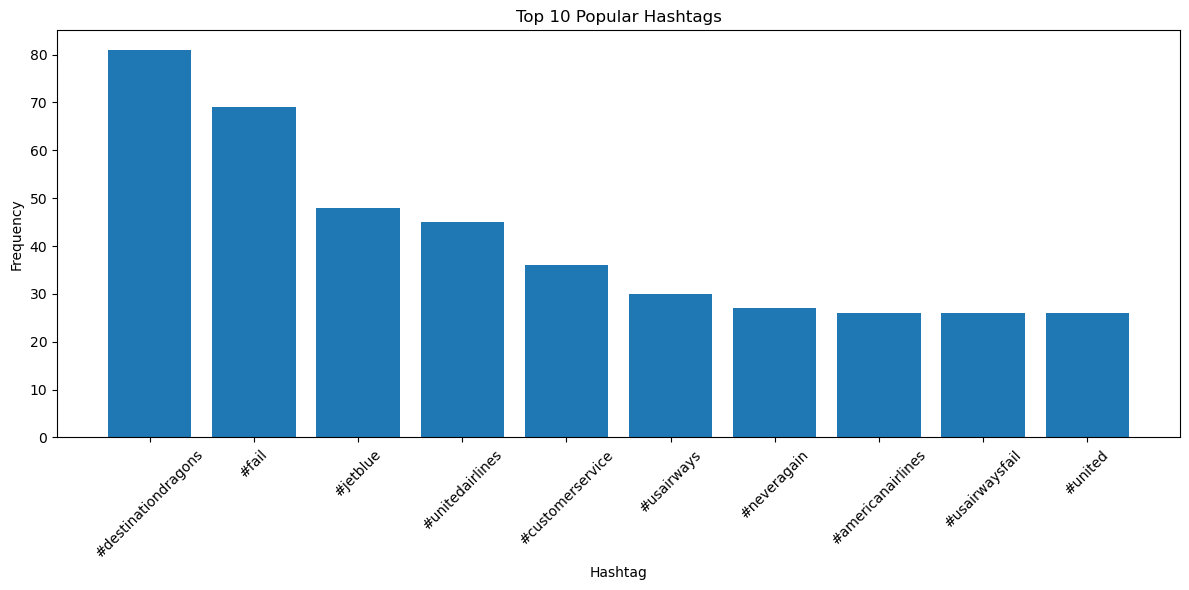

In [21]:
top_10_hashtags = popular_hashtags.head(10)

# Plot the top 10 hashtags in a histogram
plt.figure(figsize=(12, 6))
plt.bar(top_10_hashtags['Hashtag'], top_10_hashtags['Frequency'])
plt.title('Top 10 Popular Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. Mentions Analysis:

- Analyze mentions (usernames) in tweets. Identify the most mentioned users or accounts.

In [22]:
mention_pattern = r'@[\w_]+'

# Extract mentions from text and store them in a list
mentions = []
for text in df['text']:
    mentions.extend(re.findall(mention_pattern, text))

# Create a DataFrame with mention frequencies
mention_freq = pd.DataFrame(Counter(mentions).items(), columns=['Mention', 'Frequency'])

# Sort the DataFrame by frequency to identify the most mentioned users
most_mentioned_users = mention_freq.sort_values(by='Frequency', ascending=False)

# Display the top N most mentioned users (adjust N as needed)
top_n = 10
print(f'Top {top_n} Most Mentioned Users:')
print(most_mentioned_users.head(top_n))

Top 10 Most Mentioned Users:
            Mention  Frequency
23          @united       3765
107      @USAirways       2907
48     @AmericanAir       2892
13    @SouthwestAir       2409
14         @JetBlue       2197
0    @VirginAmerica        499
64          @United        129
635      @usairways         86
94           @Delta         58
162        @jetblue         46


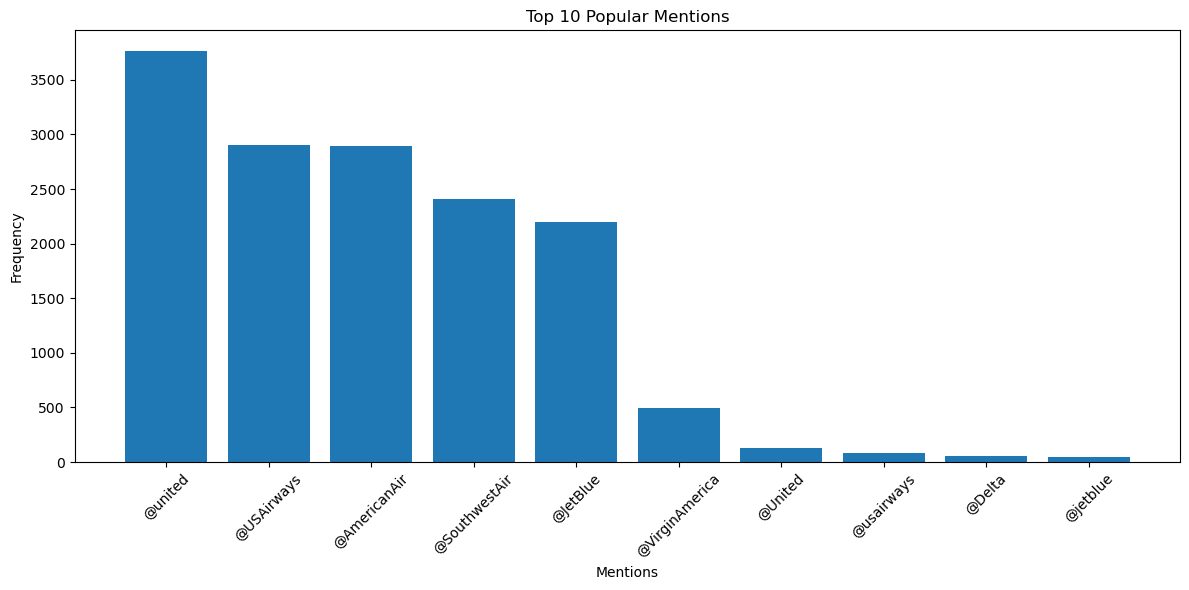

In [23]:
Top_10_mentions = most_mentioned_users.head(10)

plt.figure(figsize=(12, 6))
plt.bar(Top_10_mentions['Mention'], Top_10_mentions['Frequency'])
plt.title('Top 10 Popular Mentions')
plt.xlabel('Mentions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. Emoji Analysis:

- Analyze the usage of emojis and emoticons in text. Identify commonly used emojis and their associated sentiments or meanings.

In [25]:
# Define a regular expression pattern to match emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F700-\U0001F77F"  # Alphabetic Presentation Forms
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Arrows
                           u"\U0001F170-\U0001F251"  # Enclosed Alphanumeric Supplement
                           "]+", flags=re.UNICODE)

# Function to extract emojis from a tweet
def extract_emojis(text):
    return ''.join(emoji_pattern.findall(text))

# Apply the extraction function to the 'tweet' column
df['emojis'] = df['text'].apply(extract_emojis)

In [26]:
from collections import Counter

# Flatten the list of emojis in the DataFrame
all_emojis = [emoji for sublist in df['emojis'] for emoji in sublist]

# Calculate emoji frequencies
emoji_frequencies = Counter(all_emojis)

# Identify the top N most common emojis (adjust N as needed)
top_n = 10
most_common_emojis = emoji_frequencies.most_common(top_n)

# Display the most common emojis and their frequencies
for emoji, frequency in most_common_emojis:
    print(f"Emoji: {emoji}, Frequency: {frequency}")

Emoji: 🙏, Frequency: 125
Emoji: 😂, Frequency: 62
Emoji: 😭, Frequency: 44
Emoji: 👍, Frequency: 42
Emoji: 😡, Frequency: 33
Emoji: 😢, Frequency: 32
Emoji: 😊, Frequency: 31
Emoji: 👏, Frequency: 28
Emoji: 😉, Frequency: 20
Emoji: 😩, Frequency: 18


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# most common emojis
emoji_data = {
    'Emoji': [' 🙏',  ' 😂', ' 😭', '👍', ' 😡', ' 😢', ' 😊', ' 👏', ' 😉', ' 😩'],
    'Frequency': [125, 62, 44, 42, 33, 32, 31, 28, 20, 18]
}

# Create DataFrame
emoji_df = pd.DataFrame(emoji_data)

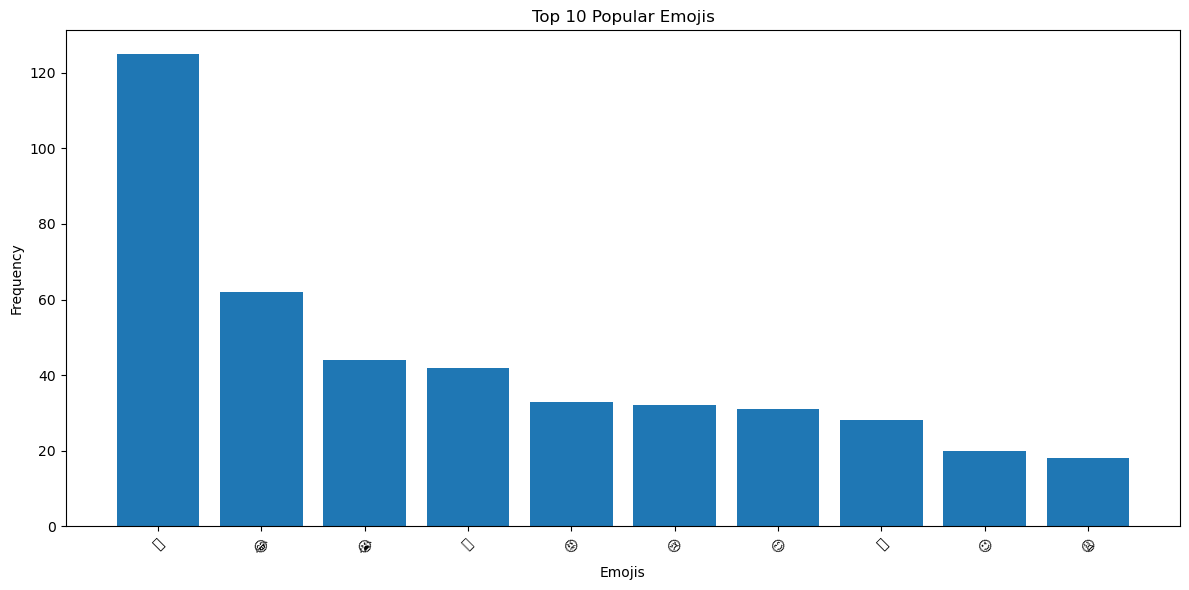

In [36]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(emoji_df['Emoji'], emoji_df['Frequency'])
plt.title('Top 10 Popular Emojis')
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5. Language Analysis:

- Determine the languages used in the text and analyze language distribution.

In [38]:
pip install langdetect


     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     - -------------------------------------- 30.7/981.5 kB ? eta -:--:--
     --- --------------------------------- 92.2/981.5 kB 871.5 kB/s eta 0:00:02
     ---- ------------------------------- 122.9/981.5 kB 798.9 kB/s eta 0:00:02
     ------- ------------------------------ 204.8/981.5 kB 1.0 MB/s eta 0:00:01
     --------- ---------------------------- 256.0/981.5 kB 1.1 MB/s eta 0:00:01
     ----------- -------------------------- 307.2/981.5 kB 1.2 MB/s eta 0:00:01
     -------------- ----------------------- 368.6/981.5 kB 1.1 MB/s eta 0:00:01
     ----------------- -------------------- 440.3/981.5 kB 1.2 MB/s eta 0:00:01
     ------------------- ------------------ 501.8/981.5 kB 1.2 MB/s eta 0:00:01
     ---------------------- --------------- 583.7/981.5 kB 1.3 MB/s eta 0:00:01
     ------------------------ ------------- 645.1/981.5 kB 1.3 MB/s eta 0:00:01
     --------------------------- ---------- 706.6/981

In [39]:
import langdetect
print("langdetect module installed successfully.")

langdetect module installed successfully.


In [40]:
from langdetect import detect
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'text' column
# Create a function to detect language with error handling
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'  # You can use any default value you prefer

# Apply the language detection function to the 'tweet' column
df['text_language'] = df['text'].apply(lambda x: detect_language(x) if not pd.isnull(x) else 'unknown')

In [41]:
lang_df = pd.DataFrame(df['text_language'].value_counts().head(10).reset_index())
lang_df.columns = ['language','count']
lang_df

language  count
0       en  14409
1       fr     72
2       af     30
3       da     27
4       it     12
5       so      7
6       nl      6
7       cy      6
8       ro      6
9       id      5

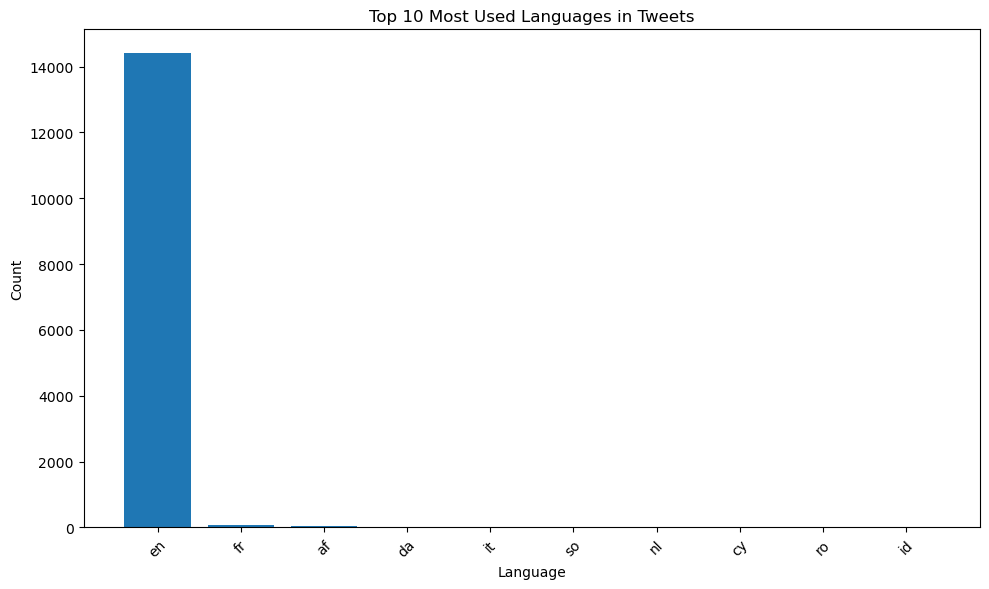

In [42]:
# Create a bar plot for the top 10 most used languages
plt.figure(figsize=(10, 6))
plt.bar(lang_df['language'], lang_df['count'])
plt.title('Top 10 Most Used Languages in Tweets')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6. Cleaning Tweets :

In [43]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)   # Remove Special Characters and Punctuation
    text = text.lower()                          # Lowercasing
    text = re.sub(r'@\w+|#\w+', '', text)        # Remove Mentions and Hashtags
    text = re.sub(r'\d+', '', text)              # Remove Numbers
    text = ' '.join(text.split())                # Remove Extra Whitespace
    text = re.sub(r'RT[\s]+','',text)            # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text)     # Remove hyperlinks
    return text

In [44]:
df['clean_text'] = df['text'].apply(clean_text)
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635   

#### 7. Word Frequency Analysis :
 - Analyze word associations and co-occurrences to identify common phrases or terms frequently mentioned together in text.

In [47]:
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for tweet in df['clean_text'] if pd.notnull(tweet) for word in tweet.split() if word.lower() not in stop_words]

# Calculate word frequencies
word_freq = Counter(words)

# Get the top N most common words (adjust N as needed)
top_n = 10
most_common_words = word_freq.most_common(top_n)


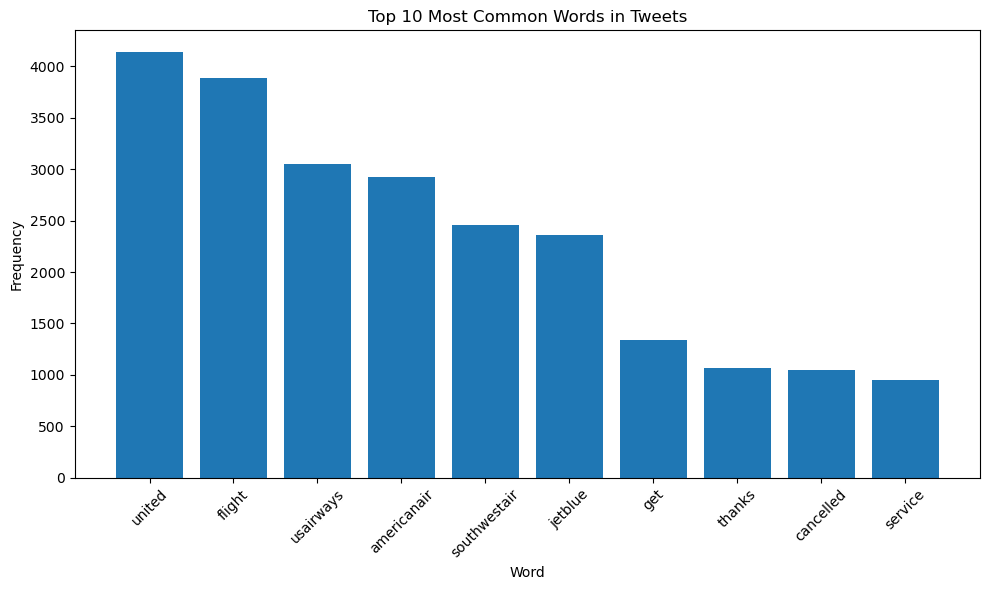

In [50]:
# Extract words and frequencies
top_words, frequencies = zip(*most_common_words)

# Create a bar plot for the top N most common words
plt.figure(figsize=(10, 6))
plt.bar(top_words, frequencies)
plt.title(f'Top {top_n} Most Common Words in Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### i) Applying Tokenization -

In [54]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

In [55]:

def tokenize_text(text):
    return word_tokenize(text)

In [56]:
df['tokens'] = df['clean_text'].apply(tokenize_text)

#### ii) Removing Stopwords -

In [57]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

In [58]:
df['tokens'] = df['tokens'].apply(remove_stopwords)
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635   

In [60]:
tokens = df['clean_text'].apply(tokenize_text)

In [61]:
tokens = tokens.apply(remove_stopwords)

#### iii) Applying Lemmatization -

In [63]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk

In [64]:
lemmatizer = WordNetLemmatizer()

In [65]:
lemmatized_tweets = [[lemmatizer.lemmatize(token) for token in tokens] for tokens in tokens]

#### 8. Word Cloud Analysis :

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'lemmatized_data' is your 2D array of lemmatized words
flattened_data = [word for sublist in lemmatized_tweets for word in sublist]

# Join the words into a single string
text = ' '.join(flattened_data)


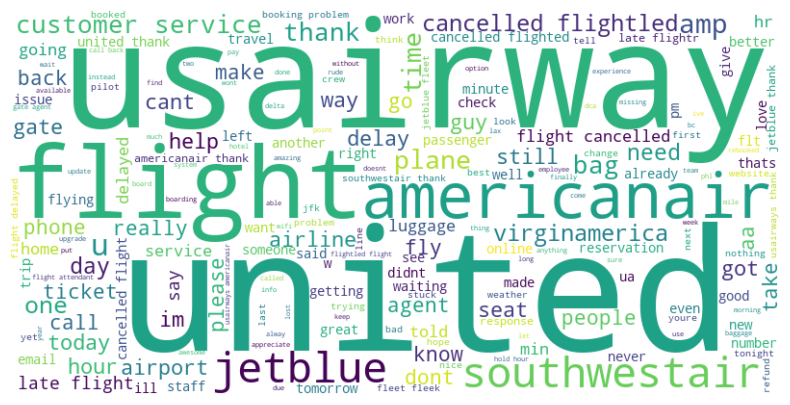

In [67]:
# Create a WordCloud object with optional parameters for customization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


#### 9. Sentiment Analysis :

- Perform sentiment analysis to classify text as positive, negative, or neutral. Visualize the distribution of sentiment across the dataset.

In [69]:
from textblob import TextBlob

In [72]:
# Define the functions to get subjectivity and polarity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the functions to the 'clean_text' column
df['Subjectivity'] = df['clean_text'].apply(get_subjectivity)
df['Polarity'] = df['clean_text'].apply(get_polarity)

In [73]:
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count  ...              tweet_created tweet_location  \
0                  0  ...  2015-02-24 11:35:52 -0800            NaN   
1                  0  ...  2015-02-24 11:15:59 -0800            NaN   
2                  0  ...  2015-02-24 11:15:48 -0800      Lets Play   
3                  0  ...  2015-02-24 11:15:36 -0800            NaN   
4                  0  ...  2015-02-24 11:14:45 -0800            NaN   
...              ...  ...                        ...            ...   
14635              0  ...  2015-02-22 12:01:01 -0800            NaN   
14636              0  ...  2015-02-22 11:59:46 -0800          Texas   
14637              0  ...  2015-02-22 11:59:15 -0800  Nigeria,lagos   
14638              0  ...  2015-02-22 11:59:02 -0800     New Jersey   
14639              0  ...  2015-02-22 11:58:51 -0800     dallas, TX   

                    user_timezone text_length emojis  text_language  \
0      Eastern Time (US & Canada)          35                    en   
1      Pacific Time (US & Canada)          72                    en   
2      Central Time (US & Canada)          71                    en   
3      Pacific Time (US & Canada)         126                    en   
4      Pacific Time (US & Canada)          55                    en   
...                           ...         ...    ...            ...   


In [74]:
def getAnalysis(score):
    if score < 0 :
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [75]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count  ... tweet_location               user_timezone  \
0                  0  ...            NaN  Eastern Time (US & Canada)   
1                  0  ...            NaN  Pacific Time (US & Canada)   
2                  0  ...      Lets Play  Central Time (US & Canada)   
3                  0  ...            NaN  Pacific Time (US & Canada)   
4                  0  ...            NaN  Pacific Time (US & Canada)   
...              ...  ...            ...                         ...   
14635              0  ...            NaN                         NaN   
14636              0  ...          Texas                         NaN   
14637              0  ...  Nigeria,lagos                         NaN   
14638              0  ...     New Jersey  Eastern Time (US & Canada)   
14639              0  ...     dallas, TX                         NaN   

      text_length emojis text_language  \
0              35                   en   
1              72                   en   
2              71                   en   
3             126                   en   
4              55                   en   
...           ...    ...           ...   
14635          63                   en   
14636         150                   en   
14637          60                   en   
14638         135                   en   
14639         138      

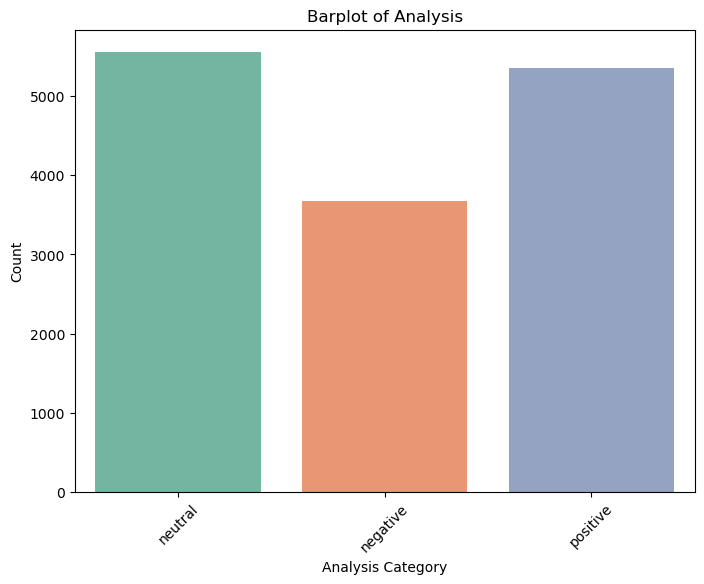

In [76]:
# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Analysis', palette='Set2')

# Customize the plot
plt.title("Barplot of Analysis")
plt.xlabel("Analysis Category")
plt.ylabel("Count")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


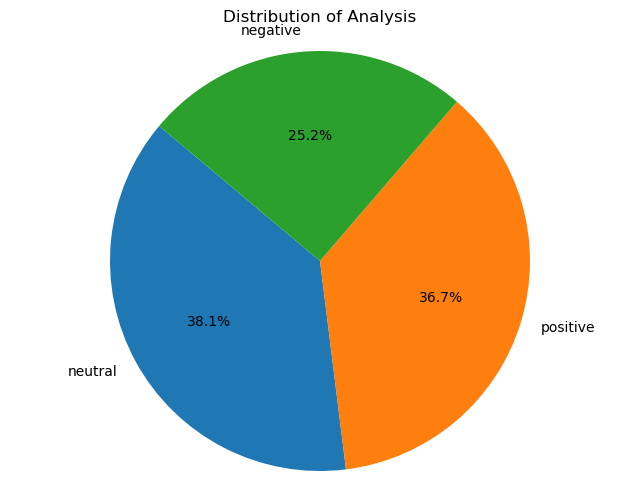

In [77]:
plt.figure(figsize=(8, 6))
plt.pie(df['Analysis'].value_counts(), labels=df['Analysis'].value_counts().index, autopct='%1.1f%%', startangle=140)

# Customize the plot
plt.title("Distribution of Analysis")

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

#### 10. Topic Modeling:

 - Apply topic modeling techniques like Latent Dirichlet Allocation (LDA) to uncover underlying topics within the tweets. Visualize topic distributions and explore the content of tweets within each topic

In [82]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
import nltk
from gensim.models import LdaModel


In [83]:
dictionary = corpora.Dictionary(lemmatized_tweets)
corpus = [dictionary.doc2bow(text) for text in lemmatized_tweets]

In [84]:
subsample_corpus = corpus[:1000]  # Use a smaller subset of the corpus for initial experiments
lda_model = LdaModel(subsample_corpus, num_topics=5, id2word=dictionary, passes=15)

In [85]:
for topic in lda_model.print_topics():
    print(topic)

(0, '0.013*"virginamerica" + 0.003*"love" + 0.003*"virgin" + 0.003*"guy" + 0.002*"use" + 0.002*"amp" + 0.002*"youre" + 0.002*"dallas" + 0.001*"cant" + 0.001*"free"')
(1, '0.027*"virginamerica" + 0.003*"flying" + 0.003*"see" + 0.003*"thank" + 0.002*"way" + 0.002*"virgin" + 0.002*"new" + 0.002*"austin" + 0.002*"fly" + 0.002*"vx"')
(2, '0.052*"united" + 0.031*"virginamerica" + 0.026*"flight" + 0.006*"bag" + 0.006*"get" + 0.006*"im" + 0.005*"help" + 0.005*"thanks" + 0.005*"need" + 0.005*"customer"')
(3, '0.010*"virginamerica" + 0.004*"carrieunderwood" + 0.004*"ladygaga" + 0.002*"city" + 0.002*"may" + 0.002*"deal" + 0.002*"look" + 0.001*"cool" + 0.001*"lot" + 0.001*"oneway"')
(4, '0.013*"virginamerica" + 0.007*"united" + 0.006*"seat" + 0.003*"flight" + 0.002*"email" + 0.002*"good" + 0.002*"oscar" + 0.002*"fly" + 0.001*"new" + 0.001*"frustrated"')


In [87]:
import matplotlib.pyplot as plt

topic_distribution = [lda_model[doc] for doc in corpus]

# Extract the dominant topic for each tweet
dominant_topics = [max(topics, key=lambda x: x[1])[0] for topics in topic_distribution]

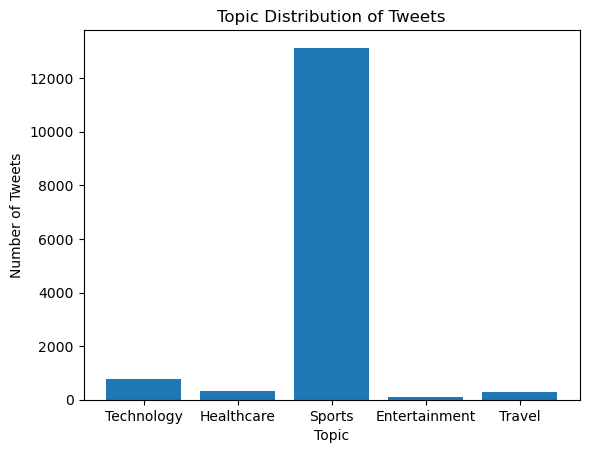

In [88]:
num_topics = 5

# Count the number of tweets in each topic
topic_counts = dict((i, dominant_topics.count(i)) for i in range(num_topics))
topic_labels = ["Technology", "Healthcare", "Sports", "Entertainment", "Travel"]

# Create a bar plot
plt.bar(topic_labels, topic_counts.values())
plt.xlabel('Topic')
plt.ylabel('Number of Tweets')
plt.title('Topic Distribution of Tweets')
plt.show()

#### 11. Part-of-speech (POS) tagging :

- It involves assigning a specific part-of-speech (such as noun, verb, adjective, adverb, pronoun, etc.) to each word in a text corpus, based on its grammatical role and its context within a sentence.

In [91]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt

In [93]:
# Ensure you have downloaded the required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [94]:
df['pos_tags'] = df['clean_text'].apply(lambda tweet: nltk.pos_tag(nltk.word_tokenize(tweet)))

In [95]:
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count  ...               user_timezone text_length emojis  \
0                  0  ...  Eastern Time (US & Canada)          35          
1                  0  ...  Pacific Time (US & Canada)          72          
2                  0  ...  Central Time (US & Canada)          71          
3                  0  ...  Pacific Time (US & Canada)         126          
4                  0  ...  Pacific Time (US & Canada)          55          
...              ...  ...                         ...         ...    ...   
14635              0  ...                         NaN          63          
14636              0  ...                         NaN         150          
14637              0  ...                         NaN          60          
14638              0  ...  Eastern Time (US & Canada)         135          
14639              0  ...                         NaN         138          

      text_language                                         clean_text  \
0                en                   virginamerica what dhepburn said   
1                en  virginamerica plus youve added commercials to ...   
2                en  virginamerica i didnt today must mean i need t...   
3                en  virginamerica its really aggressive to blast o...   
4                en  virginamerica and its a really big bad thing a

#### 12. Reason wise Analyis :

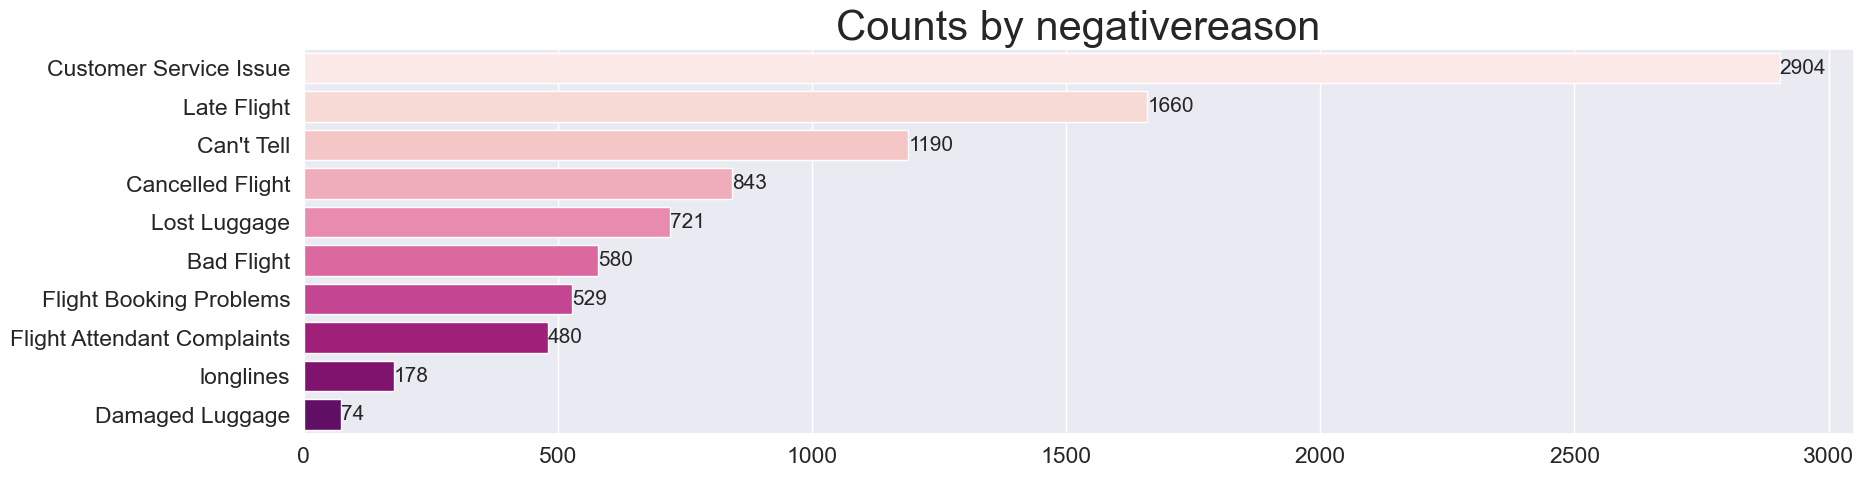

In [97]:
plt.figure(figsize=(20,5))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df,x=df["negativereason"].value_counts().values,y=df["negativereason"].value_counts().index,palette="RdPu")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Counts by negativereason",fontsize = 30)
plt.show()

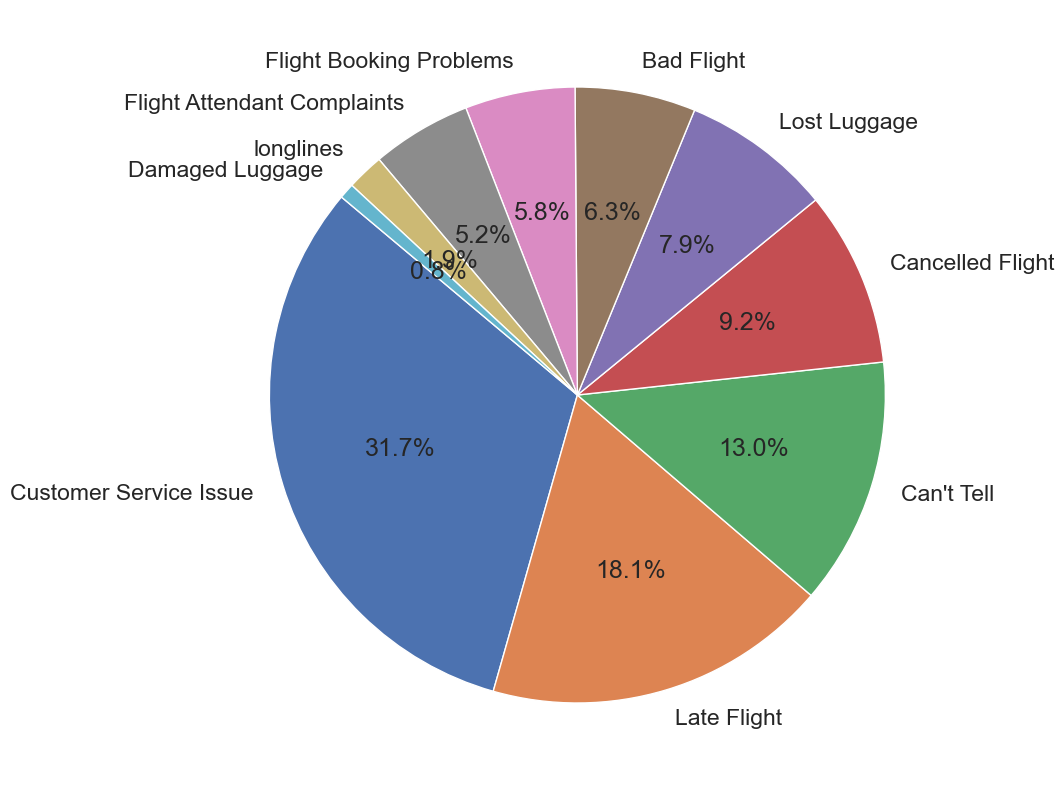

In [110]:
plt.figure(figsize = (20,10))
plt.pie(df['negativereason'].value_counts(), labels=df['negativereason'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.show()

#### 13.  Airline sentiment wise Analyis :

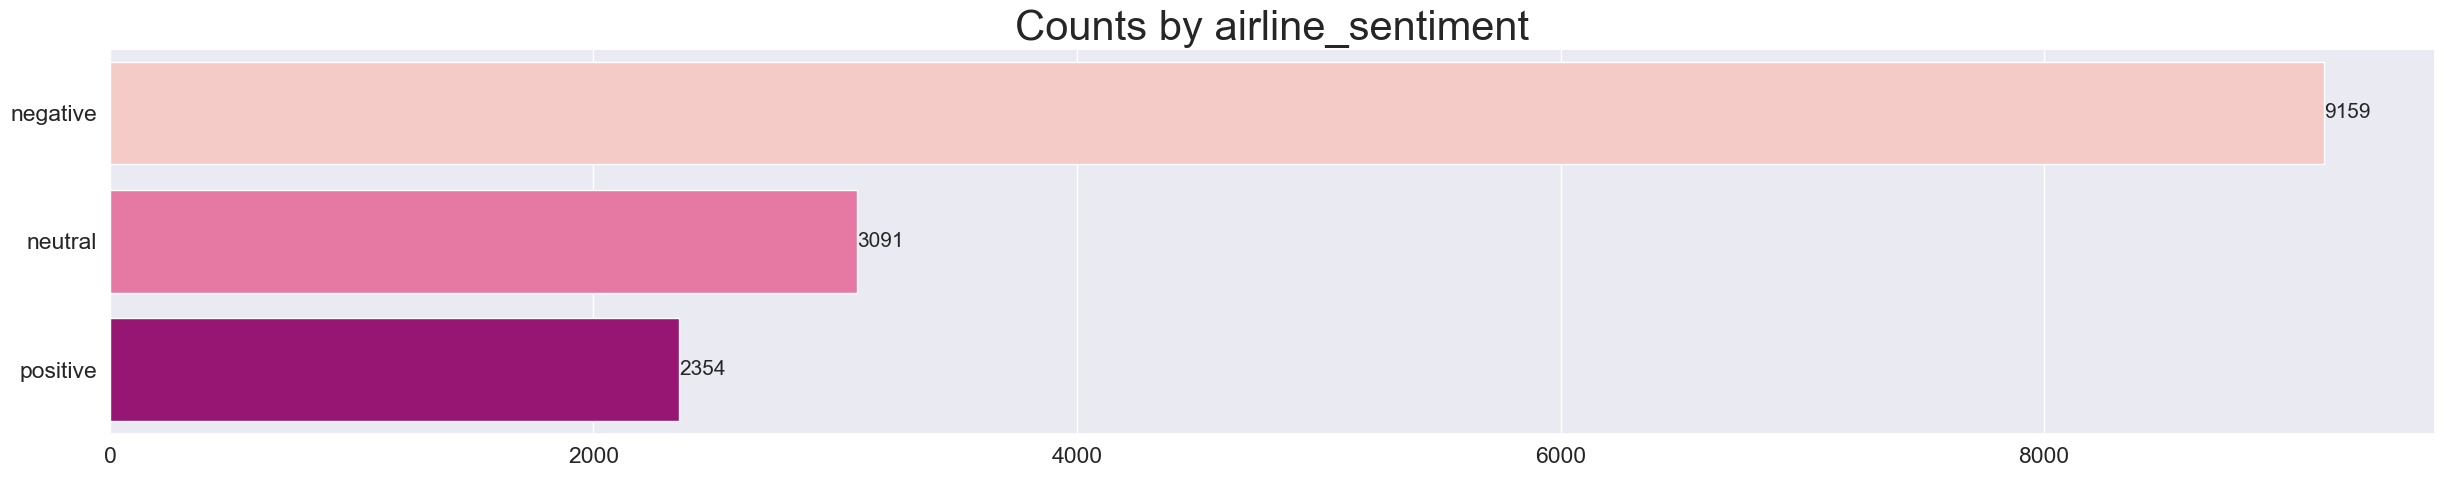

In [109]:
plt.figure(figsize=(30,5))
sns.set(font_scale=1.5)
ax = sns.barplot(data=df,x=df["airline_sentiment"].value_counts().values,y=df["airline_sentiment"].value_counts().index,palette="RdPu")
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Counts by airline_sentiment",fontsize = 30)
plt.show()

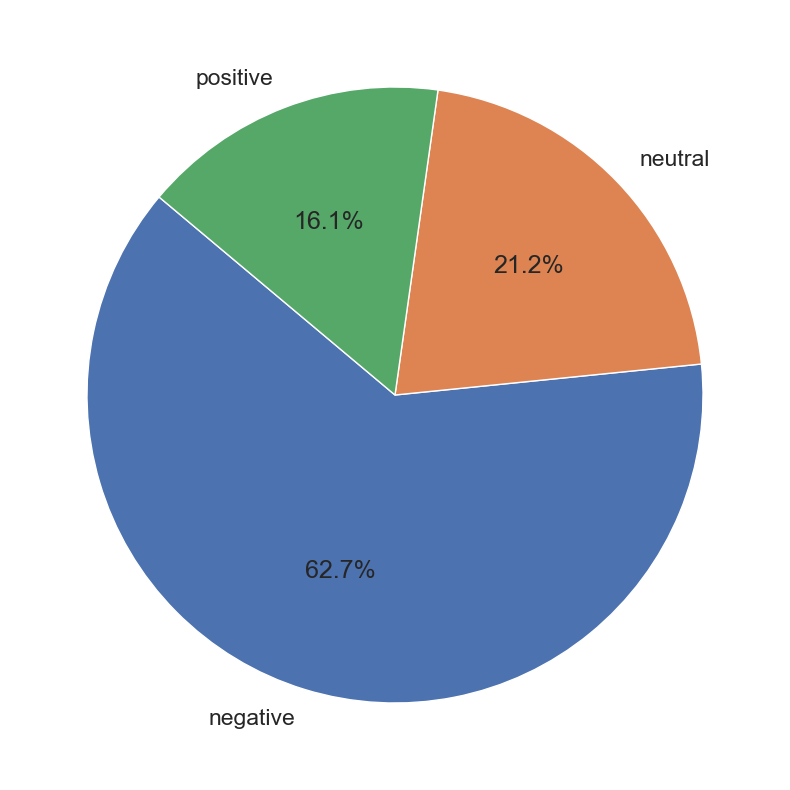

In [111]:
plt.figure(figsize = (20,10))
plt.pie(df['airline_sentiment'].value_counts(), labels=df['airline_sentiment'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.show()

In [112]:
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count  ...               user_timezone text_length emojis  \
0                  0  ...  Eastern Time (US & Canada)          35          
1                  0  ...  Pacific Time (US & Canada)          72          
2                  0  ...  Central Time (US & Canada)          71          
3                  0  ...  Pacific Time (US & Canada)         126          
4                  0  ...  Pacific Time (US & Canada)          55          
...              ...  ...                         ...         ...    ...   
14635              0  ...                         NaN          63          
14636              0  ...                         NaN         150          
14637              0  ...                         NaN          60          
14638              0  ...  Eastern Time (US & Canada)         135          
14639              0  ...                         NaN         138          

      text_language                                         clean_text  \
0                en                   virginamerica what dhepburn said   
1                en  virginamerica plus youve added commercials to ...   
2                en  virginamerica i didnt today must mean i need t...   
3                en  virginamerica its really aggressive to blast o...   
4                en  virginamerica and its a really big bad thing a

### 2. Model Building -

#### 1. Support Vector Machine :

In [113]:
X = df['clean_text']  
y = df['airline_sentiment'] 

In [115]:
from sklearn.model_selection import train_test_split

# Now you can use train_test_split without any error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [116]:
# Tokenize the text data into a list of words for each tweet
X_train_tokenized = X_train.apply(lambda x: word_tokenize(x.lower()))
X_test_tokenized = X_test.apply(lambda x: word_tokenize(x.lower()))

In [117]:
X_train_tokenized = X_train_tokenized.apply(remove_stopwords)
X_test_tokenized = X_test_tokenized.apply(remove_stopwords)

In [118]:
X_test_tokenized

169      [virginamerica, jump, dallasaustin, market, da...
2054     [united, nice, wonder, pick, respond, maybe, h...
10437    [usairways, bf, stuck, clt, day, lounge, offer...
9457     [usairways, horrible, service, wrong, plane, a...
14512    [americanair, neglected, mention, fee, per, ti...
                               ...                        
12267    [americanair, yes, rno, departure, wconnection...
2781     [united, also, doesnt, help, im, frequent, fli...
11030                    [usairways, already, four, times]
9527     [usairways, dm, take, offline, would, love, in...
5438     [southwestair, flight, sunday, nd, columbus, d...
Name: clean_text, Length: 4382, dtype: object

In [119]:
# Define a function to perform lemmatization on a list of words
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [120]:
X_train_lemmatized = X_train_tokenized.apply(lemmatize_words)
X_test_lemmatized = X_test_tokenized.apply(lemmatize_words)

In [122]:
from gensim.models import Word2Vec

# Now you can use Word2Vec without any error
w2v_model = Word2Vec(X_train_lemmatized, vector_size=100, window=5, min_count=1, sg=0)


In [123]:
w2v_model.save("w2v_lem.model")


In [124]:
w2v_model.epochs

5

In [125]:
5

5

In [126]:
w2v_model.wv.most_similar("good")

[('use', 0.9997824430465698),
 ('see', 0.9997748136520386),
 ('right', 0.9997733235359192),
 ('virginamerica', 0.9997718334197998),
 ('work', 0.9997479915618896),
 ('pay', 0.9997443556785583),
 ('travel', 0.9997332692146301),
 ('ill', 0.9997211694717407),
 ('mile', 0.9997150301933289),
 ('id', 0.9997088313102722)]

In [127]:
# Transform the tweets into average Word2Vec vectors
def average_word_vectors(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            feature_vector = np.add(feature_vector, model.wv[word])
            n_words += 1
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

In [128]:
X_train_w2v = [average_word_vectors(tokens, w2v_model, 100) for tokens in X_train_lemmatized]
X_test_w2v = [average_word_vectors(tokens, w2v_model, 100) for tokens in X_test_lemmatized]

In [130]:
from sklearn.preprocessing import LabelEncoder

# Now you can use LabelEncoder without any error
label_encoder = LabelEncoder()


In [131]:
# Encode the class labels in your training and testing data
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [133]:
from sklearn.svm import SVC

# Now you can use SVC without any error
svm_classifier = SVC(kernel='linear', random_state=42)


In [134]:
# Train the classifier on the Word2Vec transformed training data
svm_classifier.fit(X_train_w2v, y_train_encoded)

SVC(kernel='linear', random_state=42)

In [135]:
SVC(kernel='linear', random_state=42)


SVC(kernel='linear', random_state=42)

In [136]:
y_pred = svm_classifier.predict(X_test_w2v)

#### Evaluate the model -

In [138]:
from sklearn.metrics import accuracy_score, classification_report


# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.6629392971246006
Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      2796
           1       0.70      0.05      0.09       885
           2       0.86      0.11      0.20       701

    accuracy                           0.66      4382
   macro avg       0.74      0.38      0.36      4382
weighted avg       0.70      0.66      0.56      4382



- Accuracy : The overall accuracy of the model is approximately 66.3%, meaning that it correctly predicted the class of 66.3% of the samples in the test set.



- Precision :

For class 0, the precision is 0.66, indicating that 66% of the samples predicted as class 0 were actually class 0.

For class 1, the precision is 0.70, meaning that 70% of the samples predicted as class 1 were actually class 1.

For class 2, the precision is 0.86, indicating that 86% of the samples predicted as class 2 were actually class 2.


- Recall (Sensitivity) :

For class 0, the recall is 1.00, meaning that the model correctly identified all samples that were actually class 0.

For class 1, the recall is 0.05, indicating that the model identified only 5% of the samples that were actually class 1.

For class 2, the recall is 0.11, indicating that the model identified only 11% of the samples that were actually class 2.

- F1-score : The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The weighted average F1-score for this model is 0.56.



- Support : The support is the number of occurrences of each class in the test set. It can be used to interpret the significance of the results for each class.







### Trying Cross Validation

In [139]:
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count  ...               user_timezone text_length emojis  \
0                  0  ...  Eastern Time (US & Canada)          35          
1                  0  ...  Pacific Time (US & Canada)          72          
2                  0  ...  Central Time (US & Canada)          71          
3                  0  ...  Pacific Time (US & Canada)         126          
4                  0  ...  Pacific Time (US & Canada)          55          
...              ...  ...                         ...         ...    ...   
14635              0  ...                         NaN          63          
14636              0  ...                         NaN         150          
14637              0  ...                         NaN          60          
14638              0  ...  Eastern Time (US & Canada)         135          
14639              0  ...                         NaN         138          

      text_language                                         clean_text  \
0                en                   virginamerica what dhepburn said   
1                en  virginamerica plus youve added commercials to ...   
2                en  virginamerica i didnt today must mean i need t...   
3                en  virginamerica its really aggressive to blast o...   
4                en  virginamerica and its a really big bad thing a

In [141]:
X = df['clean_text']  
y = df['airline_sentiment'] 

In [142]:
# Tokenize the text data into a list of words for each tweet
X = X.apply(lambda x: word_tokenize(x.lower()))

In [143]:
X = X.apply(remove_stopwords)

In [144]:
# Train Word2Vec embeddings on the training data
w2v_model1 = Word2Vec(X, vector_size=100, window=5, min_count=1, sg=0)

In [145]:
w2v_model1.save("w2vforXdata.model")


In [146]:
# Transform the tweets into average Word2Vec vectors
def average_word_vectors(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            feature_vector = np.add(feature_vector, model.wv[word])
            n_words += 1
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

In [147]:
X_w2v_data = [average_word_vectors(tokens, w2v_model1, 100) for tokens in X]


In [148]:
label_encoder = LabelEncoder()


In [149]:
# Encode the class labels in your training and testing data
y = label_encoder.fit_transform(y)

In [150]:
# Initialize the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [152]:
# Split the data into a training set and a testing set with stratified sampling (50% subset)
X_train, _, y_train, _ = train_test_split(X_w2v_data, y, test_size=0.5, stratify=y, random_state=42)


In [154]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm 

In [155]:

# Perform cross-validation (5-fold cross-validation in this example)
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores on 50% Subset:", cross_val_scores)
print("Mean Accuracy on 50% Subset:", cross_val_scores.mean())

Cross-Validation Scores on 50% Subset: [0.65160849 0.65160849 0.65136986 0.65       0.66164384]
Mean Accuracy on 50% Subset: 0.6532461346610035


### 3. Decision Tree -

In [157]:
# Import the DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [158]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [159]:
# Train the classifier on the Word2Vec transformed training data
dt_classifier.fit(X_train_w2v, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [160]:
# Make predictions on the Word2Vec transformed testing data
y_pred = dt_classifier.predict(X_test_w2v)

In [161]:
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5787311729803742
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      2796
           1       0.31      0.33      0.32       885
           2       0.33      0.37      0.35       701

    accuracy                           0.58      4382
   macro avg       0.46      0.47      0.47      4382
weighted avg       0.59      0.58      0.58      4382




- Accuracy : 0.5787311729803742

This means that the model correctly classified approximately 57.87% of the instances. While accuracy gives a general idea of the performance, it might not be sufficient if the dataset is imbalanced.




### 4. Random Forest -

In [163]:
# Import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)


In [164]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [165]:
# Train the classifier on the Word2Vec transformed training data
rf_classifier.fit(X_train_w2v, y_train_encoded)

RandomForestClassifier(random_state=42)

In [166]:
RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42)

In [167]:
# Make predictions on the Word2Vec transformed testing data
y_pred = rf_classifier.predict(X_test_w2v)


In [168]:
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.6964856230031949
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      2796
           1       0.51      0.25      0.33       885
           2       0.58      0.33      0.42       701

    accuracy                           0.70      4382
   macro avg       0.61      0.50      0.52      4382
weighted avg       0.66      0.70      0.66      4382



- Accuracy : 0.6964856230031949

This means that the model correctly classified approximately 69.65% of the instances. This is a significant improvement compared to the previous model with an accuracy of 57.87%.

### 5. Gradient Boosting - XGBoost -

In [174]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [175]:
# Import xgboost as xgb
import xgboost as xgb

# Initialize the XGBClassifier
xgb_classifier = xgb.XGBClassifier(random_state=42)


In [176]:
# Train the classifier on the Word2Vec transformed training data
xgb_classifier.fit(X_train_w2v, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [177]:
# Make predictions on the Word2Vec transformed testing data
y_pred = xgb_classifier.predict(X_test_w2v)

In [178]:
# Encode the class labels in your testing data (y_test)
y_test_encoded = label_encoder.transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.693518941122775
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      2796
           1       0.46      0.29      0.36       885
           2       0.59      0.38      0.46       701

    accuracy                           0.69      4382
   macro avg       0.60      0.52      0.55      4382
weighted avg       0.66      0.69      0.67      4382



- Accuracy : 0.693518941122775

This means that the model correctly classified approximately 69.35% of the instances. This is comparable to the performance of the Random Forest classifier, which had an accuracy of approximately 69.65%.

In [179]:
data = [
    {'Sr. No': 1, 'Model': 'Support Vector Machine', 'Accuracy': " 66.3%"},
    {'Sr. No': 2, 'Model': 'Decision Tree', 'Accuracy': "57.87%"},
    {'Sr. No': 3, 'Model': 'Random Forest', 'Accuracy': "69.65%"},
    {'Sr. No': 4, 'Model': 'Gradient Boosting - XGBoost', 'Accuracy': "69.35%"}
    # Add more rows as needed
]

In [180]:
Model_Accuracy_Table = pd.DataFrame(data)
Model_Accuracy_Table.set_index("Sr. No")

Model Accuracy
Sr. No                                      
1            Support Vector Machine    66.3%
2                     Decision Tree   57.87%
3                     Random Forest   69.65%
4       Gradient Boosting - XGBoost   69.35%

In [181]:
import joblib

# Your trained machine learning model
model = svm_classifier  # Replace with your actual model

# Save the model to a file
joblib.dump(model, 'SVM.joblib')

['SVM.joblib']

In [183]:
import streamlit as st
import joblib  

In [ ]:
# Load the pre-trained model
model = joblib.load('your_model.joblib')  # Replace with your model's filename

# Now, you can use the loaded model for predictions